In [73]:
import pegasus as pg


ModuleNotFoundError: No module named 'pegasus'

In [1]:
import gseapy as gp

In [2]:
import numpy as np
import pandas as pd
import wot

import matplotlib
import tkinter
matplotlib.use('TkAgg')

from matplotlib import pyplot as plt

In [3]:
!pip show wot 

Name: wot
Version: 1.0.8.post2
Summary: Optimal transport for time-course single cell data
Home-page: https://github.com/broadinstitute/wot
Author: WOT Team
Author-email: wot@broadinstitute.org
License: BSD license
Location: /Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages
Requires: anndata, h5py, matplotlib, numpy, pandas, POT, scikit-learn, scipy
Required-by: 


In [4]:
import ipywidgets as widgets


In [5]:
import pegasusio as io

ModuleNotFoundError: No module named 'pegasusio'

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
VAR_DS_PATH = 'Desktop/EMT_Optimal_Transport/PNAS_Expression_Matrix.txt'
CELL_DAYS_PATH = 'Desktop/EMT_Optimal_Transport/PNAS_Cells_Days.txt'

In [7]:
days_df = pd.read_csv(CELL_DAYS_PATH, index_col='id', sep='\t')


In [11]:
cell_matrix = pd.read_csv(VAR_DS_PATH, index_col='id', sep='\t')

In [893]:
import pandas as pd

# Assuming days_df_reset is already defined and has columns 'day' and 'id'

# Count the unique 'id' in each 'day'
count_df = days_df_reset.groupby('day')['id'].nunique()

# Convert the Series to a DataFrame for easier manipulation
count_df = count_df.reset_index()
count_df.columns = ['Day', 'Cell Count']

# Print the original count DataFrame as Table A
print("Table A: Cell Count per Day")
print(count_df.to_string(index=False))

# Calculate sums of adjacent days
adjacent_sum_df = count_df.set_index('Day')['Cell Count'].rolling(window=2).sum().dropna().reset_index()
adjacent_sum_df.columns = ['Day Range', 'Sum of Cells']

# Adjust Day Range to show the range of days summed
adjacent_sum_df['Day Range'] = adjacent_sum_df['Day Range'].astype(int).astype(str) + " & " + (adjacent_sum_df['Day Range'].astype(int) - 1).astype(str)

# Print the sums of adjacent days as Table B
print("\nTable B: Sum of Cell Counts for Adjacent Days")
print(adjacent_sum_df.to_string(index=False))


Table A: Cell Count per Day
 Day  Cell Count
   0        2734
   1        2303
   2        2381
   3        2132
   4        1147
   8        1891

Table B: Sum of Cell Counts for Adjacent Days
Day Range  Sum of Cells
    1 & 0        5037.0
    2 & 1        4684.0
    3 & 2        4513.0
    4 & 3        3279.0
    8 & 7        3038.0


In [53]:
# Read a structured log file into a Pandas DataFrame
df_count = pd.read_csv('Desktop/EMT_Optimal_Transport/cluster_assignment.log', sep='\t', header=None)
# Group by the second column and count the number of rows in each group
# Access the name of the second column by its index
second_column_name = df_count.columns[1]

# Group by the second column and count the number of rows in each group
group_counts = df_count.groupby(second_column_name).size()

print(group_counts)

1
1    589
2    549
3    721
4     32
dtype: int64


0  1
0     MCF10A_t4_AAACCTGGTTGTCTTT  2
1     MCF10A_t4_AAACGGGCATACGCTA  2
2     MCF10A_t4_AAAGATGTCCGAAGAG  3
3     MCF10A_t4_AAAGCAACATCCGCGA  3
4     MCF10A_t4_AAAGCAAGTTAGGGTG  1
...                          ... ..
1886  MCF10A_t8_CGCCAAGCAGCTGGCT  3
1887  MCF10A_t8_CGCCAAGTCATCTGTT  1
1888  MCF10A_t8_CGCGGTACAATCTACG  1
1889  MCF10A_t8_CGCGGTATCACATAGC  2
1890  MCF10A_t8_CGCGGTATCACCGGGT  2

[1891 rows x 2 columns]

In [11]:
df_count

0  1
0     MCF10A_t4_AAACCTGGTTGTCTTT  2
1     MCF10A_t4_AAACGGGCATACGCTA  2
2     MCF10A_t4_AAAGATGTCCGAAGAG  3
3     MCF10A_t4_AAAGCAACATCCGCGA  3
4     MCF10A_t4_AAAGCAAGTTAGGGTG  1
...                          ... ..
1886  MCF10A_t8_CGCCAAGCAGCTGGCT  3
1887  MCF10A_t8_CGCCAAGTCATCTGTT  1
1888  MCF10A_t8_CGCGGTACAATCTACG  1
1889  MCF10A_t8_CGCGGTATCACATAGC  2
1890  MCF10A_t8_CGCGGTATCACCGGGT  2

[1891 rows x 2 columns]

In [9]:
# Path to your file
file_path = 'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.txt'

# Initialize a counter
gene_count = 0

# Open the file and read the lines
with open(file_path, 'r') as file:
    for line in file:
        # Assuming each gene is on a new line
        # and ignoring empty lines
        if line.strip():
            gene_count += 1

print(f"There are {gene_count} genes in the file.")


There are 480 genes in the file.


# compute force layout embedding coordinates

In [532]:

adata_var = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df])


In [93]:
import scanpy as sc

# Assume 'adata' is your AnnData object
# adata = sc.read_your_data_here()

# Filter for a specific day, let's say day '1'
adata_filtered_day8 = adata_var[adata_var.obs['day'] == 8]

# Now, adata_filtered contains only the data for day '1'


In [94]:
adata_filtered_day8

View of AnnData object with n_obs × n_vars = 1891 × 15000
    obs: 'day'

In [50]:
 mmdata_day8 = io.MultimodalData(adata_filtered_day8)

In [51]:
pg.pca(mmdata_day8, features=None)

2023-09-02 19:23:12,998 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 1.30s.


In [52]:
pg.neighbors(mmdata_day8)

2023-09-02 19:23:26,520 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.20s.
2023-09-02 19:23:26,563 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.04s.


In [53]:
pg.diffmap(mmdata_day8)

2023-09-02 19:23:39,867 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2023-09-02 19:23:39,879 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2023-09-02 19:23:40,420 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 45.
2023-09-02 19:23:40,421 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 0.56s.


In [54]:
pg.fle(mmdata_day8)


2023-09-02 19:23:51,268 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.19s.
2023-09-02 19:23:51,298 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.03s.
2023-09-02 19:23:51,315 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.02s.


Sep 02, 2023 7:23:52 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Sep 02, 2023 7:23:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 1,891
Sep 02, 2023 7:23:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 56,384


100 iterations, change_per_node = 6.75627202141984
Finished in 169 iterations, change_per_node = 1.8119456745616749
Time = 2.869s
2023-09-02 19:23:54,986 - pegasus.tools.visualization - INFO - Function 'fle' finished in 3.91s.


In [55]:
coords_day8 = mmdata_day8.obsm['X_fle']

In [56]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords_day8.txt', 'w') as f:
    for i in range(coords_day8.shape[0]):
        f.write(mmdata_day8.obs.index[i] + '\t' + str(coords_day8[i, 0]) + '\t' + str(coords_day8[i, 1]) +  '\n')

In [57]:
FLE_COORDS_PATH_day8 ='Desktop/EMT_Optimal_Transport/FLE_coords_day8.txt'


In [73]:
pg.cluster(mmdata_day8, algo = 'kmeans', n_clusters = 3)

ValueError: Unknown clustering algorithm kmeans.

In [75]:
from sklearn.cluster import KMeans
import pandas as pd

# Extract the expression matrix from the AnnData object
# Assuming 'adata_filtered_day8' is your filtered AnnData object
X = adata_filtered_day8.X

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # 3 clusters, adjust as needed
kmeans.fit(X)

# Add the cluster labels back to the AnnData object
adata_filtered_day8.obs['kmeans_labels'] = pd.Categorical(kmeans.labels_)


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_49025/3112475632.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered_day8.obs['kmeans_labels'] = pd.Categorical(kmeans.labels_)


In [91]:
adata_filtered_day8.X

array([[-0.00544913,  0.1889919 , -0.00812309, ...,  0.13881966,
        -0.00720942,  0.        ],
       [ 0.32805568,  0.46103203, -0.01140995, ...,  0.24974133,
        -0.00639785,  0.        ],
       [ 0.04194084,  0.25433224, -0.03006425, ...,  0.30626202,
         0.        ,  0.        ],
       ...,
       [ 0.09679552,  0.36619863,  0.00100328, ...,  0.13352352,
         0.00614522,  0.        ],
       [ 0.01004017,  0.22702338, -0.03370233, ...,  0.07902592,
         0.        ,  0.        ],
       [ 0.22224699,  0.24542324, -0.02324737, ...,  0.10262753,
        -0.00126842,  0.        ]], dtype=float32)

<IPython.core.display.Javascript object>


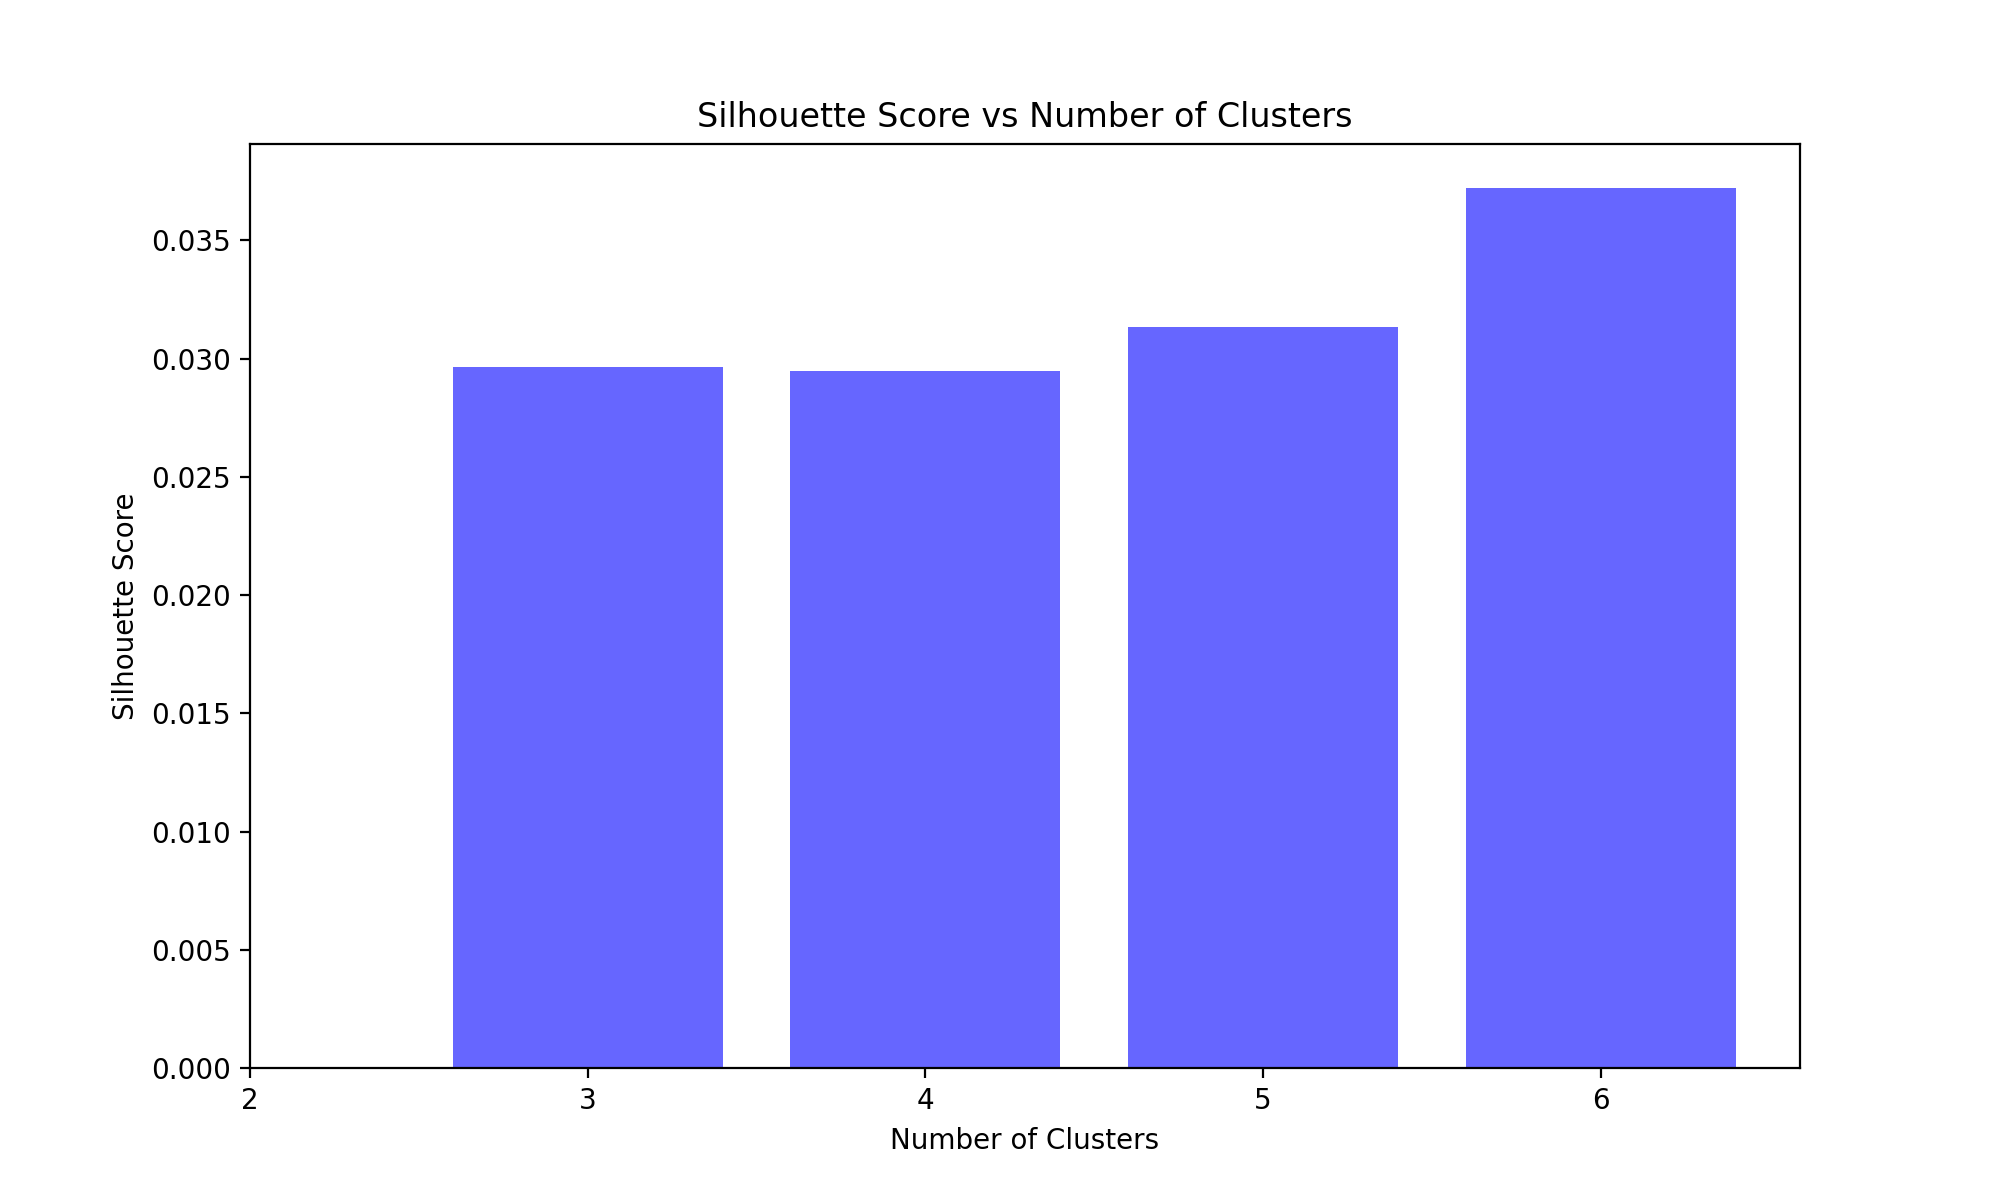

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize a DataFrame to store the count of cells for each cluster and each n_clusters value
cluster_counts_df = pd.DataFrame()

# Initialize a dictionary to store the Silhouette score for each n_clusters value
silhouette_scores = {}

# Loop through the desired range of n_clusters values
for n_clusters in range(3, 7):  # from 2 to 6
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(adata_filtered_day8.X)

    # Compute the Silhouette score
    silhouette_avg = silhouette_score(adata_filtered_day8.X, kmeans.labels_)
    silhouette_scores[n_clusters] = silhouette_avg


# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='b', alpha=0.6)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(list(range(2, 7)))  # Adjust the ticks to match the range of n_clusters
plt.show()



In [89]:
print(adata_filtered_day8.X.shape)


(1891, 15000)


In [71]:
cluster_day8 = mmdata_day8.obs['a']

In [72]:
with open('Desktop/EMT_Optimal_Transport/cell_set_day8.txt', 'w') as f:
    for i in range(mmdata_day8.shape[0]):
        f.write(mmdata_day8.obs.index[i] + '\t' + cluster_day8[i] + '\n')

In [9]:
VAR_DS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/PNAS_Expression_Matrix_day0.txt'
CELL_DAYS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/PNAS_Cells_Days_day0.txt'

In [10]:
days_df_day0 = pd.read_csv(CELL_DAYS_PATH_day0, index_col='id', sep='\t')

In [33]:
days_df_day0

day
id                             
MCF10A_t4_AAACCTGGTTGTCTTT    4
MCF10A_t4_AAACGGGCATACGCTA    4
MCF10A_t4_AAAGATGTCCGAAGAG    4
MCF10A_t4_AAAGCAACATCCGCGA    4
MCF10A_t4_AAAGCAAGTTAGGGTG    4
...                         ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3
MCF10A_t3_TTTGGTTTCTTCGTGC    3
MCF10A_t3_TTTGTTGAGCGTACAG    3
MCF10A_t3_TTTGTTGAGGATACAT    3
MCF10A_t3_TTTGTTGCAATCCAGT    3

[12588 rows x 1 columns]

In [12]:
adata_var_day0 = wot.io.read_dataset(VAR_DS_PATH_day0, obs=[days_df_day0])


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [13]:
 mmdata_day0 = io.MultimodalData(adata_var_day0)

In [14]:
pg.pca(mmdata_day0, features=None)


2023-09-02 19:00:23,220 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 1.63s.


In [15]:
pg.neighbors(mmdata_day0)

2023-09-02 19:00:28,756 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.44s.
2023-09-02 19:00:28,823 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.07s.


In [16]:
pg.diffmap(mmdata_day0)

2023-09-02 19:00:29,823 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2023-09-02 19:00:29,835 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2023-09-02 19:00:30,645 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 47.
2023-09-02 19:00:30,647 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 0.83s.


In [27]:
pg.fle(mmdata_day0)


2023-09-02 19:01:51,991 - pegasus.tools.nearest_neighbors - INFO - Found cached kNN results, no calculation is required.
2023-09-02 19:01:51,994 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 0.00s.
2023-09-02 19:01:52,053 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.06s.
2023-09-02 19:01:52,081 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.03s.


Sep 02, 2023 7:01:53 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Sep 02, 2023 7:01:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 2,734
Sep 02, 2023 7:01:53 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 86,191


100 iterations, change_per_node = 25.35059537245397
200 iterations, change_per_node = 7.823047263880659
300 iterations, change_per_node = 3.1504234890006333
Finished in 344 iterations, change_per_node = 1.7802052470470517
Time = 3.308s
2023-09-02 19:01:55,959 - pegasus.tools.visualization - INFO - Function 'fle' finished in 3.97s.


In [28]:
coords_day0 = mmdata_day0.obsm['X_fle']

In [29]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords_day0.txt', 'w') as f:
    for i in range(coords_day0.shape[0]):
        f.write(mmdata_day0.obs.index[i] + '\t' + str(coords_day0[i, 0]) + '\t' + str(coords_day0[i, 1]) +  '\n')

In [30]:
FLE_COORDS_PATH_day0 ='Desktop/EMT_Optimal_Transport/FLE_coords_day0.txt'


In [32]:
coord_df_day0 = pd.read_csv(FLE_COORDS_PATH_day0, index_col='id', sep='\t')


In [164]:
adata_day0 = wot.io.read_dataset(VAR_DS_PATH_day0, obs=[days_df_day0, coord_df_day0])


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


In [165]:
unique_days_day0 = adata_day0.obs['day'].unique()
unique_days_day0 = unique_days_day0[np.isnan(unique_days_day0) == False]

Text(0.5, 1.0, 'Day')

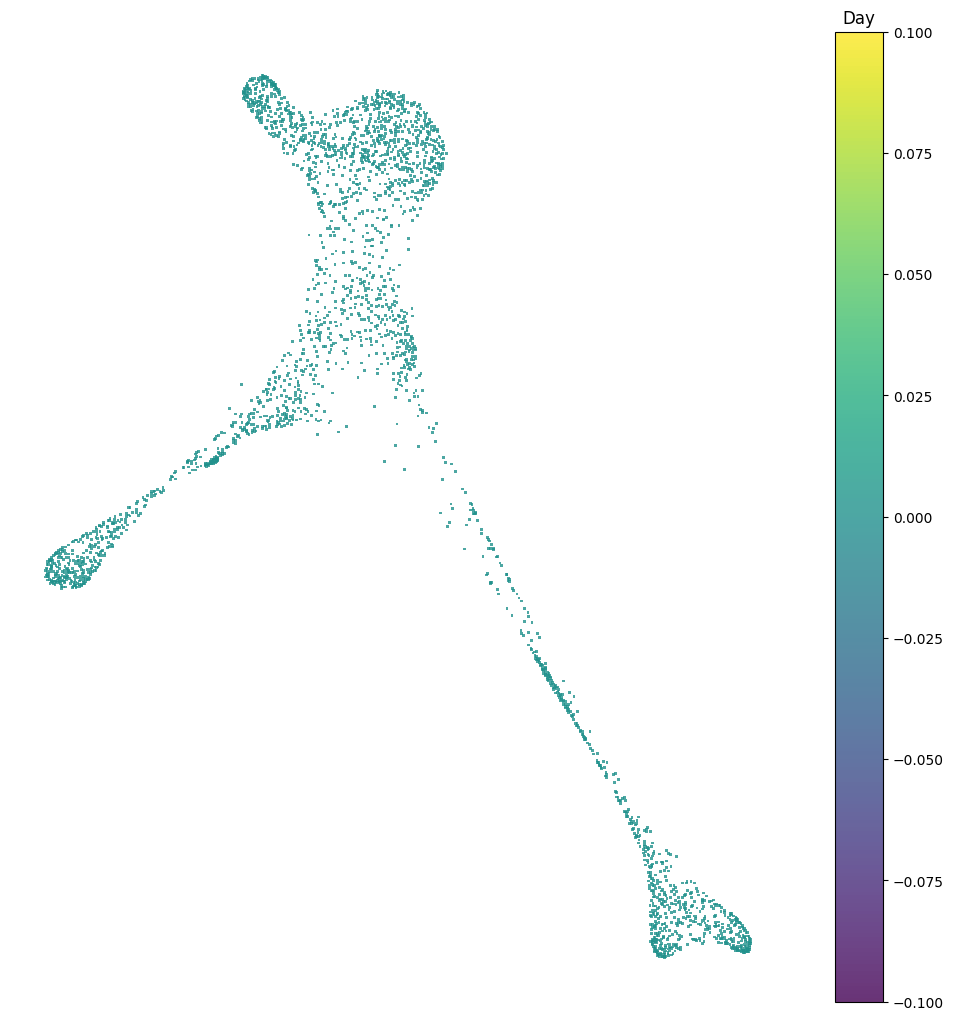

In [166]:
# plot visualization coordinates
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.tight_layout()
plt.scatter(adata_day0.obs['x'], adata_day0.obs['y'],c=adata_day0.obs['day'],
               s=4, marker=',', edgecolors='none', alpha=0.8)
cb = plt.colorbar()
cb.ax.set_title('Day')


In [174]:
 pg.cluster(mmdata_day0, algo = 'leiden', resolution=0.5, class_label = "a")

2022-11-05 16:57:40,318 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.08s.
2022-11-05 16:57:40,451 - pegasus.tools.clustering - INFO - Leiden clustering is done. Get 4 clusters.
2022-11-05 16:57:40,453 - pegasus.tools.clustering - INFO - Function 'leiden' finished in 0.22s.


In [175]:
cluster_day0 = mmdata_day0.obs['a']

In [36]:
with open('Desktop/EMT_Optimal_Transport/cell_set_day0.txt', 'w') as f:
    for i in range(mmdata_day0.shape[0]):
        f.write(mmdata_day0.obs.index[i] + '\t' + cluster_day0[i] + '\n')

NameError: name 'cluster_day0' is not defined

In [37]:
 mmdata = io.MultimodalData(adata_var)

NameError: name 'adata_var' is not defined

In [10]:
pg.pca(mmdata, features=None)


2022-11-04 23:01:35,982 - pegasus.tools.preprocessing - INFO - Function 'pca' finished in 6.21s.


In [11]:
pg.neighbors(mmdata)

2022-11-04 23:01:40,064 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 1.42s.
2022-11-04 23:01:40,366 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.30s.


In [12]:
pg.diffmap(mmdata)

2022-11-04 23:01:43,326 - pegasus.tools.diffusion_map - INFO - Calculating connected components is done.
2022-11-04 23:01:43,365 - pegasus.tools.diffusion_map - INFO - Calculating normalized affinity matrix is done.
2022-11-04 23:01:46,703 - pegasus.tools.diffusion_map - INFO - Detected knee point at t = 63.
2022-11-04 23:01:46,706 - pegasus.tools.diffusion_map - INFO - Function 'diffmap' finished in 3.40s.


In [13]:
pg.fle(mmdata)


2022-11-04 23:01:51,911 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 1.46s.
2022-11-04 23:01:52,107 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 0.20s.
2022-11-04 23:01:52,224 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 0.12s.


Nov 04, 2022 11:01:53 PM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Nov 04, 2022 11:01:55 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 12,588
Nov 04, 2022 11:01:55 PM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 381,097


100 iterations, change_per_node = 49.248604037201204
200 iterations, change_per_node = 44.86055930097875
300 iterations, change_per_node = 24.42254357091418
400 iterations, change_per_node = 8.339320308938104
500 iterations, change_per_node = 7.836220448544156
600 iterations, change_per_node = 12.620674283324247
700 iterations, change_per_node = 6.777015345356839
800 iterations, change_per_node = 5.544547373601993
900 iterations, change_per_node = 5.340124171564667
1000 iterations, change_per_node = 7.067646846645355
1100 iterations, change_per_node = 5.699571380822627
1200 iterations, change_per_node = 4.086387929697965
1300 iterations, change_per_node = 5.786505107779587
1400 iterations, change_per_node = 5.678589690678355
1500 iterations, change_per_node = 3.5837610800219997
1600 iterations, change_per_node = 5.503436393086469
1700 iterations, change_per_node = 7.076039980751344
1800 iterations, change_per_node = 9.308058585964494
1900 iterations, change_per_node = 7.57472141739191


2100 iterations, change_per_node = 2.332236585372666
Finished in 2170 iterations, change_per_node = 1.6132382537578696
Time = 31.569s
2022-11-04 23:02:24,918 - pegasus.tools.visualization - INFO - Function 'fle' finished in 34.46s.


In [14]:
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.tight_layout()

In [13]:
coords = mmdata.obsm['X_fle']

NameError: name 'mmdata' is not defined

In [9]:
with open('Desktop/EMT_Optimal_Transport/FLE_coords.txt', 'w') as f:
    for i in range(coords.shape[0]):
        f.write(mmdata.obs.index[i] + '\t' + str(coords[i, 0]) + '\t' + str(coords[i, 1]) +  '\n')

NameError: name 'coords' is not defined

In [61]:
FLE_COORDS_PATH ='Desktop/EMT_Optimal_Transport/FLE_coords.txt'


In [62]:
coord_df = pd.read_csv(FLE_COORDS_PATH, index_col='id', sep='\t')


In [63]:
print(coord_df)

                                     x            y
id                                                 
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800
...                                ...          ...
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200

[12588 rows x 2 columns]


In [57]:
print(days_df)

                            day
id                             
MCF10A_t4_AAACCTGGTTGTCTTT    4
MCF10A_t4_AAACGGGCATACGCTA    4
MCF10A_t4_AAAGATGTCCGAAGAG    4
MCF10A_t4_AAAGCAACATCCGCGA    4
MCF10A_t4_AAAGCAAGTTAGGGTG    4
...                         ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3
MCF10A_t3_TTTGGTTTCTTCGTGC    3
MCF10A_t3_TTTGTTGAGCGTACAG    3
MCF10A_t3_TTTGTTGAGGATACAT    3
MCF10A_t3_TTTGTTGCAATCCAGT    3

[12588 rows x 1 columns]


In [58]:
merged_df = pd.merge(coord_df, days_df, left_index=True, right_index=True)

In [59]:
print(merged_df)

                                     x            y  day
id                                                      
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200    4
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870    4
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340    4
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800    4
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800    4
...                                ...          ...  ...
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400    3
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640    3
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889    3
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000    3
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200    3

[12588 rows x 3 columns]


In [60]:
def read_gmt_file(file_path):
    gene_sets = {}

    with open(file_path, 'r') as f:
        for line in f:
            split_line = line.strip().split('\t')
            gene_set_name = split_line[0]
            gene_list = split_line[2:]  # The gene list starts from the third element
            gene_sets[gene_set_name] = gene_list

    return gene_sets

Cells_cluster_day_8 = read_gmt_file('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt')

In [61]:
list(Cells_cluster_day_8)

['Low EMT', 'High EMT', 'Medium EMT']

In [62]:
# Reverse the dictionary
reverse_dict = {cell_id: status for status, cell_ids in Cells_cluster_day_8.items() for cell_id in cell_ids}

# Map the EMT status onto the dataframe
merged_df['EMT'] = pd.Series(merged_df.index).map(reverse_dict).values


In [63]:
# Convert EMT column to categorical type
merged_df['EMT'] = merged_df['EMT'].astype('category')

# Create the dummy variables
dummy_df = pd.get_dummies(merged_df['EMT'])

# Merge the dummy variables with the original DataFrame
merged_df = pd.concat([merged_df, dummy_df], axis=1)

# Drop the original 'EMT' column
merged_df = merged_df.drop(columns=['EMT'])


In [64]:
print(merged_df)


                                     x            y  day  High EMT  Low EMT  \
id                                                                            
MCF10A_t4_AAACCTGGTTGTCTTT  -6904.4390  16087.58200    4     False    False   
MCF10A_t4_AAACGGGCATACGCTA   6516.0034  -2783.17870    4     False    False   
MCF10A_t4_AAAGATGTCCGAAGAG   7982.5703    598.64340    4     False    False   
MCF10A_t4_AAAGCAACATCCGCGA -11109.0810  15296.31800    4     False    False   
MCF10A_t4_AAAGCAAGTTAGGGTG -10213.2030  13516.45800    4     False    False   
...                                ...          ...  ...       ...      ...   
MCF10A_t3_TTTGGTTTCGAGCTGC   4346.2207  12597.01400    3     False    False   
MCF10A_t3_TTTGGTTTCTTCGTGC   7018.0680   -417.41640    3     False    False   
MCF10A_t3_TTTGTTGAGCGTACAG   3866.7644   -172.76889    3     False    False   
MCF10A_t3_TTTGTTGAGGATACAT   1390.7549 -25357.09000    3     False    False   
MCF10A_t3_TTTGTTGCAATCCAGT   4647.6670   8791.35200 

In [65]:
df_FLE = pd.read_csv('Desktop/EMT_Optimal_Transport/FLE_coords_S.log', sep='\t', header=None)
df_FLE

0          1             2  3
0      MCF10A_t4_AAACCTGGTTGTCTTT -5789.5940  16504.246000  4
1      MCF10A_t4_AAACGGGCATACGCTA  6235.5350  -3247.665800  4
2      MCF10A_t4_AAAGATGTCCGAAGAG  7938.4710      3.120892  4
3      MCF10A_t4_AAAGCAACATCCGCGA -9981.8000  15988.693000  4
4      MCF10A_t4_AAAGCAAGTTAGGGTG -9264.6250  14137.026000  4
...                           ...        ...           ... ..
12583  MCF10A_t3_TTTGGTTTCGAGCTGC  5063.2246  12293.264000  3
12584  MCF10A_t3_TTTGGTTTCTTCGTGC  6891.6147   -936.069030  3
12585  MCF10A_t3_TTTGTTGAGCGTACAG  3789.1120   -425.396240  3
12586  MCF10A_t3_TTTGTTGAGGATACAT  -952.9902 -25215.613000  3
12587  MCF10A_t3_TTTGTTGCAATCCAGT  5136.3310   8473.238000  3

[12588 rows x 4 columns]

In [66]:
df_FLE_subset = df_FLE[df_FLE.iloc[:, 3] == 8]
df_FLE_subset

0           1             2  3
1147  MCF10A_t8_AAACCTGAGACTTGAA  10297.2550  13108.997000  8
1148  MCF10A_t8_AAACCTGAGCGAAGGG  11760.6440  14709.328000  8
1149  MCF10A_t8_AAACCTGAGTCATGCT   7880.2383    -25.020695  8
1150  MCF10A_t8_AAACCTGCACGACTCG   3546.7356   3670.141600  8
1151  MCF10A_t8_AAACCTGCACGCCAGT -12711.7200  17477.625000  8
...                          ...         ...           ... ..
3033  MCF10A_t8_TTTGGTTTCTTGTACT   8265.1470   1874.305900  8
3034  MCF10A_t8_TTTGTCACACCATCCT  -9793.1660  15926.473000  8
3035  MCF10A_t8_TTTGTCAGTTCTGGTA -10568.4920  14021.086000  8
3036  MCF10A_t8_TTTGTCATCATTATCC  10299.0220  11067.524000  8
3037  MCF10A_t8_TTTGTCATCTCCCTGA  10118.5220  12918.501000  8

[1891 rows x 4 columns]

In [67]:
# Extract the second and third columns into a new DataFrame
subset_df_array = df_FLE_subset.iloc[:, [1, 2]]

# Convert the DataFrame to a NumPy array
subset_df_array = subset_df_array.to_numpy()

subset_df_array

array([[ 10297.255   ,  13108.997   ],
       [ 11760.644   ,  14709.328   ],
       [  7880.2383  ,    -25.020695],
       ...,
       [-10568.492   ,  14021.086   ],
       [ 10299.022   ,  11067.524   ],
       [ 10118.522   ,  12918.501   ]])

For n_clusters = 2, the average silhouette_score is: 0.6284633110799986
For n_clusters = 3, the average silhouette_score is: 0.6451599680861436
For n_clusters = 4, the average silhouette_score is: 0.6678050618165615
For n_clusters = 5, the average silhouette_score is: 0.6005150680836778
For n_clusters = 6, the average silhouette_score is: 0.510571947592666
Cluster Counts:
   n_clusters_2  n_clusters_3  n_clusters_4  n_clusters_5  n_clusters_6
0         588.0         746.0         589.0         722.0           308
1        1303.0         589.0         549.0         195.0           195
2           NaN         556.0         721.0         544.0           526
3           NaN           NaN          32.0         398.0            30
4           NaN           NaN           NaN          32.0           434
5           NaN           NaN           NaN           NaN           398


<IPython.core.display.Javascript object>


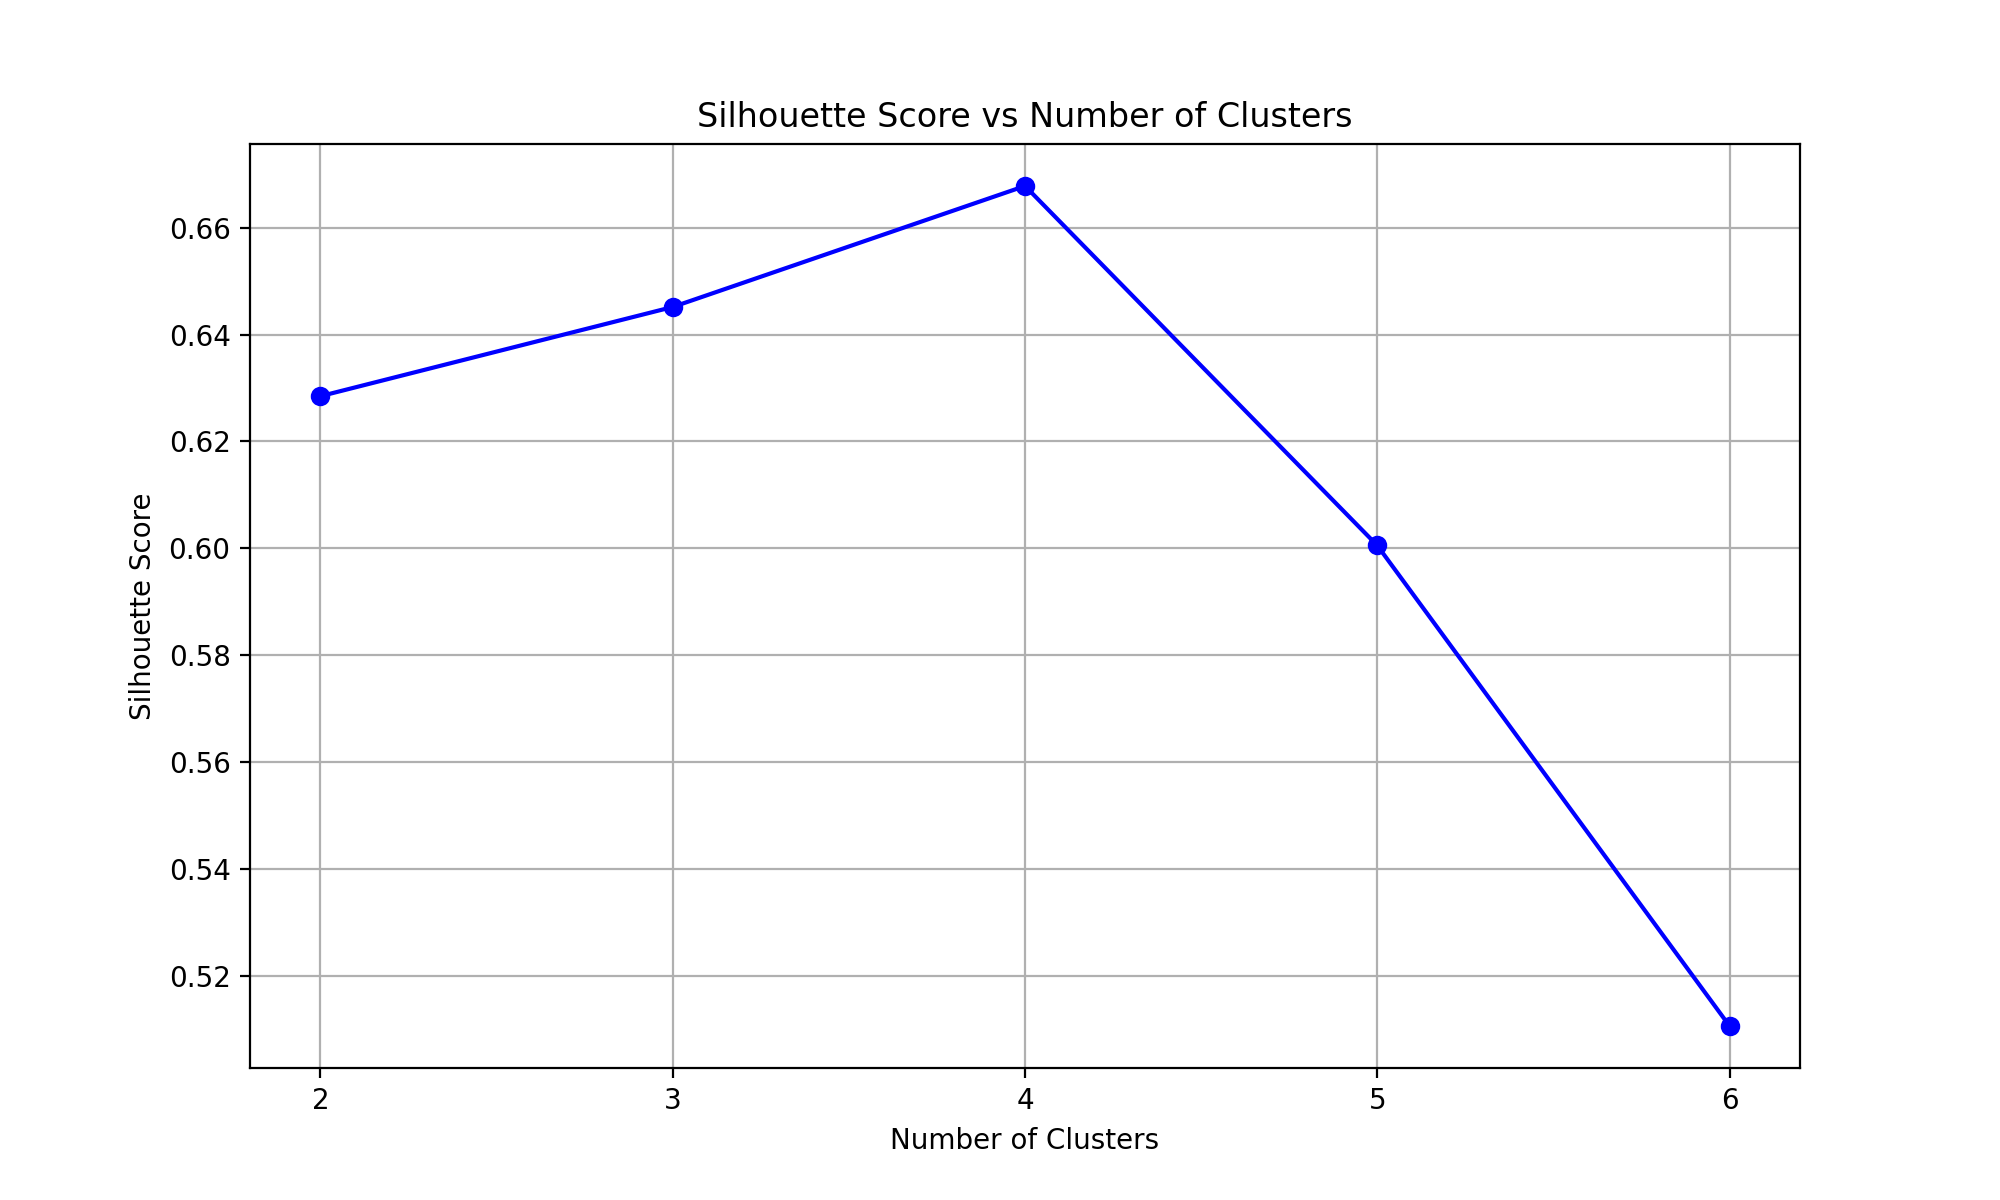

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a DataFrame to store the count of items for each cluster and each n_clusters value
cluster_counts_df = pd.DataFrame()

# Initialize a dictionary to store the Silhouette score for each n_clusters value
silhouette_scores = {}

# Loop through the desired range of n_clusters values
for n_clusters in range(2, 7):  # from 2 to 6
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(subset_df_array)  # Assuming subset_df_array is your data array

    # Compute the Silhouette score
    silhouette_avg = silhouette_score(subset_df_array, kmeans.labels_)
    silhouette_scores[n_clusters] = silhouette_avg
    
    # Print the Silhouette score for this value of n_clusters
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Count the number of items in each cluster
    cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
    cluster_counts.name = f'n_clusters_{n_clusters}'
    cluster_counts_df = pd.concat([cluster_counts_df, cluster_counts], axis=1)

# Print the cluster counts DataFrame
print("Cluster Counts:")
print(cluster_counts_df)

# Plot Silhouette scores using a line plot
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(list(range(2, 7)))  # Adjust the ticks to match the range of n_clusters
plt.grid(True)
plt.show()




## PCA analysis for the whole matrix

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np


In [50]:

# List of component numbers to check
n_components_list = [10, 20, 30, 40, 50, 60, 70, 80]

# Dictionary to store the cumulative variance percentage for each number of components
cumulative_variance_percents = {}

for n_components in n_components_list:
    sc.tl.pca(adata_var, n_comps=n_components)
    # Calculate cumulative variance as a percentage
    cumulative_variance_percent = np.cumsum(adata_var.uns['pca']['variance_ratio']) * 100
    cumulative_variance_percents[n_components] = cumulative_variance_percent[-1]  # Get the last value, which is the cumulative variance percentage


# Prepare data for plotting
components = list(cumulative_variance_percents.keys())
cumulative_variance_percent_values = list(cumulative_variance_percents.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(components, cumulative_variance_percent_values, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Percentage of Explained Variance by PCA Components')
plt.grid(True)
plt.ylim(0, 100)  # Limit the y-axis to 100% for clarity

#%matplotlib inline 

plt.show()





ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


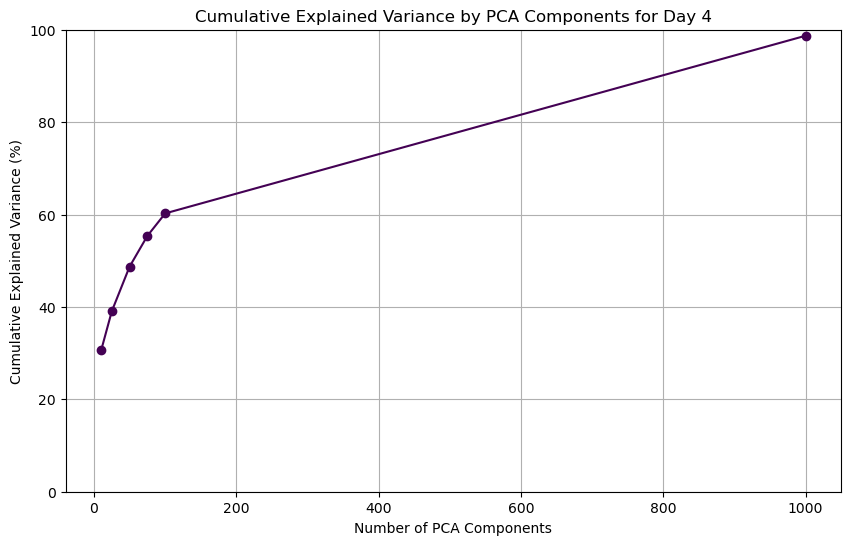

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


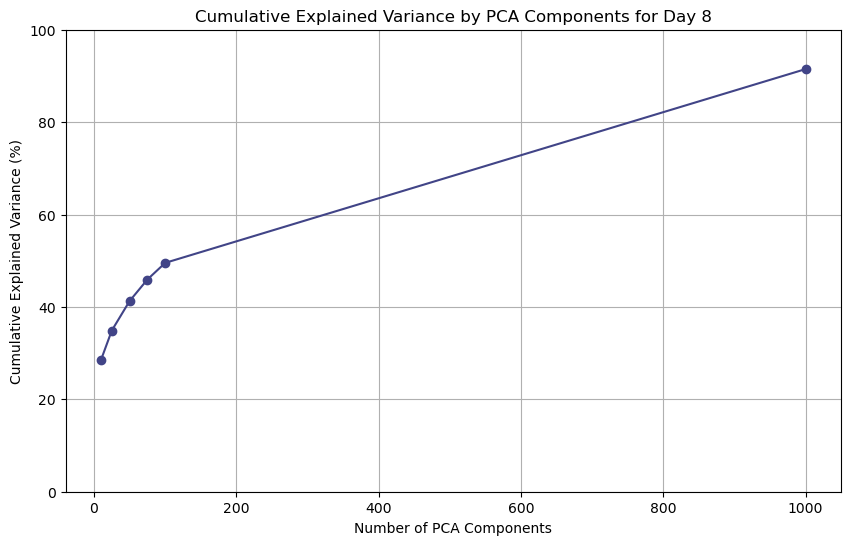

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


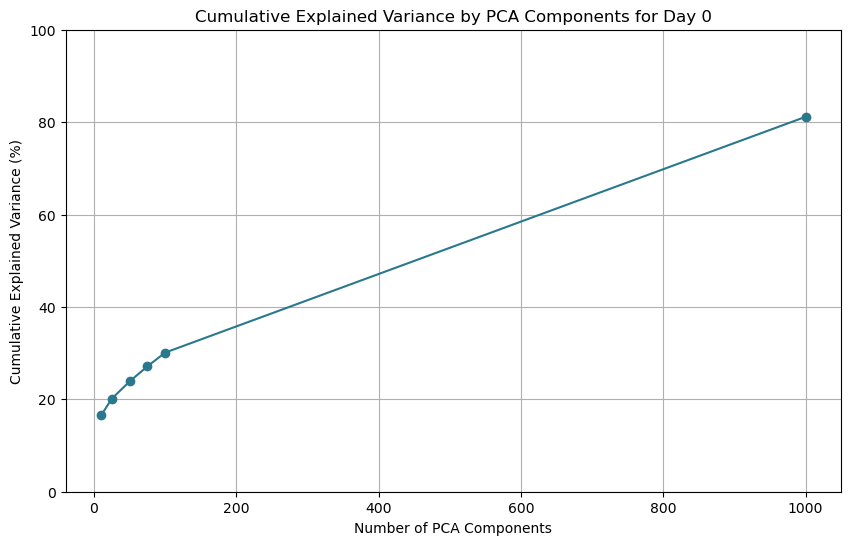

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


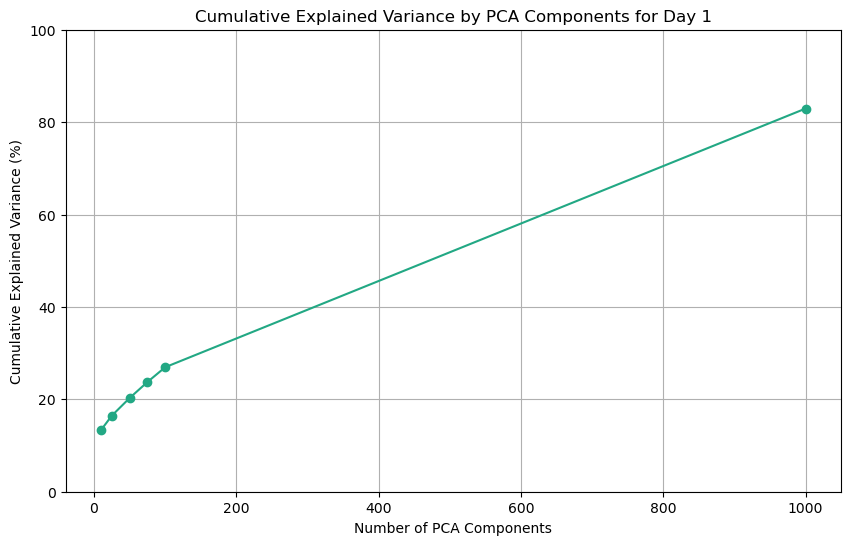

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


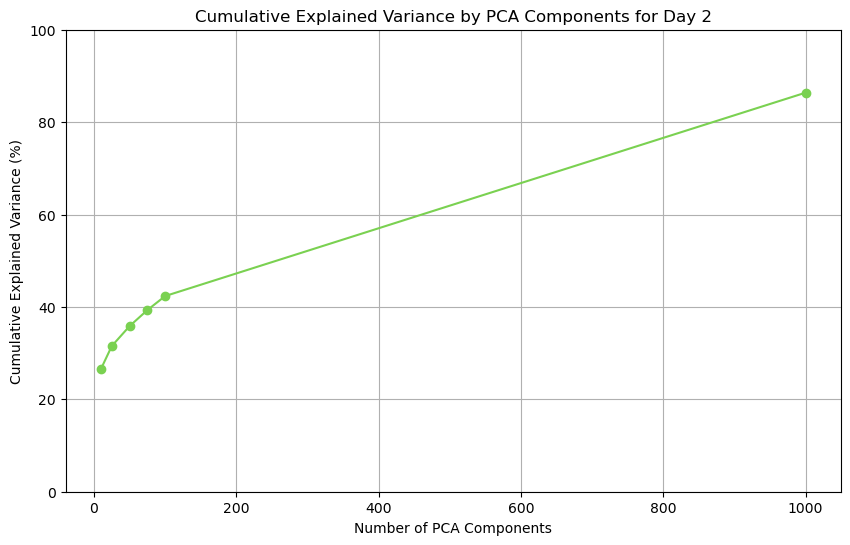

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


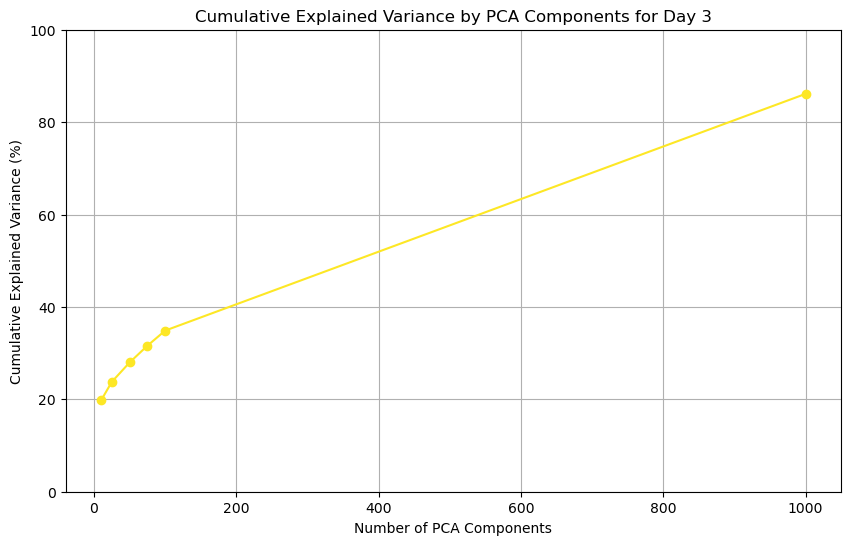

In [38]:

# List of component numbers to check
n_components_list = [10, 30, 100, 300, 1000, 3000]

# Unique days
unique_days = adata_var.obs['day'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_days)))  # Prepare colors, though each plot will typically use only one

# Loop over each day
for day, color in zip(unique_days, colors):
    # Filter the data for the current day
    adata_day = adata_var[adata_var.obs['day'] == day]

    # Dictionary to store the cumulative variance percentage for each number of components
    cumulative_variance_percents = {}

    for n_components in n_components_list:
        sc.tl.pca(adata_day, n_comps=n_components)
        # Calculate cumulative variance as a percentage
        cumulative_variance_percent = np.cumsum(adata_day.uns['pca']['variance_ratio']) * 100
        cumulative_variance_percents[n_components] = cumulative_variance_percent[-1]  # Get the last value

    # Create a plot for the current day
    plt.figure(figsize=(10, 6))
    components = list(cumulative_variance_percents.keys())
    cumulative_variance_percent_values = list(cumulative_variance_percents.values())
    plt.plot(components, cumulative_variance_percent_values, marker='o', color=color)
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title(f'Cumulative Explained Variance by PCA Components for Day {day}')
    plt.grid(True)
    plt.ylim(0, 100)  # Limit the y-axis to 100% for clarity
    plt.show()


/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


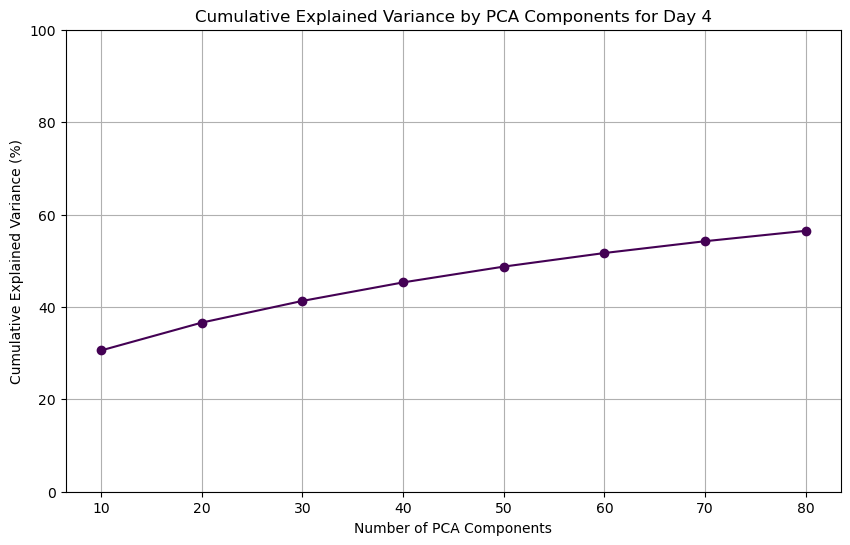

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


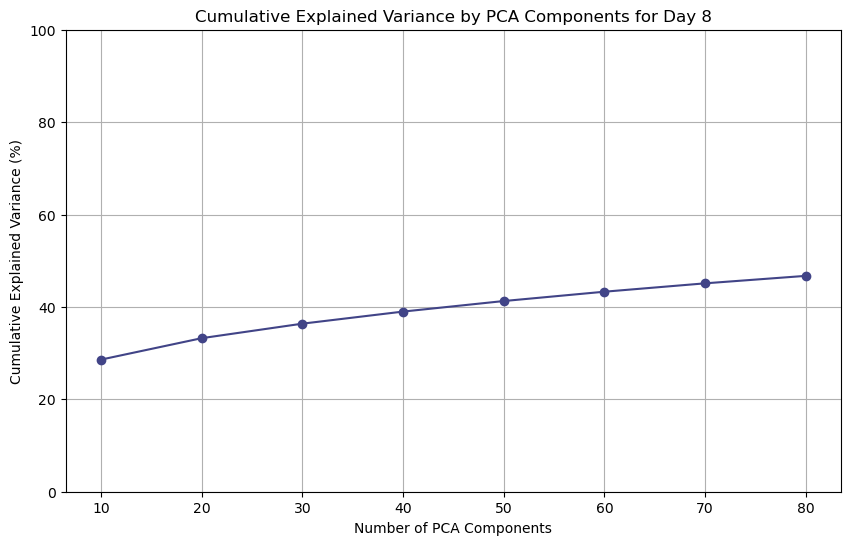

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


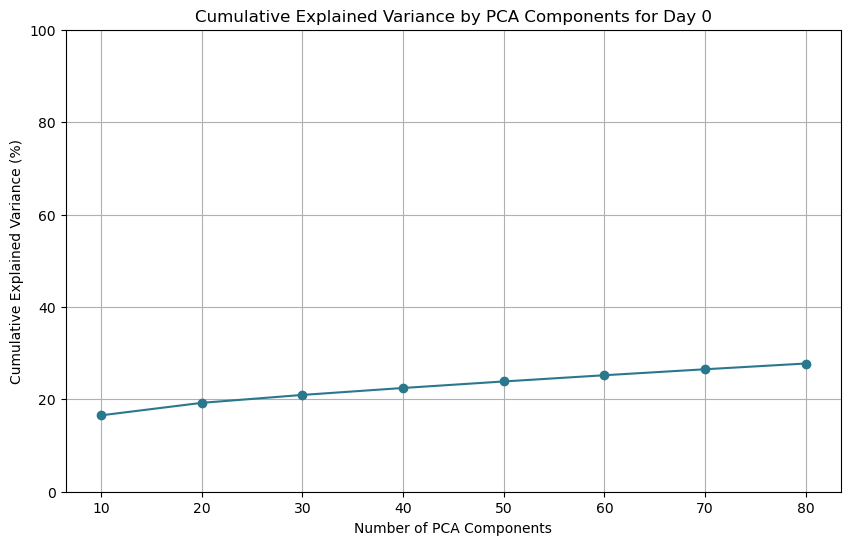

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


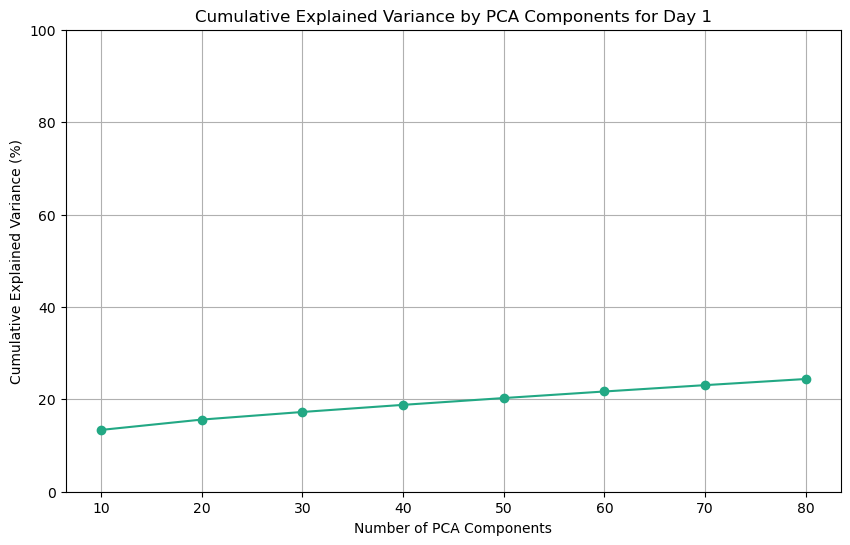

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


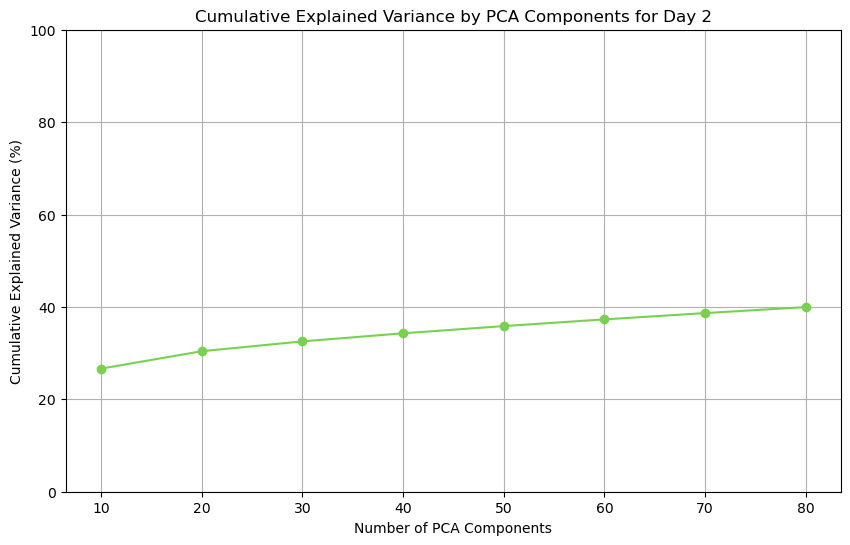

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


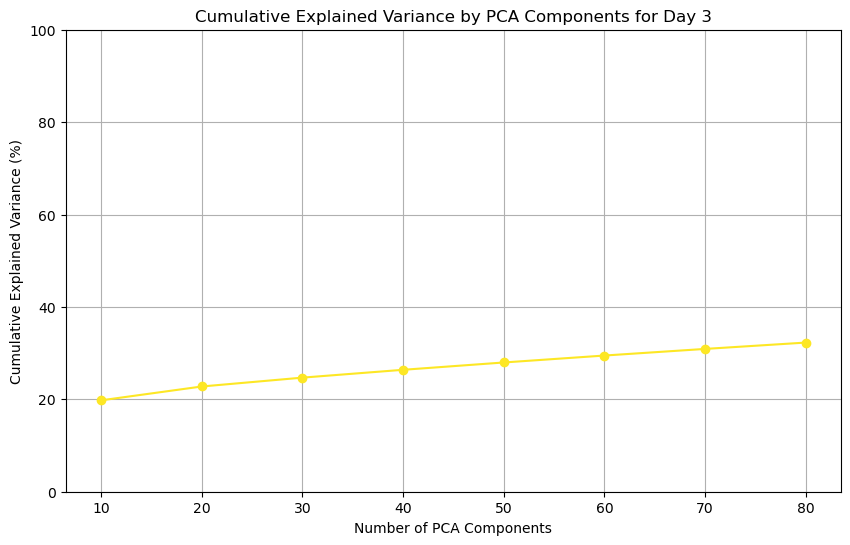

In [39]:
# List of component numbers to check
n_components_list = [10, 20, 30, 40, 50, 60, 70, 80]

# Unique days
unique_days = adata_var.obs['day'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_days)))  # Prepare colors, though each plot will typically use only one

# Loop over each day
for day, color in zip(unique_days, colors):
    # Filter the data for the current day
    adata_day = adata_var[adata_var.obs['day'] == day]

    # Dictionary to store the cumulative variance percentage for each number of components
    cumulative_variance_percents = {}

    for n_components in n_components_list:
        sc.tl.pca(adata_day, n_comps=n_components)
        # Calculate cumulative variance as a percentage
        cumulative_variance_percent = np.cumsum(adata_day.uns['pca']['variance_ratio']) * 100
        cumulative_variance_percents[n_components] = cumulative_variance_percent[-1]  # Get the last value

    # Create a plot for the current day
    plt.figure(figsize=(10, 6))
    components = list(cumulative_variance_percents.keys())
    cumulative_variance_percent_values = list(cumulative_variance_percents.values())
    plt.plot(components, cumulative_variance_percent_values, marker='o', color=color)
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title(f'Cumulative Explained Variance by PCA Components for Day {day}')
    plt.grid(True)
    plt.ylim(0, 100)  # Limit the y-axis to 100% for clarity
    plt.show()

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


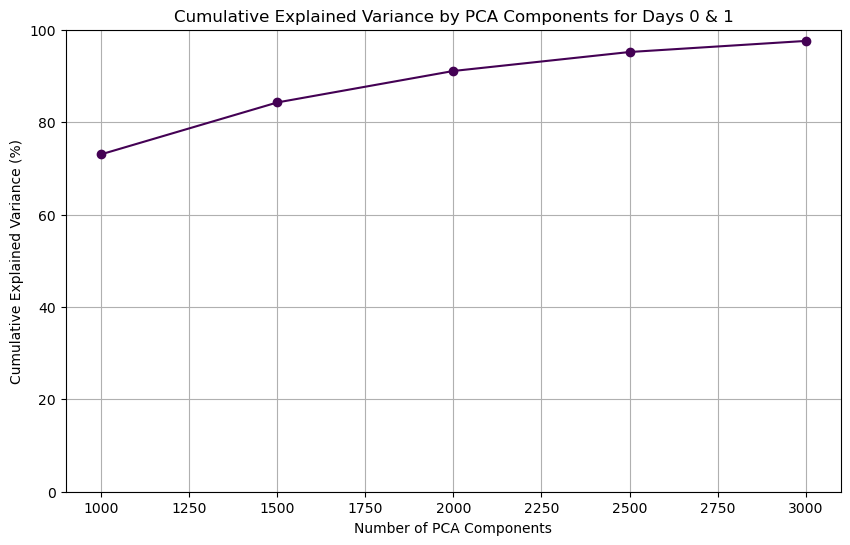

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


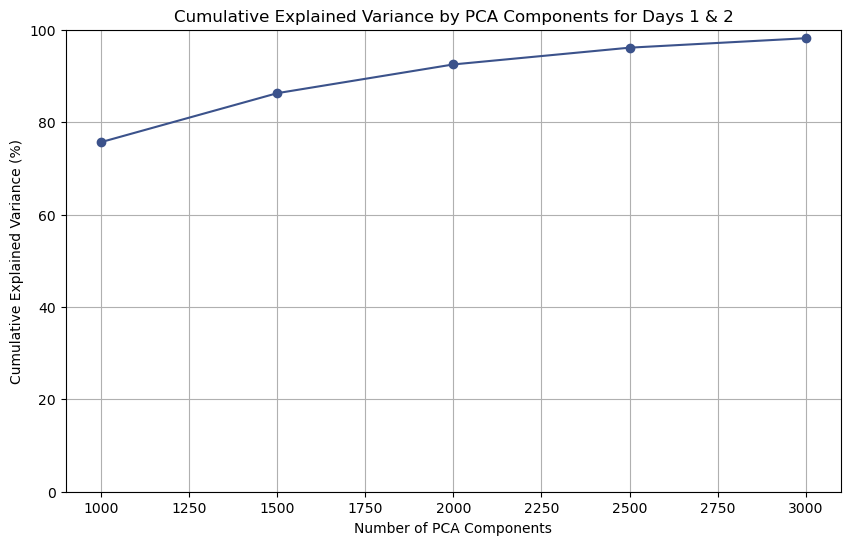

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


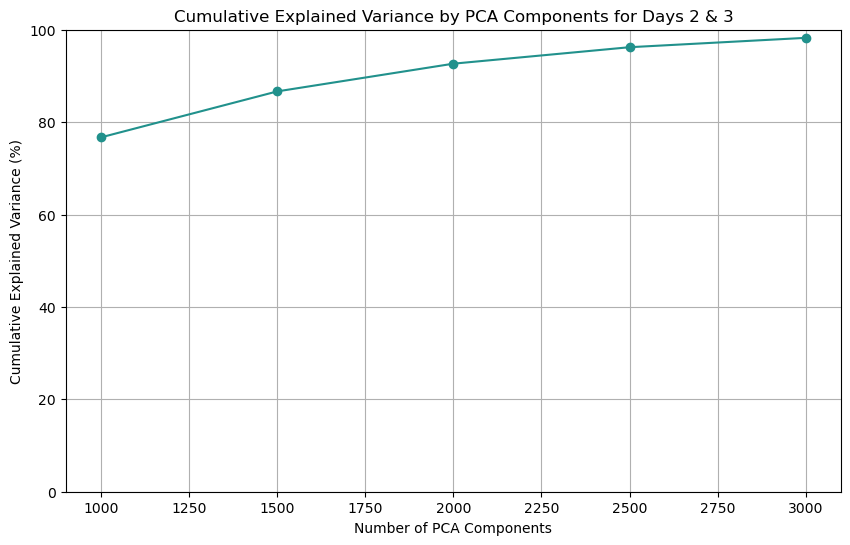

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


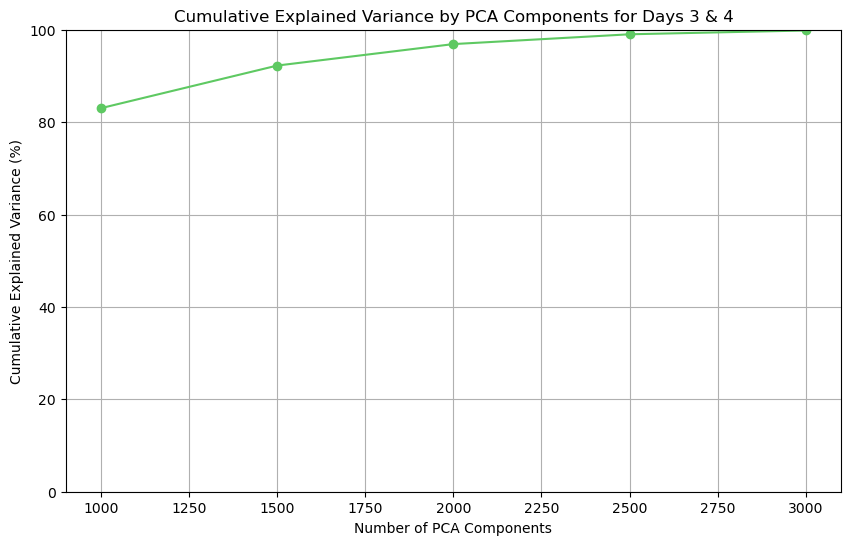

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


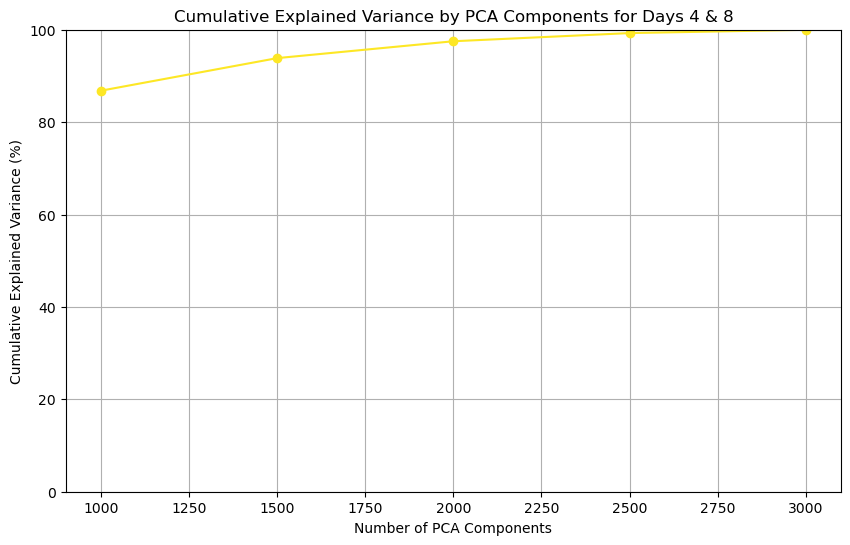

Number of Components       1000       1500       2000       2500       3000
Days                                                                       
0 & 1                 73.029212  84.258126  91.070992  95.174492  97.573631
1 & 2                 75.672139  86.267467  92.487821  96.113732  98.158466
2 & 3                 76.710587  86.652963  92.650571  96.214824  98.241399
3 & 4                 83.027071  92.244968  96.890689  99.012253  99.835202
4 & 8                 86.810664  93.855918  97.505846  99.273229  99.977941


In [548]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

# List of component numbers to check
#n_components_list = [10, 30, 100, 300, 1000, 3000]
n_components_list = [1000, 1500, 2000, 2500, 3000]

# Unique days sorted for pairing
unique_days = np.sort(adata_var.obs['day'].unique())
results_df = pd.DataFrame()

# Loop over each pair of adjacent days
for i in range(len(unique_days) - 1):
    day1 = unique_days[i]
    day2 = unique_days[i + 1]
    color = plt.cm.viridis(i / (len(unique_days) - 2))  # Adjust color for each pair

    # Filter the data for the current pair of days
    adata_days = adata_var[adata_var.obs['day'].isin([day1, day2])]

    # Dictionary to store the cumulative variance percentage for each number of components
    cumulative_variance_percents = {}

    for n_components in n_components_list:
        sc.tl.pca(adata_days, n_comps=n_components)
        # Calculate cumulative variance as a percentage
        cumulative_variance_percent = np.cumsum(adata_days.uns['pca']['variance_ratio']) * 100
        cumulative_variance_percents[n_components] = cumulative_variance_percent[-1]  # Get the last value

    # Create a plot for the current pair of days
    plt.figure(figsize=(10, 6))
    components = list(cumulative_variance_percents.keys())
    cumulative_variance_percent_values = list(cumulative_variance_percents.values())
    plt.plot(components, cumulative_variance_percent_values, marker='o', color=color)
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title(f'Cumulative Explained Variance by PCA Components for Days {day1} & {day2}')
    plt.grid(True)
    plt.ylim(0, 100)  # Limit the y-axis to 100% for clarity
    plt.show()

    # Append results to DataFrame for table
    day_results = pd.DataFrame({
        'Days': f'{day1} & {day2}',
        'Number of Components': components,
        'Cumulative Explained Variance (%)': cumulative_variance_percent_values
    })
    results_df = pd.concat([results_df, day_results], ignore_index=True)

# Optionally, you can save results to a CSV file or display as a table
print(results_df.pivot(index='Days', columns='Number of Components', values='Cumulative Explained Variance (%)'))



/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


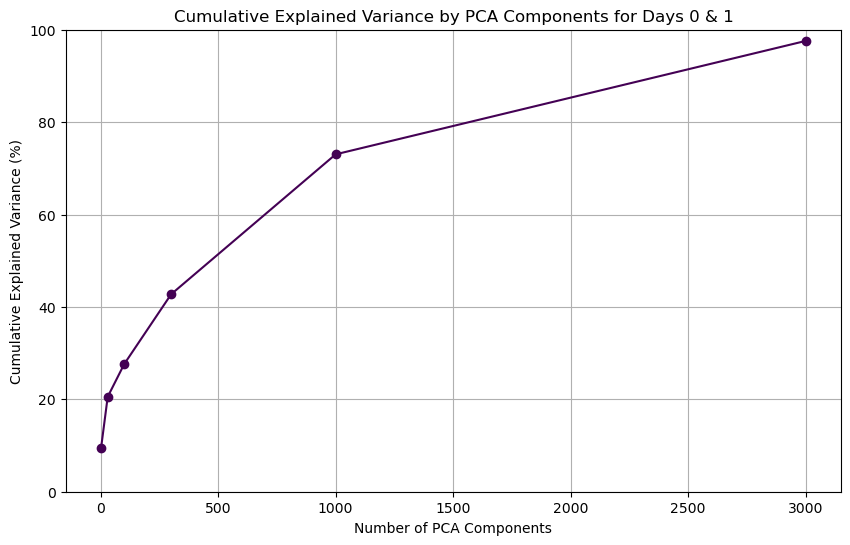

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


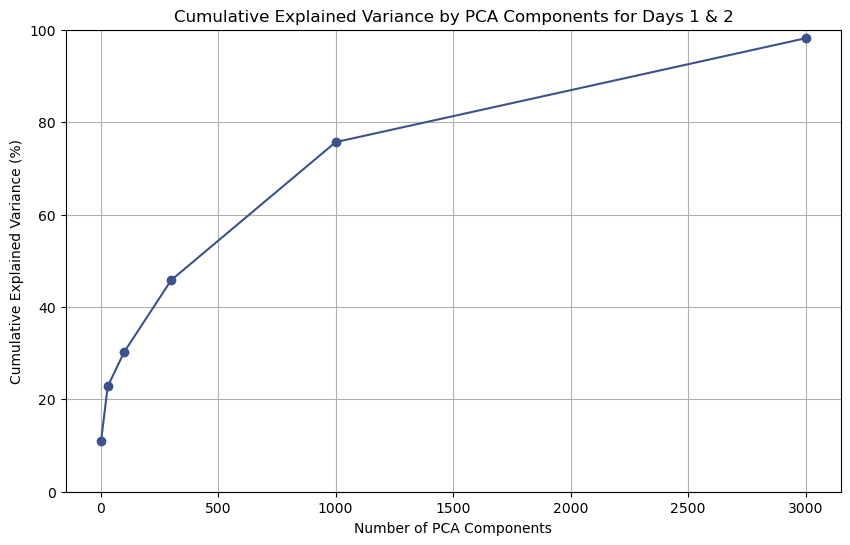

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


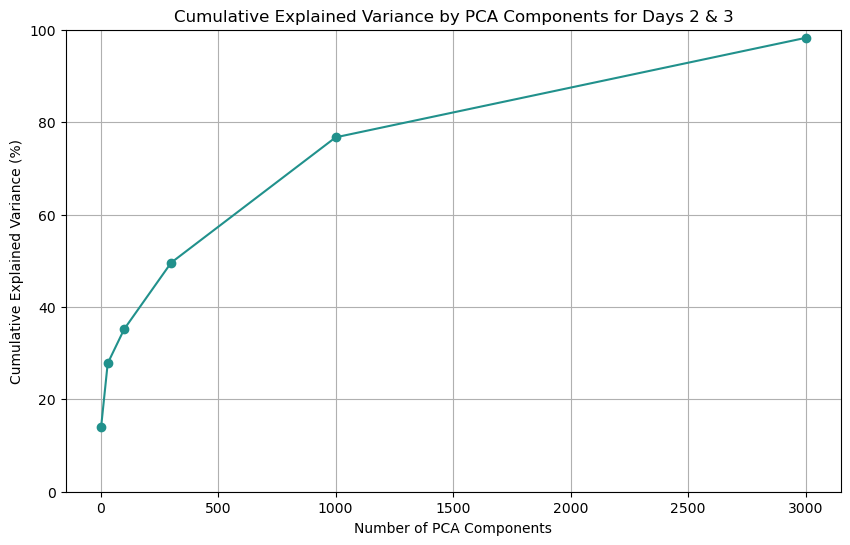

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


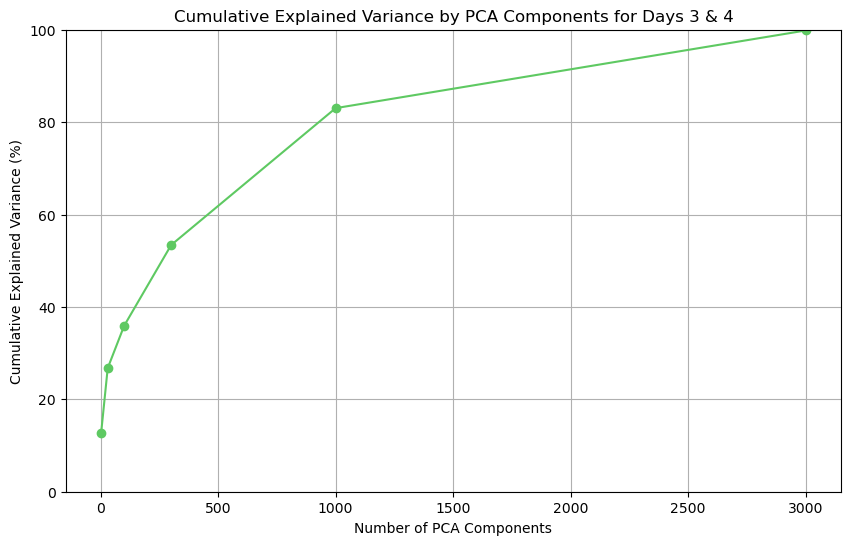

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


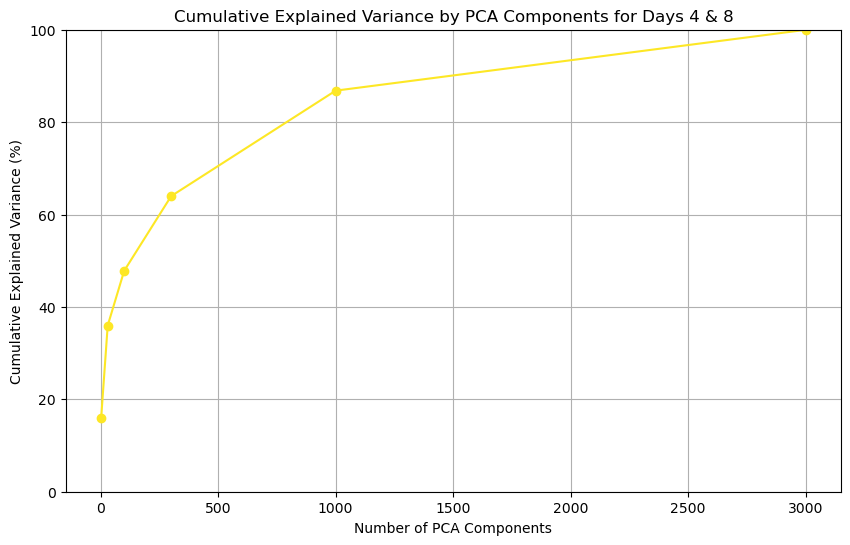

Number of Components       2          30         100        300        1000  \
Days                                                                          
0 & 1                  9.568716  20.545254  27.608894  42.748404  73.029212   
1 & 2                 11.074590  22.795425  30.233363  45.792798  75.672139   
2 & 3                 14.033551  27.792629  35.180364  49.577400  76.710587   
3 & 4                 12.697202  26.748209  35.923891  53.399738  83.027071   
4 & 8                 15.866881  35.970844  47.809911  63.983860  86.810664   

Number of Components       3000  
Days                             
0 & 1                 97.573631  
1 & 2                 98.158466  
2 & 3                 98.241399  
3 & 4                 99.835202  
4 & 8                 99.977941  


In [751]:
# List of component numbers to check
#n_components_list = [10, 30, 100, 300, 1000, 3000]
n_components_list = [2, 30, 100, 300, 1000, 3000]

# Unique days sorted for pairing
unique_days = np.sort(adata_var.obs['day'].unique())
results_df = pd.DataFrame()

# Loop over each pair of adjacent days
for i in range(len(unique_days) - 1):
    day1 = unique_days[i]
    day2 = unique_days[i + 1]
    color = plt.cm.viridis(i / (len(unique_days) - 2))  # Adjust color for each pair

    # Filter the data for the current pair of days
    adata_days = adata_var[adata_var.obs['day'].isin([day1, day2])]

    # Dictionary to store the cumulative variance percentage for each number of components
    cumulative_variance_percents = {}

    for n_components in n_components_list:
        sc.tl.pca(adata_days, n_comps=n_components)
        # Calculate cumulative variance as a percentage
        cumulative_variance_percent = np.cumsum(adata_days.uns['pca']['variance_ratio']) * 100
        cumulative_variance_percents[n_components] = cumulative_variance_percent[-1]  # Get the last value

    # Create a plot for the current pair of days
    plt.figure(figsize=(10, 6))
    components = list(cumulative_variance_percents.keys())
    cumulative_variance_percent_values = list(cumulative_variance_percents.values())
    plt.plot(components, cumulative_variance_percent_values, marker='o', color=color)
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title(f'Cumulative Explained Variance by PCA Components for Days {day1} & {day2}')
    plt.grid(True)
    plt.ylim(0, 100)  # Limit the y-axis to 100% for clarity
    plt.show()

    # Append results to DataFrame for table
    day_results = pd.DataFrame({
        'Days': f'{day1} & {day2}',
        'Number of Components': components,
        'Cumulative Explained Variance (%)': cumulative_variance_percent_values
    })
    results_df = pd.concat([results_df, day_results], ignore_index=True)

# Optionally, you can save results to a CSV file or display as a table
print(results_df.pivot(index='Days', columns='Number of Components', values='Cumulative Explained Variance (%)'))



In [43]:
cell_matrix

PI3    S100A9    SPRR1B    S100A8    SPRR2D  \
id                                                                             
MCF10A_t4_AAACCTGGTTGTCTTT -0.010945  0.299267 -0.017060  0.007269 -0.009067   
MCF10A_t4_AAACGGGCATACGCTA -0.012150  0.735916 -0.004985  0.169847 -0.045016   
MCF10A_t4_AAAGATGTCCGAAGAG  0.012378  0.184780 -0.033598 -0.006576  0.177710   
MCF10A_t4_AAAGCAACATCCGCGA  0.022110  0.162266 -0.029986 -0.065534 -0.042484   
MCF10A_t4_AAAGCAAGTTAGGGTG  0.233160  0.853783  0.178892  0.603546  0.153865   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG  0.000000  1.068647  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGGATACAT  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT  0.000000  0.000000  0.000000  0.000000  0.000000   

                               KLK10     KRT16  C15orf48     S100P      SAA1  \
id                                                                             
MCF10A_t4_AAACCTGGTTGTCTTT -0.055016  0.121449  0.199889  0.105608  0.934373   
MCF10A_t4_AAACGGGCATACGCTA  0.120211  0.084601  0.068536 -0.031029  0.510623   
MCF10A_t4_AAAGATGTCCGAAGAG -0.027986  0.206669  0.077720 -0.019156  0.566724   
MCF10A_t4_AAAGCAACATCCGCGA  0.067524  0.123228  0.329940 -0.008158  0.140080   
MCF10A_t4_AAAGCAAGTTAGGGTG  0.161415  0.062948  0.894546 -0.016677  2.709917   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC  0.000000  0.425928  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG  0.000000  0.000000  0.000000  0.000000  1.697452   
MCF10A_t3_TTTGTTGAGGATACAT  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT  0.000000  0.000000  0.000000  0.000000  0.447297   

                            ...    NOS1AP  SARDH     CPEB3  OBP2A  \
id                          ...                                     
MCF10A_t4_AAACCTGGTTGTCTTT  ...  0.142971    0.0  0.159729    0.0   
MCF10A_t4_AAACGGGCATACGCTA  ...  0.000000    0.0 -0.000372    0.0   
MCF10A_t4_AAAGATGTCCGAAGAG  ...  0.008394    0.0 -0.010261    0.0   
MCF10A_t4_AAAGCAACATCCGCGA  ... -0.008800    0.0  0.002204    0.0   
MCF10A_t4_AAAGCAAGTTAGGGTG  ... -0.002143    0.0  0.006733    0.0   
...                         ...       ...    ...       ...    ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGGTTTCTTCGTGC  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGAGCGTACAG  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGAGGATACAT  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGCAATCCAGT  ...  0.000000    0.0  0.000000    0.0   

                            RP11-80H5.9     TUBG1      FGF8     SBNO2  \
id                                                                      
MCF10A_t4_AAACCTGGTTGTCTTT          0.0  0.194783  0.000072  0.316715   
MCF10A_t4_AAACGGGCATACGCTA          0.0  0.577341  0.000000  0.150873   
MCF10A_t4_AAAGATGTCCGAAGAG          0.0  0.674064  0.000000  0.089645   
MCF10A_t4_AAAGCAACATCCGCGA          0.0  0.386146  0.000000  0.260123   
MCF10A_t4_AAAGCAAGTTAGGGTG          0.0  0.808545  0.000000  0.283114   
...                                 ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC          0.0  0.996620  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC          0.0  0.723687  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG          0.0  0.492954  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGGATACAT          0.0  1.556272  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT          0.0  0.447297  0.000000  0.000000   

                                NRG2  RP13-631K18.2  
id                                               

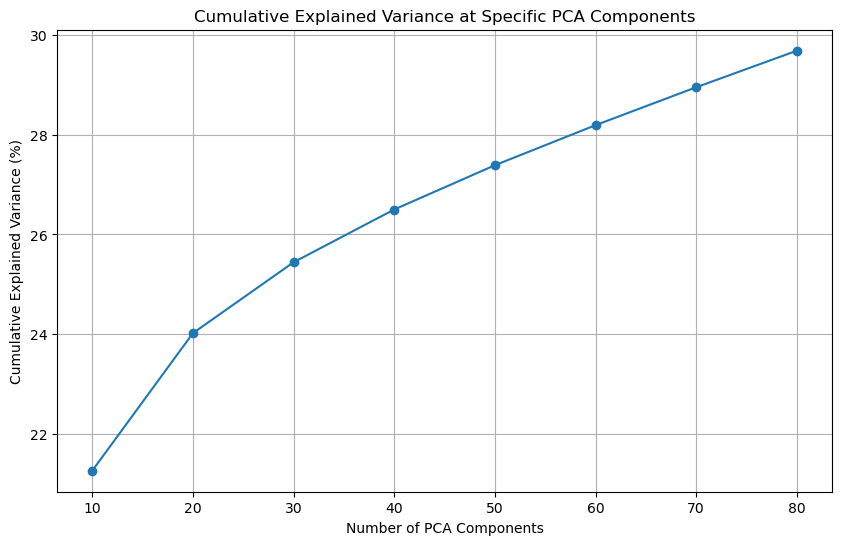

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Compute PCA
pca = PCA()
principal_components = pca.fit_transform(cell_matrix)

# Cumulative variance ratio
cumulative_variance_ratios = np.cumsum(pca.explained_variance_ratio_) * 100

# Desired component counts
n_components_list = [10, 20, 30, 40, 50, 60, 70, 80]
specific_variances = [cumulative_variance_ratios[n-1] for n in n_components_list]  # -1 because index starts at 0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, specific_variances, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance at Specific PCA Components')
plt.xticks(n_components_list)  # Ensure all specified components are marked
plt.grid(True)
plt.show()


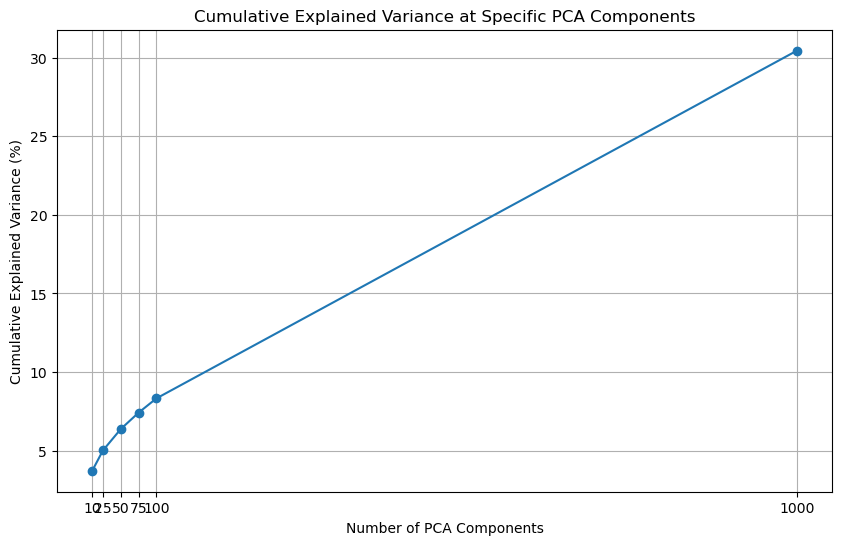

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded your gene expression matrix with cells as rows and genes as columns
#cell_matrix = pd.read_csv('path_to_your_data.csv', index_col=0)  # Update the path and index_col accordingly

# Standardize the data
scaler = StandardScaler()
cell_matrix_scaled = scaler.fit_transform(cell_matrix)

# Total variance of the original scaled matrix
total_variance_scaled = np.sum(np.var(cell_matrix_scaled, axis=0))

# Compute PCA with enough components to cover your highest number in the list
n_components_max = min(1000, cell_matrix.shape[1])  # Ensure not to exceed the number of genes
pca = PCA(n_components=n_components_max)
principal_components = pca.fit_transform(cell_matrix_scaled)

# Cumulative variance ratio
cumulative_variance_ratios = np.cumsum(pca.explained_variance_ratio_) * 100

# Desired component counts
n_components_list = [10, 25, 50, 75, 100, n_components_max]
specific_variances_relative = [cumulative_variance_ratios[n-1] for n in n_components_list]  # -1 because index starts at 0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, specific_variances_relative, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance at Specific PCA Components')
plt.xticks(n_components_list)  # Ensure all specified components are marked
plt.grid(True)
plt.show()



#  plots FLE coordinates colored by day.

In [3]:
# Read expression matrix, cell days, and 2-d coordinates
adata = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df,coord_df])
unique_days = adata.obs['day'].unique()
unique_days = unique_days[np.isnan(unique_days) == False]

NameError: name 'wot' is not defined

In [65]:
unique_days_r = np.array([0,1,2,3,4,8])

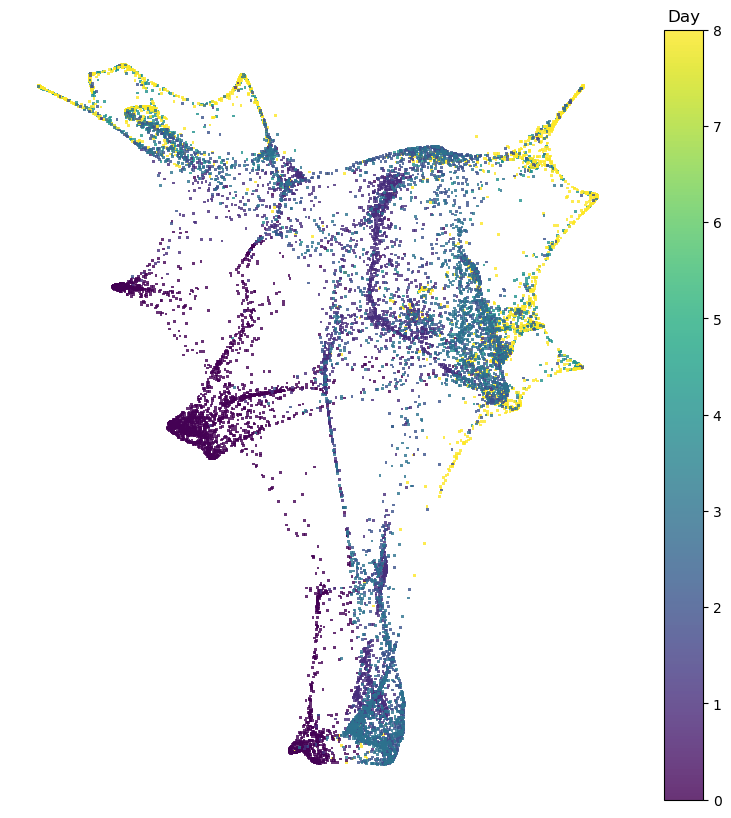

In [66]:
# plot visualization coordinates
figure = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.tight_layout()
plt.scatter(adata.obs['x'], adata.obs['y'],c=adata.obs['day'],
               s=4, marker=',', edgecolors='none', alpha=0.8)
cb = plt.colorbar()
cb.ax.set_title('Day')
%matplotlib inline 
plt.show()


In [67]:
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

In [68]:
def update_whole_cell_vis(days):
    cell_set_coords = adata.obs[(adata.obs['day']>=days[0]) & (adata.obs['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="peru",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [69]:
widgets.interact(update_whole_cell_vis, days=day_selector)

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Days', index=(0, 5), options=…

<function __main__.update_whole_cell_vis(days)>

# Compute gene signature scores¶


In [319]:
adata = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df])


In [320]:
GENE_SETS_PATH = 'Desktop/EMT_Optimal_Transport/hallmark_pathways.gmt'


In [321]:
gs = wot.io.read_sets(GENE_SETS_PATH, adata.var.index.values)
gene_set_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(gs.shape[1]):
    gene_set_name = str(gs.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gs[:, [j]], permutations=0, method='mean_z_score')
    gene_set_scores_df[gene_set_name] = result['score']
ratio_1 = 'HALLMARK_GLYCOLYSIS' + str("") + str("/") + str("") +  'HALLMARK_OXIDATIVE_PHOSPHORYLATION'
gene_set_scores_df[ratio_1] =  (gene_set_scores_df['HALLMARK_GLYCOLYSIS'] - np.amin(gene_set_scores_df['HALLMARK_GLYCOLYSIS']) + 1) / (gene_set_scores_df['HALLMARK_OXIDATIVE_PHOSPHORYLATION'] - np.amin(gene_set_scores_df['HALLMARK_OXIDATIVE_PHOSPHORYLATION'])+1)
gene_set_scores_df.to_csv('Desktop/EMT_Optimal_Transport/gene_set_scores.csv', index_label='id')

In [322]:
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'


In [323]:
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH,index_col='id')
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)

gene_set_scores_df = gene_set_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis(name, days):
    gene_set_score_coords = gene_set_scores_df[(gene_set_scores_df['day']>=days[0]) & (gene_set_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2


def update_gene_set_vis_modified(name, days):
    gene_set_score_coords = gene_set_scores_df[(gene_set_scores_df['day']>=days[0]) & (gene_set_scores_df['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_set_vis, name=gene_set_dropdown, days=day_selector)

interactive(children=(Dropdown(description='Gene Set:', options=('HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK…

<function __main__.update_gene_set_vis(name, days)>

# Compute single gene score - EMT

In [324]:
GENE_SINGLE_PATH = 'Desktop/EMT_Optimal_Transport/single_gene_MLR.gmt'


In [325]:
gss = wot.io.read_sets(GENE_SINGLE_PATH, adata.var.index.values)
gene_single_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(gss.shape[1]):
    gene_single_name = str(gss.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gss[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df[gene_single_name] = result['score']
ratio_1 = str(gss.var.index.values[0]) + str("") + str("/") + str("") +  str(gss.var.index.values[1])
ratio_2 = str(gss.var.index.values[2]) + str("") + str("/") + str("") +  str(gss.var.index.values[1])
ratio_3 = str(gss.var.index.values[1]) + str("") + str("/") + str("") +  str(gss.var.index.values[0])
gene_single_scores_df[ratio_1] =  (gene_single_scores_df['CDH1'] - np.amin(gene_single_scores_df['CDH1']) + 0.1)/(gene_single_scores_df['VIM'] - np.amin(gene_single_scores_df['VIM'])+0.1) 
gene_single_scores_df[ratio_2] =  (gene_single_scores_df['OVOL2'] - np.amin(gene_single_scores_df['OVOL2']) + 0.1)/(gene_single_scores_df['VIM']-np.amin(gene_single_scores_df['VIM'])+0.1)
gene_single_scores_df[ratio_3] =  (gene_single_scores_df['VIM'] - np.amin(gene_single_scores_df['VIM'])+0.1)/(gene_single_scores_df['CDH1']-np.amin(gene_single_scores_df['CDH1'])+0.1)
gene_single_scores_df.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores.csv', index_label='id')

In [326]:
GENE_SINGLE_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_single_scores.csv'


In [327]:
gene_single_scores_df = pd.read_csv(GENE_SINGLE_SCORES_PATH,index_col='id')
gene_single_dropdown = widgets.Dropdown(
    options=gene_single_scores_df.columns,
    description='Gene Set:'
)

gene_single_scores_df = gene_single_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis(name, days):
    gene_single_score_coords = gene_single_scores_df[(gene_single_scores_df['day']>=days[0]) & (gene_single_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified(name, days):
    gene_single_score_coords = gene_single_scores_df[(gene_single_scores_df['day']>=days[0]) & (gene_single_scores_df['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "Reds")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified, name=gene_single_dropdown, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('CDH1', 'VIM', 'OVOL2', 'TMEM125', 'CLDN7', '…

<function __main__.update_gene_single_vis_modified(name, days)>

# Compute single gene score - metabolism

In [328]:
GENE_SINGLE_PATH_METABOLISM = 'Desktop/EMT_Optimal_Transport/single_gene_metabolic.gmt'


In [329]:
gsm = wot.io.read_sets(GENE_SINGLE_PATH_METABOLISM, adata.var.index.values)
gene_single_scores_df_meta = pd.DataFrame(index=adata.obs.index)
for j in range(gsm.shape[1]):
    gene_single_name_meta = str(gsm.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gsm[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_meta[gene_single_name_meta] = result['score']
ratio_1 = str(gsm.var.index.values[0]) + str("") + str("/") + str("") +  str(gsm.var.index.values[1])
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)
gene_single_scores_df_meta[ratio_1] =  (gene_single_scores_df_meta['HIF1A'] - np.amin(gene_single_scores_df_meta['HIF1A'])+ 0.1)/(gene_single_scores_df_meta['PRKAA2'] - np.amin(gene_single_scores_df_meta['PRKAA2'])+ 0.1)

gene_single_scores_df_meta.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv', index_label='id')

In [330]:
GENE_SINGLE_SCORES_PATH_METABOLISM = 'Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv'


In [331]:
gene_single_scores_df_metabolism = pd.read_csv(GENE_SINGLE_SCORES_PATH_METABOLISM,index_col='id')
gene_single_dropdown_metabolism = widgets.Dropdown(
    options=gene_single_scores_df_metabolism.columns,
    description='Gene Set:'
)

gene_single_scores_df_metabolism = gene_single_scores_df_metabolism.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_metabolism(name, days):
    gene_single_score_coords = gene_single_scores_df_metabolism[(gene_single_scores_df_metabolism['day']>=days[0]) & (gene_single_scores_df_metabolism['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_metabolism(name, days):
    gene_single_score_coords = gene_single_scores_df_metabolism[(gene_single_scores_df_metabolism['day']>=days[0]) & (gene_single_scores_df_metabolism['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified_metabolism, name=gene_single_dropdown_metabolism, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('HIF1A', 'PRKAA2', 'PRKAG2', 'HIF1A/PRKAA2'),…

<function __main__.update_gene_single_vis_modified_metabolism(name, days)>

# Compute single gene score - Stemness/reactome/Curated/EED/ALDH


In [332]:
GENE_SINGLE_PATH_STEM = 'Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.gmt'


In [333]:
gse = wot.io.read_sets(GENE_SINGLE_PATH_STEM, adata.var.index.values)
gene_single_scores_df_stem = pd.DataFrame(index=adata.obs.index)
for j in range(gse.shape[1]):
    gene_single_name_stem = str(gse.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gse[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_stem[gene_single_name_stem] = result['score']
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)

gene_single_scores_df_stem.to_csv('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv', index_label='id')



/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/wot/gene_set_scores.py:123: RuntimeWarning: Mean of empty slice.
  observed_scores = x.mean(axis=1)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/wot/gene_set_scores.py:123: RuntimeWarning: Mean of empty slice.
  observed_scores = x.mean(axis=1)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [334]:
GENE_SINGLE_SCORES_PATH_STEM = 'Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv'

In [335]:
gene_single_scores_df_stem = pd.read_csv(GENE_SINGLE_SCORES_PATH_STEM,index_col='id')
gene_single_dropdown_stem = widgets.Dropdown(
    options=gene_single_scores_df_stem.columns,
    description='Gene Set:'
)

gene_single_scores_df_stem = gene_single_scores_df_stem.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_stem(name, days):
    gene_single_score_coords = gene_single_scores_df_stem[(gene_single_scores_df_stem['day']>=days[0]) & (gene_single_scores_df_stem['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_stem(name, days):
    gene_single_score_coords = gene_single_scores_df_stem[(gene_single_scores_df_stem['day']>=days[0]) & (gene_single_scores_df_stem['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_stem, name=gene_single_dropdown_stem, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('ADD2', 'PRKAR2B', 'FGF13', 'NCAM1', 'NFASC',…

<function __main__.update_gene_single_vis_stem(name, days)>

# Compute single gene score - GRN


In [336]:
GENE_SINGLE_PATH_GRN = 'Desktop/EMT_Optimal_Transport/single_gene_GRN.gmt'


In [337]:
gse = wot.io.read_sets(GENE_SINGLE_PATH_GRN, adata.var.index.values)
gene_single_scores_df_GRN = pd.DataFrame(index=adata.obs.index)
for j in range(gse.shape[1]):
    gene_single_name_GRN = str(gse.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=gse[:, [j]], permutations=0, method='mean_z_score')
    gene_single_scores_df_GRN[gene_single_name_GRN] = result['score']
#gene_single_scores_df_meta[ratio_1] =  np.log(gene_single_scores_df_meta['HIF1A']/gene_single_scores_df_meta['PRKAA2'] + 100)

gene_single_scores_df_GRN.to_csv('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv', index_label='id')

In [338]:
GENE_SINGLE_SCORES_PATH_GRN = 'Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv'

In [339]:
gene_single_scores_df_GRN = pd.read_csv(GENE_SINGLE_SCORES_PATH_GRN,index_col='id')
gene_single_dropdown_GRN = widgets.Dropdown(
    options=gene_single_scores_df_GRN.columns,
    description='Gene Set:'
)

gene_single_scores_df_GRN = gene_single_scores_df_GRN.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

def update_gene_single_vis_GRN(name, days):
    gene_single_score_coords = gene_single_scores_df_GRN[(gene_single_scores_df_GRN['day']>=days[0]) & (gene_single_scores_df_GRN['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords['x'], gene_single_score_coords['y'], c=gene_single_score_coords[name], 
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_single_score_coords[name] , bins=500)
    
    return figure, figure2


def update_gene_single_vis_modified_GRN(name, days):
    gene_single_score_coords = gene_single_scores_df_GRN[(gene_single_scores_df_GRN['day']>=days[0]) & (gene_single_scores_df_GRN['day']<=days[1])]
    pd_series = gene_single_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_single_score_coords_modified = gene_single_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_single_score_coords_modified['x'], gene_single_score_coords_modified['y'], c=pd_series_adjusted, 
                   s=4, marker=',', edgecolors='none', cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('', fontsize=24)
    cb.ax.tick_params(labelsize=24)
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    
    return figure, figure2

widgets.interact(update_gene_single_vis_modified_GRN, name=gene_single_dropdown_GRN, days=day_selector)



interactive(children=(Dropdown(description='Gene Set:', options=('CDH1', 'EPCAM', 'S100A9', 'NOTCH1', 'CDH2', …

<function __main__.update_gene_single_vis_modified_GRN(name, days)>

# Compute EMT/STEM/PROLIFERATION scores

In [340]:
GENE_SET_SCORES_PATH_EMT = 'Desktop/EMT_Optimal_Transport/scores.csv'

In [341]:
gene_set_scores_df_EMT = pd.read_csv(GENE_SET_SCORES_PATH_EMT,index_col='id')

gene_set_dropdown_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene Set:'
)

gene_set_scores_df_EMT = gene_set_scores_df_EMT.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_EMT(name, days):
    gene_set_score_coords = gene_set_scores_df_EMT[(gene_set_scores_df_EMT['day']>=days[0]) & (gene_set_scores_df_EMT['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_EMT_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_EMT[(gene_set_scores_df_EMT['day']>=days[0]) & (gene_set_scores_df_EMT['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(9, 8))
    plt.axis('off')
    plt.tight_layout()
    plt.title(''.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('', fontsize=10)  # Change fontsize here
    cb.ax.tick_params(labelsize=26)  # Change label fontsize here
    figure2 = plt.figure(figsize=(10, 5))
    plt.title('')
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2


widgets.interact(update_gene_set_vis_EMT_modified, name=gene_set_dropdown_EMT, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('EMT_SCORE', 'EMT_SCORE_76GS', 'EMT_SCORE_76G…

<function __main__.update_gene_set_vis_EMT_modified(name, days)>

# Compute PNAS Stemness score

In [342]:
GENE_SET_SCORES_PATH_PNAS_stemness = 'Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv'

In [343]:
gene_set_scores_df_PNAS_stemness = pd.read_csv(GENE_SET_SCORES_PATH_PNAS_stemness,index_col='id')

gene_set_dropdown_PNAS_stemness = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene Set:'
)

gene_set_scores_df_PNAS_stemness = gene_set_scores_df_PNAS_stemness.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_PNAS_stemness(name, days):
    gene_set_score_coords = gene_set_scores_df_PNAS_stemness[(gene_set_scores_df_PNAS_stemness['day']>=days[0]) & (gene_set_scores_df_PNAS_stemness['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_PNAS_stemness_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_PNAS_stemness[(gene_set_scores_df_PNAS_stemness['day']>=days[0]) & (gene_set_scores_df_PNAS_stemness['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(9, 8))
    plt.axis('off')
    plt.tight_layout()
    plt.title('')
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('')
    cb.ax.tick_params(labelsize=26)
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2

widgets.interact(update_gene_set_vis_PNAS_stemness_modified, name=gene_set_dropdown_PNAS_stemness, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('Benporath_ES2', 'Benporath_ES1', 'Kim_Myc', …

<function __main__.update_gene_set_vis_PNAS_stemness_modified(name, days)>

# Compute AUCell Scores 

In [344]:
GENE_SET_SCORES_PATH_AU = 'Desktop/EMT_Optimal_Transport/AUCell_scores.csv'

In [345]:
gene_set_scores_df_AU = pd.read_csv(GENE_SET_SCORES_PATH_AU,index_col='id')

gene_set_dropdown_AU = widgets.Dropdown(
    options=gene_set_scores_df_AU.columns,
    description='Gene Set:'
)

gene_set_scores_df_AU = gene_set_scores_df_AU.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0, len(unique_days)-1),
    description='Days'
)

def update_gene_set_vis_AU(name, days):
    gene_set_score_coords = gene_set_scores_df_AU[(gene_set_scores_df_AU['day']>=days[0]) & (gene_set_scores_df_AU['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name],
                   s=4, marker=',', edgecolors='none')
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name], bins=500)
    return figure, figure2

def update_gene_set_vis_AU_modified(name, days):
    gene_set_score_coords = gene_set_scores_df_AU[(gene_set_scores_df_AU['day']>=days[0]) & (gene_set_scores_df_AU['day']<=days[1])]
    pd_series = gene_set_score_coords[name]    
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    gene_set_score_coords_modified = gene_set_score_coords[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords_modified['x'], gene_set_score_coords_modified['y'], c=pd_series_adjusted,
                   s=4, marker=',', edgecolors='none', cmap = "Reds")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(pd_series_adjusted, bins=500)
    return figure, figure2

widgets.interact(update_gene_set_vis_AU, name=gene_set_dropdown_AU, days=day_selector)



interactive(children=(Dropdown(description='Gene Set:', options=('Epi', 'Mes', 'HALLMARK_FATTY_ACID_METABOLISM…

<function __main__.update_gene_set_vis_AU(name, days)>

# How many genes used in each gene set for computing ssGSEA

In [160]:

import os

def read_txt_file(file_path):
    return pd.read_csv(file_path, header=None, names=['gene'])

def read_gmt_file(file_path):
    genes = []
    with open(file_path, 'r') as file:
        for line in file:
            splitted_line = line.strip().split("\t")[2:]
            genes.extend(splitted_line)
    return pd.DataFrame(genes, columns=['gene'])

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
adata_df = adata.to_df()

# List of gene set files
gene_set_files = ['Desktop/EMT_Optimal_Transport/TG_stemness.txt', 
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Pece_breast_cancer.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/WONG_EMBRYONIC_STEM_CELL_CORE.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/LEE_NEURAL_CREST_STEM_CELL_UP.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/BHATTACHARYA_EMBRYONIC_STEM_CELL.gmt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt',
                  'Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt']

for gene_set_file in gene_set_files:
    file_name, file_ext = os.path.splitext(gene_set_file)
    file_name = os.path.basename(file_name)

    if file_ext == '.txt':
        gene_set = read_txt_file(gene_set_file)
    elif file_ext == '.gmt':
        gene_set = read_gmt_file(gene_set_file)
    else:
        print(f"Unsupported file format: {file_ext}")
        continue

    gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]
    
    print(f"Gene set: {file_name}")
    print(f"Number of overlapping genes: {len(gene_list)}")
    print("Gene list:", gene_list)
    print("\n")



NameError: name 'sc' is not defined

# Compute ssGSEA

In [161]:
pip install gseapy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install scanpy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [164]:
import gseapy as gp
import pandas as pd
import scanpy as sc
from scipy.stats import zscore


In [188]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
gene_set = pd.read_csv('Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt', header=None, names=['gene'])

# Convert the gene expression data to a pandas dataframe
adata_df = adata.to_df()

# Get the list of genes in the gene set that are present in the data
gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(gene_list)}")

# Calculate the ssGSEA score for the gene set in each cell
ssgsea_scores = gp.ssgsea(data=adata_df, gene_sets={'stem_Palmer': gene_list}, min_size=1, max_size=len(gene_list))

# Set the index of the resulting DataFrame to the cell names
ssgsea_scores.res2d.index = adata_df.columns

# Convert the 'ES' column to a numeric type, replacing non-numeric values with NaN
ssgsea_scores.res2d['ES'] = pd.to_numeric(ssgsea_scores.res2d['ES'], errors='coerce')

# Remove rows with NaN values in the 'ES' column
ssgsea_scores.res2d = ssgsea_scores.res2d.dropna(subset=['ES'])

# Scale the ssGSEA scores as z-scores
ssgsea_scores.res2d['zscore'] = zscore(ssgsea_scores.res2d['ES'])

# Save the ssGSEA z-scores as a CSV file
ssgsea_scores.res2d[['zscore']].to_csv('Desktop/EMT_Optimal_Transport/ssgsea_stem_scores.csv')

# View the results
print(ssgsea_scores.res2d[['zscore']])

Number of overlapping genes: 14999


2023-05-26 19:31:47,831 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'all_genes'

In [ ]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
gene_set = pd.read_csv('Desktop/EMT_Optimal_Transport/TG_stemness.txt', header=None, names=['gene'])

# Convert the gene expression data to a pandas dataframe
adata_df = adata.to_df()

# Get the list of genes in the gene set that are present in the data
gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(gene_list)}")

# Print the gene_list
print("Gene list:", gene_list)

# Define gene_sets dictionary
gene_sets = {'stemness': gene_list}
print("Gene sets:", gene_sets)

# Calculate the ssGSEA score for the gene set in each cell
ssgsea_scores = gp.ssgsea(data=adata_df, gene_sets=gene_sets, min_size=1, max_size=len(gene_list))

# Set the index of the resulting DataFrame to the cell names
ssgsea_scores.res2d.index = adata_df.columns

# Convert the 'ES' column to a numeric type, replacing non-numeric values with NaN
ssgsea_scores.res2d['ES'] = pd.to_numeric(ssgsea_scores.res2d['ES'], errors='coerce')

# Remove rows with NaN values in the 'ES' column
ssgsea_scores.res2d = ssgsea_scores.res2d.dropna(subset=['ES'])

# Scale the ssGSEA scores as z-scores
ssgsea_scores.res2d['zscore'] = zscore(ssgsea_scores.res2d['ES'])

# Save the ssGSEA z-scores as a CSV file
ssgsea_scores.res2d[['zscore']].to_csv('Desktop/EMT_Optimal_Transport/ssgsea_stem_2_scores.csv')

# View the results
print(ssgsea_scores.res2d[['zscore']])



In [ ]:
# Read in the gene set file
with open('Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt', 'r') as f:
    gene_set = f.read().splitlines()

# Convert the gene set to a .gmt file format
gene_sets = [{'name': 'MyGeneSet', 'description': 'A custom gene set', 'genes': gene_set}]
with open('Desktop/EMT_Optimal_Transport/my_gene_set.gmt', 'w') as f:
    for gene_set in gene_sets:
        f.write(gene_set['name'] + '\t' + gene_set['description'] + '\t' + '\t'.join(gene_set['genes']) + '\n')


In [826]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt", 
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt",
                  "Desktop/EMT_Optimal_Transport/TG_stemness.txt"]  # Add or remove file names as needed
gene_set_names = ["Benporath_ES1", "Benporath_ES2", "Benporath_Nanog", "Benporath_Sox2",
                  "Bhattacharya_hESC", "Curated", "Kim_Myc", "Proliferative_Porath",
                  "Shats_Consensus", "Shats_iPSC", "Smith_Human", "Stem_Palmer",
                  "REACTOME_TRANSCRIPTIONAL_REGULATION_OF_PLURIPOTENT_STEM_CELLS"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_multiple.csv")


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_38658/663010672.py:36: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [189]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.txt"]  # Add or remove file names as needed
gene_set_names = ["TG_EED_geneset"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)
        print(f"Genes used in {gene_set_names[i]} gene set:", list(intersected_genes))  # Added line to print the genes used in each gene set


# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_EED_geneset.csv")


Genes used in TG_EED_geneset gene set: ['RTN1', 'NCAM1', 'SNCAIP', 'WT1', 'EBF1', 'SLC44A5', 'NPY1R', 'AARD', 'EYA1', 'FOXF2', 'VAT1L', 'TMEM74', 'FOXS1', 'NFASC', 'WDR17', 'CAMK4', 'ZNF804A', 'PRKAR2B', 'PDE1C', 'EPB41L4A', 'FAM110B', 'FMN2', 'FGF13', 'ADD2', 'ILDR2', 'DCLK1', 'PGBD5', 'PLXNA4', 'SHISA9', 'TNFRSF11B', 'SAMD5']


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_89327/3310210873.py:23: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [1546]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .gmt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_LUMINAL_MATURE_DN.gmt"]  # Add or remove file names as needed

gene_set_dict = {}

for gene_set_file in gene_set_files:
    with open(gene_set_file, "r") as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = line[2:]
            intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
            gene_set_dict[gene_set_name] = list(intersected_genes)
            print(f"Genes used in {gene_set_name} gene set:", list(intersected_genes))

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_LIM_MAMMARY_LUMINAL_MATURE_DN.csv")


Genes used in LIM_MAMMARY_LUMINAL_MATURE_DN gene set: ['COL4A1', 'FRMD4A', 'TSHZ2', 'FOXN3', 'FABP5', 'EPB41L2', 'LMO4', 'TLE4', 'TMEM47', 'DAB2', 'NREP', 'FSTL1', 'SLC6A15', 'FAM171A1', 'FZD1', 'MEIS2', 'COL16A1', 'JAG2', 'BCL11A', 'PRICKLE1', 'LTBP4', 'SERPINH1', 'COL6A1', 'IRS2', 'TINAGL1', 'VIM', 'STAC2', 'SLC1A3', 'MOB3B', 'IGFBP3', 'SORBS1', 'NRTN', 'WTIP', 'MAP4K4', 'HTRA1', 'FOXO1', 'ETS1', 'RAP2B', 'LRIG3', 'TPST1', 'PCF11', 'TGFBR3', 'APOE', 'LAMA1', 'EGFR', 'TUBB6', 'FAS', 'KCTD12', 'SFRP1', 'CALD1', 'COL4A2', 'TSPAN2', 'ITPKB', 'GAS6', 'FBXO32', 'COL6A2', 'SNAI2', 'NES', 'TFAP2C', 'DPYSL2', 'CRYAB', 'CASP1']


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_38658/13030123.py:25: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)


In [197]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

# Load gene sets from multiple .txt files
gene_set_files = ["Desktop/EMT_Optimal_Transport/TG_stemness/TG_all.txt"]  # Add or remove file names as needed
gene_set_names = ["TG_all"]  # Add or remove gene set names as needed
gene_set_dict = {}

for i, gene_set_file in enumerate(gene_set_files):
    with open(gene_set_file, "r") as f:
        gene_set = [line.strip() for line in f.readlines()]
        intersected_genes = set(gene_set).intersection(filtered_expression_df.index)
        gene_set_dict[gene_set_names[i]] = list(intersected_genes)
        #print(f"Genes used in {gene_set_names[i]} gene set:", list(intersected_genes))

# Run ssGSEA on the filtered expression data for the gene sets
ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)

# Convert the results to a DataFrame
ssgsea_df = pd.DataFrame(ssgsea.results)

# Extract the 'es' (enrichment score) values from the dictionaries and scale them as z-scores
ssgsea_scores_z = ssgsea_df.applymap(lambda x: x['es']).apply(zscore, axis=1)

# Transpose the DataFrame to have gene sets as columns and cells as rows
ssgsea_scores_z_t = ssgsea_scores_z.T

# Save the scaled ssGSEA scores to a .csv file
ssgsea_scores_z_t.to_csv("Desktop/EMT_Optimal_Transport/ssgsea_scores_z_test_geneset.csv")


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_89327/3729405609.py:22: DeprecationWarning: processes is deprecated; use threads
  ssgsea = gp.ssgsea(data=filtered_expression_df, gene_sets=gene_set_dict, outdir=None, no_plot=True, processes=1)
2023-05-27 00:26:17,887 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'TG_all'

In [1009]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, PageBreak
from reportlab.lib.styles import getSampleStyleSheet

# List of file paths and names
file_paths = [
    'Desktop/EMT_Optimal_Transport/Gene_sets/EMT.txt', 
    'Desktop/EMT_Optimal_Transport/Gene_sets/Stemness.txt', 
    'Desktop/EMT_Optimal_Transport/Gene_sets/Proliferation.txt', 
    'Desktop/EMT_Optimal_Transport/Gene_sets/Hypoxia.txt', 
    'Desktop/EMT_Optimal_Transport/Gene_sets/G2M.txt'
]
file_names = ['EMT', 'Stemness', 'Proliferation', 'Hypoxia', 'G2M']

# Create a PDF document
doc = SimpleDocTemplate("Desktop/EMT_Optimal_Transport/Gene_sets/Gene_Sets.pdf", pagesize=letter)
styles = getSampleStyleSheet()
content = []

# Iterate over the files and generate PDF content
for file_path, file_name in zip(file_paths, file_names):
    with open(file_path, 'r') as file:
        genes = file.readlines()
    
    content.append(Paragraph(file_name, styles['Title']))
    content.append(Spacer(1, 12))

    # Split genes into multiple columns
    n_cols = 10
    col_data = [[] for _ in range(n_cols)]
    for i, gene in enumerate(genes):
        col_data[i % n_cols].append(gene.strip())

    # Create a table with multiple columns
    table_data = list(zip(*col_data))
    table = Table(table_data)
    table.setStyle(TableStyle([
        ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
        ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 0), (-1, -1), 6),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ]))

    content.append(table)
    content.append(PageBreak())

# Build the PDF
doc.build(content)






# Compute epigenetic complex ssGSEA

In [ ]:
import scanpy as sc
import pandas as pd
from gseapy import ssgsea
from scipy.stats import zscore
import re


In [201]:
import scanpy as sc
import pandas as pd
import re



In [258]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')

# Converting AnnData to DataFrame
adata_df = pd.DataFrame(adata.X.T, index=adata.var.index, columns=adata.obs.index)

In [261]:

# Assuming adata is already loaded and preprocessed

# Convert gene names in adata to uppercase if needed
# adata.var.index = adata.var.index.str.upper()

# Read protein complexes file with tab separator
protein_complexes = pd.read_csv('Desktop/EMT_Optimal_Transport/Epigenetic_complex/protein_complexes.csv', sep='\t')

# Prepare gene sets dictionary
gene_sets = {}
for index, row in protein_complexes.iterrows():
    raw_genes = row['Genes in complex']
    
    # Handle optional genes enclosed in parentheses and separate by comma
    genes_in_complex = re.sub(r'\(([^)]+)\)', lambda m: m.group(1).replace("|", ","), raw_genes).split(',')
    genes_in_complex = [gene.strip().replace("'", "").replace("\"", "").upper() for gene in genes_in_complex]  # Clean gene names and convert to uppercase
    
    complex_name = row['Complex name'].upper()
    # Filter genes that are present in the dataset
    genes_in_complex = [gene for gene in genes_in_complex if gene in adata.obs.index]
    
    if genes_in_complex:  # Only add to gene_sets if there are any genes present in the dataset
        gene_sets[complex_name] = genes_in_complex
        # Debug print
        print(f"Added {complex_name}: {genes_in_complex}")

# Check if gene_sets is empty
if not gene_sets:
    raise ValueError("gene_sets is empty. None of the genes from the protein complexes were found in your dataset.")

# Filter gene sets based on size constraints and presence in the dataset
filtered_gene_sets = {k: v for k, v in gene_sets.items() if 1 <= len(v) <= 500 and all(gene in adata.obs.index for gene in v)}
print("Number of gene sets before filtering:", len(gene_sets))
print("Number of gene sets after filtering:", len(filtered_gene_sets))

# Collect all unique genes from filtered_gene_sets
all_filtered_genes = set()
for genes in filtered_gene_sets.values():
    all_filtered_genes.update(genes)

# Print out how many unique genes are on the list
print(f"There are {len(all_filtered_genes)} unique genes in the filtered gene sets.")

# Save the list of genes to a txt file
with open('Desktop/EMT_Optimal_Transport/Epigenetic_complex/filtered_genes_list.txt', 'w') as file:
    for gene in sorted(all_filtered_genes):  # sorted for consistent order
        file.write(gene + '\n')

# Now you have your filtered genes list saved in 'filtered_genes_list.txt'


Added APOB_MRNA_EDITOSOME: ['APOBEC3F', 'APOBEC3G', 'APOBEC3H', 'AICDA']
Added ATAC: ['CSRP2BP']
Added B-WICH: ['BAZ1B', 'DDX21', 'DEK', 'ERCC6', 'SIRT7']
Added BAF: ['ACTB', 'ARID1A', 'ARID1B', 'SMARCD2']
Added BCOR: ['BCOR', 'BCORL1', 'RYBP', 'YAF2']
Added BHC: ['PHF21A']
Added BRCA1-A: ['BARD1', 'BRCA1']
Added BRCC: ['BRCA1', 'BRCA2', 'BARD1', 'RAD51']
Added CAF-1: ['CHAF1A', 'CHAF1B']
Added CERF: ['CECR2', 'SMARCA1']
Added CERF: ['CECR2', 'SMARCA1']
Added CHD8: ['HSPA1A', 'KMT2A']
Added CHRAC: ['POLE3']
Added COMPASS: ['SETD1B']
Added COMPASS-LIKE MLL1,2: ['KMT2A']
Added COMPASS-LIKE MLL3,4: ['KMT2C', 'PAGR1']
Added CREST-BRG1: ['SP1']
Added CRL4-DDB2 E3 UBIQUITIN LIGASE COMPLEX, CUL4A, CUL4B VARIANTS: ['DDB2', 'RBX1', 'CUL4B']
Added FACT: ['SSRP1', 'SUPT16H']
Added HBO1: ['ING4', 'JADE1', 'JADE2']
Added INO80: ['INO80B', 'INO80C', 'UCHL5']
Added LSD-COREST: ['GSE1', 'PHF21A', 'ZNF217']
Added MLL-HCF: ['KMT2A']
Added MLL2/3: ['HSPA1A']
Added MLL4/WBP7: ['HSPA1A']
Added MOZ/MORF: ['

In [215]:
import scanpy as sc
import pandas as pd
import re
from gseapy import ssgsea

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')

In [245]:
adata.to_df().T.loc['APOB_mRNA_editosome']

KeyError: 'APOB_mRNA_editosome'

In [244]:
filtered_gene_sets['APOB_mRNA_editosome']

['APOBEC3F', 'APOBEC3G', 'APOBEC3H', 'AICDA']

In [253]:
# Convert gene names in adata to uppercase
adata.obs.index = adata.obs.index.str.upper()

# Read protein complexes file with tab separator
protein_complexes = pd.read_csv('Desktop/EMT_Optimal_Transport/Epigenetic_complex/protein_complexes.csv', sep='\t')

# Prepare gene sets dictionary
gene_sets = {}
for index, row in protein_complexes.iterrows():
    raw_genes = row['Genes in complex']
        
    # Handle optional genes enclosed in parentheses and separate by comma
    genes_in_complex = re.sub(r'\(([^)]+)\)', lambda m: m.group(1).replace("|", ","), raw_genes).split(',')
    genes_in_complex = [gene.strip().replace("'", "").replace("\"", "").upper() for gene in genes_in_complex]  # Clean gene names and convert to uppercase
    
    complex_name = row['Complex name']
    # Filter genes that are present in the dataset
    genes_in_complex = [gene for gene in genes_in_complex if gene in adata.obs.index]
    print(gene for gene in genes_in_complex)
    if genes_in_complex:  # Only add to gene_sets if there are any genes present in the dataset
        gene_sets[complex_name] = genes_in_complex
        # Debug print
        print(f"Added {complex_name}: {genes_in_complex}")

# Check if gene_sets is empty
if not gene_sets:
    raise ValueError("gene_sets is empty. None of the genes from the protein complexes were found in your dataset.")

filtered_gene_sets = {k: v for k, v in gene_sets.items() if 1 <= len(v) <= 500 and all(gene in adata.obs.index for gene in v)}
print("Number of gene sets before filtering:", len(gene_sets))
print("Number of gene sets after filtering:", len(filtered_gene_sets))

for complex_name, genes in filtered_gene_sets.items():
    print(f"{complex_name}: {genes}")

# Proceed with the analysis using filtered_gene_sets
ssgsea_scores = ssgsea(data=adata.to_df().T, gene_sets=filtered_gene_sets, min_size=1, max_size=500)

# Convert to DataFrame if it's not already
ssgsea_scores_df = pd.DataFrame(ssgsea_scores)

# Set the column names to gene set names (i.e., complex names)
ssgsea_scores_df.columns = gene_sets.keys()

# Save the matrix to a CSV file
ssgsea_scores_df.to_csv('ssgsea_scores.csv')






<generator object <genexpr> at 0x7f775f6f8510>
<generator object <genexpr> at 0x7f775f6f8510>
Added APOB_mRNA_editosome: ['APOBEC3F', 'APOBEC3G', 'APOBEC3H', 'AICDA']
<generator object <genexpr> at 0x7f775f6f8510>
Added ATAC: ['CSRP2BP']
<generator object <genexpr> at 0x7f775f6f8510>
Added B-WICH: ['BAZ1B', 'DDX21', 'DEK', 'ERCC6', 'SIRT7']
<generator object <genexpr> at 0x7f775f6f8510>
Added BAF: ['ACTB', 'ARID1A', 'ARID1B', 'SMARCD2']
<generator object <genexpr> at 0x7f775f6f8430>
Added BCOR: ['BCOR', 'BCORL1', 'RYBP', 'YAF2']
<generator object <genexpr> at 0x7f775f6f8430>
Added BHC: ['PHF21A']
<generator object <genexpr> at 0x7f775f6f8430>
Added BRCA1-A: ['BARD1', 'BRCA1']
<generator object <genexpr> at 0x7f775f6f8430>
Added BRCC: ['BRCA1', 'BRCA2', 'BARD1', 'RAD51']
<generator object <genexpr> at 0x7f775f6f83c0>
<generator object <genexpr> at 0x7f775f6f83c0>
Added CAF-1: ['CHAF1A', 'CHAF1B']
<generator object <genexpr> at 0x7f775f6f83c0>
Added CERF: ['CECR2', 'SMARCA1']
<generator 

2023-11-02 17:06:32,240 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'APOB_mRNA_editosome'

In [255]:
# Load gene expression data from a .csv file
expression_data_file = "Desktop/EMT_Optimal_Transport/data_gsea_test.csv"
expression_df = pd.read_csv(expression_data_file, index_col=0)  # assuming the first column contains gene identifiers

# Filter genes with expression below the median average expression across samples
median_expression = expression_df.mean(axis=1).median()
filtered_expression_df = expression_df.loc[expression_df.mean(axis=1) >= median_expression]

In [256]:
# Define a dictionary with your gene set
gene_set_dict = {
    'my_custom_gene_set': ['JARID2', 'EED', 'EZH2', 'SUZ12', 'RBBP7']
}

# Run ssGSEA for the current gene set
ss = gp.ssgsea(data= filtered_expression_df , 
               gene_sets=gene_set_dict, 
               min_size=1, # Adjust this as needed
               max_size=500, # Adjust this as needed
               outdir=None, # or specify a directory to save results
               no_plot=True) # Set to False if you want to generate plots


2023-11-02 17:21:03,840 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'my_custom_gene_set'

In [246]:
# Assuming adata is your AnnData object with expression data
expression_data = adata.to_df().T

# Assuming filtered_gene_sets is your dictionary of gene sets
for complex_name, genes in filtered_gene_sets.items():
    # Making sure each gene set is a list, if not already
    gene_list = list(genes)
    
    # Create a temporary dictionary with the current gene set
    current_gene_set = {complex_name: gene_list}
    
    # Run ssGSEA for the current gene set
    ss = gp.ssgsea(data=expression_data, 
                   gene_sets=current_gene_set, 
                   min_size=1, # Adjust this as needed
                   max_size=500, # Adjust this as needed
                   outdir=None, # or specify a directory to save results
                   no_plot=True) # Set to False if you want to generate plots
    
    # Do something with the results, e.g., store them
    # ss.res2d contains the enrichment score DataFrame
    # You can concatenate this with previous results or store in a dict


2023-11-02 15:55:18,485 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'APOB_mRNA_editosome'

In [223]:
raw_genes = row['Genes in complex']
genes_in_complex = re.sub(r'\(([^)]+)\)', r'\1', raw_genes).split('|')
genes_in_complex = [gene.strip().replace("'", "").replace("\"", "").upper() for gene in genes_in_complex]


In [226]:
print(protein_complexes['Complex name'].unique())


['ACF' 'APOB_mRNA_editosome' 'ATAC' 'B-WICH' 'BAF' 'BCOR' 'BHC' 'BRCA1-A'
 'BRCC' 'BRISC' 'CAF-1' 'CERF' 'CHD8' 'CHRAC' 'COMPASS'
 'COMPASS-like MLL1,2' 'COMPASS-like MLL3,4' 'CREST-BRG1'
 'CRL4-DDB2 E3 ubiquitin ligase complex, CUL4A, CUL4B variants' 'FACT'
 'HBO1' 'Ino80' 'L3MBTL1' 'LSD-CoREST' 'MLL-HCF' 'MLL2/3' 'MLL4/WBP7'
 'MOZ/MORF' 'MSL histone acetyltransferase complex' 'MeCP1'
 'Menin-associated_HMT' 'Mis18' 'NSL' 'NoRC' 'NuA4' 'NuA4-related complex'
 'NuRD' 'NuRF' 'PBAF' 'PCAF' 'PPP4C-PPP4R2-PPP4R3A' 'PR-DUB' 'PRC1' 'PRC2'
 'Piccolo_NuA4' 'Pol2 elongator' 'RING2-FBRS' 'RING2-L3MBTL2'
 'RNA exosome' 'RSF' 'SAGA' 'SCL' 'SRCAP' 'STAGA' 'SWI/SNF BRM-BRG1'
 'SWI/SNF-like EPAFB' 'SWI/SNF-like_EPAFa' 'SWI/SNF_Brg1(I)'
 'SWI/SNF_Brg1(II)' 'SWI/SNF_Brm' 'SWR' 'TFTC-HAT' 'WINAC' 'WMM' 'bBAF'
 'core HDAC' 'eNoSc' 'mSin3A' 'mSin3A-like complex' 'methylosome' 'nBAF'
 'npBAF']


In [227]:
for index, row in protein_complexes.iterrows():
    raw_genes = row['Genes in complex']
    if 'PRC2' in row['Complex name']:
        print('Raw Genes:', raw_genes)
    genes_in_complex = re.sub(r'\(([^)]+)\)', r'\1', raw_genes).split('|')
    genes_in_complex = [gene.strip().replace("'", "").replace("\"", "").upper() for gene in genes_in_complex]
    if 'PRC2' in row['Complex name']:
        print('Processed Genes:', genes_in_complex)
    # ... (rest of your code)



Raw Genes: AEBP2, (JARID2|PHF1|MTF2|PHF19)?, EED, (EZH1|EZH2), SUZ12, (RBBP4|RBBP7)
Processed Genes: ['AEBP2, JARID2', 'PHF1', 'MTF2', 'PHF19?, EED, EZH1', 'EZH2, SUZ12, RBBP4', 'RBBP7']


In [219]:
genes_of_interest = ['EED', 'EZH2']
for gene in genes_of_interest:
    print(f"{gene} in adata.obs.index: {gene in adata.obs.index}")


EED in adata.obs.index: True
EZH2 in adata.obs.index: True


In [220]:
genes_of_interest = ['EED', 'EZH2']
transposed_data = adata.to_df().T
for gene in genes_of_interest:
    print(f"{gene} in transposed data: {gene in transposed_data.index}")


EED in transposed data: False
EZH2 in transposed data: False


In [176]:
protein_complexes = pd.read_csv('Desktop/EMT_Optimal_Transport/Epigenetic_complex/protein_complexes.csv', delimiter=';')
print(protein_complexes.columns)


Index(['Complex group name\tComplex name\tGenes in complex\tUniprot IDs of involved proteins\tFunction\tSpecific target\tProduct'], dtype='object')


# Overlap genes computation

In [712]:
def read_genes_from_file(file_path):
    with open(file_path, 'r') as f:
        genes = [line.strip() for line in f.readlines()]
    return set(genes)

# Replace 'file1.txt' and 'file2.txt' with the actual file names or paths
genes_file1 = 'Desktop/EMT_Optimal_Transport/TG_stem_Palmer.txt'
genes_file2 = 'Desktop/EMT_Optimal_Transport/TG_stemness.txt'

genes_set1 = read_genes_from_file(genes_file1)
genes_set2 = read_genes_from_file(genes_file2)

# Find the intersection of the two gene sets
intersected_genes = genes_set1.intersection(genes_set2)

# Print the intersected genes
print(f"Number of intersected genes: {len(intersected_genes)}")
print(intersected_genes)


Number of intersected genes: 1
{'FGF2'}


In [843]:
import os

def read_genes_from_file(file_path):
    with open(file_path, 'r') as f:
        genes = [line.strip() for line in f.readlines()]
    return set(genes)

def read_genes_from_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = set(line[2:])
            gene_sets[gene_set_name] = gene_set
    return gene_sets

genes_gmt_file1 = 'Desktop/EMT_Optimal_Transport/TG_stemness/HALLMARK_P53_PATHWAY.gmt'
genes_txt_files_to_compare = [
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES1.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_ES2.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Bhattacharya_hESC.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_iPSC.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Shats_Consensus.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Nanog.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Benporath_Sox2.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Kim_Myc.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Smith_Human.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Proliferative_Porath.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Curated.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Pece_breast_cancer.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/Stem_Palmer.txt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/TG_stemness.txt'
    # Add more gene set file paths here
]

# Read all gene sets from .txt files to compare
all_gene_sets = {}
for txt_file in genes_txt_files_to_compare:
    gene_set_name = os.path.splitext(os.path.basename(txt_file))[0]
    gene_set = read_genes_from_file(txt_file)
    all_gene_sets[gene_set_name] = gene_set

intersection_results = {}

# Iterate through each gene set in genes_sets1
for gene_set1_name, gene_set1 in genes_sets1.items():
    for gene_set_name, gene_set in all_gene_sets.items():
        intersected_genes = gene_set1.intersection(gene_set)
        intersection_results[(gene_set1_name, gene_set_name)] = intersected_genes
        
        # Print the intersected genes
        file_name1 = os.path.splitext(os.path.basename(gene_set1_name))[0]
        file_name2 = os.path.splitext(os.path.basename(gene_set_name))[0]
        print(f"Intersection between {file_name1} and {file_name2}:")
        print(f"Number of intersected genes: {len(intersected_genes)}")
        print(intersected_genes)
        print()



Intersection between HALLMARK_P53_PATHWAY and Benporath_ES1:
Number of intersected genes: 4
{'FGF13', 'AEN', 'PITPNC1', 'NUDT15'}

Intersection between HALLMARK_P53_PATHWAY and Benporath_ES2:
Number of intersected genes: 1
{'AEN'}

Intersection between HALLMARK_P53_PATHWAY and Bhattacharya_hESC:
Number of intersected genes: 1
{'LDHB'}

Intersection between HALLMARK_P53_PATHWAY and Shats_iPSC:
Number of intersected genes: 0
set()

Intersection between HALLMARK_P53_PATHWAY and Shats_Consensus:
Number of intersected genes: 0
set()

Intersection between HALLMARK_P53_PATHWAY and Benporath_Nanog:
Number of intersected genes: 3
{'FOXO3', 'BMP2', 'BLCAP'}

Intersection between HALLMARK_P53_PATHWAY and Benporath_Sox2:
Number of intersected genes: 5
{'ATF3', 'HMOX1', 'BTG1', 'APP', 'BMP2'}

Intersection between HALLMARK_P53_PATHWAY and Kim_Myc:
Number of intersected genes: 7
{'SLC3A2', 'RPL18', 'POLH', 'SP1', 'PRKAB1', 'RPS12', 'RPS27L'}

Intersection between HALLMARK_P53_PATHWAY and Smith_Human

In [842]:
import os

def read_genes_from_gmt(file_path):
    gene_sets = {}
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip().split('\t')
            gene_set_name = line[0]
            gene_set = set(line[2:])
            gene_sets[gene_set_name] = gene_set
    return gene_sets

genes_gmt_file1 = 'Desktop/EMT_Optimal_Transport/TG_stemness/HALLMARK_P53_PATHWAY.gmt'
genes_gmt_files_to_compare = [
    'Desktop/EMT_Optimal_Transport/TG_stemness/BHATTACHARYA_EMBRYONIC_STEM_CELL.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/LEE_NEURAL_CREST_STEM_CELL_UP.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/LIM_MAMMARY_STEM_CELL_UP.gmt',
    'Desktop/EMT_Optimal_Transport/TG_stemness/WONG_EMBRYONIC_STEM_CELL_CORE.gmt'
    # Add more gene set file paths here
]

# Read gene sets from genes_gmt_file1
genes_sets1 = read_genes_from_gmt(genes_gmt_file1)

# Read all gene sets from .gmt files to compare
all_gene_sets = {}
for gmt_file in genes_gmt_files_to_compare:
    gene_sets = read_genes_from_gmt(gmt_file)
    all_gene_sets.update(gene_sets)

intersection_results = {}

# Iterate through each gene set in genes_sets1
for gene_set1_name, gene_set1 in genes_sets1.items():
    for gene_set_name, gene_set in all_gene_sets.items():
        intersected_genes = gene_set1.intersection(gene_set)
        intersection_results[(gene_set1_name, gene_set_name)] = intersected_genes
        
        # Print the intersected genes
        file_name1 = os.path.splitext(os.path.basename(gene_set1_name))[0]
        file_name2 = os.path.splitext(os.path.basename(gene_set_name))[0]
        print(f"Intersection between {file_name1} and {file_name2}:")
        print(f"Number of intersected genes: {len(intersected_genes)}")
        print(intersected_genes)
        print()


Intersection between HALLMARK_P53_PATHWAY and BHATTACHARYA_EMBRYONIC_STEM_CELL:
Number of intersected genes: 1
{'LDHB'}

Intersection between HALLMARK_P53_PATHWAY and LEE_NEURAL_CREST_STEM_CELL_UP:
Number of intersected genes: 2
{'S100A10', 'NHLH2'}

Intersection between HALLMARK_P53_PATHWAY and LIM_MAMMARY_STEM_CELL_UP:
Number of intersected genes: 14
{'CDH13', 'FAS', 'TM7SF3', 'UPP1', 'ITGB4', 'PDGFA', 'CDKN1A', 'HRAS', 'PTPRE', 'CCND2', 'TSPYL2', 'SPHK1', 'PHLDA3', 'TP63'}

Intersection between HALLMARK_P53_PATHWAY and WONG_EMBRYONIC_STEM_CELL_CORE:
Number of intersected genes: 5
{'BAX', 'PCNA', 'TP53', 'CCND2', 'RPS12'}



# Pre-Compute other scores

In [1594]:
# Define the input .txt file, output .gmt file, gene set name, and optional description
input_txt_file = "Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.txt"
output_gmt_file = "Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.gmt"
gene_set_name = "EED_gene_set"
gene_set_description = "Example gene set description"

# Read the genes from the .txt file
with open(input_txt_file, "r") as f:
    genes = [line.strip() for line in f.readlines()]

# Write the genes to a .gmt file
with open(output_gmt_file, "w") as f:
    f.write(gene_set_name + "\t" + gene_set_description)
    for gene in genes:
        f.write("\t" + gene)

In [1595]:
STEM_SETS_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/TG_EED_geneset.gmt'

In [1596]:
ss = wot.io.read_sets(STEM_SETS_PATH, adata.var.index.values)
stem_set_scores_df = pd.DataFrame(index=adata.obs.index)
for j in range(ss.shape[1]):
    stem_set_name = str(ss.var.index.values[j])
    result = wot.score_gene_sets(ds=adata, gs=ss[:, [j]], permutations=0, method='mean_z_score')
    stem_set_scores_df[stem_set_name] = result['score']
stem_set_scores_df.to_csv('Desktop/EMT_Optimal_Transport/TG_stemness/single_gene_df_EED.csv', index_label='id')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [1597]:
STEM_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/single_gene_df_EED.csv'


In [1598]:
stem_set_scores_df = pd.read_csv(STEM_SET_SCORES_PATH,index_col='id')
stem_set_dropdown = widgets.Dropdown(
    options=stem_set_scores_df.columns,
    description='Gene Set:'
)

stem_set_scores_df = stem_set_scores_df.join(coord_df).join(days_df)
day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days_r)-1),
    description='Days'
)

def update_stem_set_vis(name, days):
    gene_set_score_coords = stem_set_scores_df[(stem_set_scores_df['day']>=days[0]) & (stem_set_scores_df['day']<=days[1])]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(gene_set_score_coords['x'], gene_set_score_coords['y'], c=gene_set_score_coords[name], 
                   s=4, marker=',', edgecolors='none',  cmap = "inferno")
    cb = plt.colorbar()
    cb.ax.set_title('Signature')
    figure2 = plt.figure(figsize=(10, 5))
    plt.title(name + ', days {}-{}'.format(days[0], days[1]))
    plt.hist(gene_set_score_coords[name])
    return figure, figure2

widgets.interact(update_stem_set_vis, name=stem_set_dropdown, days=day_selector)


interactive(children=(Dropdown(description='Gene Set:', options=('EED_gene_set',), value='EED_gene_set'), Sele…

<function __main__.update_stem_set_vis(name, days)>

# Construct initial estimate of cell growth rates

In [90]:
# load proliferation and apoptosis scores (USE G2M)
gene_set_scores_2 = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)
proliferation=gene_set_scores_2['HALLMARK_G2M_CHECKPOINT']
apoptosis = gene_set_scores_2['HALLMARK_APOPTOSIS']

In [91]:
# load proliferation and apoptosis scores (USE PROLIFERATION)
gene_set_scores_2 = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)
gene_set_scores_3 = pd.read_csv(GENE_SET_SCORES_PATH_EMT, index_col=0)
proliferation=gene_set_scores_3['PROLIFERATION_SCORE']
apoptosis = gene_set_scores_2['HALLMARK_APOPTOSIS']

In [92]:
# apply logistic function to transform to birth rate and death rate
def logistic(x, L, k, x0=0):
    f = L / (1 + np.exp(-k * (x - x0)))
    return f
def gen_logistic(p, beta_max, beta_min, pmax, pmin, center, width):
    return beta_min + logistic(p, L=beta_max - beta_min, k=4 / width, x0=center)

def beta(p, beta_max=1.7, beta_min=0.3, pmax=1.0, pmin=-0.5, center=0.25):
    return gen_logistic(p, beta_max, beta_min, pmax, pmin, center, width=0.5)

def delta(a, delta_max=1.7, delta_min=0.3, amax=0.5, amin=-0.4, center=0.1):
    return gen_logistic(a, delta_max, delta_min, amax, amin, center,
                          width=0.2)

birth = beta(proliferation)
death = delta(apoptosis)

# growth rate is given by 
gr = np.exp(birth-death)
growth_rates_df = pd.DataFrame(index=gene_set_scores_2.index, data={'cell_growth_rate':gr})
growth_rates_df.to_csv('Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt')

In [457]:
CELL_GROWTH_PATH = 'Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt'
adata_growth = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH, CELL_GROWTH_PATH])
adata_growth.shape

(12588, 15000)

In [458]:
adata_growth.obs

day  cell_growth_rate
id                                               
MCF10A_t4_AAACCTGGTTGTCTTT    4          0.604503
MCF10A_t4_AAACGGGCATACGCTA    4          1.058596
MCF10A_t4_AAAGATGTCCGAAGAG    4          0.774933
MCF10A_t4_AAAGCAACATCCGCGA    4          0.914431
MCF10A_t4_AAAGCAAGTTAGGGTG    4          0.367763
...                         ...               ...
MCF10A_t3_TTTGGTTTCGAGCTGC    3          0.829310
MCF10A_t3_TTTGGTTTCTTCGTGC    3          0.900654
MCF10A_t3_TTTGTTGAGCGTACAG    3          1.155940
MCF10A_t3_TTTGTTGAGGATACAT    3          1.286113
MCF10A_t3_TTTGTTGCAATCCAGT    3          0.333572

[12588 rows x 2 columns]

# Visualization of Cell Sets - day 8

In [16]:
CELL_SETS_PATH = 'Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt'


In [17]:
# Load cell sets
cell_sets = wot.io.read_sets(CELL_SETS_PATH)

In [72]:
from collections import Counter
import numpy as np



# Convert the rows to tuples
tuple_rows = [tuple(row) for row in cell_sets.X]

# Count the occurrences of each unique row
count_rows = Counter(tuple_rows)

# Display the counts
for row, count in count_rows.items():
    print(f"Row {row} occurs {count} times.")



Row (1, 0, 0) occurs 589 times.
Row (0, 1, 0) occurs 746 times.
Row (0, 0, 1) occurs 556 times.


In [73]:
# Visualize Cell Sets 
cell_set_dropdown = widgets.Dropdown(
    options=cell_sets.var.index,
    description='Cell Set:'
)

day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=False,
    index=(0,len(unique_days)-1),
    description='Days'
)

In [74]:
def update_cell_set_vis(name, days):
    cell_set = cell_sets[:, name]
    cell_set_coords = cell_set[cell_set.X>0].obs.join(coord_df).join(days_df)
    cell_set_coords = cell_set_coords[(cell_set_coords['day']>=days[0]) & (cell_set_coords['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="Green",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [75]:
widgets.interact(update_cell_set_vis, name=cell_set_dropdown, days=day_selector)

interactive(children=(Dropdown(description='Cell Set:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='…

<function __main__.update_cell_set_vis(name, days)>

# Visualization of Cell Sets - day 0

In [64]:
CELL_SETS_PATH_day0 = 'Desktop/EMT_Optimal_Transport/cell_cluster_day0.gmt'

In [65]:
# Load cell sets
cell_sets_day0_load = wot.io.read_sets(CELL_SETS_PATH_day0)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [66]:
# Visualize Cell Sets 
cell_set_dropdown_day0 = widgets.Dropdown(
    options=cell_sets_day0_load.var.index,
    description='Cell Set:'
)

day_selector = widgets.SelectionRangeSlider(
    options=unique_days_r,
    continuous_update=True,
    index=(0, len(unique_days)-1),
    description='Days'
)

In [67]:
def update_cell_set_vis_day0(name, days):
    cell_set = cell_sets_day0_load[:, name]
    cell_set_coords = cell_set[cell_set.X>0].obs.join(coord_df).join(days_df)
    cell_set_coords = cell_set_coords[(cell_set_coords['day']>=days[0]) & (cell_set_coords['day']<=days[1])]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name + ', days {}-{}, {:,} cells'.format(days[0], days[1], cell_set_coords.shape[0]))
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    plt.scatter(cell_set_coords['x'], cell_set_coords['y'], c="red",
                   s=4, marker=',', edgecolors='none', vmin=unique_days[0],  vmax=unique_days[len(unique_days)-1])
    cb = plt.colorbar()
    cb.ax.set_title('Day')

In [68]:
widgets.interact(update_cell_set_vis_day0, name=cell_set_dropdown_day0, days=day_selector)

interactive(children=(Dropdown(description='Cell Set:', options=('A', 'B', 'D', 'C'), value='A'), SelectionRan…

<function __main__.update_cell_set_vis_day0(name, days)>

## Computing transport matrices

In [852]:
#ot_model = wot.ot.OTModel(adata_growth, growth_rate_field='g2',growth_iters = 1)
ot_model = wot.ot.OTModel(adata_growth, growth_rate_field='g2',growth_iters = 1, local_pca = 100) 

ot_model.compute_all_transport_maps(tmap_out='Desktop/EMT_Optimal_Transport/tmaps_pca/pca_100/serum')

#we can speed this up by supplying g2 and doing 1 growth iter

In [13]:
TMAP_PATH = 'Desktop/EMT_Optimal_Transport/tmaps/serum'

#TMAP_PATH = 'Desktop/EMT_Optimal_Transport/tmaps_EMT_set/serum'

#TMAP_PATH = 'Desktop/EMT_Optimal_Transport/tmaps_pca/pca_300/serum'


In [113]:
import anndata

# Load the .h5ad file
adata_join_0_1 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_0_1.h5ad')

# Now `adata` is an AnnData object that contains your data
print(adata_join_0_1)

AnnData object with n_obs × n_vars = 2734 × 2303
    obs: 'g0', 'g1'


In [114]:
# Accessing the data matrix
data_matrix = adata_join_0_1.X

# Accessing cell metadata
cell_metadata = adata_join_0_1.obs

# Accessing gene metadata
gene_metadata = adata_join_0_1.var

# Accessing unstructured annotation
annotations = adata_join_0_1.uns


In [119]:
data_matrix

array([[1.2517243e-03, 6.1688991e-03, 1.4002933e-08, ..., 1.1044564e-06,
        2.0785186e-05, 1.0215547e-04],
       [4.2704640e-05, 4.6780356e-06, 5.8111603e-08, ..., 2.4953063e-04,
        6.8529566e-08, 1.6132398e-03],
       [4.2713345e-05, 8.5770218e-05, 9.2202148e-09, ..., 3.2516480e-05,
        5.4791963e-07, 7.1921566e-04],
       ...,
       [1.2953483e-04, 2.8268159e-05, 1.5783017e-07, ..., 6.8806496e-04,
        4.1236854e-07, 1.3887863e-04],
       [2.8126742e-05, 2.5286133e-06, 8.0572823e-07, ..., 4.6401015e-05,
        1.4842695e-07, 8.7647612e-05],
       [5.3892058e-04, 4.0930398e-05, 4.7220883e-06, ..., 1.0953011e-10,
        2.1761473e-02, 2.8536125e-09]], dtype=float32)

# Inference of the trajectories (ancestors) of each group of cells at day 8

In [18]:
tmap_model = wot.tmap.TransportMapModel.from_directory(TMAP_PATH)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations = tmap_model.population_from_cell_sets(cell_sets_trajectory, at_time=8)

In [19]:
trajectory_ds = tmap_model.trajectories(populations)


/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `ann

In [905]:
trajectory_ds.obs

day
MCF10A_t0_AAACCCAAGCCACAAG  0.0
MCF10A_t0_AAACCCACATGGTGGA  0.0
MCF10A_t0_AAACCCAGTTAAGGAT  0.0
MCF10A_t0_AAACGAAAGCTAAATG  0.0
MCF10A_t0_AAACGAACACCACTGG  0.0
...                         ...
MCF10A_t8_TTTGGTTTCTTGTACT  8.0
MCF10A_t8_TTTGTCACACCATCCT  8.0
MCF10A_t8_TTTGTCAGTTCTGGTA  8.0
MCF10A_t8_TTTGTCATCATTATCC  8.0
MCF10A_t8_TTTGTCATCTCCCTGA  8.0

[12588 rows x 1 columns]

In [906]:
cell_sets_fate = wot.io.read_sets('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt', as_dict=True)
target_destinations = tmap_model.population_from_cell_sets(cell_sets_fate, at_time=8)
fate_ds = tmap_model.fates(target_destinations)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `ann

In [907]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds.obs = trajectory_ds.obs.join(coord_df)

In [908]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

light_blue = cm.Blues(0.1)  # for a light blue
dark_blue = cm.Blues(0.9)  # for a dark blue

# Define the colors you want in your color map
colors = ["gray", "orange"]

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors)



In [909]:
day_dropdown = widgets.Dropdown(
    options=_fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


    

def update_trajectory_vis_snapshot_fate(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day'] == day, :]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = np.array(fate_ds[:, name][fate_ds.obs['day']==day].X.flatten())
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(1), cmap=cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=20)
    max_value = binned_df['values'].max()
    print(max_value)

widgets.interact(update_trajectory_vis_snapshot_fate, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(SelectMultiple(description='Trajectory:', index=(1,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trajectory_vis_snapshot_fate(name, day)>

In [910]:
# Shared intensity bar

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

def get_global_min_max(fate_ds, name):
    # Calculate the global minimum and maximum values for the specified name across all days
    all_values = []
    for day in np.unique(fate_ds.obs['day']):
        values = fate_ds[:, name][fate_ds.obs['day'] == day].X.flatten()
        all_values.extend(values)
    return np.min(all_values), np.max(all_values)

def update_trajectory_vis_snapshot_fate(name, day):
    # Get global min and max values for the color scale
    vmin, vmax = get_global_min_max(fate_ds, name)
    
    # Setup the plot
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(f'{name} - Day {day}')
    ax.axis('off')
    
    # Plot background
    ax.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0', s=4, marker=',', edgecolors='none', alpha=0.8)
    
    # Check if the day is available in the dataset
    if day in fate_ds.obs['day'].values:
        day_mask = fate_ds.obs['day'] == day
        binned_df = {'x': coord_df['x'][day_mask], 'y': coord_df['y'][day_mask],
                     'values': fate_ds[:, name][day_mask].X.flatten()}
        binned_df = pd.DataFrame(binned_df)
        
        # Plot data points with the global color scale
        scatter = ax.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'], s=6,
                             marker=',', edgecolors='none', vmin=vmin, vmax=vmax, cmap=cmap)
        
        # Color bar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Trajectory Intensity', fontsize=12)
        cbar.ax.tick_params(labelsize=10)

    plt.show()

# Widgets for interaction
#trajectory_dropdown = widgets.Select(options=['Low EMT', 'Medium EMT', 'High EMT'])
#day_dropdown = widgets.IntSlider(min=np.min(fate_ds.obs['day']), max=np.max(fate_ds.obs['day']), step=1)
widgets.interact(update_trajectory_vis_snapshot_fate, name=trajectory_dropdown, day=day_dropdown)


interactive(children=(SelectMultiple(description='Trajectory:', index=(1,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trajectory_vis_snapshot_fate(name, day)>

In [819]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import scanpy as sc

# Define custom color maps for each name
color_maps = {
    'Low EMT': LinearSegmentedColormap.from_list("low_emt", ["gray", "blue"]),
    'Medium EMT': LinearSegmentedColormap.from_list("medium_emt", ["gray", "green"]),
    'High EMT': LinearSegmentedColormap.from_list("high_emt", ["gray", "orange"])
}

def plot_fate_for_day_and_name(day, name, ax, title_fontsize=9, cbar_labelsize=8):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day'] == day, :]
    ax.set_title(f"Day {day}", fontsize=title_fontsize)
    ax.axis('off')
    
    ax.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0', s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = np.array(fate_ds[:, name][fate_ds.obs['day']==day].X.flatten())
    
    scatter = ax.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                         s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(1), cmap=color_maps[name])
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.ax.set_title('Probability', fontsize=cbar_labelsize)
    cbar.ax.tick_params(labelsize=cbar_labelsize)

def create_pdf_of_plots(days, names):
    with PdfPages('Desktop/EMT_Optimal_Transport/tmaps_pca/pca_3000/fate_analysis.pdf') as pdf:
        fig, axes = plt.subplots(len(names), len(days), figsize=(15, 10))  # Adjust the figsize based on your needs

        # Iterate over each name and day to create subplots
        for i, name in enumerate(names):
            for j, day in enumerate(days):
                ax = axes[i, j] if len(days) > 1 and len(names) > 1 else axes[i] if len(names) > 1 else axes[j]
                plot_fate_for_day_and_name(day, name, ax)

        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

# Example usage, assuming you've defined `days`, `names`, `fate_ds`, and `trajectory_ds` correctly
days = np.sort(fate_ds.obs['day'].unique())  # Sorted days
names = ['Low EMT', 'Medium EMT', 'High EMT']  # The conditions to plot

create_pdf_of_plots(days, names)


In [820]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import scanpy as sc

# Define custom color maps for each name
color_maps = {
    'Low EMT': LinearSegmentedColormap.from_list("low_emt", ["gray", "blue"]),
    'Medium EMT': LinearSegmentedColormap.from_list("medium_emt", ["gray", "green"]),
    'High EMT': LinearSegmentedColormap.from_list("high_emt", ["gray", "orange"])
}

def get_global_min_max(fate_ds, names, days):
    min_max_values = {}
    for name in names:
        all_values = []  # Collect all values for this name across all days to determine global min and max
        for day in days:
            values = fate_ds[:, name][fate_ds.obs['day'] == day].X.flatten()
            all_values.extend(values)
        min_max_values[name] = (np.min(all_values), np.max(all_values))
    return min_max_values

def plot_fate_for_day_and_name(day, name, ax, vmin, vmax, title_fontsize=9):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day'] == day, :]
    ax.set_title(f"{name} - Day {day}", fontsize=title_fontsize)
    ax.axis('off')
    
    ax.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0', s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = np.array(fate_ds[:, name][fate_ds.obs['day']==day].X.flatten())
    
    scatter = ax.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'], s=6, marker=',',
                         edgecolors='none', vmin=vmin, vmax=vmax, cmap=color_maps[name])
    return scatter

def create_pdf_of_plots(days, names, min_max_values, cbar_labelsize=8):
    with PdfPages('Desktop/EMT_Optimal_Transport/tmaps_pca/pca_3000/fate_analysis_shared_intensity.pdf') as pdf:
        fig, axes = plt.subplots(len(names), len(days), figsize=(15, 12), squeeze=False)

        for i, name in enumerate(names):
            scatters = []
            for j, day in enumerate(days):
                ax = axes[i, j]
                vmin, vmax = min_max_values[name]
                scatter = plot_fate_for_day_and_name(day, name, ax, vmin, vmax, title_fontsize=10)
                scatters.append(scatter)

            # Create an axis on the right side of the last subplot in the row for the colorbar
            divider = make_axes_locatable(axes[i, -1])
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(scatters[-1], cax=cax, orientation='vertical')
            cbar.ax.set_title('Probability', fontsize=cbar_labelsize)
            cbar.ax.tick_params(labelsize=cbar_labelsize)

        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

# Example usage
days = np.sort(fate_ds.obs['day'].unique())  # Sorted days
names = ['Low EMT', 'Medium EMT', 'High EMT']  # The conditions to plot
min_max_values = get_global_min_max(fate_ds, names, days)  # Get global min and max values for each name

create_pdf_of_plots(days, names, min_max_values)


#'Desktop/EMT_Optimal_Transport/tmaps_pca/pca_3000/fate_analysis_shared_intensity.pdf'



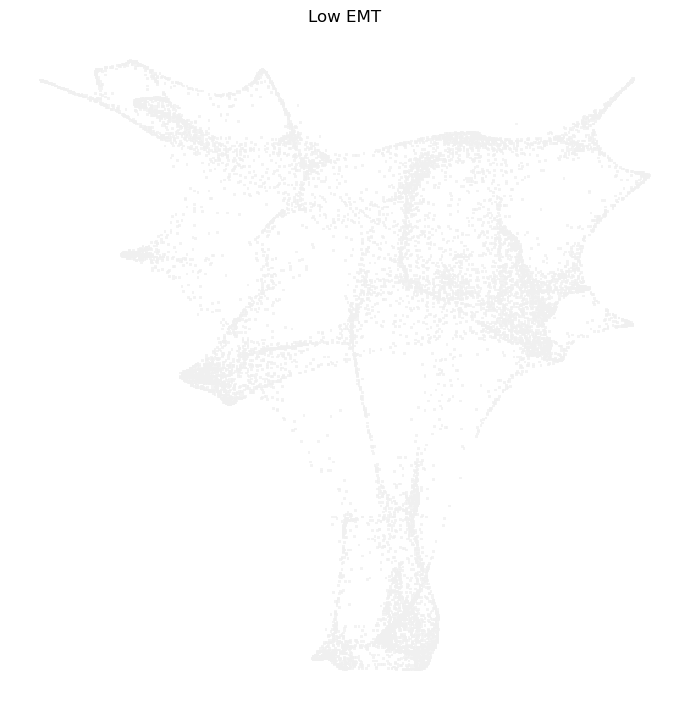

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis(name)>

In [96]:
# Visualize trajectories
trajectory_dropdown = widgets.Dropdown(
    options=trajectory_ds.var.index,
    description='Trajectory:'
)

_fate_ds = fate_ds


    

def update_trajectory_vis_snapshot_fate(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name][fate_ds.obs['day']==day].X.flatten()

def update_trajectory_vis(name):
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name].X.flatten()
    #binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975), cmap = cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('')
    cbar.ax.tick_params(labelsize=24)

widgets.interact(update_trajectory_vis, name=trajectory_dropdown)

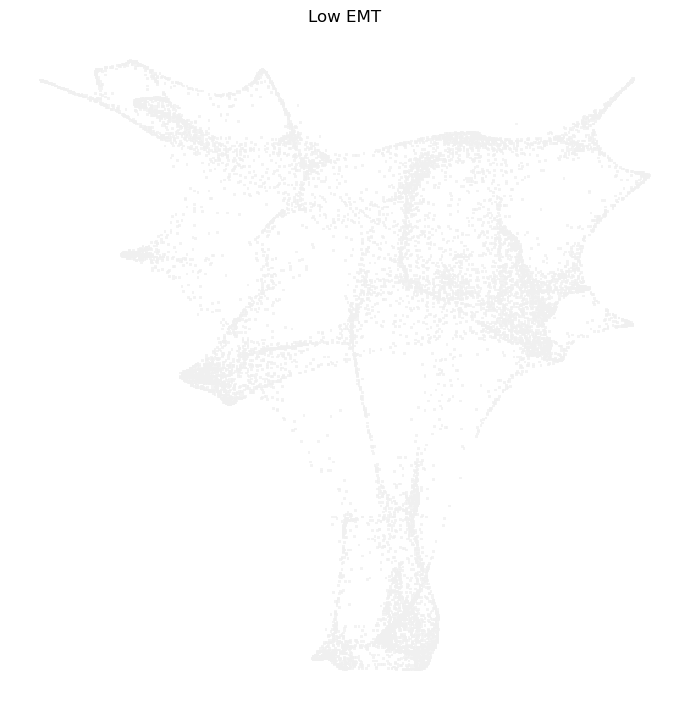

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis(name)>

In [97]:
# Visualize trajectories
trajectory_dropdown_total = widgets.Dropdown(
    options=trajectory_ds.var.index,
    description='Trajectory:'
)

def update_trajectory_vis(name):
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds.obs.copy()
    binned_df['values'] = trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975), cmap = cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis, name=trajectory_dropdown_total)

In [83]:
cell_set_L = cell_sets[:, "Low EMT"]
cell_set_M = cell_sets[:, "Medium EMT"]
cell_set_H = cell_sets[:, "High EMT"]
# Count the number of 1s
count_L = np.count_nonzero(cell_set_L.X == 1.)
count_M = np.count_nonzero(cell_set_M.X == 1.)
count_H = np.count_nonzero(cell_set_H.X == 1.)
print(count_L, count_M, count_H)

589 556 746


In [84]:
# Create a dictionary with EMT types and corresponding counts
data_cellset = {'EMT Type': ['Low EMT', 'Medium EMT', 'High EMT'], 
        'Count': [count_L, count_M, count_H]}

# Define a DataFrame
df_cellset = pd.DataFrame(data_cellset)

print(df_cellset)

     EMT Type  Count
0     Low EMT    589
1  Medium EMT    556
2    High EMT    746


In [85]:
cell_number = df_cellset.loc[df_cellset['EMT Type'] == "Low EMT", 'Count'].values[0]
cell_number

589

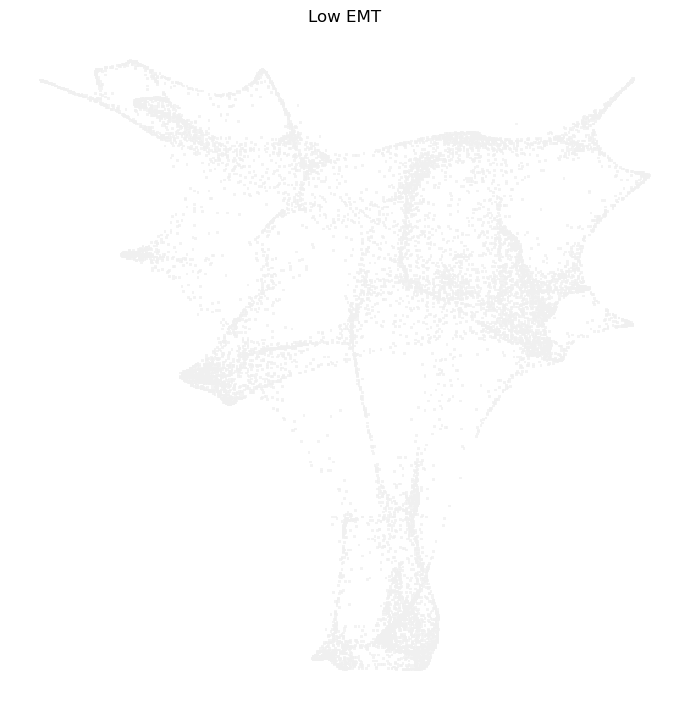

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot(name, day)>

In [98]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis_snapshot(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis_snapshot, name=trajectory_dropdown, day=day_dropdown)

In [87]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis_snapshot_group(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    cell_number = df_cellset.loc[df_cellset['EMT Type'] == name, 'Count'].values[0]
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df['values'] = binned_df['values']*cell_number
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.9), cmap=cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=14)

widgets.interact(update_trajectory_vis_snapshot_group, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot_group(name, day)>

In [88]:
fate_ds.X

array([[0.2233773 , 0.14193709, 0.63468564],
       [0.2880888 , 0.5899268 , 0.12198443],
       [0.28182805, 0.5240032 , 0.19416875],
       ...,
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]], dtype=float32)

In [89]:
import numpy as np

# assuming fate_ds.X is your array
array = fate_ds.X

# check all values are not larger than 1
check = np.all(array <= 1)

print(check)

True


In [88]:
fate_ds[:, "Low EMT"][fate_ds.obs['day']== 1].X.flatten()

ArrayView([0.14151868, 0.18105148, 0.08221862, ..., 0.83962196,
           0.14091812, 0.41172817], dtype=float32)

In [89]:
# Group by 'x' and count unique IDs for each 'x' value
id_counts = coord_df.groupby('y').nunique()

# Print the result
print(id_counts)


      x
y      
0    16
1    26
2    24
3    25
4    25
..   ..
495   8
496   9
497   9
498   8
499   1

[495 rows x 1 columns]


In [90]:
_fate_ds = fate_ds

day_dropdown = widgets.Dropdown(
    options=_fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


    

def update_trajectory_vis_snapshot_fate(name, day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day']==day]
    figure = plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = fate_ds[:, name][fate_ds.obs['day']==day].X.flatten()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(1), cmap=cmap)
    cbar = plt.colorbar()
    cbar.ax.set_title('Trajectory')
    cbar.ax.tick_params(labelsize=20)
    max_value = binned_df['values'].max()
    print(max_value)

widgets.interact(update_trajectory_vis_snapshot_fate, name=trajectory_dropdown, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('Low EMT', 'High EMT', 'Medium EMT'), value…

<function __main__.update_trajectory_vis_snapshot_fate(name, day)>

# Compute heterogeneity

In [8]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import scanpy as sc


In [21]:
adata = wot.io.read_dataset(VAR_DS_PATH, obs=[days_df])


In [22]:
# Transpose adata.X to align the gene expression data with the cells
gene_expr_data = adata.X

# Convert the gene expression data to a DataFrame
gene_expr_df = pd.DataFrame(gene_expr_data, index=adata.obs.index, columns=adata.var.index)

# Sort the DataFrame by the cell IDs to align it with trajectory_ds
gene_expr_df = gene_expr_df.sort_index()

In [23]:
import anndata

# Verify that the cell IDs in gene_expr_df and trajectory_ds are now aligned
assert all(gene_expr_df.index == trajectory_ds.obs.index)

# Create a new .obs DataFrame by concatenating trajectory_ds.obs with gene_expr_df
merged_obs = pd.concat([trajectory_ds.obs, gene_expr_df], axis=1)

# Create a new Anndata object with the original .X and .var from trajectory_ds, and the new .obs
new_trajectory_ds = anndata.AnnData(X=trajectory_ds.X, obs=merged_obs, var=trajectory_ds.var)


In [24]:
# Get the list of gene columns (exclude 'day', 'x' and 'y')
gene_columns = [col for col in new_trajectory_ds.obs.columns if col not in ['day', 'x', 'y']]

In [25]:
# Get the gene expression data of the cells of interest
gene_expression_data = cells_of_interest.obs[gene_columns].to_numpy()

NameError: name 'cells_of_interest' is not defined

In [128]:
# Read genes from the .txt file
with open("Desktop/EMT_Optimal_Transport/EMT_76signature_cleaned.txt", "r") as f:
    genes = f.read().splitlines()

# Filter genes that are also in the DataFrame
gene_columns_set = [gene for gene in genes if gene in new_trajectory_ds.obs.columns]

# Find genes that are not in the DataFrame
unused_genes = [gene for gene in genes if gene not in new_trajectory_ds.obs.columns]

# Print the number of genes and unused genes
print("Number of genes:", len(gene_columns_set))
print("Number of unused genes:", len(unused_genes))

# Print the unused genes
print("Unused genes:", unused_genes)


Number of genes: 72
Number of unused genes: 10
Unused genes: ['LIX1L', 'C3orf21', 'GALNT5', 'MTAC2D1', 'LRRC54', 'GRHL2', 'RBM35A', 'TMEM3OB', 'TACSTD1', 'XXYLT1']


In [133]:
# Define the file paths
file_path_1 = 'Desktop/EMT_Optimal_Transport/top_genes_day8_H_to_M_36_fold.txt'
file_path_2 = 'Desktop/EMT_Optimal_Transport/top_genes_day8_M_to_H_36_fold.txt'

# Read the gene names from the first file
with open(file_path_1, 'r') as file:
    gene_names_1 = file.read().splitlines()

# Read the gene names from the second file
with open(file_path_2, 'r') as file:
    gene_names_2 = file.read().splitlines()

# Combine the gene names from both files
combined_gene_names = list(set(gene_names_1 + gene_names_2))

# Filter genes that are also in the DataFrame
gene_columns_set = [gene for gene in combined_gene_names if gene in new_trajectory_ds.obs.columns]

# Find genes that are not in the DataFrame
unused_genes = [gene for gene in combined_gene_names if gene not in new_trajectory_ds.obs.columns]

# Print the number of genes and unused genes
print("Number of genes:", len(gene_columns_set))
print("Number of unused genes:", len(unused_genes))

# Print the unused genes
print("Unused genes:", unused_genes)

Number of genes: 72
Number of unused genes: 0
Unused genes: []


   Day  T-statistic       P-value
0  0.0    -2.553690  1.068594e-02
1  1.0    -2.880827  3.985544e-03
2  2.0    -3.686484  2.300061e-04
3  3.0    -1.342915  1.793725e-01
4  4.0    -5.335655  1.060569e-07
5  8.0    -4.490821  7.312751e-06


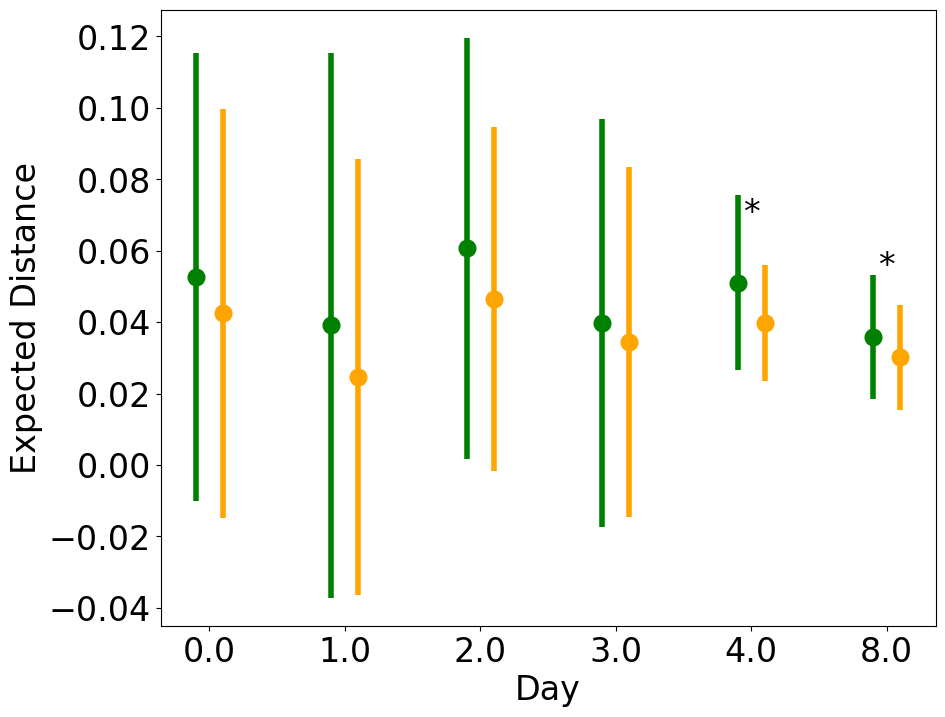

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import t

# Assuming new_trajectory_ds and gene_columns_set are already defined
EMT_states = ["High EMT", "Medium EMT"]
results = []

%matplotlib inline

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns_set].to_numpy()

        # Compute the pairwise distances
        pairwise_distances = distance.squareform(distance.pdist(gene_expression_data, metric='euclidean'))

        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])

# Compute t-statistics and p-values
days = df['Day'].unique()
t_test_results = []

for day in days:
    high_emt_data = df[(df['EMT State'] == 'High EMT') & (df['Day'] == day)]
    medium_emt_data = df[(df['EMT State'] == 'Medium EMT') & (df['Day'] == day)]
    
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]

    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    # Compute the standard error of the difference between the means
    se_diff = np.sqrt(var_high_emt / n_high_emt + var_medium_emt / n_medium_emt)
    
    # Compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / se_diff

    # Degrees of freedom for the t-test
    df_test = (var_high_emt / n_high_emt + var_medium_emt / n_medium_emt) ** 2 / \
              ((var_high_emt / n_high_emt) ** 2 / (n_high_emt - 1) + (var_medium_emt / n_medium_emt) ** 2 / (n_medium_emt - 1))

    # Compute the p-value for the two-tailed test
    p_value = 2 * t.sf(np.abs(t_stat), df_test)
    
    t_test_results.append([day, t_stat, p_value])

# Create a DataFrame from the t-test results
t_test_df = pd.DataFrame(t_test_results, columns=['Day', 'T-statistic', 'P-value'])
print(t_test_df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

r1 = np.arange(len(df['Day'].unique()))
offsets = [0.1, -0.1]
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(state_data))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

# Define significance thresholds
significance_levels = [(1e-12, '***'), (1e-8, '**'), (1e-4, '*')]

# Add significance asterisks
for result in t_test_results:
    day, t_stat, p_value = result
    stars = ''
    for threshold, symbol in significance_levels:
        if p_value < threshold:
            stars = symbol
            break
    if stars:
        day_index = np.where(df['Day'].unique() == day)[0][0]
        high_emt_y = df[(df['Day'] == day) & (df['EMT State'] == 'High EMT')]['Expected Distance'].values[0]
        medium_emt_y = df[(df['Day'] == day) & (df['EMT State'] == 'Medium EMT')]['Expected Distance'].values[0]
        max_y = max(high_emt_y, medium_emt_y)
        ax.text(day_index, max_y + 0.015, stars, ha='center', va='bottom', color='black', fontsize=24)  # Adjusted position

ax.set_xlabel('Day', fontsize=24)
ax.set_ylabel('Expected Distance', fontsize=24)
ax.set_xticks(r1, df['Day'].unique())
ax.tick_params(labelsize=24)

plt.show()



   Day  T-statistic       P-value
0  0.0    -8.550345  1.574249e-17
1  1.0     1.108849  2.675532e-01
2  2.0    -3.766455  1.675901e-04
3  3.0    -3.778172  1.601573e-04
4  4.0     1.050473  2.936306e-01
5  8.0     5.374621  8.279029e-08


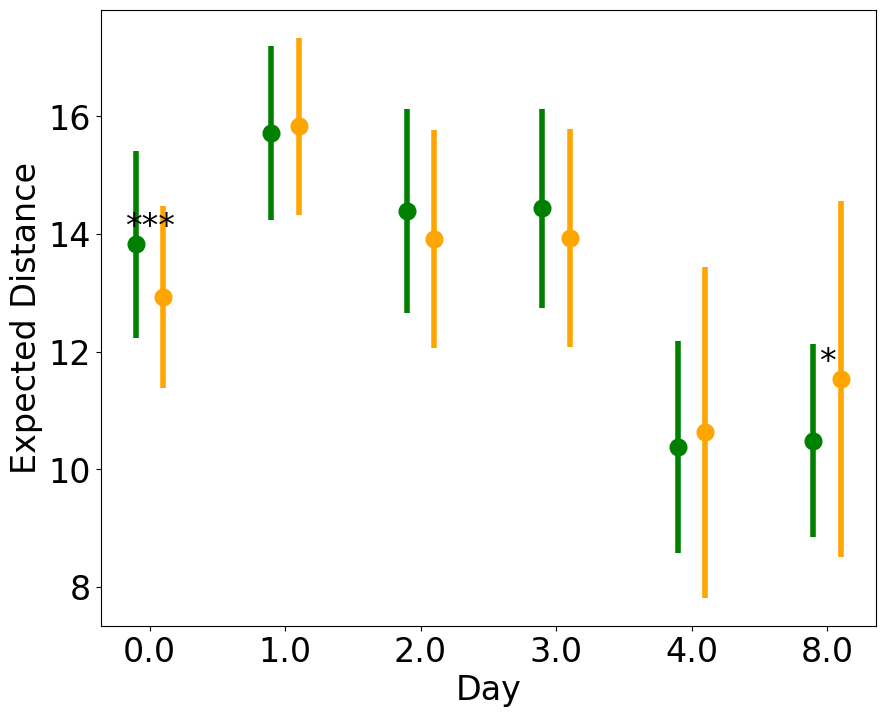

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import t
from sklearn.decomposition import PCA

# Assuming new_trajectory_ds and gene_columns_set are already defined
EMT_states = ["High EMT", "Medium EMT"]
results = []

%matplotlib inline

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns].to_numpy()

        # Create PCA object
        pca = PCA(n_components=72)  # n_components refers to the number of dimensions you want to reduce to

        # Fit and transform the data to the PCA
        reduced_gene_expression_data = pca.fit_transform(gene_expression_data)

        # Compute the pairwise distances with the reduced data
        pairwise_distances = distance.squareform(distance.pdist(reduced_gene_expression_data, metric='euclidean'))

        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])

# Compute t-statistics and p-values
days = df['Day'].unique()
t_test_results = []

for day in days:
    high_emt_data = df[(df['EMT State'] == 'High EMT') & (df['Day'] == day)]
    medium_emt_data = df[(df['EMT State'] == 'Medium EMT') & (df['Day'] == day)]
    
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]

    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    # Compute the standard error of the difference between the means
    se_diff = np.sqrt(var_high_emt / n_high_emt + var_medium_emt / n_medium_emt)
    
    # Compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / se_diff

    # Degrees of freedom for the t-test
    df_test = (var_high_emt / n_high_emt + var_medium_emt / n_medium_emt) ** 2 / \
              ((var_high_emt / n_high_emt) ** 2 / (n_high_emt - 1) + (var_medium_emt / n_medium_emt) ** 2 / (n_medium_emt - 1))

    # Compute the p-value for the two-tailed test
    p_value = 2 * t.sf(np.abs(t_stat), df_test)
    
    t_test_results.append([day, t_stat, p_value])

# Create a DataFrame from the t-test results
t_test_df = pd.DataFrame(t_test_results, columns=['Day', 'T-statistic', 'P-value'])
print(t_test_df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

r1 = np.arange(len(df['Day'].unique()))
offsets = [0.1, -0.1]
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(state_data))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

# Define significance thresholds
significance_levels = [(1e-12, '***'), (1e-8, '**'), (1e-4, '*')]

# Add significance asterisks
for result in t_test_results:
    day, t_stat, p_value = result
    stars = ''
    for threshold, symbol in significance_levels:
        if p_value < threshold:
            stars = symbol
            break
    if stars:
        day_index = np.where(df['Day'].unique() == day)[0][0]
        high_emt_y = df[(df['Day'] == day) & (df['EMT State'] == 'High EMT')]['Expected Distance'].values[0]
        medium_emt_y = df[(df['Day'] == day) & (df['EMT State'] == 'Medium EMT')]['Expected Distance'].values[0]
        max_y = max(high_emt_y, medium_emt_y)
        ax.text(day_index, max_y + 0.015, stars, ha='center', va='bottom', color='black', fontsize=24)  # Adjusted position

ax.set_xlabel('Day', fontsize=24)
ax.set_ylabel('Expected Distance', fontsize=24)
ax.set_xticks(r1, df['Day'].unique())
ax.tick_params(labelsize=24)

plt.show()



In [816]:
# Step 1: Load the genes you want to exclude
with open("Desktop/EMT_Optimal_Transport/top_genes_day8.txt", "r") as file:
    exclude_genes = file.read().splitlines()

# Step 2: Create a new list that excludes these genes
gene_columns_ex = [gene for gene in gene_columns if gene not in exclude_genes]
print(len(gene_columns))
print(len(gene_columns_ex))

15000
14928


    Day   EMT State  Expected Distance   Variance  N_Samples
0   0.0    High EMT          28.255901  14.504386       2734
1   0.0  Medium EMT          28.399692  15.055068       2734
2   1.0    High EMT          36.314138  11.807439       2303
3   1.0  Medium EMT          36.328877  10.939412       2303
4   2.0    High EMT          25.415645  18.114890       2381
5   2.0  Medium EMT          26.387443  15.497685       2381
6   3.0    High EMT          28.445679  17.939688       2132
7   3.0  Medium EMT          29.183589  15.915531       2132
8   4.0    High EMT          16.655490  30.989751       1147
9   4.0  Medium EMT          17.201246  14.123087       1147
10  8.0    High EMT          18.547412  34.491854       1891
11  8.0  Medium EMT          18.934259  13.039790       1891


<IPython.core.display.Javascript object>


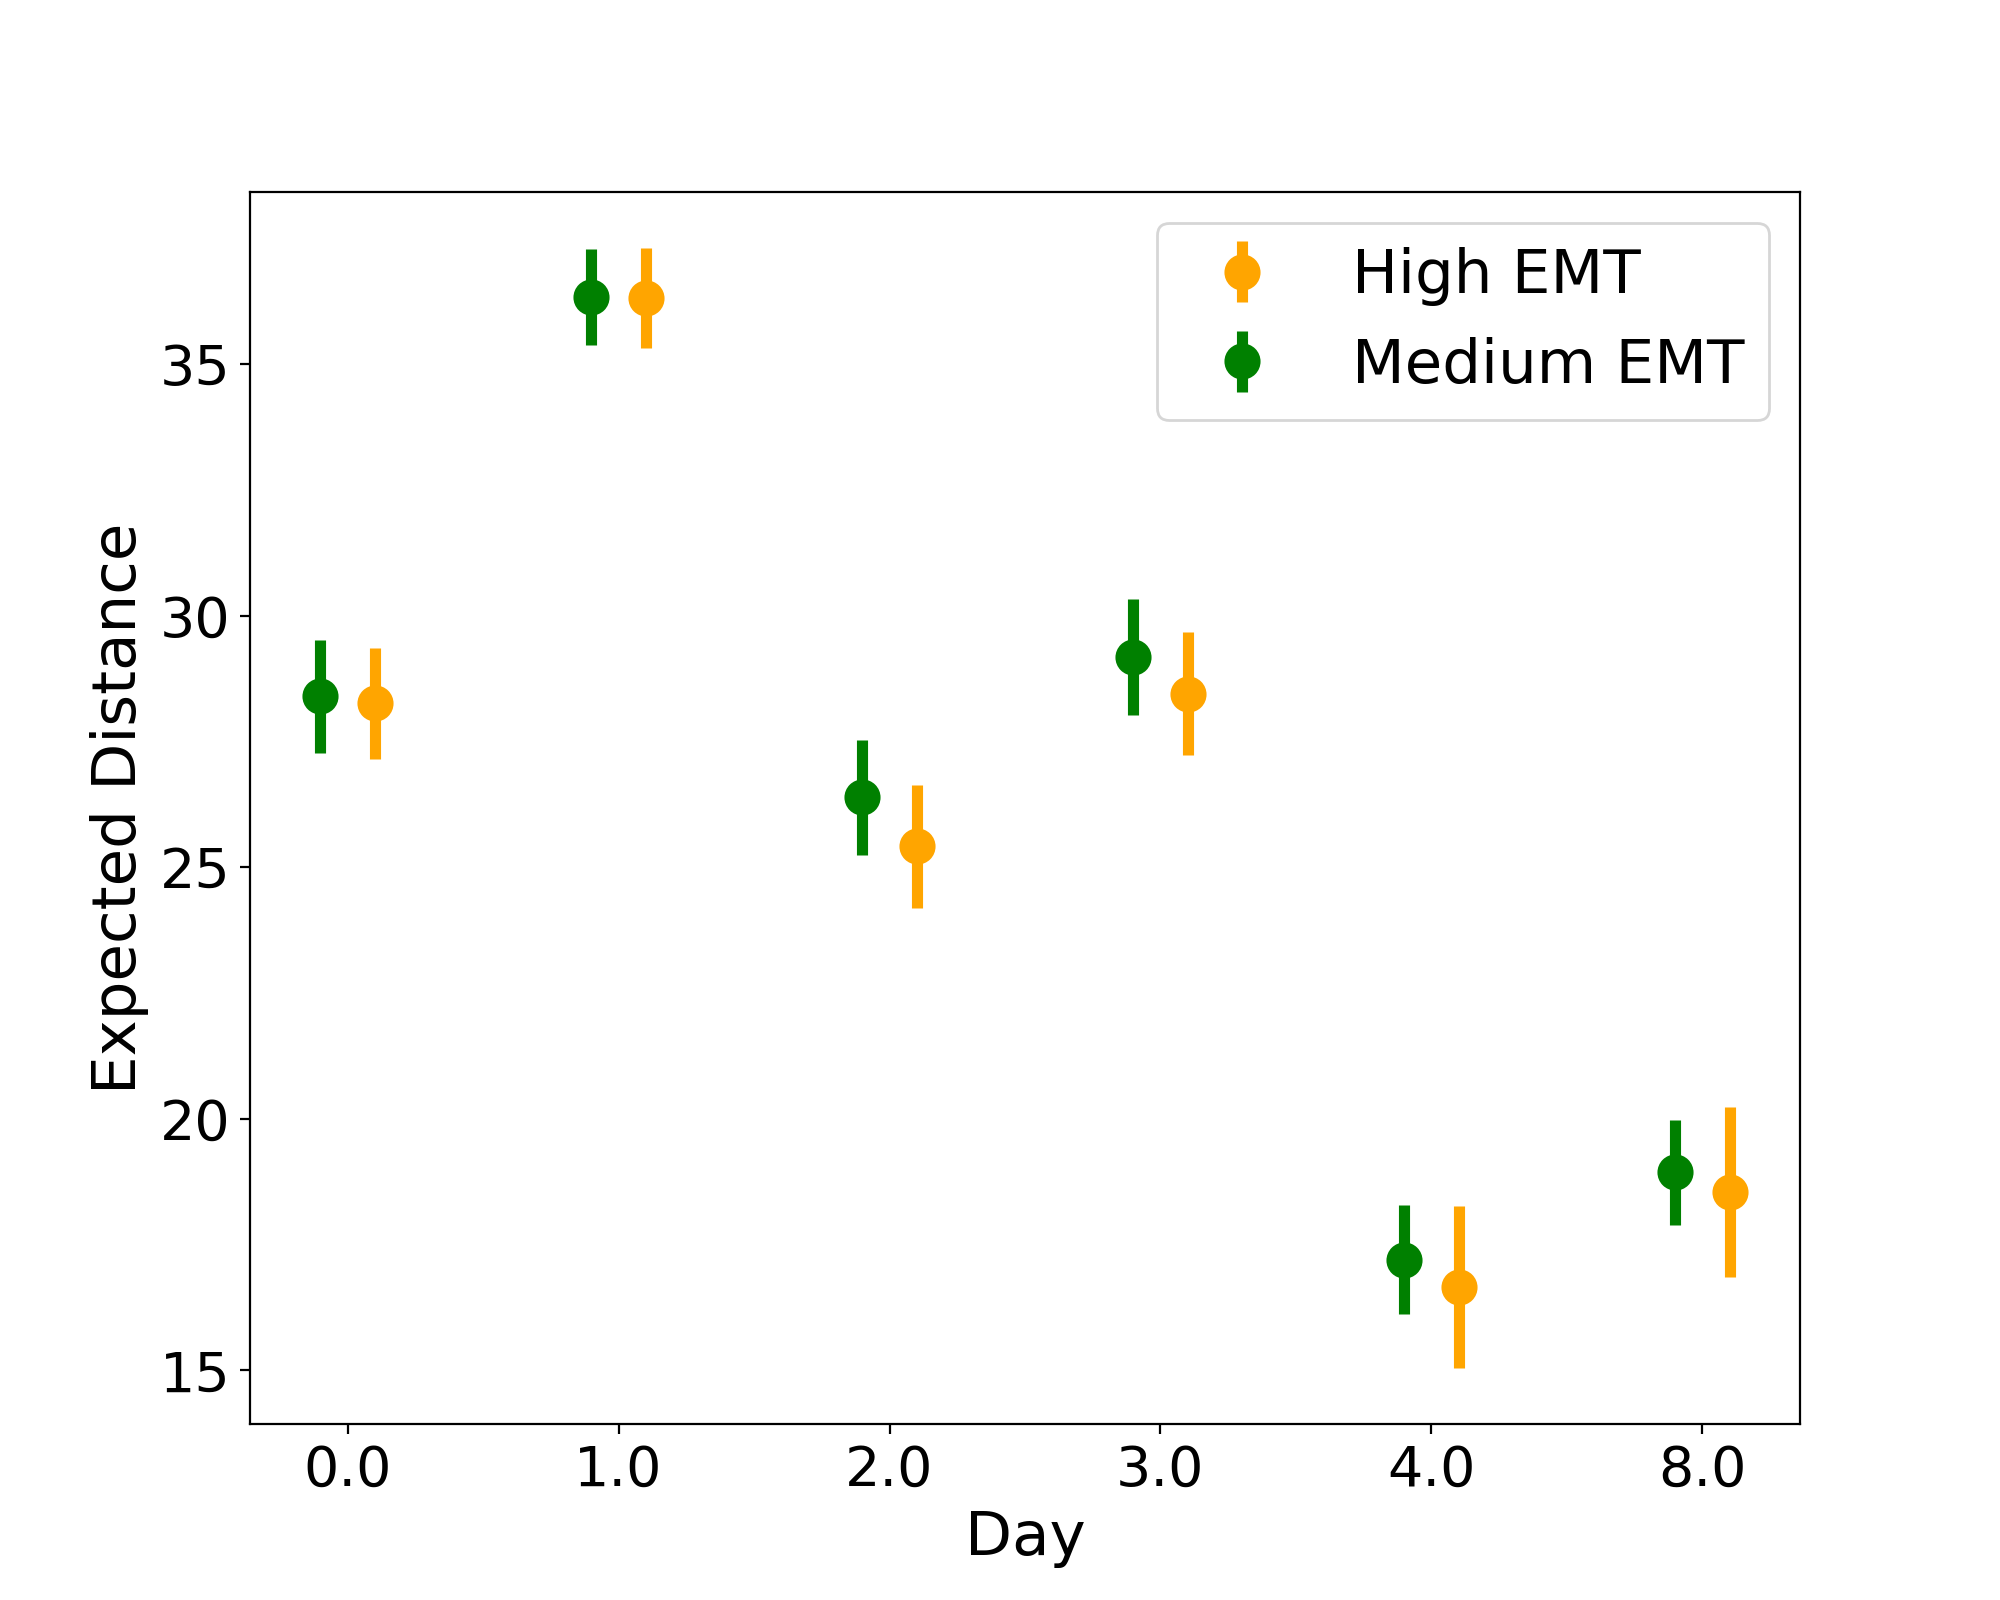

In [817]:
EMT_states = ["High EMT", "Medium EMT"]
results = []

for day in new_trajectory_ds.obs['day'].unique():
    for EMT_state in EMT_states:
        cells_of_interest = new_trajectory_ds[new_trajectory_ds.obs['day'] == day]

        # Get the gene expression data of the cells of interest
        gene_expression_data = cells_of_interest.obs[gene_columns_ex].to_numpy()

        # Compute the pairwise distances
        pairwise_distances = distance.squareform(distance.pdist(gene_expression_data, metric='euclidean'))

        # Get the weights for the cells of interest
        weights = cells_of_interest[:, EMT_state].X.flatten()

        # Compute the pairwise weights
        pairwise_weights = np.outer(weights, weights)

        # Compute the weighted pairwise distances
        weighted_distances = pairwise_distances * pairwise_weights

        # Compute the expected distance (mean)
        expected_distance = np.sum(weighted_distances) / np.sum(pairwise_weights)

        # Compute the variance
        variance = np.sum(pairwise_weights * (pairwise_distances - expected_distance) ** 2) / np.sum(pairwise_weights)

        # Get the number of samples (cells of interest)
        n_samples = len(cells_of_interest)

        # Add the result to the list
        results.append([day, EMT_state, expected_distance, variance, n_samples])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Day', 'EMT State', 'Expected Distance', 'Variance', 'N_Samples'])


# Print the DataFrame
print(df)

# Create error bar plots for mean and variance
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data
r1 = np.arange(len(df['Day'].unique()))

# Define a small offset for each state
offsets = [0.1, -0.1]

# Define colors for each state
colors = ["orange", "green"]

for offset, state, color in zip(offsets, EMT_states, colors):
    state_data = df[df['EMT State'] == state]
    mean = state_data['Expected Distance']
    stderr = np.sqrt(state_data['Variance'] / len(df))
    ax.errorbar(r1 + offset, mean, yerr=stderr, fmt='o', label=state, color=color, markersize=12, lw=4)

ax.set_xlabel('Day', fontsize = 22)
ax.set_ylabel('Expected Distance', fontsize = 22)
ax.set_xticks(r1, df['Day'].unique())
ax.legend(fontsize = 22)

plt.show()

In [286]:
from scipy.stats import t

# Make sure df is the DataFrame
result_df = df

days = result_df['Day'].unique()

for day in days:
    high_emt_data = result_df[(result_df['EMT State'] == 'High EMT') & (result_df['Day'] == day)]
    medium_emt_data = result_df[(result_df['EMT State'] == 'Medium EMT') & (result_df['Day'] == day)]
    
    # retrieve the statistics
    mean_high_emt = high_emt_data['Expected Distance'].values[0]
    var_high_emt = high_emt_data['Variance'].values[0]
    n_high_emt = high_emt_data['N_Samples'].values[0]


    mean_medium_emt = medium_emt_data['Expected Distance'].values[0]
    var_medium_emt = medium_emt_data['Variance'].values[0]
    n_medium_emt = medium_emt_data['N_Samples'].values[0]

    
    # compute the t-statistic
    t_stat = (mean_high_emt - mean_medium_emt) / np.sqrt(var_high_emt/n_high_emt + var_medium_emt/n_medium_emt)

    # compute the degrees of freedom
    df_test = n_high_emt + n_medium_emt - 2

    # compute the p-value
    p_value = 2 * t.sf(np.abs(t_stat), df_test)  # multiply by 2 for a two-tailed test

    print(f"Day {day} - T-statistic: {t_stat}, P-value: {p_value}")

Day 0.0 - T-statistic: 7.278261864786182, P-value: 3.859817598368882e-13
Day 1.0 - T-statistic: 11.47170561726688, P-value: 4.67069404481428e-30
Day 2.0 - T-statistic: 5.698958753099683, P-value: 1.2780440463089144e-08
Day 3.0 - T-statistic: 4.161690325387364, P-value: 3.2213271374200446e-05
Day 4.0 - T-statistic: -0.5690149545729938, P-value: 0.569401743934564
Day 8.0 - T-statistic: 7.919115324800318, P-value: 3.1192492316064814e-15


# DEGs at day 8

In [230]:
df_day8 = new_trajectory_ds[new_trajectory_ds.obs['day'] == 8]
df_day8 = df_day8.obs[gene_columns]
df_day8

PI3    S100A9    SPRR1B    S100A8    SPRR2D  \
MCF10A_t8_AAACCTGAGACTTGAA -0.005449  0.188992 -0.008123  0.183889 -0.023266   
MCF10A_t8_AAACCTGAGCGAAGGG  0.328056  0.461032 -0.011410  0.398379 -0.034881   
MCF10A_t8_AAACCTGAGTCATGCT  0.041941  0.254332 -0.030064  0.109075  0.033308   
MCF10A_t8_AAACCTGCACGACTCG  0.001741  0.188483 -0.011839 -0.046259 -0.118541   
MCF10A_t8_AAACCTGCACGCCAGT  0.042004  0.370171 -0.014494  0.010320  0.110935   
...                              ...       ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT  0.027844  0.261889 -0.014105  0.003696  0.206323   
MCF10A_t8_TTTGTCACACCATCCT -0.007491  0.196476 -0.010899 -0.027554 -0.020066   
MCF10A_t8_TTTGTCAGTTCTGGTA  0.096796  0.366199  0.001003  0.015999 -0.012742   
MCF10A_t8_TTTGTCATCATTATCC  0.010040  0.227023 -0.033702  0.021100 -0.017801   
MCF10A_t8_TTTGTCATCTCCCTGA  0.222247  0.245423 -0.023247 -0.015292 -0.035302   

                               KLK10     KRT16  C15orf48     S100P      SAA1  \
MCF10A_t8_AAACCTGAGACTTGAA -0.027455  0.454099  0.235691  0.008205  0.796555   
MCF10A_t8_AAACCTGAGCGAAGGG -0.000684  0.329189  0.214191 -0.019196  0.090192   
MCF10A_t8_AAACCTGAGTCATGCT -0.006930  0.025981  0.044861 -0.002866  0.379721   
MCF10A_t8_AAACCTGCACGACTCG -0.013304  0.089057  0.129672 -0.014071  1.360818   
MCF10A_t8_AAACCTGCACGCCAGT -0.008792  0.179959  0.258383 -0.008736  0.875408   
...                              ...       ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT -0.052195  0.200157 -0.012267 -0.013381  0.174560   
MCF10A_t8_TTTGTCACACCATCCT -0.032288  0.363163  0.277319 -0.042165  0.869437   
MCF10A_t8_TTTGTCAGTTCTGGTA  0.127961  0.170084  0.300863 -0.005125  0.709902   
MCF10A_t8_TTTGTCATCATTATCC -0.074330 -0.034061  0.109705 -0.014751  0.472803   
MCF10A_t8_TTTGTCATCTCCCTGA -0.015363  0.240462  0.356671 -0.005205  0.083936   

                            ...    NOS1AP  SARDH     CPEB3  OBP2A  \
MCF10A_t8_AAACCTGAGACTTGAA  ...  0.001082    0.0  0.004907    0.0   
MCF10A_t8_AAACCTGAGCGAAGGG  ...  0.005732    0.0  0.000389    0.0   
MCF10A_t8_AAACCTGAGTCATGCT  ...  0.031106    0.0 -0.004887    0.0   
MCF10A_t8_AAACCTGCACGACTCG  ...  0.006322    0.0  0.005859    0.0   
MCF10A_t8_AAACCTGCACGCCAGT  ...  0.017946    0.0 -0.000713    0.0   
...                         ...       ...    ...       ...    ...   
MCF10A_t8_TTTGGTTTCTTGTACT  ...  0.002139    0.0  0.000918    0.0   
MCF10A_t8_TTTGTCACACCATCCT  ...  0.011020    0.0 -0.000119    0.0   
MCF10A_t8_TTTGTCAGTTCTGGTA  ...  0.146796    0.0 -0.005438    0.0   
MCF10A_t8_TTTGTCATCATTATCC  ...  0.024216    0.0  0.010486    0.0   
MCF10A_t8_TTTGTCATCTCCCTGA  ...  0.004618    0.0  0.000000    0.0   

                            RP11-80H5.9     TUBG1      FGF8     SBNO2  \
MCF10A_t8_AAACCTGAGACTTGAA          0.0  0.446758  0.000000  0.138820   
MCF10A_t8_AAACCTGAGCGAAGGG          0.0  0.234605  0.000000  0.249741   
MCF10A_t8_AAACCTGAGTCATGCT          0.0  0.527545  0.000000  0.306262   
MCF10A_t8_AAACCTGCACGACTCG          0.0  1.406358  0.000000  0.070377   
MCF10A_t8_AAACCTGCACGCCAGT          0.0  0.610582  0.000000  0.099562   
...                                 ...       ...       ...       ...   
MCF10A_t8_TTTGGTTTCTTGTACT          0.0  0.694703  0.000000  0.384899   
MCF10A_t8_TTTGTCACACCATCCT          0.0  0.393088  0.001373  0.143210   
MCF10A_t8_TTTGTCAGTTCTGGTA          0.0  0.646379  0.000000  0.133524   
MCF10A_t8_TTTGTCATCATTATCC          0.0  0.404170  0.000000  0.079026   
MCF10A_t8_TTTGTCATCTCCCTGA          0.0  0.368579  0.000000  0.102628   

                                NRG2  RP13-631K18.2  
MCF10A_t8_AAACCTGAGACTTGAA -0.007209            0.0  
MCF10A_t8_AAACCTGAGCGAAGGG -0.006398            0.0  
MCF10A_t8_AAACCTGAGTCATGCT  0.000000            0.0  
MCF10A_t8_AAACCTGCACGACTCG  0.013961            0.0  
MCF10A_t8_AAACCTGCACGCCAGT  0.009945            0.0  
...                              ...            ...  
MCF10A_t8_TTTGGTTTCTTGTACT 

In [231]:
import pandas as pd

# Convert the cell_sets AnnData object to a DataFrame
cell_sets_df = pd.DataFrame(cell_sets.X, index=cell_sets.obs.index, columns=cell_sets.var['description'])

# Merge the DataFrames
merged_df_day8 = df_day8.merge(cell_sets_df, left_index=True, right_index=True)
merged_df_day8.columns

Index(['PI3', 'S100A9', 'SPRR1B', 'S100A8', 'SPRR2D', 'KLK10', 'KRT16',
       'C15orf48', 'S100P', 'SAA1',
       ...
       'OBP2A', 'RP11-80H5.9', 'TUBG1', 'FGF8', 'SBNO2', 'NRG2',
       'RP13-631K18.2', 'Low EMT', 'High EMT', 'Medium EMT'],
      dtype='object', length=15003)

In [347]:
from scipy import stats

high_emt_df = merged_df_day8[merged_df_day8['High EMT'] == 1]
medium_emt_df = merged_df_day8[merged_df_day8['Medium EMT'] == 1]

# Get gene columns
gene_columns_DEG = [col for col in merged_df_day8.columns if col not in ['Low EMT', 'High EMT', 'Medium EMT']]

results = []

for gene in gene_columns_DEG:
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(medium_emt_df[gene], high_emt_df[gene])
    
    # Calculate the fold change
    if high_emt_df[gene].mean() == 0 or medium_emt_df[gene].mean() == 0:
        fold_change = np.nan
    else:
        fold_change = medium_emt_df[gene].mean() / high_emt_df[gene].mean()

    # Append the result to the list
    results.append([gene, t_stat, p_val, fold_change])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value', 'Fold Change'])

# Print the results
print(results_df)


                Gene  T-statistic       P-value  Fold Change
0                PI3     6.409338  2.039543e-10     2.046280
1             S100A9     5.587784  2.798524e-08     1.281438
2             SPRR1B     3.560895  3.829325e-04     6.294333
3             S100A8     2.190874  2.863790e-02     1.304056
4             SPRR2D     0.984064  3.252669e-01     1.420260
...              ...          ...           ...          ...
14995          TUBG1   -11.741803  2.490899e-30     0.712452
14996           FGF8    -0.970651  3.319029e-01          NaN
14997          SBNO2    -2.949051  3.244500e-03     0.874189
14998           NRG2    -5.209783  2.196383e-07    -0.758938
14999  RP13-631K18.2          NaN           NaN          NaN

[15000 rows x 4 columns]


In [348]:
# Exclude nan values in Fold Change
results_df = results_df[~results_df['Fold Change'].isna()]

# Filter DataFrame to include only rows with P-value < 1e-8
results_df_fold = results_df[results_df['P-value'] < 1e-7]

# Sort the filtered DataFrame by Fold Change in descending order and take the top 31 genes
top_genes_df = results_df_fold.sort_values(by='Fold Change', ascending=False).head(36)

print(top_genes_df.to_string())






                Gene  T-statistic       P-value  Fold Change
4118    RP5-1185I7.1    11.604682  1.071768e-29  2688.833361
5172    RP11-624M8.1     9.918170  2.117174e-22  1746.370614
9814         CREB3L1     8.325443  2.104192e-16  1685.128318
9749           CDKL4    13.343261  3.704455e-38  1419.233104
2839           CLDN6    11.848833  7.899196e-31  1087.517552
13519           GDF5     6.493131  1.193515e-10  1084.484418
13201  RP11-1078H9.5    10.391302  2.367119e-24   964.035491
7043           NR5A2   -15.225729  2.695803e-48   649.147879
2590    RP11-166B2.8     5.751992  1.098373e-08   556.383024
2458        TNFRSF14     6.460892  1.467841e-10   383.251081
2151            GJA1     9.541110  6.702070e-21   325.257688
3288            VAX2    10.412863  1.920809e-24   315.465631
3972       LINC00565     8.134983  9.537010e-16   301.626479
4595         SCGB2A1     7.596258  5.801184e-14   251.805709
14622      SSBP3-AS1     6.806893  1.518815e-11   217.058580
13156   RP11-468E2.6    

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


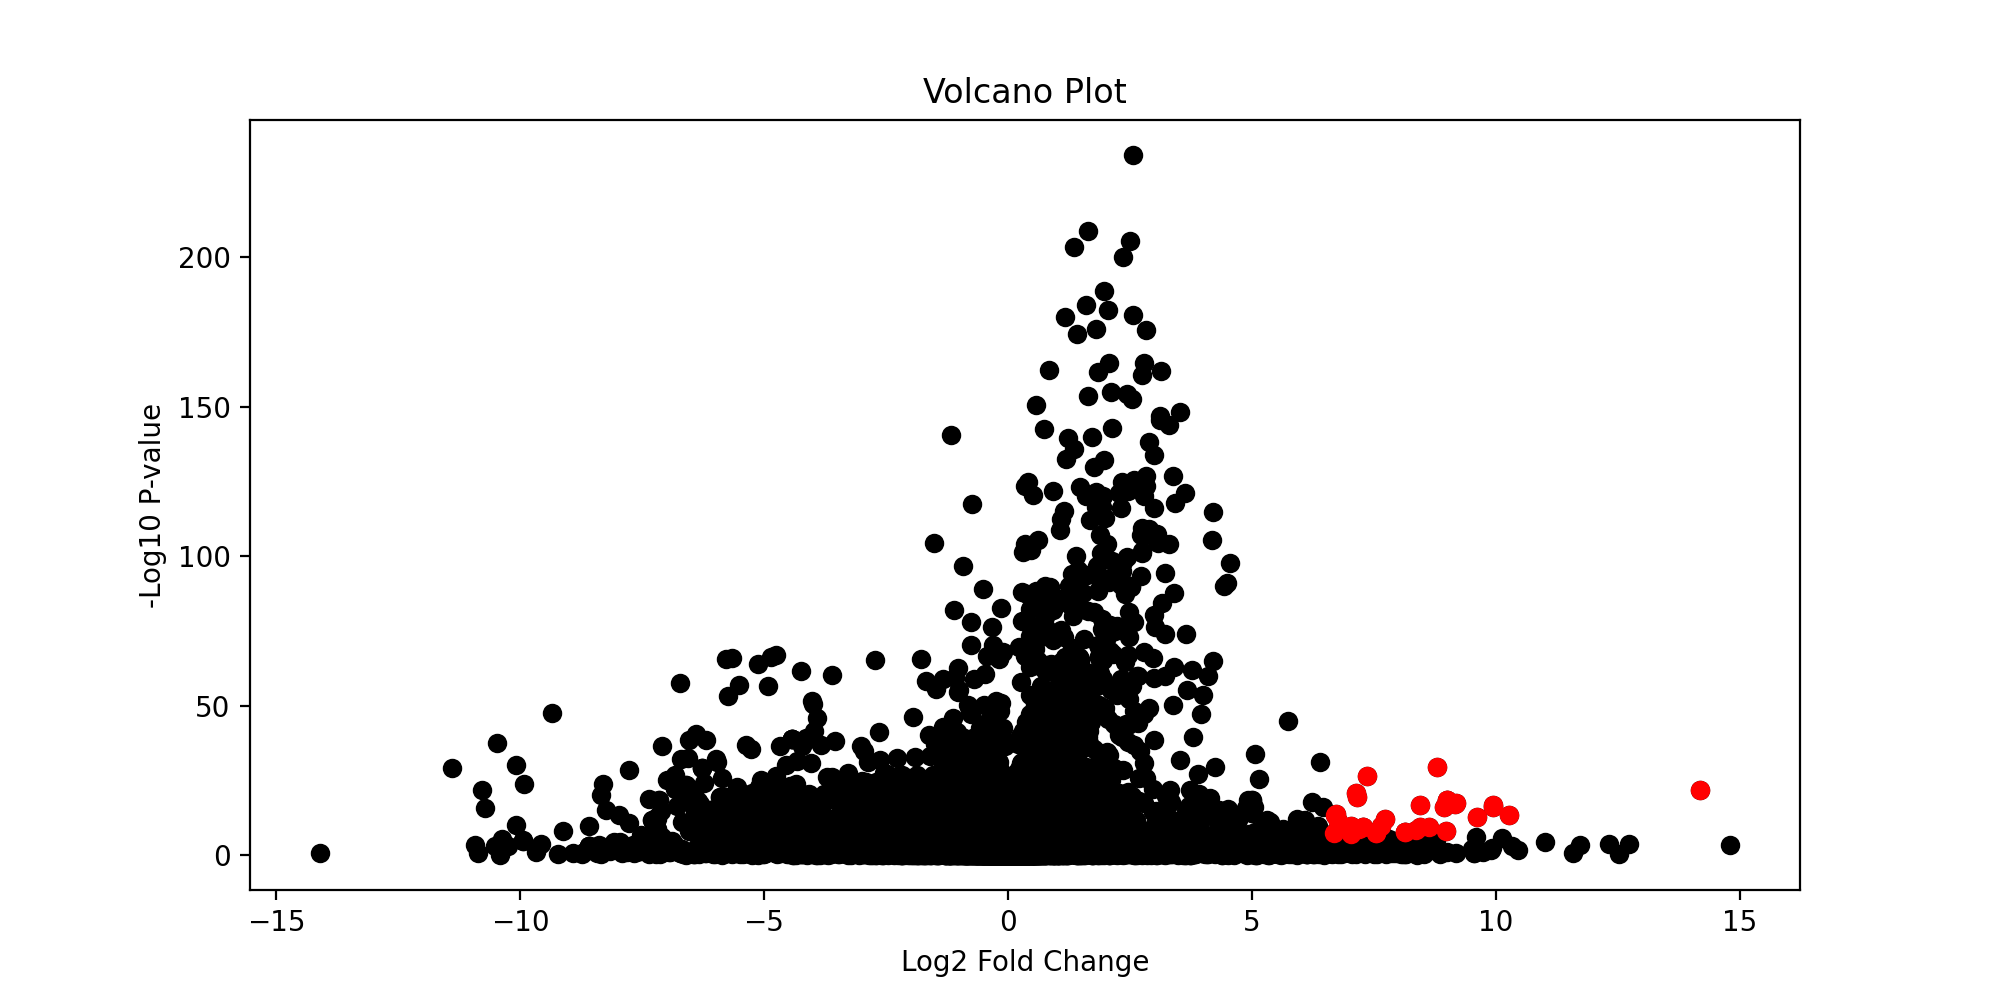

In [342]:
import matplotlib.pyplot as plt
import numpy as np

# Taking -log10 of P-value
results_df['-log10Pvalue'] = -np.log10(results_df['P-value'])

# Taking log2 of Fold Change
results_df['log2FoldChange'] = np.log2(results_df['Fold Change'])

plt.figure(figsize=(10, 5))
plt.scatter(results_df['log2FoldChange'], results_df['-log10Pvalue'], color='black')
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')

# Highlight genes that are in the top 72 genes by P-value
top_genes = top_genes_df['Gene']
is_top_gene = results_df['Gene'].isin(top_genes)
plt.scatter(results_df[is_top_gene]['log2FoldChange'], results_df[is_top_gene]['-log10Pvalue'], color='red')

plt.show()


In [343]:
# Write gene names to a .txt file
top_genes_df['Gene'].to_csv('Desktop/EMT_Optimal_Transport/top_genes_day8_H_to_M_36_pvalue.txt', index=False, header=False)


In [256]:
# Read the list of genes to exclude from the .txt file
with open('Desktop/EMT_Optimal_Transport/EMT_76signature_cleaned.txt', 'r') as file:
    exclude_genes = file.read().splitlines()

# Filter out the genes to exclude from results_df
filtered_df = results_df[results_df['Gene'].isin(exclude_genes)]

# Filter out genes with p<0.05 and fold change > 1
filtered_df = filtered_df[(filtered_df['P-value'] < 0.05) & (filtered_df['Fold Change'] > 1)]

#complement_df = filtered_df[~((filtered_df['P-value'] < 0.05) & (filtered_df['Fold Change'] > 1))]


# Now you can proceed with your further analysis on this filtered_df DataFrame
print(filtered_df.to_string())
print(complement_df.to_string())

# Number of genes in the filtered DataFrame
num_genes = filtered_df.shape[0]
#num_genes_c = complement_df.shape[0]

print("Number of genes in the filtered DataFrame: ", num_genes)
#print("Number of genes in the complement_df DataFrame: ", num_genes_c)

complement_df['Gene'].to_csv('Desktop/EMT_Optimal_Transport/top_genes_day8_not_M_to_H_EMT.txt', index=False, header=False)



          Gene  T-statistic       P-value  Fold Change  -log10Pvalue  log2FoldChange
88        MAL2    -5.821510  7.338594e-09     1.550910      8.134387        0.633115
223      EPCAM    -4.842747  1.434206e-06     1.762777      5.843389        0.817850
377       ST14    -4.009619  6.427576e-05     1.278071      4.191953        0.353968
754       KLC3    -3.601411  3.284193e-04     1.315223      3.483571        0.395307
823      MPZL2    -6.133019  1.142082e-09     1.667470      8.942303        0.737661
1023       AXL    -8.649539  1.499363e-17     1.581061     16.824093        0.660893
1102   SERINC2    -2.633021  8.563255e-03     1.069266      2.067361        0.096621
1730   ANKRD22    -2.342856  1.928691e-02     7.890852      1.714737        2.980181
1768    GALNT3    -7.362765  3.185890e-13     1.497011     12.496769        0.582085
1949      NRP1    -3.256875  1.155529e-03     1.162890      2.937219        0.217715
2256      MPP7    -3.762141  1.759624e-04     3.137086      3.754

NameError: name 'complement_df' is not defined

# Inference of the trajectories (descendents) of each group of cells at day 0

In [83]:
cell_sets_day0 = wot.io.read_sets(CELL_SETS_PATH_day0, as_dict=True)

/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [50]:
cell_sets_day0

{'A': ['MCF10A_t0_AAACCCAAGCCACAAG',
  'MCF10A_t0_AAACCCACATGGTGGA',
  'MCF10A_t0_AAACCCAGTTAAGGAT',
  'MCF10A_t0_AAACGAACACCACTGG',
  'MCF10A_t0_AAAGAACCACGTGAGA',
  'MCF10A_t0_AAAGAACTCATGAAAG',
  'MCF10A_t0_AAAGGATTCAAGAATG',
  'MCF10A_t0_AAAGGGCGTCTGTGGC',
  'MCF10A_t0_AAAGGGCTCTCGGCTT',
  'MCF10A_t0_AAAGGTAAGACATAAC',
  'MCF10A_t0_AAAGGTAAGGTCGTGA',
  'MCF10A_t0_AAAGGTAAGGTGCTTT',
  'MCF10A_t0_AAAGGTAGTGTGTTTG',
  'MCF10A_t0_AAAGGTATCCGTATAG',
  'MCF10A_t0_AAAGTCCTCAGGAGAC',
  'MCF10A_t0_AAAGTGAGTCTCACGG',
  'MCF10A_t0_AACAAAGCACCGTGCA',
  'MCF10A_t0_AACAAAGCAGCTTCCT',
  'MCF10A_t0_AACAAAGTCCTAGCCT',
  'MCF10A_t0_AACAAAGTCGAATCCA',
  'MCF10A_t0_AACAACCGTACAGTAA',
  'MCF10A_t0_AACAACCGTACGGTTT',
  'MCF10A_t0_AACAAGAAGCAGCACA',
  'MCF10A_t0_AACAGGGCAGAAACCG',
  'MCF10A_t0_AACCAACGTCACTAGT',
  'MCF10A_t0_AACCAACGTCGTTATG',
  'MCF10A_t0_AACCACAGTCATAAAG',
  'MCF10A_t0_AACCACAGTCGTCAGC',
  'MCF10A_t0_AACCATGGTGCAGTGA',
  'MCF10A_t0_AACCCAAAGCCAGAGT',
  'MCF10A_t0_AACCCAATCTGACCCT',
  '

In [41]:
populations_day0 = tmap_model.population_from_cell_sets(cell_sets_day0, at_time=0)

In [42]:
trajectory_ds_day0 = tmap_model.trajectories(populations_day0)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [43]:
# Load embedding coordinates
trajectory_ds_day0.obs = trajectory_ds_day0.obs.join(coord_df)

In [44]:
# Visualize trajectories
trajectory_dropdown_day0 = widgets.Dropdown(
    options=trajectory_ds_day0.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0.obs.copy()
    binned_df['values'] = trajectory_ds_day0[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0, name=trajectory_dropdown_day0)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0(name)>

In [93]:
day_dropdown = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)

def update_trajectory_vis__day0_snapshot(name, day):
    _trajectory_ds = trajectory_ds_day0[trajectory_ds_day0.obs['day']==day]
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = _trajectory_ds.obs.copy()
    binned_df['values'] = _trajectory_ds[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis__day0_snapshot, name=trajectory_dropdown_day0, day=day_dropdown)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Dropdown(d…

<function __main__.update_trajectory_vis__day0_snapshot(name, day)>

# Compuate variances

In [1018]:
import scipy.stats as st

In [238]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def cv_compute_EMT(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)



def cv_compute_PNAS_stemness(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            #binned_df['values'] = trajectory_ds_temp[:, i].X
            binned_df['values'] = trajectory_ds_temp[:, i].X.flatten()
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(conf=0.95, loc=mean, scale=sem) 
    return(cv_EMT)


def cv_compute_single(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df[gene_single_scores_df['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_single_GRN(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_single_stem(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_stem[gene_single_scores_df_stem['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

def cv_compute_metabolism(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)


def cv_compute_HALLMARK(hallmark):
    cv_HALLMARK = {}
    for i in trajectory_ds_GS.var.index:
        cv_HALLMARK[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_temp = gene_set_scores_df[gene_set_scores_df['day'] == day]
            trajectory_ds_temp = trajectory_ds_GS[trajectory_ds_GS.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_HALLMARK[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_HALLMARK)


def cv_compute_AUCell(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_AU[gene_set_scores_df_AU['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values = values_gene, weights = weights_gene)
            mean = mean_std[0]
            sem = mean_std[1]/math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(alpha=0.95, loc=mean, scale=sem) 
    return(cv_EMT)

In [261]:
import scipy.stats as st
import math

def cv_compute_PNAS_stemness(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X.flatten()
            length = len(binned_df['values'])
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights_gene)
            mean = mean_std[0]
            sem = mean_std[1] / math.sqrt(length)
            cv_EMT[i][day] = st.norm.interval(confidence=0.95, loc=mean, scale=sem)
    return cv_EMT



In [273]:
gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == 1]['Benporath_ES2']

id
MCF10A_t1_AAACCCACAGTTGTCA    0.991873
MCF10A_t1_AAACCCAGTCCTCAGG   -1.458399
MCF10A_t1_AAACCCAGTGATTCAC   -1.356783
MCF10A_t1_AAACGAAAGATGAAGG   -0.574210
MCF10A_t1_AAACGAACAAACACCT   -1.588624
                                ...   
MCF10A_t1_TTTGATCGTCAACCAT   -1.716988
MCF10A_t1_TTTGGAGAGCGATGGT   -1.728970
MCF10A_t1_TTTGGAGAGGGTGAAA   -0.789253
MCF10A_t1_TTTGGAGGTATGATCC   -1.623919
MCF10A_t1_TTTGGTTAGAAGTATC   -1.685210
Name: Benporath_ES2, Length: 2303, dtype: float64

In [274]:
trajectory_ds[trajectory_ds.obs['day'] == 1][:, 'Low EMT'].X

ArrayView([[0.00025129],
           [0.00030275],
           [0.00015383],
           ...,
           [0.00080057],
           [0.00016076],
           [0.00062177]])

In [1019]:
import math

def cv_compute_PNAS_stemness(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            # Filter the dataframes based on the current day
            gene_set_scores_df_EMT_temp = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            
            # Prepare the weights for the calculation
            binned_df = trajectory_ds_temp.obs.copy()
            binned_df['values'] = trajectory_ds_temp[:, i].X.flatten()  # Ensure data is 1D
            length = len(binned_df['values'])
            
            # Extract values and weights for weighted mean and std calculation
            values_gene = gene_set_scores_df_EMT_temp[hallmark]
            weights_gene = binned_df['values']
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights_gene)
            
            # Compute mean and standard error of the mean
            mean = mean_std[0]
            sem = mean_std[1] / math.sqrt(length)
            
            # Manually calculate the 95% confidence interval
            z_score = 1.96  # Z-score for 95% confidence
            lower_bound = mean - z_score * sem
            upper_bound = mean + z_score * sem
            
            # Store the computed interval
            cv_EMT[i][day] = (lower_bound, upper_bound)
    
    return cv_EMT


In [1020]:

def cv_compute_EMT(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            weights = trajectory_ds_temp[:, i].X.flatten()  # Ensure data is 1D

            print(f"Day: {day}, Index: {i}")
            print(f"Weights shape: {weights.shape}, Values shape: {gene_set_scores_df_EMT_temp[hallmark].shape}")

            if len(weights) != len(gene_set_scores_df_EMT_temp[hallmark]):
                print("Error: Mismatched weights and values length.")
                continue

            values_gene = gene_set_scores_df_EMT_temp[hallmark].values
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights)
            
            mean = mean_std[0]
            std = mean_std[1]
            sem = std / math.sqrt(len(weights))

            # Print out mean, standard deviation, and standard error
            print(f"Mean: {mean}, Standard Deviation: {std}, Standard Error: {sem}")
            
            z_score = 1.96  # Z-score for 95% confidence
            lower_bound = mean - z_score * sem
            upper_bound = mean + z_score * sem

            cv_EMT[i][day] = (lower_bound, upper_bound)

    return cv_EMT



def cv_compute_PNAS_stemness(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            weights = trajectory_ds_temp[:, i].X.flatten()  # Ensure data is 1D

            print(f"Day: {day}, Index: {i}")
            print(f"Weights shape: {weights.shape}, Values shape: {gene_set_scores_df_EMT_temp[hallmark].shape}")

            if len(weights) != len(gene_set_scores_df_EMT_temp[hallmark]):
                print("Error: Mismatched weights and values length.")
                continue

            values_gene = gene_set_scores_df_EMT_temp[hallmark].values
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights)
            
            mean = mean_std[0]
            std = mean_std[1]
            sem = std / math.sqrt(len(weights))

            # Print out mean, standard deviation, and standard error
            print(f"Mean: {mean}, Standard Deviation: {std}, Standard Error: {sem}")
            
            z_score = 1.96  # Z-score for 95% confidence
            lower_bound = mean - z_score * sem
            upper_bound = mean + z_score * sem

            cv_EMT[i][day] = (lower_bound, upper_bound)

    return cv_EMT

def cv_compute_single_GRN(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            weights = trajectory_ds_temp[:, i].X.flatten()

            if len(weights) != len(gene_set_scores_df_EMT_temp[hallmark]):
                print(f"Error: Mismatched weights and values length on Day: {day}, Index: {i}")
                continue

            values_gene = gene_set_scores_df_EMT_temp[hallmark].values
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights)
            mean = mean_std[0]
            sem = mean_std[1] / math.sqrt(len(weights))

            z_score = 1.96
            lower_bound = mean - z_score * sem
            upper_bound = mean + z_score * sem

            # Store mean and bounds
            cv_EMT[i][day] = {'mean': mean, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

    return cv_EMT



def cv_compute_metabolism(hallmark):
    cv_EMT = {}
    for i in trajectory_ds.var.index:
        cv_EMT[i] = {}
        for day in fate_ds.obs['day'].unique():
            gene_set_scores_df_EMT_temp = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day'] == day]
            trajectory_ds_temp = trajectory_ds[trajectory_ds.obs['day'] == day]
            binned_df = trajectory_ds_temp.obs.copy()
            weights = trajectory_ds_temp[:, i].X.flatten()  # Ensure data is 1D for consistency

            print(f"Day: {day}, Index: {i}")
            print(f"Weights shape: {weights.shape}, Values shape: {gene_set_scores_df_EMT_temp[hallmark].shape}")

            if len(weights) != len(gene_set_scores_df_EMT_temp[hallmark]):
                print("Error: Mismatched weights and values length.")
                continue

            values_gene = gene_set_scores_df_EMT_temp[hallmark].values
            mean_std = weighted_avg_and_std(values=values_gene, weights=weights)
            
            mean = mean_std[0]
            std = mean_std[1]
            sem = std / math.sqrt(len(weights))

            # Print out mean, standard deviation, and standard error
            print(f"Metabolism - Mean: {mean}, Standard Deviation: {std}, Standard Error: {sem}")
            
            z_score = 1.96  # Z-score for 95% confidence
            lower_bound = mean - z_score * sem
            upper_bound = mean + z_score * sem

            # Store mean and bounds for easy access
            cv_EMT[i][day] = {'mean': mean, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

    return cv_EMT



In [1021]:
cv_compute_single_GRN('CDH1')

{'Low EMT': {0.0: {'mean': 0.09359059816758941,
   'lower_bound': 0.05677847209454685,
   'upper_bound': 0.13040272424063198},
  1.0: {'mean': 0.2734749919932352,
   'lower_bound': 0.21531660093408506,
   'upper_bound': 0.3316333830523854},
  2.0: {'mean': 0.30046788769087457,
   'lower_bound': 0.2571540198825945,
   'upper_bound': 0.34378175549915463},
  3.0: {'mean': 0.20942666228916226,
   'lower_bound': 0.16374418526933765,
   'upper_bound': 0.2551091393089869},
  4.0: {'mean': 0.29101835805691406,
   'lower_bound': 0.24872560850936185,
   'upper_bound': 0.33331110760446625},
  8.0: {'mean': 0.12733378859047162,
   'lower_bound': 0.09682903751818843,
   'upper_bound': 0.1578385396627548}},
 'High EMT': {0.0: {'mean': -0.15165413064378255,
   'lower_bound': -0.18138153403286392,
   'upper_bound': -0.12192672725470119},
  1.0: {'mean': -0.13543016995863943,
   'lower_bound': -0.17907900102621865,
   'upper_bound': -0.09178133889106022},
  2.0: {'mean': -0.18817022866718586,
   'lower

# Expression trends along trajectories (NOTCH1, TGFBI, SNAI1, etc.)-day8

In [1022]:
#Compute trends for all genes
trajectory_trends = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds, adata)

# Save each trajectory in a separate file
for i in range(len(trajectory_trends)):
    wot.io.write_dataset(trajectory_trends[i], trajectory_ds.var.index[i] + '_trends.txt')

KeyError: "Values ['MCF10A_t0_AAACCCAAGCCACAAG', 'MCF10A_t0_AAACCCACATGGTGGA', 'MCF10A_t0_AAACCCAGTTAAGGAT', 'MCF10A_t0_AAACGAAAGCTAAATG', 'MCF10A_t0_AAACGAACACCACTGG', 'MCF10A_t0_AAACGCTTCACTGAAC', 'MCF10A_t0_AAACGCTTCGTCGCTT', 'MCF10A_t0_AAAGAACCAATTTCTC', 'MCF10A_t0_AAAGAACCACGTGAGA', 'MCF10A_t0_AAAGAACGTCCGGTGT', 'MCF10A_t0_AAAGAACTCATGAAAG', 'MCF10A_t0_AAAGGATCACAGTGTT', 'MCF10A_t0_AAAGGATGTTTGATCG', 'MCF10A_t0_AAAGGATTCAAGAATG', 'MCF10A_t0_AAAGGGCGTCTGTGGC', 'MCF10A_t0_AAAGGGCTCTCGGCTT', 'MCF10A_t0_AAAGGTAAGACATAAC', 'MCF10A_t0_AAAGGTAAGGTCGTGA', 'MCF10A_t0_AAAGGTAAGGTGCTTT', 'MCF10A_t0_AAAGGTAGTGTGTTTG', 'MCF10A_t0_AAAGGTATCACTTGGA', 'MCF10A_t0_AAAGGTATCCGTATAG', 'MCF10A_t0_AAAGTCCCACGGATCC', 'MCF10A_t0_AAAGTCCTCAGGAGAC', 'MCF10A_t0_AAAGTGAGTCCTGGGT', 'MCF10A_t0_AAAGTGAGTCTCACGG', 'MCF10A_t0_AAAGTGAGTGTAGCAG', 'MCF10A_t0_AAAGTGATCGTTCATT', 'MCF10A_t0_AAATGGAAGGTGCTAG', 'MCF10A_t0_AAATGGACACACCAGC', 'MCF10A_t0_AAATGGATCCGGTAGC', 'MCF10A_t0_AACAAAGCACCGTGCA', 'MCF10A_t0_AACAAAGCACGAAAGC', 'MCF10A_t0_AACAAAGCAGCTTCCT', 'MCF10A_t0_AACAAAGGTGAACCGA', 'MCF10A_t0_AACAAAGTCCTAGCCT', 'MCF10A_t0_AACAAAGTCGAATCCA', 'MCF10A_t0_AACAAAGTCGATCCCT', 'MCF10A_t0_AACAACCAGGGATCTG', 'MCF10A_t0_AACAACCCATGATAGA', 'MCF10A_t0_AACAACCGTACAGTAA', 'MCF10A_t0_AACAACCGTACGGTTT', 'MCF10A_t0_AACAACCGTCCTTGTC', 'MCF10A_t0_AACAACCTCTCCCATG', 'MCF10A_t0_AACAAGAAGCAGCACA', 'MCF10A_t0_AACAAGAAGCTAGAAT', 'MCF10A_t0_AACACACGTAGTGGCA', 'MCF10A_t0_AACAGGGCAGAAACCG', 'MCF10A_t0_AACCAACGTCACTAGT', 'MCF10A_t0_AACCAACGTCGTTATG', 'MCF10A_t0_AACCAACTCTGGAGAG', 'MCF10A_t0_AACCACACAGTGTGGA', 'MCF10A_t0_AACCACAGTCATAAAG', 'MCF10A_t0_AACCACAGTCGTCAGC', 'MCF10A_t0_AACCATGGTGCAGTGA', 'MCF10A_t0_AACCATGTCGTGGCTG', 'MCF10A_t0_AACCCAAAGCCAGAGT', 'MCF10A_t0_AACCCAAAGCTGACCC', 'MCF10A_t0_AACCCAATCCTATTGT', 'MCF10A_t0_AACCCAATCTGACCCT', 'MCF10A_t0_AACCTGACATTCGGGC', 'MCF10A_t0_AACCTGAGTGCAGTGA', 'MCF10A_t0_AACCTTTCAAATTGGA', 'MCF10A_t0_AACCTTTGTCCAGCGT', 'MCF10A_t0_AACCTTTGTTGCATTG', 'MCF10A_t0_AACCTTTTCGCCACTT', 'MCF10A_t0_AACCTTTTCGGACTTA', 'MCF10A_t0_AACGAAAAGTAGGTTA', 'MCF10A_t0_AACGAAAAGTCTTCCC', 'MCF10A_t0_AACGGGAAGGACATCG', 'MCF10A_t0_AACGGGACAGAACATA', 'MCF10A_t0_AACGGGAGTGGATGAC', 'MCF10A_t0_AACGGGATCCTTATAC', 'MCF10A_t0_AACGTCACAAGTGTCT', 'MCF10A_t0_AACGTCAGTCTTTATC', 'MCF10A_t0_AACGTCATCCACCCTA', 'MCF10A_t0_AACTTCTCACGCGCTA', 'MCF10A_t0_AACTTCTCATGCCGGT', 'MCF10A_t0_AACTTCTTCCTACACC', 'MCF10A_t0_AAGAACAAGGCCATAG', 'MCF10A_t0_AAGAACACATCTGTTT', 'MCF10A_t0_AAGAACATCGGTGTTA', 'MCF10A_t0_AAGACAATCCAGCCTT', 'MCF10A_t0_AAGACAATCGATACTG', 'MCF10A_t0_AAGACTCTCGGCATAT', 'MCF10A_t0_AAGACTCTCTATCCAT', 'MCF10A_t0_AAGATAGCATGTTACG', 'MCF10A_t0_AAGCCATCAATCTGCA', 'MCF10A_t0_AAGCCATTCGAGAAAT', 'MCF10A_t0_AAGCGAGAGTCTGGTT', 'MCF10A_t0_AAGCGAGTCTAAGCCA', 'MCF10A_t0_AAGCGTTAGATCGCTT', 'MCF10A_t0_AAGCGTTTCACGGTCG', 'MCF10A_t0_AAGCGTTTCTCATGGA', 'MCF10A_t0_AAGGAATGTCGCTCGA', 'MCF10A_t0_AAGGTAACAGCTGAGA', 'MCF10A_t0_AAGTCGTAGCCTCAGC', 'MCF10A_t0_AAGTCGTGTCTCAGGC', 'MCF10A_t0_AAGTGAAAGACCATAA', 'MCF10A_t0_AAGTGAAGTTGGGTTT', 'MCF10A_t0_AAGTTCGGTCGAGTGA', 'MCF10A_t0_AAGTTCGGTGACCTGC', 'MCF10A_t0_AAGTTCGGTGCCAAGA', 'MCF10A_t0_AAGTTCGGTGGTCTGC', 'MCF10A_t0_AATAGAGCAATTTCCT', 'MCF10A_t0_AATCGACAGGCACGAT', 'MCF10A_t0_AATCGACTCATGAGTC', 'MCF10A_t0_AATCGTGAGAAGGCTC', 'MCF10A_t0_AATCGTGCATCCTATT', 'MCF10A_t0_AATCGTGGTCCCTCAT', 'MCF10A_t0_AATGAAGCAGGTTTAC', 'MCF10A_t0_AATGACCAGCGTGTTT', 'MCF10A_t0_AATGACCAGGATGTTA', 'MCF10A_t0_AATGACCCAACTGCCG', 'MCF10A_t0_AATGACCCACCATATG', 'MCF10A_t0_AATGACCCACTGAATC', 'MCF10A_t0_AATGCCACAAGATCCT', 'MCF10A_t0_AATGGAACACTGGCGT', 'MCF10A_t0_AATGGAAGTACGATTC', 'MCF10A_t0_AATGGAAGTATGCTTG', 'MCF10A_t0_AATGGAATCGAGAAAT', 'MCF10A_t0_AATGGCTCAGCTGTTA', 'MCF10A_t0_AATGGCTGTGTGAGCA', 'MCF10A_t0_AATTTCCTCTTAATCC', 'MCF10A_t0_ACAAAGAAGGAATCGC', 'MCF10A_t0_ACAAAGACATGTCAGT', 'MCF10A_t0_ACAACCAAGAGAATCT', 'MCF10A_t0_ACAACCACACAAGCCC', 'MCF10A_t0_ACAACCACATCATTTC', 'MCF10A_t0_ACAACCAGTTCGGTAT', 'MCF10A_t0_ACAACCATCGGCTTGG', 'MCF10A_t0_ACAACCATCTGGGCGT', 'MCF10A_t0_ACAAGCTAGTTAACGA', 'MCF10A_t0_ACAAGCTCAACCAACT', 'MCF10A_t0_ACAAGCTCAGTTGCGC', 'MCF10A_t0_ACAAGCTGTGTAAACA', 'MCF10A_t0_ACAAGCTTCGCAATGT', 'MCF10A_t0_ACACAGTAGAACGTGC', 'MCF10A_t0_ACACAGTAGAGTTCGG', 'MCF10A_t0_ACACAGTAGTGCTAGG', 'MCF10A_t0_ACACAGTTCACTGTTT', 'MCF10A_t0_ACACAGTTCCGGTAGC', 'MCF10A_t0_ACACAGTTCCTGTTAT', 'MCF10A_t0_ACACCAACATCTCAAG', 'MCF10A_t0_ACACCAAGTCTCACGG', 'MCF10A_t0_ACACCAAGTCTGATCA', 'MCF10A_t0_ACACGCGCAATATCCG', 'MCF10A_t0_ACACGCGCACATATCG', 'MCF10A_t0_ACACTGACACACCTTC', 'MCF10A_t0_ACACTGATCGGTGCAC', 'MCF10A_t0_ACAGAAAAGGTTATAG', 'MCF10A_t0_ACAGCCGAGACATAAC', 'MCF10A_t0_ACAGCCGGTGACTATC', 'MCF10A_t0_ACAGCCGTCACGATCA', 'MCF10A_t0_ACAGGGAAGATGCTGG', 'MCF10A_t0_ACAGGGATCCCGTTGT', 'MCF10A_t0_ACATCCCAGTATGAAC', 'MCF10A_t0_ACATCCCCAGACCAGA', 'MCF10A_t0_ACATCCCGTGTCTTCC', 'MCF10A_t0_ACATCCCGTTACTCAG', 'MCF10A_t0_ACATCCCTCCGCCTAT', 'MCF10A_t0_ACATCGATCTTCCTAA', 'MCF10A_t0_ACATGCAAGTCCCGGT', 'MCF10A_t0_ACATGCAAGTTGCTGT', 'MCF10A_t0_ACATGCATCAGCTTGA', 'MCF10A_t0_ACATGCATCGTACACA', 'MCF10A_t0_ACATTTCAGACTTCCA', 'MCF10A_t0_ACATTTCCATGACTCA', 'MCF10A_t0_ACATTTCGTACTGCGC', 'MCF10A_t0_ACCAAACAGACCTTTG', 'MCF10A_t0_ACCAAACAGACGACGT', 'MCF10A_t0_ACCAAACAGTGATCGG', 'MCF10A_t0_ACCAAACTCCGTATGA', 'MCF10A_t0_ACCAACACAAATGCGG', 'MCF10A_t0_ACCAACACATCCGCGA', 'MCF10A_t0_ACCAACAGTAATCAAG', 'MCF10A_t0_ACCAACATCTCGTGGG', 'MCF10A_t0_ACCACAAAGAGCATTA', 'MCF10A_t0_ACCACAAAGCGTTCCG', 'MCF10A_t0_ACCACAACAAGCGAGT', 'MCF10A_t0_ACCACAATCCTACCGT', 'MCF10A_t0_ACCACAATCCTTCTAA', 'MCF10A_t0_ACCATTTAGATAACGT', 'MCF10A_t0_ACCCAAAAGTAAGACT', 'MCF10A_t0_ACCCAAAAGTATGAGT', 'MCF10A_t0_ACCCAAACACTTTATC', 'MCF10A_t0_ACCCAAAGTACAGCGA', 'MCF10A_t0_ACCCAAAGTATTCTCT', 'MCF10A_t0_ACCCTCAGTCTGTGTA', 'MCF10A_t0_ACCCTCATCTAACGCA', 'MCF10A_t0_ACCCTTGAGGTGGTTG', 'MCF10A_t0_ACCCTTGGTATCGCTA', 'MCF10A_t0_ACCCTTGTCCACTTCG', 'MCF10A_t0_ACCGTTCAGAGAGCAA', 'MCF10A_t0_ACCGTTCAGGACAGTC', 'MCF10A_t0_ACCGTTCAGGATGTTA', 'MCF10A_t0_ACCGTTCAGTTAGAAC', 'MCF10A_t0_ACCGTTCCAACCCTCT', 'MCF10A_t0_ACCGTTCGTGGTAACG', 'MCF10A_t0_ACCGTTCTCGATCCAA', 'MCF10A_t0_ACCTACCAGTTTCAGC', 'MCF10A_t0_ACCTACCCAGACCAAG', 'MCF10A_t0_ACCTACCGTCTGTCCT', 'MCF10A_t0_ACCTACCTCCTCGCAT', 'MCF10A_t0_ACCTGAAAGCGTCTCG', 'MCF10A_t0_ACCTGAACAATGCAAA', 'MCF10A_t0_ACCTGAACACAAATGA', 'MCF10A_t0_ACCTGAAGTGTGTGGA', 'MCF10A_t0_ACCTGTCAGACGGTTG', 'MCF10A_t0_ACCTGTCCAATTGCTG', 'MCF10A_t0_ACCTGTCTCCTGGTCT', 'MCF10A_t0_ACCTGTCTCGATGCTA', 'MCF10A_t0_ACGATCAGTCCTATAG', 'MCF10A_t0_ACGATGTAGATGCGAC', 'MCF10A_t0_ACGATGTTCCCTATTA', 'MCF10A_t0_ACGCACGAGGTCTTTG', 'MCF10A_t0_ACGCACGCAGTAGTTC', 'MCF10A_t0_ACGCACGGTCCGAAGA', 'MCF10A_t0_ACGCACGGTGAGTTTC', 'MCF10A_t0_ACGCACGTCACTGCTC', 'MCF10A_t0_ACGGAAGGTGGAAATT', 'MCF10A_t0_ACGGAAGTCCTGTACC', 'MCF10A_t0_ACGGAAGTCGGTGTTA', 'MCF10A_t0_ACGGAAGTCGTTCTGC', 'MCF10A_t0_ACGGGTCCATAATGCC', 'MCF10A_t0_ACGGGTCTCACGATAC', 'MCF10A_t0_ACGGGTCTCAGGAAAT', 'MCF10A_t0_ACGGGTCTCGTGGGTC', 'MCF10A_t0_ACGGTTAAGATGGTCG', 'MCF10A_t0_ACGGTTACACAGCTGC', 'MCF10A_t0_ACGGTTAGTGACGCCT', 'MCF10A_t0_ACGTAACAGGTACAGC', 'MCF10A_t0_ACGTAACCAGTGCCTG', 'MCF10A_t0_ACGTACATCGCTTACC', 'MCF10A_t0_ACGTAGTAGGAGATAG', 'MCF10A_t0_ACGTAGTCAAGGTCGA', 'MCF10A_t0_ACGTCCTAGTCGGGAT', 'MCF10A_t0_ACGTCCTCACGGTCTG', 'MCF10A_t0_ACGTCCTCAGACCTGC', 'MCF10A_t0_ACGTCCTGTGTTGAGG', 'MCF10A_t0_ACGTTCCAGCCACTCG', 'MCF10A_t0_ACGTTCCCAACGTATC', 'MCF10A_t0_ACGTTCCCACTCCGAG', 'MCF10A_t0_ACGTTCCGTGAACTAA', 'MCF10A_t0_ACTACGAAGAATCCCT', 'MCF10A_t0_ACTACGAAGTGGACTG', 'MCF10A_t0_ACTACGATCCTAGCTC', 'MCF10A_t0_ACTACGATCTTACGGA', 'MCF10A_t0_ACTATCTTCAAGGACG', 'MCF10A_t0_ACTATGGTCTCATTGT', 'MCF10A_t0_ACTATTCAGGTGGCTA', 'MCF10A_t0_ACTATTCGTGTGTGGA', 'MCF10A_t0_ACTATTCGTGTTCCAA', 'MCF10A_t0_ACTATTCTCTTCCACG', 'MCF10A_t0_ACTCTCGGTTCGGTTA', 'MCF10A_t0_ACTGATGCATGACTTG', 'MCF10A_t0_ACTGATGGTAAGTAGT', 'MCF10A_t0_ACTGATGGTACCCGCA', 'MCF10A_t0_ACTGATGGTCCTACAA', 'MCF10A_t0_ACTGCAAAGTCTTGGT', 'MCF10A_t0_ACTGCAACACCCTAAA', 'MCF10A_t0_ACTGCAAGTAAGAACT', 'MCF10A_t0_ACTGCAATCATGCTAG', 'MCF10A_t0_ACTGCAATCCCAGCGA', 'MCF10A_t0_ACTGTCCAGCTCGGCT', 'MCF10A_t0_ACTGTCCCACCTCAGG', 'MCF10A_t0_ACTGTCCCAGAGATTA', 'MCF10A_t0_ACTGTCCCAGTCTTCC', 'MCF10A_t0_ACTGTCCGTTCTTGCC', 'MCF10A_t0_ACTGTGACATCCAACA', 'MCF10A_t0_ACTTAGGCACTAACCA', 'MCF10A_t0_ACTTATCGTTCGGCCA', 'MCF10A_t0_ACTTATCTCCCTCTAG', 'MCF10A_t0_ACTTCCGCAGGCTCTG', 'MCF10A_t0_ACTTCCGCATTGGGAG', 'MCF10A_t0_ACTTCCGCATTGTCGA', 'MCF10A_t0_ACTTCCGTCAGATTGC', 'MCF10A_t0_ACTTCGCCACGTACAT', 'MCF10A_t0_ACTTCGCCATGCGGTC', 'MCF10A_t0_ACTTTCAGTTGGAGGT', 'MCF10A_t0_ACTTTCAGTTTGGGTT', 'MCF10A_t0_ACTTTCATCAGACCGC', 'MCF10A_t0_ACTTTCATCGAGTGAG', 'MCF10A_t0_AGAACAATCTCACCCA', 'MCF10A_t0_AGAACCTGTACAACGG', 'MCF10A_t0_AGAAGCGAGCGCCTTG', 'MCF10A_t0_AGAAGCGCACACCTAA', 'MCF10A_t0_AGAAGTACAATGCTCA', 'MCF10A_t0_AGAAGTAGTGGCCACT', 'MCF10A_t0_AGAAGTAGTTGCATCA', 'MCF10A_t0_AGAAGTATCGATCCAA', 'MCF10A_t0_AGAAGTATCGTTCCTG', 'MCF10A_t0_AGACAAAGTAGTCGTT', 'MCF10A_t0_AGACACTTCCATGAGT', 'MCF10A_t0_AGACAGGCAAGGACAC', 'MCF10A_t0_AGACAGGCAGTTACCA', 'MCF10A_t0_AGACAGGGTAAGTTAG', 'MCF10A_t0_AGACAGGGTGGTCTGC', 'MCF10A_t0_AGACCATTCTCGCCTA', 'MCF10A_t0_AGACCCGAGATGCAGC', 'MCF10A_t0_AGACCCGCAACCGTAT', 'MCF10A_t0_AGACCCGGTTTAAGGA', 'MCF10A_t0_AGACTCAAGACGGAAA', 'MCF10A_t0_AGACTCAAGTAGACCG', 'MCF10A_t0_AGACTCAAGTCTACCA', 'MCF10A_t0_AGACTCAGTATCCCTC', 'MCF10A_t0_AGACTCAGTCGCATCG', 'MCF10A_t0_AGACTCATCGTGCTCT', 'MCF10A_t0_AGAGAATAGCTTTCTT', 'MCF10A_t0_AGAGAATAGGGTGGGA', 'MCF10A_t0_AGAGAATAGTACCGGA', 'MCF10A_t0_AGAGAATCAACCACAT', 'MCF10A_t0_AGAGAATCACTCTCGT', 'MCF10A_t0_AGAGAATCAGGAATCG', 'MCF10A_t0_AGAGAATCAGTGTGCC', 'MCF10A_t0_AGAGAATTCATCCTGC', 'MCF10A_t0_AGAGAGCAGCACCAGA', 'MCF10A_t0_AGAGAGCGTAGCGTCC', 'MCF10A_t0_AGAGAGCGTTGTTGTG', 'MCF10A_t0_AGAGCAGAGTTCCGGC', 'MCF10A_t0_AGAGCCCAGTACCATC', 'MCF10A_t0_AGATAGAGTTCTTGCC', 'MCF10A_t0_AGATAGATCGTGTCAA', 'MCF10A_t0_AGATAGATCTAGTACG', 'MCF10A_t0_AGATCCAAGTCCTGCG', 'MCF10A_t0_AGATCGTGTCTCAGGC', 'MCF10A_t0_AGATGAAGTTCTCCAC', 'MCF10A_t0_AGATGAATCCCGTGTT', 'MCF10A_t0_AGATGCTCACTTGTGA', 'MCF10A_t0_AGATGCTCATAGGAGC', 'MCF10A_t0_AGATGCTGTTCAATCG', 'MCF10A_t0_AGATGCTGTTCTTGCC', 'MCF10A_t0_AGCATCACAAGGTCGA', 'MCF10A_t0_AGCCAATAGGTTCCGC', 'MCF10A_t0_AGCCAATCAGACGCTC', 'MCF10A_t0_AGCCACGAGGATTCAA', 'MCF10A_t0_AGCCACGAGTGTAGAT', 'MCF10A_t0_AGCCACGTCTCCTGCA', 'MCF10A_t0_AGCCAGCCAATGAGCG', 'MCF10A_t0_AGCCAGCTCTTACGGA', 'MCF10A_t0_AGCGATTCATCTGCGG', 'MCF10A_t0_AGCGATTGTTCGGCGT', 'MCF10A_t0_AGCGCCAAGCAACAAT', 'MCF10A_t0_AGCGCCACAATAGGGC', 'MCF10A_t0_AGCGCCAGTCTGATCA', 'MCF10A_t0_AGCGCCATCAGGACGA', 'MCF10A_t0_AGCGCTGCAGTGACCC', 'MCF10A_t0_AGCGCTGGTGGATCAG', 'MCF10A_t0_AGCGTCGCACAGTACT', 'MCF10A_t0_AGCTACAAGAAACCCG', 'MCF10A_t0_AGCTACAGTCACAGAG', 'MCF10A_t0_AGCTACAGTTACCCTC', 'MCF10A_t0_AGCTACAGTTTACCAG', 'MCF10A_t0_AGCTCAACAAATCCCA', 'MCF10A_t0_AGCTCAATCCCATTTA', 'MCF10A_t0_AGCTTCCGTCGGTACC', 'MCF10A_t0_AGCTTCCTCAAACCTG', 'MCF10A_t0_AGCTTCCTCATTTACC', 'MCF10A_t0_AGCTTCCTCGAACCAT', 'MCF10A_t0_AGCTTCCTCTTACCAT', 'MCF10A_t0_AGGAAATAGGGTGAGG', 'MCF10A_t0_AGGAAATGTCGTTCAA', 'MCF10A_t0_AGGAATATCATTTGGG', 'MCF10A_t0_AGGAATATCGACGCGT', 'MCF10A_t0_AGGACGAAGAGCCATG', 'MCF10A_t0_AGGACGACAGGGACTA', 'MCF10A_t0_AGGACGACATCGGAGA', 'MCF10A_t0_AGGACGAGTGTCGCTG', 'MCF10A_t0_AGGACTTGTTTCGGCG', 'MCF10A_t0_AGGACTTTCGAGAATA', 'MCF10A_t0_AGGAGGTCAAGCTACT', 'MCF10A_t0_AGGAGGTGTCCAGCAC', 'MCF10A_t0_AGGAGGTGTGACTCGC', 'MCF10A_t0_AGGAGGTTCAGACATC', 'MCF10A_t0_AGGATAAAGAGGTATT', 'MCF10A_t0_AGGATAACAACCTAAC', 'MCF10A_t0_AGGATAAGTCTTGCTC', 'MCF10A_t0_AGGATCTGTCAAACGG', 'MCF10A_t0_AGGATCTGTGACAACG', 'MCF10A_t0_AGGATCTTCCATTGGA', 'MCF10A_t0_AGGATCTTCGGAGATG', 'MCF10A_t0_AGGATCTTCTGGGTCG', 'MCF10A_t0_AGGCATTCATCATGAC', 'MCF10A_t0_AGGCATTGTTCTCTAT', 'MCF10A_t0_AGGCATTTCTCCCTAG', 'MCF10A_t0_AGGCCACAGAATTGTG', 'MCF10A_t0_AGGCCACAGATGAACT', 'MCF10A_t0_AGGCCACAGCCTTTGA', 'MCF10A_t0_AGGCCACTCTGTAACG', 'MCF10A_t0_AGGCTGCGTTGGATCT', 'MCF10A_t0_AGGCTGCTCCGCTGTT', 'MCF10A_t0_AGGGAGTAGACCACGA', 'MCF10A_t0_AGGGAGTCACAACCGC', 'MCF10A_t0_AGGGAGTTCGCGTGAC', 'MCF10A_t0_AGGGCCTCAAGCGATG', 'MCF10A_t0_AGGGCCTGTTTGGGTT', 'MCF10A_t0_AGGGCTCAGGATTACA', 'MCF10A_t0_AGGGCTCCAATCAGCT', 'MCF10A_t0_AGGGCTCGTCAGGCAA', 'MCF10A_t0_AGGGCTCTCGGAGCAA', 'MCF10A_t0_AGGGCTCTCTGGGAGA', 'MCF10A_t0_AGGGTCCGTCGAGCTC', 'MCF10A_t0_AGGGTGAAGGTTTACC', 'MCF10A_t0_AGGGTGAAGTCCCGAC', 'MCF10A_t0_AGGGTGACAGCCCAGT', 'MCF10A_t0_AGGGTGACATCGCTAA', 'MCF10A_t0_AGGGTGAGTGTTAAAG', 'MCF10A_t0_AGGGTGAGTTCTTAGG', 'MCF10A_t0_AGGTAGGGTAATACCC', 'MCF10A_t0_AGGTAGGGTGACCTGC', 'MCF10A_t0_AGGTCATAGACAACAT', 'MCF10A_t0_AGGTCATAGGCTAAAT', 'MCF10A_t0_AGGTCATAGTTGCTCA', 'MCF10A_t0_AGGTCATCATCCGAAT', 'MCF10A_t0_AGGTCATCATTCGGGC', 'MCF10A_t0_AGGTCATGTATCTTCT', 'MCF10A_t0_AGGTCATTCGCTCTCA', 'MCF10A_t0_AGGTCTAAGACTTAAG', 'MCF10A_t0_AGGTCTAAGCAAGCCA', 'MCF10A_t0_AGGTCTACACCCTAAA', 'MCF10A_t0_AGGTCTAGTGAGCTCC', 'MCF10A_t0_AGGTGTTAGGTAAGGA', 'MCF10A_t0_AGGTGTTCAATCTCTT', 'MCF10A_t0_AGGTGTTCAGGACAGT', 'MCF10A_t0_AGGTGTTGTCATCGGC', 'MCF10A_t0_AGGTTACAGTCGCTAT', 'MCF10A_t0_AGGTTACCAGTATACC', 'MCF10A_t0_AGGTTGTAGCACCTGC', 'MCF10A_t0_AGGTTGTAGGTGCCAA', 'MCF10A_t0_AGGTTGTCAAGGCAAC', 'MCF10A_t0_AGGTTGTCAGAGCTAG', 'MCF10A_t0_AGGTTGTTCAGCGCAC', 'MCF10A_t0_AGGTTGTTCAGTCACA', 'MCF10A_t0_AGGTTGTTCGGAACTT', 'MCF10A_t0_AGTAACCAGGGTAATT', 'MCF10A_t0_AGTAACCCACAGCTTA', 'MCF10A_t0_AGTAACCGTATCGATC', 'MCF10A_t0_AGTACCAAGAAGTATC', 'MCF10A_t0_AGTACCAAGAATTTGG', 'MCF10A_t0_AGTACCACACGCTGTG', 'MCF10A_t0_AGTACCAGTTCAAGTC', 'MCF10A_t0_AGTAGCTCAATCAGCT', 'MCF10A_t0_AGTAGCTCATTCCTCG', 'MCF10A_t0_AGTAGCTGTGGACTGA', 'MCF10A_t0_AGTAGCTGTTGTGGCC', 'MCF10A_t0_AGTAGCTTCTGATGGT', 'MCF10A_t0_AGTAGTCAGTGCAAAT', 'MCF10A_t0_AGTAGTCCAAATGCTC', 'MCF10A_t0_AGTCAACAGAGAGAAC', 'MCF10A_t0_AGTCAACAGCGACAGT', 'MCF10A_t0_AGTCAACCAGAACATA', 'MCF10A_t0_AGTCAACGTATCGCAT', 'MCF10A_t0_AGTCAACTCACTGGTA', 'MCF10A_t0_AGTCACAAGAGAGTTT', 'MCF10A_t0_AGTCACAAGCACTCAT', 'MCF10A_t0_AGTCACAAGCCGTCGT', 'MCF10A_t0_AGTCACAAGGAAGTAG', 'MCF10A_t0_AGTCACACATCAGCAT', 'MCF10A_t0_AGTCACAGTAAGATTG', 'MCF10A_t0_AGTCACAGTATCGCAT', 'MCF10A_t0_AGTCACAGTGGAGGTT', 'MCF10A_t0_AGTCACATCAGAGCGA', 'MCF10A_t0_AGTCATGAGTTTGGCT', 'MCF10A_t0_AGTCATGCAAATGAGT', 'MCF10A_t0_AGTCATGCACAAGCAG', 'MCF10A_t0_AGTCATGGTACCGGCT', 'MCF10A_t0_AGTCATGGTTATAGCC', 'MCF10A_t0_AGTCTCCAGCTCCACG', 'MCF10A_t0_AGTGACTAGATGATTG', 'MCF10A_t0_AGTGACTTCGGAAACG', 'MCF10A_t0_AGTGACTTCTATTTCG', 'MCF10A_t0_AGTGATCCAAGCGAGT', 'MCF10A_t0_AGTGATCCACGCCACA', 'MCF10A_t0_AGTGATCTCACAGTGT', 'MCF10A_t0_AGTGCCGGTGAGGAAA', 'MCF10A_t0_AGTTAGCAGTGGAAAG', 'MCF10A_t0_AGTTAGCTCAAGCCGC', 'MCF10A_t0_AGTTCCCAGCCATATC', 'MCF10A_t0_AGTTCCCCAACTGGTT', 'MCF10A_t0_AGTTCCCCAGGCGTTC', 'MCF10A_t0_AGTTCCCTCTTTGCAT', 'MCF10A_t0_AGTTCGAAGCTATCCA', 'MCF10A_t0_AGTTCGACAAGAGTGC', 'MCF10A_t0_AGTTCGAGTGGTCCCA', 'MCF10A_t0_AGTTCGATCATTGGTG', 'MCF10A_t0_ATACCGAAGCAACAGC', 'MCF10A_t0_ATACCGAAGGTCTTTG', 'MCF10A_t0_ATACCGACACCGGAAA', 'MCF10A_t0_ATACCGACACTTGAAC', 'MCF10A_t0_ATACCGAGTTGGATCT', 'MCF10A_t0_ATACCTTAGTAACCGG', 'MCF10A_t0_ATACCTTTCAGTAGGG', 'MCF10A_t0_ATACTTCTCGCAACAT', 'MCF10A_t0_ATAGACCAGGCTAGCA', 'MCF10A_t0_ATAGACCAGTATGACA', 'MCF10A_t0_ATAGACCCAATTTCTC', 'MCF10A_t0_ATAGAGACAGGTCCGT', 'MCF10A_t0_ATAGAGAGTGCCCAGT', 'MCF10A_t0_ATAGAGATCTGGGAGA', 'MCF10A_t0_ATAGGCTAGCATGAAT', 'MCF10A_t0_ATAGGCTAGCCGTAAG', 'MCF10A_t0_ATAGGCTTCACCTTAT', 'MCF10A_t0_ATAGGCTTCTCATGGA', 'MCF10A_t0_ATATCCTAGTGCCAGA', 'MCF10A_t0_ATATCCTGTAGACACG', 'MCF10A_t0_ATATCCTGTGCCGAAA', 'MCF10A_t0_ATATCCTTCAGTGTTG', 'MCF10A_t0_ATATCCTTCTGAGAAA', 'MCF10A_t0_ATCACAGAGCCGCTTG', 'MCF10A_t0_ATCACAGTCAGAATAG', 'MCF10A_t0_ATCACGAAGGGCCTCT', 'MCF10A_t0_ATCACGACATGACTGT', 'MCF10A_t0_ATCACGATCAAACTGC', 'MCF10A_t0_ATCACTTCAATTCTCT', 'MCF10A_t0_ATCACTTCAGGCATTT', 'MCF10A_t0_ATCACTTCAGGGCTTC', 'MCF10A_t0_ATCACTTCATCCAACA', 'MCF10A_t0_ATCAGGTAGTTGTAGA', 'MCF10A_t0_ATCAGGTGTCTCCTGT', 'MCF10A_t0_ATCAGGTTCTGGAAGG', 'MCF10A_t0_ATCATTCGTAACAAGT', 'MCF10A_t0_ATCATTCTCTGCTGAA', 'MCF10A_t0_ATCCACCCAACTGATC', 'MCF10A_t0_ATCCACCCACCATTCC', 'MCF10A_t0_ATCCACCCAGCTCGGT', 'MCF10A_t0_ATCCACCCAGTCGGTC', 'MCF10A_t0_ATCCACCGTTCGGGTC', 'MCF10A_t0_ATCCACCTCGTACCTC', 'MCF10A_t0_ATCCATTGTAGACGTG', 'MCF10A_t0_ATCCCTGCATGCGTGC', 'MCF10A_t0_ATCCGTCCAGGATTCT', 'MCF10A_t0_ATCCGTCGTAGCACAG', 'MCF10A_t0_ATCCGTCGTTCTTAGG', 'MCF10A_t0_ATCCGTCTCGAGGCAA', 'MCF10A_t0_ATCCTATGTCATTCCC', 'MCF10A_t0_ATCGATGAGATAGCAT', 'MCF10A_t0_ATCGATGAGCATCAGG', 'MCF10A_t0_ATCGATGGTAGTGTGG', 'MCF10A_t0_ATCGATGTCAGCATTG', 'MCF10A_t0_ATCGCCTCAAGCTCTA', 'MCF10A_t0_ATCGGATCAAGTGGGT', 'MCF10A_t0_ATCGGATTCATGGGAG', 'MCF10A_t0_ATCGGCGAGTCACTCA', 'MCF10A_t0_ATCGTAGAGGACAAGA', 'MCF10A_t0_ATCGTAGCACTCATAG', 'MCF10A_t0_ATCGTCCCAAACTAAG', 'MCF10A_t0_ATCGTCCGTACGATGG', 'MCF10A_t0_ATCGTGACAAACTGCT', 'MCF10A_t0_ATCGTGACACAAGGTG', 'MCF10A_t0_ATCGTGACACCCTAGG', 'MCF10A_t0_ATCGTGACATGGAGAC', 'MCF10A_t0_ATCGTGATCACTCCGT', 'MCF10A_t0_ATCGTGATCACTTGGA', 'MCF10A_t0_ATCGTGATCGGCTGGT', 'MCF10A_t0_ATCTCTAAGGGAGTGG', 'MCF10A_t0_ATCTTCAAGGCTTCCG', 'MCF10A_t0_ATCTTCATCCCGTGTT', 'MCF10A_t0_ATGAAAGCAGACTCTA', 'MCF10A_t0_ATGAAAGGTCGCCACA', 'MCF10A_t0_ATGACCAAGGCATGGT', 'MCF10A_t0_ATGAGGGCATCTTAGG', 'MCF10A_t0_ATGAGGGTCATACGAC', 'MCF10A_t0_ATGAGTCAGTAATACG', 'MCF10A_t0_ATGAGTCCAGCAGGAT', 'MCF10A_t0_ATGAGTCGTGGAACAC', 'MCF10A_t0_ATGATCGCACAACGCC', 'MCF10A_t0_ATGATCGCAGCACAGA', 'MCF10A_t0_ATGCATGAGCACACCC', 'MCF10A_t0_ATGCATGAGGTATAGT', 'MCF10A_t0_ATGCATGCAGAGACTG', 'MCF10A_t0_ATGCCTCAGGATACGC', 'MCF10A_t0_ATGCCTCGTCACTTAG', 'MCF10A_t0_ATGCCTCGTCCTTTGC', 'MCF10A_t0_ATGCCTCTCATGACAC', 'MCF10A_t0_ATGCCTCTCATGCAGT', 'MCF10A_t0_ATGCGATAGTGCAACG', 'MCF10A_t0_ATGCGATAGTTGGAGC', 'MCF10A_t0_ATGCGATCAGAGGAAA', 'MCF10A_t0_ATGCGATGTCTACACA', 'MCF10A_t0_ATGCGATTCAAGCCCG', 'MCF10A_t0_ATGCGATTCCGTAGGC', 'MCF10A_t0_ATGGAGGGTATAATGG', 'MCF10A_t0_ATGGATCGTGAATTAG', 'MCF10A_t0_ATGGATCGTGTTCATG', 'MCF10A_t0_ATGGGAGAGACACACG', 'MCF10A_t0_ATGGGAGAGCTCGTGC', 'MCF10A_t0_ATGGGAGCAAGCACAG', 'MCF10A_t0_ATGGGAGTCCGCATAA', 'MCF10A_t0_ATGGGTTAGAGCGACT', 'MCF10A_t0_ATGGGTTAGCATGTTC', 'MCF10A_t0_ATGGGTTTCTGCGGAC', 'MCF10A_t0_ATGGTTGTCGAGTGAG', 'MCF10A_t0_ATGTCCCAGACCCGCT', 'MCF10A_t0_ATGTCCCCATGTCTAG', 'MCF10A_t0_ATGTCCCGTATCTTCT', 'MCF10A_t0_ATGTCTTAGAGTCTTC', 'MCF10A_t0_ATGTCTTCACGCCAGT', 'MCF10A_t0_ATTACCTCAGCAGGAT', 'MCF10A_t0_ATTACCTTCGCAAGAG', 'MCF10A_t0_ATTACTCAGACCACGA', 'MCF10A_t0_ATTACTCAGGCAGGGA', 'MCF10A_t0_ATTACTCTCTGAGCAT', 'MCF10A_t0_ATTATCCAGTTGCATC', 'MCF10A_t0_ATTCAGGAGTCATGAA', 'MCF10A_t0_ATTCAGGCAAGACCGA', 'MCF10A_t0_ATTCATCAGCCTCATA', 'MCF10A_t0_ATTCATCGTAATTAGG', 'MCF10A_t0_ATTCATCGTGTCTTCC', 'MCF10A_t0_ATTCATCTCTTTGCGC', 'MCF10A_t0_ATTCCATAGTTGAAAC', 'MCF10A_t0_ATTCCATTCGCCATAA', 'MCF10A_t0_ATTCCCGGTCGAGTGA', 'MCF10A_t0_ATTCCCGGTGCTCGTG', 'MCF10A_t0_ATTCCTAAGACAAGCC', 'MCF10A_t0_ATTCCTAAGCACTCTA', 'MCF10A_t0_ATTCCTAAGGAGAGGC', 'MCF10A_t0_ATTCCTACAAGTCGTT', 'MCF10A_t0_ATTCCTACAGCCTACG', 'MCF10A_t0_ATTCCTACAGTGAGCA', 'MCF10A_t0_ATTCCTAGTAGAATAC', 'MCF10A_t0_ATTCGTTCAGAGAAAG', 'MCF10A_t0_ATTCGTTCAGTAACCT', 'MCF10A_t0_ATTCGTTCATGGAATA', 'MCF10A_t0_ATTCGTTGTTCCGCGA', 'MCF10A_t0_ATTCGTTTCGGTCTAA', 'MCF10A_t0_ATTCTACAGGAGGGTG', 'MCF10A_t0_ATTCTACGTTTGTGGT', 'MCF10A_t0_ATTCTTGAGATGCTTC', 'MCF10A_t0_ATTCTTGGTATAGGAT', 'MCF10A_t0_ATTCTTGTCCTCAGGG', 'MCF10A_t0_ATTGTTCAGTAGAATC', 'MCF10A_t0_ATTGTTCGTGTCTTAG', 'MCF10A_t0_ATTGTTCGTTCAAGGG', 'MCF10A_t0_ATTTACCCACGGGCTT', 'MCF10A_t0_ATTTACCCAGAATGTA', 'MCF10A_t0_ATTTACCCATGAAAGT', 'MCF10A_t0_ATTTACCTCATCACCC', 'MCF10A_t0_ATTTACCTCTAGTTCT', 'MCF10A_t0_ATTTCACAGGTCCCGT', 'MCF10A_t0_ATTTCACGTCATCGCG', 'MCF10A_t0_ATTTCACGTCCTGTTC', 'MCF10A_t0_ATTTCACTCGGCTGAC', 'MCF10A_t0_ATTTCTGAGCTGTGCC', 'MCF10A_t0_ATTTCTGAGTGAGCCA', 'MCF10A_t0_ATTTCTGCAGAGTTGG', 'MCF10A_t0_ATTTCTGTCATCCCGT', 'MCF10A_t0_ATTTCTGTCTACTGCC', 'MCF10A_t0_CAAAGAAAGAAGAACG', 'MCF10A_t0_CAAAGAACAACCGATT', 'MCF10A_t0_CAAAGAAGTGTCACAT', 'MCF10A_t0_CAAAGAAGTTGCGGCT', 'MCF10A_t0_CAAAGAATCCTTGGAA', 'MCF10A_t0_CAACAACTCTTCGACC', 'MCF10A_t0_CAACAGTCAAAGGTTA', 'MCF10A_t0_CAACAGTTCAATCCGA', 'MCF10A_t0_CAACAGTTCCCATAAG', 'MCF10A_t0_CAACCAACAGCAGTAG', 'MCF10A_t0_CAACCAACATGGACAG', 'MCF10A_t0_CAACCAAGTAGACAAT', 'MCF10A_t0_CAACCAATCTAGTCAG', 'MCF10A_t0_CAACCTCAGATGGTAT', 'MCF10A_t0_CAACCTCAGTCCCTAA', 'MCF10A_t0_CAACGATAGAGGTGCT', 'MCF10A_t0_CAACGATAGTAGCCAG', 'MCF10A_t0_CAACGATGTTCAGCGC', 'MCF10A_t0_CAACGATGTTTACGTG', 'MCF10A_t0_CAACGATTCCGATCGG', 'MCF10A_t0_CAACGGCAGAGGCTGT', 'MCF10A_t0_CAACGGCAGAGGTCAC', 'MCF10A_t0_CAACGGCCACAGAGAC', 'MCF10A_t0_CAACGGCGTGACCGAA', 'MCF10A_t0_CAACGGCTCGTCCTTG', 'MCF10A_t0_CAAGACTAGAATTGTG', 'MCF10A_t0_CAAGACTCACTGATTG', 'MCF10A_t0_CAAGACTTCGCTGACG', 'MCF10A_t0_CAAGAGGAGAAGCCTG', 'MCF10A_t0_CAAGAGGAGCTGAGCA', 'MCF10A_t0_CAAGAGGAGTCAGGGT', 'MCF10A_t0_CAAGAGGGTGTTCAGT', 'MCF10A_t0_CAAGAGGTCGAGCCAC', 'MCF10A_t0_CAAGAGGTCTACCCAC', 'MCF10A_t0_CAAGCTAAGAAATTCG', 'MCF10A_t0_CAAGCTAAGATCACTC', 'MCF10A_t0_CAAGCTAAGGACACTG', 'MCF10A_t0_CAAGCTAGTGTGTGTT', 'MCF10A_t0_CAAGGGAAGTTGTACC', 'MCF10A_t0_CAAGGGATCAAGCCTA', 'MCF10A_t0_CAATGACAGAATTGCA', 'MCF10A_t0_CAATGACCAGTGCCTG', 'MCF10A_t0_CAATGACGTCGTAATC', 'MCF10A_t0_CAATTTCAGCAACTTC', 'MCF10A_t0_CAATTTCCACCAAAGG', 'MCF10A_t0_CAATTTCGTTGCTCCT', 'MCF10A_t0_CAATTTCTCGGTAGGA', 'MCF10A_t0_CAATTTCTCTATCCAT', 'MCF10A_t0_CACAACAAGGGTTAAT', 'MCF10A_t0_CACAACAGTATCCCTC', 'MCF10A_t0_CACAACAGTCGCAGTC', 'MCF10A_t0_CACACAAAGATGGGCT', 'MCF10A_t0_CACACAAAGCTGCGAA', 'MCF10A_t0_CACACAATCTGAGGCC', 'MCF10A_t0_CACAGATAGACCAACG', 'MCF10A_t0_CACAGATCACCCTATC', 'MCF10A_t0_CACAGATCACGGATCC', 'MCF10A_t0_CACAGATCACGGTGTC', 'MCF10A_t0_CACAGATGTAGCGTTT', 'MCF10A_t0_CACAGATGTGGTCAAG', 'MCF10A_t0_CACAGATTCCCGAGGT', 'MCF10A_t0_CACAGGCGTGCAATGG', 'MCF10A_t0_CACAGGCGTTAAGCAA', 'MCF10A_t0_CACAGGCTCACCCTCA', 'MCF10A_t0_CACAGGCTCACTACTT', 'MCF10A_t0_CACATGAGTAATTGGA', 'MCF10A_t0_CACATGAGTTTCGATG', 'MCF10A_t0_CACCAAAAGTTCGCAT', 'MCF10A_t0_CACCAAACACCTATCC', 'MCF10A_t0_CACCAAAGTGAACTAA', 'MCF10A_t0_CACCGTTAGACGCCAA', 'MCF10A_t0_CACCGTTCAAAGTGTA', 'MCF10A_t0_CACGGGTCATCCGGCA', 'MCF10A_t0_CACGGGTGTCCGATCG', 'MCF10A_t0_CACGGGTTCAATCTTC', 'MCF10A_t0_CACGGGTTCCTACCAC', 'MCF10A_t0_CACGGGTTCTTGAACG', 'MCF10A_t0_CACGTGGAGTAGACCG', 'MCF10A_t0_CACGTGGGTATGGTTC', 'MCF10A_t0_CACGTGGGTTCTCGCT', 'MCF10A_t0_CACGTTCAGCCTGAGA', 'MCF10A_t0_CACGTTCAGGGTCAAC', 'MCF10A_t0_CACTAAGAGACATCCT', 'MCF10A_t0_CACTAAGCATCAGCGC', 'MCF10A_t0_CACTGAAGTTAGAAAC', 'MCF10A_t0_CACTGAAGTTCGGGTC', 'MCF10A_t0_CACTGAATCATATGGC', 'MCF10A_t0_CACTGAATCTCCTGAC', 'MCF10A_t0_CACTGGGAGTGAACAT', 'MCF10A_t0_CACTGGGCATTGCCTC', 'MCF10A_t0_CACTGGGGTTGCCGCA', 'MCF10A_t0_CACTGTCAGGTGGCTA', 'MCF10A_t0_CACTTCGAGCATCAGG', 'MCF10A_t0_CAGAGCCCAGCAGTCC', 'MCF10A_t0_CAGAGCCGTCTGTGAT', 'MCF10A_t0_CAGAGCCTCTGAGTCA', 'MCF10A_t0_CAGATACGTGAATATG', 'MCF10A_t0_CAGATACGTTATGTGC', 'MCF10A_t0_CAGATACTCAAACTGC', 'MCF10A_t0_CAGATCAAGGGTTAAT', 'MCF10A_t0_CAGATCAGTTATGGTC', 'MCF10A_t0_CAGATTGCAGGAACCA', 'MCF10A_t0_CAGATTGGTAGCCCTG', 'MCF10A_t0_CAGATTGGTCGTGGAA', 'MCF10A_t0_CAGCAATCATGTCTAG', 'MCF10A_t0_CAGCACGAGACTAGAT', 'MCF10A_t0_CAGCACGAGTGAACAT', 'MCF10A_t0_CAGCACGGTGTGAGCA', 'MCF10A_t0_CAGCACGTCTTCCAGC', 'MCF10A_t0_CAGCAGCAGCTCATAC', 'MCF10A_t0_CAGCAGCAGGTCCGAA', 'MCF10A_t0_CAGCAGCCAGCTACTA', 'MCF10A_t0_CAGCAGCTCCAAGCTA', 'MCF10A_t0_CAGCCAGAGCGCATCC', 'MCF10A_t0_CAGCCAGAGGCGACAT', 'MCF10A_t0_CAGCCAGTCTTCGTAT', 'MCF10A_t0_CAGCGTGCAACACGTT', 'MCF10A_t0_CAGCGTGCAGCTCGGT', 'MCF10A_t0_CAGCGTGGTCATCGGC', 'MCF10A_t0_CAGCGTGTCCTCTCGA', 'MCF10A_t0_CAGGCCAGTATTGGCT', 'MCF10A_t0_CAGGCCAGTGGCTAGA', 'MCF10A_t0_CAGGGCTAGTTTCTTC', 'MCF10A_t0_CAGGTATTCGGACTGC', 'MCF10A_t0_CAGGTATTCTTCGACC', 'MCF10A_t0_CAGTGCGAGGGTCTTT', 'MCF10A_t0_CAGTGCGCAGCTGTCG', 'MCF10A_t0_CAGTGCGGTTATAGAG', 'MCF10A_t0_CAGTGCGTCGGCAGTC', 'MCF10A_t0_CAGTTAGAGACCACGA', 'MCF10A_t0_CAGTTAGCAAGTACCT', 'MCF10A_t0_CAGTTCCAGACCAAGC', 'MCF10A_t0_CAGTTCCCAAGTGGGT', 'MCF10A_t0_CAGTTCCCATCATTTC', 'MCF10A_t0_CAGTTCCGTGGAAATT', 'MCF10A_t0_CAGTTCCTCCCTTGGT', 'MCF10A_t0_CATAAGCCAATTAGGA', 'MCF10A_t0_CATAAGCGTACCCGCA', 'MCF10A_t0_CATAAGCGTGCAACAG', 'MCF10A_t0_CATACCCAGCATTGTC', 'MCF10A_t0_CATACCCCAACTCCAA', 'MCF10A_t0_CATACCCCAATCTAGC', 'MCF10A_t0_CATACCCGTTGGGAAC', 'MCF10A_t0_CATACTTGTTCGAACT', 'MCF10A_t0_CATACTTTCGGTAGGA', 'MCF10A_t0_CATAGACCAACTACGT', 'MCF10A_t0_CATAGACGTATGAAGT', 'MCF10A_t0_CATAGACGTATTCCGA', 'MCF10A_t0_CATCAAGAGATAGTGT', 'MCF10A_t0_CATCAAGAGGCTCAAG', 'MCF10A_t0_CATCAAGAGTGGGAAA', 'MCF10A_t0_CATCAAGCAGTTGTCA', 'MCF10A_t0_CATCAAGTCTAGTACG', 'MCF10A_t0_CATCCACCAGACACAG', 'MCF10A_t0_CATCCACCATAAGCAA', 'MCF10A_t0_CATCCACTCATGGAGG', 'MCF10A_t0_CATCCACTCGGCTCTT', 'MCF10A_t0_CATCCCAAGCCTGAAG', 'MCF10A_t0_CATCCCAAGCGTTACT', 'MCF10A_t0_CATCCCAAGTCTTCGA', 'MCF10A_t0_CATCCCAAGTGTAGAT', 'MCF10A_t0_CATCCCACAGCTACCG', 'MCF10A_t0_CATCCCAGTCGATTTG', 'MCF10A_t0_CATCCGTGTTCCAAAC', 'MCF10A_t0_CATCCGTTCACACGAT', 'MCF10A_t0_CATCCGTTCCCAAGTA', 'MCF10A_t0_CATCGCTAGGATGCGT', 'MCF10A_t0_CATCGCTCAAGCACCC', 'MCF10A_t0_CATCGCTCATCATCCC', 'MCF10A_t0_CATCGCTTCAGCGCAC', 'MCF10A_t0_CATCGGGGTGGTTCTA', 'MCF10A_t0_CATCGGGTCAAAGGTA', 'MCF10A_t0_CATCGGGTCAAGCCCG', 'MCF10A_t0_CATCGGGTCGGTAGGA', 'MCF10A_t0_CATCGGGTCTCAATCT', 'MCF10A_t0_CATCGTCAGATGAAGG', 'MCF10A_t0_CATCGTCAGGGATCTG', 'MCF10A_t0_CATCGTCTCGCATTAG', 'MCF10A_t0_CATGAGTAGGGCAATC', 'MCF10A_t0_CATGAGTGTCCGCAGT', 'MCF10A_t0_CATGAGTGTCTGTGTA', 'MCF10A_t0_CATGAGTTCAACTGGT', 'MCF10A_t0_CATGCAACAATGAAAC', 'MCF10A_t0_CATGCAAGTCCTTTGC', 'MCF10A_t0_CATGCAATCATACAGC', 'MCF10A_t0_CATGCAATCTCTCGAC', 'MCF10A_t0_CATGCCTCATCTCAAG', 'MCF10A_t0_CATGCCTGTTATCTTC', 'MCF10A_t0_CATGCCTTCTGTGTGA', 'MCF10A_t0_CATGCGGGTTTGTGGT', 'MCF10A_t0_CATGCGGTCGACGAGA', 'MCF10A_t0_CATGCGGTCTCTCTTC', 'MCF10A_t0_CATGCTCCATAATGCC', 'MCF10A_t0_CATGCTCGTATTTCCT', 'MCF10A_t0_CATGCTCTCTGATGGT', 'MCF10A_t0_CATGGATAGATCGCCC', 'MCF10A_t0_CATGGATAGTATGATG', 'MCF10A_t0_CATGGATAGTTGGCTT', 'MCF10A_t0_CATGGATGTTGTGGAG', 'MCF10A_t0_CATGGATTCGTTGTAG', 'MCF10A_t0_CATGGATTCTCGCAGG', 'MCF10A_t0_CATGGTACACCGGCTA', 'MCF10A_t0_CATGGTAGTATCCTCC', 'MCF10A_t0_CATTCATAGCCGAACA', 'MCF10A_t0_CATTCATAGCGATTCT', 'MCF10A_t0_CATTCATCACTCACTC', 'MCF10A_t0_CATTCATTCCGCGAGT', 'MCF10A_t0_CATTCCGAGGTACCTT', 'MCF10A_t0_CATTCCGCAACACACT', 'MCF10A_t0_CATTCCGCAGCAGTAG', 'MCF10A_t0_CATTCCGGTCGAATTC', 'MCF10A_t0_CATTCCGGTCGAGTGA', 'MCF10A_t0_CATTCCGGTTGGCTAT', 'MCF10A_t0_CATTCCGTCGTTAGTG', 'MCF10A_t0_CATTCTACACGCGTGT', 'MCF10A_t0_CATTCTACATCGTGCG', 'MCF10A_t0_CATTCTAGTCACGACC', 'MCF10A_t0_CATTCTAGTCTCACAA', 'MCF10A_t0_CATTCTATCTCTCAAT', 'MCF10A_t0_CATTGAGAGAGTCCGA', 'MCF10A_t0_CATTGAGAGCTAGATA', 'MCF10A_t0_CATTGAGAGTGCACTT', 'MCF10A_t0_CATTGAGCATGACTCA', 'MCF10A_t0_CATTGAGGTGTGTGTT', 'MCF10A_t0_CATTGAGTCATGAGAA', 'MCF10A_t0_CATTGAGTCGATTGAC', 'MCF10A_t0_CATTGCCAGCCTTGAT', 'MCF10A_t0_CATTGTTAGCTGTTAC', 'MCF10A_t0_CATTGTTTCCATGCAA', 'MCF10A_t0_CATTGTTTCCATTGCC', 'MCF10A_t0_CATTGTTTCCTACCAC', 'MCF10A_t0_CATTTCACAAAGGGCT', 'MCF10A_t0_CATTTCATCGCTTGAA', 'MCF10A_t0_CCAAGCGGTTGCTCAA', 'MCF10A_t0_CCAATGACAAGCGCTC', 'MCF10A_t0_CCAATGAGTCTTGAGT', 'MCF10A_t0_CCAATGAGTGACATCT', 'MCF10A_t0_CCAATTTAGTTTAGGA', 'MCF10A_t0_CCACAAAAGGATTTGA', 'MCF10A_t0_CCACAAACACAATGTC', 'MCF10A_t0_CCACACTCACTAGAGG', 'MCF10A_t0_CCACACTCAGCAGTAG', 'MCF10A_t0_CCACACTGTATCAGCT', 'MCF10A_t0_CCACACTTCAGAACCT', 'MCF10A_t0_CCACACTTCTGTCGTC', 'MCF10A_t0_CCACACTTCTTAGGAC', 'MCF10A_t0_CCACCATGTAAGCAAT', 'MCF10A_t0_CCACGAGAGTTCTCTT', 'MCF10A_t0_CCACGTTCACTCGATA', 'MCF10A_t0_CCACGTTCATGGGTCC', 'MCF10A_t0_CCACGTTTCTAGACCA', 'MCF10A_t0_CCACTTGCAATGACCT', 'MCF10A_t0_CCACTTGCATCTTTCA', 'MCF10A_t0_CCACTTGGTCTACTGA', 'MCF10A_t0_CCACTTGGTCTTAGTG', 'MCF10A_t0_CCACTTGTCCTCATAT', 'MCF10A_t0_CCATAAGTCATTTGTC', 'MCF10A_t0_CCATAAGTCCTAGCTC', 'MCF10A_t0_CCATCACAGCGAGTAC', 'MCF10A_t0_CCATCACTCAGACATC', 'MCF10A_t0_CCATCACTCGTAGTGT', 'MCF10A_t0_CCCAACTAGAACAAGG', 'MCF10A_t0_CCCAACTAGACTAAGT', 'MCF10A_t0_CCCAACTAGGTTGCCC', 'MCF10A_t0_CCCATTGCAACTCCCT', 'MCF10A_t0_CCCATTGGTACCACGC', 'MCF10A_t0_CCCATTGGTACTTGTG', 'MCF10A_t0_CCCATTGGTTAGAAGT', 'MCF10A_t0_CCCATTGTCGAAGCAG', 'MCF10A_t0_CCCGAAGCAGTGGCTC', 'MCF10A_t0_CCCGAAGTCAACCCGG', 'MCF10A_t0_CCCGGAAAGGACGCTA', 'MCF10A_t0_CCCTAACAGACTACGG', 'MCF10A_t0_CCCTAACTCCGCAAAT', 'MCF10A_t0_CCCTAACTCTGAGGCC', 'MCF10A_t0_CCCTCAAAGCATCTTG', 'MCF10A_t0_CCCTCAACACGTGAGA', 'MCF10A_t0_CCCTCAACAGTAGGAC', 'MCF10A_t0_CCCTCAACATCAGTGT', 'MCF10A_t0_CCCTCAAGTCTGTGCG', 'MCF10A_t0_CCCTCAAGTTGACTGT', 'MCF10A_t0_CCCTCAATCCTCTCTT', 'MCF10A_t0_CCCTCTCCAAGCTGTT', 'MCF10A_t0_CCCTCTCCACTCCCTA', 'MCF10A_t0_CCCTCTCCAGCCGTTG', 'MCF10A_t0_CCCTCTCCAGGCTTGC', 'MCF10A_t0_CCCTCTCTCCGAGGCT', 'MCF10A_t0_CCCTGATCAAGCCCAC', 'MCF10A_t0_CCCTGATGTACAATAG', 'MCF10A_t0_CCCTGATGTGCGGCTT', 'MCF10A_t0_CCCTTAGAGATACTGA', 'MCF10A_t0_CCCTTAGCAACCGACC', 'MCF10A_t0_CCGAACGAGAGTGACC', 'MCF10A_t0_CCGAACGAGTTGTAGA', 'MCF10A_t0_CCGAACGTCTGCTGAA', 'MCF10A_t0_CCGATCTAGAGGATGA', 'MCF10A_t0_CCGATCTTCTTGTGCC', 'MCF10A_t0_CCGATGGAGCATAGGC', 'MCF10A_t0_CCGATGGCACAGAGAC', 'MCF10A_t0_CCGATGGGTCCCTAAA', 'MCF10A_t0_CCGCAAGCAAGACGAC', 'MCF10A_t0_CCGGACAAGGTTTGAA', 'MCF10A_t0_CCGGACAGTCGTTGCG', 'MCF10A_t0_CCGGACAGTGGGACAT', 'MCF10A_t0_CCGGGTAAGATGTTAG', 'MCF10A_t0_CCGGGTAAGGCATCAG', 'MCF10A_t0_CCGGGTAGTTGTTGCA', 'MCF10A_t0_CCGGGTATCCGATAAC', 'MCF10A_t0_CCGTAGGAGTAATCCC', 'MCF10A_t0_CCGTGAGCATGTTCGA', 'MCF10A_t0_CCGTTCATCTGGTTGA', 'MCF10A_t0_CCTAACCCACTGGATT', 'MCF10A_t0_CCTAACCGTGCCCACA', 'MCF10A_t0_CCTAACCTCGGCATAT', 'MCF10A_t0_CCTAACCTCTGCCCTA', 'MCF10A_t0_CCTAACCTCTTGGCTC', 'MCF10A_t0_CCTAAGACATACAGGG', 'MCF10A_t0_CCTAAGAGTGAGAGGG', 'MCF10A_t0_CCTACGTAGATCCCGC', 'MCF10A_t0_CCTACGTAGCTCGCAC', 'MCF10A_t0_CCTACGTCAACGATTC', 'MCF10A_t0_CCTACGTCATACTTTC', 'MCF10A_t0_CCTATCGAGAGCACTG', 'MCF10A_t0_CCTATCGCAGAGATGC', 'MCF10A_t0_CCTATCGGTATATGGA', 'MCF10A_t0_CCTATCGGTCGAGTTT', 'MCF10A_t0_CCTCAACTCCGATAAC', 'MCF10A_t0_CCTCACAGTAGGGAGG', 'MCF10A_t0_CCTCACATCCTCACGT', 'MCF10A_t0_CCTCACATCGGCATCG', 'MCF10A_t0_CCTCAGTCAACGAGGT', 'MCF10A_t0_CCTCAGTCATGTGCCG', 'MCF10A_t0_CCTCAGTTCAACCTTT', 'MCF10A_t0_CCTCAGTTCACACCGG', 'MCF10A_t0_CCTCAGTTCCCGGTAG', 'MCF10A_t0_CCTCAGTTCCTAGCCT', 'MCF10A_t0_CCTCATGCAGGCTATT', 'MCF10A_t0_CCTCATGCATCCTATT', 'MCF10A_t0_CCTCCAAAGCCAGTAG', 'MCF10A_t0_CCTCCAACAGCAGGAT', 'MCF10A_t0_CCTCCAATCTTGTTAC', 'MCF10A_t0_CCTCCTCCATTACGGT', 'MCF10A_t0_CCTCCTCGTTTAAGGA', 'MCF10A_t0_CCTCTAGAGTGCACCC', 'MCF10A_t0_CCTCTAGCAAATGGAT', 'MCF10A_t0_CCTCTAGCACAATGAA', 'MCF10A_t0_CCTCTAGGTTCATCTT', 'MCF10A_t0_CCTCTAGTCGGCCCAA', 'MCF10A_t0_CCTCTCCAGGGCAGAG', 'MCF10A_t0_CCTCTCCCATAGTCGT', 'MCF10A_t0_CCTCTCCTCTGTACAG', 'MCF10A_t0_CCTGCATCATCGGAAG', 'MCF10A_t0_CCTGCATTCAACTGAC', 'MCF10A_t0_CCTGCATTCCGATGCG', 'MCF10A_t0_CCTGCATTCCTGTAGA', 'MCF10A_t0_CCTGTTGTCACCGACG', 'MCF10A_t0_CCTGTTGTCAGGACGA', 'MCF10A_t0_CCTTCAGCAAGTTCGT', 'MCF10A_t0_CCTTCAGCAATCTAGC', 'MCF10A_t0_CCTTCAGGTTAGGACG', 'MCF10A_t0_CCTTGTGAGAGTCTTC', 'MCF10A_t0_CCTTGTGAGCGCCTCA', 'MCF10A_t0_CCTTGTGAGGAAGTAG', 'MCF10A_t0_CCTTGTGAGGCGATAC', 'MCF10A_t0_CCTTGTGTCGACGTCG', 'MCF10A_t0_CCTTGTGTCTAGTTCT', 'MCF10A_t0_CCTTTGGTCCTACCGT', 'MCF10A_t0_CGAAGGAAGATCCAAA', 'MCF10A_t0_CGAAGGAAGTTCTCTT', 'MCF10A_t0_CGAAGGAGTAATGTGA', 'MCF10A_t0_CGAAGGAGTTGGTACT', 'MCF10A_t0_CGAAGGATCATAGCAC', 'MCF10A_t0_CGAAGTTAGAATCGCG', 'MCF10A_t0_CGAAGTTAGTGACACG', 'MCF10A_t0_CGAAGTTCAGAGGGTT', 'MCF10A_t0_CGAAGTTTCCATCTGC', 'MCF10A_t0_CGAAGTTTCTTGATTC', 'MCF10A_t0_CGACAGCCAGAGGCTA', 'MCF10A_t0_CGACAGCTCTGTAAGC', 'MCF10A_t0_CGAGAAGAGAGGTGCT', 'MCF10A_t0_CGAGAAGGTAGTGTGG', 'MCF10A_t0_CGAGAAGGTATCCTTT', 'MCF10A_t0_CGAGGAACACGGTGTC', 'MCF10A_t0_CGAGGAACATGGTGGA', 'MCF10A_t0_CGAGGAATCACTACGA', 'MCF10A_t0_CGAGGCTGTGACTAAA', 'MCF10A_t0_CGAGGCTTCACATACG', 'MCF10A_t0_CGAGTGCCAAGCGAGT', 'MCF10A_t0_CGAGTGCCATAATCCG', 'MCF10A_t0_CGAGTGCTCACTGTCC', 'MCF10A_t0_CGAGTTAAGTCACTAC', 'MCF10A_t0_CGAGTTAGTAGTTCCA', 'MCF10A_t0_CGAGTTAGTTATTCTC', 'MCF10A_t0_CGAGTTATCATGTCTT', 'MCF10A_t0_CGAGTTATCCGCAACG', 'MCF10A_t0_CGATCGGCAATTGCCA', 'MCF10A_t0_CGATCGGGTGCCTAAT', 'MCF10A_t0_CGATGCGAGTAGTCCT', 'MCF10A_t0_CGATGCGAGTCTCTGA', 'MCF10A_t0_CGATGCGCAGCCATTA', 'MCF10A_t0_CGATGCGGTACCATAC', 'MCF10A_t0_CGATGCGTCCCAGGCA', 'MCF10A_t0_CGATGCGTCTGAGGCC', 'MCF10A_t0_CGATGGCGTCGACTTA', 'MCF10A_t0_CGATGGCGTGGTACAG', 'MCF10A_t0_CGCAGGTCAATAGAGT', 'MCF10A_t0_CGCAGGTGTACGCTAT', 'MCF10A_t0_CGCATAAAGCTGGCTC', 'MCF10A_t0_CGCATAACAGCACCCA', 'MCF10A_t0_CGCATAAGTAGCGCCT', 'MCF10A_t0_CGCATAATCAGACTGT', 'MCF10A_t0_CGCATGGAGTCAGCCC', 'MCF10A_t0_CGCATGGTCTGTCGCT', 'MCF10A_t0_CGCCAGACATCTGTTT', 'MCF10A_t0_CGCCAGAGTGGCTAGA', 'MCF10A_t0_CGCCATTCAGTACTAC', 'MCF10A_t0_CGCCATTTCTCCTACG', 'MCF10A_t0_CGCGTGAAGTCTTGGT', 'MCF10A_t0_CGCGTGACATACCATG', 'MCF10A_t0_CGCGTGAGTATTGCCA', 'MCF10A_t0_CGCGTGAGTGGATCGA', 'MCF10A_t0_CGCGTGATCACGTAGT', 'MCF10A_t0_CGCGTGATCCACTGAA', 'MCF10A_t0_CGGAACCGTCGAACGA', 'MCF10A_t0_CGGAATTCAGATTCGT', 'MCF10A_t0_CGGAATTGTCTATGAC', 'MCF10A_t0_CGGAATTGTGCCCAGT', 'MCF10A_t0_CGGACACCAGTTGAAA', 'MCF10A_t0_CGGAGAAAGGCCACCT', 'MCF10A_t0_CGGAGAAGTCCCTAAA', 'MCF10A_t0_CGGCAGTAGGGTTAGC', 'MCF10A_t0_CGGCAGTAGTAACCGG', 'MCF10A_t0_CGGCAGTCAAGTGGGT', 'MCF10A_t0_CGGGACTGTGCCTACG', 'MCF10A_t0_CGGGCATCATTGCAAC', 'MCF10A_t0_CGGGTCAAGGGATCGT', 'MCF10A_t0_CGGGTCAGTCTAGGCC', 'MCF10A_t0_CGGGTCAGTGCCTGCA', 'MCF10A_t0_CGGGTGTAGCGCGTTC', 'MCF10A_t0_CGGGTGTAGCTGCCTG', 'MCF10A_t0_CGGGTGTCACAATTCG', 'MCF10A_t0_CGGGTGTCAGGGAATC', 'MCF10A_t0_CGGGTGTCATACCGTA', 'MCF10A_t0_CGGGTGTGTCAAAGAT', 'MCF10A_t0_CGGGTGTGTCCGGACT', 'MCF10A_t0_CGGGTGTTCCTATTGT', 'MCF10A_t0_CGTAAGTGTACTCCGG', 'MCF10A_t0_CGTAAGTGTCCCTAAA', 'MCF10A_t0_CGTAAGTTCAGTCTTT', 'MCF10A_t0_CGTAAGTTCTCATTAC', 'MCF10A_t0_CGTAATGTCCCTCTAG', 'MCF10A_t0_CGTAGTAAGAGTCAGC', 'MCF10A_t0_CGTAGTAAGCTCGACC', 'MCF10A_t0_CGTAGTAAGGATCACG', 'MCF10A_t0_CGTAGTAGTCGGCCTA', 'MCF10A_t0_CGTAGTATCATCAGTG', 'MCF10A_t0_CGTAGTATCTCGCTCA', 'MCF10A_t0_CGTCAAAGTGCAATAA', 'MCF10A_t0_CGTGAATAGACATACA', 'MCF10A_t0_CGTGAATCACGCGCTA', 'MCF10A_t0_CGTGAATGTCCCTGAG', 'MCF10A_t0_CGTGAATGTGGGTATG', 'MCF10A_t0_CGTGAATTCACATCAG', 'MCF10A_t0_CGTGAATTCACGATCA', 'MCF10A_t0_CGTGAATTCACTTGGA', 'MCF10A_t0_CGTGATAGTACATACC', 'MCF10A_t0_CGTGATATCTCCACTG', 'MCF10A_t0_CGTGCTTAGTATGGAT', 'MCF10A_t0_CGTGTCTCACTGCTTC', 'MCF10A_t0_CGTGTCTCAGTGTGGA', 'MCF10A_t0_CGTGTCTGTTTACGAC', 'MCF10A_t0_CGTGTCTTCCACTTCG', 'MCF10A_t0_CGTTAGACACCGTCTT', 'MCF10A_t0_CGTTAGATCGCTACGG', 'MCF10A_t0_CGTTAGATCTGTAACG', 'MCF10A_t0_CGTTCTGCACTGATTG', 'MCF10A_t0_CGTTCTGTCAGCTTGA', 'MCF10A_t0_CGTTGGGCAATTGCTG', 'MCF10A_t0_CGTTGGGGTACGTAGG', 'MCF10A_t0_CGTTGGGGTGCTCTCT', 'MCF10A_t0_CGTTGGGTCAATCCAG', 'MCF10A_t0_CTAACCCGTTAGCTAC', 'MCF10A_t0_CTAACTTAGCATGATA', 'MCF10A_t0_CTAACTTGTAGTGATA', 'MCF10A_t0_CTAACTTTCAGGAGAC', 'MCF10A_t0_CTAACTTTCGCCTTTG', 'MCF10A_t0_CTAACTTTCGGACTTA', 'MCF10A_t0_CTAAGTGAGACCAACG', 'MCF10A_t0_CTAAGTGAGAGGATCC', 'MCF10A_t0_CTAAGTGAGGGACCAT', 'MCF10A_t0_CTAAGTGAGTATCTGC', 'MCF10A_t0_CTAAGTGAGTGCGTCC', 'MCF10A_t0_CTAAGTGGTGACAACG', 'MCF10A_t0_CTAAGTGGTTCAGTAC', 'MCF10A_t0_CTAAGTGTCCACGGGT', 'MCF10A_t0_CTAAGTGTCTTTGATC', 'MCF10A_t0_CTACAGACAGGTGAGT', 'MCF10A_t0_CTACATTAGAAGTCAT', 'MCF10A_t0_CTACATTCAAATGGAT', 'MCF10A_t0_CTACATTGTCGAGTGA', 'MCF10A_t0_CTACATTGTGATGTAA', 'MCF10A_t0_CTACCCAAGCTAAATG', 'MCF10A_t0_CTACCCAGTCATCACA', 'MCF10A_t0_CTACCCATCTCGTGGG', 'MCF10A_t0_CTACCTGGTGTCATCA', 'MCF10A_t0_CTACCTGTCCATAGGT', 'MCF10A_t0_CTACCTGTCTGCCTCA', 'MCF10A_t0_CTACGGGAGAAACTCA', 'MCF10A_t0_CTACGGGAGGATATAC', 'MCF10A_t0_CTACGGGTCATTGGTG', 'MCF10A_t0_CTACGGGTCCATGAGT', 'MCF10A_t0_CTACGGGTCTCCCATG', 'MCF10A_t0_CTACTATAGTCGCGAA', 'MCF10A_t0_CTACTATAGTGCACTT', 'MCF10A_t0_CTACTATAGTTTGTCG', 'MCF10A_t0_CTACTATTCATAAGGA', 'MCF10A_t0_CTACTATTCGTCCTCA', 'MCF10A_t0_CTAGACACAATTTCGG', 'MCF10A_t0_CTAGACACAGTTGCGC', 'MCF10A_t0_CTAGACAGTTACACTG', 'MCF10A_t0_CTAGACATCCAGCAAT', 'MCF10A_t0_CTAGGTAAGGCATGGT', 'MCF10A_t0_CTAGGTAGTATGGAGC', 'MCF10A_t0_CTAGGTATCGCGCTGA', 'MCF10A_t0_CTAGGTATCTCGTCAC', 'MCF10A_t0_CTATAGGGTGGTACAG', 'MCF10A_t0_CTATAGGTCGGTGTTA', 'MCF10A_t0_CTATCCGAGCCAACCC', 'MCF10A_t0_CTATCCGCATGTCAGT', 'MCF10A_t0_CTATCCGGTGCCTATA', 'MCF10A_t0_CTATCCGGTGCGCTCA', 'MCF10A_t0_CTATCCGGTTCTCCCA', 'MCF10A_t0_CTATCTACATCGAACT', 'MCF10A_t0_CTATCTACATGGAGAC', 'MCF10A_t0_CTATCTAGTATGGAGC', 'MCF10A_t0_CTCAACCCAACTGAAA', 'MCF10A_t0_CTCAACCCATAGGCGA', 'MCF10A_t0_CTCAAGAGTAGTGATA', 'MCF10A_t0_CTCAAGATCTCACTCG', 'MCF10A_t0_CTCACTGCACTGCTTC', 'MCF10A_t0_CTCACTGCAGCAGATG', 'MCF10A_t0_CTCACTGTCCATCAGA', 'MCF10A_t0_CTCAGAACAAAGACGC', 'MCF10A_t0_CTCAGAAGTCACTGAT', 'MCF10A_t0_CTCAGAAGTCATAACC', 'MCF10A_t0_CTCAGGGAGTTGGCGA', 'MCF10A_t0_CTCAGGGCAAATGGCG', 'MCF10A_t0_CTCAGTCGTATTGAGA', 'MCF10A_t0_CTCAGTCTCACATTGG', 'MCF10A_t0_CTCATCGAGTCATCCA', 'MCF10A_t0_CTCATCGGTATGGTAA', 'MCF10A_t0_CTCATGCCAGTTCACA', 'MCF10A_t0_CTCATGCGTGTGTGGA', 'MCF10A_t0_CTCATTATCTGCTCTG', 'MCF10A_t0_CTCCACACAAATGGTA', 'MCF10A_t0_CTCCACACAATAGTGA', 'MCF10A_t0_CTCCATGCATTCGGGC', 'MCF10A_t0_CTCCATGGTAATTGGA', 'MCF10A_t0_CTCCATGTCTAGATCG', 'MCF10A_t0_CTCCCAAAGTGGTTGG', 'MCF10A_t0_CTCCCAAGTTACGCCG', 'MCF10A_t0_CTCCCTCAGCGCTGCT', 'MCF10A_t0_CTCCCTCAGGTAAAGG', 'MCF10A_t0_CTCCCTCCACTAGAGG', 'MCF10A_t0_CTCCCTCCACTGTCGG', 'MCF10A_t0_CTCCCTCTCCTGTTGC', 'MCF10A_t0_CTCCCTCTCGTAGTCA', 'MCF10A_t0_CTCCGATAGATTAGTG', 'MCF10A_t0_CTCCGATAGCTGACTT', 'MCF10A_t0_CTCCGATCACGCTGTG', 'MCF10A_t0_CTCCGATGTACAGGTG', 'MCF10A_t0_CTCCGATGTACTCGCG', 'MCF10A_t0_CTCCGATTCAGACAAA', 'MCF10A_t0_CTCCTCCGTCGCGTCA', 'MCF10A_t0_CTCCTTTGTCACCTTC', 'MCF10A_t0_CTCGAGGAGTCTGCGC', 'MCF10A_t0_CTCGAGGCACTCCTGT', 'MCF10A_t0_CTCGAGGCAGACCATT', 'MCF10A_t0_CTCGAGGTCCCGTTGT', 'MCF10A_t0_CTCTCAGAGCCTGGAA', 'MCF10A_t0_CTCTCAGAGGATTTGA', 'MCF10A_t0_CTCTCAGCACGCGTGT', 'MCF10A_t0_CTCTCAGCAGTAGTGG', 'MCF10A_t0_CTCTCAGCATATGCGT', 'MCF10A_t0_CTCTCAGGTGTCCAAT', 'MCF10A_t0_CTCTCAGTCCCGTTGT', 'MCF10A_t0_CTCTCGAAGTCCCAGC', 'MCF10A_t0_CTCTCGAGTCTGCAAT', 'MCF10A_t0_CTCTGGTCAGACACAG', 'MCF10A_t0_CTGAATGAGGTGATAT', 'MCF10A_t0_CTGAATGCAAATCAAG', 'MCF10A_t0_CTGAATGCACCCAATA', 'MCF10A_t0_CTGAATGCACTGAATC', 'MCF10A_t0_CTGAATGCAGCTGAGA', 'MCF10A_t0_CTGAATGCAGGTGGAT', 'MCF10A_t0_CTGAATGGTCCAGAAG', 'MCF10A_t0_CTGAGCGCAACTAGAA', 'MCF10A_t0_CTGAGCGCACCAGGTC', 'MCF10A_t0_CTGAGCGGTATGTCTG', 'MCF10A_t0_CTGAGCGGTGGCCCAT', 'MCF10A_t0_CTGAGCGTCCGATTAG', 'MCF10A_t0_CTGAGGCAGCTCGAAG', 'MCF10A_t0_CTGAGGCCAGTACTAC', 'MCF10A_t0_CTGAGGCGTCTCAGAT', 'MCF10A_t0_CTGAGGCTCGAGTCTA', 'MCF10A_t0_CTGAGGCTCGGCTGGT', 'MCF10A_t0_CTGATCCGTCAAACGG', 'MCF10A_t0_CTGCAGGCATAAGCAA', 'MCF10A_t0_CTGCAGGCATCACAGT', 'MCF10A_t0_CTGCAGGTCACAGAGG', 'MCF10A_t0_CTGCAGGTCTTGGGCG', 'MCF10A_t0_CTGCATCAGCGACTTT', 'MCF10A_t0_CTGCATCGTCCTACAA', 'MCF10A_t0_CTGCATCGTGGTTTGT', 'MCF10A_t0_CTGCATCTCACCATCC', 'MCF10A_t0_CTGCCATCAGGATGAC', 'MCF10A_t0_CTGCCATGTATTGAGA', 'MCF10A_t0_CTGCCATGTCCAACGC', 'MCF10A_t0_CTGCCATGTGACACGA', 'MCF10A_t0_CTGCCATGTGACGCCT', 'MCF10A_t0_CTGCCTATCGCTCCTA', 'MCF10A_t0_CTGCGAGAGTAGTCCT', 'MCF10A_t0_CTGCGAGGTCTCTCTG', 'MCF10A_t0_CTGCGAGGTCTTTCAT', 'MCF10A_t0_CTGCGAGGTTGGGCCT', 'MCF10A_t0_CTGCTCACAACAAGTA', 'MCF10A_t0_CTGCTCACAGCGTATT', 'MCF10A_t0_CTGCTCAGTATGCTAC', 'MCF10A_t0_CTGCTCATCCACGTGG', 'MCF10A_t0_CTGCTCATCGTGTGGC', 'MCF10A_t0_CTGGACGCACGGTGTC', 'MCF10A_t0_CTGGACGGTGTGTGGA', 'MCF10A_t0_CTGGACGGTGTTCCAA', 'MCF10A_t0_CTGGACGTCTCTCAAT', 'MCF10A_t0_CTGGCAGTCGACACTA', 'MCF10A_t0_CTGGTCTAGTCCTGCG', 'MCF10A_t0_CTGGTCTTCGGTCTAA', 'MCF10A_t0_CTGTAGAAGACGTCCC', 'MCF10A_t0_CTGTAGAAGACTAAGT', 'MCF10A_t0_CTGTAGAAGTACGTCT', 'MCF10A_t0_CTGTAGACAGAGTCTT', 'MCF10A_t0_CTGTAGAGTAGAATAC', 'MCF10A_t0_CTGTAGAGTGGTAACG', 'MCF10A_t0_CTGTAGAGTGGTGATG', 'MCF10A_t0_CTGTAGAGTTTCGATG', 'MCF10A_t0_CTGTATTAGAGAGGTA', 'MCF10A_t0_CTGTATTAGGAACATT', 'MCF10A_t0_CTGTATTGTTGATCGT', 'MCF10A_t0_CTGTATTGTTGCATGT', 'MCF10A_t0_CTGTCGTAGAAGTCCG', 'MCF10A_t0_CTGTGAAAGGAGAGGC', 'MCF10A_t0_CTGTGAAGTCAGGTGA', 'MCF10A_t0_CTGTGAAGTCGCATTA', 'MCF10A_t0_CTGTGAAGTTAAGGAT', 'MCF10A_t0_CTGTGAATCACAGAGG', 'MCF10A_t0_CTGTGAATCGTAACCA', 'MCF10A_t0_CTGTGGGAGCTACGTT', 'MCF10A_t0_CTGTGGGGTGGGTTGA', 'MCF10A_t0_CTTACCGGTATCACGT', 'MCF10A_t0_CTTACCGTCAAACGTC', 'MCF10A_t0_CTTAGGAAGCCGATCC', 'MCF10A_t0_CTTCAATAGCGAGTCA', 'MCF10A_t0_CTTCAATCAGTCCCGA', 'MCF10A_t0_CTTCCGAAGCCTGAGA', 'MCF10A_t0_CTTCCGAAGTAGGAAG', 'MCF10A_t0_CTTCCGAAGTTGCCCG', 'MCF10A_t0_CTTCCGATCATACGAC', 'MCF10A_t0_CTTCCGATCATTCCTA', 'MCF10A_t0_CTTCCTTAGTCCCGGT', 'MCF10A_t0_CTTCCTTCAAGCTGCC', 'MCF10A_t0_CTTCCTTCAGCTGTTA', 'MCF10A_t0_CTTCCTTTCCCGATCT', 'MCF10A_t0_CTTCGGTAGATTAGTG', 'MCF10A_t0_CTTCGGTGTGGACAGT', 'MCF10A_t0_CTTCGGTGTTTCACAG', 'MCF10A_t0_CTTCGGTTCCGGTAGC', 'MCF10A_t0_CTTCGGTTCTTCTAAC', 'MCF10A_t0_CTTCTAAAGGCCTGCT', 'MCF10A_t0_CTTCTCTGTTGGCTAT', 'MCF10A_t0_CTTCTCTTCAACTTTC', 'MCF10A_t0_CTTCTCTTCCGACAGC', 'MCF10A_t0_CTTCTCTTCGTAGCTA', 'MCF10A_t0_CTTGAGACAAACAGGC', 'MCF10A_t0_CTTGAGAGTTATGGTC', 'MCF10A_t0_CTTGAGATCTGAGAGG', 'MCF10A_t0_CTTGATTCAAGCTCTA', 'MCF10A_t0_CTTGATTCACTGCATA', 'MCF10A_t0_CTTTCAACAACCACAT', 'MCF10A_t0_CTTTCAAGTTTCGGCG', 'MCF10A_t0_CTTTCAATCGGTTGTA', 'MCF10A_t0_CTTTCAATCGTCACCT', 'MCF10A_t0_CTTTCGGCAGCTCTGG', 'MCF10A_t0_CTTTCGGGTAGCTTTG', 'MCF10A_t0_GAAACCTCACGGTGAA', 'MCF10A_t0_GAAATGACATGGCTGC', 'MCF10A_t0_GAAATGATCCATATGG', 'MCF10A_t0_GAACACTAGGGTTGCA', 'MCF10A_t0_GAACGTTTCCAACTGA', 'MCF10A_t0_GAACGTTTCCCGTGTT', 'MCF10A_t0_GAACTGTCATTCCTCG', 'MCF10A_t0_GAACTGTGTAATTAGG', 'MCF10A_t0_GAACTGTGTACCTATG', 'MCF10A_t0_GAACTGTTCGAAGTGG', 'MCF10A_t0_GAAGAATAGGCCGCTT', 'MCF10A_t0_GAAGAATAGTTGGCTT', 'MCF10A_t0_GAAGAATCAGACCAAG', 'MCF10A_t0_GAAGAATTCATTCGGA', 'MCF10A_t0_GAAGAATTCCATCAGA', 'MCF10A_t0_GAAGCCCAGAAACTCA', 'MCF10A_t0_GAAGCCCAGCACTCTA', 'MCF10A_t0_GAAGCCCCATTGCCTC', 'MCF10A_t0_GAAGCCCGTGCCCTTT', 'MCF10A_t0_GAAGCCCGTTACACTG', 'MCF10A_t0_GAAGCCCTCAGCTGAT', 'MCF10A_t0_GAAGCGAGTGCTGATT', 'MCF10A_t0_GAAGCGATCACAACCA', 'MCF10A_t0_GAAGCGATCCTCTAAT', 'MCF10A_t0_GAAGCGATCTGCGAGC', 'MCF10A_t0_GAAGGACAGTTGTACC', 'MCF10A_t0_GAAGGACCAATCCTAG', 'MCF10A_t0_GAAGGACCACTCATAG', 'MCF10A_t0_GAAGGACCAGCGTACC', 'MCF10A_t0_GAAGGACCATCGGCCA', 'MCF10A_t0_GAAGGACGTCCGATCG', 'MCF10A_t0_GAAGGACGTTGCCGAC', 'MCF10A_t0_GAAGGGTAGTCACGCC', 'MCF10A_t0_GAAGGGTTCATTTGCT', 'MCF10A_t0_GAAGTAACAACACGTT', 'MCF10A_t0_GAAGTAACAACTTCTT', 'MCF10A_t0_GAAGTAAGTAGGGAGG', 'MCF10A_t0_GAATAGACATAGACTC', 'MCF10A_t0_GAATAGATCATTGTTC', 'MCF10A_t0_GAATCACCAATCGCAT', 'MCF10A_t0_GAATCACTCAAGAATG', 'MCF10A_t0_GAATCGTAGAATTGCA', 'MCF10A_t0_GAATCGTAGCATGGGT', 'MCF10A_t0_GAATCGTAGCCAAGGT', 'MCF10A_t0_GACACGCAGGCCCAAA', 'MCF10A_t0_GACACGCCACACGCCA', 'MCF10A_t0_GACAGCCCAATCGAAA', 'MCF10A_t0_GACAGCCCAGACCTAT', 'MCF10A_t0_GACAGCCCAGAGAGGG', 'MCF10A_t0_GACAGCCGTTGGGCCT', 'MCF10A_t0_GACATCACAGGGACTA', 'MCF10A_t0_GACATCATCACTAGCA', 'MCF10A_t0_GACATCATCCTATTTG', 'MCF10A_t0_GACATCATCGAGCACC', 'MCF10A_t0_GACCAATCATCGATGT', 'MCF10A_t0_GACCAATGTGCAACGA', 'MCF10A_t0_GACCAATTCATGGATC', 'MCF10A_t0_GACCAATTCATTTGTC', 'MCF10A_t0_GACCCAGAGTCATGGG', 'MCF10A_t0_GACCCAGGTCCAAATC', 'MCF10A_t0_GACCCTTGTAGCTGTT', 'MCF10A_t0_GACCCTTTCCGACATA', 'MCF10A_t0_GACCGTGCACCGTGAC', 'MCF10A_t0_GACCGTGCAGGCATGA', 'MCF10A_t0_GACCGTGCATGACGGA', 'MCF10A_t0_GACCGTGGTCCCGTGA', 'MCF10A_t0_GACCGTGTCCAGCAAT', 'MCF10A_t0_GACCTTCAGCTGAGCA', 'MCF10A_t0_GACCTTCAGGCGAAGG', 'MCF10A_t0_GACCTTCCAAACGGCA', 'MCF10A_t0_GACCTTCCAGTAGAAT', 'MCF10A_t0_GACGCTGGTAAGATTG', 'MCF10A_t0_GACGCTGTCCGATAGT', 'MCF10A_t0_GACGTTACAGGTCTCG', 'MCF10A_t0_GACGTTACATGCCGAC', 'MCF10A_t0_GACGTTATCTCGGTCT', 'MCF10A_t0_GACGTTATCTCTGGTC', 'MCF10A_t0_GACTATGGTCCAAAGG', 'MCF10A_t0_GACTATGGTCTGATAC', 'MCF10A_t0_GACTCAATCGTGGACC', 'MCF10A_t0_GACTCAATCTGTGCTC', 'MCF10A_t0_GACTCTCCAGCTGTAT', 'MCF10A_t0_GACTCTCCAGTAACCT', 'MCF10A_t0_GACTGATTCCCGTTCA', 'MCF10A_t0_GACTTCCAGAGCATTA', 'MCF10A_t0_GACTTCCAGCCTGAGA', 'MCF10A_t0_GACTTCCAGTACCATC', 'MCF10A_t0_GACTTCCCAAAGGCGT', 'MCF10A_t0_GAGAAATAGCAAATGT', 'MCF10A_t0_GAGAAATAGTAGAGTT', 'MCF10A_t0_GAGAAATCAAAGGAGA', 'MCF10A_t0_GAGAAATCACACAGCC', 'MCF10A_t0_GAGAAATTCCCGTGAG', 'MCF10A_t0_GAGACCCCAACACACT', 'MCF10A_t0_GAGACCCGTGTGATGG', 'MCF10A_t0_GAGACCCTCTCAGAAC', 'MCF10A_t0_GAGACTTCAGGAAGTC', 'MCF10A_t0_GAGACTTGTAAGTCAA', 'MCF10A_t0_GAGACTTTCAGATTGC', 'MCF10A_t0_GAGAGGTAGTCTAGCT', 'MCF10A_t0_GAGAGGTTCGTCTACC', 'MCF10A_t0_GAGATGGAGTACCATC', 'MCF10A_t0_GAGATGGCACGCGCAT', 'MCF10A_t0_GAGCCTGAGCCGTTGC', 'MCF10A_t0_GAGCCTGGTTACGTAC', 'MCF10A_t0_GAGCCTGTCAGCCTTC', 'MCF10A_t0_GAGCCTGTCCTGTAAG', 'MCF10A_t0_GAGCTGCAGGTAAGGA', 'MCF10A_t0_GAGCTGCAGTGTTCAC', 'MCF10A_t0_GAGCTGCCAGAGAGGG', 'MCF10A_t0_GAGCTGCTCGCCCAGA', 'MCF10A_t0_GAGGCAAGTCACGACC', 'MCF10A_t0_GAGGCAATCTGCCTGT', 'MCF10A_t0_GAGGCCTCACTACCCT', 'MCF10A_t0_GAGGCCTGTAGACAAT', 'MCF10A_t0_GAGGGATAGAGAGTGA', 'MCF10A_t0_GAGGGATAGAGCGACT', 'MCF10A_t0_GAGGGATGTCTTAGTG', 'MCF10A_t0_GAGGGATTCACTGCTC', 'MCF10A_t0_GAGGGTAGTCGTGATT', 'MCF10A_t0_GAGGGTATCGCCCAGA', 'MCF10A_t0_GAGTCATAGCCTCTGG', 'MCF10A_t0_GAGTCATCACCGGCTA', 'MCF10A_t0_GAGTCTAAGAGCATTA', 'MCF10A_t0_GAGTCTAAGTAGCAAT', 'MCF10A_t0_GAGTCTACAATAGTAG', 'MCF10A_t0_GAGTCTACACCATAAC', 'MCF10A_t0_GAGTCTATCCGGACGT', 'MCF10A_t0_GAGTGAGAGCGACCCT', 'MCF10A_t0_GAGTGAGAGGGACACT', 'MCF10A_t0_GAGTGAGCATGATAGA', 'MCF10A_t0_GAGTGTTAGCGCGTTC', 'MCF10A_t0_GAGTGTTAGTCCCGGT', 'MCF10A_t0_GAGTGTTGTGTCACAT', 'MCF10A_t0_GAGTGTTTCCACTAGA', 'MCF10A_t0_GAGTTACAGACTAAGT', 'MCF10A_t0_GAGTTACGTGTTACAC', 'MCF10A_t0_GAGTTGTAGCTCACTA', 'MCF10A_t0_GAGTTGTCACCTTCCA', 'MCF10A_t0_GAGTTTGGTTAAGGGC', 'MCF10A_t0_GAGTTTGTCACCTGTC', 'MCF10A_t0_GAGTTTGTCGGTAGGA', 'MCF10A_t0_GATAGAACAAGACGAC', 'MCF10A_t0_GATAGAACAGAGTCAG', 'MCF10A_t0_GATAGAATCGTGTGAT', 'MCF10A_t0_GATAGCTCACGACGTC', 'MCF10A_t0_GATCACAAGCCGATTT', 'MCF10A_t0_GATCACAAGGCTTAAA', 'MCF10A_t0_GATCACACAAGATGTA', 'MCF10A_t0_GATCACACAATCCAGT', 'MCF10A_t0_GATCACAGTGGGATTG', 'MCF10A_t0_GATCAGTAGTCTAACC', 'MCF10A_t0_GATCAGTCAATCCTTT', 'MCF10A_t0_GATCAGTTCATATGGC', 'MCF10A_t0_GATCATGAGCGGCTCT', 'MCF10A_t0_GATCATGAGGCATGCA', 'MCF10A_t0_GATCATGCAAGTCGTT', 'MCF10A_t0_GATCATGGTGGCTCTG', 'MCF10A_t0_GATCATGTCTTGAACG', 'MCF10A_t0_GATCCCTAGAGCTTTC', 'MCF10A_t0_GATCCCTAGCAGCGAT', 'MCF10A_t0_GATCCCTGTCAACCAT', 'MCF10A_t0_GATCCCTGTCTTGGTA', 'MCF10A_t0_GATCCCTTCTTGTTAC', 'MCF10A_t0_GATCGTAGTATTGCCA', 'MCF10A_t0_GATCGTAGTCCCTCAT', 'MCF10A_t0_GATCGTAGTTTCGATG', 'MCF10A_t0_GATGACTAGGCCTAAG', 'MCF10A_t0_GATGACTCACGCACCA', 'MCF10A_t0_GATGACTCAGCGCTTG', 'MCF10A_t0_GATGACTCAGGTGACA', 'MCF10A_t0_GATGACTTCCTAGCCT', 'MCF10A_t0_GATGAGGAGGCCCGTT', 'MCF10A_t0_GATGAGGAGGTACAGC', 'MCF10A_t0_GATGAGGCAACTGCTA', 'MCF10A_t0_GATGAGGTCGTGGACC', 'MCF10A_t0_GATGATCGTGGTCCCA', 'MCF10A_t0_GATGCTAGTAACTGCT', 'MCF10A_t0_GATGGAGAGTTAGAAC', 'MCF10A_t0_GATGGAGCACAAGTTC', 'MCF10A_t0_GATGGAGGTCAACGCC', 'MCF10A_t0_GATGGAGGTCATATGC', 'MCF10A_t0_GATGGAGGTTATGTGC', 'MCF10A_t0_GATGTTGAGATCACCT', 'MCF10A_t0_GATGTTGAGGGCTGAT', 'MCF10A_t0_GATGTTGAGTCTCGTA', 'MCF10A_t0_GATGTTGGTTCAATCG', 'MCF10A_t0_GATGTTGTCAAGAGTA', 'MCF10A_t0_GATTCGACAAAGTGTA', 'MCF10A_t0_GATTCGAGTCCATAGT', 'MCF10A_t0_GATTCGATCCCAATAG', 'MCF10A_t0_GATTCTTAGCCTTCTC', 'MCF10A_t0_GATTCTTGTAACACGG', 'MCF10A_t0_GATTCTTGTTTCCCAC', 'MCF10A_t0_GATTGGTAGGTGATCG', 'MCF10A_t0_GATTGGTAGTAACAGT', 'MCF10A_t0_GATTGGTCAAGGACAC', 'MCF10A_t0_GATTTCTCATTGAAGA', 'MCF10A_t0_GATTTCTGTGAGTCAG', 'MCF10A_t0_GATTTCTTCCACGTAA', 'MCF10A_t0_GCAACATCAATAACGA', 'MCF10A_t0_GCAACATCATGTGCCG', 'MCF10A_t0_GCAACATCATTCACAG', 'MCF10A_t0_GCAACATGTCCTTTGC', 'MCF10A_t0_GCAACATGTTGCATTG', 'MCF10A_t0_GCAACATTCTAGACCA', 'MCF10A_t0_GCAACATTCTGCTCTG', 'MCF10A_t0_GCAACCGCATCGGAAG', 'MCF10A_t0_GCAACCGGTGAGATCG', 'MCF10A_t0_GCACATAAGCCTTCTC', 'MCF10A_t0_GCACATACAGATACTC', 'MCF10A_t0_GCACATAGTACCCAGC', 'MCF10A_t0_GCACGGTGTCGCATTA', 'MCF10A_t0_GCACGGTTCTCGAACA', 'MCF10A_t0_GCACGTGAGGCGTCCT', 'MCF10A_t0_GCACGTGAGGTGATAT', 'MCF10A_t0_GCACGTGAGTCCTGTA', 'MCF10A_t0_GCACGTGCAGCTTCCT', 'MCF10A_t0_GCACTAACAACGATTC', 'MCF10A_t0_GCACTAAGTACAGGTG', 'MCF10A_t0_GCAGCCAAGAGGGCGA', 'MCF10A_t0_GCAGCCAAGTAAACTG', 'MCF10A_t0_GCAGCCAGTGTTAACC', 'MCF10A_t0_GCAGCCAGTTAAGCAA', 'MCF10A_t0_GCAGCTGAGCCTGGAA', 'MCF10A_t0_GCAGCTGAGGATATGT', 'MCF10A_t0_GCAGCTGCACGTCGTG', 'MCF10A_t0_GCAGCTGTCCTAGCTC', 'MCF10A_t0_GCAGGCTGTAATGATG', 'MCF10A_t0_GCAGGCTGTACCCGCA', 'MCF10A_t0_GCAGGCTTCCATTGGA', 'MCF10A_t0_GCAGTTACACAGAGAC', 'MCF10A_t0_GCAGTTAGTTAGGCCC', 'MCF10A_t0_GCAGTTAGTTATAGCC', 'MCF10A_t0_GCATCGGCAAATGCTC', 'MCF10A_t0_GCATCGGTCCCATAGA', 'MCF10A_t0_GCATCGGTCTTTGCTA', 'MCF10A_t0_GCATCTCCAGAGAGGG', 'MCF10A_t0_GCATCTCCAGCTTTCC', 'MCF10A_t0_GCATGATAGTATAGAC', 'MCF10A_t0_GCATGATGTACTAAGA', 'MCF10A_t0_GCATGATGTCGATTTG', 'MCF10A_t0_GCATGATTCCACAAGT', 'MCF10A_t0_GCATGATTCTCTGAGA', 'MCF10A_t0_GCCAACGCACCGTGGT', 'MCF10A_t0_GCCAACGGTCGTTGCG', 'MCF10A_t0_GCCAGCAGTTTCGTTT', 'MCF10A_t0_GCCAGGTAGTATCTGC', 'MCF10A_t0_GCCAGGTCAGCATTGT', 'MCF10A_t0_GCCAGTGAGTCATGGG', 'MCF10A_t0_GCCAGTGGTCGACTGC', 'MCF10A_t0_GCCATGGAGCTATCCA', 'MCF10A_t0_GCCATGGCACAACGTT', 'MCF10A_t0_GCCATGGCATAACGGG', 'MCF10A_t0_GCCATGGGTCCACGCA', 'MCF10A_t0_GCCATGGGTTTCGCTC', 'MCF10A_t0_GCCATGGTCGAGAATA', 'MCF10A_t0_GCCATTCCAATGCAAA', 'MCF10A_t0_GCCCAGACACGTTGGC', 'MCF10A_t0_GCCCAGACAGCTTTCC', 'MCF10A_t0_GCCCAGAGTCGCATGC', 'MCF10A_t0_GCCCAGAGTGTTGAGG', 'MCF10A_t0_GCCCGAAAGCCTTCTC', 'MCF10A_t0_GCCCGAAGTTACCCAA', 'MCF10A_t0_GCCGATGGTCCAGTTA', 'MCF10A_t0_GCCGATGGTGTAACGG', 'MCF10A_t0_GCCGATGTCTATCGCC', 'MCF10A_t0_GCCGTGACAGCTTCCT', 'MCF10A_t0_GCCGTGAGTCGTCGGT', 'MCF10A_t0_GCCGTGATCCTACTGC', 'MCF10A_t0_GCCTGTTCAATAACCC', 'MCF10A_t0_GCCTGTTCAGCCGGTT', 'MCF10A_t0_GCGAGAAAGTACGAGC', 'MCF10A_t0_GCGAGAAAGTAGCTCT', 'MCF10A_t0_GCGATCGAGGAACGAA', 'MCF10A_t0_GCGATCGGTCAAGGCA', 'MCF10A_t0_GCGATCGTCAGCAGAG', 'MCF10A_t0_GCGATCGTCCTACCGT', 'MCF10A_t0_GCGGAAAAGAGTCAGC', 'MCF10A_t0_GCGGATCAGGACACTG', 'MCF10A_t0_GCGGATCAGGCTGGAT', 'MCF10A_t0_GCGGATCAGGTATTGA', 'MCF10A_t0_GCGGATCAGGTTACAA', 'MCF10A_t0_GCGGATCAGTATGGAT', 'MCF10A_t0_GCGGATCAGTTTCGGT', 'MCF10A_t0_GCGTGCATCATCGACA', 'MCF10A_t0_GCGTGCATCCTTATAC', 'MCF10A_t0_GCGTGCATCCTTCGAC', 'MCF10A_t0_GCGTTTCAGGAAGAAC', 'MCF10A_t0_GCGTTTCGTAGTTACC', 'MCF10A_t0_GCGTTTCGTCCTCATC', 'MCF10A_t0_GCTACAACAAGAGAGA', 'MCF10A_t0_GCTACAACACAGTCGC', 'MCF10A_t0_GCTACAACACTGCACG', 'MCF10A_t0_GCTACAATCCGAGGCT', 'MCF10A_t0_GCTACCTGTATGTCTG', 'MCF10A_t0_GCTACCTTCTAGTCAG', 'MCF10A_t0_GCTCAAACAACAGATA', 'MCF10A_t0_GCTCAAATCGATAACC', 'MCF10A_t0_GCTGAATAGAAACTCA', 'MCF10A_t0_GCTGAATGTATACCTG', 'MCF10A_t0_GCTGCAGCAAACACCT', 'MCF10A_t0_GCTGCAGGTGGCTGAA', 'MCF10A_t0_GCTGCAGGTTATCCAG', 'MCF10A_t0_GCTGCAGGTTGACTGT', 'MCF10A_t0_GCTGGGTTCCGTGGCA', 'MCF10A_t0_GCTTCACCATAATGAG', 'MCF10A_t0_GCTTGGGCAGCGTGAA', 'MCF10A_t0_GCTTGGGGTTAACAGA', 'MCF10A_t0_GCTTGGGTCCATTCGC', 'MCF10A_t0_GCTTGGGTCCGTATGA', 'MCF10A_t0_GCTTTCGAGCACTTTG', 'MCF10A_t0_GCTTTCGCACGACGAA', 'MCF10A_t0_GCTTTCGTCGCTCTAC', 'MCF10A_t0_GGAACCCAGATTAGAC', 'MCF10A_t0_GGAACCCAGGATTACA', 'MCF10A_t0_GGAAGTGAGAAAGTCT', 'MCF10A_t0_GGAAGTGAGGGTAGCT', 'MCF10A_t0_GGAAGTGGTCATCGCG', 'MCF10A_t0_GGAAGTGGTCTTAGTG', 'MCF10A_t0_GGAATCTGTGCATGAG', 'MCF10A_t0_GGAATCTGTGTGGACA', 'MCF10A_t0_GGAATCTTCACTACGA', 'MCF10A_t0_GGAATGGCACAGTGAG', 'MCF10A_t0_GGACGTCGTATCAAGA', 'MCF10A_t0_GGACGTCGTCGCAGTC', 'MCF10A_t0_GGACGTCTCAGAACCT', 'MCF10A_t0_GGAGAACAGGTAAGTT', 'MCF10A_t0_GGAGAACTCTGTCGTC', 'MCF10A_t0_GGAGATGCACGAAAGC', 'MCF10A_t0_GGAGCAAAGATAGCAT', 'MCF10A_t0_GGAGCAATCAGAACCT', 'MCF10A_t0_GGAGGATCAAGTAGTA', 'MCF10A_t0_GGAGGATCAGGACAGT', 'MCF10A_t0_GGAGGATGTGTAAACA', 'MCF10A_t0_GGAGGTAAGGGCCTCT', 'MCF10A_t0_GGAGGTAGTTCTCTAT', 'MCF10A_t0_GGATCTAGTAGAGTTA', 'MCF10A_t0_GGATGTTCAACCTAAC', 'MCF10A_t0_GGATGTTCACGCGTGT', 'MCF10A_t0_GGATGTTTCGAGCACC', 'MCF10A_t0_GGCACGTAGCACTCAT', 'MCF10A_t0_GGCACGTCAAGTGCAG', 'MCF10A_t0_GGCACGTCATTGCCGG', 'MCF10A_t0_GGCACGTGTGATAGAT', 'MCF10A_t0_GGCAGTCCAACGTAAA', 'MCF10A_t0_GGCAGTCGTCAGGAGT', 'MCF10A_t0_GGCAGTCTCACACGAT', 'MCF10A_t0_GGCAGTCTCATGCAGT', 'MCF10A_t0_GGCGTCAGTAGCGCTC', 'MCF10A_t0_GGCGTCAGTCGAAGCA', 'MCF10A_t0_GGCTGTGCATGGGCAA', 'MCF10A_t0_GGCTGTGGTAGTCACT', 'MCF10A_t0_GGCTTGGCAATAGAGT', 'MCF10A_t0_GGCTTGGCACATTGTG', 'MCF10A_t0_GGCTTGGCAGTCAGTT', 'MCF10A_t0_GGCTTGGGTCTTGCTC', 'MCF10A_t0_GGCTTTCAGGAGCTGT', 'MCF10A_t0_GGCTTTCGTGGCTAGA', 'MCF10A_t0_GGGAAGTAGTATGCAA', 'MCF10A_t0_GGGAAGTCAAGTGGTG', 'MCF10A_t0_GGGAAGTCATAGCTGT', 'MCF10A_t0_GGGAAGTTCCATATGG', 'MCF10A_t0_GGGAAGTTCTAGCCAA', 'MCF10A_t0_GGGACAAGTGACCGTC', 'MCF10A_t0_GGGACCTGTAGCCCTG', 'MCF10A_t0_GGGACCTGTGCCCAGT', 'MCF10A_t0_GGGACCTTCCTGGCTT', 'MCF10A_t0_GGGACCTTCGTAGTCA', 'MCF10A_t0_GGGACTCAGCATGATA', 'MCF10A_t0_GGGACTCTCCGATCTC', 'MCF10A_t0_GGGAGATTCTTGGATG', 'MCF10A_t0_GGGAGTACAGTCAGAG', 'MCF10A_t0_GGGAGTAGTGAGATAT', 'MCF10A_t0_GGGAGTAGTGGATCAG', 'MCF10A_t0_GGGATCCAGGACAGCT', 'MCF10A_t0_GGGATCCGTTCTCAGA', 'MCF10A_t0_GGGATGAAGCGATCGA', 'MCF10A_t0_GGGATGACAACCACAT', 'MCF10A_t0_GGGATGACAAGATCCT', 'MCF10A_t0_GGGATGACAGAATCGG', 'MCF10A_t0_GGGATGACAGTCGTTA', 'MCF10A_t0_GGGATGATCTCCTGAC', 'MCF10A_t0_GGGCCATAGCCGGATA', 'MCF10A_t0_GGGCCATGTGAGCCAA', 'MCF10A_t0_GGGCCATGTGGTCAAG', 'MCF10A_t0_GGGCCATGTTATGGTC', 'MCF10A_t0_GGGCCATTCATGAGTC', 'MCF10A_t0_GGGCGTTAGACTAAGT', 'MCF10A_t0_GGGCGTTAGTACAGAT', 'MCF10A_t0_GGGCGTTCATGAAGCG', 'MCF10A_t0_GGGCGTTGTGATATAG', 'MCF10A_t0_GGGCTACAGGAACGTC', 'MCF10A_t0_GGGCTACCAAATGAAC', 'MCF10A_t0_GGGCTACCAAATGCGG', 'MCF10A_t0_GGGCTCAAGCCTTCTC', 'MCF10A_t0_GGGCTCACACTAACCA', 'MCF10A_t0_GGGTAGAAGCGGCTCT', 'MCF10A_t0_GGGTAGACATAAGCAA', 'MCF10A_t0_GGGTAGACATTCTGTT', 'MCF10A_t0_GGGTAGAGTGGACTGA', 'MCF10A_t0_GGGTATTCATGACAAA', 'MCF10A_t0_GGGTATTGTATGTCTG', 'MCF10A_t0_GGGTATTGTTCAGGTT', 'MCF10A_t0_GGGTATTTCTCCGATC', 'MCF10A_t0_GGGTCACGTATCACCA', 'MCF10A_t0_GGGTCACTCCTTCTTC', 'MCF10A_t0_GGGTCTGGTTCGGTTA', 'MCF10A_t0_GGGTGAACAGCGGATA', 'MCF10A_t0_GGGTGAAGTTTACTTC', 'MCF10A_t0_GGGTGTCAGTGAACAT', 'MCF10A_t0_GGGTGTCCAGTACTAC', 'MCF10A_t0_GGGTGTCTCGAAACAA', 'MCF10A_t0_GGGTTATAGCCTAACT', 'MCF10A_t0_GGGTTATAGTTGCGAG', 'MCF10A_t0_GGGTTATCAAGAGTTA', 'MCF10A_t0_GGGTTTAGTCATCTAG', 'MCF10A_t0_GGGTTTAGTGCTCTTC', 'MCF10A_t0_GGGTTTAGTTGCCTAA', 'MCF10A_t0_GGGTTTATCCCATGGG', 'MCF10A_t0_GGGTTTATCCTAAACG', 'MCF10A_t0_GGTAACTAGAATCGTA', 'MCF10A_t0_GGTAACTGTGGTCTCG', 'MCF10A_t0_GGTAACTGTTGTCATG', 'MCF10A_t0_GGTAACTTCATTGTGG', 'MCF10A_t0_GGTAACTTCTGAGAGG', 'MCF10A_t0_GGTAATCAGTGACCTT', 'MCF10A_t0_GGTAATCCACCCTTAC', 'MCF10A_t0_GGTAATCCAGTGACCC', 'MCF10A_t0_GGTAGAGCAAGTATAG', 'MCF10A_t0_GGTAGAGGTAACTGCT', 'MCF10A_t0_GGTAGAGGTAATCAAG', 'MCF10A_t0_GGTCTGGCACCCTGTT', 'MCF10A_t0_GGTCTGGTCCAACCAA', 'MCF10A_t0_GGTGAAGCACCATTCC', 'MCF10A_t0_GGTGAAGCATTGCCTC', 'MCF10A_t0_GGTGATTTCTTCACAT', 'MCF10A_t0_GGTGGCTTCCGTGACG', 'MCF10A_t0_GGTGTCGAGCGCCCAT', 'MCF10A_t0_GGTGTCGCAGTGTGGA', 'MCF10A_t0_GGTGTCGGTTGTTGCA', 'MCF10A_t0_GGTGTCGGTTTAAGGA', 'MCF10A_t0_GGTGTTAGTCGCGTCA', 'MCF10A_t0_GGTTAACGTAGAAACT', 'MCF10A_t0_GGTTAACTCCCTTGGT', 'MCF10A_t0_GGTTCTCTCAAATGAG', 'MCF10A_t0_GGTTGTAAGCATCAAA', 'MCF10A_t0_GGTTGTAAGTAGGCCA', 'MCF10A_t0_GGTTGTAAGTTAGTAG', 'MCF10A_t0_GGTTGTACAGGCGAAT', 'MCF10A_t0_GGTTGTACAGTGGCTC', 'MCF10A_t0_GGTTGTAGTATGTCAC', 'MCF10A_t0_GTAACACCAGGAATAT', 'MCF10A_t0_GTAACACGTTAAGCAA', 'MCF10A_t0_GTAACCAAGGGCTGAT', 'MCF10A_t0_GTAACCAGTACAACGG', 'MCF10A_t0_GTAACCATCCGAGGCT', 'MCF10A_t0_GTAAGTCCAAGCGCAA', 'MCF10A_t0_GTAAGTCGTCCCGTGA', 'MCF10A_t0_GTAAGTCTCATGAAAG', 'MCF10A_t0_GTAATCGCAGCATGCC', 'MCF10A_t0_GTAATGCTCATGCCCT', 'MCF10A_t0_GTACAACCACCGGAAA', 'MCF10A_t0_GTACAACTCCATCTGC', 'MCF10A_t0_GTACAACTCCGTAGGC', 'MCF10A_t0_GTACAACTCGTTCGCT', 'MCF10A_t0_GTACAGTAGATACTGA', 'MCF10A_t0_GTACAGTCACGGGTAA', 'MCF10A_t0_GTACAGTCACGTTGGC', 'MCF10A_t0_GTACAGTGTTCTCAGA', 'MCF10A_t0_GTACAGTTCCGAGAAG', 'MCF10A_t0_GTAGAAACAATGGCCC', 'MCF10A_t0_GTAGAGGAGGGAGTGG', 'MCF10A_t0_GTAGAGGAGTAAATGC', 'MCF10A_t0_GTAGAGGTCAAACGAA', 'MCF10A_t0_GTAGATCGTGTACAGG', 'MCF10A_t0_GTAGCTATCCGATGCG', 'MCF10A_t0_GTAGGAGGTTCAGGTT', 'MCF10A_t0_GTAGGAGGTTCGGCTG', 'MCF10A_t0_GTAGGAGTCTTGAACG', 'MCF10A_t0_GTAGGTTAGTCGCGAA', 'MCF10A_t0_GTAGGTTCAATTGTGC', 'MCF10A_t0_GTAGGTTCACATCCCT', 'MCF10A_t0_GTAGGTTTCTGCTTTA', 'MCF10A_t0_GTAGTACGTTATCTTC', 'MCF10A_t0_GTAGTACTCGGCGATC', 'MCF10A_t0_GTATTGGAGGGTATAT', 'MCF10A_t0_GTATTGGCACCTTCGT', 'MCF10A_t0_GTATTGGCAGCGTGAA', 'MCF10A_t0_GTATTTCAGTATTCCG', 'MCF10A_t0_GTATTTCTCAGTGATC', 'MCF10A_t0_GTCAAACAGCGCCCAT', 'MCF10A_t0_GTCAAACAGGGAGTTC', 'MCF10A_t0_GTCAAACGTCTGTTAG', 'MCF10A_t0_GTCAAACGTGGTTCTA', 'MCF10A_t0_GTCAAGTCATCACGGC', 'MCF10A_t0_GTCACGGTCACGATCA', 'MCF10A_t0_GTCACGGTCGTAGTGT', 'MCF10A_t0_GTCACTCCACGTAACT', 'MCF10A_t0_GTCAGCGAGCTTCATG', 'MCF10A_t0_GTCAGCGAGTCGCCAC', 'MCF10A_t0_GTCAGCGAGTTATGGA', 'MCF10A_t0_GTCAGCGAGTTTCGAC', 'MCF10A_t0_GTCATCCGTAGTCGTT', 'MCF10A_t0_GTCATCCGTTTACCTT', 'MCF10A_t0_GTCATGACAGGGCTTC', 'MCF10A_t0_GTCATGATCTACGCAA', 'MCF10A_t0_GTCATTTCAGTCGGAA', 'MCF10A_t0_GTCCACTTCCATATGG', 'MCF10A_t0_GTCCACTTCCTCACGT', 'MCF10A_t0_GTCCCATAGCGAGTCA', 'MCF10A_t0_GTCCCATAGGGCGAAG', 'MCF10A_t0_GTCCCATCATCCTTGC', 'MCF10A_t0_GTCCCATTCGCGCCAA', 'MCF10A_t0_GTCCTCAAGCCGATCC', 'MCF10A_t0_GTCCTCAAGTAGGATT', 'MCF10A_t0_GTCGAATCAAGACAAT', 'MCF10A_t0_GTCGAATCAGGCGATA', 'MCF10A_t0_GTCGAATCATATCTCT', 'MCF10A_t0_GTCGAATTCCACCCTA', 'MCF10A_t0_GTCGCGAAGATAGGGA', 'MCF10A_t0_GTCGCGATCGATGCTA', 'MCF10A_t0_GTCGTAAAGAGCATAT', 'MCF10A_t0_GTCGTAAGTGGATCAG', 'MCF10A_t0_GTCGTAATCTCAACGA', 'MCF10A_t0_GTCGTTCAGCGCCTAC', 'MCF10A_t0_GTCGTTCAGGACTAAT', 'MCF10A_t0_GTCGTTCGTCCAAATC', 'MCF10A_t0_GTCTACCAGGTAATCA', 'MCF10A_t0_GTCTACCGTCATCGCG', 'MCF10A_t0_GTCTACCTCTAGTGTG', 'MCF10A_t0_GTCTAGACATGTCGTA', 'MCF10A_t0_GTCTAGAGTAGTGGCA', 'MCF10A_t0_GTCTAGATCACTACGA', 'MCF10A_t0_GTCTAGATCTTCCCGA', 'MCF10A_t0_GTCTGTCTCACCGACG', 'MCF10A_t0_GTCTGTCTCGAACCAT', 'MCF10A_t0_GTCTGTCTCGATTGGT', 'MCF10A_t0_GTCTTTAAGCTATCTG', 'MCF10A_t0_GTCTTTATCGTAATGC', 'MCF10A_t0_GTGACGCAGCGAGTAC', 'MCF10A_t0_GTGACGCCACTCCGGA', 'MCF10A_t0_GTGACGCGTCGAGCAA', 'MCF10A_t0_GTGACGCGTCTTGGTA', 'MCF10A_t0_GTGACGCTCCGGACTG', 'MCF10A_t0_GTGAGCCAGTCAACAA', 'MCF10A_t0_GTGAGCCCAGGGAGAG', 'MCF10A_t0_GTGAGCCCATGACTCA', 'MCF10A_t0_GTGAGCCGTAACAGGC', 'MCF10A_t0_GTGAGCCGTAGGAAAG', 'MCF10A_t0_GTGAGGATCCATCTAT', 'MCF10A_t0_GTGAGTTAGGATTACA', 'MCF10A_t0_GTGAGTTAGGTAAGAG', 'MCF10A_t0_GTGAGTTGTCTAGGTT', 'MCF10A_t0_GTGAGTTGTGGACCTC', 'MCF10A_t0_GTGATGTAGCGAGGAG', 'MCF10A_t0_GTGATGTGTTGTGTAC', 'MCF10A_t0_GTGCACGCAGGCGAAT', 'MCF10A_t0_GTGCACGTCGAGATAA', 'MCF10A_t0_GTGCAGCAGGGCAACT', 'MCF10A_t0_GTGCAGCAGGTTCCAT', 'MCF10A_t0_GTGCAGCTCGTGTTCC', 'MCF10A_t0_GTGCGTGAGATACATG', 'MCF10A_t0_GTGCGTGAGTAACGAT', 'MCF10A_t0_GTGCGTGTCCTCCACA', 'MCF10A_t0_GTGCTGGAGACGGTTG', 'MCF10A_t0_GTGCTGGTCTGGGCAC', 'MCF10A_t0_GTGCTTCAGTCGAGGT', 'MCF10A_t0_GTGCTTCTCTGCGAGC', 'MCF10A_t0_GTGGAAGAGACCCTTA', 'MCF10A_t0_GTGGAAGTCTCGCCTA', 'MCF10A_t0_GTGGAGAAGATTGTGA', 'MCF10A_t0_GTGGAGAAGGCCCGTT', 'MCF10A_t0_GTGGAGACAGAGCGTA', 'MCF10A_t0_GTGGAGACAGCAGTTT', 'MCF10A_t0_GTGGAGAGTATCCCAA', 'MCF10A_t0_GTGGAGAGTATGTCAC', 'MCF10A_t0_GTGGAGATCTAATTCC', 'MCF10A_t0_GTGGCGTAGTTGAAGT', 'MCF10A_t0_GTGGCGTGTTCTATCT', 'MCF10A_t0_GTGGGAAAGTTTCGGT', 'MCF10A_t0_GTGGGAACACCCAAGC', 'MCF10A_t0_GTGGTTAAGGACGCTA', 'MCF10A_t0_GTGGTTAAGGGCTAAC', 'MCF10A_t0_GTGGTTAAGTAGGATT', 'MCF10A_t0_GTGGTTATCAACCTTT', 'MCF10A_t0_GTGGTTATCTGCGGCA', 'MCF10A_t0_GTGGTTATCTTTCCGG', 'MCF10A_t0_GTGTCCTAGCAACAAT', 'MCF10A_t0_GTGTCCTCAAGATGTA', 'MCF10A_t0_GTGTCCTCAGTACTAC', 'MCF10A_t0_GTGTCCTGTCTTACTT', 'MCF10A_t0_GTGTCCTGTGTAGGAC', 'MCF10A_t0_GTGTGATTCCGAACGC', 'MCF10A_t0_GTGTGATTCGCAGTTA', 'MCF10A_t0_GTGTGATTCGCTTGCT', 'MCF10A_t0_GTGTGGCGTTATAGCC', 'MCF10A_t0_GTGTTAGAGGTAAGAG', 'MCF10A_t0_GTGTTAGAGTCACGCC', 'MCF10A_t0_GTGTTAGCAGCGACCT', 'MCF10A_t0_GTGTTAGGTCGTGATT', 'MCF10A_t0_GTGTTAGTCAACGTGT', 'MCF10A_t0_GTGTTAGTCCGTGGCA', 'MCF10A_t0_GTGTTCCAGGAACGTC', 'MCF10A_t0_GTTACAGGTATGGGAC', 'MCF10A_t0_GTTACAGGTTGTTGTG', 'MCF10A_t0_GTTACAGTCCGTGGTG', 'MCF10A_t0_GTTACCCCAGAATGTA', 'MCF10A_t0_GTTACCCCAGTAGTTC', 'MCF10A_t0_GTTACCCGTAACATGA', 'MCF10A_t0_GTTACCCTCACTCGAA', 'MCF10A_t0_GTTACGAAGACCAAAT', 'MCF10A_t0_GTTACGACAAACCGGA', 'MCF10A_t0_GTTACGACAGAGGTAC', 'MCF10A_t0_GTTAGACAGTAACCGG', 'MCF10A_t0_GTTAGACAGTCATAGA', 'MCF10A_t0_GTTAGACCAACGACAG', 'MCF10A_t0_GTTAGACGTCTCACAA', 'MCF10A_t0_GTTAGACTCCTAAGTG', 'MCF10A_t0_GTTAGTGAGTAAGAGG', 'MCF10A_t0_GTTAGTGCAAGAGTGC', 'MCF10A_t0_GTTAGTGGTGGGACAT', 'MCF10A_t0_GTTAGTGTCAATGCAC', 'MCF10A_t0_GTTAGTGTCGCTGTCT', 'MCF10A_t0_GTTATGGAGATTGATG', 'MCF10A_t0_GTTATGGAGCTCGGCT', 'MCF10A_t0_GTTATGGCAGAAATTG', 'MCF10A_t0_GTTATGGTCAGGAACG', 'MCF10A_t0_GTTCCGTCATATGAAG', 'MCF10A_t0_GTTCCGTGTGACACAG', 'MCF10A_t0_GTTCTATAGAGTGACC', 'MCF10A_t0_GTTCTATAGTTGCCTA', 'MCF10A_t0_GTTGAACAGCCTGTCG', 'MCF10A_t0_GTTGAACGTTGCTCGG', 'MCF10A_t0_GTTGAACTCATTACGG', 'MCF10A_t0_GTTGAACTCTCTAGGA', 'MCF10A_t0_GTTGCGGAGACGCCAA', 'MCF10A_t0_GTTGCGGGTAGGTGCA', 'MCF10A_t0_GTTGCGGGTTCGGGTC', 'MCF10A_t0_GTTGCTCCAAGGTACG', 'MCF10A_t0_GTTGTAGAGACTGAGC', 'MCF10A_t0_GTTGTAGAGCATGCGA', 'MCF10A_t0_GTTGTAGCACTCATAG', 'MCF10A_t0_GTTGTAGCATCACGGC', 'MCF10A_t0_GTTGTGAAGTTCGCAT', 'MCF10A_t0_GTTGTGACATGAAGGC', 'MCF10A_t0_GTTGTGATCTACACTT', 'MCF10A_t0_GTTTACTCAGAGTTGG', 'MCF10A_t0_GTTTGGAAGTCCGCGT', 'MCF10A_t0_GTTTGGACACACGTGC', 'MCF10A_t0_TAACACGAGAATCGTA', 'MCF10A_t0_TAACACGCACTCTAGA', 'MCF10A_t0_TAACGACTCCCGAGTG', 'MCF10A_t0_TAACGACTCTAGTGTG', 'MCF10A_t0_TAACTTCAGCCAAGCA', 'MCF10A_t0_TAACTTCCATGGCTGC', 'MCF10A_t0_TAACTTCGTGATCATC', 'MCF10A_t0_TAAGCACGTCTGCGCA', 'MCF10A_t0_TAAGCACTCTAGCCTC', 'MCF10A_t0_TAAGCCACATCTCGTC', 'MCF10A_t0_TAAGCGTAGCACTGGA', 'MCF10A_t0_TAAGCGTCAAGACCTT', 'MCF10A_t0_TAAGCGTCATGTCTAG', 'MCF10A_t0_TAAGCGTGTCCGTTTC', 'MCF10A_t0_TAAGCGTGTGGATACG', 'MCF10A_t0_TAAGTCGGTTGCGGCT', 'MCF10A_t0_TAATCTCTCGTTCATT', 'MCF10A_t0_TAATTCCCACCTGAAT', 'MCF10A_t0_TACAACGAGGCCACCT', 'MCF10A_t0_TACAACGCACACGGTC', 'MCF10A_t0_TACAACGCACATGTTG', 'MCF10A_t0_TACAACGTCCGAAATC', 'MCF10A_t0_TACAACGTCCGGTAGC', 'MCF10A_t0_TACACCCAGGCTAGCA', 'MCF10A_t0_TACACCCCAGTTGTCA', 'MCF10A_t0_TACACCCGTAGTGCGA', 'MCF10A_t0_TACACCCGTATCGTGT', 'MCF10A_t0_TACACCCTCACTGATG', 'MCF10A_t0_TACACCCTCTCTATGT', 'MCF10A_t0_TACATTCAGAGACAAG', 'MCF10A_t0_TACATTCTCTCATGCC', 'MCF10A_t0_TACCCACCACTTGGCG', 'MCF10A_t0_TACCCACCATGACAAA', 'MCF10A_t0_TACCCGTGTATCAAGA', 'MCF10A_t0_TACCCGTTCCGCCTAT', 'MCF10A_t0_TACCCGTTCTACTCAT', 'MCF10A_t0_TACCGAAAGAGGCCAT', 'MCF10A_t0_TACCGAACAATTGTGC', 'MCF10A_t0_TACCGAAGTGTGGTCC', 'MCF10A_t0_TACCGAATCGAAGCAG', 'MCF10A_t0_TACCGGGCAAGAAACT', 'MCF10A_t0_TACCTCGAGTGCACTT', 'MCF10A_t0_TACCTCGGTCTAGATC', 'MCF10A_t0_TACCTGCCAGCACAAG', 'MCF10A_t0_TACGCTCAGTTCTACG', 'MCF10A_t0_TACGCTCGTTGCCTAA', 'MCF10A_t0_TACGCTCTCGACCTAA', 'MCF10A_t0_TACGGGCAGGGAGTGG', 'MCF10A_t0_TACGGGCTCCGTATGA', 'MCF10A_t0_TACGGTAAGATTACCC', 'MCF10A_t0_TACGGTACAACGATTC', 'MCF10A_t0_TACGGTAGTGACAGCA', 'MCF10A_t0_TACGGTATCTCTGCTG', 'MCF10A_t0_TACTGCCGTGTGTACT', 'MCF10A_t0_TACTGCCTCAGTGTCA', 'MCF10A_t0_TACTTACAGTTACTCG', 'MCF10A_t0_TACTTACGTGCTCCGA', 'MCF10A_t0_TACTTACTCCCTTGTG', 'MCF10A_t0_TACTTACTCGTCCTCA', 'MCF10A_t0_TACTTCAGTAATTGGA', 'MCF10A_t0_TACTTGTAGAACTGAT', 'MCF10A_t0_TAGACCAAGGGTACAC', 'MCF10A_t0_TAGACTGAGTAGACAT', 'MCF10A_t0_TAGACTGCATCCGCGA', 'MCF10A_t0_TAGACTGGTGAGTAGC', 'MCF10A_t0_TAGACTGTCGTGGAAG', 'MCF10A_t0_TAGAGTCGTTATAGAG', 'MCF10A_t0_TAGATCGAGGTAGATT', 'MCF10A_t0_TAGATCGAGGTAGTCG', 'MCF10A_t0_TAGATCGGTACAGGTG', 'MCF10A_t0_TAGATCGGTGGGAGAG', 'MCF10A_t0_TAGCACAGTGGCACTC', 'MCF10A_t0_TAGCACAGTGTGTGTT', 'MCF10A_t0_TAGCACATCGATAACC', 'MCF10A_t0_TAGCACATCGCCTCTA', 'MCF10A_t0_TAGCACATCGCTGTCT', 'MCF10A_t0_TAGGAGGAGTGCCCGT', 'MCF10A_t0_TAGGAGGGTCGTGCCA', 'MCF10A_t0_TAGGAGGTCTGCGTCT', 'MCF10A_t0_TAGGGTTGTTATGACC', 'MCF10A_t0_TAGGGTTTCACACCCT', 'MCF10A_t0_TAGGTACAGCTTAAGA', 'MCF10A_t0_TAGGTTGGTCAGTCGC', 'MCF10A_t0_TAGTGCAAGGTCCTGC', 'MCF10A_t0_TAGTGCACAGTGGCTC', 'MCF10A_t0_TATACCTGTAGCACAG', 'MCF10A_t0_TATATCCCACGTGTGC', 'MCF10A_t0_TATATCCTCCGTGGTG', 'MCF10A_t0_TATCAGGCAAATCAAG', 'MCF10A_t0_TATCAGGCACAGGATG', 'MCF10A_t0_TATCAGGGTAAGCGGT', 'MCF10A_t0_TATCCTACAAGGTCTT', 'MCF10A_t0_TATCCTACATCGAAGG', 'MCF10A_t0_TATCCTAGTGGTCTCG', 'MCF10A_t0_TATCCTATCCGAGATT', 'MCF10A_t0_TATCCTATCGCGCCAA', 'MCF10A_t0_TATCCTATCTGCCTGT', 'MCF10A_t0_TATCGCCTCTTTACAC', 'MCF10A_t0_TATCTGTCAAAGACTA', 'MCF10A_t0_TATCTGTCACACGGTC', 'MCF10A_t0_TATCTGTTCTTTCAGT', 'MCF10A_t0_TATCTTGCATTGAGCT', 'MCF10A_t0_TATCTTGGTCTCAAGT', 'MCF10A_t0_TATCTTGGTTGCCTAA', 'MCF10A_t0_TATCTTGTCACACCGG', 'MCF10A_t0_TATGTTCAGAGTGTGC', 'MCF10A_t0_TATGTTCCAGGCACTC', 'MCF10A_t0_TATGTTCGTCTCTCCA', 'MCF10A_t0_TATGTTCGTGATTGGG', 'MCF10A_t0_TATTCCATCCTAGCGG', 'MCF10A_t0_TATTCCATCTGCGGCA', 'MCF10A_t0_TATTGCTCAAGTTTGC', 'MCF10A_t0_TATTGCTCACACAGAG', 'MCF10A_t0_TATTGGGAGTACCCTA', 'MCF10A_t0_TATTTCGTCGCTATTT', 'MCF10A_t0_TCAAGACGTGTATCCA', 'MCF10A_t0_TCAAGCAAGACATAAC', 'MCF10A_t0_TCAAGTGCAGAATCGG', 'MCF10A_t0_TCAAGTGCAGGTACGA', 'MCF10A_t0_TCAATCTAGAAGTGTT', 'MCF10A_t0_TCAATTCGTACCTTCC', 'MCF10A_t0_TCAATTCGTATCGTAC', 'MCF10A_t0_TCAATTCTCCCTCTCC', 'MCF10A_t0_TCACAAGAGTCCCAGC', 'MCF10A_t0_TCACAAGGTGGTACAG', 'MCF10A_t0_TCACACCCAAGCCATT', 'MCF10A_t0_TCACACCCAGAGGCAT', 'MCF10A_t0_TCACACCCAGGGATAC', 'MCF10A_t0_TCACACCTCGCGTGAC', 'MCF10A_t0_TCACATTAGGCTAGCA', 'MCF10A_t0_TCACATTCAGTTTCGA', 'MCF10A_t0_TCACATTTCGGTATGT', 'MCF10A_t0_TCACATTTCTAGCATG', 'MCF10A_t0_TCACGCTAGGCGATAC', 'MCF10A_t0_TCACGCTAGGTAGGCT', 'MCF10A_t0_TCACGGGAGGTGCTAG', 'MCF10A_t0_TCACGGGAGTTACGAA', 'MCF10A_t0_TCACGGGGTGGCAGAT', 'MCF10A_t0_TCACGGGTCCTCTAAT', 'MCF10A_t0_TCACGGGTCTGCGGCA', 'MCF10A_t0_TCACTATGTGGATACG', 'MCF10A_t0_TCACTATTCCTTGAAG', 'MCF10A_t0_TCACTATTCTTGGTGA', 'MCF10A_t0_TCACTCGGTCGCATGC', 'MCF10A_t0_TCAGCAAAGGCCTAAG', 'MCF10A_t0_TCAGCAAAGTTGCGCC', 'MCF10A_t0_TCAGCAACACACGGTC', 'MCF10A_t0_TCAGCAACAGCAGTTT', 'MCF10A_t0_TCAGCAACATGCGGTC', 'MCF10A_t0_TCAGCAAGTGGGACAT', 'MCF10A_t0_TCAGCAATCACCACAA', 'MCF10A_t0_TCAGCAATCCTAAACG', 'MCF10A_t0_TCAGCCTAGGAGATAG', 'MCF10A_t0_TCAGCCTAGTTGCCCG', 'MCF10A_t0_TCAGCCTGTGTCATCA', 'MCF10A_t0_TCAGGGCTCCGTCACT', 'MCF10A_t0_TCAGGGCTCCGTGACG', 'MCF10A_t0_TCAGGGCTCTTGGTGA', 'MCF10A_t0_TCAGGTACATACATCG', 'MCF10A_t0_TCAGTCCAGCACTCCG', 'MCF10A_t0_TCAGTGAAGCGATGAC', 'MCF10A_t0_TCAGTGATCTATTTCG', 'MCF10A_t0_TCAGTTTAGCCTAGGA', 'MCF10A_t0_TCATACTAGACCAAAT', 'MCF10A_t0_TCATACTAGAGACAAG', 'MCF10A_t0_TCATACTAGCATACTC', 'MCF10A_t0_TCATACTAGCTAAGTA', 'MCF10A_t0_TCATACTCATCGTTCC', 'MCF10A_t0_TCATACTGTGTTAGCT', 'MCF10A_t0_TCATACTTCAAGTCTG', 'MCF10A_t0_TCATATCAGCCTCAAT', 'MCF10A_t0_TCATATCCAAGTGACG', 'MCF10A_t0_TCATATCTCTGGGCGT', 'MCF10A_t0_TCATCATCAGCCTATA', 'MCF10A_t0_TCATCATGTTATGGTC', 'MCF10A_t0_TCATCATTCCATACTT', 'MCF10A_t0_TCATCATTCCGGTAAT', 'MCF10A_t0_TCATCCGCATCTAACG', 'MCF10A_t0_TCATCCGGTCAAAGAT', 'MCF10A_t0_TCATGAGAGCATCAAA', 'MCF10A_t0_TCATGAGGTTGCTCGG', 'MCF10A_t0_TCATGAGTCCGAGGCT', 'MCF10A_t0_TCATGCCAGGTGCCTC', 'MCF10A_t0_TCATGCCAGTAATACG', 'MCF10A_t0_TCATGCCCAACTTGGT', 'MCF10A_t0_TCATGCCGTCCGGATC', 'MCF10A_t0_TCATGCCGTGGCACTC', 'MCF10A_t0_TCATGGACAATTCTCT', 'MCF10A_t0_TCATGTTCAAAGCGTG', 'MCF10A_t0_TCATGTTCAGCCGGTT', 'MCF10A_t0_TCATGTTCATATACCG', 'MCF10A_t0_TCATTACTCTTGGTCC', 'MCF10A_t0_TCATTCAAGAAACACT', 'MCF10A_t0_TCATTCAGTACTCGCG', 'MCF10A_t0_TCATTGTCAACTCGTA', 'MCF10A_t0_TCATTGTGTCACTCTC', 'MCF10A_t0_TCATTTGAGACCTCAT', 'MCF10A_t0_TCATTTGCACCGTGGT', 'MCF10A_t0_TCATTTGCATCTCAAG', 'MCF10A_t0_TCATTTGTCATGACAC', 'MCF10A_t0_TCCACGTGTCCAGGTC', 'MCF10A_t0_TCCAGAATCACCTTAT', 'MCF10A_t0_TCCAGAATCCGCACGA', 'MCF10A_t0_TCCAGAATCGTTTACT', 'MCF10A_t0_TCCATCGTCACCATAG', 'MCF10A_t0_TCCATGCAGAAGCGCT', 'MCF10A_t0_TCCATGCCAAGAAACT', 'MCF10A_t0_TCCCACAGTTGCTCAA', 'MCF10A_t0_TCCCATGGTACAAACA', 'MCF10A_t0_TCCGAAAGTCTGCAAT', 'MCF10A_t0_TCCGATCAGTCGGCAA', 'MCF10A_t0_TCCGATCCAAGAGTAT', 'MCF10A_t0_TCCGATCGTATACAGA', 'MCF10A_t0_TCCGATCTCTCCTGCA', 'MCF10A_t0_TCCGGGAAGGATTCCT', 'MCF10A_t0_TCCGTGTCACGAGGTA', 'MCF10A_t0_TCCGTGTGTCTAACTG', 'MCF10A_t0_TCCGTGTTCAGACCGC', 'MCF10A_t0_TCCTAATAGAAACTCA', 'MCF10A_t0_TCCTAATGTGACTCTA', 'MCF10A_t0_TCCTAATGTTGCCATA', 'MCF10A_t0_TCCTCCCAGGAGCTGT', 'MCF10A_t0_TCCTCCCGTCTAACTG', 'MCF10A_t0_TCCTCGACAGTGGTGA', 'MCF10A_t0_TCCTCGAGTCGAACGA', 'MCF10A_t0_TCCTCGATCTCCCATG', 'MCF10A_t0_TCCTCTTAGGTACATA', 'MCF10A_t0_TCCTCTTCATCGGAAG', 'MCF10A_t0_TCCTCTTGTCTTCCGT', 'MCF10A_t0_TCCTCTTTCAGACCCG', 'MCF10A_t0_TCCTCTTTCCACAGGC', 'MCF10A_t0_TCCTGCAAGAGCAGCT', 'MCF10A_t0_TCCTGCAAGATTCGAA', 'MCF10A_t0_TCCTGCAAGCGCCTCA', 'MCF10A_t0_TCCTGCAAGCTGCGAA', 'MCF10A_t0_TCCTGCATCAGTGCGC', 'MCF10A_t0_TCCTGCATCGGAATGG', 'MCF10A_t0_TCCTTCTAGAAGCCAC', 'MCF10A_t0_TCCTTCTAGCACTAGG', 'MCF10A_t0_TCCTTCTCACGAGGAT', 'MCF10A_t0_TCCTTCTCAGAACTCT', 'MCF10A_t0_TCCTTCTGTGGCTGCT', 'MCF10A_t0_TCCTTTCAGTAGGTTA', 'MCF10A_t0_TCCTTTCCACGACTAT', 'MCF10A_t0_TCCTTTCCACGTCTCT', 'MCF10A_t0_TCCTTTCGTAGTCCTA', 'MCF10A_t0_TCGAACAAGGAAAGTG', 'MCF10A_t0_TCGAACAAGGATACCG', 'MCF10A_t0_TCGAACACAGAACTCT', 'MCF10A_t0_TCGAACACAGAGTGTG', 'MCF10A_t0_TCGAACAGTAGGACCA', 'MCF10A_t0_TCGAACATCACCGGGT', 'MCF10A_t0_TCGAAGTAGTAACAGT', 'MCF10A_t0_TCGACCTCAAGTCCAT', 'MCF10A_t0_TCGACCTCATGCAGCC', 'MCF10A_t0_TCGACCTTCGCTGCGA', 'MCF10A_t0_TCGATTTCAGCACCCA', 'MCF10A_t0_TCGATTTGTACTCGTA', 'MCF10A_t0_TCGCACTCAGACCATT', 'MCF10A_t0_TCGCACTCATGTGCCG', 'MCF10A_t0_TCGCACTGTAGACGTG', 'MCF10A_t0_TCGCACTGTTCCGGTG', 'MCF10A_t0_TCGCACTTCGTTAGAC', 'MCF10A_t0_TCGCAGGCAGATTAAG', 'MCF10A_t0_TCGCAGGTCACATACG', 'MCF10A_t0_TCGCTTGCAACCGGAA', 'MCF10A_t0_TCGCTTGGTAGCTGTT', 'MCF10A_t0_TCGCTTGGTGATCGTT', 'MCF10A_t0_TCGCTTGGTTGTACGT', 'MCF10A_t0_TCGCTTGTCAACGTGT', 'MCF10A_t0_TCGCTTGTCGGCCAAC', 'MCF10A_t0_TCGGATAGTATCATGC', 'MCF10A_t0_TCGGATATCACATACG', 'MCF10A_t0_TCGGGACAGTATCCTG', 'MCF10A_t0_TCGGGACGTCCGGATC', 'MCF10A_t0_TCGGGACGTGATCATC', 'MCF10A_t0_TCGGGCAAGAAGTCCG', 'MCF10A_t0_TCGGGCACACGCTGAC', 'MCF10A_t0_TCGGGTGAGAATTGCA', 'MCF10A_t0_TCGGGTGAGTCACAGG', 'MCF10A_t0_TCGGGTGAGTGGGAAA', 'MCF10A_t0_TCGGTCTAGGTTCCGC', 'MCF10A_t0_TCGGTCTCATCGGAAG', 'MCF10A_t0_TCGGTCTTCTAGTGAC', 'MCF10A_t0_TCGTAGAAGCCGAATG', 'MCF10A_t0_TCGTAGAAGTGAGTTA', 'MCF10A_t0_TCGTCCAAGTGAACAT', 'MCF10A_t0_TCGTGCTCATTGCTTT', 'MCF10A_t0_TCGTGCTTCGCATAGT', 'MCF10A_t0_TCGTGGGGTCCGGTCA', 'MCF10A_t0_TCTAACTGTCAACCTA', 'MCF10A_t0_TCTAACTGTCTCTCTG', 'MCF10A_t0_TCTAACTTCGAGGCAA', 'MCF10A_t0_TCTAACTTCTGAGAAA', 'MCF10A_t0_TCTACATAGTATGAAC', 'MCF10A_t0_TCTACATAGTCCCTAA', 'MCF10A_t0_TCTACATTCGATACGT', 'MCF10A_t0_TCTACATTCTCGACGG', 'MCF10A_t0_TCTACCGGTAACTGCT', 'MCF10A_t0_TCTACCGTCCATTGTT', 'MCF10A_t0_TCTATCAAGCGCATCC', 'MCF10A_t0_TCTATCAAGGTTCAGG', 'MCF10A_t0_TCTATCACAGGCTATT', 'MCF10A_t0_TCTATCATCCGTGACG', 'MCF10A_t0_TCTCACGAGGCCTGAA', 'MCF10A_t0_TCTCACGTCCTCAGGG', 'MCF10A_t0_TCTCAGCCAACTAGAA', 'MCF10A_t0_TCTCAGCCAGGGAATC', 'MCF10A_t0_TCTCAGCCATCGTTCC', 'MCF10A_t0_TCTCAGCTCGACGTCG', 'MCF10A_t0_TCTCAGCTCTCTGGTC', 'MCF10A_t0_TCTCCGACACCAAAGG', 'MCF10A_t0_TCTCCGAGTCAATCTG', 'MCF10A_t0_TCTCTGGAGAGCTGAC', 'MCF10A_t0_TCTGCCAAGTTTCTTC', 'MCF10A_t0_TCTGCCAGTAAGCGGT', 'MCF10A_t0_TCTGCCAGTACACTCA', 'MCF10A_t0_TCTGGCTAGACGCATG', 'MCF10A_t0_TCTGGCTAGCACTGGA', 'MCF10A_t0_TCTGGCTAGGGAGATA', 'MCF10A_t0_TCTGGCTTCAAAGGAT', 'MCF10A_t0_TCTGGCTTCCTATTGT', 'MCF10A_t0_TCTGGCTTCTGGCCAG', 'MCF10A_t0_TCTGTCGGTTGTGTAC', 'MCF10A_t0_TCTGTCGGTTTGATCG', 'MCF10A_t0_TCTTAGTGTAACTGCT', 'MCF10A_t0_TCTTAGTGTTCTAAGC', 'MCF10A_t0_TCTTCCTAGAGATCGC', 'MCF10A_t0_TCTTCCTCAAATAGCA', 'MCF10A_t0_TCTTCCTTCGGTCGAC', 'MCF10A_t0_TCTTCCTTCTCCGATC', 'MCF10A_t0_TCTTGCGGTTATGTGC', 'MCF10A_t0_TCTTGCGTCGGACGTC', 'MCF10A_t0_TCTTTGAGTCACTACA', 'MCF10A_t0_TCTTTGAGTGCAATGG', 'MCF10A_t0_TCTTTGATCAAGCCTA', 'MCF10A_t0_TCTTTGATCACTGGGC', 'MCF10A_t0_TCTTTGATCGATTGAC', 'MCF10A_t0_TGAACGTAGGTCACTT', 'MCF10A_t0_TGAACGTCACAGTATC', 'MCF10A_t0_TGAATCGCATGACTCA', 'MCF10A_t0_TGAATGCCACGCAAAG', 'MCF10A_t0_TGAATGCCAGAATCGG', 'MCF10A_t0_TGACAGTAGCAGGGAG', 'MCF10A_t0_TGACAGTAGGTTCCAT', 'MCF10A_t0_TGACAGTGTATCACCA', 'MCF10A_t0_TGACAGTGTCGAAGCA', 'MCF10A_t0_TGACAGTGTGAGCTCC', 'MCF10A_t0_TGACAGTGTGGATCAG', 'MCF10A_t0_TGACAGTTCTTCGCTG', 'MCF10A_t0_TGACCCTCAATCCTTT', 'MCF10A_t0_TGACCCTGTAGCCCTG', 'MCF10A_t0_TGACCCTGTGTCACAT', 'MCF10A_t0_TGACGCGAGCATTGAA', 'MCF10A_t0_TGACGCGAGTATAGAC', 'MCF10A_t0_TGACGCGGTAACAGGC', 'MCF10A_t0_TGACGCGTCGTCCTCA', 'MCF10A_t0_TGACTCCAGTAAACTG', 'MCF10A_t0_TGACTCCCACATTACG', 'MCF10A_t0_TGACTCCTCTGACCCT', 'MCF10A_t0_TGAGACTAGTCATCCA', 'MCF10A_t0_TGAGCATCACCTGCAG', 'MCF10A_t0_TGAGCATGTCCAGGTC', 'MCF10A_t0_TGAGCATTCCATCACC', 'MCF10A_t0_TGAGCGCAGAGCAGTC', 'MCF10A_t0_TGAGCGCAGAGCATAT', 'MCF10A_t0_TGAGCGCAGTTTAGGA', 'MCF10A_t0_TGAGCGCGTCTCTCAC', 'MCF10A_t0_TGAGCGCGTTGGATCT', 'MCF10A_t0_TGAGGAGTCAGCACCG', 'MCF10A_t0_TGAGGGACACCAGCGT', 'MCF10A_t0_TGAGGGACATATTCGG', 'MCF10A_t0_TGAGGTTAGATCGGTG', 'MCF10A_t0_TGAGGTTAGGTGCGAT', 'MCF10A_t0_TGAGGTTAGGTTCTAC', 'MCF10A_t0_TGAGGTTGTATGAAGT', 'MCF10A_t0_TGAGTCAAGATGGCAC', 'MCF10A_t0_TGAGTCAGTAGATTGA', 'MCF10A_t0_TGAGTCATCCATTTAC', 'MCF10A_t0_TGAGTCATCGCATGAT', 'MCF10A_t0_TGATCAGAGCCATATC', 'MCF10A_t0_TGATCAGCAACAGCCC', 'MCF10A_t0_TGATCAGCAATTGCAC', 'MCF10A_t0_TGATCAGTCGCCAATA', 'MCF10A_t0_TGATCTTAGCGGCTCT', 'MCF10A_t0_TGATCTTCACAATCTG', 'MCF10A_t0_TGATGCAGTAGGACCA', 'MCF10A_t0_TGATGCAGTCACCGCA', 'MCF10A_t0_TGATGGTAGATCCCGC', 'MCF10A_t0_TGATGGTAGTGTTGAA', 'MCF10A_t0_TGATGGTAGTTGCCTA', 'MCF10A_t0_TGATGGTCATGCGGTC', 'MCF10A_t0_TGATGGTGTTACCTGA', 'MCF10A_t0_TGATGGTTCGAGCACC', 'MCF10A_t0_TGATTCTGTACCGGCT', 'MCF10A_t0_TGATTCTTCCACTTCG', 'MCF10A_t0_TGATTCTTCTGCCTCA', 'MCF10A_t0_TGATTTCAGTCCCTAA', 'MCF10A_t0_TGATTTCCAGCTGGTC', 'MCF10A_t0_TGATTTCTCAGAGCGA', 'MCF10A_t0_TGATTTCTCGGCAGTC', 'MCF10A_t0_TGCACGGAGGAAACGA', 'MCF10A_t0_TGCACGGAGGCCGCTT', 'MCF10A_t0_TGCACGGGTCAGCGTC', 'MCF10A_t0_TGCACGGTCTTGCAGA', 'MCF10A_t0_TGCAGATAGTCTGGTT', 'MCF10A_t0_TGCAGATCATTCATCT', 'MCF10A_t0_TGCAGATGTACGTACT', 'MCF10A_t0_TGCAGGCAGCGAACTG', 'MCF10A_t0_TGCAGTATCCATCGTC', 'MCF10A_t0_TGCAGTATCCGACGGT', 'MCF10A_t0_TGCAGTATCGCAAGAG', 'MCF10A_t0_TGCATCCCACAGGATG', 'MCF10A_t0_TGCATCCGTAGATGTA', 'MCF10A_t0_TGCATGAAGACTTCCA', 'MCF10A_t0_TGCATGAGTGCTAGCC', 'MCF10A_t0_TGCCGAGGTCCTGGGT', 'MCF10A_t0_TGCCGAGGTTAAGGAT', 'MCF10A_t0_TGCCGAGTCGATTGGT', 'MCF10A_t0_TGCCGAGTCGGAGATG', 'MCF10A_t0_TGCGATAAGGGCAACT', 'MCF10A_t0_TGCGATAAGTATCCTG', 'MCF10A_t0_TGCGATAAGTTGTCGT', 'MCF10A_t0_TGCGATACACTTCATT', 'MCF10A_t0_TGCGATATCCTGTAAG', 'MCF10A_t0_TGCGGCAAGAAGTCCG', 'MCF10A_t0_TGCGGCAGTTAGGAGC', 'MCF10A_t0_TGCGGCATCATTTCCA', 'MCF10A_t0_TGCGGCATCGCCTTTG', 'MCF10A_t0_TGCGGGTGTCAGGTAG', 'MCF10A_t0_TGCGGGTGTGGTTTGT', 'MCF10A_t0_TGCGGGTGTTGGGTAG', 'MCF10A_t0_TGCGGGTTCCCATAGA', 'MCF10A_t0_TGCTCCAGTTGTTGAC', 'MCF10A_t0_TGCTCGTAGACTTAAG', 'MCF10A_t0_TGCTCGTGTTTCACTT', 'MCF10A_t0_TGCTGAACAAATCAAG', 'MCF10A_t0_TGCTGAACAACCCTCT', 'MCF10A_t0_TGCTGAAGTATGCTAC', 'MCF10A_t0_TGCTGAAGTCTTACTT', 'MCF10A_t0_TGCTGAAGTTCTCTCG', 'MCF10A_t0_TGCTGAATCGATTTCT', 'MCF10A_t0_TGCTTCGGTCCGTACG', 'MCF10A_t0_TGCTTCGGTCTACGAT', 'MCF10A_t0_TGCTTCGGTTCCTTGC', 'MCF10A_t0_TGCTTCGTCGACGACC', 'MCF10A_t0_TGCTTGCAGAGATGCC', 'MCF10A_t0_TGCTTGCAGCATTGAA', 'MCF10A_t0_TGCTTGCAGGGACAGG', 'MCF10A_t0_TGCTTGCCATGATAGA', 'MCF10A_t0_TGGAACTCAGAGAAAG', 'MCF10A_t0_TGGAACTGTCCATAGT', 'MCF10A_t0_TGGAGAGCAACCCGCA', 'MCF10A_t0_TGGAGAGTCCCGGTAG', 'MCF10A_t0_TGGAGAGTCTCACCCA', 'MCF10A_t0_TGGAGGAAGACTCAAA', 'MCF10A_t0_TGGAGGAAGATGACCG', 'MCF10A_t0_TGGAGGACATGACTCA', 'MCF10A_t0_TGGAGGATCTCGGTAA', 'MCF10A_t0_TGGATCAAGAATCTAG', 'MCF10A_t0_TGGATCACATCCTGTC', 'MCF10A_t0_TGGATCATCTAAGCGT', 'MCF10A_t0_TGGATGTAGCAACTTC', 'MCF10A_t0_TGGATGTAGGGACCAT', 'MCF10A_t0_TGGATGTTCAGGACAG', 'MCF10A_t0_TGGATGTTCATTTGTC', 'MCF10A_t0_TGGCGTGAGCGACAGT', 'MCF10A_t0_TGGCGTGGTGGTCTCG', 'MCF10A_t0_TGGCGTGTCGGACTTA', 'MCF10A_t0_TGGGAAGAGACTACCT', 'MCF10A_t0_TGGGAAGAGAGCCATG', 'MCF10A_t0_TGGGAAGAGCACAAAT', 'MCF10A_t0_TGGGAAGCAATTCTCT', 'MCF10A_t0_TGGGAAGTCTCGTGAA', 'MCF10A_t0_TGGGAAGTCTTGAGCA', 'MCF10A_t0_TGGGAGAGTGTCACAT', 'MCF10A_t0_TGGGAGAGTTTGATCG', 'MCF10A_t0_TGGGAGATCTCGAACA', 'MCF10A_t0_TGGGATTCAAATGAAC', 'MCF10A_t0_TGGGATTCAAGGACAC', 'MCF10A_t0_TGGGATTCAAGTATAG', 'MCF10A_t0_TGGGATTGTACAACGG', 'MCF10A_t0_TGGGCGTAGACCGCCT', 'MCF10A_t0_TGGGCGTCATCGCCTT', 'MCF10A_t0_TGGGCGTTCCACCCTA', 'MCF10A_t0_TGGGCTGCAGCAGTGA', 'MCF10A_t0_TGGGCTGTCCCATGGG', 'MCF10A_t0_TGGGCTGTCCGAAGGA', 'MCF10A_t0_TGGGTTACAATTTCCT', 'MCF10A_t0_TGGGTTACACGCAAAG', 'MCF10A_t0_TGGGTTACATTGGCAT', 'MCF10A_t0_TGGGTTATCCATTTCA', 'MCF10A_t0_TGGTACAAGGACATCG', 'MCF10A_t0_TGGTACACAACCGCTG', 'MCF10A_t0_TGGTACACAAGCTCTA', 'MCF10A_t0_TGGTACATCAGCCCAG', 'MCF10A_t0_TGGTAGTAGCCTGGAA', 'MCF10A_t0_TGGTAGTCAATTCTCT', 'MCF10A_t0_TGGTGATAGTCTAGCT', 'MCF10A_t0_TGGTGATAGTTCAACC', 'MCF10A_t0_TGGTGATCACTAGAGG', 'MCF10A_t0_TGGTGATGTGGCTGAA', 'MCF10A_t0_TGGTGATTCTCCTGCA', 'MCF10A_t0_TGGTTAGAGACCAAAT', 'MCF10A_t0_TGGTTAGCAAATCAGA', 'MCF10A_t0_TGTAACGAGCGACCCT', 'MCF10A_t0_TGTAACGGTGTCATTG', 'MCF10A_t0_TGTAAGCCAGAGCGTA', 'MCF10A_t0_TGTAAGCTCAAGCCAT', 'MCF10A_t0_TGTAAGCTCATTGGTG', 'MCF10A_t0_TGTACAGTCGAGGCAA', 'MCF10A_t0_TGTAGACAGAGTTGCG', 'MCF10A_t0_TGTAGACGTCTCTCTG', 'MCF10A_t0_TGTCAGAAGCTACAAA', 'MCF10A_t0_TGTCAGAAGTCCGCCA', 'MCF10A_t0_TGTCAGAGTCGATTAC', 'MCF10A_t0_TGTCAGAGTTTACCTT', 'MCF10A_t0_TGTCCACAGCCAAGGT', 'MCF10A_t0_TGTCCACAGCTGTACT', 'MCF10A_t0_TGTCCACAGGTCATTC', 'MCF10A_t0_TGTCCACGTAACTTCG', 'MCF10A_t0_TGTCCACTCAGACCTA', 'MCF10A_t0_TGTCCACTCAGGACGA', 'MCF10A_t0_TGTCCTGCATGAAAGT', 'MCF10A_t0_TGTCCTGCATGTGGCC', 'MCF10A_t0_TGTCCTGTCTTTCTAG', 'MCF10A_t0_TGTGAGTGTCGATTCA', 'MCF10A_t0_TGTGATGGTCAGGCAA', 'MCF10A_t0_TGTGATGTCGTCCTCA', 'MCF10A_t0_TGTGCGGAGCCTCAAT', 'MCF10A_t0_TGTGCGGAGGGAGTTC', 'MCF10A_t0_TGTGCGGGTAGGTAGC', 'MCF10A_t0_TGTGCGGGTTAACCTG', 'MCF10A_t0_TGTGCGGTCTGCATAG', 'MCF10A_t0_TGTGGCGAGCAGGCAT', 'MCF10A_t0_TGTGGCGAGCATTGAA', 'MCF10A_t0_TGTGGCGCAAGAAACT', 'MCF10A_t0_TGTGTGACAATTCGTG', 'MCF10A_t0_TGTGTGACATCAGCAT', 'MCF10A_t0_TGTGTGAGTAGCTCGC', 'MCF10A_t0_TGTGTGATCCAGCAAT', 'MCF10A_t0_TGTTACTGTCAAACGG', 'MCF10A_t0_TGTTACTTCCACGTGG', 'MCF10A_t0_TGTTACTTCCGCACGA', 'MCF10A_t0_TGTTCATAGTGATCGG', 'MCF10A_t0_TGTTCCGAGACCCTTA', 'MCF10A_t0_TGTTCCGAGCTACTGT', 'MCF10A_t0_TGTTCCGAGCTGACCC', 'MCF10A_t0_TGTTCCGTCCCTCGAT', 'MCF10A_t0_TGTTCCGTCCGTGGTG', 'MCF10A_t0_TGTTCTAAGAGGACTC', 'MCF10A_t0_TGTTCTACAGGTTACT', 'MCF10A_t0_TGTTCTACATCCTTCG', 'MCF10A_t0_TGTTGAGAGAGCCATG', 'MCF10A_t0_TGTTGAGAGTAAGGGA', 'MCF10A_t0_TGTTGAGGTCTCACGG', 'MCF10A_t0_TGTTGGAAGAGCAGCT', 'MCF10A_t0_TGTTGGACACATTGTG', 'MCF10A_t0_TGTTTGTAGGCTGAAC', 'MCF10A_t0_TGTTTGTCAGCGCTTG', 'MCF10A_t0_TGTTTGTCATCAGCTA', 'MCF10A_t0_TGTTTGTGTTCGGACC', 'MCF10A_t0_TGTTTGTTCCGTGACG', 'MCF10A_t0_TGTTTGTTCTCTGGTC', 'MCF10A_t0_TTAATCCAGCGCCTCA', 'MCF10A_t0_TTAATCCCAAGATGTA', 'MCF10A_t0_TTAATCCTCTGAATGC', 'MCF10A_t0_TTAATCCTCTGCCTGT', 'MCF10A_t0_TTACAGGAGACTCCGC', 'MCF10A_t0_TTACAGGAGATAGCTA', 'MCF10A_t0_TTACAGGAGTCACTCA', 'MCF10A_t0_TTACCATAGTTCTCTT', 'MCF10A_t0_TTACCATTCCCTTGGT', 'MCF10A_t0_TTACCATTCGGCCAAC', 'MCF10A_t0_TTACCGCAGAGGTCAC', 'MCF10A_t0_TTACCGCGTAGAATGT', 'MCF10A_t0_TTACCGCGTTTACACG', 'MCF10A_t0_TTACCGCTCGACACCG', 'MCF10A_t0_TTACCGCTCTGGGCAC', 'MCF10A_t0_TTACGCCCACGCGCAT', 'MCF10A_t0_TTACGCCTCCAGTGCG', 'MCF10A_t0_TTACGTTAGCACTCTA', 'MCF10A_t0_TTACGTTGTATGAGCG', 'MCF10A_t0_TTACTGTAGTCGGGAT', 'MCF10A_t0_TTACTGTCAGATCCTA', 'MCF10A_t0_TTAGGCATCTGCGTCT', 'MCF10A_t0_TTAGGGTTCCTTGGAA', 'MCF10A_t0_TTAGTCTAGGTGGTTG', 'MCF10A_t0_TTAGTCTCATCTATCT', 'MCF10A_t0_TTAGTCTCATTCTCTA', 'MCF10A_t0_TTAGTCTTCTCGGTCT', 'MCF10A_t0_TTATTGCCAAATGCTC', 'MCF10A_t0_TTATTGCTCCCTTTGG', 'MCF10A_t0_TTCAATCAGCGTTCCG', 'MCF10A_t0_TTCAATCCATCCTAAG', 'MCF10A_t0_TTCAATCTCTGCATAG', 'MCF10A_t0_TTCACCGAGCCTGACC', 'MCF10A_t0_TTCACCGAGGCCCGTT', 'MCF10A_t0_TTCACCGAGTCGTCTA', 'MCF10A_t0_TTCACCGGTATCGTGT', 'MCF10A_t0_TTCACGCCATATTCGG', 'MCF10A_t0_TTCAGGACACACCGCA', 'MCF10A_t0_TTCAGGACATGACTAC', 'MCF10A_t0_TTCATGTAGGGTGAAA', 'MCF10A_t0_TTCATGTAGGTCCCGT', 'MCF10A_t0_TTCATGTCAATTCGTG', 'MCF10A_t0_TTCATGTGTAATCAAG', 'MCF10A_t0_TTCATGTGTCACTAGT', 'MCF10A_t0_TTCATGTTCATTGCTT', 'MCF10A_t0_TTCATGTTCGCATGAT', 'MCF10A_t0_TTCATTGCACGGATCC', 'MCF10A_t0_TTCATTGCAGGACTAG', 'MCF10A_t0_TTCCAATAGAGTCCGA', 'MCF10A_t0_TTCCAATCATCCCACT', 'MCF10A_t0_TTCCGGTAGACGCCCT', 'MCF10A_t0_TTCCGTGAGATTGATG', 'MCF10A_t0_TTCCGTGGTACAGGTG', 'MCF10A_t0_TTCCTAAAGAGTTCGG', 'MCF10A_t0_TTCCTAAAGTAGTCAA', 'MCF10A_t0_TTCCTAAGTAGAGATT', 'MCF10A_t0_TTCCTAATCGTGTGGC', 'MCF10A_t0_TTCCTCTGTACCCGAC', 'MCF10A_t0_TTCCTTCAGTTGGCGA', 'MCF10A_t0_TTCCTTCCAGTCTGGC', 'MCF10A_t0_TTCCTTCGTGACAACG', 'MCF10A_t0_TTCCTTCTCCAGCTCT', 'MCF10A_t0_TTCCTTCTCCCAAGTA', 'MCF10A_t0_TTCGATTCAAGAGCTG', 'MCF10A_t0_TTCGATTCAGTTCCAA', 'MCF10A_t0_TTCGCTGGTCATACCA', 'MCF10A_t0_TTCGCTGGTGAGATAT', 'MCF10A_t0_TTCGCTGTCCAGTACA', 'MCF10A_t0_TTCGGTCAGCGAGTAC', 'MCF10A_t0_TTCGGTCCACTTTAGG', 'MCF10A_t0_TTCGGTCCAGGTTCCG', 'MCF10A_t0_TTCGGTCTCACACGAT', 'MCF10A_t0_TTCGGTCTCATGCGGC', 'MCF10A_t0_TTCTAACTCAACGAGG', 'MCF10A_t0_TTCTAACTCGAACCTA', 'MCF10A_t0_TTCTAACTCTAAGCGT', 'MCF10A_t0_TTCTAGTAGCAAATGT', 'MCF10A_t0_TTCTAGTCAGAGTAAT', 'MCF10A_t0_TTCTAGTCAGTGAGCA', 'MCF10A_t0_TTCTAGTGTCGAGCTC', 'MCF10A_t0_TTCTAGTGTTGAAGTA', 'MCF10A_t0_TTCTAGTTCCTAGAGT', 'MCF10A_t0_TTCTAGTTCTGGCCTT', 'MCF10A_t0_TTCTCTCTCAGCGCAC', 'MCF10A_t0_TTCTCTCTCGCTTTAT', 'MCF10A_t0_TTCTCTCTCTGATTCT', 'MCF10A_t0_TTCTGTACAAGTGGGT', 'MCF10A_t0_TTCTGTACATCTATCT', 'MCF10A_t0_TTCTGTAGTTCTTCAT', 'MCF10A_t0_TTCTGTAGTTGCTCCT', 'MCF10A_t0_TTCTGTATCTTCGATT', 'MCF10A_t0_TTCTTCCAGAACCGCA', 'MCF10A_t0_TTCTTCCTCGGCTGTG', 'MCF10A_t0_TTCTTGACAAAGGATT', 'MCF10A_t0_TTCTTGATCACGTAGT', 'MCF10A_t0_TTGAACGAGTCGGGAT', 'MCF10A_t0_TTGACCCAGCAACAGC', 'MCF10A_t0_TTGACCCAGCTTGTTG', 'MCF10A_t0_TTGACCCTCATACGAC', 'MCF10A_t0_TTGACCCTCTAAGAAG', 'MCF10A_t0_TTGAGTGAGAGGGCGA', 'MCF10A_t0_TTGAGTGAGGTATAGT', 'MCF10A_t0_TTGAGTGGTGGTAACG', 'MCF10A_t0_TTGATGGCACGAGGAT', 'MCF10A_t0_TTGATGGCAGTGGGTA', 'MCF10A_t0_TTGATGGTCAAGCCTA', 'MCF10A_t0_TTGCATTCAAAGACGC', 'MCF10A_t0_TTGCCTGAGTGTTGAA', 'MCF10A_t0_TTGCGTCAGCGTCTCG', 'MCF10A_t0_TTGCGTCAGTTAACAG', 'MCF10A_t0_TTGCGTCGTACTAACC', 'MCF10A_t0_TTGCGTCTCACTGGGC', 'MCF10A_t0_TTGCGTCTCCCAGGCA', 'MCF10A_t0_TTGCGTCTCGCTCTCA', 'MCF10A_t0_TTGCTGCCAGCATCTA', 'MCF10A_t0_TTGCTGCCAGGTACGA', 'MCF10A_t0_TTGCTGCGTCGTTTCC', 'MCF10A_t0_TTGGATGGTCAGACGA', 'MCF10A_t0_TTGGATGGTGGCTGAA', 'MCF10A_t0_TTGGATGTCCATCGTC', 'MCF10A_t0_TTGGGATCAAATTGGA', 'MCF10A_t0_TTGGGATCACGCTGCA', 'MCF10A_t0_TTGGGATCAGGCACAA', 'MCF10A_t0_TTGGGATTCTACCAGA', 'MCF10A_t0_TTGGGCGGTTCGTTCC', 'MCF10A_t0_TTGGGTACAGGACATG', 'MCF10A_t0_TTGGGTAGTCGATTCA', 'MCF10A_t0_TTGGTTTCAAGTGGTG', 'MCF10A_t0_TTGGTTTCACTGCTTC', 'MCF10A_t0_TTGTGGAAGACATCCT', 'MCF10A_t0_TTGTGGAAGGAATGTT', 'MCF10A_t0_TTGTGGATCAGGCGAA', 'MCF10A_t0_TTGTGGATCATACAGC', 'MCF10A_t0_TTGTGGATCATTGGTG', 'MCF10A_t0_TTGTGTTAGTAAGACT', 'MCF10A_t0_TTGTGTTCAAAGCACG', 'MCF10A_t0_TTGTGTTGTAGCCAGA', 'MCF10A_t0_TTGTGTTGTGTAGGAC', 'MCF10A_t0_TTGTGTTGTTCTCTAT', 'MCF10A_t0_TTGTTCAGTGCTGATT', 'MCF10A_t0_TTGTTCAGTTTCGTGA', 'MCF10A_t0_TTGTTCATCAAATGAG', 'MCF10A_t0_TTGTTGTGTCTGTGTA', 'MCF10A_t0_TTGTTGTGTGTTTACG', 'MCF10A_t0_TTGTTGTTCTGGCCAG', 'MCF10A_t0_TTGTTTGAGGTTAGTA', 'MCF10A_t0_TTGTTTGTCGTTATCT', 'MCF10A_t0_TTTACCAGTTGGTACT', 'MCF10A_t0_TTTACCATCCGACAGC', 'MCF10A_t0_TTTACGTAGCAGGGAG', 'MCF10A_t0_TTTACGTGTGAGATCG', 'MCF10A_t0_TTTACGTGTTATCTTC', 'MCF10A_t0_TTTACTGAGGTGCCAA', 'MCF10A_t0_TTTACTGTCGCTTTAT', 'MCF10A_t0_TTTAGTCAGGCTCCCA', 'MCF10A_t0_TTTATGCTCTGTACAG', 'MCF10A_t0_TTTATGCTCTTCGCTG', 'MCF10A_t0_TTTCAGTCAAATACAG', 'MCF10A_t0_TTTCAGTCAATTCACG', 'MCF10A_t0_TTTCAGTGTTGAGAGC', 'MCF10A_t0_TTTCAGTTCCGACGGT', 'MCF10A_t0_TTTCAGTTCTTTGATC', 'MCF10A_t0_TTTCCTCCAATTGAGA', 'MCF10A_t0_TTTCCTCCACCAGGTC', 'MCF10A_t0_TTTCCTCGTAAGATAC', 'MCF10A_t0_TTTCGATAGGACAAGA', 'MCF10A_t0_TTTCGATTCTGACGCG', 'MCF10A_t0_TTTGACTCATCATTTC', 'MCF10A_t0_TTTGACTGTCACCACG', 'MCF10A_t0_TTTGACTTCGAGTGGA', 'MCF10A_t0_TTTGATCTCCCATAGA', 'MCF10A_t0_TTTGGAGAGAAGTGTT', 'MCF10A_t0_TTTGGAGTCCATTGGA', 'MCF10A_t0_TTTGGAGTCGTTCATT', 'MCF10A_t0_TTTGGTTGTTATCCAG', 'MCF10A_t0_TTTGTTGAGAAATTCG', 'MCF10A_t0_TTTGTTGAGATGGTAT', 'MCF10A_t0_TTTGTTGAGTCACTAC', 'MCF10A_t0_TTTGTTGGTCGCAACC', 'MCF10A_t0_TTTGTTGTCGGTCGAC'], from ['MCF10A_t0_AAACCCAAGCCACAAG', 'MCF10A_t0_AAACCCACATGGTGGA', 'MCF10A_t0_AAACCCAGTTAAGGAT', 'MCF10A_t0_AAACGAAAGCTAAATG', 'MCF10A_t0_AAACGAACACCACTGG', 'MCF10A_t0_AAACGCTTCACTGAAC', 'MCF10A_t0_AAACGCTTCGTCGCTT', 'MCF10A_t0_AAAGAACCAATTTCTC', 'MCF10A_t0_AAAGAACCACGTGAGA', 'MCF10A_t0_AAAGAACGTCCGGTGT', 'MCF10A_t0_AAAGAACTCATGAAAG', 'MCF10A_t0_AAAGGATCACAGTGTT', 'MCF10A_t0_AAAGGATGTTTGATCG', 'MCF10A_t0_AAAGGATTCAAGAATG', 'MCF10A_t0_AAAGGGCGTCTGTGGC', 'MCF10A_t0_AAAGGGCTCTCGGCTT', 'MCF10A_t0_AAAGGTAAGACATAAC', 'MCF10A_t0_AAAGGTAAGGTCGTGA', 'MCF10A_t0_AAAGGTAAGGTGCTTT', 'MCF10A_t0_AAAGGTAGTGTGTTTG', 'MCF10A_t0_AAAGGTATCACTTGGA', 'MCF10A_t0_AAAGGTATCCGTATAG', 'MCF10A_t0_AAAGTCCCACGGATCC', 'MCF10A_t0_AAAGTCCTCAGGAGAC', 'MCF10A_t0_AAAGTGAGTCCTGGGT', 'MCF10A_t0_AAAGTGAGTCTCACGG', 'MCF10A_t0_AAAGTGAGTGTAGCAG', 'MCF10A_t0_AAAGTGATCGTTCATT', 'MCF10A_t0_AAATGGAAGGTGCTAG', 'MCF10A_t0_AAATGGACACACCAGC', 'MCF10A_t0_AAATGGATCCGGTAGC', 'MCF10A_t0_AACAAAGCACCGTGCA', 'MCF10A_t0_AACAAAGCACGAAAGC', 'MCF10A_t0_AACAAAGCAGCTTCCT', 'MCF10A_t0_AACAAAGGTGAACCGA', 'MCF10A_t0_AACAAAGTCCTAGCCT', 'MCF10A_t0_AACAAAGTCGAATCCA', 'MCF10A_t0_AACAAAGTCGATCCCT', 'MCF10A_t0_AACAACCAGGGATCTG', 'MCF10A_t0_AACAACCCATGATAGA', 'MCF10A_t0_AACAACCGTACAGTAA', 'MCF10A_t0_AACAACCGTACGGTTT', 'MCF10A_t0_AACAACCGTCCTTGTC', 'MCF10A_t0_AACAACCTCTCCCATG', 'MCF10A_t0_AACAAGAAGCAGCACA', 'MCF10A_t0_AACAAGAAGCTAGAAT', 'MCF10A_t0_AACACACGTAGTGGCA', 'MCF10A_t0_AACAGGGCAGAAACCG', 'MCF10A_t0_AACCAACGTCACTAGT', 'MCF10A_t0_AACCAACGTCGTTATG', 'MCF10A_t0_AACCAACTCTGGAGAG', 'MCF10A_t0_AACCACACAGTGTGGA', 'MCF10A_t0_AACCACAGTCATAAAG', 'MCF10A_t0_AACCACAGTCGTCAGC', 'MCF10A_t0_AACCATGGTGCAGTGA', 'MCF10A_t0_AACCATGTCGTGGCTG', 'MCF10A_t0_AACCCAAAGCCAGAGT', 'MCF10A_t0_AACCCAAAGCTGACCC', 'MCF10A_t0_AACCCAATCCTATTGT', 'MCF10A_t0_AACCCAATCTGACCCT', 'MCF10A_t0_AACCTGACATTCGGGC', 'MCF10A_t0_AACCTGAGTGCAGTGA', 'MCF10A_t0_AACCTTTCAAATTGGA', 'MCF10A_t0_AACCTTTGTCCAGCGT', 'MCF10A_t0_AACCTTTGTTGCATTG', 'MCF10A_t0_AACCTTTTCGCCACTT', 'MCF10A_t0_AACCTTTTCGGACTTA', 'MCF10A_t0_AACGAAAAGTAGGTTA', 'MCF10A_t0_AACGAAAAGTCTTCCC', 'MCF10A_t0_AACGGGAAGGACATCG', 'MCF10A_t0_AACGGGACAGAACATA', 'MCF10A_t0_AACGGGAGTGGATGAC', 'MCF10A_t0_AACGGGATCCTTATAC', 'MCF10A_t0_AACGTCACAAGTGTCT', 'MCF10A_t0_AACGTCAGTCTTTATC', 'MCF10A_t0_AACGTCATCCACCCTA', 'MCF10A_t0_AACTTCTCACGCGCTA', 'MCF10A_t0_AACTTCTCATGCCGGT', 'MCF10A_t0_AACTTCTTCCTACACC', 'MCF10A_t0_AAGAACAAGGCCATAG', 'MCF10A_t0_AAGAACACATCTGTTT', 'MCF10A_t0_AAGAACATCGGTGTTA', 'MCF10A_t0_AAGACAATCCAGCCTT', 'MCF10A_t0_AAGACAATCGATACTG', 'MCF10A_t0_AAGACTCTCGGCATAT', 'MCF10A_t0_AAGACTCTCTATCCAT', 'MCF10A_t0_AAGATAGCATGTTACG', 'MCF10A_t0_AAGCCATCAATCTGCA', 'MCF10A_t0_AAGCCATTCGAGAAAT', 'MCF10A_t0_AAGCGAGAGTCTGGTT', 'MCF10A_t0_AAGCGAGTCTAAGCCA', 'MCF10A_t0_AAGCGTTAGATCGCTT', 'MCF10A_t0_AAGCGTTTCACGGTCG', 'MCF10A_t0_AAGCGTTTCTCATGGA', 'MCF10A_t0_AAGGAATGTCGCTCGA', 'MCF10A_t0_AAGGTAACAGCTGAGA', 'MCF10A_t0_AAGTCGTAGCCTCAGC', 'MCF10A_t0_AAGTCGTGTCTCAGGC', 'MCF10A_t0_AAGTGAAAGACCATAA', 'MCF10A_t0_AAGTGAAGTTGGGTTT', 'MCF10A_t0_AAGTTCGGTCGAGTGA', 'MCF10A_t0_AAGTTCGGTGACCTGC', 'MCF10A_t0_AAGTTCGGTGCCAAGA', 'MCF10A_t0_AAGTTCGGTGGTCTGC', 'MCF10A_t0_AATAGAGCAATTTCCT', 'MCF10A_t0_AATCGACAGGCACGAT', 'MCF10A_t0_AATCGACTCATGAGTC', 'MCF10A_t0_AATCGTGAGAAGGCTC', 'MCF10A_t0_AATCGTGCATCCTATT', 'MCF10A_t0_AATCGTGGTCCCTCAT', 'MCF10A_t0_AATGAAGCAGGTTTAC', 'MCF10A_t0_AATGACCAGCGTGTTT', 'MCF10A_t0_AATGACCAGGATGTTA', 'MCF10A_t0_AATGACCCAACTGCCG', 'MCF10A_t0_AATGACCCACCATATG', 'MCF10A_t0_AATGACCCACTGAATC', 'MCF10A_t0_AATGCCACAAGATCCT', 'MCF10A_t0_AATGGAACACTGGCGT', 'MCF10A_t0_AATGGAAGTACGATTC', 'MCF10A_t0_AATGGAAGTATGCTTG', 'MCF10A_t0_AATGGAATCGAGAAAT', 'MCF10A_t0_AATGGCTCAGCTGTTA', 'MCF10A_t0_AATGGCTGTGTGAGCA', 'MCF10A_t0_AATTTCCTCTTAATCC', 'MCF10A_t0_ACAAAGAAGGAATCGC', 'MCF10A_t0_ACAAAGACATGTCAGT', 'MCF10A_t0_ACAACCAAGAGAATCT', 'MCF10A_t0_ACAACCACACAAGCCC', 'MCF10A_t0_ACAACCACATCATTTC', 'MCF10A_t0_ACAACCAGTTCGGTAT', 'MCF10A_t0_ACAACCATCGGCTTGG', 'MCF10A_t0_ACAACCATCTGGGCGT', 'MCF10A_t0_ACAAGCTAGTTAACGA', 'MCF10A_t0_ACAAGCTCAACCAACT', 'MCF10A_t0_ACAAGCTCAGTTGCGC', 'MCF10A_t0_ACAAGCTGTGTAAACA', 'MCF10A_t0_ACAAGCTTCGCAATGT', 'MCF10A_t0_ACACAGTAGAACGTGC', 'MCF10A_t0_ACACAGTAGAGTTCGG', 'MCF10A_t0_ACACAGTAGTGCTAGG', 'MCF10A_t0_ACACAGTTCACTGTTT', 'MCF10A_t0_ACACAGTTCCGGTAGC', 'MCF10A_t0_ACACAGTTCCTGTTAT', 'MCF10A_t0_ACACCAACATCTCAAG', 'MCF10A_t0_ACACCAAGTCTCACGG', 'MCF10A_t0_ACACCAAGTCTGATCA', 'MCF10A_t0_ACACGCGCAATATCCG', 'MCF10A_t0_ACACGCGCACATATCG', 'MCF10A_t0_ACACTGACACACCTTC', 'MCF10A_t0_ACACTGATCGGTGCAC', 'MCF10A_t0_ACAGAAAAGGTTATAG', 'MCF10A_t0_ACAGCCGAGACATAAC', 'MCF10A_t0_ACAGCCGGTGACTATC', 'MCF10A_t0_ACAGCCGTCACGATCA', 'MCF10A_t0_ACAGGGAAGATGCTGG', 'MCF10A_t0_ACAGGGATCCCGTTGT', 'MCF10A_t0_ACATCCCAGTATGAAC', 'MCF10A_t0_ACATCCCCAGACCAGA', 'MCF10A_t0_ACATCCCGTGTCTTCC', 'MCF10A_t0_ACATCCCGTTACTCAG', 'MCF10A_t0_ACATCCCTCCGCCTAT', 'MCF10A_t0_ACATCGATCTTCCTAA', 'MCF10A_t0_ACATGCAAGTCCCGGT', 'MCF10A_t0_ACATGCAAGTTGCTGT', 'MCF10A_t0_ACATGCATCAGCTTGA', 'MCF10A_t0_ACATGCATCGTACACA', 'MCF10A_t0_ACATTTCAGACTTCCA', 'MCF10A_t0_ACATTTCCATGACTCA', 'MCF10A_t0_ACATTTCGTACTGCGC', 'MCF10A_t0_ACCAAACAGACCTTTG', 'MCF10A_t0_ACCAAACAGACGACGT', 'MCF10A_t0_ACCAAACAGTGATCGG', 'MCF10A_t0_ACCAAACTCCGTATGA', 'MCF10A_t0_ACCAACACAAATGCGG', 'MCF10A_t0_ACCAACACATCCGCGA', 'MCF10A_t0_ACCAACAGTAATCAAG', 'MCF10A_t0_ACCAACATCTCGTGGG', 'MCF10A_t0_ACCACAAAGAGCATTA', 'MCF10A_t0_ACCACAAAGCGTTCCG', 'MCF10A_t0_ACCACAACAAGCGAGT', 'MCF10A_t0_ACCACAATCCTACCGT', 'MCF10A_t0_ACCACAATCCTTCTAA', 'MCF10A_t0_ACCATTTAGATAACGT', 'MCF10A_t0_ACCCAAAAGTAAGACT', 'MCF10A_t0_ACCCAAAAGTATGAGT', 'MCF10A_t0_ACCCAAACACTTTATC', 'MCF10A_t0_ACCCAAAGTACAGCGA', 'MCF10A_t0_ACCCAAAGTATTCTCT', 'MCF10A_t0_ACCCTCAGTCTGTGTA', 'MCF10A_t0_ACCCTCATCTAACGCA', 'MCF10A_t0_ACCCTTGAGGTGGTTG', 'MCF10A_t0_ACCCTTGGTATCGCTA', 'MCF10A_t0_ACCCTTGTCCACTTCG', 'MCF10A_t0_ACCGTTCAGAGAGCAA', 'MCF10A_t0_ACCGTTCAGGACAGTC', 'MCF10A_t0_ACCGTTCAGGATGTTA', 'MCF10A_t0_ACCGTTCAGTTAGAAC', 'MCF10A_t0_ACCGTTCCAACCCTCT', 'MCF10A_t0_ACCGTTCGTGGTAACG', 'MCF10A_t0_ACCGTTCTCGATCCAA', 'MCF10A_t0_ACCTACCAGTTTCAGC', 'MCF10A_t0_ACCTACCCAGACCAAG', 'MCF10A_t0_ACCTACCGTCTGTCCT', 'MCF10A_t0_ACCTACCTCCTCGCAT', 'MCF10A_t0_ACCTGAAAGCGTCTCG', 'MCF10A_t0_ACCTGAACAATGCAAA', 'MCF10A_t0_ACCTGAACACAAATGA', 'MCF10A_t0_ACCTGAAGTGTGTGGA', 'MCF10A_t0_ACCTGTCAGACGGTTG', 'MCF10A_t0_ACCTGTCCAATTGCTG', 'MCF10A_t0_ACCTGTCTCCTGGTCT', 'MCF10A_t0_ACCTGTCTCGATGCTA', 'MCF10A_t0_ACGATCAGTCCTATAG', 'MCF10A_t0_ACGATGTAGATGCGAC', 'MCF10A_t0_ACGATGTTCCCTATTA', 'MCF10A_t0_ACGCACGAGGTCTTTG', 'MCF10A_t0_ACGCACGCAGTAGTTC', 'MCF10A_t0_ACGCACGGTCCGAAGA', 'MCF10A_t0_ACGCACGGTGAGTTTC', 'MCF10A_t0_ACGCACGTCACTGCTC', 'MCF10A_t0_ACGGAAGGTGGAAATT', 'MCF10A_t0_ACGGAAGTCCTGTACC', 'MCF10A_t0_ACGGAAGTCGGTGTTA', 'MCF10A_t0_ACGGAAGTCGTTCTGC', 'MCF10A_t0_ACGGGTCCATAATGCC', 'MCF10A_t0_ACGGGTCTCACGATAC', 'MCF10A_t0_ACGGGTCTCAGGAAAT', 'MCF10A_t0_ACGGGTCTCGTGGGTC', 'MCF10A_t0_ACGGTTAAGATGGTCG', 'MCF10A_t0_ACGGTTACACAGCTGC', 'MCF10A_t0_ACGGTTAGTGACGCCT', 'MCF10A_t0_ACGTAACAGGTACAGC', 'MCF10A_t0_ACGTAACCAGTGCCTG', 'MCF10A_t0_ACGTACATCGCTTACC', 'MCF10A_t0_ACGTAGTAGGAGATAG', 'MCF10A_t0_ACGTAGTCAAGGTCGA', 'MCF10A_t0_ACGTCCTAGTCGGGAT', 'MCF10A_t0_ACGTCCTCACGGTCTG', 'MCF10A_t0_ACGTCCTCAGACCTGC', 'MCF10A_t0_ACGTCCTGTGTTGAGG', 'MCF10A_t0_ACGTTCCAGCCACTCG', 'MCF10A_t0_ACGTTCCCAACGTATC', 'MCF10A_t0_ACGTTCCCACTCCGAG', 'MCF10A_t0_ACGTTCCGTGAACTAA', 'MCF10A_t0_ACTACGAAGAATCCCT', 'MCF10A_t0_ACTACGAAGTGGACTG', 'MCF10A_t0_ACTACGATCCTAGCTC', 'MCF10A_t0_ACTACGATCTTACGGA', 'MCF10A_t0_ACTATCTTCAAGGACG', 'MCF10A_t0_ACTATGGTCTCATTGT', 'MCF10A_t0_ACTATTCAGGTGGCTA', 'MCF10A_t0_ACTATTCGTGTGTGGA', 'MCF10A_t0_ACTATTCGTGTTCCAA', 'MCF10A_t0_ACTATTCTCTTCCACG', 'MCF10A_t0_ACTCTCGGTTCGGTTA', 'MCF10A_t0_ACTGATGCATGACTTG', 'MCF10A_t0_ACTGATGGTAAGTAGT', 'MCF10A_t0_ACTGATGGTACCCGCA', 'MCF10A_t0_ACTGATGGTCCTACAA', 'MCF10A_t0_ACTGCAAAGTCTTGGT', 'MCF10A_t0_ACTGCAACACCCTAAA', 'MCF10A_t0_ACTGCAAGTAAGAACT', 'MCF10A_t0_ACTGCAATCATGCTAG', 'MCF10A_t0_ACTGCAATCCCAGCGA', 'MCF10A_t0_ACTGTCCAGCTCGGCT', 'MCF10A_t0_ACTGTCCCACCTCAGG', 'MCF10A_t0_ACTGTCCCAGAGATTA', 'MCF10A_t0_ACTGTCCCAGTCTTCC', 'MCF10A_t0_ACTGTCCGTTCTTGCC', 'MCF10A_t0_ACTGTGACATCCAACA', 'MCF10A_t0_ACTTAGGCACTAACCA', 'MCF10A_t0_ACTTATCGTTCGGCCA', 'MCF10A_t0_ACTTATCTCCCTCTAG', 'MCF10A_t0_ACTTCCGCAGGCTCTG', 'MCF10A_t0_ACTTCCGCATTGGGAG', 'MCF10A_t0_ACTTCCGCATTGTCGA', 'MCF10A_t0_ACTTCCGTCAGATTGC', 'MCF10A_t0_ACTTCGCCACGTACAT', 'MCF10A_t0_ACTTCGCCATGCGGTC', 'MCF10A_t0_ACTTTCAGTTGGAGGT', 'MCF10A_t0_ACTTTCAGTTTGGGTT', 'MCF10A_t0_ACTTTCATCAGACCGC', 'MCF10A_t0_ACTTTCATCGAGTGAG', 'MCF10A_t0_AGAACAATCTCACCCA', 'MCF10A_t0_AGAACCTGTACAACGG', 'MCF10A_t0_AGAAGCGAGCGCCTTG', 'MCF10A_t0_AGAAGCGCACACCTAA', 'MCF10A_t0_AGAAGTACAATGCTCA', 'MCF10A_t0_AGAAGTAGTGGCCACT', 'MCF10A_t0_AGAAGTAGTTGCATCA', 'MCF10A_t0_AGAAGTATCGATCCAA', 'MCF10A_t0_AGAAGTATCGTTCCTG', 'MCF10A_t0_AGACAAAGTAGTCGTT', 'MCF10A_t0_AGACACTTCCATGAGT', 'MCF10A_t0_AGACAGGCAAGGACAC', 'MCF10A_t0_AGACAGGCAGTTACCA', 'MCF10A_t0_AGACAGGGTAAGTTAG', 'MCF10A_t0_AGACAGGGTGGTCTGC', 'MCF10A_t0_AGACCATTCTCGCCTA', 'MCF10A_t0_AGACCCGAGATGCAGC', 'MCF10A_t0_AGACCCGCAACCGTAT', 'MCF10A_t0_AGACCCGGTTTAAGGA', 'MCF10A_t0_AGACTCAAGACGGAAA', 'MCF10A_t0_AGACTCAAGTAGACCG', 'MCF10A_t0_AGACTCAAGTCTACCA', 'MCF10A_t0_AGACTCAGTATCCCTC', 'MCF10A_t0_AGACTCAGTCGCATCG', 'MCF10A_t0_AGACTCATCGTGCTCT', 'MCF10A_t0_AGAGAATAGCTTTCTT', 'MCF10A_t0_AGAGAATAGGGTGGGA', 'MCF10A_t0_AGAGAATAGTACCGGA', 'MCF10A_t0_AGAGAATCAACCACAT', 'MCF10A_t0_AGAGAATCACTCTCGT', 'MCF10A_t0_AGAGAATCAGGAATCG', 'MCF10A_t0_AGAGAATCAGTGTGCC', 'MCF10A_t0_AGAGAATTCATCCTGC', 'MCF10A_t0_AGAGAGCAGCACCAGA', 'MCF10A_t0_AGAGAGCGTAGCGTCC', 'MCF10A_t0_AGAGAGCGTTGTTGTG', 'MCF10A_t0_AGAGCAGAGTTCCGGC', 'MCF10A_t0_AGAGCCCAGTACCATC', 'MCF10A_t0_AGATAGAGTTCTTGCC', 'MCF10A_t0_AGATAGATCGTGTCAA', 'MCF10A_t0_AGATAGATCTAGTACG', 'MCF10A_t0_AGATCCAAGTCCTGCG', 'MCF10A_t0_AGATCGTGTCTCAGGC', 'MCF10A_t0_AGATGAAGTTCTCCAC', 'MCF10A_t0_AGATGAATCCCGTGTT', 'MCF10A_t0_AGATGCTCACTTGTGA', 'MCF10A_t0_AGATGCTCATAGGAGC', 'MCF10A_t0_AGATGCTGTTCAATCG', 'MCF10A_t0_AGATGCTGTTCTTGCC', 'MCF10A_t0_AGCATCACAAGGTCGA', 'MCF10A_t0_AGCCAATAGGTTCCGC', 'MCF10A_t0_AGCCAATCAGACGCTC', 'MCF10A_t0_AGCCACGAGGATTCAA', 'MCF10A_t0_AGCCACGAGTGTAGAT', 'MCF10A_t0_AGCCACGTCTCCTGCA', 'MCF10A_t0_AGCCAGCCAATGAGCG', 'MCF10A_t0_AGCCAGCTCTTACGGA', 'MCF10A_t0_AGCGATTCATCTGCGG', 'MCF10A_t0_AGCGATTGTTCGGCGT', 'MCF10A_t0_AGCGCCAAGCAACAAT', 'MCF10A_t0_AGCGCCACAATAGGGC', 'MCF10A_t0_AGCGCCAGTCTGATCA', 'MCF10A_t0_AGCGCCATCAGGACGA', 'MCF10A_t0_AGCGCTGCAGTGACCC', 'MCF10A_t0_AGCGCTGGTGGATCAG', 'MCF10A_t0_AGCGTCGCACAGTACT', 'MCF10A_t0_AGCTACAAGAAACCCG', 'MCF10A_t0_AGCTACAGTCACAGAG', 'MCF10A_t0_AGCTACAGTTACCCTC', 'MCF10A_t0_AGCTACAGTTTACCAG', 'MCF10A_t0_AGCTCAACAAATCCCA', 'MCF10A_t0_AGCTCAATCCCATTTA', 'MCF10A_t0_AGCTTCCGTCGGTACC', 'MCF10A_t0_AGCTTCCTCAAACCTG', 'MCF10A_t0_AGCTTCCTCATTTACC', 'MCF10A_t0_AGCTTCCTCGAACCAT', 'MCF10A_t0_AGCTTCCTCTTACCAT', 'MCF10A_t0_AGGAAATAGGGTGAGG', 'MCF10A_t0_AGGAAATGTCGTTCAA', 'MCF10A_t0_AGGAATATCATTTGGG', 'MCF10A_t0_AGGAATATCGACGCGT', 'MCF10A_t0_AGGACGAAGAGCCATG', 'MCF10A_t0_AGGACGACAGGGACTA', 'MCF10A_t0_AGGACGACATCGGAGA', 'MCF10A_t0_AGGACGAGTGTCGCTG', 'MCF10A_t0_AGGACTTGTTTCGGCG', 'MCF10A_t0_AGGACTTTCGAGAATA', 'MCF10A_t0_AGGAGGTCAAGCTACT', 'MCF10A_t0_AGGAGGTGTCCAGCAC', 'MCF10A_t0_AGGAGGTGTGACTCGC', 'MCF10A_t0_AGGAGGTTCAGACATC', 'MCF10A_t0_AGGATAAAGAGGTATT', 'MCF10A_t0_AGGATAACAACCTAAC', 'MCF10A_t0_AGGATAAGTCTTGCTC', 'MCF10A_t0_AGGATCTGTCAAACGG', 'MCF10A_t0_AGGATCTGTGACAACG', 'MCF10A_t0_AGGATCTTCCATTGGA', 'MCF10A_t0_AGGATCTTCGGAGATG', 'MCF10A_t0_AGGATCTTCTGGGTCG', 'MCF10A_t0_AGGCATTCATCATGAC', 'MCF10A_t0_AGGCATTGTTCTCTAT', 'MCF10A_t0_AGGCATTTCTCCCTAG', 'MCF10A_t0_AGGCCACAGAATTGTG', 'MCF10A_t0_AGGCCACAGATGAACT', 'MCF10A_t0_AGGCCACAGCCTTTGA', 'MCF10A_t0_AGGCCACTCTGTAACG', 'MCF10A_t0_AGGCTGCGTTGGATCT', 'MCF10A_t0_AGGCTGCTCCGCTGTT', 'MCF10A_t0_AGGGAGTAGACCACGA', 'MCF10A_t0_AGGGAGTCACAACCGC', 'MCF10A_t0_AGGGAGTTCGCGTGAC', 'MCF10A_t0_AGGGCCTCAAGCGATG', 'MCF10A_t0_AGGGCCTGTTTGGGTT', 'MCF10A_t0_AGGGCTCAGGATTACA', 'MCF10A_t0_AGGGCTCCAATCAGCT', 'MCF10A_t0_AGGGCTCGTCAGGCAA', 'MCF10A_t0_AGGGCTCTCGGAGCAA', 'MCF10A_t0_AGGGCTCTCTGGGAGA', 'MCF10A_t0_AGGGTCCGTCGAGCTC', 'MCF10A_t0_AGGGTGAAGGTTTACC', 'MCF10A_t0_AGGGTGAAGTCCCGAC', 'MCF10A_t0_AGGGTGACAGCCCAGT', 'MCF10A_t0_AGGGTGACATCGCTAA', 'MCF10A_t0_AGGGTGAGTGTTAAAG', 'MCF10A_t0_AGGGTGAGTTCTTAGG', 'MCF10A_t0_AGGTAGGGTAATACCC', 'MCF10A_t0_AGGTAGGGTGACCTGC', 'MCF10A_t0_AGGTCATAGACAACAT', 'MCF10A_t0_AGGTCATAGGCTAAAT', 'MCF10A_t0_AGGTCATAGTTGCTCA', 'MCF10A_t0_AGGTCATCATCCGAAT', 'MCF10A_t0_AGGTCATCATTCGGGC', 'MCF10A_t0_AGGTCATGTATCTTCT', 'MCF10A_t0_AGGTCATTCGCTCTCA', 'MCF10A_t0_AGGTCTAAGACTTAAG', 'MCF10A_t0_AGGTCTAAGCAAGCCA', 'MCF10A_t0_AGGTCTACACCCTAAA', 'MCF10A_t0_AGGTCTAGTGAGCTCC', 'MCF10A_t0_AGGTGTTAGGTAAGGA', 'MCF10A_t0_AGGTGTTCAATCTCTT', 'MCF10A_t0_AGGTGTTCAGGACAGT', 'MCF10A_t0_AGGTGTTGTCATCGGC', 'MCF10A_t0_AGGTTACAGTCGCTAT', 'MCF10A_t0_AGGTTACCAGTATACC', 'MCF10A_t0_AGGTTGTAGCACCTGC', 'MCF10A_t0_AGGTTGTAGGTGCCAA', 'MCF10A_t0_AGGTTGTCAAGGCAAC', 'MCF10A_t0_AGGTTGTCAGAGCTAG', 'MCF10A_t0_AGGTTGTTCAGCGCAC', 'MCF10A_t0_AGGTTGTTCAGTCACA', 'MCF10A_t0_AGGTTGTTCGGAACTT', 'MCF10A_t0_AGTAACCAGGGTAATT', 'MCF10A_t0_AGTAACCCACAGCTTA', 'MCF10A_t0_AGTAACCGTATCGATC', 'MCF10A_t0_AGTACCAAGAAGTATC', 'MCF10A_t0_AGTACCAAGAATTTGG', 'MCF10A_t0_AGTACCACACGCTGTG', 'MCF10A_t0_AGTACCAGTTCAAGTC', 'MCF10A_t0_AGTAGCTCAATCAGCT', 'MCF10A_t0_AGTAGCTCATTCCTCG', 'MCF10A_t0_AGTAGCTGTGGACTGA', 'MCF10A_t0_AGTAGCTGTTGTGGCC', 'MCF10A_t0_AGTAGCTTCTGATGGT', 'MCF10A_t0_AGTAGTCAGTGCAAAT', 'MCF10A_t0_AGTAGTCCAAATGCTC', 'MCF10A_t0_AGTCAACAGAGAGAAC', 'MCF10A_t0_AGTCAACAGCGACAGT', 'MCF10A_t0_AGTCAACCAGAACATA', 'MCF10A_t0_AGTCAACGTATCGCAT', 'MCF10A_t0_AGTCAACTCACTGGTA', 'MCF10A_t0_AGTCACAAGAGAGTTT', 'MCF10A_t0_AGTCACAAGCACTCAT', 'MCF10A_t0_AGTCACAAGCCGTCGT', 'MCF10A_t0_AGTCACAAGGAAGTAG', 'MCF10A_t0_AGTCACACATCAGCAT', 'MCF10A_t0_AGTCACAGTAAGATTG', 'MCF10A_t0_AGTCACAGTATCGCAT', 'MCF10A_t0_AGTCACAGTGGAGGTT', 'MCF10A_t0_AGTCACATCAGAGCGA', 'MCF10A_t0_AGTCATGAGTTTGGCT', 'MCF10A_t0_AGTCATGCAAATGAGT', 'MCF10A_t0_AGTCATGCACAAGCAG', 'MCF10A_t0_AGTCATGGTACCGGCT', 'MCF10A_t0_AGTCATGGTTATAGCC', 'MCF10A_t0_AGTCTCCAGCTCCACG', 'MCF10A_t0_AGTGACTAGATGATTG', 'MCF10A_t0_AGTGACTTCGGAAACG', 'MCF10A_t0_AGTGACTTCTATTTCG', 'MCF10A_t0_AGTGATCCAAGCGAGT', 'MCF10A_t0_AGTGATCCACGCCACA', 'MCF10A_t0_AGTGATCTCACAGTGT', 'MCF10A_t0_AGTGCCGGTGAGGAAA', 'MCF10A_t0_AGTTAGCAGTGGAAAG', 'MCF10A_t0_AGTTAGCTCAAGCCGC', 'MCF10A_t0_AGTTCCCAGCCATATC', 'MCF10A_t0_AGTTCCCCAACTGGTT', 'MCF10A_t0_AGTTCCCCAGGCGTTC', 'MCF10A_t0_AGTTCCCTCTTTGCAT', 'MCF10A_t0_AGTTCGAAGCTATCCA', 'MCF10A_t0_AGTTCGACAAGAGTGC', 'MCF10A_t0_AGTTCGAGTGGTCCCA', 'MCF10A_t0_AGTTCGATCATTGGTG', 'MCF10A_t0_ATACCGAAGCAACAGC', 'MCF10A_t0_ATACCGAAGGTCTTTG', 'MCF10A_t0_ATACCGACACCGGAAA', 'MCF10A_t0_ATACCGACACTTGAAC', 'MCF10A_t0_ATACCGAGTTGGATCT', 'MCF10A_t0_ATACCTTAGTAACCGG', 'MCF10A_t0_ATACCTTTCAGTAGGG', 'MCF10A_t0_ATACTTCTCGCAACAT', 'MCF10A_t0_ATAGACCAGGCTAGCA', 'MCF10A_t0_ATAGACCAGTATGACA', 'MCF10A_t0_ATAGACCCAATTTCTC', 'MCF10A_t0_ATAGAGACAGGTCCGT', 'MCF10A_t0_ATAGAGAGTGCCCAGT', 'MCF10A_t0_ATAGAGATCTGGGAGA', 'MCF10A_t0_ATAGGCTAGCATGAAT', 'MCF10A_t0_ATAGGCTAGCCGTAAG', 'MCF10A_t0_ATAGGCTTCACCTTAT', 'MCF10A_t0_ATAGGCTTCTCATGGA', 'MCF10A_t0_ATATCCTAGTGCCAGA', 'MCF10A_t0_ATATCCTGTAGACACG', 'MCF10A_t0_ATATCCTGTGCCGAAA', 'MCF10A_t0_ATATCCTTCAGTGTTG', 'MCF10A_t0_ATATCCTTCTGAGAAA', 'MCF10A_t0_ATCACAGAGCCGCTTG', 'MCF10A_t0_ATCACAGTCAGAATAG', 'MCF10A_t0_ATCACGAAGGGCCTCT', 'MCF10A_t0_ATCACGACATGACTGT', 'MCF10A_t0_ATCACGATCAAACTGC', 'MCF10A_t0_ATCACTTCAATTCTCT', 'MCF10A_t0_ATCACTTCAGGCATTT', 'MCF10A_t0_ATCACTTCAGGGCTTC', 'MCF10A_t0_ATCACTTCATCCAACA', 'MCF10A_t0_ATCAGGTAGTTGTAGA', 'MCF10A_t0_ATCAGGTGTCTCCTGT', 'MCF10A_t0_ATCAGGTTCTGGAAGG', 'MCF10A_t0_ATCATTCGTAACAAGT', 'MCF10A_t0_ATCATTCTCTGCTGAA', 'MCF10A_t0_ATCCACCCAACTGATC', 'MCF10A_t0_ATCCACCCACCATTCC', 'MCF10A_t0_ATCCACCCAGCTCGGT', 'MCF10A_t0_ATCCACCCAGTCGGTC', 'MCF10A_t0_ATCCACCGTTCGGGTC', 'MCF10A_t0_ATCCACCTCGTACCTC', 'MCF10A_t0_ATCCATTGTAGACGTG', 'MCF10A_t0_ATCCCTGCATGCGTGC', 'MCF10A_t0_ATCCGTCCAGGATTCT', 'MCF10A_t0_ATCCGTCGTAGCACAG', 'MCF10A_t0_ATCCGTCGTTCTTAGG', 'MCF10A_t0_ATCCGTCTCGAGGCAA', 'MCF10A_t0_ATCCTATGTCATTCCC', 'MCF10A_t0_ATCGATGAGATAGCAT', 'MCF10A_t0_ATCGATGAGCATCAGG', 'MCF10A_t0_ATCGATGGTAGTGTGG', 'MCF10A_t0_ATCGATGTCAGCATTG', 'MCF10A_t0_ATCGCCTCAAGCTCTA', 'MCF10A_t0_ATCGGATCAAGTGGGT', 'MCF10A_t0_ATCGGATTCATGGGAG', 'MCF10A_t0_ATCGGCGAGTCACTCA', 'MCF10A_t0_ATCGTAGAGGACAAGA', 'MCF10A_t0_ATCGTAGCACTCATAG', 'MCF10A_t0_ATCGTCCCAAACTAAG', 'MCF10A_t0_ATCGTCCGTACGATGG', 'MCF10A_t0_ATCGTGACAAACTGCT', 'MCF10A_t0_ATCGTGACACAAGGTG', 'MCF10A_t0_ATCGTGACACCCTAGG', 'MCF10A_t0_ATCGTGACATGGAGAC', 'MCF10A_t0_ATCGTGATCACTCCGT', 'MCF10A_t0_ATCGTGATCACTTGGA', 'MCF10A_t0_ATCGTGATCGGCTGGT', 'MCF10A_t0_ATCTCTAAGGGAGTGG', 'MCF10A_t0_ATCTTCAAGGCTTCCG', 'MCF10A_t0_ATCTTCATCCCGTGTT', 'MCF10A_t0_ATGAAAGCAGACTCTA', 'MCF10A_t0_ATGAAAGGTCGCCACA', 'MCF10A_t0_ATGACCAAGGCATGGT', 'MCF10A_t0_ATGAGGGCATCTTAGG', 'MCF10A_t0_ATGAGGGTCATACGAC', 'MCF10A_t0_ATGAGTCAGTAATACG', 'MCF10A_t0_ATGAGTCCAGCAGGAT', 'MCF10A_t0_ATGAGTCGTGGAACAC', 'MCF10A_t0_ATGATCGCACAACGCC', 'MCF10A_t0_ATGATCGCAGCACAGA', 'MCF10A_t0_ATGCATGAGCACACCC', 'MCF10A_t0_ATGCATGAGGTATAGT', 'MCF10A_t0_ATGCATGCAGAGACTG', 'MCF10A_t0_ATGCCTCAGGATACGC', 'MCF10A_t0_ATGCCTCGTCACTTAG', 'MCF10A_t0_ATGCCTCGTCCTTTGC', 'MCF10A_t0_ATGCCTCTCATGACAC', 'MCF10A_t0_ATGCCTCTCATGCAGT', 'MCF10A_t0_ATGCGATAGTGCAACG', 'MCF10A_t0_ATGCGATAGTTGGAGC', 'MCF10A_t0_ATGCGATCAGAGGAAA', 'MCF10A_t0_ATGCGATGTCTACACA', 'MCF10A_t0_ATGCGATTCAAGCCCG', 'MCF10A_t0_ATGCGATTCCGTAGGC', 'MCF10A_t0_ATGGAGGGTATAATGG', 'MCF10A_t0_ATGGATCGTGAATTAG', 'MCF10A_t0_ATGGATCGTGTTCATG', 'MCF10A_t0_ATGGGAGAGACACACG', 'MCF10A_t0_ATGGGAGAGCTCGTGC', 'MCF10A_t0_ATGGGAGCAAGCACAG', 'MCF10A_t0_ATGGGAGTCCGCATAA', 'MCF10A_t0_ATGGGTTAGAGCGACT', 'MCF10A_t0_ATGGGTTAGCATGTTC', 'MCF10A_t0_ATGGGTTTCTGCGGAC', 'MCF10A_t0_ATGGTTGTCGAGTGAG', 'MCF10A_t0_ATGTCCCAGACCCGCT', 'MCF10A_t0_ATGTCCCCATGTCTAG', 'MCF10A_t0_ATGTCCCGTATCTTCT', 'MCF10A_t0_ATGTCTTAGAGTCTTC', 'MCF10A_t0_ATGTCTTCACGCCAGT', 'MCF10A_t0_ATTACCTCAGCAGGAT', 'MCF10A_t0_ATTACCTTCGCAAGAG', 'MCF10A_t0_ATTACTCAGACCACGA', 'MCF10A_t0_ATTACTCAGGCAGGGA', 'MCF10A_t0_ATTACTCTCTGAGCAT', 'MCF10A_t0_ATTATCCAGTTGCATC', 'MCF10A_t0_ATTCAGGAGTCATGAA', 'MCF10A_t0_ATTCAGGCAAGACCGA', 'MCF10A_t0_ATTCATCAGCCTCATA', 'MCF10A_t0_ATTCATCGTAATTAGG', 'MCF10A_t0_ATTCATCGTGTCTTCC', 'MCF10A_t0_ATTCATCTCTTTGCGC', 'MCF10A_t0_ATTCCATAGTTGAAAC', 'MCF10A_t0_ATTCCATTCGCCATAA', 'MCF10A_t0_ATTCCCGGTCGAGTGA', 'MCF10A_t0_ATTCCCGGTGCTCGTG', 'MCF10A_t0_ATTCCTAAGACAAGCC', 'MCF10A_t0_ATTCCTAAGCACTCTA', 'MCF10A_t0_ATTCCTAAGGAGAGGC', 'MCF10A_t0_ATTCCTACAAGTCGTT', 'MCF10A_t0_ATTCCTACAGCCTACG', 'MCF10A_t0_ATTCCTACAGTGAGCA', 'MCF10A_t0_ATTCCTAGTAGAATAC', 'MCF10A_t0_ATTCGTTCAGAGAAAG', 'MCF10A_t0_ATTCGTTCAGTAACCT', 'MCF10A_t0_ATTCGTTCATGGAATA', 'MCF10A_t0_ATTCGTTGTTCCGCGA', 'MCF10A_t0_ATTCGTTTCGGTCTAA', 'MCF10A_t0_ATTCTACAGGAGGGTG', 'MCF10A_t0_ATTCTACGTTTGTGGT', 'MCF10A_t0_ATTCTTGAGATGCTTC', 'MCF10A_t0_ATTCTTGGTATAGGAT', 'MCF10A_t0_ATTCTTGTCCTCAGGG', 'MCF10A_t0_ATTGTTCAGTAGAATC', 'MCF10A_t0_ATTGTTCGTGTCTTAG', 'MCF10A_t0_ATTGTTCGTTCAAGGG', 'MCF10A_t0_ATTTACCCACGGGCTT', 'MCF10A_t0_ATTTACCCAGAATGTA', 'MCF10A_t0_ATTTACCCATGAAAGT', 'MCF10A_t0_ATTTACCTCATCACCC', 'MCF10A_t0_ATTTACCTCTAGTTCT', 'MCF10A_t0_ATTTCACAGGTCCCGT', 'MCF10A_t0_ATTTCACGTCATCGCG', 'MCF10A_t0_ATTTCACGTCCTGTTC', 'MCF10A_t0_ATTTCACTCGGCTGAC', 'MCF10A_t0_ATTTCTGAGCTGTGCC', 'MCF10A_t0_ATTTCTGAGTGAGCCA', 'MCF10A_t0_ATTTCTGCAGAGTTGG', 'MCF10A_t0_ATTTCTGTCATCCCGT', 'MCF10A_t0_ATTTCTGTCTACTGCC', 'MCF10A_t0_CAAAGAAAGAAGAACG', 'MCF10A_t0_CAAAGAACAACCGATT', 'MCF10A_t0_CAAAGAAGTGTCACAT', 'MCF10A_t0_CAAAGAAGTTGCGGCT', 'MCF10A_t0_CAAAGAATCCTTGGAA', 'MCF10A_t0_CAACAACTCTTCGACC', 'MCF10A_t0_CAACAGTCAAAGGTTA', 'MCF10A_t0_CAACAGTTCAATCCGA', 'MCF10A_t0_CAACAGTTCCCATAAG', 'MCF10A_t0_CAACCAACAGCAGTAG', 'MCF10A_t0_CAACCAACATGGACAG', 'MCF10A_t0_CAACCAAGTAGACAAT', 'MCF10A_t0_CAACCAATCTAGTCAG', 'MCF10A_t0_CAACCTCAGATGGTAT', 'MCF10A_t0_CAACCTCAGTCCCTAA', 'MCF10A_t0_CAACGATAGAGGTGCT', 'MCF10A_t0_CAACGATAGTAGCCAG', 'MCF10A_t0_CAACGATGTTCAGCGC', 'MCF10A_t0_CAACGATGTTTACGTG', 'MCF10A_t0_CAACGATTCCGATCGG', 'MCF10A_t0_CAACGGCAGAGGCTGT', 'MCF10A_t0_CAACGGCAGAGGTCAC', 'MCF10A_t0_CAACGGCCACAGAGAC', 'MCF10A_t0_CAACGGCGTGACCGAA', 'MCF10A_t0_CAACGGCTCGTCCTTG', 'MCF10A_t0_CAAGACTAGAATTGTG', 'MCF10A_t0_CAAGACTCACTGATTG', 'MCF10A_t0_CAAGACTTCGCTGACG', 'MCF10A_t0_CAAGAGGAGAAGCCTG', 'MCF10A_t0_CAAGAGGAGCTGAGCA', 'MCF10A_t0_CAAGAGGAGTCAGGGT', 'MCF10A_t0_CAAGAGGGTGTTCAGT', 'MCF10A_t0_CAAGAGGTCGAGCCAC', 'MCF10A_t0_CAAGAGGTCTACCCAC', 'MCF10A_t0_CAAGCTAAGAAATTCG', 'MCF10A_t0_CAAGCTAAGATCACTC', 'MCF10A_t0_CAAGCTAAGGACACTG', 'MCF10A_t0_CAAGCTAGTGTGTGTT', 'MCF10A_t0_CAAGGGAAGTTGTACC', 'MCF10A_t0_CAAGGGATCAAGCCTA', 'MCF10A_t0_CAATGACAGAATTGCA', 'MCF10A_t0_CAATGACCAGTGCCTG', 'MCF10A_t0_CAATGACGTCGTAATC', 'MCF10A_t0_CAATTTCAGCAACTTC', 'MCF10A_t0_CAATTTCCACCAAAGG', 'MCF10A_t0_CAATTTCGTTGCTCCT', 'MCF10A_t0_CAATTTCTCGGTAGGA', 'MCF10A_t0_CAATTTCTCTATCCAT', 'MCF10A_t0_CACAACAAGGGTTAAT', 'MCF10A_t0_CACAACAGTATCCCTC', 'MCF10A_t0_CACAACAGTCGCAGTC', 'MCF10A_t0_CACACAAAGATGGGCT', 'MCF10A_t0_CACACAAAGCTGCGAA', 'MCF10A_t0_CACACAATCTGAGGCC', 'MCF10A_t0_CACAGATAGACCAACG', 'MCF10A_t0_CACAGATCACCCTATC', 'MCF10A_t0_CACAGATCACGGATCC', 'MCF10A_t0_CACAGATCACGGTGTC', 'MCF10A_t0_CACAGATGTAGCGTTT', 'MCF10A_t0_CACAGATGTGGTCAAG', 'MCF10A_t0_CACAGATTCCCGAGGT', 'MCF10A_t0_CACAGGCGTGCAATGG', 'MCF10A_t0_CACAGGCGTTAAGCAA', 'MCF10A_t0_CACAGGCTCACCCTCA', 'MCF10A_t0_CACAGGCTCACTACTT', 'MCF10A_t0_CACATGAGTAATTGGA', 'MCF10A_t0_CACATGAGTTTCGATG', 'MCF10A_t0_CACCAAAAGTTCGCAT', 'MCF10A_t0_CACCAAACACCTATCC', 'MCF10A_t0_CACCAAAGTGAACTAA', 'MCF10A_t0_CACCGTTAGACGCCAA', 'MCF10A_t0_CACCGTTCAAAGTGTA', 'MCF10A_t0_CACGGGTCATCCGGCA', 'MCF10A_t0_CACGGGTGTCCGATCG', 'MCF10A_t0_CACGGGTTCAATCTTC', 'MCF10A_t0_CACGGGTTCCTACCAC', 'MCF10A_t0_CACGGGTTCTTGAACG', 'MCF10A_t0_CACGTGGAGTAGACCG', 'MCF10A_t0_CACGTGGGTATGGTTC', 'MCF10A_t0_CACGTGGGTTCTCGCT', 'MCF10A_t0_CACGTTCAGCCTGAGA', 'MCF10A_t0_CACGTTCAGGGTCAAC', 'MCF10A_t0_CACTAAGAGACATCCT', 'MCF10A_t0_CACTAAGCATCAGCGC', 'MCF10A_t0_CACTGAAGTTAGAAAC', 'MCF10A_t0_CACTGAAGTTCGGGTC', 'MCF10A_t0_CACTGAATCATATGGC', 'MCF10A_t0_CACTGAATCTCCTGAC', 'MCF10A_t0_CACTGGGAGTGAACAT', 'MCF10A_t0_CACTGGGCATTGCCTC', 'MCF10A_t0_CACTGGGGTTGCCGCA', 'MCF10A_t0_CACTGTCAGGTGGCTA', 'MCF10A_t0_CACTTCGAGCATCAGG', 'MCF10A_t0_CAGAGCCCAGCAGTCC', 'MCF10A_t0_CAGAGCCGTCTGTGAT', 'MCF10A_t0_CAGAGCCTCTGAGTCA', 'MCF10A_t0_CAGATACGTGAATATG', 'MCF10A_t0_CAGATACGTTATGTGC', 'MCF10A_t0_CAGATACTCAAACTGC', 'MCF10A_t0_CAGATCAAGGGTTAAT', 'MCF10A_t0_CAGATCAGTTATGGTC', 'MCF10A_t0_CAGATTGCAGGAACCA', 'MCF10A_t0_CAGATTGGTAGCCCTG', 'MCF10A_t0_CAGATTGGTCGTGGAA', 'MCF10A_t0_CAGCAATCATGTCTAG', 'MCF10A_t0_CAGCACGAGACTAGAT', 'MCF10A_t0_CAGCACGAGTGAACAT', 'MCF10A_t0_CAGCACGGTGTGAGCA', 'MCF10A_t0_CAGCACGTCTTCCAGC', 'MCF10A_t0_CAGCAGCAGCTCATAC', 'MCF10A_t0_CAGCAGCAGGTCCGAA', 'MCF10A_t0_CAGCAGCCAGCTACTA', 'MCF10A_t0_CAGCAGCTCCAAGCTA', 'MCF10A_t0_CAGCCAGAGCGCATCC', 'MCF10A_t0_CAGCCAGAGGCGACAT', 'MCF10A_t0_CAGCCAGTCTTCGTAT', 'MCF10A_t0_CAGCGTGCAACACGTT', 'MCF10A_t0_CAGCGTGCAGCTCGGT', 'MCF10A_t0_CAGCGTGGTCATCGGC', 'MCF10A_t0_CAGCGTGTCCTCTCGA', 'MCF10A_t0_CAGGCCAGTATTGGCT', 'MCF10A_t0_CAGGCCAGTGGCTAGA', 'MCF10A_t0_CAGGGCTAGTTTCTTC', 'MCF10A_t0_CAGGTATTCGGACTGC', 'MCF10A_t0_CAGGTATTCTTCGACC', 'MCF10A_t0_CAGTGCGAGGGTCTTT', 'MCF10A_t0_CAGTGCGCAGCTGTCG', 'MCF10A_t0_CAGTGCGGTTATAGAG', 'MCF10A_t0_CAGTGCGTCGGCAGTC', 'MCF10A_t0_CAGTTAGAGACCACGA', 'MCF10A_t0_CAGTTAGCAAGTACCT', 'MCF10A_t0_CAGTTCCAGACCAAGC', 'MCF10A_t0_CAGTTCCCAAGTGGGT', 'MCF10A_t0_CAGTTCCCATCATTTC', 'MCF10A_t0_CAGTTCCGTGGAAATT', 'MCF10A_t0_CAGTTCCTCCCTTGGT', 'MCF10A_t0_CATAAGCCAATTAGGA', 'MCF10A_t0_CATAAGCGTACCCGCA', 'MCF10A_t0_CATAAGCGTGCAACAG', 'MCF10A_t0_CATACCCAGCATTGTC', 'MCF10A_t0_CATACCCCAACTCCAA', 'MCF10A_t0_CATACCCCAATCTAGC', 'MCF10A_t0_CATACCCGTTGGGAAC', 'MCF10A_t0_CATACTTGTTCGAACT', 'MCF10A_t0_CATACTTTCGGTAGGA', 'MCF10A_t0_CATAGACCAACTACGT', 'MCF10A_t0_CATAGACGTATGAAGT', 'MCF10A_t0_CATAGACGTATTCCGA', 'MCF10A_t0_CATCAAGAGATAGTGT', 'MCF10A_t0_CATCAAGAGGCTCAAG', 'MCF10A_t0_CATCAAGAGTGGGAAA', 'MCF10A_t0_CATCAAGCAGTTGTCA', 'MCF10A_t0_CATCAAGTCTAGTACG', 'MCF10A_t0_CATCCACCAGACACAG', 'MCF10A_t0_CATCCACCATAAGCAA', 'MCF10A_t0_CATCCACTCATGGAGG', 'MCF10A_t0_CATCCACTCGGCTCTT', 'MCF10A_t0_CATCCCAAGCCTGAAG', 'MCF10A_t0_CATCCCAAGCGTTACT', 'MCF10A_t0_CATCCCAAGTCTTCGA', 'MCF10A_t0_CATCCCAAGTGTAGAT', 'MCF10A_t0_CATCCCACAGCTACCG', 'MCF10A_t0_CATCCCAGTCGATTTG', 'MCF10A_t0_CATCCGTGTTCCAAAC', 'MCF10A_t0_CATCCGTTCACACGAT', 'MCF10A_t0_CATCCGTTCCCAAGTA', 'MCF10A_t0_CATCGCTAGGATGCGT', 'MCF10A_t0_CATCGCTCAAGCACCC', 'MCF10A_t0_CATCGCTCATCATCCC', 'MCF10A_t0_CATCGCTTCAGCGCAC', 'MCF10A_t0_CATCGGGGTGGTTCTA', 'MCF10A_t0_CATCGGGTCAAAGGTA', 'MCF10A_t0_CATCGGGTCAAGCCCG', 'MCF10A_t0_CATCGGGTCGGTAGGA', 'MCF10A_t0_CATCGGGTCTCAATCT', 'MCF10A_t0_CATCGTCAGATGAAGG', 'MCF10A_t0_CATCGTCAGGGATCTG', 'MCF10A_t0_CATCGTCTCGCATTAG', 'MCF10A_t0_CATGAGTAGGGCAATC', 'MCF10A_t0_CATGAGTGTCCGCAGT', 'MCF10A_t0_CATGAGTGTCTGTGTA', 'MCF10A_t0_CATGAGTTCAACTGGT', 'MCF10A_t0_CATGCAACAATGAAAC', 'MCF10A_t0_CATGCAAGTCCTTTGC', 'MCF10A_t0_CATGCAATCATACAGC', 'MCF10A_t0_CATGCAATCTCTCGAC', 'MCF10A_t0_CATGCCTCATCTCAAG', 'MCF10A_t0_CATGCCTGTTATCTTC', 'MCF10A_t0_CATGCCTTCTGTGTGA', 'MCF10A_t0_CATGCGGGTTTGTGGT', 'MCF10A_t0_CATGCGGTCGACGAGA', 'MCF10A_t0_CATGCGGTCTCTCTTC', 'MCF10A_t0_CATGCTCCATAATGCC', 'MCF10A_t0_CATGCTCGTATTTCCT', 'MCF10A_t0_CATGCTCTCTGATGGT', 'MCF10A_t0_CATGGATAGATCGCCC', 'MCF10A_t0_CATGGATAGTATGATG', 'MCF10A_t0_CATGGATAGTTGGCTT', 'MCF10A_t0_CATGGATGTTGTGGAG', 'MCF10A_t0_CATGGATTCGTTGTAG', 'MCF10A_t0_CATGGATTCTCGCAGG', 'MCF10A_t0_CATGGTACACCGGCTA', 'MCF10A_t0_CATGGTAGTATCCTCC', 'MCF10A_t0_CATTCATAGCCGAACA', 'MCF10A_t0_CATTCATAGCGATTCT', 'MCF10A_t0_CATTCATCACTCACTC', 'MCF10A_t0_CATTCATTCCGCGAGT', 'MCF10A_t0_CATTCCGAGGTACCTT', 'MCF10A_t0_CATTCCGCAACACACT', 'MCF10A_t0_CATTCCGCAGCAGTAG', 'MCF10A_t0_CATTCCGGTCGAATTC', 'MCF10A_t0_CATTCCGGTCGAGTGA', 'MCF10A_t0_CATTCCGGTTGGCTAT', 'MCF10A_t0_CATTCCGTCGTTAGTG', 'MCF10A_t0_CATTCTACACGCGTGT', 'MCF10A_t0_CATTCTACATCGTGCG', 'MCF10A_t0_CATTCTAGTCACGACC', 'MCF10A_t0_CATTCTAGTCTCACAA', 'MCF10A_t0_CATTCTATCTCTCAAT', 'MCF10A_t0_CATTGAGAGAGTCCGA', 'MCF10A_t0_CATTGAGAGCTAGATA', 'MCF10A_t0_CATTGAGAGTGCACTT', 'MCF10A_t0_CATTGAGCATGACTCA', 'MCF10A_t0_CATTGAGGTGTGTGTT', 'MCF10A_t0_CATTGAGTCATGAGAA', 'MCF10A_t0_CATTGAGTCGATTGAC', 'MCF10A_t0_CATTGCCAGCCTTGAT', 'MCF10A_t0_CATTGTTAGCTGTTAC', 'MCF10A_t0_CATTGTTTCCATGCAA', 'MCF10A_t0_CATTGTTTCCATTGCC', 'MCF10A_t0_CATTGTTTCCTACCAC', 'MCF10A_t0_CATTTCACAAAGGGCT', 'MCF10A_t0_CATTTCATCGCTTGAA', 'MCF10A_t0_CCAAGCGGTTGCTCAA', 'MCF10A_t0_CCAATGACAAGCGCTC', 'MCF10A_t0_CCAATGAGTCTTGAGT', 'MCF10A_t0_CCAATGAGTGACATCT', 'MCF10A_t0_CCAATTTAGTTTAGGA', 'MCF10A_t0_CCACAAAAGGATTTGA', 'MCF10A_t0_CCACAAACACAATGTC', 'MCF10A_t0_CCACACTCACTAGAGG', 'MCF10A_t0_CCACACTCAGCAGTAG', 'MCF10A_t0_CCACACTGTATCAGCT', 'MCF10A_t0_CCACACTTCAGAACCT', 'MCF10A_t0_CCACACTTCTGTCGTC', 'MCF10A_t0_CCACACTTCTTAGGAC', 'MCF10A_t0_CCACCATGTAAGCAAT', 'MCF10A_t0_CCACGAGAGTTCTCTT', 'MCF10A_t0_CCACGTTCACTCGATA', 'MCF10A_t0_CCACGTTCATGGGTCC', 'MCF10A_t0_CCACGTTTCTAGACCA', 'MCF10A_t0_CCACTTGCAATGACCT', 'MCF10A_t0_CCACTTGCATCTTTCA', 'MCF10A_t0_CCACTTGGTCTACTGA', 'MCF10A_t0_CCACTTGGTCTTAGTG', 'MCF10A_t0_CCACTTGTCCTCATAT', 'MCF10A_t0_CCATAAGTCATTTGTC', 'MCF10A_t0_CCATAAGTCCTAGCTC', 'MCF10A_t0_CCATCACAGCGAGTAC', 'MCF10A_t0_CCATCACTCAGACATC', 'MCF10A_t0_CCATCACTCGTAGTGT', 'MCF10A_t0_CCCAACTAGAACAAGG', 'MCF10A_t0_CCCAACTAGACTAAGT', 'MCF10A_t0_CCCAACTAGGTTGCCC', 'MCF10A_t0_CCCATTGCAACTCCCT', 'MCF10A_t0_CCCATTGGTACCACGC', 'MCF10A_t0_CCCATTGGTACTTGTG', 'MCF10A_t0_CCCATTGGTTAGAAGT', 'MCF10A_t0_CCCATTGTCGAAGCAG', 'MCF10A_t0_CCCGAAGCAGTGGCTC', 'MCF10A_t0_CCCGAAGTCAACCCGG', 'MCF10A_t0_CCCGGAAAGGACGCTA', 'MCF10A_t0_CCCTAACAGACTACGG', 'MCF10A_t0_CCCTAACTCCGCAAAT', 'MCF10A_t0_CCCTAACTCTGAGGCC', 'MCF10A_t0_CCCTCAAAGCATCTTG', 'MCF10A_t0_CCCTCAACACGTGAGA', 'MCF10A_t0_CCCTCAACAGTAGGAC', 'MCF10A_t0_CCCTCAACATCAGTGT', 'MCF10A_t0_CCCTCAAGTCTGTGCG', 'MCF10A_t0_CCCTCAAGTTGACTGT', 'MCF10A_t0_CCCTCAATCCTCTCTT', 'MCF10A_t0_CCCTCTCCAAGCTGTT', 'MCF10A_t0_CCCTCTCCACTCCCTA', 'MCF10A_t0_CCCTCTCCAGCCGTTG', 'MCF10A_t0_CCCTCTCCAGGCTTGC', 'MCF10A_t0_CCCTCTCTCCGAGGCT', 'MCF10A_t0_CCCTGATCAAGCCCAC', 'MCF10A_t0_CCCTGATGTACAATAG', 'MCF10A_t0_CCCTGATGTGCGGCTT', 'MCF10A_t0_CCCTTAGAGATACTGA', 'MCF10A_t0_CCCTTAGCAACCGACC', 'MCF10A_t0_CCGAACGAGAGTGACC', 'MCF10A_t0_CCGAACGAGTTGTAGA', 'MCF10A_t0_CCGAACGTCTGCTGAA', 'MCF10A_t0_CCGATCTAGAGGATGA', 'MCF10A_t0_CCGATCTTCTTGTGCC', 'MCF10A_t0_CCGATGGAGCATAGGC', 'MCF10A_t0_CCGATGGCACAGAGAC', 'MCF10A_t0_CCGATGGGTCCCTAAA', 'MCF10A_t0_CCGCAAGCAAGACGAC', 'MCF10A_t0_CCGGACAAGGTTTGAA', 'MCF10A_t0_CCGGACAGTCGTTGCG', 'MCF10A_t0_CCGGACAGTGGGACAT', 'MCF10A_t0_CCGGGTAAGATGTTAG', 'MCF10A_t0_CCGGGTAAGGCATCAG', 'MCF10A_t0_CCGGGTAGTTGTTGCA', 'MCF10A_t0_CCGGGTATCCGATAAC', 'MCF10A_t0_CCGTAGGAGTAATCCC', 'MCF10A_t0_CCGTGAGCATGTTCGA', 'MCF10A_t0_CCGTTCATCTGGTTGA', 'MCF10A_t0_CCTAACCCACTGGATT', 'MCF10A_t0_CCTAACCGTGCCCACA', 'MCF10A_t0_CCTAACCTCGGCATAT', 'MCF10A_t0_CCTAACCTCTGCCCTA', 'MCF10A_t0_CCTAACCTCTTGGCTC', 'MCF10A_t0_CCTAAGACATACAGGG', 'MCF10A_t0_CCTAAGAGTGAGAGGG', 'MCF10A_t0_CCTACGTAGATCCCGC', 'MCF10A_t0_CCTACGTAGCTCGCAC', 'MCF10A_t0_CCTACGTCAACGATTC', 'MCF10A_t0_CCTACGTCATACTTTC', 'MCF10A_t0_CCTATCGAGAGCACTG', 'MCF10A_t0_CCTATCGCAGAGATGC', 'MCF10A_t0_CCTATCGGTATATGGA', 'MCF10A_t0_CCTATCGGTCGAGTTT', 'MCF10A_t0_CCTCAACTCCGATAAC', 'MCF10A_t0_CCTCACAGTAGGGAGG', 'MCF10A_t0_CCTCACATCCTCACGT', 'MCF10A_t0_CCTCACATCGGCATCG', 'MCF10A_t0_CCTCAGTCAACGAGGT', 'MCF10A_t0_CCTCAGTCATGTGCCG', 'MCF10A_t0_CCTCAGTTCAACCTTT', 'MCF10A_t0_CCTCAGTTCACACCGG', 'MCF10A_t0_CCTCAGTTCCCGGTAG', 'MCF10A_t0_CCTCAGTTCCTAGCCT', 'MCF10A_t0_CCTCATGCAGGCTATT', 'MCF10A_t0_CCTCATGCATCCTATT', 'MCF10A_t0_CCTCCAAAGCCAGTAG', 'MCF10A_t0_CCTCCAACAGCAGGAT', 'MCF10A_t0_CCTCCAATCTTGTTAC', 'MCF10A_t0_CCTCCTCCATTACGGT', 'MCF10A_t0_CCTCCTCGTTTAAGGA', 'MCF10A_t0_CCTCTAGAGTGCACCC', 'MCF10A_t0_CCTCTAGCAAATGGAT', 'MCF10A_t0_CCTCTAGCACAATGAA', 'MCF10A_t0_CCTCTAGGTTCATCTT', 'MCF10A_t0_CCTCTAGTCGGCCCAA', 'MCF10A_t0_CCTCTCCAGGGCAGAG', 'MCF10A_t0_CCTCTCCCATAGTCGT', 'MCF10A_t0_CCTCTCCTCTGTACAG', 'MCF10A_t0_CCTGCATCATCGGAAG', 'MCF10A_t0_CCTGCATTCAACTGAC', 'MCF10A_t0_CCTGCATTCCGATGCG', 'MCF10A_t0_CCTGCATTCCTGTAGA', 'MCF10A_t0_CCTGTTGTCACCGACG', 'MCF10A_t0_CCTGTTGTCAGGACGA', 'MCF10A_t0_CCTTCAGCAAGTTCGT', 'MCF10A_t0_CCTTCAGCAATCTAGC', 'MCF10A_t0_CCTTCAGGTTAGGACG', 'MCF10A_t0_CCTTGTGAGAGTCTTC', 'MCF10A_t0_CCTTGTGAGCGCCTCA', 'MCF10A_t0_CCTTGTGAGGAAGTAG', 'MCF10A_t0_CCTTGTGAGGCGATAC', 'MCF10A_t0_CCTTGTGTCGACGTCG', 'MCF10A_t0_CCTTGTGTCTAGTTCT', 'MCF10A_t0_CCTTTGGTCCTACCGT', 'MCF10A_t0_CGAAGGAAGATCCAAA', 'MCF10A_t0_CGAAGGAAGTTCTCTT', 'MCF10A_t0_CGAAGGAGTAATGTGA', 'MCF10A_t0_CGAAGGAGTTGGTACT', 'MCF10A_t0_CGAAGGATCATAGCAC', 'MCF10A_t0_CGAAGTTAGAATCGCG', 'MCF10A_t0_CGAAGTTAGTGACACG', 'MCF10A_t0_CGAAGTTCAGAGGGTT', 'MCF10A_t0_CGAAGTTTCCATCTGC', 'MCF10A_t0_CGAAGTTTCTTGATTC', 'MCF10A_t0_CGACAGCCAGAGGCTA', 'MCF10A_t0_CGACAGCTCTGTAAGC', 'MCF10A_t0_CGAGAAGAGAGGTGCT', 'MCF10A_t0_CGAGAAGGTAGTGTGG', 'MCF10A_t0_CGAGAAGGTATCCTTT', 'MCF10A_t0_CGAGGAACACGGTGTC', 'MCF10A_t0_CGAGGAACATGGTGGA', 'MCF10A_t0_CGAGGAATCACTACGA', 'MCF10A_t0_CGAGGCTGTGACTAAA', 'MCF10A_t0_CGAGGCTTCACATACG', 'MCF10A_t0_CGAGTGCCAAGCGAGT', 'MCF10A_t0_CGAGTGCCATAATCCG', 'MCF10A_t0_CGAGTGCTCACTGTCC', 'MCF10A_t0_CGAGTTAAGTCACTAC', 'MCF10A_t0_CGAGTTAGTAGTTCCA', 'MCF10A_t0_CGAGTTAGTTATTCTC', 'MCF10A_t0_CGAGTTATCATGTCTT', 'MCF10A_t0_CGAGTTATCCGCAACG', 'MCF10A_t0_CGATCGGCAATTGCCA', 'MCF10A_t0_CGATCGGGTGCCTAAT', 'MCF10A_t0_CGATGCGAGTAGTCCT', 'MCF10A_t0_CGATGCGAGTCTCTGA', 'MCF10A_t0_CGATGCGCAGCCATTA', 'MCF10A_t0_CGATGCGGTACCATAC', 'MCF10A_t0_CGATGCGTCCCAGGCA', 'MCF10A_t0_CGATGCGTCTGAGGCC', 'MCF10A_t0_CGATGGCGTCGACTTA', 'MCF10A_t0_CGATGGCGTGGTACAG', 'MCF10A_t0_CGCAGGTCAATAGAGT', 'MCF10A_t0_CGCAGGTGTACGCTAT', 'MCF10A_t0_CGCATAAAGCTGGCTC', 'MCF10A_t0_CGCATAACAGCACCCA', 'MCF10A_t0_CGCATAAGTAGCGCCT', 'MCF10A_t0_CGCATAATCAGACTGT', 'MCF10A_t0_CGCATGGAGTCAGCCC', 'MCF10A_t0_CGCATGGTCTGTCGCT', 'MCF10A_t0_CGCCAGACATCTGTTT', 'MCF10A_t0_CGCCAGAGTGGCTAGA', 'MCF10A_t0_CGCCATTCAGTACTAC', 'MCF10A_t0_CGCCATTTCTCCTACG', 'MCF10A_t0_CGCGTGAAGTCTTGGT', 'MCF10A_t0_CGCGTGACATACCATG', 'MCF10A_t0_CGCGTGAGTATTGCCA', 'MCF10A_t0_CGCGTGAGTGGATCGA', 'MCF10A_t0_CGCGTGATCACGTAGT', 'MCF10A_t0_CGCGTGATCCACTGAA', 'MCF10A_t0_CGGAACCGTCGAACGA', 'MCF10A_t0_CGGAATTCAGATTCGT', 'MCF10A_t0_CGGAATTGTCTATGAC', 'MCF10A_t0_CGGAATTGTGCCCAGT', 'MCF10A_t0_CGGACACCAGTTGAAA', 'MCF10A_t0_CGGAGAAAGGCCACCT', 'MCF10A_t0_CGGAGAAGTCCCTAAA', 'MCF10A_t0_CGGCAGTAGGGTTAGC', 'MCF10A_t0_CGGCAGTAGTAACCGG', 'MCF10A_t0_CGGCAGTCAAGTGGGT', 'MCF10A_t0_CGGGACTGTGCCTACG', 'MCF10A_t0_CGGGCATCATTGCAAC', 'MCF10A_t0_CGGGTCAAGGGATCGT', 'MCF10A_t0_CGGGTCAGTCTAGGCC', 'MCF10A_t0_CGGGTCAGTGCCTGCA', 'MCF10A_t0_CGGGTGTAGCGCGTTC', 'MCF10A_t0_CGGGTGTAGCTGCCTG', 'MCF10A_t0_CGGGTGTCACAATTCG', 'MCF10A_t0_CGGGTGTCAGGGAATC', 'MCF10A_t0_CGGGTGTCATACCGTA', 'MCF10A_t0_CGGGTGTGTCAAAGAT', 'MCF10A_t0_CGGGTGTGTCCGGACT', 'MCF10A_t0_CGGGTGTTCCTATTGT', 'MCF10A_t0_CGTAAGTGTACTCCGG', 'MCF10A_t0_CGTAAGTGTCCCTAAA', 'MCF10A_t0_CGTAAGTTCAGTCTTT', 'MCF10A_t0_CGTAAGTTCTCATTAC', 'MCF10A_t0_CGTAATGTCCCTCTAG', 'MCF10A_t0_CGTAGTAAGAGTCAGC', 'MCF10A_t0_CGTAGTAAGCTCGACC', 'MCF10A_t0_CGTAGTAAGGATCACG', 'MCF10A_t0_CGTAGTAGTCGGCCTA', 'MCF10A_t0_CGTAGTATCATCAGTG', 'MCF10A_t0_CGTAGTATCTCGCTCA', 'MCF10A_t0_CGTCAAAGTGCAATAA', 'MCF10A_t0_CGTGAATAGACATACA', 'MCF10A_t0_CGTGAATCACGCGCTA', 'MCF10A_t0_CGTGAATGTCCCTGAG', 'MCF10A_t0_CGTGAATGTGGGTATG', 'MCF10A_t0_CGTGAATTCACATCAG', 'MCF10A_t0_CGTGAATTCACGATCA', 'MCF10A_t0_CGTGAATTCACTTGGA', 'MCF10A_t0_CGTGATAGTACATACC', 'MCF10A_t0_CGTGATATCTCCACTG', 'MCF10A_t0_CGTGCTTAGTATGGAT', 'MCF10A_t0_CGTGTCTCACTGCTTC', 'MCF10A_t0_CGTGTCTCAGTGTGGA', 'MCF10A_t0_CGTGTCTGTTTACGAC', 'MCF10A_t0_CGTGTCTTCCACTTCG', 'MCF10A_t0_CGTTAGACACCGTCTT', 'MCF10A_t0_CGTTAGATCGCTACGG', 'MCF10A_t0_CGTTAGATCTGTAACG', 'MCF10A_t0_CGTTCTGCACTGATTG', 'MCF10A_t0_CGTTCTGTCAGCTTGA', 'MCF10A_t0_CGTTGGGCAATTGCTG', 'MCF10A_t0_CGTTGGGGTACGTAGG', 'MCF10A_t0_CGTTGGGGTGCTCTCT', 'MCF10A_t0_CGTTGGGTCAATCCAG', 'MCF10A_t0_CTAACCCGTTAGCTAC', 'MCF10A_t0_CTAACTTAGCATGATA', 'MCF10A_t0_CTAACTTGTAGTGATA', 'MCF10A_t0_CTAACTTTCAGGAGAC', 'MCF10A_t0_CTAACTTTCGCCTTTG', 'MCF10A_t0_CTAACTTTCGGACTTA', 'MCF10A_t0_CTAAGTGAGACCAACG', 'MCF10A_t0_CTAAGTGAGAGGATCC', 'MCF10A_t0_CTAAGTGAGGGACCAT', 'MCF10A_t0_CTAAGTGAGTATCTGC', 'MCF10A_t0_CTAAGTGAGTGCGTCC', 'MCF10A_t0_CTAAGTGGTGACAACG', 'MCF10A_t0_CTAAGTGGTTCAGTAC', 'MCF10A_t0_CTAAGTGTCCACGGGT', 'MCF10A_t0_CTAAGTGTCTTTGATC', 'MCF10A_t0_CTACAGACAGGTGAGT', 'MCF10A_t0_CTACATTAGAAGTCAT', 'MCF10A_t0_CTACATTCAAATGGAT', 'MCF10A_t0_CTACATTGTCGAGTGA', 'MCF10A_t0_CTACATTGTGATGTAA', 'MCF10A_t0_CTACCCAAGCTAAATG', 'MCF10A_t0_CTACCCAGTCATCACA', 'MCF10A_t0_CTACCCATCTCGTGGG', 'MCF10A_t0_CTACCTGGTGTCATCA', 'MCF10A_t0_CTACCTGTCCATAGGT', 'MCF10A_t0_CTACCTGTCTGCCTCA', 'MCF10A_t0_CTACGGGAGAAACTCA', 'MCF10A_t0_CTACGGGAGGATATAC', 'MCF10A_t0_CTACGGGTCATTGGTG', 'MCF10A_t0_CTACGGGTCCATGAGT', 'MCF10A_t0_CTACGGGTCTCCCATG', 'MCF10A_t0_CTACTATAGTCGCGAA', 'MCF10A_t0_CTACTATAGTGCACTT', 'MCF10A_t0_CTACTATAGTTTGTCG', 'MCF10A_t0_CTACTATTCATAAGGA', 'MCF10A_t0_CTACTATTCGTCCTCA', 'MCF10A_t0_CTAGACACAATTTCGG', 'MCF10A_t0_CTAGACACAGTTGCGC', 'MCF10A_t0_CTAGACAGTTACACTG', 'MCF10A_t0_CTAGACATCCAGCAAT', 'MCF10A_t0_CTAGGTAAGGCATGGT', 'MCF10A_t0_CTAGGTAGTATGGAGC', 'MCF10A_t0_CTAGGTATCGCGCTGA', 'MCF10A_t0_CTAGGTATCTCGTCAC', 'MCF10A_t0_CTATAGGGTGGTACAG', 'MCF10A_t0_CTATAGGTCGGTGTTA', 'MCF10A_t0_CTATCCGAGCCAACCC', 'MCF10A_t0_CTATCCGCATGTCAGT', 'MCF10A_t0_CTATCCGGTGCCTATA', 'MCF10A_t0_CTATCCGGTGCGCTCA', 'MCF10A_t0_CTATCCGGTTCTCCCA', 'MCF10A_t0_CTATCTACATCGAACT', 'MCF10A_t0_CTATCTACATGGAGAC', 'MCF10A_t0_CTATCTAGTATGGAGC', 'MCF10A_t0_CTCAACCCAACTGAAA', 'MCF10A_t0_CTCAACCCATAGGCGA', 'MCF10A_t0_CTCAAGAGTAGTGATA', 'MCF10A_t0_CTCAAGATCTCACTCG', 'MCF10A_t0_CTCACTGCACTGCTTC', 'MCF10A_t0_CTCACTGCAGCAGATG', 'MCF10A_t0_CTCACTGTCCATCAGA', 'MCF10A_t0_CTCAGAACAAAGACGC', 'MCF10A_t0_CTCAGAAGTCACTGAT', 'MCF10A_t0_CTCAGAAGTCATAACC', 'MCF10A_t0_CTCAGGGAGTTGGCGA', 'MCF10A_t0_CTCAGGGCAAATGGCG', 'MCF10A_t0_CTCAGTCGTATTGAGA', 'MCF10A_t0_CTCAGTCTCACATTGG', 'MCF10A_t0_CTCATCGAGTCATCCA', 'MCF10A_t0_CTCATCGGTATGGTAA', 'MCF10A_t0_CTCATGCCAGTTCACA', 'MCF10A_t0_CTCATGCGTGTGTGGA', 'MCF10A_t0_CTCATTATCTGCTCTG', 'MCF10A_t0_CTCCACACAAATGGTA', 'MCF10A_t0_CTCCACACAATAGTGA', 'MCF10A_t0_CTCCATGCATTCGGGC', 'MCF10A_t0_CTCCATGGTAATTGGA', 'MCF10A_t0_CTCCATGTCTAGATCG', 'MCF10A_t0_CTCCCAAAGTGGTTGG', 'MCF10A_t0_CTCCCAAGTTACGCCG', 'MCF10A_t0_CTCCCTCAGCGCTGCT', 'MCF10A_t0_CTCCCTCAGGTAAAGG', 'MCF10A_t0_CTCCCTCCACTAGAGG', 'MCF10A_t0_CTCCCTCCACTGTCGG', 'MCF10A_t0_CTCCCTCTCCTGTTGC', 'MCF10A_t0_CTCCCTCTCGTAGTCA', 'MCF10A_t0_CTCCGATAGATTAGTG', 'MCF10A_t0_CTCCGATAGCTGACTT', 'MCF10A_t0_CTCCGATCACGCTGTG', 'MCF10A_t0_CTCCGATGTACAGGTG', 'MCF10A_t0_CTCCGATGTACTCGCG', 'MCF10A_t0_CTCCGATTCAGACAAA', 'MCF10A_t0_CTCCTCCGTCGCGTCA', 'MCF10A_t0_CTCCTTTGTCACCTTC', 'MCF10A_t0_CTCGAGGAGTCTGCGC', 'MCF10A_t0_CTCGAGGCACTCCTGT', 'MCF10A_t0_CTCGAGGCAGACCATT', 'MCF10A_t0_CTCGAGGTCCCGTTGT', 'MCF10A_t0_CTCTCAGAGCCTGGAA', 'MCF10A_t0_CTCTCAGAGGATTTGA', 'MCF10A_t0_CTCTCAGCACGCGTGT', 'MCF10A_t0_CTCTCAGCAGTAGTGG', 'MCF10A_t0_CTCTCAGCATATGCGT', 'MCF10A_t0_CTCTCAGGTGTCCAAT', 'MCF10A_t0_CTCTCAGTCCCGTTGT', 'MCF10A_t0_CTCTCGAAGTCCCAGC', 'MCF10A_t0_CTCTCGAGTCTGCAAT', 'MCF10A_t0_CTCTGGTCAGACACAG', 'MCF10A_t0_CTGAATGAGGTGATAT', 'MCF10A_t0_CTGAATGCAAATCAAG', 'MCF10A_t0_CTGAATGCACCCAATA', 'MCF10A_t0_CTGAATGCACTGAATC', 'MCF10A_t0_CTGAATGCAGCTGAGA', 'MCF10A_t0_CTGAATGCAGGTGGAT', 'MCF10A_t0_CTGAATGGTCCAGAAG', 'MCF10A_t0_CTGAGCGCAACTAGAA', 'MCF10A_t0_CTGAGCGCACCAGGTC', 'MCF10A_t0_CTGAGCGGTATGTCTG', 'MCF10A_t0_CTGAGCGGTGGCCCAT', 'MCF10A_t0_CTGAGCGTCCGATTAG', 'MCF10A_t0_CTGAGGCAGCTCGAAG', 'MCF10A_t0_CTGAGGCCAGTACTAC', 'MCF10A_t0_CTGAGGCGTCTCAGAT', 'MCF10A_t0_CTGAGGCTCGAGTCTA', 'MCF10A_t0_CTGAGGCTCGGCTGGT', 'MCF10A_t0_CTGATCCGTCAAACGG', 'MCF10A_t0_CTGCAGGCATAAGCAA', 'MCF10A_t0_CTGCAGGCATCACAGT', 'MCF10A_t0_CTGCAGGTCACAGAGG', 'MCF10A_t0_CTGCAGGTCTTGGGCG', 'MCF10A_t0_CTGCATCAGCGACTTT', 'MCF10A_t0_CTGCATCGTCCTACAA', 'MCF10A_t0_CTGCATCGTGGTTTGT', 'MCF10A_t0_CTGCATCTCACCATCC', 'MCF10A_t0_CTGCCATCAGGATGAC', 'MCF10A_t0_CTGCCATGTATTGAGA', 'MCF10A_t0_CTGCCATGTCCAACGC', 'MCF10A_t0_CTGCCATGTGACACGA', 'MCF10A_t0_CTGCCATGTGACGCCT', 'MCF10A_t0_CTGCCTATCGCTCCTA', 'MCF10A_t0_CTGCGAGAGTAGTCCT', 'MCF10A_t0_CTGCGAGGTCTCTCTG', 'MCF10A_t0_CTGCGAGGTCTTTCAT', 'MCF10A_t0_CTGCGAGGTTGGGCCT', 'MCF10A_t0_CTGCTCACAACAAGTA', 'MCF10A_t0_CTGCTCACAGCGTATT', 'MCF10A_t0_CTGCTCAGTATGCTAC', 'MCF10A_t0_CTGCTCATCCACGTGG', 'MCF10A_t0_CTGCTCATCGTGTGGC', 'MCF10A_t0_CTGGACGCACGGTGTC', 'MCF10A_t0_CTGGACGGTGTGTGGA', 'MCF10A_t0_CTGGACGGTGTTCCAA', 'MCF10A_t0_CTGGACGTCTCTCAAT', 'MCF10A_t0_CTGGCAGTCGACACTA', 'MCF10A_t0_CTGGTCTAGTCCTGCG', 'MCF10A_t0_CTGGTCTTCGGTCTAA', 'MCF10A_t0_CTGTAGAAGACGTCCC', 'MCF10A_t0_CTGTAGAAGACTAAGT', 'MCF10A_t0_CTGTAGAAGTACGTCT', 'MCF10A_t0_CTGTAGACAGAGTCTT', 'MCF10A_t0_CTGTAGAGTAGAATAC', 'MCF10A_t0_CTGTAGAGTGGTAACG', 'MCF10A_t0_CTGTAGAGTGGTGATG', 'MCF10A_t0_CTGTAGAGTTTCGATG', 'MCF10A_t0_CTGTATTAGAGAGGTA', 'MCF10A_t0_CTGTATTAGGAACATT', 'MCF10A_t0_CTGTATTGTTGATCGT', 'MCF10A_t0_CTGTATTGTTGCATGT', 'MCF10A_t0_CTGTCGTAGAAGTCCG', 'MCF10A_t0_CTGTGAAAGGAGAGGC', 'MCF10A_t0_CTGTGAAGTCAGGTGA', 'MCF10A_t0_CTGTGAAGTCGCATTA', 'MCF10A_t0_CTGTGAAGTTAAGGAT', 'MCF10A_t0_CTGTGAATCACAGAGG', 'MCF10A_t0_CTGTGAATCGTAACCA', 'MCF10A_t0_CTGTGGGAGCTACGTT', 'MCF10A_t0_CTGTGGGGTGGGTTGA', 'MCF10A_t0_CTTACCGGTATCACGT', 'MCF10A_t0_CTTACCGTCAAACGTC', 'MCF10A_t0_CTTAGGAAGCCGATCC', 'MCF10A_t0_CTTCAATAGCGAGTCA', 'MCF10A_t0_CTTCAATCAGTCCCGA', 'MCF10A_t0_CTTCCGAAGCCTGAGA', 'MCF10A_t0_CTTCCGAAGTAGGAAG', 'MCF10A_t0_CTTCCGAAGTTGCCCG', 'MCF10A_t0_CTTCCGATCATACGAC', 'MCF10A_t0_CTTCCGATCATTCCTA', 'MCF10A_t0_CTTCCTTAGTCCCGGT', 'MCF10A_t0_CTTCCTTCAAGCTGCC', 'MCF10A_t0_CTTCCTTCAGCTGTTA', 'MCF10A_t0_CTTCCTTTCCCGATCT', 'MCF10A_t0_CTTCGGTAGATTAGTG', 'MCF10A_t0_CTTCGGTGTGGACAGT', 'MCF10A_t0_CTTCGGTGTTTCACAG', 'MCF10A_t0_CTTCGGTTCCGGTAGC', 'MCF10A_t0_CTTCGGTTCTTCTAAC', 'MCF10A_t0_CTTCTAAAGGCCTGCT', 'MCF10A_t0_CTTCTCTGTTGGCTAT', 'MCF10A_t0_CTTCTCTTCAACTTTC', 'MCF10A_t0_CTTCTCTTCCGACAGC', 'MCF10A_t0_CTTCTCTTCGTAGCTA', 'MCF10A_t0_CTTGAGACAAACAGGC', 'MCF10A_t0_CTTGAGAGTTATGGTC', 'MCF10A_t0_CTTGAGATCTGAGAGG', 'MCF10A_t0_CTTGATTCAAGCTCTA', 'MCF10A_t0_CTTGATTCACTGCATA', 'MCF10A_t0_CTTTCAACAACCACAT', 'MCF10A_t0_CTTTCAAGTTTCGGCG', 'MCF10A_t0_CTTTCAATCGGTTGTA', 'MCF10A_t0_CTTTCAATCGTCACCT', 'MCF10A_t0_CTTTCGGCAGCTCTGG', 'MCF10A_t0_CTTTCGGGTAGCTTTG', 'MCF10A_t0_GAAACCTCACGGTGAA', 'MCF10A_t0_GAAATGACATGGCTGC', 'MCF10A_t0_GAAATGATCCATATGG', 'MCF10A_t0_GAACACTAGGGTTGCA', 'MCF10A_t0_GAACGTTTCCAACTGA', 'MCF10A_t0_GAACGTTTCCCGTGTT', 'MCF10A_t0_GAACTGTCATTCCTCG', 'MCF10A_t0_GAACTGTGTAATTAGG', 'MCF10A_t0_GAACTGTGTACCTATG', 'MCF10A_t0_GAACTGTTCGAAGTGG', 'MCF10A_t0_GAAGAATAGGCCGCTT', 'MCF10A_t0_GAAGAATAGTTGGCTT', 'MCF10A_t0_GAAGAATCAGACCAAG', 'MCF10A_t0_GAAGAATTCATTCGGA', 'MCF10A_t0_GAAGAATTCCATCAGA', 'MCF10A_t0_GAAGCCCAGAAACTCA', 'MCF10A_t0_GAAGCCCAGCACTCTA', 'MCF10A_t0_GAAGCCCCATTGCCTC', 'MCF10A_t0_GAAGCCCGTGCCCTTT', 'MCF10A_t0_GAAGCCCGTTACACTG', 'MCF10A_t0_GAAGCCCTCAGCTGAT', 'MCF10A_t0_GAAGCGAGTGCTGATT', 'MCF10A_t0_GAAGCGATCACAACCA', 'MCF10A_t0_GAAGCGATCCTCTAAT', 'MCF10A_t0_GAAGCGATCTGCGAGC', 'MCF10A_t0_GAAGGACAGTTGTACC', 'MCF10A_t0_GAAGGACCAATCCTAG', 'MCF10A_t0_GAAGGACCACTCATAG', 'MCF10A_t0_GAAGGACCAGCGTACC', 'MCF10A_t0_GAAGGACCATCGGCCA', 'MCF10A_t0_GAAGGACGTCCGATCG', 'MCF10A_t0_GAAGGACGTTGCCGAC', 'MCF10A_t0_GAAGGGTAGTCACGCC', 'MCF10A_t0_GAAGGGTTCATTTGCT', 'MCF10A_t0_GAAGTAACAACACGTT', 'MCF10A_t0_GAAGTAACAACTTCTT', 'MCF10A_t0_GAAGTAAGTAGGGAGG', 'MCF10A_t0_GAATAGACATAGACTC', 'MCF10A_t0_GAATAGATCATTGTTC', 'MCF10A_t0_GAATCACCAATCGCAT', 'MCF10A_t0_GAATCACTCAAGAATG', 'MCF10A_t0_GAATCGTAGAATTGCA', 'MCF10A_t0_GAATCGTAGCATGGGT', 'MCF10A_t0_GAATCGTAGCCAAGGT', 'MCF10A_t0_GACACGCAGGCCCAAA', 'MCF10A_t0_GACACGCCACACGCCA', 'MCF10A_t0_GACAGCCCAATCGAAA', 'MCF10A_t0_GACAGCCCAGACCTAT', 'MCF10A_t0_GACAGCCCAGAGAGGG', 'MCF10A_t0_GACAGCCGTTGGGCCT', 'MCF10A_t0_GACATCACAGGGACTA', 'MCF10A_t0_GACATCATCACTAGCA', 'MCF10A_t0_GACATCATCCTATTTG', 'MCF10A_t0_GACATCATCGAGCACC', 'MCF10A_t0_GACCAATCATCGATGT', 'MCF10A_t0_GACCAATGTGCAACGA', 'MCF10A_t0_GACCAATTCATGGATC', 'MCF10A_t0_GACCAATTCATTTGTC', 'MCF10A_t0_GACCCAGAGTCATGGG', 'MCF10A_t0_GACCCAGGTCCAAATC', 'MCF10A_t0_GACCCTTGTAGCTGTT', 'MCF10A_t0_GACCCTTTCCGACATA', 'MCF10A_t0_GACCGTGCACCGTGAC', 'MCF10A_t0_GACCGTGCAGGCATGA', 'MCF10A_t0_GACCGTGCATGACGGA', 'MCF10A_t0_GACCGTGGTCCCGTGA', 'MCF10A_t0_GACCGTGTCCAGCAAT', 'MCF10A_t0_GACCTTCAGCTGAGCA', 'MCF10A_t0_GACCTTCAGGCGAAGG', 'MCF10A_t0_GACCTTCCAAACGGCA', 'MCF10A_t0_GACCTTCCAGTAGAAT', 'MCF10A_t0_GACGCTGGTAAGATTG', 'MCF10A_t0_GACGCTGTCCGATAGT', 'MCF10A_t0_GACGTTACAGGTCTCG', 'MCF10A_t0_GACGTTACATGCCGAC', 'MCF10A_t0_GACGTTATCTCGGTCT', 'MCF10A_t0_GACGTTATCTCTGGTC', 'MCF10A_t0_GACTATGGTCCAAAGG', 'MCF10A_t0_GACTATGGTCTGATAC', 'MCF10A_t0_GACTCAATCGTGGACC', 'MCF10A_t0_GACTCAATCTGTGCTC', 'MCF10A_t0_GACTCTCCAGCTGTAT', 'MCF10A_t0_GACTCTCCAGTAACCT', 'MCF10A_t0_GACTGATTCCCGTTCA', 'MCF10A_t0_GACTTCCAGAGCATTA', 'MCF10A_t0_GACTTCCAGCCTGAGA', 'MCF10A_t0_GACTTCCAGTACCATC', 'MCF10A_t0_GACTTCCCAAAGGCGT', 'MCF10A_t0_GAGAAATAGCAAATGT', 'MCF10A_t0_GAGAAATAGTAGAGTT', 'MCF10A_t0_GAGAAATCAAAGGAGA', 'MCF10A_t0_GAGAAATCACACAGCC', 'MCF10A_t0_GAGAAATTCCCGTGAG', 'MCF10A_t0_GAGACCCCAACACACT', 'MCF10A_t0_GAGACCCGTGTGATGG', 'MCF10A_t0_GAGACCCTCTCAGAAC', 'MCF10A_t0_GAGACTTCAGGAAGTC', 'MCF10A_t0_GAGACTTGTAAGTCAA', 'MCF10A_t0_GAGACTTTCAGATTGC', 'MCF10A_t0_GAGAGGTAGTCTAGCT', 'MCF10A_t0_GAGAGGTTCGTCTACC', 'MCF10A_t0_GAGATGGAGTACCATC', 'MCF10A_t0_GAGATGGCACGCGCAT', 'MCF10A_t0_GAGCCTGAGCCGTTGC', 'MCF10A_t0_GAGCCTGGTTACGTAC', 'MCF10A_t0_GAGCCTGTCAGCCTTC', 'MCF10A_t0_GAGCCTGTCCTGTAAG', 'MCF10A_t0_GAGCTGCAGGTAAGGA', 'MCF10A_t0_GAGCTGCAGTGTTCAC', 'MCF10A_t0_GAGCTGCCAGAGAGGG', 'MCF10A_t0_GAGCTGCTCGCCCAGA', 'MCF10A_t0_GAGGCAAGTCACGACC', 'MCF10A_t0_GAGGCAATCTGCCTGT', 'MCF10A_t0_GAGGCCTCACTACCCT', 'MCF10A_t0_GAGGCCTGTAGACAAT', 'MCF10A_t0_GAGGGATAGAGAGTGA', 'MCF10A_t0_GAGGGATAGAGCGACT', 'MCF10A_t0_GAGGGATGTCTTAGTG', 'MCF10A_t0_GAGGGATTCACTGCTC', 'MCF10A_t0_GAGGGTAGTCGTGATT', 'MCF10A_t0_GAGGGTATCGCCCAGA', 'MCF10A_t0_GAGTCATAGCCTCTGG', 'MCF10A_t0_GAGTCATCACCGGCTA', 'MCF10A_t0_GAGTCTAAGAGCATTA', 'MCF10A_t0_GAGTCTAAGTAGCAAT', 'MCF10A_t0_GAGTCTACAATAGTAG', 'MCF10A_t0_GAGTCTACACCATAAC', 'MCF10A_t0_GAGTCTATCCGGACGT', 'MCF10A_t0_GAGTGAGAGCGACCCT', 'MCF10A_t0_GAGTGAGAGGGACACT', 'MCF10A_t0_GAGTGAGCATGATAGA', 'MCF10A_t0_GAGTGTTAGCGCGTTC', 'MCF10A_t0_GAGTGTTAGTCCCGGT', 'MCF10A_t0_GAGTGTTGTGTCACAT', 'MCF10A_t0_GAGTGTTTCCACTAGA', 'MCF10A_t0_GAGTTACAGACTAAGT', 'MCF10A_t0_GAGTTACGTGTTACAC', 'MCF10A_t0_GAGTTGTAGCTCACTA', 'MCF10A_t0_GAGTTGTCACCTTCCA', 'MCF10A_t0_GAGTTTGGTTAAGGGC', 'MCF10A_t0_GAGTTTGTCACCTGTC', 'MCF10A_t0_GAGTTTGTCGGTAGGA', 'MCF10A_t0_GATAGAACAAGACGAC', 'MCF10A_t0_GATAGAACAGAGTCAG', 'MCF10A_t0_GATAGAATCGTGTGAT', 'MCF10A_t0_GATAGCTCACGACGTC', 'MCF10A_t0_GATCACAAGCCGATTT', 'MCF10A_t0_GATCACAAGGCTTAAA', 'MCF10A_t0_GATCACACAAGATGTA', 'MCF10A_t0_GATCACACAATCCAGT', 'MCF10A_t0_GATCACAGTGGGATTG', 'MCF10A_t0_GATCAGTAGTCTAACC', 'MCF10A_t0_GATCAGTCAATCCTTT', 'MCF10A_t0_GATCAGTTCATATGGC', 'MCF10A_t0_GATCATGAGCGGCTCT', 'MCF10A_t0_GATCATGAGGCATGCA', 'MCF10A_t0_GATCATGCAAGTCGTT', 'MCF10A_t0_GATCATGGTGGCTCTG', 'MCF10A_t0_GATCATGTCTTGAACG', 'MCF10A_t0_GATCCCTAGAGCTTTC', 'MCF10A_t0_GATCCCTAGCAGCGAT', 'MCF10A_t0_GATCCCTGTCAACCAT', 'MCF10A_t0_GATCCCTGTCTTGGTA', 'MCF10A_t0_GATCCCTTCTTGTTAC', 'MCF10A_t0_GATCGTAGTATTGCCA', 'MCF10A_t0_GATCGTAGTCCCTCAT', 'MCF10A_t0_GATCGTAGTTTCGATG', 'MCF10A_t0_GATGACTAGGCCTAAG', 'MCF10A_t0_GATGACTCACGCACCA', 'MCF10A_t0_GATGACTCAGCGCTTG', 'MCF10A_t0_GATGACTCAGGTGACA', 'MCF10A_t0_GATGACTTCCTAGCCT', 'MCF10A_t0_GATGAGGAGGCCCGTT', 'MCF10A_t0_GATGAGGAGGTACAGC', 'MCF10A_t0_GATGAGGCAACTGCTA', 'MCF10A_t0_GATGAGGTCGTGGACC', 'MCF10A_t0_GATGATCGTGGTCCCA', 'MCF10A_t0_GATGCTAGTAACTGCT', 'MCF10A_t0_GATGGAGAGTTAGAAC', 'MCF10A_t0_GATGGAGCACAAGTTC', 'MCF10A_t0_GATGGAGGTCAACGCC', 'MCF10A_t0_GATGGAGGTCATATGC', 'MCF10A_t0_GATGGAGGTTATGTGC', 'MCF10A_t0_GATGTTGAGATCACCT', 'MCF10A_t0_GATGTTGAGGGCTGAT', 'MCF10A_t0_GATGTTGAGTCTCGTA', 'MCF10A_t0_GATGTTGGTTCAATCG', 'MCF10A_t0_GATGTTGTCAAGAGTA', 'MCF10A_t0_GATTCGACAAAGTGTA', 'MCF10A_t0_GATTCGAGTCCATAGT', 'MCF10A_t0_GATTCGATCCCAATAG', 'MCF10A_t0_GATTCTTAGCCTTCTC', 'MCF10A_t0_GATTCTTGTAACACGG', 'MCF10A_t0_GATTCTTGTTTCCCAC', 'MCF10A_t0_GATTGGTAGGTGATCG', 'MCF10A_t0_GATTGGTAGTAACAGT', 'MCF10A_t0_GATTGGTCAAGGACAC', 'MCF10A_t0_GATTTCTCATTGAAGA', 'MCF10A_t0_GATTTCTGTGAGTCAG', 'MCF10A_t0_GATTTCTTCCACGTAA', 'MCF10A_t0_GCAACATCAATAACGA', 'MCF10A_t0_GCAACATCATGTGCCG', 'MCF10A_t0_GCAACATCATTCACAG', 'MCF10A_t0_GCAACATGTCCTTTGC', 'MCF10A_t0_GCAACATGTTGCATTG', 'MCF10A_t0_GCAACATTCTAGACCA', 'MCF10A_t0_GCAACATTCTGCTCTG', 'MCF10A_t0_GCAACCGCATCGGAAG', 'MCF10A_t0_GCAACCGGTGAGATCG', 'MCF10A_t0_GCACATAAGCCTTCTC', 'MCF10A_t0_GCACATACAGATACTC', 'MCF10A_t0_GCACATAGTACCCAGC', 'MCF10A_t0_GCACGGTGTCGCATTA', 'MCF10A_t0_GCACGGTTCTCGAACA', 'MCF10A_t0_GCACGTGAGGCGTCCT', 'MCF10A_t0_GCACGTGAGGTGATAT', 'MCF10A_t0_GCACGTGAGTCCTGTA', 'MCF10A_t0_GCACGTGCAGCTTCCT', 'MCF10A_t0_GCACTAACAACGATTC', 'MCF10A_t0_GCACTAAGTACAGGTG', 'MCF10A_t0_GCAGCCAAGAGGGCGA', 'MCF10A_t0_GCAGCCAAGTAAACTG', 'MCF10A_t0_GCAGCCAGTGTTAACC', 'MCF10A_t0_GCAGCCAGTTAAGCAA', 'MCF10A_t0_GCAGCTGAGCCTGGAA', 'MCF10A_t0_GCAGCTGAGGATATGT', 'MCF10A_t0_GCAGCTGCACGTCGTG', 'MCF10A_t0_GCAGCTGTCCTAGCTC', 'MCF10A_t0_GCAGGCTGTAATGATG', 'MCF10A_t0_GCAGGCTGTACCCGCA', 'MCF10A_t0_GCAGGCTTCCATTGGA', 'MCF10A_t0_GCAGTTACACAGAGAC', 'MCF10A_t0_GCAGTTAGTTAGGCCC', 'MCF10A_t0_GCAGTTAGTTATAGCC', 'MCF10A_t0_GCATCGGCAAATGCTC', 'MCF10A_t0_GCATCGGTCCCATAGA', 'MCF10A_t0_GCATCGGTCTTTGCTA', 'MCF10A_t0_GCATCTCCAGAGAGGG', 'MCF10A_t0_GCATCTCCAGCTTTCC', 'MCF10A_t0_GCATGATAGTATAGAC', 'MCF10A_t0_GCATGATGTACTAAGA', 'MCF10A_t0_GCATGATGTCGATTTG', 'MCF10A_t0_GCATGATTCCACAAGT', 'MCF10A_t0_GCATGATTCTCTGAGA', 'MCF10A_t0_GCCAACGCACCGTGGT', 'MCF10A_t0_GCCAACGGTCGTTGCG', 'MCF10A_t0_GCCAGCAGTTTCGTTT', 'MCF10A_t0_GCCAGGTAGTATCTGC', 'MCF10A_t0_GCCAGGTCAGCATTGT', 'MCF10A_t0_GCCAGTGAGTCATGGG', 'MCF10A_t0_GCCAGTGGTCGACTGC', 'MCF10A_t0_GCCATGGAGCTATCCA', 'MCF10A_t0_GCCATGGCACAACGTT', 'MCF10A_t0_GCCATGGCATAACGGG', 'MCF10A_t0_GCCATGGGTCCACGCA', 'MCF10A_t0_GCCATGGGTTTCGCTC', 'MCF10A_t0_GCCATGGTCGAGAATA', 'MCF10A_t0_GCCATTCCAATGCAAA', 'MCF10A_t0_GCCCAGACACGTTGGC', 'MCF10A_t0_GCCCAGACAGCTTTCC', 'MCF10A_t0_GCCCAGAGTCGCATGC', 'MCF10A_t0_GCCCAGAGTGTTGAGG', 'MCF10A_t0_GCCCGAAAGCCTTCTC', 'MCF10A_t0_GCCCGAAGTTACCCAA', 'MCF10A_t0_GCCGATGGTCCAGTTA', 'MCF10A_t0_GCCGATGGTGTAACGG', 'MCF10A_t0_GCCGATGTCTATCGCC', 'MCF10A_t0_GCCGTGACAGCTTCCT', 'MCF10A_t0_GCCGTGAGTCGTCGGT', 'MCF10A_t0_GCCGTGATCCTACTGC', 'MCF10A_t0_GCCTGTTCAATAACCC', 'MCF10A_t0_GCCTGTTCAGCCGGTT', 'MCF10A_t0_GCGAGAAAGTACGAGC', 'MCF10A_t0_GCGAGAAAGTAGCTCT', 'MCF10A_t0_GCGATCGAGGAACGAA', 'MCF10A_t0_GCGATCGGTCAAGGCA', 'MCF10A_t0_GCGATCGTCAGCAGAG', 'MCF10A_t0_GCGATCGTCCTACCGT', 'MCF10A_t0_GCGGAAAAGAGTCAGC', 'MCF10A_t0_GCGGATCAGGACACTG', 'MCF10A_t0_GCGGATCAGGCTGGAT', 'MCF10A_t0_GCGGATCAGGTATTGA', 'MCF10A_t0_GCGGATCAGGTTACAA', 'MCF10A_t0_GCGGATCAGTATGGAT', 'MCF10A_t0_GCGGATCAGTTTCGGT', 'MCF10A_t0_GCGTGCATCATCGACA', 'MCF10A_t0_GCGTGCATCCTTATAC', 'MCF10A_t0_GCGTGCATCCTTCGAC', 'MCF10A_t0_GCGTTTCAGGAAGAAC', 'MCF10A_t0_GCGTTTCGTAGTTACC', 'MCF10A_t0_GCGTTTCGTCCTCATC', 'MCF10A_t0_GCTACAACAAGAGAGA', 'MCF10A_t0_GCTACAACACAGTCGC', 'MCF10A_t0_GCTACAACACTGCACG', 'MCF10A_t0_GCTACAATCCGAGGCT', 'MCF10A_t0_GCTACCTGTATGTCTG', 'MCF10A_t0_GCTACCTTCTAGTCAG', 'MCF10A_t0_GCTCAAACAACAGATA', 'MCF10A_t0_GCTCAAATCGATAACC', 'MCF10A_t0_GCTGAATAGAAACTCA', 'MCF10A_t0_GCTGAATGTATACCTG', 'MCF10A_t0_GCTGCAGCAAACACCT', 'MCF10A_t0_GCTGCAGGTGGCTGAA', 'MCF10A_t0_GCTGCAGGTTATCCAG', 'MCF10A_t0_GCTGCAGGTTGACTGT', 'MCF10A_t0_GCTGGGTTCCGTGGCA', 'MCF10A_t0_GCTTCACCATAATGAG', 'MCF10A_t0_GCTTGGGCAGCGTGAA', 'MCF10A_t0_GCTTGGGGTTAACAGA', 'MCF10A_t0_GCTTGGGTCCATTCGC', 'MCF10A_t0_GCTTGGGTCCGTATGA', 'MCF10A_t0_GCTTTCGAGCACTTTG', 'MCF10A_t0_GCTTTCGCACGACGAA', 'MCF10A_t0_GCTTTCGTCGCTCTAC', 'MCF10A_t0_GGAACCCAGATTAGAC', 'MCF10A_t0_GGAACCCAGGATTACA', 'MCF10A_t0_GGAAGTGAGAAAGTCT', 'MCF10A_t0_GGAAGTGAGGGTAGCT', 'MCF10A_t0_GGAAGTGGTCATCGCG', 'MCF10A_t0_GGAAGTGGTCTTAGTG', 'MCF10A_t0_GGAATCTGTGCATGAG', 'MCF10A_t0_GGAATCTGTGTGGACA', 'MCF10A_t0_GGAATCTTCACTACGA', 'MCF10A_t0_GGAATGGCACAGTGAG', 'MCF10A_t0_GGACGTCGTATCAAGA', 'MCF10A_t0_GGACGTCGTCGCAGTC', 'MCF10A_t0_GGACGTCTCAGAACCT', 'MCF10A_t0_GGAGAACAGGTAAGTT', 'MCF10A_t0_GGAGAACTCTGTCGTC', 'MCF10A_t0_GGAGATGCACGAAAGC', 'MCF10A_t0_GGAGCAAAGATAGCAT', 'MCF10A_t0_GGAGCAATCAGAACCT', 'MCF10A_t0_GGAGGATCAAGTAGTA', 'MCF10A_t0_GGAGGATCAGGACAGT', 'MCF10A_t0_GGAGGATGTGTAAACA', 'MCF10A_t0_GGAGGTAAGGGCCTCT', 'MCF10A_t0_GGAGGTAGTTCTCTAT', 'MCF10A_t0_GGATCTAGTAGAGTTA', 'MCF10A_t0_GGATGTTCAACCTAAC', 'MCF10A_t0_GGATGTTCACGCGTGT', 'MCF10A_t0_GGATGTTTCGAGCACC', 'MCF10A_t0_GGCACGTAGCACTCAT', 'MCF10A_t0_GGCACGTCAAGTGCAG', 'MCF10A_t0_GGCACGTCATTGCCGG', 'MCF10A_t0_GGCACGTGTGATAGAT', 'MCF10A_t0_GGCAGTCCAACGTAAA', 'MCF10A_t0_GGCAGTCGTCAGGAGT', 'MCF10A_t0_GGCAGTCTCACACGAT', 'MCF10A_t0_GGCAGTCTCATGCAGT', 'MCF10A_t0_GGCGTCAGTAGCGCTC', 'MCF10A_t0_GGCGTCAGTCGAAGCA', 'MCF10A_t0_GGCTGTGCATGGGCAA', 'MCF10A_t0_GGCTGTGGTAGTCACT', 'MCF10A_t0_GGCTTGGCAATAGAGT', 'MCF10A_t0_GGCTTGGCACATTGTG', 'MCF10A_t0_GGCTTGGCAGTCAGTT', 'MCF10A_t0_GGCTTGGGTCTTGCTC', 'MCF10A_t0_GGCTTTCAGGAGCTGT', 'MCF10A_t0_GGCTTTCGTGGCTAGA', 'MCF10A_t0_GGGAAGTAGTATGCAA', 'MCF10A_t0_GGGAAGTCAAGTGGTG', 'MCF10A_t0_GGGAAGTCATAGCTGT', 'MCF10A_t0_GGGAAGTTCCATATGG', 'MCF10A_t0_GGGAAGTTCTAGCCAA', 'MCF10A_t0_GGGACAAGTGACCGTC', 'MCF10A_t0_GGGACCTGTAGCCCTG', 'MCF10A_t0_GGGACCTGTGCCCAGT', 'MCF10A_t0_GGGACCTTCCTGGCTT', 'MCF10A_t0_GGGACCTTCGTAGTCA', 'MCF10A_t0_GGGACTCAGCATGATA', 'MCF10A_t0_GGGACTCTCCGATCTC', 'MCF10A_t0_GGGAGATTCTTGGATG', 'MCF10A_t0_GGGAGTACAGTCAGAG', 'MCF10A_t0_GGGAGTAGTGAGATAT', 'MCF10A_t0_GGGAGTAGTGGATCAG', 'MCF10A_t0_GGGATCCAGGACAGCT', 'MCF10A_t0_GGGATCCGTTCTCAGA', 'MCF10A_t0_GGGATGAAGCGATCGA', 'MCF10A_t0_GGGATGACAACCACAT', 'MCF10A_t0_GGGATGACAAGATCCT', 'MCF10A_t0_GGGATGACAGAATCGG', 'MCF10A_t0_GGGATGACAGTCGTTA', 'MCF10A_t0_GGGATGATCTCCTGAC', 'MCF10A_t0_GGGCCATAGCCGGATA', 'MCF10A_t0_GGGCCATGTGAGCCAA', 'MCF10A_t0_GGGCCATGTGGTCAAG', 'MCF10A_t0_GGGCCATGTTATGGTC', 'MCF10A_t0_GGGCCATTCATGAGTC', 'MCF10A_t0_GGGCGTTAGACTAAGT', 'MCF10A_t0_GGGCGTTAGTACAGAT', 'MCF10A_t0_GGGCGTTCATGAAGCG', 'MCF10A_t0_GGGCGTTGTGATATAG', 'MCF10A_t0_GGGCTACAGGAACGTC', 'MCF10A_t0_GGGCTACCAAATGAAC', 'MCF10A_t0_GGGCTACCAAATGCGG', 'MCF10A_t0_GGGCTCAAGCCTTCTC', 'MCF10A_t0_GGGCTCACACTAACCA', 'MCF10A_t0_GGGTAGAAGCGGCTCT', 'MCF10A_t0_GGGTAGACATAAGCAA', 'MCF10A_t0_GGGTAGACATTCTGTT', 'MCF10A_t0_GGGTAGAGTGGACTGA', 'MCF10A_t0_GGGTATTCATGACAAA', 'MCF10A_t0_GGGTATTGTATGTCTG', 'MCF10A_t0_GGGTATTGTTCAGGTT', 'MCF10A_t0_GGGTATTTCTCCGATC', 'MCF10A_t0_GGGTCACGTATCACCA', 'MCF10A_t0_GGGTCACTCCTTCTTC', 'MCF10A_t0_GGGTCTGGTTCGGTTA', 'MCF10A_t0_GGGTGAACAGCGGATA', 'MCF10A_t0_GGGTGAAGTTTACTTC', 'MCF10A_t0_GGGTGTCAGTGAACAT', 'MCF10A_t0_GGGTGTCCAGTACTAC', 'MCF10A_t0_GGGTGTCTCGAAACAA', 'MCF10A_t0_GGGTTATAGCCTAACT', 'MCF10A_t0_GGGTTATAGTTGCGAG', 'MCF10A_t0_GGGTTATCAAGAGTTA', 'MCF10A_t0_GGGTTTAGTCATCTAG', 'MCF10A_t0_GGGTTTAGTGCTCTTC', 'MCF10A_t0_GGGTTTAGTTGCCTAA', 'MCF10A_t0_GGGTTTATCCCATGGG', 'MCF10A_t0_GGGTTTATCCTAAACG', 'MCF10A_t0_GGTAACTAGAATCGTA', 'MCF10A_t0_GGTAACTGTGGTCTCG', 'MCF10A_t0_GGTAACTGTTGTCATG', 'MCF10A_t0_GGTAACTTCATTGTGG', 'MCF10A_t0_GGTAACTTCTGAGAGG', 'MCF10A_t0_GGTAATCAGTGACCTT', 'MCF10A_t0_GGTAATCCACCCTTAC', 'MCF10A_t0_GGTAATCCAGTGACCC', 'MCF10A_t0_GGTAGAGCAAGTATAG', 'MCF10A_t0_GGTAGAGGTAACTGCT', 'MCF10A_t0_GGTAGAGGTAATCAAG', 'MCF10A_t0_GGTCTGGCACCCTGTT', 'MCF10A_t0_GGTCTGGTCCAACCAA', 'MCF10A_t0_GGTGAAGCACCATTCC', 'MCF10A_t0_GGTGAAGCATTGCCTC', 'MCF10A_t0_GGTGATTTCTTCACAT', 'MCF10A_t0_GGTGGCTTCCGTGACG', 'MCF10A_t0_GGTGTCGAGCGCCCAT', 'MCF10A_t0_GGTGTCGCAGTGTGGA', 'MCF10A_t0_GGTGTCGGTTGTTGCA', 'MCF10A_t0_GGTGTCGGTTTAAGGA', 'MCF10A_t0_GGTGTTAGTCGCGTCA', 'MCF10A_t0_GGTTAACGTAGAAACT', 'MCF10A_t0_GGTTAACTCCCTTGGT', 'MCF10A_t0_GGTTCTCTCAAATGAG', 'MCF10A_t0_GGTTGTAAGCATCAAA', 'MCF10A_t0_GGTTGTAAGTAGGCCA', 'MCF10A_t0_GGTTGTAAGTTAGTAG', 'MCF10A_t0_GGTTGTACAGGCGAAT', 'MCF10A_t0_GGTTGTACAGTGGCTC', 'MCF10A_t0_GGTTGTAGTATGTCAC', 'MCF10A_t0_GTAACACCAGGAATAT', 'MCF10A_t0_GTAACACGTTAAGCAA', 'MCF10A_t0_GTAACCAAGGGCTGAT', 'MCF10A_t0_GTAACCAGTACAACGG', 'MCF10A_t0_GTAACCATCCGAGGCT', 'MCF10A_t0_GTAAGTCCAAGCGCAA', 'MCF10A_t0_GTAAGTCGTCCCGTGA', 'MCF10A_t0_GTAAGTCTCATGAAAG', 'MCF10A_t0_GTAATCGCAGCATGCC', 'MCF10A_t0_GTAATGCTCATGCCCT', 'MCF10A_t0_GTACAACCACCGGAAA', 'MCF10A_t0_GTACAACTCCATCTGC', 'MCF10A_t0_GTACAACTCCGTAGGC', 'MCF10A_t0_GTACAACTCGTTCGCT', 'MCF10A_t0_GTACAGTAGATACTGA', 'MCF10A_t0_GTACAGTCACGGGTAA', 'MCF10A_t0_GTACAGTCACGTTGGC', 'MCF10A_t0_GTACAGTGTTCTCAGA', 'MCF10A_t0_GTACAGTTCCGAGAAG', 'MCF10A_t0_GTAGAAACAATGGCCC', 'MCF10A_t0_GTAGAGGAGGGAGTGG', 'MCF10A_t0_GTAGAGGAGTAAATGC', 'MCF10A_t0_GTAGAGGTCAAACGAA', 'MCF10A_t0_GTAGATCGTGTACAGG', 'MCF10A_t0_GTAGCTATCCGATGCG', 'MCF10A_t0_GTAGGAGGTTCAGGTT', 'MCF10A_t0_GTAGGAGGTTCGGCTG', 'MCF10A_t0_GTAGGAGTCTTGAACG', 'MCF10A_t0_GTAGGTTAGTCGCGAA', 'MCF10A_t0_GTAGGTTCAATTGTGC', 'MCF10A_t0_GTAGGTTCACATCCCT', 'MCF10A_t0_GTAGGTTTCTGCTTTA', 'MCF10A_t0_GTAGTACGTTATCTTC', 'MCF10A_t0_GTAGTACTCGGCGATC', 'MCF10A_t0_GTATTGGAGGGTATAT', 'MCF10A_t0_GTATTGGCACCTTCGT', 'MCF10A_t0_GTATTGGCAGCGTGAA', 'MCF10A_t0_GTATTTCAGTATTCCG', 'MCF10A_t0_GTATTTCTCAGTGATC', 'MCF10A_t0_GTCAAACAGCGCCCAT', 'MCF10A_t0_GTCAAACAGGGAGTTC', 'MCF10A_t0_GTCAAACGTCTGTTAG', 'MCF10A_t0_GTCAAACGTGGTTCTA', 'MCF10A_t0_GTCAAGTCATCACGGC', 'MCF10A_t0_GTCACGGTCACGATCA', 'MCF10A_t0_GTCACGGTCGTAGTGT', 'MCF10A_t0_GTCACTCCACGTAACT', 'MCF10A_t0_GTCAGCGAGCTTCATG', 'MCF10A_t0_GTCAGCGAGTCGCCAC', 'MCF10A_t0_GTCAGCGAGTTATGGA', 'MCF10A_t0_GTCAGCGAGTTTCGAC', 'MCF10A_t0_GTCATCCGTAGTCGTT', 'MCF10A_t0_GTCATCCGTTTACCTT', 'MCF10A_t0_GTCATGACAGGGCTTC', 'MCF10A_t0_GTCATGATCTACGCAA', 'MCF10A_t0_GTCATTTCAGTCGGAA', 'MCF10A_t0_GTCCACTTCCATATGG', 'MCF10A_t0_GTCCACTTCCTCACGT', 'MCF10A_t0_GTCCCATAGCGAGTCA', 'MCF10A_t0_GTCCCATAGGGCGAAG', 'MCF10A_t0_GTCCCATCATCCTTGC', 'MCF10A_t0_GTCCCATTCGCGCCAA', 'MCF10A_t0_GTCCTCAAGCCGATCC', 'MCF10A_t0_GTCCTCAAGTAGGATT', 'MCF10A_t0_GTCGAATCAAGACAAT', 'MCF10A_t0_GTCGAATCAGGCGATA', 'MCF10A_t0_GTCGAATCATATCTCT', 'MCF10A_t0_GTCGAATTCCACCCTA', 'MCF10A_t0_GTCGCGAAGATAGGGA', 'MCF10A_t0_GTCGCGATCGATGCTA', 'MCF10A_t0_GTCGTAAAGAGCATAT', 'MCF10A_t0_GTCGTAAGTGGATCAG', 'MCF10A_t0_GTCGTAATCTCAACGA', 'MCF10A_t0_GTCGTTCAGCGCCTAC', 'MCF10A_t0_GTCGTTCAGGACTAAT', 'MCF10A_t0_GTCGTTCGTCCAAATC', 'MCF10A_t0_GTCTACCAGGTAATCA', 'MCF10A_t0_GTCTACCGTCATCGCG', 'MCF10A_t0_GTCTACCTCTAGTGTG', 'MCF10A_t0_GTCTAGACATGTCGTA', 'MCF10A_t0_GTCTAGAGTAGTGGCA', 'MCF10A_t0_GTCTAGATCACTACGA', 'MCF10A_t0_GTCTAGATCTTCCCGA', 'MCF10A_t0_GTCTGTCTCACCGACG', 'MCF10A_t0_GTCTGTCTCGAACCAT', 'MCF10A_t0_GTCTGTCTCGATTGGT', 'MCF10A_t0_GTCTTTAAGCTATCTG', 'MCF10A_t0_GTCTTTATCGTAATGC', 'MCF10A_t0_GTGACGCAGCGAGTAC', 'MCF10A_t0_GTGACGCCACTCCGGA', 'MCF10A_t0_GTGACGCGTCGAGCAA', 'MCF10A_t0_GTGACGCGTCTTGGTA', 'MCF10A_t0_GTGACGCTCCGGACTG', 'MCF10A_t0_GTGAGCCAGTCAACAA', 'MCF10A_t0_GTGAGCCCAGGGAGAG', 'MCF10A_t0_GTGAGCCCATGACTCA', 'MCF10A_t0_GTGAGCCGTAACAGGC', 'MCF10A_t0_GTGAGCCGTAGGAAAG', 'MCF10A_t0_GTGAGGATCCATCTAT', 'MCF10A_t0_GTGAGTTAGGATTACA', 'MCF10A_t0_GTGAGTTAGGTAAGAG', 'MCF10A_t0_GTGAGTTGTCTAGGTT', 'MCF10A_t0_GTGAGTTGTGGACCTC', 'MCF10A_t0_GTGATGTAGCGAGGAG', 'MCF10A_t0_GTGATGTGTTGTGTAC', 'MCF10A_t0_GTGCACGCAGGCGAAT', 'MCF10A_t0_GTGCACGTCGAGATAA', 'MCF10A_t0_GTGCAGCAGGGCAACT', 'MCF10A_t0_GTGCAGCAGGTTCCAT', 'MCF10A_t0_GTGCAGCTCGTGTTCC', 'MCF10A_t0_GTGCGTGAGATACATG', 'MCF10A_t0_GTGCGTGAGTAACGAT', 'MCF10A_t0_GTGCGTGTCCTCCACA', 'MCF10A_t0_GTGCTGGAGACGGTTG', 'MCF10A_t0_GTGCTGGTCTGGGCAC', 'MCF10A_t0_GTGCTTCAGTCGAGGT', 'MCF10A_t0_GTGCTTCTCTGCGAGC', 'MCF10A_t0_GTGGAAGAGACCCTTA', 'MCF10A_t0_GTGGAAGTCTCGCCTA', 'MCF10A_t0_GTGGAGAAGATTGTGA', 'MCF10A_t0_GTGGAGAAGGCCCGTT', 'MCF10A_t0_GTGGAGACAGAGCGTA', 'MCF10A_t0_GTGGAGACAGCAGTTT', 'MCF10A_t0_GTGGAGAGTATCCCAA', 'MCF10A_t0_GTGGAGAGTATGTCAC', 'MCF10A_t0_GTGGAGATCTAATTCC', 'MCF10A_t0_GTGGCGTAGTTGAAGT', 'MCF10A_t0_GTGGCGTGTTCTATCT', 'MCF10A_t0_GTGGGAAAGTTTCGGT', 'MCF10A_t0_GTGGGAACACCCAAGC', 'MCF10A_t0_GTGGTTAAGGACGCTA', 'MCF10A_t0_GTGGTTAAGGGCTAAC', 'MCF10A_t0_GTGGTTAAGTAGGATT', 'MCF10A_t0_GTGGTTATCAACCTTT', 'MCF10A_t0_GTGGTTATCTGCGGCA', 'MCF10A_t0_GTGGTTATCTTTCCGG', 'MCF10A_t0_GTGTCCTAGCAACAAT', 'MCF10A_t0_GTGTCCTCAAGATGTA', 'MCF10A_t0_GTGTCCTCAGTACTAC', 'MCF10A_t0_GTGTCCTGTCTTACTT', 'MCF10A_t0_GTGTCCTGTGTAGGAC', 'MCF10A_t0_GTGTGATTCCGAACGC', 'MCF10A_t0_GTGTGATTCGCAGTTA', 'MCF10A_t0_GTGTGATTCGCTTGCT', 'MCF10A_t0_GTGTGGCGTTATAGCC', 'MCF10A_t0_GTGTTAGAGGTAAGAG', 'MCF10A_t0_GTGTTAGAGTCACGCC', 'MCF10A_t0_GTGTTAGCAGCGACCT', 'MCF10A_t0_GTGTTAGGTCGTGATT', 'MCF10A_t0_GTGTTAGTCAACGTGT', 'MCF10A_t0_GTGTTAGTCCGTGGCA', 'MCF10A_t0_GTGTTCCAGGAACGTC', 'MCF10A_t0_GTTACAGGTATGGGAC', 'MCF10A_t0_GTTACAGGTTGTTGTG', 'MCF10A_t0_GTTACAGTCCGTGGTG', 'MCF10A_t0_GTTACCCCAGAATGTA', 'MCF10A_t0_GTTACCCCAGTAGTTC', 'MCF10A_t0_GTTACCCGTAACATGA', 'MCF10A_t0_GTTACCCTCACTCGAA', 'MCF10A_t0_GTTACGAAGACCAAAT', 'MCF10A_t0_GTTACGACAAACCGGA', 'MCF10A_t0_GTTACGACAGAGGTAC', 'MCF10A_t0_GTTAGACAGTAACCGG', 'MCF10A_t0_GTTAGACAGTCATAGA', 'MCF10A_t0_GTTAGACCAACGACAG', 'MCF10A_t0_GTTAGACGTCTCACAA', 'MCF10A_t0_GTTAGACTCCTAAGTG', 'MCF10A_t0_GTTAGTGAGTAAGAGG', 'MCF10A_t0_GTTAGTGCAAGAGTGC', 'MCF10A_t0_GTTAGTGGTGGGACAT', 'MCF10A_t0_GTTAGTGTCAATGCAC', 'MCF10A_t0_GTTAGTGTCGCTGTCT', 'MCF10A_t0_GTTATGGAGATTGATG', 'MCF10A_t0_GTTATGGAGCTCGGCT', 'MCF10A_t0_GTTATGGCAGAAATTG', 'MCF10A_t0_GTTATGGTCAGGAACG', 'MCF10A_t0_GTTCCGTCATATGAAG', 'MCF10A_t0_GTTCCGTGTGACACAG', 'MCF10A_t0_GTTCTATAGAGTGACC', 'MCF10A_t0_GTTCTATAGTTGCCTA', 'MCF10A_t0_GTTGAACAGCCTGTCG', 'MCF10A_t0_GTTGAACGTTGCTCGG', 'MCF10A_t0_GTTGAACTCATTACGG', 'MCF10A_t0_GTTGAACTCTCTAGGA', 'MCF10A_t0_GTTGCGGAGACGCCAA', 'MCF10A_t0_GTTGCGGGTAGGTGCA', 'MCF10A_t0_GTTGCGGGTTCGGGTC', 'MCF10A_t0_GTTGCTCCAAGGTACG', 'MCF10A_t0_GTTGTAGAGACTGAGC', 'MCF10A_t0_GTTGTAGAGCATGCGA', 'MCF10A_t0_GTTGTAGCACTCATAG', 'MCF10A_t0_GTTGTAGCATCACGGC', 'MCF10A_t0_GTTGTGAAGTTCGCAT', 'MCF10A_t0_GTTGTGACATGAAGGC', 'MCF10A_t0_GTTGTGATCTACACTT', 'MCF10A_t0_GTTTACTCAGAGTTGG', 'MCF10A_t0_GTTTGGAAGTCCGCGT', 'MCF10A_t0_GTTTGGACACACGTGC', 'MCF10A_t0_TAACACGAGAATCGTA', 'MCF10A_t0_TAACACGCACTCTAGA', 'MCF10A_t0_TAACGACTCCCGAGTG', 'MCF10A_t0_TAACGACTCTAGTGTG', 'MCF10A_t0_TAACTTCAGCCAAGCA', 'MCF10A_t0_TAACTTCCATGGCTGC', 'MCF10A_t0_TAACTTCGTGATCATC', 'MCF10A_t0_TAAGCACGTCTGCGCA', 'MCF10A_t0_TAAGCACTCTAGCCTC', 'MCF10A_t0_TAAGCCACATCTCGTC', 'MCF10A_t0_TAAGCGTAGCACTGGA', 'MCF10A_t0_TAAGCGTCAAGACCTT', 'MCF10A_t0_TAAGCGTCATGTCTAG', 'MCF10A_t0_TAAGCGTGTCCGTTTC', 'MCF10A_t0_TAAGCGTGTGGATACG', 'MCF10A_t0_TAAGTCGGTTGCGGCT', 'MCF10A_t0_TAATCTCTCGTTCATT', 'MCF10A_t0_TAATTCCCACCTGAAT', 'MCF10A_t0_TACAACGAGGCCACCT', 'MCF10A_t0_TACAACGCACACGGTC', 'MCF10A_t0_TACAACGCACATGTTG', 'MCF10A_t0_TACAACGTCCGAAATC', 'MCF10A_t0_TACAACGTCCGGTAGC', 'MCF10A_t0_TACACCCAGGCTAGCA', 'MCF10A_t0_TACACCCCAGTTGTCA', 'MCF10A_t0_TACACCCGTAGTGCGA', 'MCF10A_t0_TACACCCGTATCGTGT', 'MCF10A_t0_TACACCCTCACTGATG', 'MCF10A_t0_TACACCCTCTCTATGT', 'MCF10A_t0_TACATTCAGAGACAAG', 'MCF10A_t0_TACATTCTCTCATGCC', 'MCF10A_t0_TACCCACCACTTGGCG', 'MCF10A_t0_TACCCACCATGACAAA', 'MCF10A_t0_TACCCGTGTATCAAGA', 'MCF10A_t0_TACCCGTTCCGCCTAT', 'MCF10A_t0_TACCCGTTCTACTCAT', 'MCF10A_t0_TACCGAAAGAGGCCAT', 'MCF10A_t0_TACCGAACAATTGTGC', 'MCF10A_t0_TACCGAAGTGTGGTCC', 'MCF10A_t0_TACCGAATCGAAGCAG', 'MCF10A_t0_TACCGGGCAAGAAACT', 'MCF10A_t0_TACCTCGAGTGCACTT', 'MCF10A_t0_TACCTCGGTCTAGATC', 'MCF10A_t0_TACCTGCCAGCACAAG', 'MCF10A_t0_TACGCTCAGTTCTACG', 'MCF10A_t0_TACGCTCGTTGCCTAA', 'MCF10A_t0_TACGCTCTCGACCTAA', 'MCF10A_t0_TACGGGCAGGGAGTGG', 'MCF10A_t0_TACGGGCTCCGTATGA', 'MCF10A_t0_TACGGTAAGATTACCC', 'MCF10A_t0_TACGGTACAACGATTC', 'MCF10A_t0_TACGGTAGTGACAGCA', 'MCF10A_t0_TACGGTATCTCTGCTG', 'MCF10A_t0_TACTGCCGTGTGTACT', 'MCF10A_t0_TACTGCCTCAGTGTCA', 'MCF10A_t0_TACTTACAGTTACTCG', 'MCF10A_t0_TACTTACGTGCTCCGA', 'MCF10A_t0_TACTTACTCCCTTGTG', 'MCF10A_t0_TACTTACTCGTCCTCA', 'MCF10A_t0_TACTTCAGTAATTGGA', 'MCF10A_t0_TACTTGTAGAACTGAT', 'MCF10A_t0_TAGACCAAGGGTACAC', 'MCF10A_t0_TAGACTGAGTAGACAT', 'MCF10A_t0_TAGACTGCATCCGCGA', 'MCF10A_t0_TAGACTGGTGAGTAGC', 'MCF10A_t0_TAGACTGTCGTGGAAG', 'MCF10A_t0_TAGAGTCGTTATAGAG', 'MCF10A_t0_TAGATCGAGGTAGATT', 'MCF10A_t0_TAGATCGAGGTAGTCG', 'MCF10A_t0_TAGATCGGTACAGGTG', 'MCF10A_t0_TAGATCGGTGGGAGAG', 'MCF10A_t0_TAGCACAGTGGCACTC', 'MCF10A_t0_TAGCACAGTGTGTGTT', 'MCF10A_t0_TAGCACATCGATAACC', 'MCF10A_t0_TAGCACATCGCCTCTA', 'MCF10A_t0_TAGCACATCGCTGTCT', 'MCF10A_t0_TAGGAGGAGTGCCCGT', 'MCF10A_t0_TAGGAGGGTCGTGCCA', 'MCF10A_t0_TAGGAGGTCTGCGTCT', 'MCF10A_t0_TAGGGTTGTTATGACC', 'MCF10A_t0_TAGGGTTTCACACCCT', 'MCF10A_t0_TAGGTACAGCTTAAGA', 'MCF10A_t0_TAGGTTGGTCAGTCGC', 'MCF10A_t0_TAGTGCAAGGTCCTGC', 'MCF10A_t0_TAGTGCACAGTGGCTC', 'MCF10A_t0_TATACCTGTAGCACAG', 'MCF10A_t0_TATATCCCACGTGTGC', 'MCF10A_t0_TATATCCTCCGTGGTG', 'MCF10A_t0_TATCAGGCAAATCAAG', 'MCF10A_t0_TATCAGGCACAGGATG', 'MCF10A_t0_TATCAGGGTAAGCGGT', 'MCF10A_t0_TATCCTACAAGGTCTT', 'MCF10A_t0_TATCCTACATCGAAGG', 'MCF10A_t0_TATCCTAGTGGTCTCG', 'MCF10A_t0_TATCCTATCCGAGATT', 'MCF10A_t0_TATCCTATCGCGCCAA', 'MCF10A_t0_TATCCTATCTGCCTGT', 'MCF10A_t0_TATCGCCTCTTTACAC', 'MCF10A_t0_TATCTGTCAAAGACTA', 'MCF10A_t0_TATCTGTCACACGGTC', 'MCF10A_t0_TATCTGTTCTTTCAGT', 'MCF10A_t0_TATCTTGCATTGAGCT', 'MCF10A_t0_TATCTTGGTCTCAAGT', 'MCF10A_t0_TATCTTGGTTGCCTAA', 'MCF10A_t0_TATCTTGTCACACCGG', 'MCF10A_t0_TATGTTCAGAGTGTGC', 'MCF10A_t0_TATGTTCCAGGCACTC', 'MCF10A_t0_TATGTTCGTCTCTCCA', 'MCF10A_t0_TATGTTCGTGATTGGG', 'MCF10A_t0_TATTCCATCCTAGCGG', 'MCF10A_t0_TATTCCATCTGCGGCA', 'MCF10A_t0_TATTGCTCAAGTTTGC', 'MCF10A_t0_TATTGCTCACACAGAG', 'MCF10A_t0_TATTGGGAGTACCCTA', 'MCF10A_t0_TATTTCGTCGCTATTT', 'MCF10A_t0_TCAAGACGTGTATCCA', 'MCF10A_t0_TCAAGCAAGACATAAC', 'MCF10A_t0_TCAAGTGCAGAATCGG', 'MCF10A_t0_TCAAGTGCAGGTACGA', 'MCF10A_t0_TCAATCTAGAAGTGTT', 'MCF10A_t0_TCAATTCGTACCTTCC', 'MCF10A_t0_TCAATTCGTATCGTAC', 'MCF10A_t0_TCAATTCTCCCTCTCC', 'MCF10A_t0_TCACAAGAGTCCCAGC', 'MCF10A_t0_TCACAAGGTGGTACAG', 'MCF10A_t0_TCACACCCAAGCCATT', 'MCF10A_t0_TCACACCCAGAGGCAT', 'MCF10A_t0_TCACACCCAGGGATAC', 'MCF10A_t0_TCACACCTCGCGTGAC', 'MCF10A_t0_TCACATTAGGCTAGCA', 'MCF10A_t0_TCACATTCAGTTTCGA', 'MCF10A_t0_TCACATTTCGGTATGT', 'MCF10A_t0_TCACATTTCTAGCATG', 'MCF10A_t0_TCACGCTAGGCGATAC', 'MCF10A_t0_TCACGCTAGGTAGGCT', 'MCF10A_t0_TCACGGGAGGTGCTAG', 'MCF10A_t0_TCACGGGAGTTACGAA', 'MCF10A_t0_TCACGGGGTGGCAGAT', 'MCF10A_t0_TCACGGGTCCTCTAAT', 'MCF10A_t0_TCACGGGTCTGCGGCA', 'MCF10A_t0_TCACTATGTGGATACG', 'MCF10A_t0_TCACTATTCCTTGAAG', 'MCF10A_t0_TCACTATTCTTGGTGA', 'MCF10A_t0_TCACTCGGTCGCATGC', 'MCF10A_t0_TCAGCAAAGGCCTAAG', 'MCF10A_t0_TCAGCAAAGTTGCGCC', 'MCF10A_t0_TCAGCAACACACGGTC', 'MCF10A_t0_TCAGCAACAGCAGTTT', 'MCF10A_t0_TCAGCAACATGCGGTC', 'MCF10A_t0_TCAGCAAGTGGGACAT', 'MCF10A_t0_TCAGCAATCACCACAA', 'MCF10A_t0_TCAGCAATCCTAAACG', 'MCF10A_t0_TCAGCCTAGGAGATAG', 'MCF10A_t0_TCAGCCTAGTTGCCCG', 'MCF10A_t0_TCAGCCTGTGTCATCA', 'MCF10A_t0_TCAGGGCTCCGTCACT', 'MCF10A_t0_TCAGGGCTCCGTGACG', 'MCF10A_t0_TCAGGGCTCTTGGTGA', 'MCF10A_t0_TCAGGTACATACATCG', 'MCF10A_t0_TCAGTCCAGCACTCCG', 'MCF10A_t0_TCAGTGAAGCGATGAC', 'MCF10A_t0_TCAGTGATCTATTTCG', 'MCF10A_t0_TCAGTTTAGCCTAGGA', 'MCF10A_t0_TCATACTAGACCAAAT', 'MCF10A_t0_TCATACTAGAGACAAG', 'MCF10A_t0_TCATACTAGCATACTC', 'MCF10A_t0_TCATACTAGCTAAGTA', 'MCF10A_t0_TCATACTCATCGTTCC', 'MCF10A_t0_TCATACTGTGTTAGCT', 'MCF10A_t0_TCATACTTCAAGTCTG', 'MCF10A_t0_TCATATCAGCCTCAAT', 'MCF10A_t0_TCATATCCAAGTGACG', 'MCF10A_t0_TCATATCTCTGGGCGT', 'MCF10A_t0_TCATCATCAGCCTATA', 'MCF10A_t0_TCATCATGTTATGGTC', 'MCF10A_t0_TCATCATTCCATACTT', 'MCF10A_t0_TCATCATTCCGGTAAT', 'MCF10A_t0_TCATCCGCATCTAACG', 'MCF10A_t0_TCATCCGGTCAAAGAT', 'MCF10A_t0_TCATGAGAGCATCAAA', 'MCF10A_t0_TCATGAGGTTGCTCGG', 'MCF10A_t0_TCATGAGTCCGAGGCT', 'MCF10A_t0_TCATGCCAGGTGCCTC', 'MCF10A_t0_TCATGCCAGTAATACG', 'MCF10A_t0_TCATGCCCAACTTGGT', 'MCF10A_t0_TCATGCCGTCCGGATC', 'MCF10A_t0_TCATGCCGTGGCACTC', 'MCF10A_t0_TCATGGACAATTCTCT', 'MCF10A_t0_TCATGTTCAAAGCGTG', 'MCF10A_t0_TCATGTTCAGCCGGTT', 'MCF10A_t0_TCATGTTCATATACCG', 'MCF10A_t0_TCATTACTCTTGGTCC', 'MCF10A_t0_TCATTCAAGAAACACT', 'MCF10A_t0_TCATTCAGTACTCGCG', 'MCF10A_t0_TCATTGTCAACTCGTA', 'MCF10A_t0_TCATTGTGTCACTCTC', 'MCF10A_t0_TCATTTGAGACCTCAT', 'MCF10A_t0_TCATTTGCACCGTGGT', 'MCF10A_t0_TCATTTGCATCTCAAG', 'MCF10A_t0_TCATTTGTCATGACAC', 'MCF10A_t0_TCCACGTGTCCAGGTC', 'MCF10A_t0_TCCAGAATCACCTTAT', 'MCF10A_t0_TCCAGAATCCGCACGA', 'MCF10A_t0_TCCAGAATCGTTTACT', 'MCF10A_t0_TCCATCGTCACCATAG', 'MCF10A_t0_TCCATGCAGAAGCGCT', 'MCF10A_t0_TCCATGCCAAGAAACT', 'MCF10A_t0_TCCCACAGTTGCTCAA', 'MCF10A_t0_TCCCATGGTACAAACA', 'MCF10A_t0_TCCGAAAGTCTGCAAT', 'MCF10A_t0_TCCGATCAGTCGGCAA', 'MCF10A_t0_TCCGATCCAAGAGTAT', 'MCF10A_t0_TCCGATCGTATACAGA', 'MCF10A_t0_TCCGATCTCTCCTGCA', 'MCF10A_t0_TCCGGGAAGGATTCCT', 'MCF10A_t0_TCCGTGTCACGAGGTA', 'MCF10A_t0_TCCGTGTGTCTAACTG', 'MCF10A_t0_TCCGTGTTCAGACCGC', 'MCF10A_t0_TCCTAATAGAAACTCA', 'MCF10A_t0_TCCTAATGTGACTCTA', 'MCF10A_t0_TCCTAATGTTGCCATA', 'MCF10A_t0_TCCTCCCAGGAGCTGT', 'MCF10A_t0_TCCTCCCGTCTAACTG', 'MCF10A_t0_TCCTCGACAGTGGTGA', 'MCF10A_t0_TCCTCGAGTCGAACGA', 'MCF10A_t0_TCCTCGATCTCCCATG', 'MCF10A_t0_TCCTCTTAGGTACATA', 'MCF10A_t0_TCCTCTTCATCGGAAG', 'MCF10A_t0_TCCTCTTGTCTTCCGT', 'MCF10A_t0_TCCTCTTTCAGACCCG', 'MCF10A_t0_TCCTCTTTCCACAGGC', 'MCF10A_t0_TCCTGCAAGAGCAGCT', 'MCF10A_t0_TCCTGCAAGATTCGAA', 'MCF10A_t0_TCCTGCAAGCGCCTCA', 'MCF10A_t0_TCCTGCAAGCTGCGAA', 'MCF10A_t0_TCCTGCATCAGTGCGC', 'MCF10A_t0_TCCTGCATCGGAATGG', 'MCF10A_t0_TCCTTCTAGAAGCCAC', 'MCF10A_t0_TCCTTCTAGCACTAGG', 'MCF10A_t0_TCCTTCTCACGAGGAT', 'MCF10A_t0_TCCTTCTCAGAACTCT', 'MCF10A_t0_TCCTTCTGTGGCTGCT', 'MCF10A_t0_TCCTTTCAGTAGGTTA', 'MCF10A_t0_TCCTTTCCACGACTAT', 'MCF10A_t0_TCCTTTCCACGTCTCT', 'MCF10A_t0_TCCTTTCGTAGTCCTA', 'MCF10A_t0_TCGAACAAGGAAAGTG', 'MCF10A_t0_TCGAACAAGGATACCG', 'MCF10A_t0_TCGAACACAGAACTCT', 'MCF10A_t0_TCGAACACAGAGTGTG', 'MCF10A_t0_TCGAACAGTAGGACCA', 'MCF10A_t0_TCGAACATCACCGGGT', 'MCF10A_t0_TCGAAGTAGTAACAGT', 'MCF10A_t0_TCGACCTCAAGTCCAT', 'MCF10A_t0_TCGACCTCATGCAGCC', 'MCF10A_t0_TCGACCTTCGCTGCGA', 'MCF10A_t0_TCGATTTCAGCACCCA', 'MCF10A_t0_TCGATTTGTACTCGTA', 'MCF10A_t0_TCGCACTCAGACCATT', 'MCF10A_t0_TCGCACTCATGTGCCG', 'MCF10A_t0_TCGCACTGTAGACGTG', 'MCF10A_t0_TCGCACTGTTCCGGTG', 'MCF10A_t0_TCGCACTTCGTTAGAC', 'MCF10A_t0_TCGCAGGCAGATTAAG', 'MCF10A_t0_TCGCAGGTCACATACG', 'MCF10A_t0_TCGCTTGCAACCGGAA', 'MCF10A_t0_TCGCTTGGTAGCTGTT', 'MCF10A_t0_TCGCTTGGTGATCGTT', 'MCF10A_t0_TCGCTTGGTTGTACGT', 'MCF10A_t0_TCGCTTGTCAACGTGT', 'MCF10A_t0_TCGCTTGTCGGCCAAC', 'MCF10A_t0_TCGGATAGTATCATGC', 'MCF10A_t0_TCGGATATCACATACG', 'MCF10A_t0_TCGGGACAGTATCCTG', 'MCF10A_t0_TCGGGACGTCCGGATC', 'MCF10A_t0_TCGGGACGTGATCATC', 'MCF10A_t0_TCGGGCAAGAAGTCCG', 'MCF10A_t0_TCGGGCACACGCTGAC', 'MCF10A_t0_TCGGGTGAGAATTGCA', 'MCF10A_t0_TCGGGTGAGTCACAGG', 'MCF10A_t0_TCGGGTGAGTGGGAAA', 'MCF10A_t0_TCGGTCTAGGTTCCGC', 'MCF10A_t0_TCGGTCTCATCGGAAG', 'MCF10A_t0_TCGGTCTTCTAGTGAC', 'MCF10A_t0_TCGTAGAAGCCGAATG', 'MCF10A_t0_TCGTAGAAGTGAGTTA', 'MCF10A_t0_TCGTCCAAGTGAACAT', 'MCF10A_t0_TCGTGCTCATTGCTTT', 'MCF10A_t0_TCGTGCTTCGCATAGT', 'MCF10A_t0_TCGTGGGGTCCGGTCA', 'MCF10A_t0_TCTAACTGTCAACCTA', 'MCF10A_t0_TCTAACTGTCTCTCTG', 'MCF10A_t0_TCTAACTTCGAGGCAA', 'MCF10A_t0_TCTAACTTCTGAGAAA', 'MCF10A_t0_TCTACATAGTATGAAC', 'MCF10A_t0_TCTACATAGTCCCTAA', 'MCF10A_t0_TCTACATTCGATACGT', 'MCF10A_t0_TCTACATTCTCGACGG', 'MCF10A_t0_TCTACCGGTAACTGCT', 'MCF10A_t0_TCTACCGTCCATTGTT', 'MCF10A_t0_TCTATCAAGCGCATCC', 'MCF10A_t0_TCTATCAAGGTTCAGG', 'MCF10A_t0_TCTATCACAGGCTATT', 'MCF10A_t0_TCTATCATCCGTGACG', 'MCF10A_t0_TCTCACGAGGCCTGAA', 'MCF10A_t0_TCTCACGTCCTCAGGG', 'MCF10A_t0_TCTCAGCCAACTAGAA', 'MCF10A_t0_TCTCAGCCAGGGAATC', 'MCF10A_t0_TCTCAGCCATCGTTCC', 'MCF10A_t0_TCTCAGCTCGACGTCG', 'MCF10A_t0_TCTCAGCTCTCTGGTC', 'MCF10A_t0_TCTCCGACACCAAAGG', 'MCF10A_t0_TCTCCGAGTCAATCTG', 'MCF10A_t0_TCTCTGGAGAGCTGAC', 'MCF10A_t0_TCTGCCAAGTTTCTTC', 'MCF10A_t0_TCTGCCAGTAAGCGGT', 'MCF10A_t0_TCTGCCAGTACACTCA', 'MCF10A_t0_TCTGGCTAGACGCATG', 'MCF10A_t0_TCTGGCTAGCACTGGA', 'MCF10A_t0_TCTGGCTAGGGAGATA', 'MCF10A_t0_TCTGGCTTCAAAGGAT', 'MCF10A_t0_TCTGGCTTCCTATTGT', 'MCF10A_t0_TCTGGCTTCTGGCCAG', 'MCF10A_t0_TCTGTCGGTTGTGTAC', 'MCF10A_t0_TCTGTCGGTTTGATCG', 'MCF10A_t0_TCTTAGTGTAACTGCT', 'MCF10A_t0_TCTTAGTGTTCTAAGC', 'MCF10A_t0_TCTTCCTAGAGATCGC', 'MCF10A_t0_TCTTCCTCAAATAGCA', 'MCF10A_t0_TCTTCCTTCGGTCGAC', 'MCF10A_t0_TCTTCCTTCTCCGATC', 'MCF10A_t0_TCTTGCGGTTATGTGC', 'MCF10A_t0_TCTTGCGTCGGACGTC', 'MCF10A_t0_TCTTTGAGTCACTACA', 'MCF10A_t0_TCTTTGAGTGCAATGG', 'MCF10A_t0_TCTTTGATCAAGCCTA', 'MCF10A_t0_TCTTTGATCACTGGGC', 'MCF10A_t0_TCTTTGATCGATTGAC', 'MCF10A_t0_TGAACGTAGGTCACTT', 'MCF10A_t0_TGAACGTCACAGTATC', 'MCF10A_t0_TGAATCGCATGACTCA', 'MCF10A_t0_TGAATGCCACGCAAAG', 'MCF10A_t0_TGAATGCCAGAATCGG', 'MCF10A_t0_TGACAGTAGCAGGGAG', 'MCF10A_t0_TGACAGTAGGTTCCAT', 'MCF10A_t0_TGACAGTGTATCACCA', 'MCF10A_t0_TGACAGTGTCGAAGCA', 'MCF10A_t0_TGACAGTGTGAGCTCC', 'MCF10A_t0_TGACAGTGTGGATCAG', 'MCF10A_t0_TGACAGTTCTTCGCTG', 'MCF10A_t0_TGACCCTCAATCCTTT', 'MCF10A_t0_TGACCCTGTAGCCCTG', 'MCF10A_t0_TGACCCTGTGTCACAT', 'MCF10A_t0_TGACGCGAGCATTGAA', 'MCF10A_t0_TGACGCGAGTATAGAC', 'MCF10A_t0_TGACGCGGTAACAGGC', 'MCF10A_t0_TGACGCGTCGTCCTCA', 'MCF10A_t0_TGACTCCAGTAAACTG', 'MCF10A_t0_TGACTCCCACATTACG', 'MCF10A_t0_TGACTCCTCTGACCCT', 'MCF10A_t0_TGAGACTAGTCATCCA', 'MCF10A_t0_TGAGCATCACCTGCAG', 'MCF10A_t0_TGAGCATGTCCAGGTC', 'MCF10A_t0_TGAGCATTCCATCACC', 'MCF10A_t0_TGAGCGCAGAGCAGTC', 'MCF10A_t0_TGAGCGCAGAGCATAT', 'MCF10A_t0_TGAGCGCAGTTTAGGA', 'MCF10A_t0_TGAGCGCGTCTCTCAC', 'MCF10A_t0_TGAGCGCGTTGGATCT', 'MCF10A_t0_TGAGGAGTCAGCACCG', 'MCF10A_t0_TGAGGGACACCAGCGT', 'MCF10A_t0_TGAGGGACATATTCGG', 'MCF10A_t0_TGAGGTTAGATCGGTG', 'MCF10A_t0_TGAGGTTAGGTGCGAT', 'MCF10A_t0_TGAGGTTAGGTTCTAC', 'MCF10A_t0_TGAGGTTGTATGAAGT', 'MCF10A_t0_TGAGTCAAGATGGCAC', 'MCF10A_t0_TGAGTCAGTAGATTGA', 'MCF10A_t0_TGAGTCATCCATTTAC', 'MCF10A_t0_TGAGTCATCGCATGAT', 'MCF10A_t0_TGATCAGAGCCATATC', 'MCF10A_t0_TGATCAGCAACAGCCC', 'MCF10A_t0_TGATCAGCAATTGCAC', 'MCF10A_t0_TGATCAGTCGCCAATA', 'MCF10A_t0_TGATCTTAGCGGCTCT', 'MCF10A_t0_TGATCTTCACAATCTG', 'MCF10A_t0_TGATGCAGTAGGACCA', 'MCF10A_t0_TGATGCAGTCACCGCA', 'MCF10A_t0_TGATGGTAGATCCCGC', 'MCF10A_t0_TGATGGTAGTGTTGAA', 'MCF10A_t0_TGATGGTAGTTGCCTA', 'MCF10A_t0_TGATGGTCATGCGGTC', 'MCF10A_t0_TGATGGTGTTACCTGA', 'MCF10A_t0_TGATGGTTCGAGCACC', 'MCF10A_t0_TGATTCTGTACCGGCT', 'MCF10A_t0_TGATTCTTCCACTTCG', 'MCF10A_t0_TGATTCTTCTGCCTCA', 'MCF10A_t0_TGATTTCAGTCCCTAA', 'MCF10A_t0_TGATTTCCAGCTGGTC', 'MCF10A_t0_TGATTTCTCAGAGCGA', 'MCF10A_t0_TGATTTCTCGGCAGTC', 'MCF10A_t0_TGCACGGAGGAAACGA', 'MCF10A_t0_TGCACGGAGGCCGCTT', 'MCF10A_t0_TGCACGGGTCAGCGTC', 'MCF10A_t0_TGCACGGTCTTGCAGA', 'MCF10A_t0_TGCAGATAGTCTGGTT', 'MCF10A_t0_TGCAGATCATTCATCT', 'MCF10A_t0_TGCAGATGTACGTACT', 'MCF10A_t0_TGCAGGCAGCGAACTG', 'MCF10A_t0_TGCAGTATCCATCGTC', 'MCF10A_t0_TGCAGTATCCGACGGT', 'MCF10A_t0_TGCAGTATCGCAAGAG', 'MCF10A_t0_TGCATCCCACAGGATG', 'MCF10A_t0_TGCATCCGTAGATGTA', 'MCF10A_t0_TGCATGAAGACTTCCA', 'MCF10A_t0_TGCATGAGTGCTAGCC', 'MCF10A_t0_TGCCGAGGTCCTGGGT', 'MCF10A_t0_TGCCGAGGTTAAGGAT', 'MCF10A_t0_TGCCGAGTCGATTGGT', 'MCF10A_t0_TGCCGAGTCGGAGATG', 'MCF10A_t0_TGCGATAAGGGCAACT', 'MCF10A_t0_TGCGATAAGTATCCTG', 'MCF10A_t0_TGCGATAAGTTGTCGT', 'MCF10A_t0_TGCGATACACTTCATT', 'MCF10A_t0_TGCGATATCCTGTAAG', 'MCF10A_t0_TGCGGCAAGAAGTCCG', 'MCF10A_t0_TGCGGCAGTTAGGAGC', 'MCF10A_t0_TGCGGCATCATTTCCA', 'MCF10A_t0_TGCGGCATCGCCTTTG', 'MCF10A_t0_TGCGGGTGTCAGGTAG', 'MCF10A_t0_TGCGGGTGTGGTTTGT', 'MCF10A_t0_TGCGGGTGTTGGGTAG', 'MCF10A_t0_TGCGGGTTCCCATAGA', 'MCF10A_t0_TGCTCCAGTTGTTGAC', 'MCF10A_t0_TGCTCGTAGACTTAAG', 'MCF10A_t0_TGCTCGTGTTTCACTT', 'MCF10A_t0_TGCTGAACAAATCAAG', 'MCF10A_t0_TGCTGAACAACCCTCT', 'MCF10A_t0_TGCTGAAGTATGCTAC', 'MCF10A_t0_TGCTGAAGTCTTACTT', 'MCF10A_t0_TGCTGAAGTTCTCTCG', 'MCF10A_t0_TGCTGAATCGATTTCT', 'MCF10A_t0_TGCTTCGGTCCGTACG', 'MCF10A_t0_TGCTTCGGTCTACGAT', 'MCF10A_t0_TGCTTCGGTTCCTTGC', 'MCF10A_t0_TGCTTCGTCGACGACC', 'MCF10A_t0_TGCTTGCAGAGATGCC', 'MCF10A_t0_TGCTTGCAGCATTGAA', 'MCF10A_t0_TGCTTGCAGGGACAGG', 'MCF10A_t0_TGCTTGCCATGATAGA', 'MCF10A_t0_TGGAACTCAGAGAAAG', 'MCF10A_t0_TGGAACTGTCCATAGT', 'MCF10A_t0_TGGAGAGCAACCCGCA', 'MCF10A_t0_TGGAGAGTCCCGGTAG', 'MCF10A_t0_TGGAGAGTCTCACCCA', 'MCF10A_t0_TGGAGGAAGACTCAAA', 'MCF10A_t0_TGGAGGAAGATGACCG', 'MCF10A_t0_TGGAGGACATGACTCA', 'MCF10A_t0_TGGAGGATCTCGGTAA', 'MCF10A_t0_TGGATCAAGAATCTAG', 'MCF10A_t0_TGGATCACATCCTGTC', 'MCF10A_t0_TGGATCATCTAAGCGT', 'MCF10A_t0_TGGATGTAGCAACTTC', 'MCF10A_t0_TGGATGTAGGGACCAT', 'MCF10A_t0_TGGATGTTCAGGACAG', 'MCF10A_t0_TGGATGTTCATTTGTC', 'MCF10A_t0_TGGCGTGAGCGACAGT', 'MCF10A_t0_TGGCGTGGTGGTCTCG', 'MCF10A_t0_TGGCGTGTCGGACTTA', 'MCF10A_t0_TGGGAAGAGACTACCT', 'MCF10A_t0_TGGGAAGAGAGCCATG', 'MCF10A_t0_TGGGAAGAGCACAAAT', 'MCF10A_t0_TGGGAAGCAATTCTCT', 'MCF10A_t0_TGGGAAGTCTCGTGAA', 'MCF10A_t0_TGGGAAGTCTTGAGCA', 'MCF10A_t0_TGGGAGAGTGTCACAT', 'MCF10A_t0_TGGGAGAGTTTGATCG', 'MCF10A_t0_TGGGAGATCTCGAACA', 'MCF10A_t0_TGGGATTCAAATGAAC', 'MCF10A_t0_TGGGATTCAAGGACAC', 'MCF10A_t0_TGGGATTCAAGTATAG', 'MCF10A_t0_TGGGATTGTACAACGG', 'MCF10A_t0_TGGGCGTAGACCGCCT', 'MCF10A_t0_TGGGCGTCATCGCCTT', 'MCF10A_t0_TGGGCGTTCCACCCTA', 'MCF10A_t0_TGGGCTGCAGCAGTGA', 'MCF10A_t0_TGGGCTGTCCCATGGG', 'MCF10A_t0_TGGGCTGTCCGAAGGA', 'MCF10A_t0_TGGGTTACAATTTCCT', 'MCF10A_t0_TGGGTTACACGCAAAG', 'MCF10A_t0_TGGGTTACATTGGCAT', 'MCF10A_t0_TGGGTTATCCATTTCA', 'MCF10A_t0_TGGTACAAGGACATCG', 'MCF10A_t0_TGGTACACAACCGCTG', 'MCF10A_t0_TGGTACACAAGCTCTA', 'MCF10A_t0_TGGTACATCAGCCCAG', 'MCF10A_t0_TGGTAGTAGCCTGGAA', 'MCF10A_t0_TGGTAGTCAATTCTCT', 'MCF10A_t0_TGGTGATAGTCTAGCT', 'MCF10A_t0_TGGTGATAGTTCAACC', 'MCF10A_t0_TGGTGATCACTAGAGG', 'MCF10A_t0_TGGTGATGTGGCTGAA', 'MCF10A_t0_TGGTGATTCTCCTGCA', 'MCF10A_t0_TGGTTAGAGACCAAAT', 'MCF10A_t0_TGGTTAGCAAATCAGA', 'MCF10A_t0_TGTAACGAGCGACCCT', 'MCF10A_t0_TGTAACGGTGTCATTG', 'MCF10A_t0_TGTAAGCCAGAGCGTA', 'MCF10A_t0_TGTAAGCTCAAGCCAT', 'MCF10A_t0_TGTAAGCTCATTGGTG', 'MCF10A_t0_TGTACAGTCGAGGCAA', 'MCF10A_t0_TGTAGACAGAGTTGCG', 'MCF10A_t0_TGTAGACGTCTCTCTG', 'MCF10A_t0_TGTCAGAAGCTACAAA', 'MCF10A_t0_TGTCAGAAGTCCGCCA', 'MCF10A_t0_TGTCAGAGTCGATTAC', 'MCF10A_t0_TGTCAGAGTTTACCTT', 'MCF10A_t0_TGTCCACAGCCAAGGT', 'MCF10A_t0_TGTCCACAGCTGTACT', 'MCF10A_t0_TGTCCACAGGTCATTC', 'MCF10A_t0_TGTCCACGTAACTTCG', 'MCF10A_t0_TGTCCACTCAGACCTA', 'MCF10A_t0_TGTCCACTCAGGACGA', 'MCF10A_t0_TGTCCTGCATGAAAGT', 'MCF10A_t0_TGTCCTGCATGTGGCC', 'MCF10A_t0_TGTCCTGTCTTTCTAG', 'MCF10A_t0_TGTGAGTGTCGATTCA', 'MCF10A_t0_TGTGATGGTCAGGCAA', 'MCF10A_t0_TGTGATGTCGTCCTCA', 'MCF10A_t0_TGTGCGGAGCCTCAAT', 'MCF10A_t0_TGTGCGGAGGGAGTTC', 'MCF10A_t0_TGTGCGGGTAGGTAGC', 'MCF10A_t0_TGTGCGGGTTAACCTG', 'MCF10A_t0_TGTGCGGTCTGCATAG', 'MCF10A_t0_TGTGGCGAGCAGGCAT', 'MCF10A_t0_TGTGGCGAGCATTGAA', 'MCF10A_t0_TGTGGCGCAAGAAACT', 'MCF10A_t0_TGTGTGACAATTCGTG', 'MCF10A_t0_TGTGTGACATCAGCAT', 'MCF10A_t0_TGTGTGAGTAGCTCGC', 'MCF10A_t0_TGTGTGATCCAGCAAT', 'MCF10A_t0_TGTTACTGTCAAACGG', 'MCF10A_t0_TGTTACTTCCACGTGG', 'MCF10A_t0_TGTTACTTCCGCACGA', 'MCF10A_t0_TGTTCATAGTGATCGG', 'MCF10A_t0_TGTTCCGAGACCCTTA', 'MCF10A_t0_TGTTCCGAGCTACTGT', 'MCF10A_t0_TGTTCCGAGCTGACCC', 'MCF10A_t0_TGTTCCGTCCCTCGAT', 'MCF10A_t0_TGTTCCGTCCGTGGTG', 'MCF10A_t0_TGTTCTAAGAGGACTC', 'MCF10A_t0_TGTTCTACAGGTTACT', 'MCF10A_t0_TGTTCTACATCCTTCG', 'MCF10A_t0_TGTTGAGAGAGCCATG', 'MCF10A_t0_TGTTGAGAGTAAGGGA', 'MCF10A_t0_TGTTGAGGTCTCACGG', 'MCF10A_t0_TGTTGGAAGAGCAGCT', 'MCF10A_t0_TGTTGGACACATTGTG', 'MCF10A_t0_TGTTTGTAGGCTGAAC', 'MCF10A_t0_TGTTTGTCAGCGCTTG', 'MCF10A_t0_TGTTTGTCATCAGCTA', 'MCF10A_t0_TGTTTGTGTTCGGACC', 'MCF10A_t0_TGTTTGTTCCGTGACG', 'MCF10A_t0_TGTTTGTTCTCTGGTC', 'MCF10A_t0_TTAATCCAGCGCCTCA', 'MCF10A_t0_TTAATCCCAAGATGTA', 'MCF10A_t0_TTAATCCTCTGAATGC', 'MCF10A_t0_TTAATCCTCTGCCTGT', 'MCF10A_t0_TTACAGGAGACTCCGC', 'MCF10A_t0_TTACAGGAGATAGCTA', 'MCF10A_t0_TTACAGGAGTCACTCA', 'MCF10A_t0_TTACCATAGTTCTCTT', 'MCF10A_t0_TTACCATTCCCTTGGT', 'MCF10A_t0_TTACCATTCGGCCAAC', 'MCF10A_t0_TTACCGCAGAGGTCAC', 'MCF10A_t0_TTACCGCGTAGAATGT', 'MCF10A_t0_TTACCGCGTTTACACG', 'MCF10A_t0_TTACCGCTCGACACCG', 'MCF10A_t0_TTACCGCTCTGGGCAC', 'MCF10A_t0_TTACGCCCACGCGCAT', 'MCF10A_t0_TTACGCCTCCAGTGCG', 'MCF10A_t0_TTACGTTAGCACTCTA', 'MCF10A_t0_TTACGTTGTATGAGCG', 'MCF10A_t0_TTACTGTAGTCGGGAT', 'MCF10A_t0_TTACTGTCAGATCCTA', 'MCF10A_t0_TTAGGCATCTGCGTCT', 'MCF10A_t0_TTAGGGTTCCTTGGAA', 'MCF10A_t0_TTAGTCTAGGTGGTTG', 'MCF10A_t0_TTAGTCTCATCTATCT', 'MCF10A_t0_TTAGTCTCATTCTCTA', 'MCF10A_t0_TTAGTCTTCTCGGTCT', 'MCF10A_t0_TTATTGCCAAATGCTC', 'MCF10A_t0_TTATTGCTCCCTTTGG', 'MCF10A_t0_TTCAATCAGCGTTCCG', 'MCF10A_t0_TTCAATCCATCCTAAG', 'MCF10A_t0_TTCAATCTCTGCATAG', 'MCF10A_t0_TTCACCGAGCCTGACC', 'MCF10A_t0_TTCACCGAGGCCCGTT', 'MCF10A_t0_TTCACCGAGTCGTCTA', 'MCF10A_t0_TTCACCGGTATCGTGT', 'MCF10A_t0_TTCACGCCATATTCGG', 'MCF10A_t0_TTCAGGACACACCGCA', 'MCF10A_t0_TTCAGGACATGACTAC', 'MCF10A_t0_TTCATGTAGGGTGAAA', 'MCF10A_t0_TTCATGTAGGTCCCGT', 'MCF10A_t0_TTCATGTCAATTCGTG', 'MCF10A_t0_TTCATGTGTAATCAAG', 'MCF10A_t0_TTCATGTGTCACTAGT', 'MCF10A_t0_TTCATGTTCATTGCTT', 'MCF10A_t0_TTCATGTTCGCATGAT', 'MCF10A_t0_TTCATTGCACGGATCC', 'MCF10A_t0_TTCATTGCAGGACTAG', 'MCF10A_t0_TTCCAATAGAGTCCGA', 'MCF10A_t0_TTCCAATCATCCCACT', 'MCF10A_t0_TTCCGGTAGACGCCCT', 'MCF10A_t0_TTCCGTGAGATTGATG', 'MCF10A_t0_TTCCGTGGTACAGGTG', 'MCF10A_t0_TTCCTAAAGAGTTCGG', 'MCF10A_t0_TTCCTAAAGTAGTCAA', 'MCF10A_t0_TTCCTAAGTAGAGATT', 'MCF10A_t0_TTCCTAATCGTGTGGC', 'MCF10A_t0_TTCCTCTGTACCCGAC', 'MCF10A_t0_TTCCTTCAGTTGGCGA', 'MCF10A_t0_TTCCTTCCAGTCTGGC', 'MCF10A_t0_TTCCTTCGTGACAACG', 'MCF10A_t0_TTCCTTCTCCAGCTCT', 'MCF10A_t0_TTCCTTCTCCCAAGTA', 'MCF10A_t0_TTCGATTCAAGAGCTG', 'MCF10A_t0_TTCGATTCAGTTCCAA', 'MCF10A_t0_TTCGCTGGTCATACCA', 'MCF10A_t0_TTCGCTGGTGAGATAT', 'MCF10A_t0_TTCGCTGTCCAGTACA', 'MCF10A_t0_TTCGGTCAGCGAGTAC', 'MCF10A_t0_TTCGGTCCACTTTAGG', 'MCF10A_t0_TTCGGTCCAGGTTCCG', 'MCF10A_t0_TTCGGTCTCACACGAT', 'MCF10A_t0_TTCGGTCTCATGCGGC', 'MCF10A_t0_TTCTAACTCAACGAGG', 'MCF10A_t0_TTCTAACTCGAACCTA', 'MCF10A_t0_TTCTAACTCTAAGCGT', 'MCF10A_t0_TTCTAGTAGCAAATGT', 'MCF10A_t0_TTCTAGTCAGAGTAAT', 'MCF10A_t0_TTCTAGTCAGTGAGCA', 'MCF10A_t0_TTCTAGTGTCGAGCTC', 'MCF10A_t0_TTCTAGTGTTGAAGTA', 'MCF10A_t0_TTCTAGTTCCTAGAGT', 'MCF10A_t0_TTCTAGTTCTGGCCTT', 'MCF10A_t0_TTCTCTCTCAGCGCAC', 'MCF10A_t0_TTCTCTCTCGCTTTAT', 'MCF10A_t0_TTCTCTCTCTGATTCT', 'MCF10A_t0_TTCTGTACAAGTGGGT', 'MCF10A_t0_TTCTGTACATCTATCT', 'MCF10A_t0_TTCTGTAGTTCTTCAT', 'MCF10A_t0_TTCTGTAGTTGCTCCT', 'MCF10A_t0_TTCTGTATCTTCGATT', 'MCF10A_t0_TTCTTCCAGAACCGCA', 'MCF10A_t0_TTCTTCCTCGGCTGTG', 'MCF10A_t0_TTCTTGACAAAGGATT', 'MCF10A_t0_TTCTTGATCACGTAGT', 'MCF10A_t0_TTGAACGAGTCGGGAT', 'MCF10A_t0_TTGACCCAGCAACAGC', 'MCF10A_t0_TTGACCCAGCTTGTTG', 'MCF10A_t0_TTGACCCTCATACGAC', 'MCF10A_t0_TTGACCCTCTAAGAAG', 'MCF10A_t0_TTGAGTGAGAGGGCGA', 'MCF10A_t0_TTGAGTGAGGTATAGT', 'MCF10A_t0_TTGAGTGGTGGTAACG', 'MCF10A_t0_TTGATGGCACGAGGAT', 'MCF10A_t0_TTGATGGCAGTGGGTA', 'MCF10A_t0_TTGATGGTCAAGCCTA', 'MCF10A_t0_TTGCATTCAAAGACGC', 'MCF10A_t0_TTGCCTGAGTGTTGAA', 'MCF10A_t0_TTGCGTCAGCGTCTCG', 'MCF10A_t0_TTGCGTCAGTTAACAG', 'MCF10A_t0_TTGCGTCGTACTAACC', 'MCF10A_t0_TTGCGTCTCACTGGGC', 'MCF10A_t0_TTGCGTCTCCCAGGCA', 'MCF10A_t0_TTGCGTCTCGCTCTCA', 'MCF10A_t0_TTGCTGCCAGCATCTA', 'MCF10A_t0_TTGCTGCCAGGTACGA', 'MCF10A_t0_TTGCTGCGTCGTTTCC', 'MCF10A_t0_TTGGATGGTCAGACGA', 'MCF10A_t0_TTGGATGGTGGCTGAA', 'MCF10A_t0_TTGGATGTCCATCGTC', 'MCF10A_t0_TTGGGATCAAATTGGA', 'MCF10A_t0_TTGGGATCACGCTGCA', 'MCF10A_t0_TTGGGATCAGGCACAA', 'MCF10A_t0_TTGGGATTCTACCAGA', 'MCF10A_t0_TTGGGCGGTTCGTTCC', 'MCF10A_t0_TTGGGTACAGGACATG', 'MCF10A_t0_TTGGGTAGTCGATTCA', 'MCF10A_t0_TTGGTTTCAAGTGGTG', 'MCF10A_t0_TTGGTTTCACTGCTTC', 'MCF10A_t0_TTGTGGAAGACATCCT', 'MCF10A_t0_TTGTGGAAGGAATGTT', 'MCF10A_t0_TTGTGGATCAGGCGAA', 'MCF10A_t0_TTGTGGATCATACAGC', 'MCF10A_t0_TTGTGGATCATTGGTG', 'MCF10A_t0_TTGTGTTAGTAAGACT', 'MCF10A_t0_TTGTGTTCAAAGCACG', 'MCF10A_t0_TTGTGTTGTAGCCAGA', 'MCF10A_t0_TTGTGTTGTGTAGGAC', 'MCF10A_t0_TTGTGTTGTTCTCTAT', 'MCF10A_t0_TTGTTCAGTGCTGATT', 'MCF10A_t0_TTGTTCAGTTTCGTGA', 'MCF10A_t0_TTGTTCATCAAATGAG', 'MCF10A_t0_TTGTTGTGTCTGTGTA', 'MCF10A_t0_TTGTTGTGTGTTTACG', 'MCF10A_t0_TTGTTGTTCTGGCCAG', 'MCF10A_t0_TTGTTTGAGGTTAGTA', 'MCF10A_t0_TTGTTTGTCGTTATCT', 'MCF10A_t0_TTTACCAGTTGGTACT', 'MCF10A_t0_TTTACCATCCGACAGC', 'MCF10A_t0_TTTACGTAGCAGGGAG', 'MCF10A_t0_TTTACGTGTGAGATCG', 'MCF10A_t0_TTTACGTGTTATCTTC', 'MCF10A_t0_TTTACTGAGGTGCCAA', 'MCF10A_t0_TTTACTGTCGCTTTAT', 'MCF10A_t0_TTTAGTCAGGCTCCCA', 'MCF10A_t0_TTTATGCTCTGTACAG', 'MCF10A_t0_TTTATGCTCTTCGCTG', 'MCF10A_t0_TTTCAGTCAAATACAG', 'MCF10A_t0_TTTCAGTCAATTCACG', 'MCF10A_t0_TTTCAGTGTTGAGAGC', 'MCF10A_t0_TTTCAGTTCCGACGGT', 'MCF10A_t0_TTTCAGTTCTTTGATC', 'MCF10A_t0_TTTCCTCCAATTGAGA', 'MCF10A_t0_TTTCCTCCACCAGGTC', 'MCF10A_t0_TTTCCTCGTAAGATAC', 'MCF10A_t0_TTTCGATAGGACAAGA', 'MCF10A_t0_TTTCGATTCTGACGCG', 'MCF10A_t0_TTTGACTCATCATTTC', 'MCF10A_t0_TTTGACTGTCACCACG', 'MCF10A_t0_TTTGACTTCGAGTGGA', 'MCF10A_t0_TTTGATCTCCCATAGA', 'MCF10A_t0_TTTGGAGAGAAGTGTT', 'MCF10A_t0_TTTGGAGTCCATTGGA', 'MCF10A_t0_TTTGGAGTCGTTCATT', 'MCF10A_t0_TTTGGTTGTTATCCAG', 'MCF10A_t0_TTTGTTGAGAAATTCG', 'MCF10A_t0_TTTGTTGAGATGGTAT', 'MCF10A_t0_TTTGTTGAGTCACTAC', 'MCF10A_t0_TTTGTTGGTCGCAACC', 'MCF10A_t0_TTTGTTGTCGGTCGAC'], are not valid obs/ var names or indices."

In [1023]:
trajectory_trend_datasets = []
trajectory_names = []

for i in range(trajectory_ds.shape[1]):
    trajectory_names.append(trajectory_ds.var.index[i]) 
    trajectory_trend_datasets.append(wot.io.read_dataset(trajectory_ds.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1024]:
trajectory_dropdown = widgets.SelectMultiple(
    options=trajectory_ds.var.index,
    value=[trajectory_ds.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='NOTCH1', #PAGR1, #WDR72(RBBP5), #SUZ12, #PHF19, #MYC #ALDH1A1 #ALDH1A2 #ALDH1A2 #ALDH1L1 #ALDH1L2 #ALDH2 #ALDH3A1 #ALDH3A2
                     #ALDH3B1 ALDH3B2 ALDH4A1 ALDH5A1 ALDH8A1
    continuous_update=False
)

def update_trends_vis(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_names.index(selected_trajectory)
        mean = trajectory_trend_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])] 
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()

widgets.interact(update_trends_vis, selected_trajectories=trajectory_dropdown, gene_names=gene_input)

interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis(selected_trajectories, gene_names)>

# Expression trends along trajectories (NOTCH1, TGFBI, SNAI1, etc.)-day0

In [1025]:
#Compute trends for all genes
trajectory_trends_day0 = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_day0, adata_gs)

# Save each trajectory in a separate file
for i in range(len(trajectory_trends_day0)):
    wot.io.write_dataset(trajectory_trends_day0[i], trajectory_ds_day0.var.index[i] + '_trends.txt')

NameError: name 'trajectory_ds_day0' is not defined

In [1026]:
trajectory_trend_datasets_day0 = []
trajectory_names_day0 = []

for i in range(trajectory_ds_day0.shape[1]):
    trajectory_names_day0.append(trajectory_ds_day0.var.index[i]) 
    trajectory_trend_datasets_day0.append(wot.io.read_dataset(trajectory_ds_day0.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_day0' is not defined

In [1027]:
trajectory_dropdown_day0 = widgets.SelectMultiple(
    options=trajectory_ds_day0.var.index,
    value=[trajectory_ds_day0.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGFBI',
    continuous_update=False
)

def update_trends_vis_day0(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(5, 5))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_names_day0.index(selected_trajectory)
        mean = trajectory_trend_datasets_day0[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()

widgets.interact(update_trends_vis_day0, selected_trajectories=trajectory_dropdown_day0, gene_names=gene_input)

NameError: name 'trajectory_ds_day0' is not defined

# Expression hallmarks (gene signatures) along trajectories-day8 
(HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION, HALLMARK_MITOTIC_SPINDLE, HALLMARK_G2M_CHECKPOINT)

In [1028]:
with open('Desktop/EMT_Optimal_Transport/gene_set_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_set_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1029]:
adata_GS = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_set_scores.txt', obs=[days_df,coord_df])


In [1030]:
trajectory_ds_GS = tmap_model.trajectories(populations)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/__init__.py:55: FutureWarning: `ann

In [1031]:
# Forward
trajectory_ds_GS_F = tmap_model.trajectories(populations_day0)

NameError: name 'populations_day0' is not defined

In [1032]:
#Compute trends for all genes
trajectory_trends_GS = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_GS)



/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1033]:
# Forward 
trajectory_trends_GS_F = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS_F, adata_GS)

NameError: name 'trajectory_ds_GS_F' is not defined

In [1034]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_GS)):
    wot.io.write_dataset(trajectory_trends_GS[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1035]:
# Forward
for i in range(len(trajectory_trends_GS_F)):
    wot.io.write_dataset(trajectory_trends_GS_F[i], trajectory_ds_GS_F.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_GS_F' is not defined

In [1036]:
trajectory_trend_GS_datasets = []
trajectory_GS_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_GS_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_GS_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1037]:
#Forward
trajectory_trend_GS_datasets_F = []
trajectory_GS_names_F = []

for i in range(trajectory_ds_GS_F.shape[1]):
    trajectory_GS_names_F.append(trajectory_ds_GS_F.var.index[i]) 
    trajectory_trend_GS_datasets_F.append(wot.io.read_dataset(trajectory_ds_GS_F.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_GS_F' is not defined

In [1038]:
trajectory_dropdown_GS = widgets.SelectMultiple(
    options=trajectory_ds_GS.var.index,
    value=[trajectory_ds_GS.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS(selected_trajectories, hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS, selected_trajectories=trajectory_dropdown_GS, hallmark_names=gene_set_dropdown)



interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis_GS(selected_trajectories, hallmark_names)>

In [1039]:
#Forward
trajectory_dropdown_GS_F = widgets.SelectMultiple(
    options=trajectory_ds_GS_F.var.index,
    value=[trajectory_ds_GS_F.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS_F(selected_trajectories, hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names_F.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_F, selected_trajectories=trajectory_dropdown_GS_F, hallmark_names=gene_set_dropdown)



NameError: name 'trajectory_ds_GS_F' is not defined

In [1040]:


gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)




def update_trends_vis_GS(hallmark_names):
    
    cv_hallmark = cv_compute_HALLMARK(hallmark_names)

    
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_hallmark[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
            
widgets.interact(update_trends_vis_GS, hallmark_names=gene_set_dropdown)


interactive(children=(Dropdown(description='Gene Set:', options=('HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK…

<function __main__.update_trends_vis_GS(hallmark_names)>

In [1041]:
# Create widgets for the gene set dropdown, filename input, and save button
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)

filename_input = widgets.Text(
    value='figure.png',
    description='Filename:',
)

save_button = widgets.Button(description="Save Plot")

def update_trends_vis_GS(hallmark_names, filename=None):
    cv_hallmark = cv_compute_HALLMARK(hallmark_names)
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    # Set the figure size and font size
    plt.figure(figsize=(7, 7))

    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_GS_names.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_hallmark[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(fontsize=9)

    # Save the figure if a filename is provided
    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        plt.show()

# Handle the save button click event
def on_save_button_click(button):
    update_trends_vis_GS(gene_set_dropdown.value, filename=filename_input.value)

save_button.on_click(on_save_button_click)

# Display the widgets
widgets.VBox([gene_set_dropdown, filename_input, save_button])

In [1042]:
#Forward
gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)



def update_trends_vis_GS_F(hallmark_names):
    hallmark_names = hallmark_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_GS_names_F.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in hallmark_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_F, selected_trajectories=trajectory_dropdown_GS_F, hallmark_names=gene_set_dropdown)

NameError: name 'trajectory_dropdown_GS_F' is not defined

# Trend stem single genes / reactome / curated /EED /ALDH

In [1043]:
with open('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1044]:
adata_scores_single_stem = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/single_gene_df_EED_CD44_ALDH.txt', obs=[days_df,coord_df])


In [1045]:
trajectory_trends_scores_single_stem = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_single_stem)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1046]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_single_stem)):
    wot.io.write_dataset(trajectory_trends_scores_single_stem[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1047]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1048]:
gene_input_GS_single_stem = widgets.Text(
    placeholder='',
    description='Genes:',
    value='SHISA9', #"ZEB1", #"ZEB2", #"SNAI1", #"SNAI2", #"MYC", #"NANOG", #"FOXP1", #"SOX2", #"TWIST1"
    #"TWIST2", #"LIN28A", #"LIN28B", #"MYC", #"LGR5", #"TSPAN8", # "EED", # "BCL11B", # "WNT4", # "SUZ12", "AXIN2", 
    #"CDK1" #TOP2A #RACGAP1
    ## Reactome: DKK1 FGF2 FOXP1 KLF4 PBX1 TSC22D1
    ## Curated: MSH6 DLGAP5 RRAS2 FANCB HMGA2 TRIM24 MIS18A NREP DIAPH3 FGF2 KIF20A BOD1 DPH3 RPF2
    ## Curated: HTR7 KIF7  ARMC9  ICMT SLC24A1 HAS2 FZD2 FST GARS HAT1 HAUS6 CENPH DCUN1D5 MTHFD2
    ## EED: ADD2 PRKAR2B NFASC FOXS1 PGBD5 PDE1C EPB41L4A PLXNA4 SLC44A5
    ## EED: FAM110B FGF13 FMN2 TNFRSF11B WT1 WDR17 SNCAIP EBF1 SHISA9
    ## ALDH: ALDH3B1 ALDH1L2 ALDH3A2 ALDH5A1
    continuous_update=False
)

cv_single = cv_compute_single_stem('SHISA9')

def update_trends_vis_scores_single_stem(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_single[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores_single_stem, gene_names=gene_input_GS_single_stem)

ValueError: Data must be 1-dimensional, got ndarray of shape (2734, 1) instead

# Trend GRN single genes

In [1049]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1050]:
adata_scores_GRN = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores_GRN.txt', obs=[days_df,coord_df])


In [1051]:
trajectory_trends_scores_GRN = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_GRN)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1052]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_GRN)):
    wot.io.write_dataset(trajectory_trends_scores_GRN[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1053]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1054]:
gene_input_GS_GRN = widgets.Text(
    placeholder='',
    description='Genes:',
    value='CDH2', #"CDH1", #"EPCAM", #"S100A9", #"NOTCH1", #"CDH2", #"FN1", #"TGFB1", #"TGFBI", #"S100A6", #"KRT18"
    #"ZEB1", #"ZEB2", #"PRRX1", #"KRT8", #"POSTN", #"SNAI1", # "EED", # "EZH2", # "KMT2A", # "KMT2C", "PAGR1", "WDR72"
    #"LAMA3", #"LAMB3", #"ITGB4", #"CENPF", #"MKI67", #"CKS1B"
    continuous_update=False
)

cv_single = cv_compute_single_GRN('CDH2')


def update_trends_vis_scores_single(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        if selected_trajectory not in cv_single:
            continue  # Skip if no data for this trajectory
        
        for gene in gene_names:
            gene = gene.lower()
            times = []
            means = []
            uppers = []
            lowers = []
            
            for day in sorted(cv_single[selected_trajectory].keys(), key=float):
                if 'mean' in cv_single[selected_trajectory][day]:  # Check if data is present
                    mean_info = cv_single[selected_trajectory][day]
                    times.append(day)
                    means.append(mean_info['mean'])
                    uppers.append(mean_info['upper_bound'])
                    lowers.append(mean_info['lower_bound'])

            if means:  # Only plot if there are means collected
                plt.plot(times, means, label=f"{selected_trajectory} - {gene}")
                plt.fill_between(times, lowers, uppers, alpha=0.3)
        
    plt.xlabel("Day", fontsize=26)
    plt.ylabel("Expression", fontsize=26)
    plt.tick_params(labelsize=26)
    plt.legend(loc='best', fontsize=16).set_visible(True)
    plt.show()

widgets.interact(update_trends_vis_scores_single, gene_names=widgets.Text())


interactive(children=(Text(value='', description='gene_names'), Output()), _dom_classes=('widget-interact',))

<function __main__.update_trends_vis_scores_single(gene_names)>

# Trend EMT single genes

In [1055]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1056]:
adata_scores_s = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores.txt', obs=[days_df,coord_df])


In [1057]:
#Compute trends for all genes
trajectory_trends_scores_s = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_s)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1058]:
# Assuming `trajectory_trends_scores_s` is your list of AnnData objects
anndata_list = trajectory_trends_scores_s  # This is your list of AnnData objects

# Access each AnnData object and print details
for index, adata in enumerate(anndata_list):
    print(f"AnnData object {index + 1}:")
    print("Shape:", adata.shape)  # prints the shape of each matrix
    print("Variables (genes):", adata.var_names)  # prints variable (gene) names
    print("Observations (cells):", adata.obs_names)  # prints observation (cell) names
    print("First few data points:", adata.X[:5])  # prints first 5 data points
    print("-" * 40)  # Just a separator for readability


AnnData object 1:
Shape: (6, 8)
Variables (genes): Index(['CDH1', 'VIM', 'OVOL2', 'TMEM125', 'CLDN7', 'CDH1/VIM', 'OVOL2/VIM',
       'VIM/CDH1'],
      dtype='object')
Observations (cells): Index(['0.0', '1.0', '2.0', '3.0', '4.0', '8.0'], dtype='object')
First few data points: [[ 9.35905982e-02 -1.12350268e+00  1.11792769e-01 -1.17817128e-02
   3.63558640e-01  8.01023279e-01  1.59885732e+00  6.44715616e+00]
 [ 2.73474992e-01  7.39467431e-03 -4.40168632e-02 -4.39130725e-02
   3.29420472e-01  3.70138618e-01  6.08446955e-01  8.51248669e+00]
 [ 3.00467888e-01 -2.58518435e-02  1.55033455e-01  5.66976073e-03
   4.41434251e-01  3.63742956e-01  6.66594615e-01  7.13080306e+00]
 [ 2.09426662e-01 -1.24146875e-01  6.54526571e-02 -2.07895032e-02
   2.73329014e-01  3.00989348e-01  5.60340148e-01  7.61944047e+00]
 [ 2.91018358e-01 -3.04088015e-01  3.88093556e-01  8.60299786e-02
   6.21472951e-01  2.87526409e-01  5.78365156e-01  4.75782596e+00]]
----------------------------------------
AnnData objec

In [1059]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_s)):
    wot.io.write_dataset(trajectory_trends_scores_s[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1060]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1061]:
gene_input_GS_s = widgets.Text(
    placeholder='',
    description='Genes:',
    value='VIM/CDH1', #VIM #CDH1 #CDH1/VIM #OVOL2/VIM #VIM/CDH1
    continuous_update=False
)

cv_single = cv_compute_single('VIM/CDH1')

def update_trends_vis_scores_single(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_single[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_single, gene_names=gene_input_GS_s)

ValueError: Data must be 1-dimensional, got ndarray of shape (2734, 1) instead

# Metabolism score

In [1062]:
with open('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1063]:
adata_scores_m = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/gene_single_scores_metabolism.txt', obs=[days_df,coord_df])


In [1064]:
#Compute trends for all genes
trajectory_trends_scores_m = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_m)


/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1065]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_m)):
    wot.io.write_dataset(trajectory_trends_scores_m[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1066]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1067]:
gene_input_GS_m = widgets.Text(
    placeholder='',
    description='Genes:',
    value='HIF1A', #PRKAA2 #PRKAG2 #HIF1A #HIF1A/PRKAA2, #HALLMARK_GLYCOLYSIS/HALLMARK_OXIDATIVE_PHOSPHORYLATION
    continuous_update=False
)

cv_metabolism = cv_compute_metabolism('HIF1A')


def update_trends_vis_scores_metabolism(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        if selected_trajectory not in cv_metabolism:
            continue  # Skip if no data for this trajectory
        
        for gene in gene_names:
            gene = gene.lower()
            times = []
            means = []
            uppers = []
            lowers = []
            
            for day in sorted(cv_metabolism[selected_trajectory].keys(), key=float):
                if 'mean' in cv_metabolism[selected_trajectory][day]:  # Check if gene data is present
                    mean_info = cv_metabolism[selected_trajectory][day]
                    times.append(day)
                    means.append(mean_info['mean'])
                    uppers.append(mean_info['upper_bound'])
                    lowers.append(mean_info['lower_bound'])

            if means:  # Only plot if there are means collected
                plt.plot(times, means, label=f"{selected_trajectory} - {gene}")
                plt.fill_between(times, lowers, uppers, alpha=0.3)
        
    plt.xlabel("Day", fontsize=26)
    plt.ylabel("Expression", fontsize=26)
    plt.tick_params(labelsize=26)
    plt.legend(loc='best', fontsize=16).set_visible(True)
    plt.show()

widgets.interact(update_trends_vis_scores_metabolism, gene_names=widgets.Text())


Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Metabolism - Mean: -0.30488458422067666, Standard Deviation: 0.9047095649389056, Standard Error: 0.017302542583199507
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Metabolism - Mean: -0.38896416809311707, Standard Deviation: 1.1385788885544175, Standard Error: 0.02372554284266748
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Metabolism - Mean: -0.07037675212044314, Standard Deviation: 0.8100299317630812, Standard Error: 0.01660050765521328
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Metabolism - Mean: -0.1862562737296971, Standard Deviation: 0.8821690840894386, Standard Error: 0.019105492330898026
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Metabolism - Mean: -0.44198972643918033, Standard Deviation: 0.43317715178454796, Standard Error: 0.012790391337790316
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values s

interactive(children=(Text(value='', description='gene_names'), Output()), _dom_classes=('widget-interact',))

<function __main__.update_trends_vis_scores_metabolism(gene_names)>

# AUCell Scores

In [1068]:
with open('Desktop/EMT_Optimal_Transport/AUCell_scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/AUCell_scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1069]:
adata_AU_scores = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/AUCell_scores.txt', obs=[days_df,coord_df])


In [1070]:
#Compute trends for all genes
trajectory_trends_AU_scores = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_AU_scores)


/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1071]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_AU_scores)):
    wot.io.write_dataset(trajectory_trends_AU_scores[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1072]:
trajectory_trend_AU_scores_datasets = []
trajectory_AU_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_AU_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_AU_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1073]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_AU = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes',
    continuous_update=False
)



cv_metabolism = cv_compute_AUCell('Mes')

def update_trends_vis_AU_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_metabolism[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(bbox_to_anchor=(0.6, 0.2))
            

            
widgets.interact(update_trends_vis_AU_scores, gene_names=gene_input_GS_AU)

            

ValueError: Data must be 1-dimensional, got ndarray of shape (2734, 1) instead

In [1074]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [1075]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_AU_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes', #AMPK_target_genes, #Mes, #HALLMARK_GLYCOLYSIS
    continuous_update=False
)

gene_input_GS_AU_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Epi', #HIF1_target_genes, #Epi, #HALLMARK_FATTY_ACID_METABOLISM, #HALLMARK_OXIDATIVE_PHOSPHORYLATION 
    continuous_update=False
)

def update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    fig = plt.figure()
    ax = Axes3D(fig)


    #figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            ax.plot( x[1:6], y[1:6], t[1:6])
            ax.set(xlabel='Mes', ylabel='Epi', zlabel='Day')
            ax.legend()
            
widgets.interact(update_trends_vis_AU_2D_scores, gene_names_1 =gene_input_GS_AU_1, gene_names_2 =gene_input_GS_AU_2)


interactive(children=(Text(value='Mes', continuous_update=False, description='Genes:', placeholder=''), Text(v…

<function __main__.update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2)>

In [1076]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [1077]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_AU_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Mes', #AMPK_target_genes, #Mes, #HALLMARK_GLYCOLYSIS
    continuous_update=False
)

gene_input_GS_AU_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Epi', #HIF1_target_genes, #Epi, #HALLMARK_FATTY_ACID_METABOLISM, #HALLMARK_OXIDATIVE_PHOSPHORYLATION
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    

    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)

    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_AU_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_AU_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[0:6], y[0:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[ 0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("Mes")
                plt.ylabel("Epi")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_AU_2D_scores, gene_names_1 =gene_input_GS_AU_1, gene_names_2 =gene_input_GS_AU_2)

interactive(children=(Text(value='Mes', continuous_update=False, description='Genes:', placeholder=''), Text(v…

<function __main__.update_trends_vis_AU_2D_scores(gene_names_1, gene_names_2)>

# 2D - EMT vs Stemness 

In [1078]:
with open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1079]:
adata_scores_stemness = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', obs=[days_df,coord_df])

In [1080]:
#Compute trends for all genes
trajectory_trends_scores_stem = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_stemness)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1081]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_stem)):
    wot.io.write_dataset(trajectory_trends_scores_stem[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1082]:
trajectory_trend_scores_datasets_stem = []
trajectory_scores_names_stem = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_stem.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_stem.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1083]:
with open('Desktop/EMT_Optimal_Transport/scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1084]:
adata_scores_EMT = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/scores.txt', obs=[days_df,coord_df])


In [1085]:
#Compute trends for all genes
trajectory_trends_scores_EMT = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_EMT)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1086]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_EMT)):
    wot.io.write_dataset(trajectory_trends_scores_EMT[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1087]:
trajectory_trend_scores_datasets_EMT = []
trajectory_scores_names_EMT = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_EMT.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_EMT.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1088]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'EMT_hallmark',
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Porath_proliferation', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index_1 = trajectory_scores_names_stem.index(selected_trajectory)
        trajectory_index_2 = trajectory_scores_names_EMT.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets_stem[trajectory_index_1]
        mean_2 = trajectory_trend_scores_datasets_EMT[trajectory_index_2]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[0:6], y[0:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("EMT_hallmark")
                plt.ylabel("Proliferation(Ben-Porath)")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='EMT_hallmark', continuous_update=False, description='Genes:', placeholder=''…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

# PNAS stemness score

In [1089]:
with open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1090]:
adata_scores_stemness = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/PNAS_stemness_score.txt', obs=[days_df,coord_df])


In [1091]:
#Compute trends for all genes
trajectory_trends_scores_PNAS = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores_stemness)

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1092]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores_PNAS)):
    wot.io.write_dataset(trajectory_trends_scores_PNAS[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1093]:
trajectory_trend_scores_datasets_PNAS = []
trajectory_scores_names_PNAS = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names_PNAS.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets_PNAS.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1106]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='Lim_stem_up', #Benporath_Nanog #Shats_Consensus #Kim_Myc 
                           #Benporath_Sox2 #Smith_Human #Curated #Benporath_ES2 #Shats_iPSC #Bhattacharya_hESC 
                           #Benporath_ES1 #Proliferative_Porath #Stem_Palmer
                           #Benporath_ES1_z #Benporath_ES2_z #Benporath_Nanog_z #Benporath_Sox2_z
                           #Bhattacharya_hESC_z #Curated_z #Kim_Myc_z #Proliferative_Porath_z
                           #Shats_Consensus_z #Shats_iPSC_z #Smith_Human_z #Stem_Palmer_z
                           #Pece_breast_cancer #Pece_breast_cancer_z 
                           #Wong #Wong_z
                           #Lee  #Lee_z
                           #Lim_stem_up  #Lim_z
                           #BHATTACHARYA #BHATTACHARYA_z
                           #G2M #MITOTIC_SPINDLE #P53_pathway #Wnt_pathway
                           #Hypoxia #TGF_beta #PI3K_AKT_MTOR #IL6_JAK_STAT3 #EMT_hallmark
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP  #POOLA_INVASIVE_BREAST_CANCER_UP
                           #NAKAMURA_METASTASIS #BIDUS_METASTASIS_UP #ALONSO_METASTASIS_EMT_UP
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP_z  #POOLA_INVASIVE_BREAST_CANCER_UP_z
                           #NAKAMURA_METASTASIS_z #BIDUS_METASTASIS_UP_z #ALONSO_METASTASIS_EMT_UP_z
                           #Lim_stem_up Lim_stem_dn Lim_mature_up Lim_mature_dn Lim_progenitor_up
                           #EED-KO_gene_signature EED-KO_gene_signature_z
    continuous_update=False
)

cv_EMT_MLR = cv_compute_PNAS_stemness('Lim_stem_up')

def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names_PNAS.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_PNAS[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_EMT_MLR[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                # Printing the mean_i values
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Signature score", fontsize=26)
            #plt.legend(loc='best', fontsize=24)
            plt.legend().set_visible(False)
            plt.tick_params(labelsize=26)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: -0.7073969893416752, Standard Deviation: 0.45346509919918204, Standard Error: 0.00867250606488114
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.49998210361350115, Standard Deviation: 0.4911115143817371, Standard Error: 0.010233710981401458
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: 0.1689062485977369, Standard Deviation: 0.5177635651807869, Standard Error: 0.010610889413266881
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: 0.0565235687913376, Standard Deviation: 0.49712805475027083, Standard Error: 0.010766503166804033
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 1.3328081926426942, Standard Deviation: 0.2658206984813114, Standard Error: 0.007848869094905061
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 1.3880870537826828, Standard Deviation: 0.2590841

interactive(children=(Text(value='Lim_stem_up', continuous_update=False, description='Genes:', placeholder='')…

<function __main__.update_trends_vis_scores(gene_names)>

# EMT scores (MLB, 76GS, KS)

In [1107]:
with open('Desktop/EMT_Optimal_Transport/scores.csv', 'r') as inp, open('Desktop/EMT_Optimal_Transport/scores.txt', 'w') as out:
    for line in inp:
        line = line.replace(',', ':')
        out.write(line)

In [1108]:
adata_scores = wot.io.read_dataset('Desktop/EMT_Optimal_Transport/scores.txt', obs=[days_df,coord_df])


In [1109]:
#Compute trends for all genes
trajectory_trends_scores = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS, adata_scores)


/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1110]:
#Forward
trajectory_trends_scores_F = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_GS_F, adata_scores)


NameError: name 'trajectory_ds_GS_F' is not defined

In [1111]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_scores)):
    wot.io.write_dataset(trajectory_trends_scores[i], trajectory_ds_GS.var.index[i] + '_trends.txt')

In [1112]:
#Foward
for i in range(len(trajectory_trends_scores_F)):
    wot.io.write_dataset(trajectory_trends_scores_F[i], trajectory_ds_GS_F.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_scores_F' is not defined

In [1113]:
trajectory_trend_scores_datasets = []
trajectory_scores_names = []

for i in range(trajectory_ds_GS.shape[1]):
    trajectory_scores_names.append(trajectory_ds_GS.var.index[i]) 
    trajectory_trend_scores_datasets.append(wot.io.read_dataset(trajectory_ds_GS.var.index[i] + '_trends.txt'))

/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/yuchench/miniforge3/envs/wot/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1114]:
#Foward
trajectory_trend_scores_datasets_F = []
trajectory_scores_names_F = []

for i in range(trajectory_ds_GS_F.shape[1]):
    trajectory_scores_names_F.append(trajectory_ds_GS_F.var.index[i]) 
    trajectory_trend_scores_datasets_F.append(wot.io.read_dataset(trajectory_ds_GS_F.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_GS_F' is not defined

In [1115]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE',
    continuous_update=False
)

cv_EMT_MLR = cv_compute_EMT('EMT_SCORE')

def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
        
        cv_trajectory = cv_EMT_MLR[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize = 24)
            plt.ylabel("Expression", fontsize = 24)
            #plt.legend()
            plt.legend().set_visible(False)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: 0.977778407990278, Standard Deviation: 0.036524289732921385, Standard Error: 0.0006985259169528785
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: 0.9945856628257556, Standard Deviation: 0.041525810670373885, Standard Error: 0.0008653088600538951
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: 0.9876868416689629, Standard Deviation: 0.039525913779657695, Standard Error: 0.0008100320846790873
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: 0.9933951779697388, Standard Deviation: 0.04085440631482234, Standard Error: 0.0008848003864666093
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 0.9691689075425863, Standard Deviation: 0.02710911756088871, Standard Error: 0.0008004490102894177
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 0.9808642316433175, Standard Deviation: 0

interactive(children=(Text(value='EMT_SCORE', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores(gene_names)>

In [948]:
trajectory_index = trajectory_scores_names.index('Low EMT')
mean = trajectory_trend_scores_datasets[trajectory_index]
mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in 'EMT_score'])]
mean.obs.index = mean.obs.index.astype('category')

In [949]:
timepoints = mean.obs.index.values.astype(float)
timepoints

array([0., 1., 2., 3., 4., 8.])

In [950]:
cv_trajectory =  cv_EMT_MLR['Low EMT']
cv_upper = []
cv_lower = []
for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])

In [951]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score',
    continuous_update=False
)



def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)


interactive(children=(Text(value='EMT_score', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores(gene_names)>

In [1116]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE_KS',
    continuous_update=False
)

cv_EMT_KS = cv_compute_EMT('EMT_SCORE_KS')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_EMT_KS[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend(loc='lower right', fontsize=14)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: 0.050147692727464895, Standard Deviation: 0.1222321102008238, Standard Error: 0.0023376853453814296
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: 0.13095731687974702, Standard Deviation: 0.08316299348778974, Standard Error: 0.0017329384768622732
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: 0.18099525072364697, Standard Deviation: 0.1309524429246866, Standard Error: 0.0026836996338006416
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: 0.1724485317953632, Standard Deviation: 0.11495069002475089, Standard Error: 0.0024895335444295097
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 0.16053260383932463, Standard Deviation: 0.10133611363876006, Standard Error: 0.0029921443103610307
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 0.20396251490732648, Standard Deviation:

interactive(children=(Text(value='EMT_SCORE_KS', continuous_update=False, description='Genes:', placeholder=''…

<function __main__.update_trends_vis_scores(gene_names)>

In [1118]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_SCORE_KS',
    continuous_update=False
)


cv_EMT_76 = cv_compute_EMT('EMT_SCORE_KS')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_EMT_76[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                print(f"Values for gene {i} in trajectory '{selected_trajectory}':")
                print(mean_i)
                #plt.plot(timepoints, mean_i, label='EMT score'.format(mean.var.index[i], selected_trajectory))
                plt.plot(timepoints, mean_i, label= selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=26)
            plt.ylabel("Signature score", fontsize=26)
            #plt.legend(fontsize=26)
            #plt.legend().set_visible(False)
            plt.tick_params(labelsize=26)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: 0.050147692727464895, Standard Deviation: 0.1222321102008238, Standard Error: 0.0023376853453814296
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: 0.13095731687974702, Standard Deviation: 0.08316299348778974, Standard Error: 0.0017329384768622732
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: 0.18099525072364697, Standard Deviation: 0.1309524429246866, Standard Error: 0.0026836996338006416
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: 0.1724485317953632, Standard Deviation: 0.11495069002475089, Standard Error: 0.0024895335444295097
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 0.16053260383932463, Standard Deviation: 0.10133611363876006, Standard Error: 0.0029921443103610307
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 0.20396251490732648, Standard Deviation:

interactive(children=(Text(value='EMT_SCORE_KS', continuous_update=False, description='Genes:', placeholder=''…

<function __main__.update_trends_vis_scores(gene_names)>

In [715]:
#Foward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

<Figure size 700x700 with 0 Axes>

interactive(children=(Text(value='EMT_score', continuous_update=False, description='Genes:', placeholder=''), …

<function __main__.update_trends_vis_scores_F(gene_names)>

# Stemness score

In [716]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE',
    continuous_update=False
)

cv_STEM = cv_compute_EMT('STEM_SCORE')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=20)
            plt.ylabel("Expression", fontsize=2)
            plt.legend(fontsize=20)
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: -0.010819246664883911, Standard Deviation: 0.16666737558823772, Standard Error: 0.0031875084282327977
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.061470512399629876, Standard Deviation: 0.17160250191308124, Standard Error: 0.003575828211795576
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: -0.002242500962268701, Standard Deviation: 0.14328736465576072, Standard Error: 0.0029364877772924095
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: -0.01680323477905355, Standard Deviation: 0.15233003780190543, Standard Error: 0.0032990731839052365
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: -0.03461171599759972, Standard Deviation: 0.09777416842451148, Standard Error: 0.0028869710041828957
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: -0.021468554031307298, Standard

interactive(children=(Text(value='STEM_SCORE', continuous_update=False, description='Genes:', placeholder=''),…

<function __main__.update_trends_vis_scores(gene_names)>

In [717]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE_GSEA',
    continuous_update=False
)

cv_STEM = cv_compute_EMT('STEM_SCORE_GSEA')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: 0.5025890364167378, Standard Deviation: 0.4243289783418899, Standard Error: 0.008115278650272575
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.32006640694480826, Standard Deviation: 0.7823942724155867, Standard Error: 0.016303419127700138
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: -0.8996247662128053, Standard Deviation: 0.5856310530715124, Standard Error: 0.012001745118830613
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: -1.0286273706762876, Standard Deviation: 0.21483370470436514, Standard Error: 0.004652740355194225
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 1.4971687784357544, Standard Deviation: 0.16673405310980727, Standard Error: 0.004923144676086358
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 1.0544592469345988, Standard Deviation: 0.12851

interactive(children=(Text(value='STEM_SCORE_GSEA', continuous_update=False, description='Genes:', placeholder…

<function __main__.update_trends_vis_scores(gene_names)>

In [718]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Palmer_stem', #STEM_SCORE_Palmer #GSEA_multiple_Palmer_stem
    continuous_update=False
)

cv_STEM = cv_compute_EMT('GSEA_multiple_Palmer_stem')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_STEM[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: 0.1996240673154284, Standard Deviation: 0.7824130536383359, Standard Error: 0.014963625568767652
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.6892283239906958, Standard Deviation: 0.7880252309364073, Standard Error: 0.016420756230095066
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: -0.02159130511693827, Standard Deviation: 1.0606836330673333, Standard Error: 0.021737328560401493
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: -0.026377938018733137, Standard Deviation: 0.9593723304325046, Standard Error: 0.020777514234103074
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 0.6742843975070002, Standard Deviation: 0.896687407988874, Standard Error: 0.026476426119425026
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 0.48859978344155297, Standard Deviation: 0.95928

interactive(children=(Text(value='GSEA_multiple_Palmer_stem', continuous_update=False, description='Genes:', p…

<function __main__.update_trends_vis_scores(gene_names)>

In [719]:
#Forward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

<Figure size 700x700 with 0 Axes>

interactive(children=(Text(value='STEM_SCORE', continuous_update=False, description='Genes:', placeholder=''),…

<function __main__.update_trends_vis_scores_F(gene_names)>

# Proliferation score

In [720]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE',
    continuous_update=False
)

cv_pro = cv_compute_EMT('PROLIFERATION_SCORE')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_pro[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day", fontsize=14)
            plt.ylabel("Expression", fontsize=14)
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: -0.018023256832822767, Standard Deviation: 0.06597991120145176, Standard Error: 0.0012618637709173926
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.08015585278230647, Standard Deviation: 0.08055140441462459, Standard Error: 0.0016785185600118118
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: 0.04279355124678854, Standard Deviation: 0.0662612529436472, Standard Error: 0.0013579380138964538
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: 0.025905882751351663, Standard Deviation: 0.06756723406116066, Standard Error: 0.0014633308913879583
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 0.04521789445025262, Standard Deviation: 0.04670535668335809, Standard Error: 0.0013790657865730483
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 0.022642608855619695, Standard Devi

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_scores(gene_names)>

In [721]:
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='GSEA_multiple_Originial_proliferation', #PROLIFERATION_SCORE_Porath #GSEA_multiple_Porath_proliferation #GSEA_multiple_Originial_proliferation
    continuous_update=False
)

cv_pro = cv_compute_EMT('GSEA_multiple_Originial_proliferation')


def update_trends_vis_scores(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        cv_trajectory = cv_pro[selected_trajectory]
        cv_upper = []
        cv_lower = []
        for i in range(len(timepoints)):
            cv_upper.append(cv_trajectory[timepoints[i]][1])
            cv_lower.append(cv_trajectory[timepoints[i]][0])
        
        
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
                plt.fill_between(timepoints, cv_lower, cv_upper, alpha=.3)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores, gene_names=gene_input_GS)

Day: 0.0, Index: Low EMT
Weights shape: (2734,), Values shape: (2734,)
Mean: -0.2970759562159287, Standard Deviation: 0.48575889712949305, Standard Error: 0.009290123956320343
Day: 1.0, Index: Low EMT
Weights shape: (2303,), Values shape: (2303,)
Mean: -0.9211843800964443, Standard Deviation: 0.5287287063205164, Standard Error: 0.011017572607447845
Day: 2.0, Index: Low EMT
Weights shape: (2381,), Values shape: (2381,)
Mean: -0.011108462881840326, Standard Deviation: 0.5167227016727817, Standard Error: 0.010589558272335996
Day: 3.0, Index: Low EMT
Weights shape: (2132,), Values shape: (2132,)
Mean: -0.12796399096593994, Standard Deviation: 0.5039990382737113, Standard Error: 0.01091531083347523
Day: 4.0, Index: Low EMT
Weights shape: (1147,), Values shape: (1147,)
Mean: 1.4491519479744697, Standard Deviation: 0.3651141460824659, Standard Error: 0.010780699748634489
Day: 8.0, Index: Low EMT
Weights shape: (1891,), Values shape: (1891,)
Mean: 1.3436642914552723, Standard Deviation: 0.4061

interactive(children=(Text(value='GSEA_multiple_Originial_proliferation', continuous_update=False, description…

<function __main__.update_trends_vis_scores(gene_names)>

In [699]:
#Forward
gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE',
    continuous_update=False
)



def update_trends_vis_scores_F(gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(7, 7))
    
    
    for selected_trajectory in trajectory_ds_GS_F.var.index:
        trajectory_index = trajectory_scores_names_F.index(selected_trajectory)
        mean = trajectory_trend_scores_datasets_F[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
            
widgets.interact(update_trends_vis_scores_F, gene_names=gene_input_GS)

<Figure size 700x700 with 0 Axes>

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_scores_F(gene_names)>

# 2D scoring

In [169]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'PI3K_AKT_MTOR', #Benporath_Nanog #Shats_Consensus #Kim_Myc 
                           #Benporath_Sox2 #Smith_Human #Curated #Benporath_ES2 #Shats_iPSC #Bhattacharya_hESC 
                           #Benporath_ES1 #Proliferative_Porath #Stem_Palmer
                           #Benporath_ES1_z #Benporath_ES2_z #Benporath_Nanog_z #Benporath_Sox2_z
                           #Bhattacharya_hESC_z #Curated_z #Kim_Myc_z #Proliferative_Porath_z
                           #Shats_Consensus_z #Shats_iPSC_z #Smith_Human_z #Stem_Palmer_z
                           #Pece_breast_cancer #Pece_breast_cancer_z 
                           #Wong #Wong_z
                           #Lee  #Lee_z
                           #Lim_stem_up  #Lim_z
                           #BHATTACHARYA #BHATTACHARYA_z
                           #G2M #MITOTIC_SPINDLE #P53_pathway #Wnt_pathway
                           #Hypoxia #TGF_beta #PI3K_AKT_MTOR #IL6_JAK_STAT3 #EMT_hallmark
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP  #POOLA_INVASIVE_BREAST_CANCER_UP
                           #NAKAMURA_METASTASIS #BIDUS_METASTASIS_UP #ALONSO_METASTASIS_EMT_UP
                           #WINNEPENNINCKX_MELANOMA_METASTASIS_UP_z  #POOLA_INVASIVE_BREAST_CANCER_UP_z
                           #NAKAMURA_METASTASIS_z #BIDUS_METASTASIS_UP_z #ALONSO_METASTASIS_EMT_UP_z
                           #Lim_stem_up Lim_stem_dn Lim_mature_up Lim_mature_dn Lim_progenitor_up
                           #EED-KO_gene_signature EED-KO_gene_signature_z
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGF_beta', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.1, 0.2, 0.3, 0.4],
    arrowstyle='-|>', arrowsize=5, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=20 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def add_arrows(line, color='red'):
    """
    Add arrows along a plotted line. The arrows are added in data coordinates,
    meaning their size does not change when zooming in/out.

    Parameters:
    ----------
    line: the Line2D object in which to insert arrows
    color: color of the arrows
    """
    xdata, ydata = line.get_data()
    num_points = len(xdata)
    arrows = []

    for i in range(1, num_points):
        arrow_tail = (xdata[i - 1], ydata[i - 1])
        arrow_head = (xdata[i], ydata[i])

        # Create arrow and add it to the plot
        arrow = plt.Arrow(*arrow_tail, *(arrow_head - arrow_tail), color=color)
        arrows.append(arrow)

        plt.gca().add_patch(arrow)

    return arrows


def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1,  figsize=(10, 9))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index_1 = trajectory_scores_names_PNAS.index(selected_trajectory)
        trajectory_index_2 = trajectory_scores_names_PNAS.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets_PNAS[trajectory_index_1]
        mean_2 = trajectory_trend_scores_datasets_PNAS[trajectory_index_2]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
                
                correlation = np.corrcoef(x, y)[0, 1]
                
                print(f"Trajectory '{selected_trajectory}':")
                print(f"X values: {x}")
                print(f"Y values: {y}")
                print(f"Correlation: {correlation:.2f}\n")
                        
            #axs = axs.flat

           # Here we pass the selected_trajectory variable as the label for the plot
                line = ax.plot(x[0:6], y[0:6], label=selected_trajectory)
                add_arrow_to_line2D(ax, line, arrow_locs=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0], arrowsize=1.8)
                plt.xlabel("PI3K/AKT/MTOR pathway", fontsize = 24)
                plt.ylabel("TGF-beta pathway", fontsize = 24)
                plt.tick_params(labelsize=24)
                plt.legend().set_visible(False)       # controls default text sizes
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
        plt.legend(loc='lower right', fontsize = 26)
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PI3K_AKT_MTOR', continuous_update=False, description='Genes:', placeholder='…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

In [170]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)

gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value= 'PROLIFERATION_SCORE',
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='EMT_score_76GS(rescaled)', #EMT_score_76GS(rescaled) #PROLIFERATION_SCORE #STEM_SCORE
    continuous_update=False
)

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: list of 1 Line2D obbject as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if (not(isinstance(line, list)) or not(isinstance(line[0], 
                                           mlines.Line2D))):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line[0].get_xdata(), line[0].get_ydata()

    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)
    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    #figure = plt.figure(figsize=(10, 10))
    #fig, axs = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1)
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')

        #ax.plot(timepoints, mean_1.X,  mean_2.X)
        #ax.legend()
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            
                        
            #axs = axs.flat

            #  Varying density along a streamline
         
                line = ax.plot(x[1:6], y[1:6])
                add_arrow_to_line2D(ax, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowsize=1)
                plt.xlabel("PROLIFERATION_SCORE")
                plt.ylabel("STEM_SCORE")
                plt.legend()
        
            
            #plt.plot( x[1:6], y[1:6])
            #plt.xlabel("HALLMARK_GLYCOLYSIS")
            #plt.ylabel("HALLMARK_OXIDATIVE_PHOSPHORYLATION")
            #plt.legend()
         
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

In [171]:
# Add confidence intervals
#trajectory_dropdown_EMT = widgets.SelectMultiple(
#    options=trajectory_ds_GS.var.index,
#    value=[trajectory_ds_GS.var.index[0]],
#    description='Trajectory:'
#)


gene_input_GS_1 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='PROLIFERATION_SCORE', 
    continuous_update=False
)

gene_input_GS_2 = widgets.Text(
    placeholder='',
    description='Genes:',
    value='STEM_SCORE', 
    continuous_update=False
)

def update_trends_vis_2D_scores(gene_names_1, gene_names_2):
    gene_names_1 = gene_names_1.replace(' ', '').split(',')
    gene_names_2 = gene_names_2.replace(' ', '').split(',')
    
    fig = plt.figure()
    ax = Axes3D(fig)


    #figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in trajectory_ds_GS.var.index:
        trajectory_index = trajectory_scores_names.index(selected_trajectory)
        mean_1 = trajectory_trend_scores_datasets[trajectory_index]
        mean_2 = trajectory_trend_scores_datasets[trajectory_index]
        mean_1 = mean_1[:, mean_1.var.index.str.lower().isin([gene.lower() for gene in gene_names_1])]
        mean_2 = mean_2[:, mean_2.var.index.str.lower().isin([gene.lower() for gene in gene_names_2])]
        timepoints = mean_1.obs.index.values.astype(float)
        mean_1.obs.index = mean_1.obs.index.astype('category')
        mean_2.obs.index = mean_2.obs.index.astype('category')
        t = np.reshape(timepoints, (6,)) 
        
        if mean_1.shape[1] > 0 and mean_2.shape[1] > 0:
            for i in range(mean_1.shape[1]):  # each gene
                x = np.reshape(mean_1.X[:,i], (6,)) 
                y = np.reshape(mean_2.X[:,i], (6,)) 
            ax.plot( x[1:6], y[1:6], t[1:6])
            ax.set(xlabel='PROLIFERATION_SCORE', ylabel='STEM_SCORE', zlabel='Day')
            ax.legend()
            
widgets.interact(update_trends_vis_2D_scores, gene_names_1 =gene_input_GS_1, gene_names_2 =gene_input_GS_2)

interactive(children=(Text(value='PROLIFERATION_SCORE', continuous_update=False, description='Genes:', placeho…

<function __main__.update_trends_vis_2D_scores(gene_names_1, gene_names_2)>

# Expression hallmarks + single gene expression along trajectories-day8 


In [172]:
trajectory_dropdown = widgets.SelectMultiple(
    options=trajectory_ds.var.index,
    value=[trajectory_ds.var.index[0]],
    description='Trajectory:'
)

gene_input = widgets.Text(
    placeholder='',
    description='Genes:',
    value='TGFBI',
    continuous_update=False
)

trajectory_dropdown_GS = widgets.SelectMultiple(
    options=trajectory_ds_GS.var.index,
    value=[trajectory_ds_GS.var.index[0]],
    description='Trajectory:'
)

gene_set_dropdown = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene Set:'
)


def update_trends_vis_TF_GS(selected_trajectories_TF, selected_trajectories_GS, TF_names, GS_names):
    TF_names = TF_names.replace(' ', '').split(',')
    GS_names = GS_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory_TF in selected_trajectories_TF:
        trajectory_index_TF = trajectory_names.index(selected_trajectory_TF)
        mean_TF = trajectory_trend_datasets[trajectory_index_TF]
        mean_TF = mean_TF[:, mean_TF.var.index.str.lower().isin([gene.lower() for gene in TF_names])]
        timepoints_TF = mean_TF.obs.index.values.astype(float)
        mean_TF.obs.index = mean_TF.obs.index.astype('category')
    
        if mean_TF.shape[1] > 0:
            for i in range(mean_TF.shape[1]):  # each gene
                mean_i_TF = mean_TF[:, i].X/mean_TF[-1, i].X
                plt.plot(timepoints_TF, mean_i_TF, label=mean_TF.var.index[i] + ', ' + selected_trajectory_TF)
          

    for selected_trajectory_GS in selected_trajectories_GS:
        trajectory_index_GS = trajectory_GS_names.index(selected_trajectory_GS)
        mean_GS = trajectory_trend_GS_datasets[trajectory_index_GS]
        mean_GS = mean_GS[:, mean_GS.var.index.str.lower().isin([gene.lower() for gene in GS_names])]
        timepoints_GS = mean_GS.obs.index.values.astype(float)
        mean_GS.obs.index = mean_GS.obs.index.astype('category')
    
        if mean_GS.shape[1] > 0:
            for i in range(mean_GS.shape[1]):  # each gene
                mean_i_GS = mean_GS[:, i].X/mean_GS[-1, i].X
                plt.plot(timepoints_GS, mean_i_GS, label=mean_GS.var.index[i] + ', ' + selected_trajectory_GS)
                plt.xlabel("Day")
                plt.ylabel("Relative expression (to the expression at day8)")
                plt.legend()
            
widgets.interact(update_trends_vis_TF_GS, selected_trajectories_TF=trajectory_dropdown, selected_trajectories_GS=trajectory_dropdown_GS, TF_names=gene_input, GS_names=gene_set_dropdown)




interactive(children=(SelectMultiple(description='Trajectory:', index=(0,), options=('Low EMT', 'High EMT', 'M…

<function __main__.update_trends_vis_TF_GS(selected_trajectories_TF, selected_trajectories_GS, TF_names, GS_names)>

# Expression hallmarks (gene signatures) along trajectories-day0

In [164]:
#Compute trends for all genes
trajectory_trends_GS_day0 = wot.tmap.trajectory_trends_from_trajectory(trajectory_ds_day0, adata_GS)


NameError: name 'trajectory_ds_day0' is not defined

In [165]:
# Save each trajectory in a separate file
for i in range(len(trajectory_trends_GS_day0)):
    wot.io.write_dataset(trajectory_trends_GS_day0[i], trajectory_ds_day0.var.index[i] + '_trends.txt')

NameError: name 'trajectory_trends_GS_day0' is not defined

In [166]:
trajectory_trend_GS_datasets_day0 = []
trajectory_GS_names_day0 = []

for i in range(trajectory_ds_day0.shape[1]):
    trajectory_GS_names_day0.append(trajectory_ds_day0.var.index[i]) 
    trajectory_trend_GS_datasets_day0.append(wot.io.read_dataset(trajectory_ds_day0.var.index[i] + '_trends.txt'))

NameError: name 'trajectory_ds_day0' is not defined

In [167]:
trajectory_dropdown_GS_day0 = widgets.SelectMultiple(
    options=trajectory_ds_day0.var.index,
    value=[trajectory_ds_day0.var.index[0]],
    description='Trajectory:'
)

gene_input_GS = widgets.Text(
    placeholder='',
    description='Genes:',
    value='HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
    continuous_update=False
)

def update_trends_vis_GS_day0(selected_trajectories, gene_names):
    gene_names = gene_names.replace(' ', '').split(',')
    
    figure = plt.figure(figsize=(10, 10))
    
    
    for selected_trajectory in selected_trajectories:
        trajectory_index = trajectory_GS_names_day0.index(selected_trajectory)
        mean = trajectory_trend_GS_datasets_day0[trajectory_index]
        mean = mean[:, mean.var.index.str.lower().isin([gene.lower() for gene in gene_names])]
        timepoints = mean.obs.index.values.astype(float)
        mean.obs.index = mean.obs.index.astype('category')
    
        if mean.shape[1] > 0:
            for i in range(mean.shape[1]):  # each gene
                mean_i = mean[:, i].X
                plt.plot(timepoints, mean_i, label=mean.var.index[i] + ', ' + selected_trajectory)
            plt.xlabel("Day")
            plt.ylabel("Expression")
            plt.legend()
widgets.interact(update_trends_vis_GS_day0, selected_trajectories=trajectory_dropdown_GS_day0, gene_names=gene_input_GS)


NameError: name 'trajectory_ds_day0' is not defined

# Shared Ancestry (divergence of trajectories)-day8

In [899]:
divergence_df = wot.tmap.trajectory_divergence(adata_var, trajectory_ds, distance_metric='total_variation')

In [900]:
divergence_df['name1'] = divergence_df['name1'].str.replace('Low EMT', 'Blue cluster')
divergence_df['name1'] = divergence_df['name1'].str.replace('High EMT', 'Orange cluster')
divergence_df['name2'] = divergence_df['name2'].str.replace('Medium EMT', 'Green cluster')
divergence_df['name2'] = divergence_df['name2'].str.replace('High EMT', 'Orange cluster')

Values for Blue cluster vs. Green cluster:
[0.234899039714175, 0.38013947038417495, 0.4878527140934698, 0.6329450606906328, 0.8380254757150312, 1.0]
Values for Blue cluster vs. Orange cluster:
[0.2143759974621081, 0.31767684915193795, 0.409005111911968, 0.5369200054900622, 0.8014888905719902, 1.0000000000000002]
Values for Orange cluster vs. Green cluster:
[0.16852079356263372, 0.2765582820776435, 0.34238723238236873, 0.4328883036832716, 0.6005341978801547, 1.0]


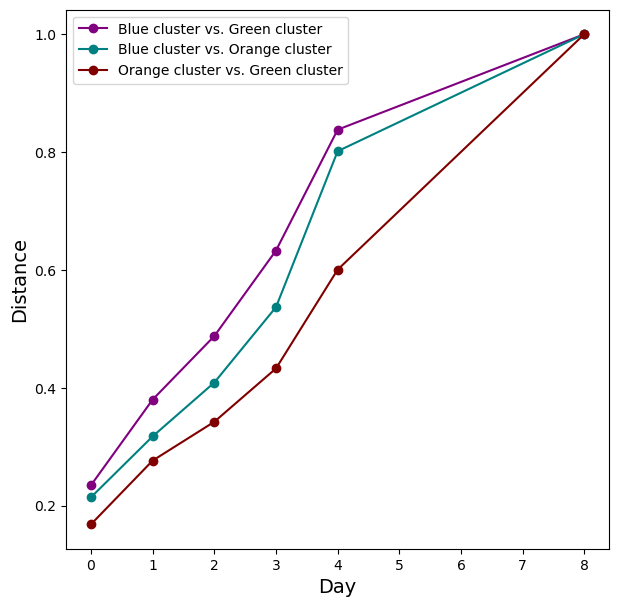

In [901]:
divergence_df['name'] = divergence_df['name1'].str.split('/').str.get(0) + ' vs. ' + divergence_df['name2'].str.split('/').str.get(
        0)
plt.figure(figsize=(7, 7))
plt.xlabel("Day", fontsize=14)
plt.ylabel("Distance", fontsize=14)
colors = ['purple', 'teal', 'maroon']
for i, (p, d) in enumerate(divergence_df.groupby('name')):
    plt.plot(d['day2'], d['distance'], '-o', label=p, color=colors[i])
    
    # Print out the values for d['distance']
    print(f"Values for {p}:")
    print(d['distance'].tolist())
    
plt.legend(loc='best')


# Shared descendent (convergence of trajectories)-day0

In [69]:
convergence_df = wot.tmap.trajectory_divergence(adata, trajectory_ds_day0, distance_metric='total_variation')


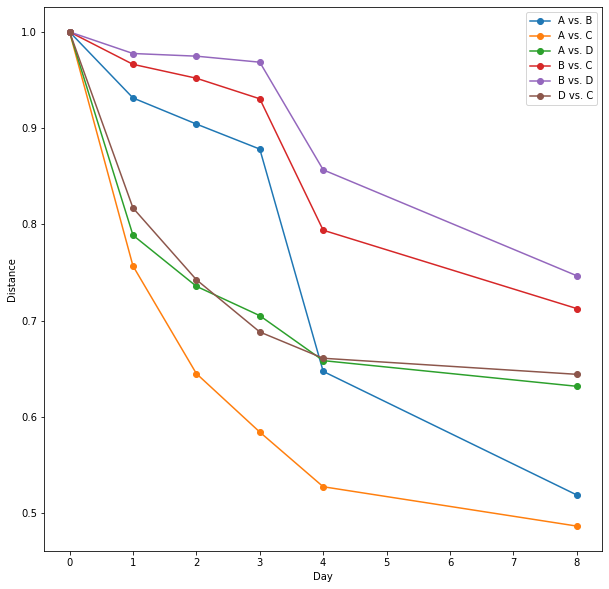

In [70]:
convergence_df['name'] = convergence_df['name1'].str.split('/').str.get(0) + ' vs. ' + convergence_df['name2'].str.split('/').str.get(
        0)
plt.figure(figsize=(10, 10))
plt.xlabel("Day")
plt.ylabel("Distance")
for p, d in convergence_df.groupby('name'):
    plt.plot(d['day2'], d['distance'], '-o', label=p)
plt.legend(loc='best')

# Fate Matrices Analysis

In [225]:
import math


In [121]:
cell_sets_fate = wot.io.read_sets('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt', as_dict=True)
target_destinations = tmap_model.population_from_cell_sets(cell_sets_fate, at_time=8)
fate_ds = tmap_model.fates(target_destinations)


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [124]:
fate_ds.var.index

Index(['Low EMT', 'High EMT', 'Medium EMT'], dtype='object')

In [911]:
fate_dropdown1 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 1:'
)
fate_dropdown2 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 2:',
    value=fate_ds.var.index[1]
)
day_dropdown_fate = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


def update_fate_vis(name1, name2,day):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
    plt.scatter(x,y)
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('{} vs. {} on day {}'.format(name1, name2,day))

widgets.interact(update_fate_vis, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown_fate)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis(name1, name2, day)>

In [923]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np

def update_trajectory_vis_snapshot_group_by_fate_2(day):
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.axis('off')
    plt.tight_layout()

    # Plotting the background with low emphasis
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0', s=4, marker=',', edgecolors='none', alpha=0.8)
    
    # Check if 'day' is in fate_ds.obs['day'] to ensure valid day selection
    if day in fate_ds.obs['day'].values:
        # Extracting data only for the selected day
        day_mask = fate_ds.obs['day'] == day
        fate1 = fate_ds[:, 'Low EMT'][day_mask].X.flatten()
        fate2 = fate_ds[:, 'High EMT'][day_mask].X.flatten()
        remaining = 1 - (fate1 + fate2)

        # Assign fates based on extracted values
        z = ['']*len(fate1)
        for i in range(len(fate1)):
            if fate1[i] > 2/3:
                z[i] = "fate1"
            elif fate2[i] > 2/3:
                z[i] = "fate2"
            elif remaining[i] > 2/3:
                z[i] = "fate3"
            else:
                z[i] = "fate4"

        # Creating a DataFrame for plotting
        d = {'x': coord_df['x'][day_mask], 'y': coord_df['y'][day_mask], 'fate': z}
        df = pd.DataFrame(data=d)

        # Displaying the results
        colors = {'fate1': 'blue', 'fate2': 'orange', 'fate3': 'green', 'fate4': 'gray'}
        ax.scatter(x=df['x'], y=df['y'], c=df['fate'].map(colors), s=6, marker=',', edgecolors='none')

        # Print fate counts
        fate_counts = pd.Series(z).value_counts().reindex(['fate1', 'fate2', 'fate3', 'fate4'], fill_value=0)
        print("Fate counts:", fate_counts)

    else:
        print("Selected day not available in dataset")

    plt.show()

widgets.interact(update_trajectory_vis_snapshot_group_by_fate_2, day=widgets.Dropdown(options=fate_ds.obs['day'].unique()))




interactive(children=(Dropdown(description='day', options=(0.0, 1.0, 2.0, 3.0, 4.0, 8.0), value=0.0), Output()…

<function __main__.update_trajectory_vis_snapshot_group_by_fate_2(day)>

In [924]:
def update_trajectory_vis_snapshot_group_by_fate_test(day):
    _trajectory_ds = trajectory_ds[trajectory_ds.obs['day'] == day]

    binned_df = _trajectory_ds.obs.copy()
    binned_df['values_1'] = fate_ds[:, 'Low EMT'][fate_ds.obs['day'] == day].X.flatten()
    binned_df['values_2'] = fate_ds[:, 'High EMT'][fate_ds.obs['day'] == day].X.flatten()
    binned_df['values_3'] = fate_ds[:, 'Medium EMT'][fate_ds.obs['day'] == day].X.flatten()

    coord_df_reset = coord_df.reset_index(drop=False)
    
    # Merge based on matching coordinates
    merged_df = pd.merge(binned_df, coord_df_reset, how='inner', left_on=['x', 'y'], right_on=['x', 'y'])
    
    # Categorize fates
    z = [''] * len(merged_df['x'])
    for i in range(len(merged_df['x'])):
        if merged_df['values_1'].iloc[i] > 2/3:
            z[i] = "fate1"
        elif merged_df['values_2'].iloc[i] > 2/3:
            z[i] = "fate2"
        elif merged_df['values_3'].iloc[i] > 2/3:
            z[i] = "fate3"
        else:
            z[i] = "fate4"

    d_test = pd.DataFrame({
        'col1': merged_df['x'],
        'col2': merged_df['y'],
        'col3': z,
        'index_coord_df': merged_df['id']  # Use the index from original coord_df
    })

    return d_test



import os

def save_results_for_all_days(days, output_directory):
    results = {}
    for day in days:
        print(f"Processing Day {day}...")
        d_test = update_trajectory_vis_snapshot_group_by_fate_test(day)
        
        # Rename fates
        fate_mapping = {'fate1': 'Low EMT', 'fate2': 'High EMT', 'fate3': 'Medium EMT', 'fate4': 'Undetermined'}
        d_test['col3'] = d_test['col3'].map(fate_mapping)

        # Extract index_coord_df and their z column
        result = d_test[['index_coord_df', 'col3']]
        
        # Save result to file
        filename = f"results_day_{day}.csv"
        filepath = os.path.join(output_directory, filename)
        result.to_csv(filepath, index=False)
        print(f"Results for Day {day} saved to {filepath}")
        
        # Store result in dictionary
        results[day] = result
    
    return results


#output_directory = "Desktop/EMT_Optimal_Transport/top_ancestor"
#days = [0, 1, 2, 3, 4, 8]
#results = save_results_for_all_days(days, output_directory)


In [887]:
from collections import Counter

In [925]:

def update_fate_vis_group(name1, name2,day):
    fig, ax = plt.subplots(figsize=(7, 7))

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 2/3:
            z[i] = "fate1"
        elif fate2[i] > 2/3:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 2/3:
            z[i] = "fate3"
        else: 
            z[i] = "fate4"
            
    fate_counts = Counter(z)
    total_elements = len(z)
    for fate, count in fate_counts.items():
        percentage = (count / total_elements) * 100
        print(f"{fate}: {count} ({percentage:.2f}%)")

    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
    colors = {'fate1':'blue', 'fate2':'orange', 'fate3':'green', 'fate4':'gray'}

    
    plt.scatter(x = df.col1, y=df.col2, c=df.col3.map(colors))
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('{} vs. {} on day {}'.format(name1, name2,day))

widgets.interact(update_fate_vis_group, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown_fate)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_group(name1, name2, day)>

In [926]:
import pandas as pd
import numpy as np

def calculate_fate_statistics():
    # Prepare a list to hold the data for each day
    all_days_data = []

    # Loop through each unique day in the dataset
    for day in np.unique(fate_ds.obs['day']):
        day_mask = fate_ds.obs['day'] == day
        fate1 = fate_ds[:, 'Low EMT'][day_mask].X.flatten()
        fate2 = fate_ds[:, 'High EMT'][day_mask].X.flatten()
        remaining = 1 - (fate1 + fate2)
        
        z = []
        for i in range(len(fate1)):
            if fate1[i] > 2/3:
                z.append("Low EMT")
            elif fate2[i] > 2/3:
                z.append("High EMT")
            elif remaining[i] > 0.67:
                z.append("Medium EMT")
            else:
                z.append("Undetermined Cells")
        
        # Count the occurrences of each fate
        fate_counts = pd.Series(z).value_counts()
        total_elements = len(z)
        percentages = (fate_counts / total_elements * 100).round(2)
        
        # Combine counts and percentages in a DataFrame
        day_data = pd.DataFrame({
            'Count': fate_counts,
            'Percentage': percentages
        })
        
        day_data['Day'] = day  # Add a column for the day
        all_days_data.append(day_data)

    # Concatenate all data into a single DataFrame
    result_df = pd.concat(all_days_data)
    result_df.set_index(['Day', result_df.index], inplace=True)
    return result_df

# Usage
fate_statistics_df = calculate_fate_statistics()
print(fate_statistics_df)


                        Count  Percentage
Day                                      
0.0 Undetermined Cells   1805       66.02
    High EMT              475       17.37
    Low EMT               295       10.79
    Medium EMT            159        5.82
1.0 Undetermined Cells   1085       47.11
    High EMT              567       24.62
    Medium EMT            343       14.89
    Low EMT               308       13.37
2.0 Undetermined Cells    817       34.31
    High EMT              807       33.89
    Medium EMT            400       16.80
    Low EMT               357       14.99
3.0 High EMT              799       37.48
    Undetermined Cells    669       31.38
    Medium EMT            344       16.14
    Low EMT               320       15.01
4.0 High EMT              430       37.49
    Low EMT               384       33.48
    Medium EMT            231       20.14
    Undetermined Cells    102        8.89
8.0 High EMT              746       39.45
    Low EMT               589     

In [927]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gather_fate_data():
    # Initialize a DataFrame to store the results
    result_df = pd.DataFrame()
    
    # Iterate over each unique day
    for day in np.unique(fate_ds.obs['day']):
        day_mask = fate_ds.obs['day'] == day
        fate1 = fate_ds[:, 'Low EMT'][day_mask].X.flatten()
        fate2 = fate_ds[:, 'High EMT'][day_mask].X.flatten()
        remaining = 1 - (fate1 + fate2)

        z = []
        for i in range(len(fate1)):
            if fate1[i] > 2/3:
                z.append("Low EMT")
            elif fate2[i] > 2/3:
                z.append("High EMT")
            elif remaining[i] > 2/3:
                z.append("Medium EMT")
            else:
                z.append("Undetermined Cells")

        fate_counts = pd.Series(z).value_counts()
        total_elements = len(z)
        percentages = (fate_counts / total_elements * 100).round(2)

        # Organize data into a DataFrame for this day
        day_data = pd.DataFrame({
            'Count': fate_counts,
            'Percentage': percentages
        }, index=fate_counts.index)
        
        # Add the day column
        day_data['Day'] = day
        result_df = pd.concat([result_df, day_data], axis=0)

    result_df.reset_index(inplace=True)
    result_df.rename(columns={'index': 'Fate'}, inplace=True)
    return result_df.pivot_table(index='Day', columns='Fate', values=['Count', 'Percentage'], fill_value=0)

# Gather the data
fate_data = gather_fate_data()


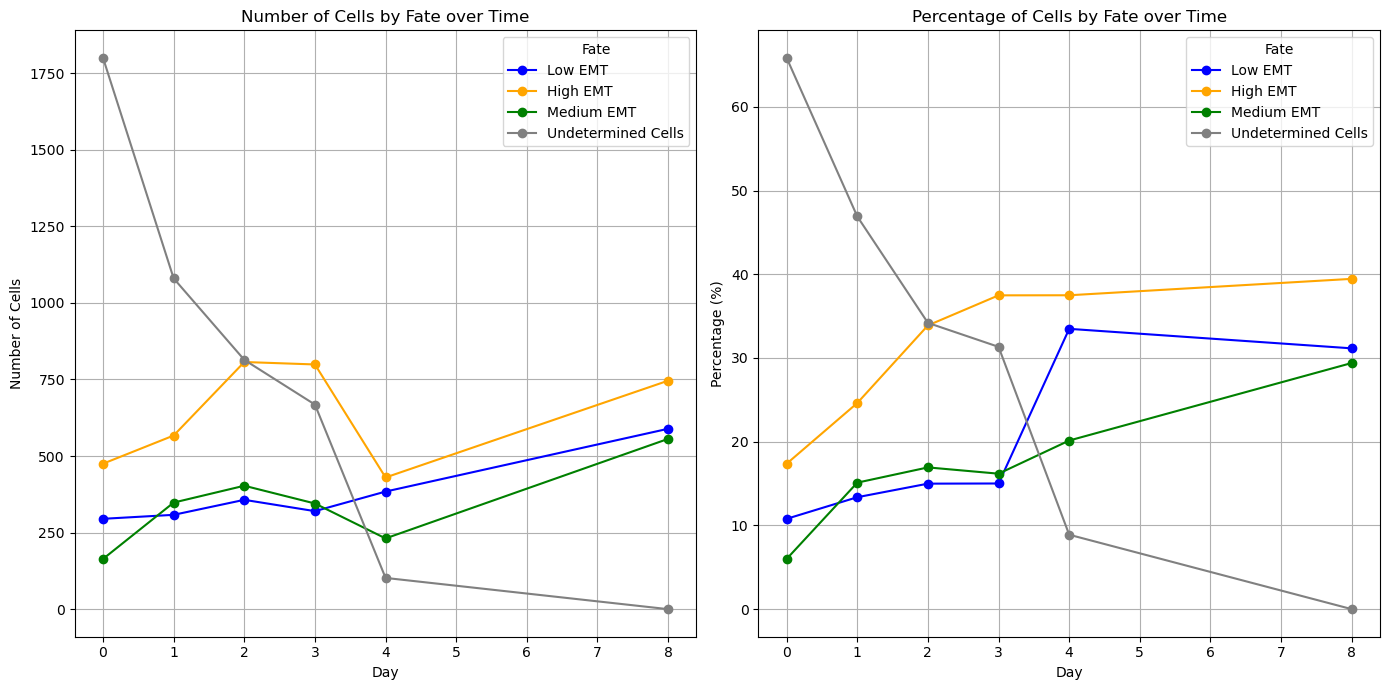

In [928]:


def plot_fate_data(fate_data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Define colors for each fate type
    color_map = {
        'Low EMT': 'blue',
        'High EMT': 'orange',
        'Medium EMT': 'green',
        'Undetermined Cells': 'gray'
    }

    # Plot counts
    for fate, color in color_map.items():
        if fate in fate_data['Count']:
            axes[0].plot(fate_data['Count'].index, fate_data['Count'][fate], marker='o', color=color, label=fate)
    axes[0].set_title('Number of Cells by Fate over Time')
    axes[0].set_xlabel('Day')
    axes[0].set_ylabel('Number of Cells')
    axes[0].grid(True)
    axes[0].legend(title='Fate')

    # Plot percentages
    for fate, color in color_map.items():
        if fate in fate_data['Percentage']:
            axes[1].plot(fate_data['Percentage'].index, fate_data['Percentage'][fate], marker='o', color=color, label=fate)
    axes[1].set_title('Percentage of Cells by Fate over Time')
    axes[1].set_xlabel('Day')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].grid(True)
    axes[1].legend(title='Fate')

    plt.tight_layout()
    plt.show()

# Assuming fate_data is already loaded and structured appropriately
plot_fate_data(fate_data)



In [388]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

day_dropdown_variance = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)


def update_fate_vis_gene_signature_EMT_modified_variance(name1, name2, day, gs):
    pd_series_day = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.01), pd_series.quantile(1))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.01), pd_series.quantile(1))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.85:
            z[i] = "Low EMT"
        elif fate2[i] > 0.85:
            z[i] = "High EMT"
        elif 1-(fate1[i]+fate2[i]) > 0.85:
            z[i] = "Medium EMT"
        else: 
            z[i] = "Undetermined"
            
    # Create a new DataFrame with pd_series_adjusted and z
    df = pd.DataFrame({'pd_series_adjusted': pd_series_adjusted, 'z': z})
    df_grouped = df.groupby('z')
    variances = df_grouped['pd_series_adjusted'].var()
    means = df_grouped['pd_series_adjusted'].mean()
    table = pd.DataFrame({'means': means, 'variances': variances})
    table = table.rename(columns={'z': 'Fate Prediction (Threshold: 0.8)'})
    
    return table


In [406]:
# define the function to update the visualization
def update_viz(name1, name2, day, gs):
    table = update_fate_vis_gene_signature_EMT_modified_variance(name1, name2, day, gs)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz, name1=fate_dropdown1, name2=fate_dropdown2, day=day_dropdown_variance, gs=gene_set_dropdown_gs_fate_EMT)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz(name1, name2, day, gs)>

In [407]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [408]:
import seaborn as sns


#gene_single_scores_df_GRN
#gene_set_scores_df_EMT
#gene_set_scores_df_PNAS_stemness

gene_set_dropdown_gs_fate_EMT_1 = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

gene_set_dropdown_gs_fate_EMT_2 = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene signature:'
)


day_dropdown_variance_correlation = widgets.Dropdown(
    options=fate_ds.obs['day'].unique(),
    description='Day',
    value=1
)



def pearson_corr(series1, series2):
    return series1.corr(series2)



def update_fate_vis_gene_signature_EMT_stem_modified_variance(name1, name2, day, gs1, gs2):
    pd_series_day1 = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series_day2 = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day']==day]
    pd_series1 = pd_series_day1[gs1]
    pd_series2 = pd_series_day2[gs2]
    
    # Get boolean masks for the conditions
    mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
    mask2 = pd_series2.between(pd_series2.quantile(.0), pd_series2.quantile(1))

    # Get the intersection of the two masks
    intersection_mask = mask1 & mask2

    pd_series_adjusted1 = pd_series1[intersection_mask]
    pd_series_adjusted2 = pd_series2[intersection_mask]
    
    #pd_series_adjusted1=pd_series1
    #pd_series_adjusted2=pd_series2

    fate_temp = fate_ds[fate_ds.obs['day']==day][intersection_mask]
    
    #fate_temp = fate_ds[fate_ds.obs['day']==day]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.90:
            z[i] = "Low EMT"
        elif fate2[i] > 0.90:
            z[i] = "High EMT"
        elif 1-(fate1[i]+fate2[i]) > 0.90:
            z[i] = "Medium EMT"
        else: 
            z[i] = "Undetermined"
            
    # Create a new DataFrame with pd_series_adjusted and z
    df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'pd_series_adjusted2': pd_series_adjusted2, 'z': z})
    df_grouped = df.groupby('z')
    variances1 = df_grouped['pd_series_adjusted1'].var()
    means1 = df_grouped['pd_series_adjusted1'].mean()
    variances2 = df_grouped['pd_series_adjusted2'].var()
    means2 = df_grouped['pd_series_adjusted2'].mean()
    correlations = df_grouped.apply(lambda group: pearson_corr(group['pd_series_adjusted1'], group['pd_series_adjusted2']))
    
    # Create a scatter plot with the points colored based on 'z'
    color_map = {
    "Low EMT": "blue",
    "High EMT": "orange",
    "Medium EMT": "green",
    "Undetermined": "gray"}

    plt.figure(figsize=(10, 7))
    scatter_plot = sns.scatterplot(data=df, x='pd_series_adjusted1', y='pd_series_adjusted2', hue='z', palette=color_map, legend=False)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0)
    plt.xlabel("EMT score", fontsize=24)
    plt.ylabel("Stemness score", fontsize=24)
    plt.title('Scatter plot of gene signatures with correlation and cell fate categories', fontsize=14)
    #plt.legend(loc ="upper left", fontsize=24)  
    # Show correlation coefficients for each group on the plot
    plt.tick_params(labelsize=24)

    plt.show()
   
   
    
    
    table = pd.DataFrame({'means_1': means1, 'variances_1': variances1, 'means_2': means2, 'variances_2': variances2})
    table['correlations'] = correlations
    table = table.rename(columns={'z': 'Fate Prediction (Threshold: 0.8)'})
    
    return table



In [409]:
# define the function to update the visualization
def update_viz_2D(name1, name2, day, gs1, gs2):
    table = update_fate_vis_gene_signature_EMT_stem_modified_variance(name1, name2, day, gs1, gs2)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D, name1=fate_dropdown1, name2=fate_dropdown2, day=day_dropdown_variance_correlation, gs1=gene_set_dropdown_gs_fate_EMT_1, gs2=gene_set_dropdown_gs_fate_EMT_2)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D(name1, name2, day, gs1, gs2)>

In [992]:

#gene_single_scores_df_GRN
#gene_set_scores_df_EMT
#gene_set_scores_df_PNAS_stemness

gene_set_dropdown_gs_fate_violin = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)



def series_violin_plot_gene_signatures_EMT_categories(name1, name2, gs1, palette=None, exclude_undetermined=True):
    unique_days = np.sort(fate_ds.obs['day'].unique())
    #unique_days = [4.0, 8.0]
    num_days = len(unique_days)
    
    # Define the default color palette if not provided
    if palette is None:
        palette = {
            "Low EMT": "blue",
            "High EMT": "orange",
            "Medium EMT": "green",
            "Undetermined": "gray"
        }
    
    # Create a figure with subplots for each unique day
    fig, axes = plt.subplots(1, num_days, figsize=(2.5 * num_days, 7), sharey=True)
    
    for idx, (day, ax) in enumerate(zip(unique_days, axes)):
        # Preprocessing and filtering data
        pd_series_day1 = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day'] == day]
        pd_series1 = pd_series_day1[gs1]

        mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
        pd_series_adjusted1 = pd_series1[mask1]

        fate_temp = fate_ds[fate_ds.obs['day'] == day][mask1]
        fate1 = fate_temp[:, name1].X.flatten()
        fate2 = fate_temp[:, name2].X.flatten()
        
        
        
        Nrows = len(fate1)
        z = [''] * Nrows
        for i in range(0, Nrows):
            if fate1[i] > 0.75:
                z[i] = "Low EMT"
            elif fate2[i] > 0.75:
                z[i] = "High EMT"
            elif 1 - (fate1[i] + fate2[i]) > 0.75:
                z[i] = "Medium EMT"
            else:
                z[i] = "Undetermined"

        # Create a new DataFrame with pd_series_adjusted and z
        df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'z': z})

        # Exclude the "Undetermined" category if requested
        if exclude_undetermined:
            df = df[df['z'] != 'Undetermined']

        # Specify the order of the x-axis
        x_axis_order = ["Low EMT", "Medium EMT", "High EMT"]
        x_axis_labels = ["L", "M", "H"]

        sns.violinplot(ax=ax, data=df, x='z', y='pd_series_adjusted1', inner="quartiles", palette=palette, order=x_axis_order)
        ax.set_title(f'Day {day}', fontsize=24)
        ax.set_xlabel('EMT',  fontsize=24)
        ax.set_xticklabels(x_axis_labels,  fontsize=24)  # Set the fontsize parameter and labels to the desired values
        ax.tick_params(axis='y', labelsize=24)

        
        if idx == 0:
            ax.set_ylabel("EMT score distribution", fontsize=24)
        else:
            ax.set_ylabel('')
    

    plt.show()


In [1122]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display

def compute_statistics(name1, name2, gs1, exclude_undetermined=True):
    unique_days = np.sort(fate_ds.obs['day'].unique())
    stats_df = pd.DataFrame(columns=['Day', 'Pair', 'Levene Statistic', 'Levene p-value', 'T-test Statistic', 'T-test p-value', 'Mean Group1', 'Mean Group2', 'Variance Group1', 'Variance Group2'])
    
    for day in unique_days:
        # Preprocessing and filtering data
        pd_series_day1 = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day'] == day]
        if gs1 not in pd_series_day1.columns:
            print(f"Warning: {gs1} is not a column in the dataframe on day {day}. Skipping this day.")
            continue

        pd_series1 = pd_series_day1[gs1]

        mask1 = pd_series1.between(pd_series1.quantile(.0), pd_series1.quantile(1))
        pd_series_adjusted1 = pd_series1[mask1]

        fate_temp = fate_ds[fate_ds.obs['day'] == day][mask1]
        fate1 = fate_temp[:, name1].X.flatten()
        fate2 = fate_temp[:, name2].X.flatten()

        Nrows = len(fate1)
        z = [''] * Nrows
        for i in range(Nrows):
            if fate1[i] > 0.75:
                z[i] = "Low EMT"
            elif fate2[i] > 0.75:
                z[i] = "High EMT"
            elif 1 - (fate1[i] + fate2[i]) > 0.75:
                z[i] = "Medium EMT"
            else:
                z[i] = "Undetermined"

        # Create a new DataFrame with pd_series_adjusted and z
        df = pd.DataFrame({'pd_series_adjusted1': pd_series_adjusted1, 'z': z})

        # Exclude the "Undetermined" category if requested
        if exclude_undetermined:
            df = df[df['z'] != 'Undetermined']
        
        # Compute the statistics for this day
        categories = df['z'].unique()
        for i in range(len(categories)):
            for j in range(i+1, len(categories)):
                group1 = df[df['z'] == categories[i]]['pd_series_adjusted1']
                group2 = df[df['z'] == categories[j]]['pd_series_adjusted1']
                levene_stat, levene_p = stats.levene(group1, group2)
                ttest_stat, ttest_p = stats.ttest_ind(group1, group2)

                # Calculate mean and variance for both groups
                mean1, mean2 = group1.mean(), group2.mean()
                var1, var2 = group1.var(), group2.var()

                # Append each pair's statistics to the DataFrame
                new_row = pd.DataFrame({
                    'Day': [day],
                    'Pair': [f'{categories[i]} vs {categories[j]}'],
                    'Levene Statistic': [levene_stat],
                    'Levene p-value': [levene_p],
                    'T-test Statistic': [ttest_stat],
                    'T-test p-value': [ttest_p],
                    'Mean Group1': [mean1],
                    'Mean Group2': [mean2],
                    'Variance Group1': [var1],
                    'Variance Group2': [var2]
                })
                stats_df = pd.concat([stats_df, new_row], ignore_index=True)
    
    return stats_df

# Usage example, make sure to provide correct parameters
# table = compute_statistics('name1', 'name2', 'EMT_SCORE_KS')
# display(table)


In [1123]:
# define the function to update the visualization
def update_viz_2D_violin_seris(name1, name2, gs1):
    table = series_violin_plot_gene_signatures_EMT_categories(name1, name2, gs1)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D_violin_seris, name1=fate_dropdown1, name2=fate_dropdown2,  gs1=gene_set_dropdown_gs_fate_violin)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D_violin_seris(name1, name2, gs1)>

In [1124]:
# define the function to update the visualization




def update_viz_2D_stat_seris(name1, name2, gs1):
    table = compute_statistics(name1, name2, gs1)
    display(table)

# create the interactive widget and display it
widget = widgets.interact(update_viz_2D_stat_seris, name1=fate_dropdown1, name2=fate_dropdown2,  gs1=gene_set_dropdown_gs_fate_violin)
display(widget)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_viz_2D_stat_seris(name1, name2, gs1)>

In [421]:
gene_set_dropdown_gs_fate = widgets.Dropdown(
    options=gene_set_scores_df.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_set_scores_df[gene_set_scores_df['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
   
    gene_set_score_coords = gene_set_scores_df[gene_set_scores_df['day']==day]


    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords[gs], cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_modified(name1, name2, day, gs)>

In [422]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_set_scores_df_EMT.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_EMT_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_EMT(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_EMT = gene_set_scores_df_EMT[gene_set_scores_df_EMT['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_EMT[gs], cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_EMT_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_EMT)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_EMT_modified(name1, name2, day, gs)>

In [423]:
gene_set_dropdown_gs_fate_stemness = widgets.Dropdown(
    options=gene_set_scores_df_PNAS_stemness.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_PNAS_stemness_modifed(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_EMT = gene_set_scores_df_PNAS_stemness[gene_set_scores_df_PNAS_stemness['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_EMT[gs], cmap = "inferno")
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_PNAS_stemness_modifed, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_stemness)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_PNAS_stemness_modifed(name1, name2, day, gs)>

In [424]:
gene_set_dropdown_gs_fate_m = widgets.Dropdown(
    options=gene_single_scores_df_metabolism.columns,
    description='Gene signature:'
)



def update_fate_vis_gene_signature_m_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_m(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords = gene_single_scores_df_metabolism[gene_single_scores_df_metabolism['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords[gs], cmap='Reds')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_m_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_m)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_m_modified(name1, name2, day, gs)>

In [425]:
gene_set_dropdown_gs_fate_EMT = widgets.Dropdown(
    options=gene_single_scores_df_GRN.columns,
    description='Gene signature:'
)

def update_fate_vis_gene_signature_GRN_modified(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   
    
    pd_series_day = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day']==day]
    pd_series = pd_series_day[gs]
    pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]

    fate_temp = fate_ds[fate_ds.obs['day']==day][pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))]
    
    fate1 = fate_temp[:,name1].X.flatten()
    fate2 = fate_temp[:,name2].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=pd_series_adjusted, cmap='Purples')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))


def update_fate_vis_gene_signature_GRN(name1, name2, day, gs):
    figure = plt.figure(figsize=(7, 7))   

    fate1 = fate_ds[:,name1][fate_ds.obs['day']==day].X.flatten()
    fate2 = fate_ds[:,name2][fate_ds.obs['day']==day].X.flatten()

    Nrows = len(fate1)
    x = np.zeros(Nrows)
    y = np.zeros(Nrows)
    P = np.array([[1,0],[np.cos(2*math.pi/3),math.sin(2*math.pi/3)],[math.cos(4*math.pi/3),math.sin(4*math.pi/3)]])

    for i in range(0,Nrows):
        ff = np.array([fate1[i],fate2[i],1-(fate1[i]+fate2[i])])
        x[i] = (ff @ P)[0]
        y[i] = (ff @ P)[1]
    
    gene_set_score_coords_GRN = gene_single_scores_df_GRN[gene_single_scores_df_GRN['day']==day]

    z = ['']*Nrows
    for i in range(0,Nrows):
        if fate1[i] > 0.5:
            z[i] = "fate1"
        elif fate2[i] > 0.5:
            z[i] = "fate2"
        elif 1-(fate1[i]+fate2[i]) > 0.5:
            z[i] = "fate3"
        else: 
            z[i] = "undetermined"
    
    d = {'col1': x, 'col2': y, 'col3': z}
    df = pd.DataFrame(data=d)
    
    vx = P[:,0]
    vy = P[:,1]
    t1 = plt.Polygon(P, color=(0,0,0,0.1))
    plt.gca().add_patch(t1)
    
   
    plt.scatter(x = df.col1, y=df.col2, c=gene_set_score_coords_GRN[gs], cmap='Purples')
    cb = plt.colorbar(location = 'left')
    cb.ax.set_title('Signature')
    #plt.scatter(vx,vy)
    #plt.scatter(0,0)
    plt.text(P[0,0]+.1, P[0,1], name1)
    plt.text(P[1,0]-.1, P[1,1]+.1, name2)
    plt.text(P[2,0]-.1, P[2,1]-.2, 'Medium EMT')
    plt.axis('equal')
    plt.axis('off')
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('day {}'.format(day))

widgets.interact(update_fate_vis_gene_signature_GRN_modified, name1=fate_dropdown1, name2=fate_dropdown2,day=day_dropdown, gs = gene_set_dropdown_gs_fate_EMT)


interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis_gene_signature_GRN_modified(name1, name2, day, gs)>

In [426]:
fate_dropdown1 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 1:'
)
fate_dropdown2 = widgets.Dropdown(
    options=fate_ds.var.index,
    description='Fate 2:',
    value=fate_ds.var.index[1]
)

def update_fate_vis(name1, name2):
    figure = plt.figure(figsize=(7, 7))
    fate1 = fate_ds[:, name1].X
    fate2 = fate_ds[:, name2].X
    p = np.log(1e-9 + np.divide(fate1, fate2, out=np.zeros_like(fate1), where=fate2 != 0))
    plt.scatter(fate_ds.obs['day'], p, s=4, marker=',')
    plt.xlabel('Day')
    plt.ylabel('Log Odds')
    plt.title('{} vs. {}'.format(name1, name2))

widgets.interact(update_fate_vis, name1=fate_dropdown1, name2=fate_dropdown2)

interactive(children=(Dropdown(description='Fate 1:', options=('Low EMT', 'High EMT', 'Medium EMT'), value='Lo…

<function __main__.update_fate_vis(name1, name2)>

In [383]:
input_file = "Desktop/EMT_Optimal_Transport/TG_metabolism/single_gene_metabolic.gmt"
output_file = "Desktop/EMT_Optimal_Transport/TG_metabolism/single_gene_metabolic.txt"

with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
    for line in f_in:
        # Split the line into words
        words = line.strip().split()
        
        # Skip the line if there are less than 3 words
        if len(words) < 3:
            continue
        
        # Get the gene names (the third word and beyond)
        gene_names = words[2:]
        
        # Write gene names line by line to the output file
        for gene in gene_names:
            f_out.write(gene + '\n')

# Combine gene sets

In [183]:
def read_genes_from_file(file_path):
    with open(file_path, 'r') as file:
        genes = [line.strip() for line in file]
    return genes

# List of input text files with gene lists
input_files = ['Desktop/EMT_Optimal_Transport/TG_metabolism/TG_fatty_acid.txt',
               'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_glycolysis.txt',
               'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_OXYPHOS.txt'
               ]

# Combine all gene lists into a single set (removing duplicates)
combined_genes = set()
for file_path in input_files:
    genes = read_genes_from_file(file_path)
    combined_genes.update(genes)

# Convert the combined set back to a list
unique_genes = list(combined_genes)

# Print the combined unique gene list
print(unique_genes)

['SLC25A12', 'ENO1', 'HMMR', 'DPYSL4', 'ELF3', 'ATP6V0E1', 'ALG1', 'ALAD', 'CBR3', 'CITED2', 'NDUFV1', 'CA2', 'LHPP', 'MFN2', 'PC', 'FBP2', 'UQCR11', 'HSD17B4', 'PAM', 'PMPCA', 'BAX', 'ACAA2', 'CEL', 'CA4', 'NCAPH2', 'ATP5MC1', 'POLR2F', 'UQCRC1', 'HK2', 'CIDEA', 'GFPT1', 'VLDLR', 'COX10', 'RRAGD', 'ATP5MC2', 'SERINC1', 'PGAM1', 'MRPL15', 'ME1', 'TIMM17A', 'MRPL11', 'IDI1', 'ATP6AP1', 'TIMM50', 'GAD2', 'ZNF292', 'TGFBI', 'P4HA2', 'PFKP', 'EXT2', 'PDHA1', 'ISCA1', 'NDUFB6', 'ALDH9A1', 'PCBD1', 'ATP5MF', 'HTRA2', 'MRPS30', 'PHKA2', 'AK3', 'ATP6V1H', 'MRPS11', 'SOX9', 'ACO2', 'FKBP4', 'B4GALT2', 'NDUFAB1', 'TFF3', 'SRD5A3', 'PPFIA4', 'COX17', 'NDUFV2', 'CACNA1H', 'PGM2', 'NDUFV3', 'FAM162A', 'ATP5F1A', 'ACSS1', 'HADH', 'COX7B', 'TXN', 'CYCS', 'NBN', 'LDHA', 'NANP', 'LHX9', 'IDH3B', 'DLST', 'IRS2', 'GABARAPL1', 'MAOA', 'SURF1', 'LTC4S', 'VDAC2', 'SDHB', 'KIF2A', 'COX4I1', 'METAP1', 'B3GALT6', 'CASP7', 'ACSL5', 'PGK1', 'HSPA5', 'HMGCS1', 'FUT8', 'SUCLG1', 'EHHADH', 'NDUFA3', 'CTH', 'ATP5F1E

In [219]:
def save_genes_to_file(genes, file_path):
    with open(file_path, 'w') as file:
        for gene in genes:
            file.write(gene + '\n')

# Save the unique genes list to a new text file
save_genes_to_file(unique_genes, 'Desktop/EMT_Optimal_Transport/TG_metabolism/TG_combined_fatty_OXY_gly.txt')


#  Compare pairwise sets

In [300]:
cell_set_dict_MH = {'Medium EMT': major_cell_sets['Medium EMT'], 'High EMT': major_cell_sets['High EMT']}
cell_set_MH =  tmap_model.population_from_cell_sets(cell_set_dict_MH, at_time=8)
fate_ds_test_MH = tmap_model.fates(cell_set_MH)

/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))


In [301]:
results_MH_only =  wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([0])], fate_ds_test_MH,  compare= 'all' ) 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [302]:
results_MH_only = results_MH_only[(results_MH_only['name1'] == 'Medium EMT')&(results_MH_only['name2'] == 'High EMT')]  


In [303]:
results_MH_only.sort_values('fold_change', ascending=False).head(20)


fold_change     mean1     mean2  fraction_expressed1  \
ZNHIT1       1.085078  0.811316  0.729664             0.845095   
SRCAP        1.049161  0.264749  0.216758             0.424752   
TAF10        1.040889  0.618026  0.577952             0.753311   
DDB2         1.017565  0.150960  0.133547             0.286833   
INO80C       1.013327  0.322330  0.309091             0.529655   
PHF21A       1.009075  0.070693  0.061659             0.140270   
INO80B       1.008888  0.081937  0.073088             0.165301   
PHF20        1.008764  0.345585  0.336859             0.540561   
ING4         1.007023  0.056840  0.049842             0.123265   
JARID2       1.006533  0.111421  0.104909             0.218444   
KMT2C        1.004698  0.171201  0.166514             0.325773   
SIRT7        1.004343  0.174344  0.170010             0.333049   
ARID4A       1.003989  0.095405  0.091424             0.184438   
GSE1         1.003962  0.077708  0.073754             0.151869   
SIN3B        1.002761  0.103342  0.100585             0.210545   
BCORL1       1.002520  0.015337  0.012820             0.031376   
ZNF217       1.002099  0.077959  0.075863             0.157549   
RYBP         1.001693  0.160447  0.158755             0.291904   
APOBEC3F     1.001181  0.010488  0.009308             0.027021   
APOBEC3H     1.000871  0.003208  0.002338             0.006780   

          fraction_expressed2   t_score        t_pval         t_fdr  \
ZNHIT1               0.804107  6.479254  1.002560e-10  7.519203e-09   
SRCAP                0.371058  5.216100  1.895355e-07  1.194067e-05   
TAF10                0.724538  3.297208  9.827473e-04  5.357250e-02   
DDB2                 0.248325  2.450013  1.431628e-02  4.995000e-01   
INO80C               0.499302  1.360943  1.735877e-01  9.987356e-01   
PHF21A               0.118533  1.741998  8.156509e-02  9.694519e-01   
INO80B               0.140485  1.598793  1.099245e-01  9.880265e-01   
PHF20                0.525312  0.861352  3.890819e-01  9.999966e-01   
ING4                 0.104212  1.622897  1.046693e-01  9.865922e-01   
JARID2               0.207058  1.030879  3.026430e-01  9.999711e-01   
KMT2C                0.300603  0.609222  5.424026e-01  9.999989e-01   
SIRT7                0.320590  0.584552  5.588733e-01  9.999989e-01   
ARID4A               0.176365  0.671606  5.018628e-01  9.999989e-01   
GSE1                 0.141478  0.721752  4.704776e-01  9.999989e-01   
SIN3B                0.199089  0.458214  6.468171e-01  9.999989e-01   
BCORL1               0.027011  1.080032  2.801759e-01  9.999685e-01   
ZNF217               0.148859  0.379820  7.040934e-01  9.999989e-01   
RYBP                 0.284551  0.220000  8.258796e-01  9.999989e-01   
APOBEC3F             0.019858  0.649972  5.157376e-01  9.999989e-01   
APOBEC3H             0.005518  0.860756  3.894118e-01  9.999966e-01   

          fraction_expressed_ratio  day1  day2       name1     name2  
ZNHIT1                    1.050966   0.0   0.0  Medium EMT  High EMT  
SRCAP                     1.144667   0.0   0.0  Medium EMT  High EMT  
TAF10                     1.039706   0.0   0.0  Medium EMT  High EMT  
DDB2                      1.155010   0.0   0.0  Medium EMT  High EMT  
INO80C                    1.060779   0.0   0.0  Medium EMT  High EMT  
PHF21A                    1.183230   0.0   0.0  Medium EMT  High EMT  
INO80B                    1.176522   0.0   0.0  Medium EMT  High EMT  
PHF20                     1.029024   0.0   0.0  Medium EMT  High EMT  
ING4                      1.182653   0.0   0.0  Medium EMT  High EMT  
JARID2                    1.054963   0.0   0.0  Medium EMT  High EMT  
KMT2C                     1.083706   0.0   0.0  Medium EMT  High EMT  
SIRT7                     1.038851   0.0   0.0  Medium EMT  High EMT  
ARID4A                    1.045753   0.0   0.0  Medium EMT  High EMT  
GSE1                      1.073393   0.0   0.0  Medium EMT  High EMT  
SIN3B                     1.057511   0.0   0.0  Medium EMT  High E

In [873]:
cell_set_dict_HM = {'High EMT': major_cell_sets['High EMT'], 'Medium EMT': major_cell_sets['Medium EMT']}
cell_set_HM =  tmap_model.population_from_cell_sets(cell_set_dict_HM, at_time=8)
fate_ds_test_HM = tmap_model.fates(cell_set_HM)

/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))


In [874]:
results_HM_only =  wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_test_HM,  compare= 'all' ) 

In [875]:
results_HM_only = results_HM_only[(results_HM_only['name2'] == 'Medium EMT')&(results_HM_only['name1'] == 'High EMT')]  

In [876]:
def create_combined_df(results, group_name):
    fold_change_df = results['fold_change'].reset_index()
    fold_change_df.columns = ['gene', 'fold_change']
    fdr_value_df = results['t_pval'].reset_index()
    fdr_value_df.columns = ['gene', 't_pval']
    combined_df = fold_change_df.merge(fdr_value_df, on='gene')
    combined_df['group'] = group_name
    combined_df['log2_fold_change'] = np.log2(combined_df['fold_change'])
    combined_df['-log10_p_value'] = -np.log10(combined_df['t_pval'])
    return combined_df


combined_MH = create_combined_df(results_MH_only, 'Medium EMT compared to High EMT')
combined_HM = create_combined_df(results_HM_only, 'High EMT compared to Medium EMT')

all_results_MH = pd.concat([combined_MH], ignore_index=True)
all_results_MH.to_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv', index=False)


all_results_HM = pd.concat([combined_HM], ignore_index=True)
all_results_HM.to_csv('Desktop/EMT_Optimal_Transport/HM_gene_expression_data.csv', index=False)

In [877]:



# Load the data from R
r_dataframe = pd.read_csv("Desktop/EMT_Optimal_Transport/volcano_data_zhang_M_epi_from_zhang.csv")

# Drop the 'Unnamed: 0' column
r_dataframe = r_dataframe.drop(columns=['Unnamed: 0'])

# Rename the columns
r_dataframe.columns = ['gene', 'log2_fold_change', '-log10_p_value']

# Add a column to indicate the source
r_dataframe['source'] = 'C1-sgEED-Epi / C1-sgKMT2D-Epi' 


# Load the data from python
all_results_MH = pd.read_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv')
all_results_MH['source'] = 'Partial EMT / high EMT (day 2)'

<IPython.core.display.Javascript object>


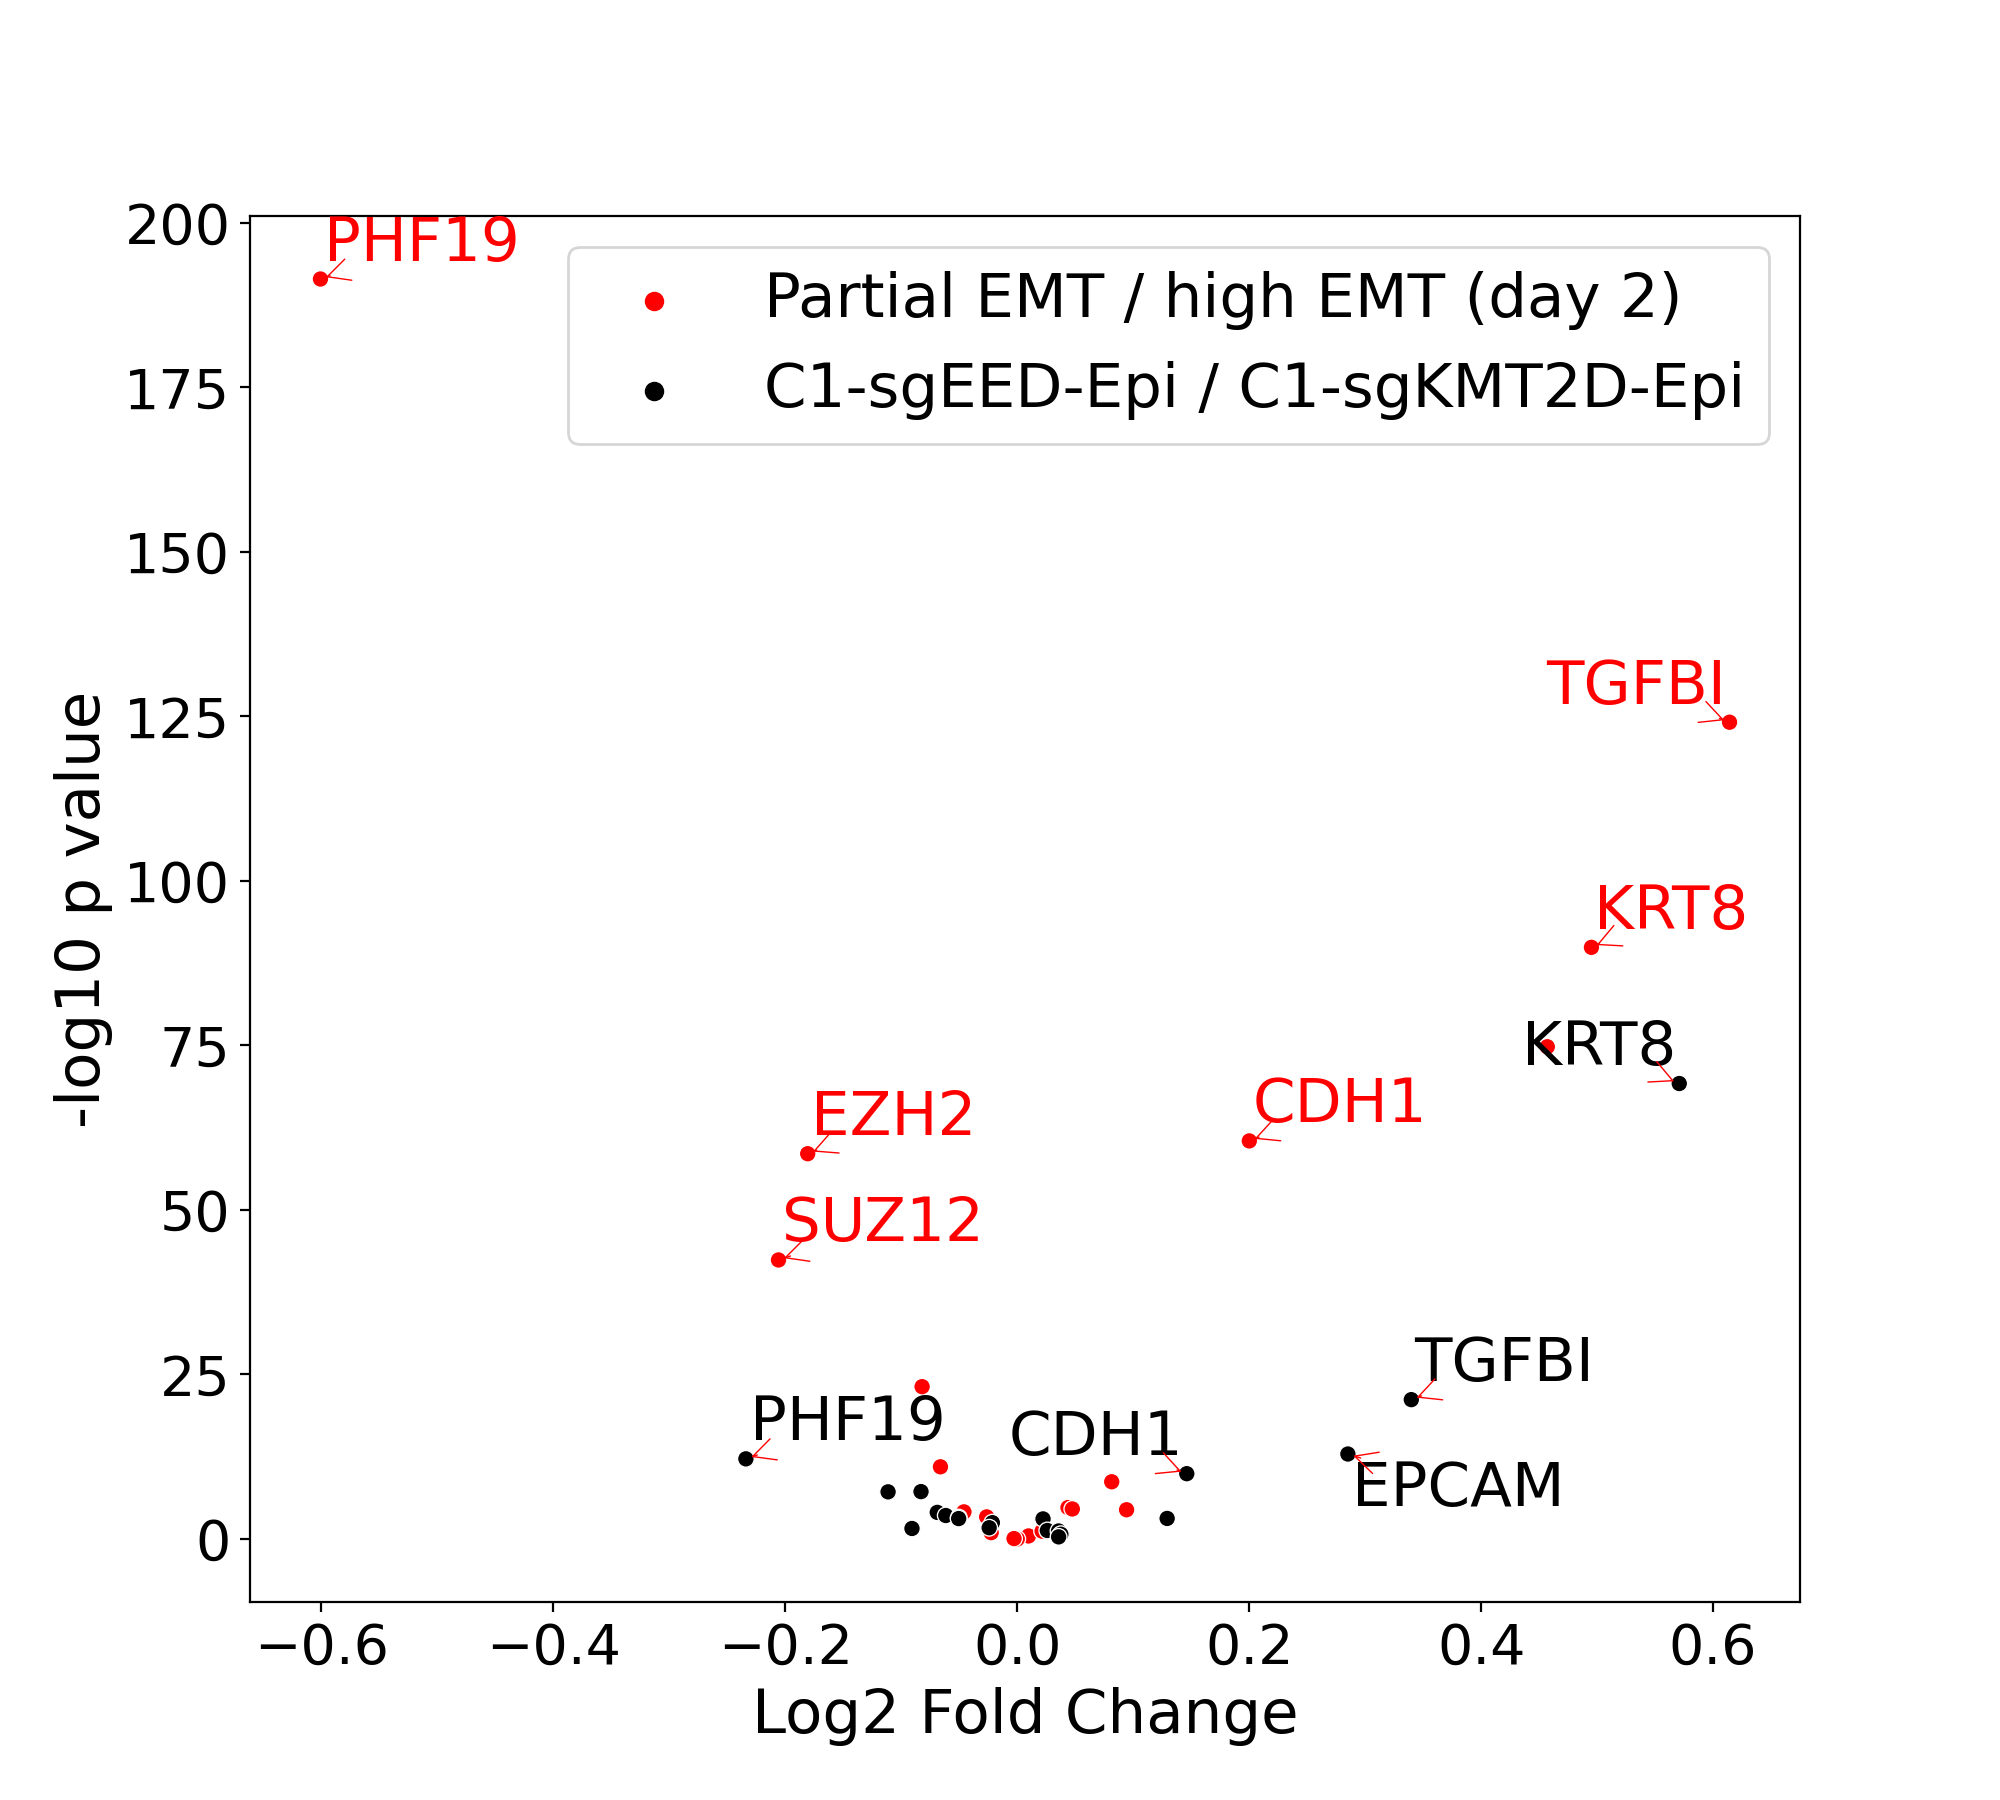

In [889]:
from adjustText import adjust_text


# Concatenate the two dataframes
all_data = pd.concat([all_results_MH, r_dataframe])

def create_volcano_plot_validation(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 9))
    
    custom_palette = {
        'C1-sgEED-Epi / C1-sgKMT2D-Epi': 'black',
        'Partial EMT / high EMT (day 2)': 'red'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='source', palette=custom_palette)

    texts = []
    
    # Dict of genes you want to exclude for a specific group
    exclude_genes = {'C1-sgEED-Epi / C1-sgKMT2D-Epi': ['MTF2', 'ZEB2', 'JARID2', 'EZH2',  'SNAI1', 'DPY30'],
                     'Partial EMT / high EMT (day 2)': ['DSP']} #['EZH1', 'EZH2', 'DSP', "JARID2", 'SNAI1', 'MTF2']

    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            if row['gene'] not in exclude_genes.get(row['source'], []):
                color = custom_palette[row['source']]
                texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=22, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change', fontsize=22)
    plt.ylabel('-log10 p value', fontsize=22)
    plt.title(title)
    plt.legend(loc = "upper right", fontsize=22)
    plt.show()


# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 1 # Change this value according to your data

create_volcano_plot_validation(all_data, '', log2_fold_change_threshold, neg_log10_fdr_threshold)

# A list of genes for cell surface markers

In [184]:
pip install pandas openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [185]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Desktop/EMT_Optimal_Transport/S2_File.xlsx", sheet_name="Table A", engine='openpyxl')

# Extract the column with gene names (replace 'column_name' with the actual column name)
gene_names = df['ENTREZ gene symbol']

# Save the gene names to a .txt file
gene_names.to_csv("Desktop/EMT_Optimal_Transport/surface_markers_gene_names.txt", index=False, header=False)


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [189]:
# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')
gene_set = pd.read_csv('Desktop/EMT_Optimal_Transport/surface_markers_gene_names.txt', header=None, names=['gene'])

# Convert the gene expression data to a pandas dataframe
adata_df = adata.to_df()

# Get the list of genes in the gene set that are present in the data
gene_list = [gene for gene in gene_set['gene'].tolist() if gene in adata_df.index]

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(gene_list)}")

# Save the overlapping genes to a .txt file
with open('Desktop/EMT_Optimal_Transport/surface_markers_overlapping_genes.txt', 'w') as f:
    for gene in gene_list:
        f.write(f"{gene}\n")

Number of overlapping genes: 921


# Predictive Transcription Factors

In [25]:
TFS_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/TFs_Nat_cell.txt'

In [26]:
major_cell_sets = wot.io.read_sets('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt', as_dict=True)

In [34]:
def read_gmt_file(filepath):
    gene_sets = {}
    with open(filepath, 'r') as file:
        for line in file:
            split_line = line.strip().split('\t')
            gene_set_name = split_line[0]
            gene_set_genes = split_line[2:]  # Skipping the description
            gene_sets[gene_set_name] = gene_set_genes
    return gene_sets

# Replace 'your_file_path.gmt' with the path to your GMT file
cell_sets_test = read_gmt_file('Desktop/EMT_Optimal_Transport/cell_cluster_rename.gmt')


In [41]:
# Combine all unique cells from the existing cell sets
all_determined_cells = set()
for cells in cell_sets_test.values():
    all_determined_cells.update(cells)

# Identify the undetermined cells
all_cells = set(adata_TF.obs.index)
undetermined_cells = list(all_cells - all_determined_cells)

# Create a new dictionary with determined and undetermined EMT cell sets
new_cell_sets = {
    "determined EMT": list(all_determined_cells),
    "undetermined EMT": undetermined_cells
}

def write_gmt_file(cell_sets, filepath):
    with open(filepath, 'w') as file:
        for set_name, cells in cell_sets.items():
            file.write(f"{set_name}\tna\t" + "\t".join(cells) + "\n")

# Specify your new GMT file path
new_gmt_filepath = 'Desktop/EMT_Optimal_Transport/updated_cell_clusters.gmt'

# Write the new GMT file
write_gmt_file(new_cell_sets, new_gmt_filepath)

In [44]:
major_cell_sets_2 = wot.io.read_sets('Desktop/EMT_Optimal_Transport/updated_cell_clusters.gmt', as_dict=True)

In [29]:
# Load expression dataset and subset to transcription factors

adata_TF = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH], var_filter=TFS_PATH)

In [433]:
# Three EMT fates
target_cell_set_M = tmap_model.population_from_cell_sets({'Medium EMT': major_cell_sets['Medium EMT']}, at_time=8)
target_cell_set_L = tmap_model.population_from_cell_sets({'Low EMT': major_cell_sets['Low EMT']}, at_time=8)
target_cell_set_H = tmap_model.population_from_cell_sets({'High EMT': major_cell_sets['High EMT']}, at_time=8)

In [45]:
# determined vs undetermined
# Three EMT fates
target_cell_set_D = tmap_model.population_from_cell_sets({'determined EMT': major_cell_sets_2['determined EMT']}, at_time=0)
target_cell_set_U = tmap_model.population_from_cell_sets({'undetermined EMT': major_cell_sets_2['undetermined EMT']}, at_time=0)

NameError: name 'tmap_model' is not defined

In [434]:
# Compute fate matrix for IPS 
fate_ds_M = tmap_model.fates(target_cell_set_M)
fate_ds_L = tmap_model.fates(target_cell_set_L)
fate_ds_H = tmap_model.fates(target_cell_set_H)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=X, obs=obs, var=pd.DataFrame(index=pop_names))
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion wi

In [435]:
# Find differentially expressed genes at day 1
results_M = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([1])], fate_ds_M, compare='all')
results_L = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([1])], fate_ds_L, compare='all')
results_H = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([1])], fate_ds_H, compare='all')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [436]:
import numpy as np

def create_combined_df(results, group_name):
    fold_change_df = results['fold_change'].reset_index()
    fold_change_df.columns = ['gene', 'fold_change']
    fdr_value_df = results['t_pval'].reset_index()
    fdr_value_df.columns = ['gene', 't_pval']
    combined_df = fold_change_df.merge(fdr_value_df, on='gene')
    combined_df = combined_df_1.merge(mean1_df, on='gene')
    combined_df['group'] = group_name
    combined_df['log2_fold_change'] = np.log2(combined_df['fold_change'])
    combined_df['-log10_p_value'] = -np.log10(combined_df['t_pval'])
    return combined_df


combined_L = create_combined_df(results_L, 'Low EMT')
combined_M = create_combined_df(results_M, 'Medium EMT')
combined_H = create_combined_df(results_H, 'High EMT')

all_results = pd.concat([combined_L, combined_M, combined_H], ignore_index=True)
all_results.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv', index=False)

all_results_MH = pd.concat([combined_M, combined_H], ignore_index=True)
all_results_MH.to_csv('Desktop/EMT_Optimal_Transport/MH_gene_expression_data.csv', index=False)

all_results_L = pd.concat([combined_L], ignore_index=True)
all_results_L.to_csv('Desktop/EMT_Optimal_Transport/L_gene_expression_data.csv', index=False)


all_results_M = pd.concat([combined_M], ignore_index=True)
all_results_M.to_csv('Desktop/EMT_Optimal_Transport/M_gene_expression_data.csv', index=False)

all_results_H = pd.concat([combined_H], ignore_index=True)
all_results_H.to_csv('Desktop/EMT_Optimal_Transport/H_gene_expression_data.csv', index=False)


NameError: name 'combined_df_1' is not defined

In [437]:
# Assuming adata_TF, fate_ds_M, fate_ds_L, fate_ds_H are already defined

def create_combined_df_days(results, group_name, day):
    fold_change_df = results['fold_change'].reset_index()
    fold_change_df.columns = ['gene', 'fold_change']
    fdr_value_df = results['t_pval'].reset_index()
    fdr_value_df.columns = ['gene', 't_pval']
    mean1_df = results['mean1'].reset_index()
    mean1_df.columns = ['gene', 'mean1']
    
    combined_df = fold_change_df.merge(fdr_value_df, on='gene').merge(mean1_df, on='gene')
    combined_df['group'] = group_name
    combined_df['day'] = day
    combined_df['log2_fold_change'] = np.log2(combined_df['fold_change'])
    combined_df['-log10_p_value'] = -np.log10(combined_df['t_pval'])
    combined_df['normalized_mRNA_expression'] = combined_df['mean1']
    
    return combined_df

all_results_days = pd.DataFrame()

for day in [0, 1, 2, 3, 4, 8]:
    results_M = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([day])], fate_ds_M, compare='all')
    results_L = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([day])], fate_ds_L, compare='all')
    results_H = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([day])], fate_ds_H, compare='all')

    combined_L = create_combined_df_days(results_L, 'Low EMT', day)
    combined_M = create_combined_df_days(results_M, 'Medium EMT', day)
    combined_H = create_combined_df_days(results_H, 'High EMT', day)

    all_results_days = pd.concat([all_results_days, combined_L, combined_M, combined_H], ignore_index=True)

#all_results_days.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_days.csv', index=False)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning:

In [438]:
log2_fold_change = 0.2
negative_log10_p_value = 20

# Separate normalized mRNA expression for each group
expr_Low_EMT = all_results_days[all_results_days['group'] == 'Low EMT'][['day', 'gene', 'normalized_mRNA_expression']]
expr_Low_EMT.columns = ['day', 'gene', 'normalized_mRNA_expression_Low_EMT']

expr_Medium_EMT = all_results_days[all_results_days['group'] == 'Medium EMT'][['day', 'gene', 'normalized_mRNA_expression']]
expr_Medium_EMT.columns = ['day', 'gene', 'normalized_mRNA_expression_Medium_EMT']

expr_High_EMT = all_results_days[all_results_days['group'] == 'High EMT'][['day', 'gene', 'normalized_mRNA_expression']]
expr_High_EMT.columns = ['day', 'gene', 'normalized_mRNA_expression_High_EMT']

# Apply the thresholds
filtered_results = all_results_days[(all_results_days['log2_fold_change'].abs() >= log2_fold_change) & 
                                    (all_results_days['-log10_p_value'] >= negative_log10_p_value)]

# Rename columns in filtered_results
filtered_results_renamed = filtered_results.rename(columns={
    'group': 'differentially expressed in group',
    'fold_change': 'fold change between the group and the rest',
    't_pval': 'p-value'
})

# Merge the normalized mRNA expression data with the filtered and renamed results
final_table = pd.merge(filtered_results_renamed[['day', 'gene', 
                                                 'differentially expressed in group', 
                                                 'fold change between the group and the rest', 
                                                 'p-value']],
                       expr_Low_EMT, on=['day', 'gene'], how='left')
final_table = pd.merge(final_table, expr_Medium_EMT, on=['day', 'gene'], how='left')
final_table = pd.merge(final_table, expr_High_EMT, on=['day', 'gene'], how='left')

# Output the table
final_table.to_csv('Desktop/EMT_Optimal_Transport/DEGs_surface_markers.csv', index=False)

# After you have created the final_table DataFrame




<IPython.core.display.Javascript object>


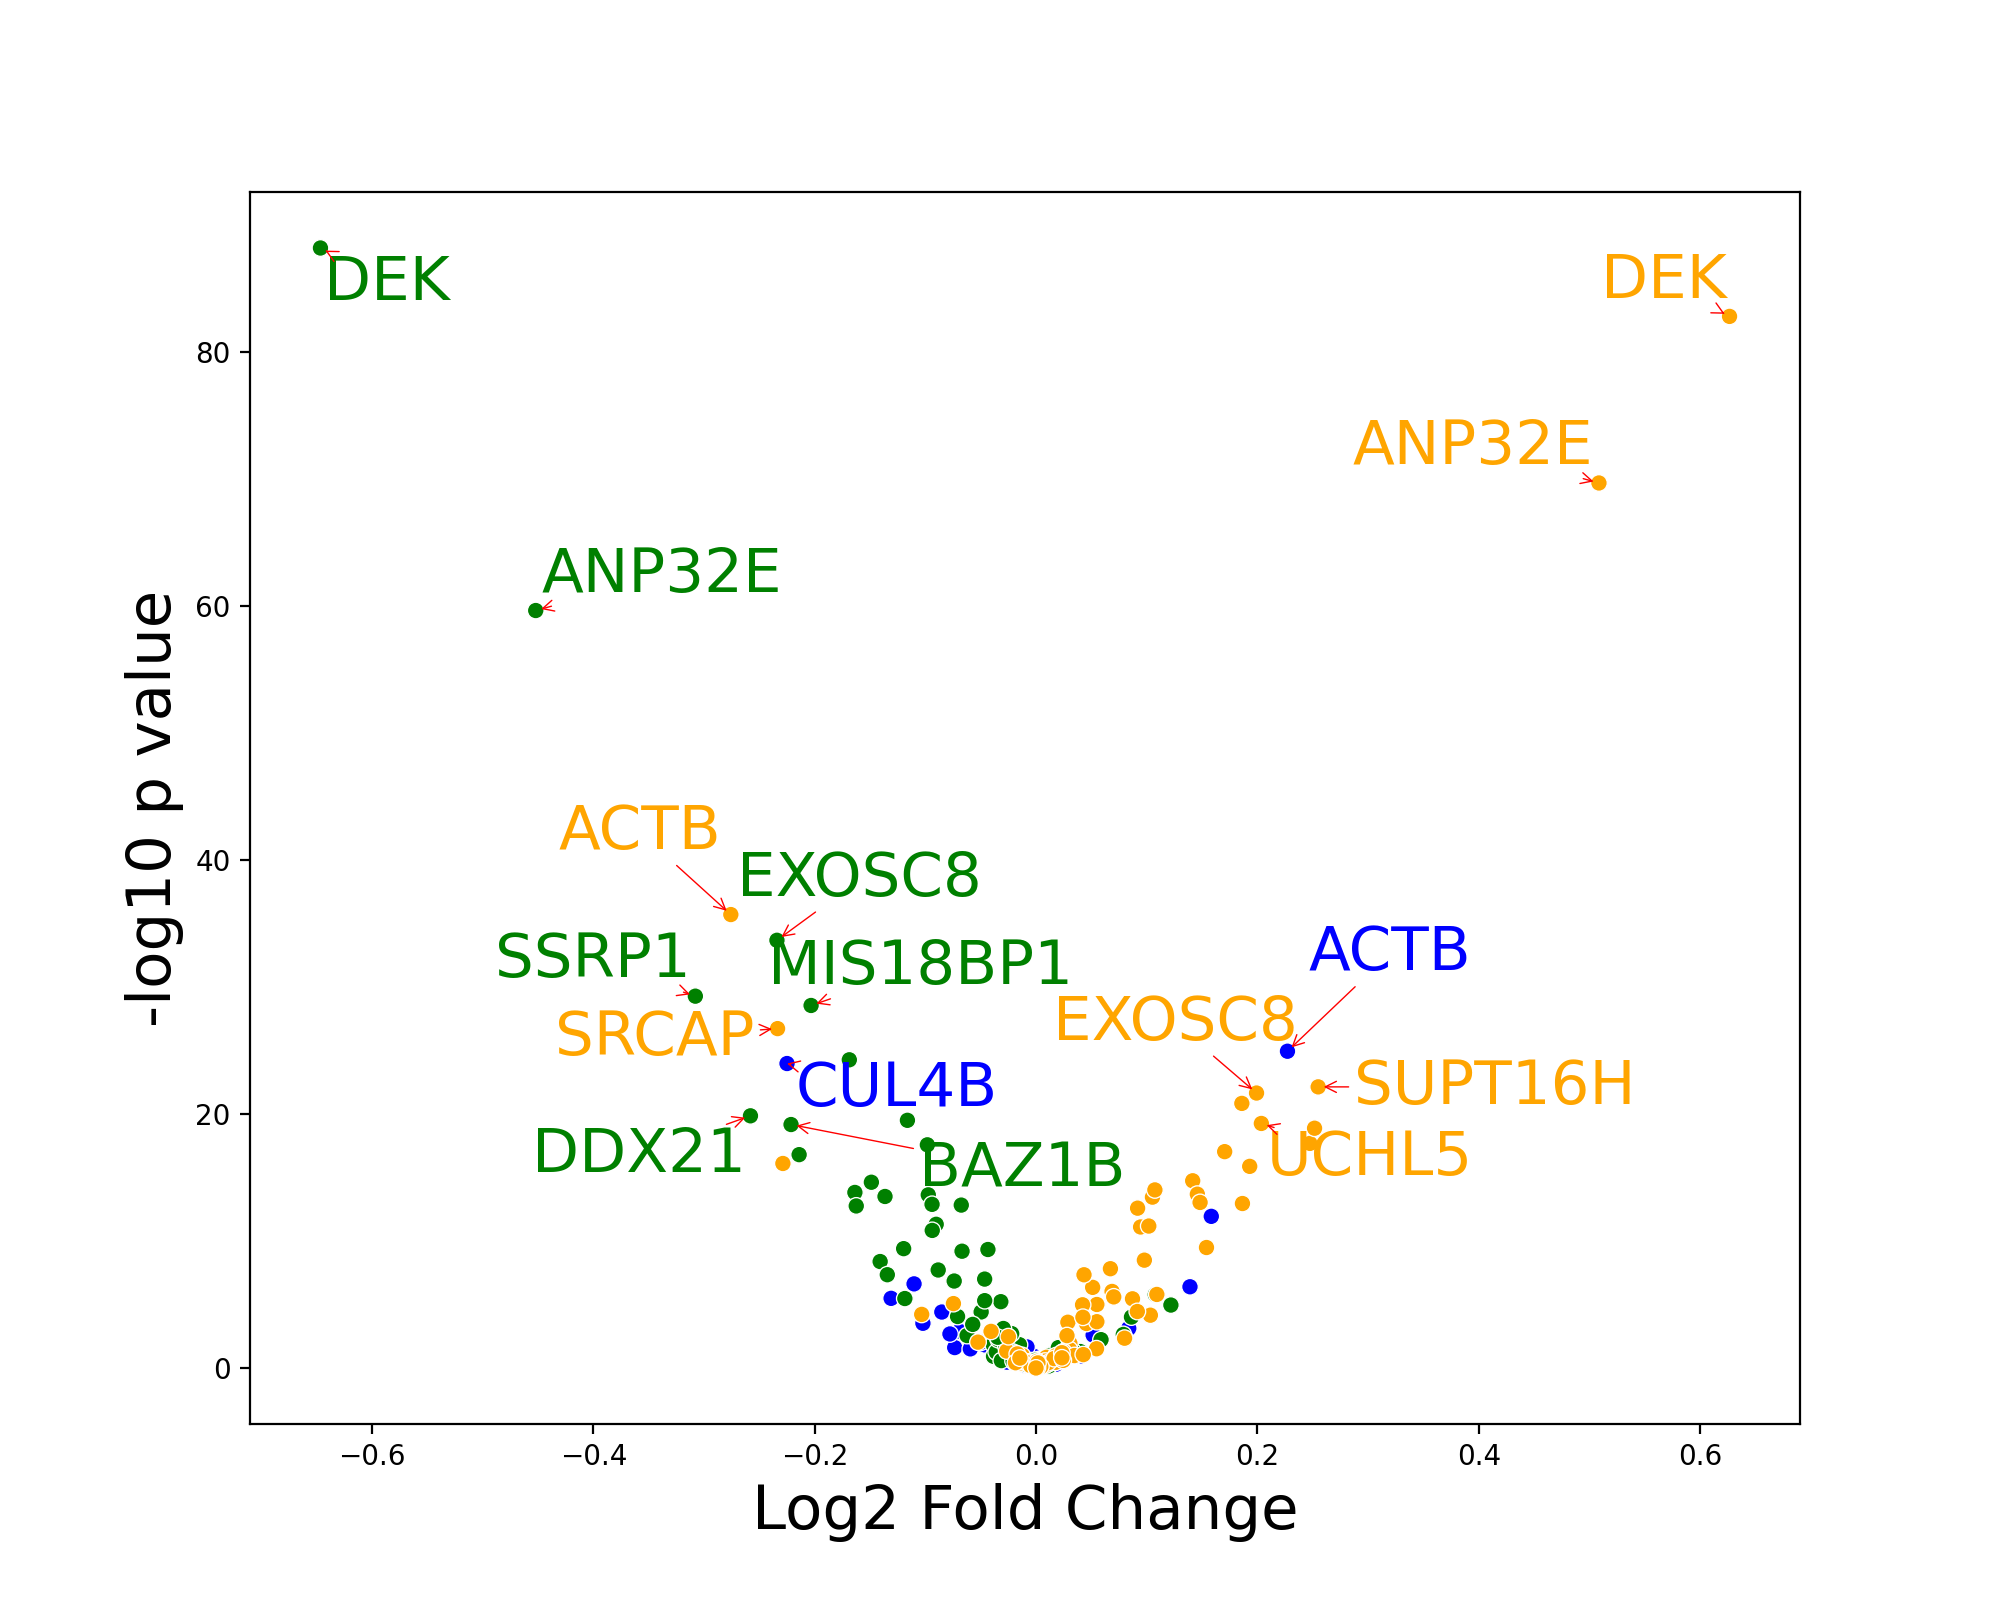

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

def create_volcano_plot(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Low EMT': 'blue',
        'Medium EMT': 'green',
        'High EMT': 'orange'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=22, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change', fontsize=22)
    plt.ylabel('-log10 p value', fontsize=22)
    plt.title(title)
    #plt.legend(loc = "lower right", fontsize=22)
    plt.legend().set_visible(False) 
    plt.show()

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = 0.19  # Change this value according to your data
neg_log10_fdr_threshold = 19  # Change this value according to your data


# ... [rest of the code above]


create_volcano_plot(data, '', log2_fold_change_threshold, neg_log10_fdr_threshold)






In [408]:

texts = []
significant_gene_count = 0  # Initialize a counter for significant genes

for index, row in data.iterrows():
    if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):

        significant_gene_count += 1  # Increment the count for significant genes

# ... [rest of the code below]

plt.show()

# Print out the number of significant genes
print(f"Number of significant genes plotted: {significant_gene_count}")

Number of significant genes plotted: 16


In [409]:

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

# Define thresholds
log2_fold_change_threshold = 0.19  # Change this value according to your data
neg_log10_fdr_threshold = 19  # Change this value according to your data

# Assuming you have already computed 'filtered_gene_sets' as before

# Identify significant genes based on volcano plot criteria
significant_genes = data.loc[
    (data['log2_fold_change'].abs() > log2_fold_change_threshold) & 
    (data['-log10_p_value'] > neg_log10_fdr_threshold), 
    'gene'
]

# Convert to uppercase for matching
significant_genes = significant_genes.str.upper().tolist()

# Get a set of significant genes for fast lookup
significant_gene_set = set(significant_genes)

# Filter the gene sets
filtered_gene_sets_50percent = {}
for complex_name, genes in filtered_gene_sets.items():
    # Calculate the percentage of significant genes
    significant_genes_count = sum(gene in significant_gene_set for gene in genes)
    if significant_genes_count / len(genes) >= 0.5:
        filtered_gene_sets_50percent[complex_name] = genes

# Print the gene sets that contain 50% of significant genes
print("Gene sets containing at least 50% of significant genes:")
for complex_name, genes in filtered_gene_sets_50percent.items():
    significant_genes_in_set = [gene for gene in genes if gene in significant_gene_set]
    print(f"{complex_name}:")
    print(f"All genes ({len(genes)}): {genes}")
    print(f"Significant genes ({len(significant_genes_in_set)}): {significant_genes_in_set}\n")


Gene sets containing at least 50% of significant genes:
B-WICH:
All genes (5): ['BAZ1B', 'DDX21', 'DEK', 'ERCC6', 'SIRT7']
Significant genes (3): ['BAZ1B', 'DDX21', 'DEK']

FACT:
All genes (2): ['SSRP1', 'SUPT16H']
Significant genes (2): ['SSRP1', 'SUPT16H']

NUA4-RELATED COMPLEX:
All genes (4): ['ACTB', 'BRD8', 'SRCAP', 'YEATS4']
Significant genes (2): ['ACTB', 'SRCAP']

WINAC:
All genes (4): ['ARID1A', 'BAZ1B', 'CHAF1B', 'SUPT16H']
Significant genes (2): ['BAZ1B', 'SUPT16H']



In [410]:
# Filter the gene sets
filtered_gene_sets_at_least_one_significant = {}
for complex_name, genes in filtered_gene_sets.items():
    # Check if at least one gene is significant
    if any(gene in significant_gene_set for gene in genes):
        filtered_gene_sets_at_least_one_significant[complex_name] = genes

# Print the gene sets that contain at least one significant gene
print("Gene sets containing at least one significant gene:")
for complex_name, genes in filtered_gene_sets_at_least_one_significant.items():
    significant_genes_in_set = [gene for gene in genes if gene in significant_gene_set]
    print(f"{complex_name}:")
    print(f"All genes ({len(genes)}): {genes}")
    print(f"Significant genes ({len(significant_genes_in_set)}): {significant_genes_in_set}\n")


Gene sets containing at least one significant gene:
B-WICH:
All genes (5): ['BAZ1B', 'DDX21', 'DEK', 'ERCC6', 'SIRT7']
Significant genes (3): ['BAZ1B', 'DDX21', 'DEK']

BAF:
All genes (4): ['ACTB', 'ARID1A', 'ARID1B', 'SMARCD2']
Significant genes (1): ['ACTB']

CRL4-DDB2 E3 UBIQUITIN LIGASE COMPLEX, CUL4A, CUL4B VARIANTS:
All genes (3): ['DDB2', 'RBX1', 'CUL4B']
Significant genes (1): ['CUL4B']

FACT:
All genes (2): ['SSRP1', 'SUPT16H']
Significant genes (2): ['SSRP1', 'SUPT16H']

INO80:
All genes (3): ['INO80B', 'INO80C', 'UCHL5']
Significant genes (1): ['UCHL5']

MIS18:
All genes (3): ['MIS18A', 'OIP5', 'MIS18BP1']
Significant genes (1): ['MIS18BP1']

NUA4:
All genes (6): ['ACTB', 'BRD8', 'ING3', 'KAT5', 'MORF4L2', 'YEATS4']
Significant genes (1): ['ACTB']

NUA4-RELATED COMPLEX:
All genes (4): ['ACTB', 'BRD8', 'SRCAP', 'YEATS4']
Significant genes (2): ['ACTB', 'SRCAP']

PBAF:
All genes (4): ['ACTB', 'ARID1A', 'ARID1B', 'SMARCD2']
Significant genes (1): ['ACTB']

RNA EXOSOME:
All gene

In [757]:

# Load the data from R
r_dataframe = pd.read_csv("Desktop/EMT_Optimal_Transport/volcano_data_zhang_M_mes_from_zhang.csv")

# Drop the 'Unnamed: 0' column
r_dataframe = r_dataframe.drop(columns=['Unnamed: 0'])

# Rename the columns
r_dataframe.columns = ['gene', 'log2_fold_change', '-log10_p_value']

# Add a column to indicate the source
r_dataframe['source'] = 'Control group (Zhang et al)'


# Load the data from python
all_results_L = pd.read_csv('Desktop/EMT_Optimal_Transport/L_gene_expression_data.csv')
all_results_L['source'] = 'Gene expression (day 8) of failed EMT fate (Deshmusk et al)'

<IPython.core.display.Javascript object>


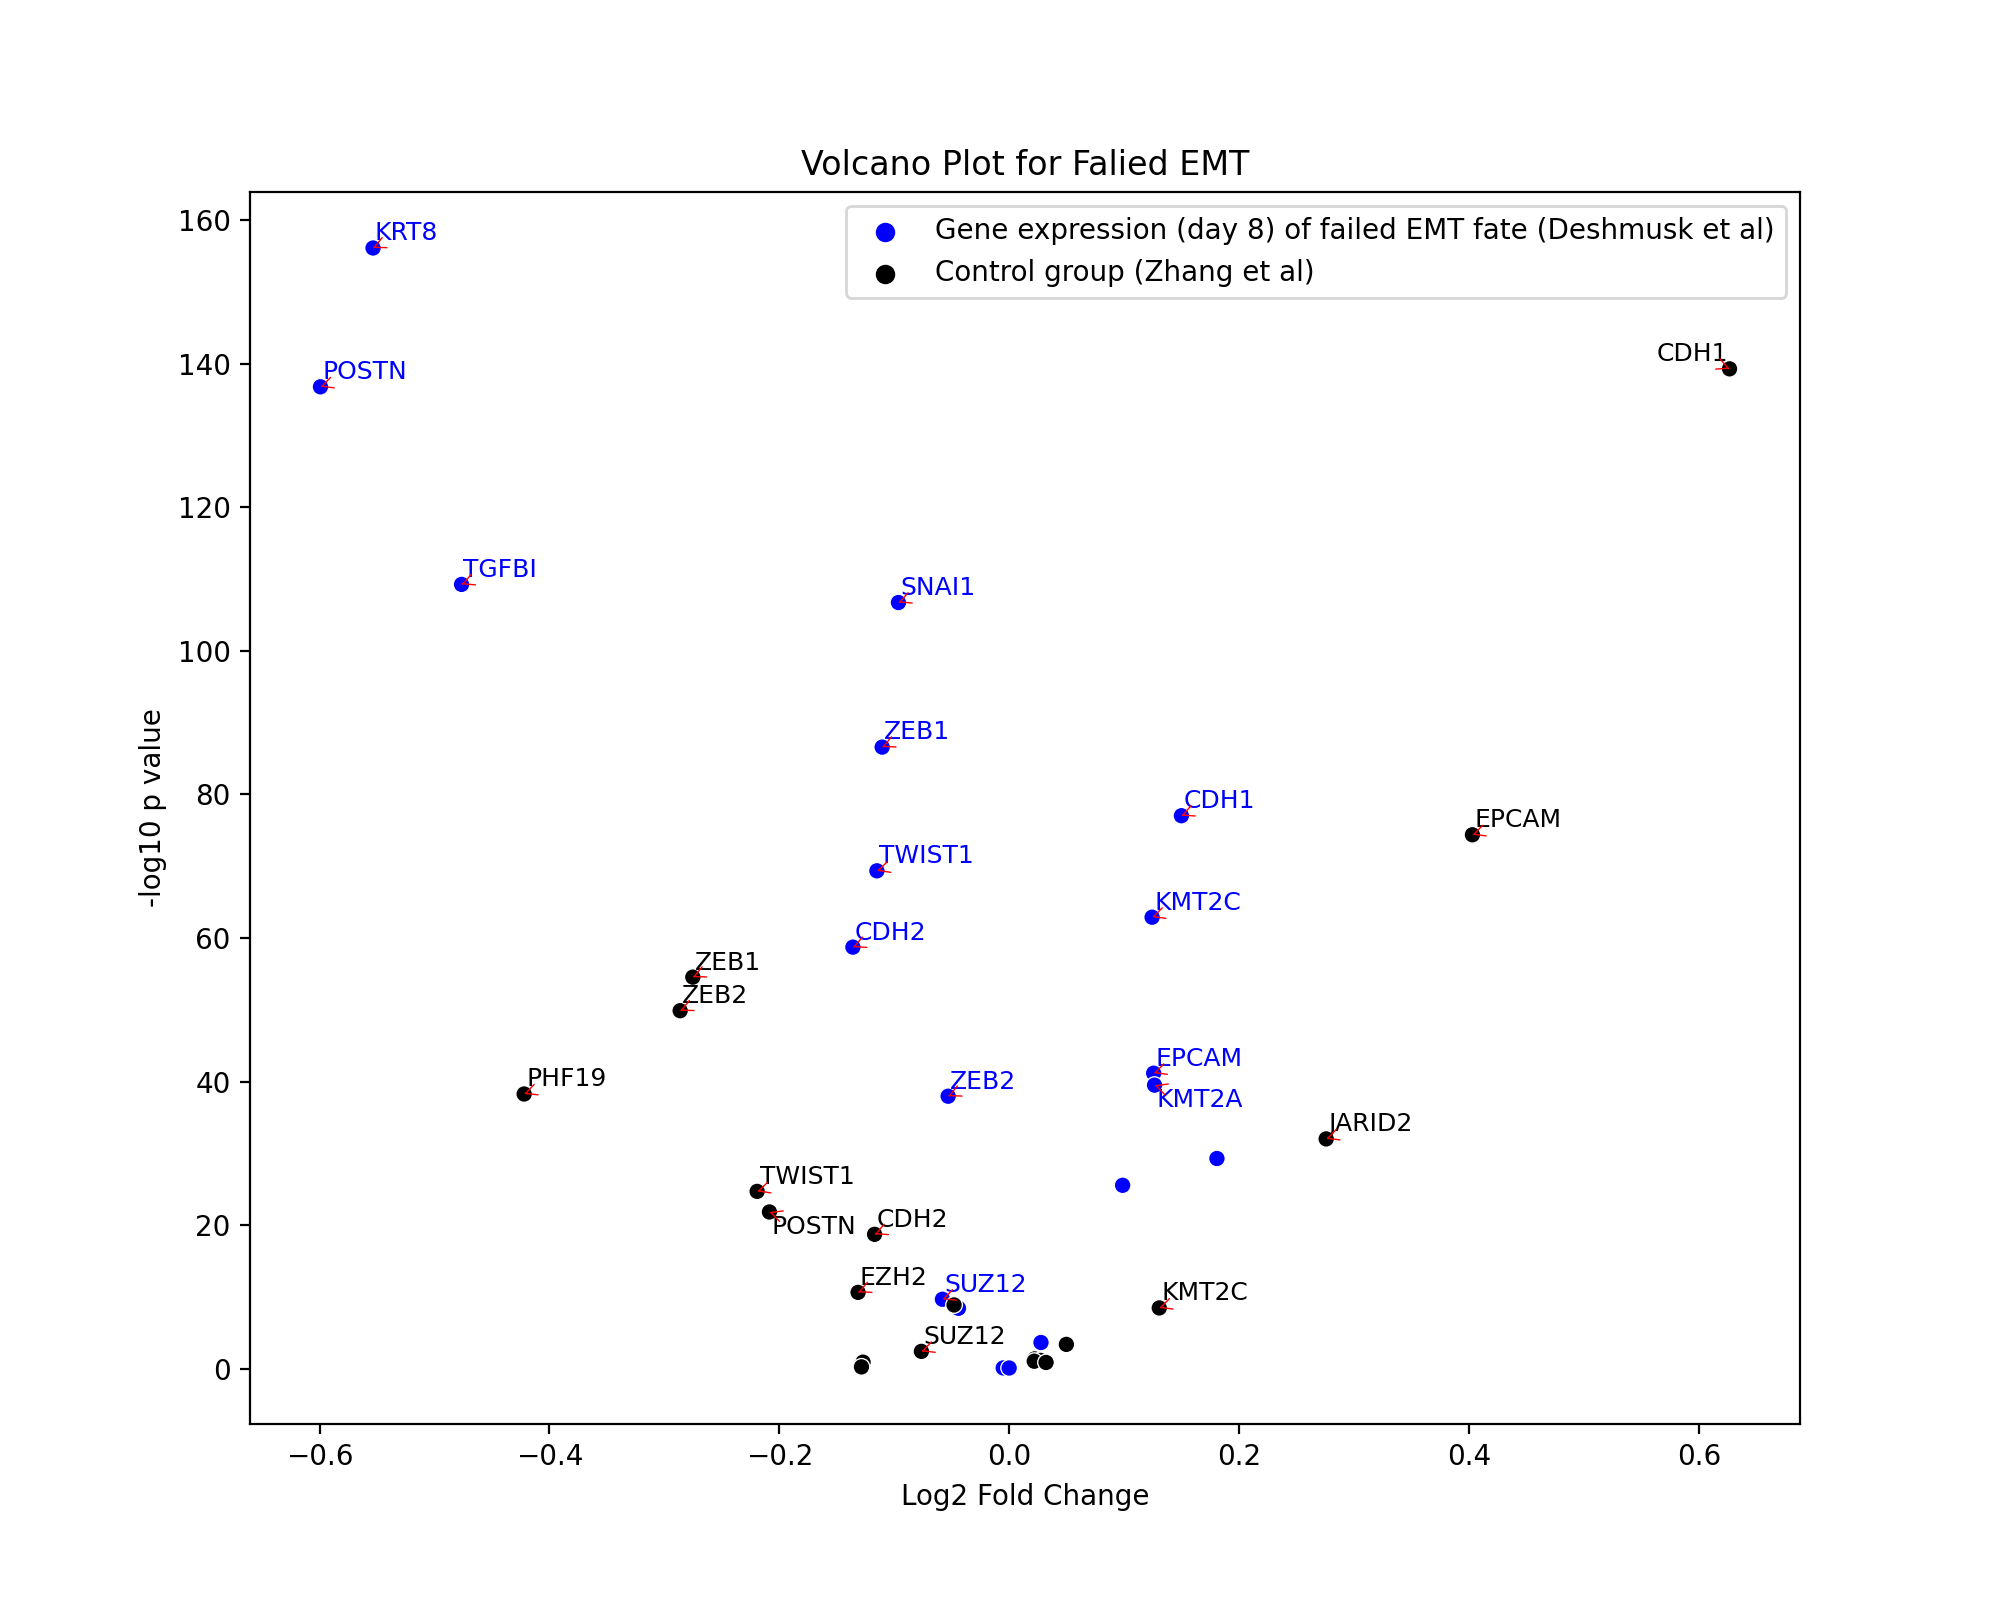

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:384: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 1] - points[0, 1]


In [535]:
# Concatenate the two dataframes
all_data = pd.concat([all_results_L, r_dataframe])

def create_volcano_plot_validation(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Control group (Zhang et al)': 'black',
        'Gene expression (day 8) of failed EMT fate (Deshmusk et al)': 'blue'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='source', palette=custom_palette)

    texts = []
    
    # Dict of genes you want to exclude for a specific group
    exclude_genes = {'KMT2D-KO epithelial cells (Zhang et al)': ['DPY30', 'WDR5'],
                     'Gene expression (day 8) of failed EMT fate (Deshmusk et al)': ['EZH2', 'DSP']} #['EZH1', 'EZH2', 'DSP', "JARID2", 'SNAI1', 'MTF2']

    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            if row['gene'] not in exclude_genes.get(row['source'], []):
                color = custom_palette[row['source']]
                texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "upper right")
    plt.show()


# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data.csv')

log2_fold_change_threshold = .05  # Change this value according to your data
neg_log10_fdr_threshold = 1.4  # Change this value according to your data

create_volcano_plot_validation(all_data, 'Volcano Plot for Falied EMT', log2_fold_change_threshold, neg_log10_fdr_threshold)


In [426]:
# Find differentially expressed genes at day 4
results_M_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_M, compare='all')
results_L_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_L, compare='all')
results_H_2 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([2])], fate_ds_H, compare='all')

results_M_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_M, compare='all')
results_L_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_L, compare='all')
results_H_4 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([4])], fate_ds_H, compare='all')

results_M_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_M, compare='all')
results_L_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_L, compare='all')
results_H_8 = wot.tmap.diff_exp(adata_TF[adata_TF.obs['day'].isin([8])], fate_ds_H, compare='all')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [463]:
combined_L_2 = create_combined_df(results_L_2, 'Low EMT day 2')
combined_M_2 = create_combined_df(results_M_2, 'Medium EMT day 2')
combined_H_2 = create_combined_df(results_H_2, 'High EMT day 2')

combined_L_4 = create_combined_df(results_L_4, 'Low EMT day 4')
combined_M_4 = create_combined_df(results_M_4, 'Medium EMT day 4')
combined_H_4 = create_combined_df(results_H_4, 'High EMT day 4')

combined_L_8 = create_combined_df(results_L_8, 'Low EMT day 8')
combined_M_8 = create_combined_df(results_M_8, 'Medium EMT day 8')
combined_H_8 = create_combined_df(results_H_8, 'High EMT day 8')

all_results_L = pd.concat([combined_L_2, combined_L_4, combined_L_8], ignore_index=True)
all_results_L.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_L.csv', index=False)

all_results_M = pd.concat([combined_M_2, combined_M_4, combined_M_8], ignore_index=True)
all_results_M.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_M.csv', index=False)

all_results_H = pd.concat([combined_H_2, combined_H_4, combined_H_8], ignore_index=True)
all_results_H.to_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_H.csv', index=False)


<IPython.core.display.Javascript object>


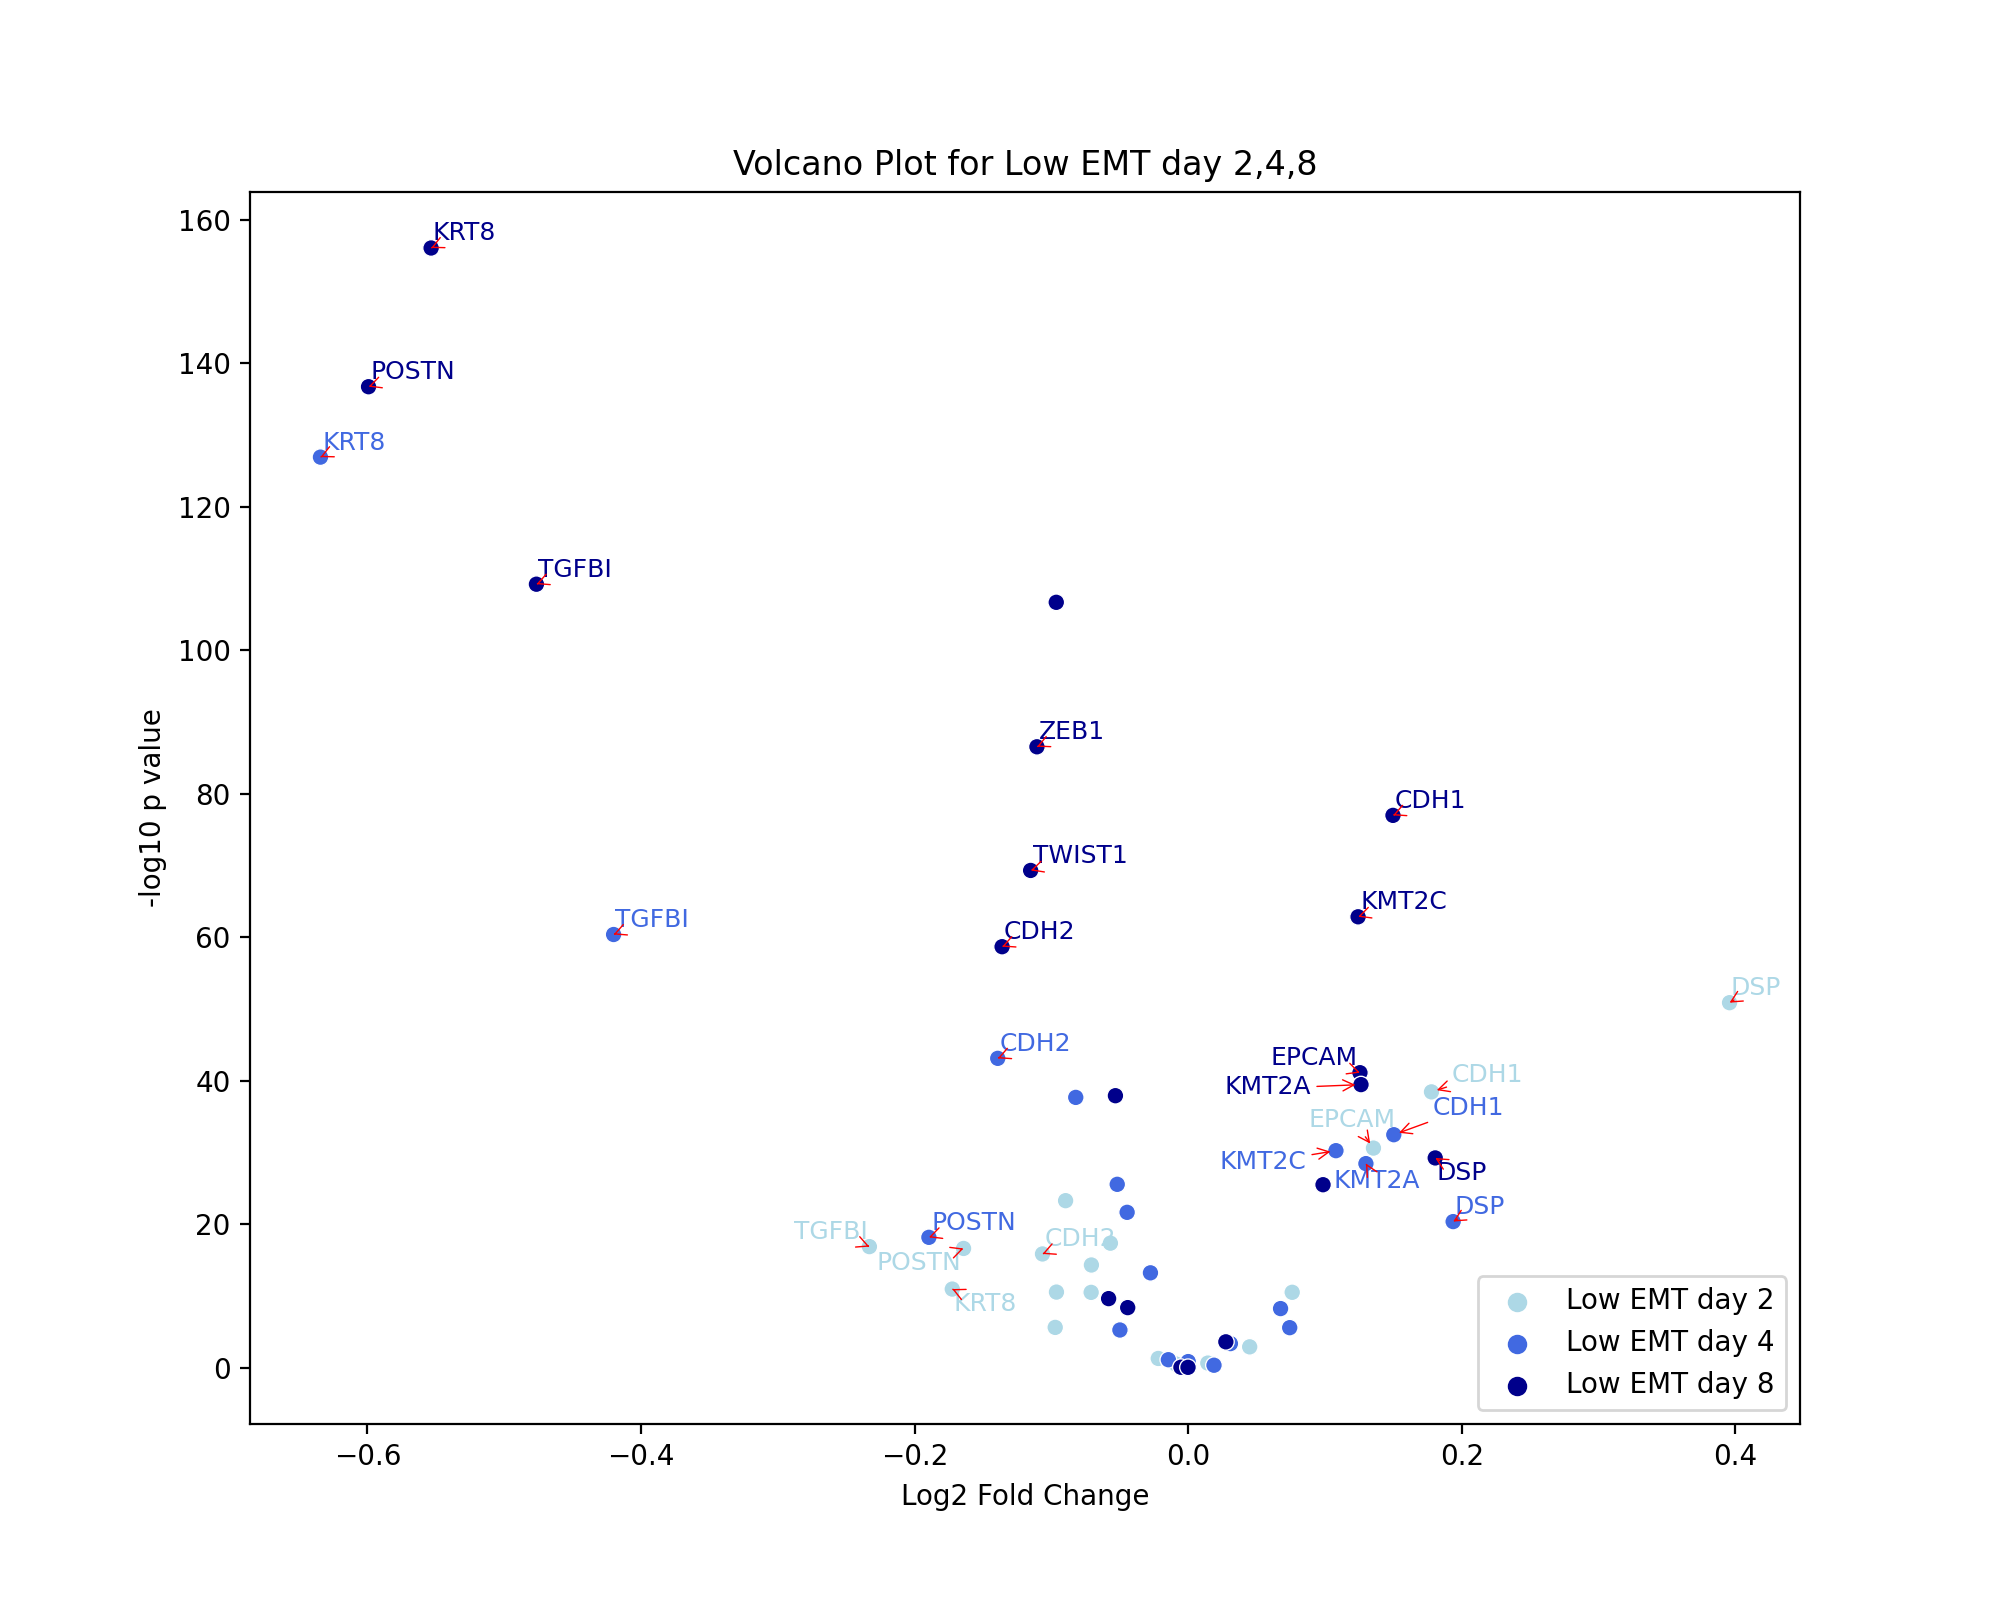

In [467]:


def create_volcano_plot_L(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Low EMT day 2': '#add8e6',
        'Low EMT day 4': '#4169e1',
        'Low EMT day 8': '#00008b'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_L.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 10  # Change this value according to your data

create_volcano_plot_L(data, 'Volcano Plot for Low EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)


<IPython.core.display.Javascript object>


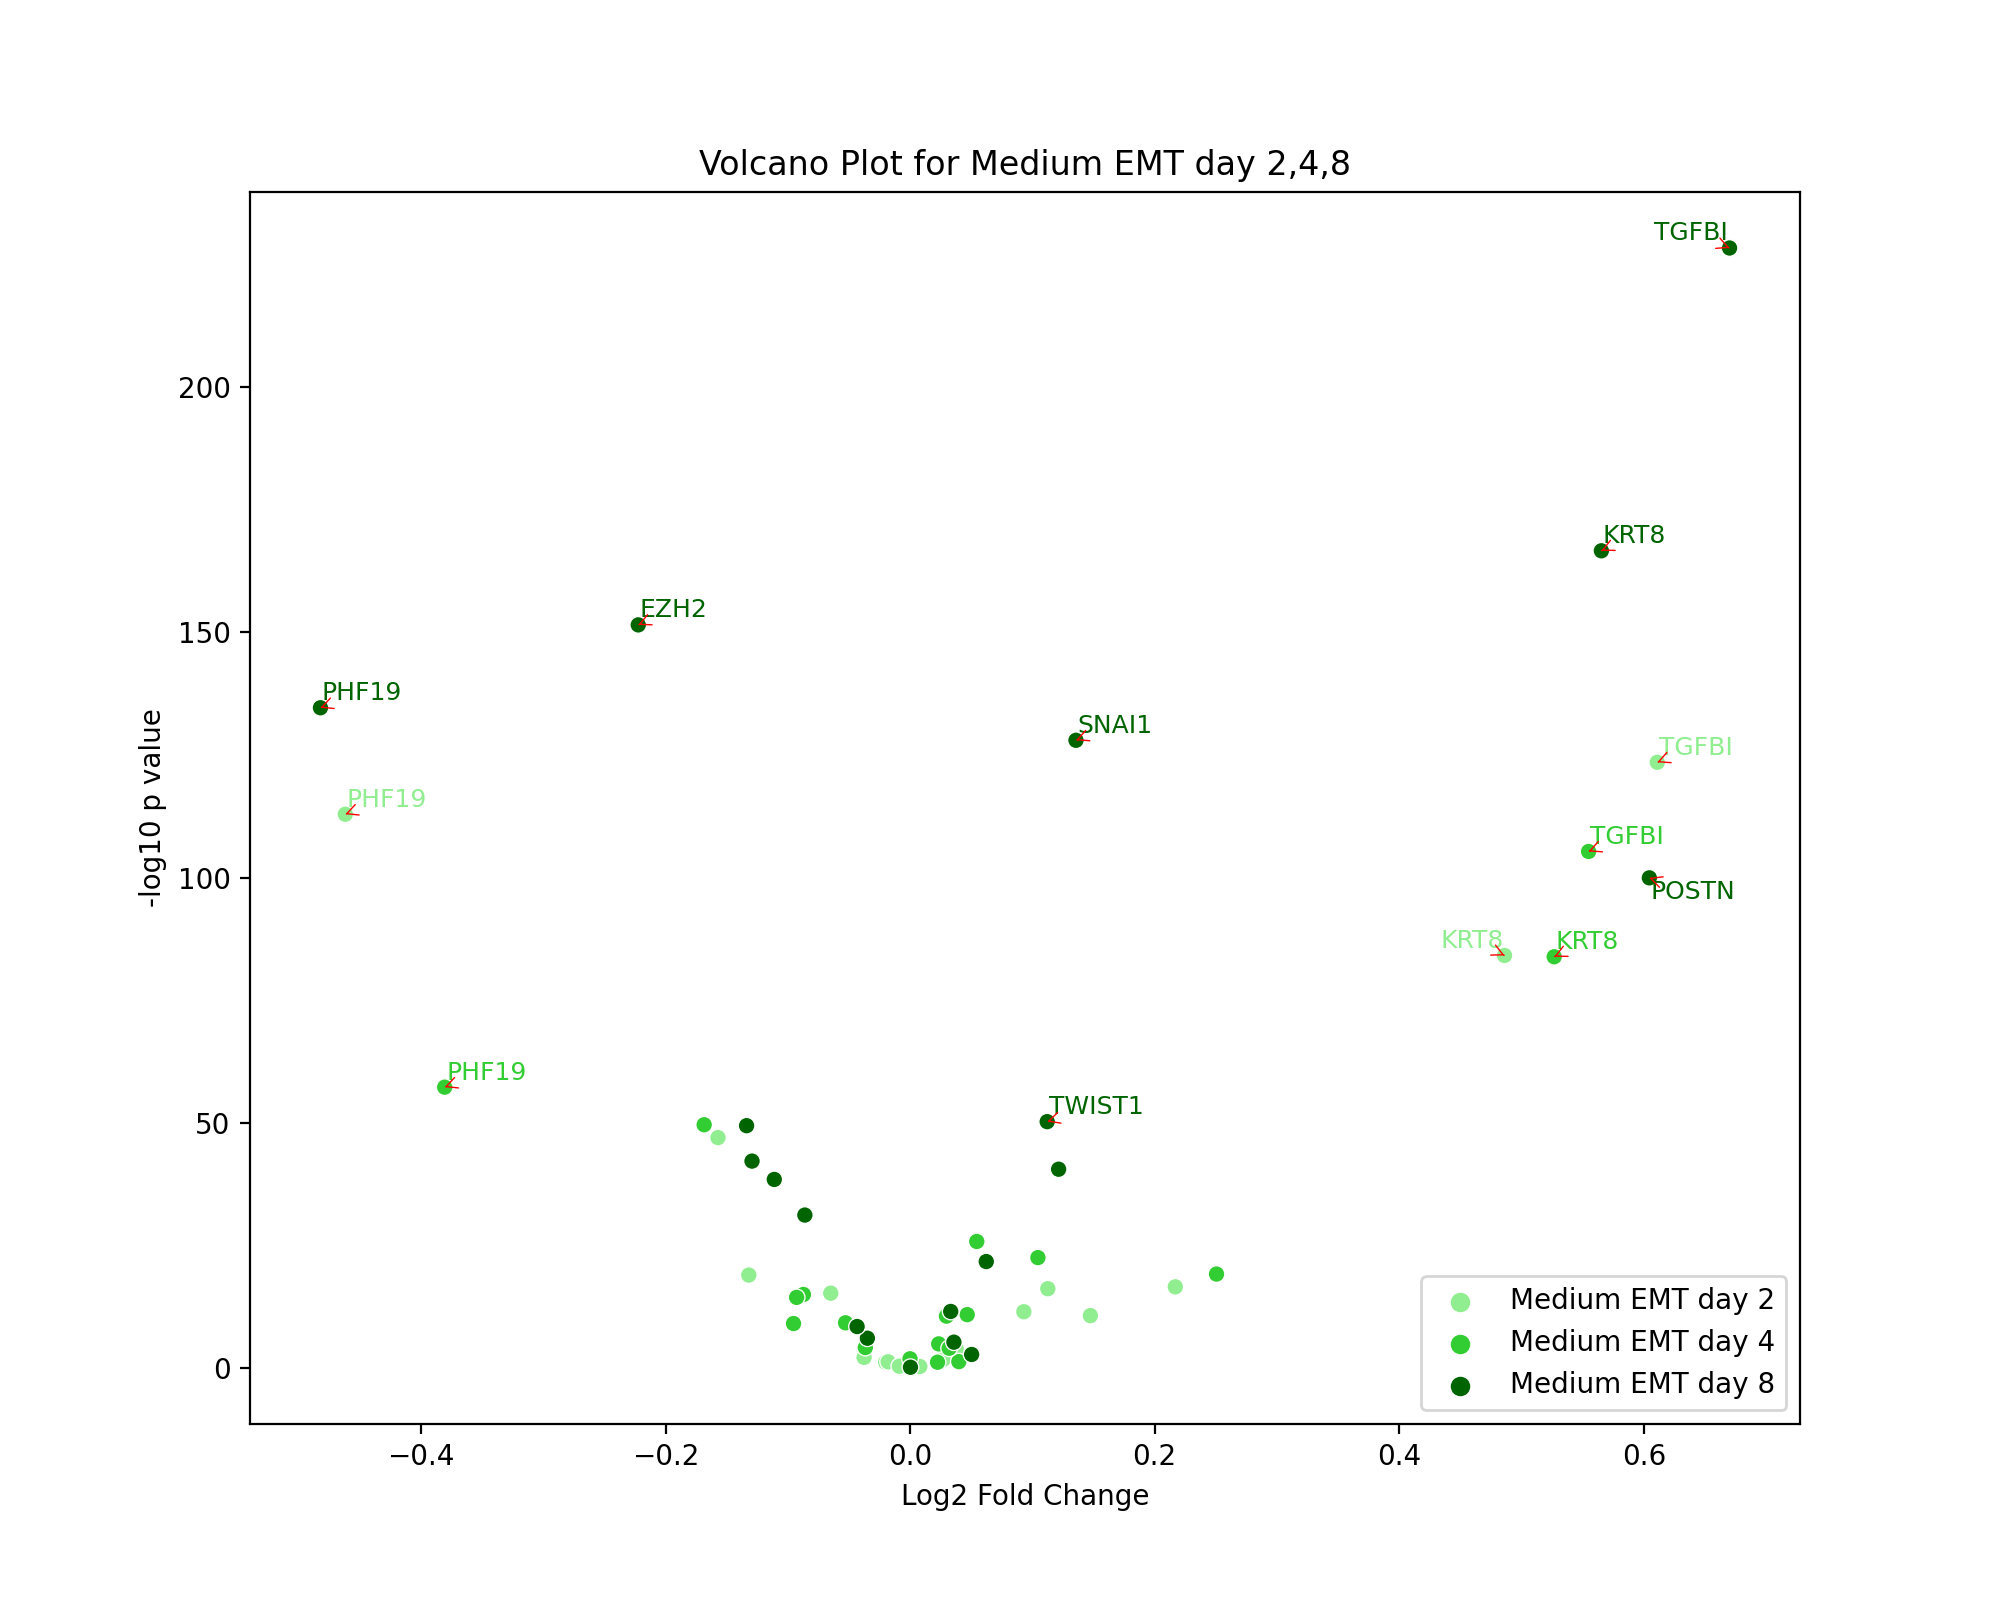

In [386]:

def create_volcano_plot_M(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'Medium EMT day 2': '#90ee90',
        'Medium EMT day 4': '#32cd32',
        'Medium EMT day 8': '#006400'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_M.csv')

log2_fold_change_threshold = .1  # Change this value according to your data
neg_log10_fdr_threshold = 50  # Change this value according to your data

create_volcano_plot_M(data, 'Volcano Plot for Medium EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)

<IPython.core.display.Javascript object>


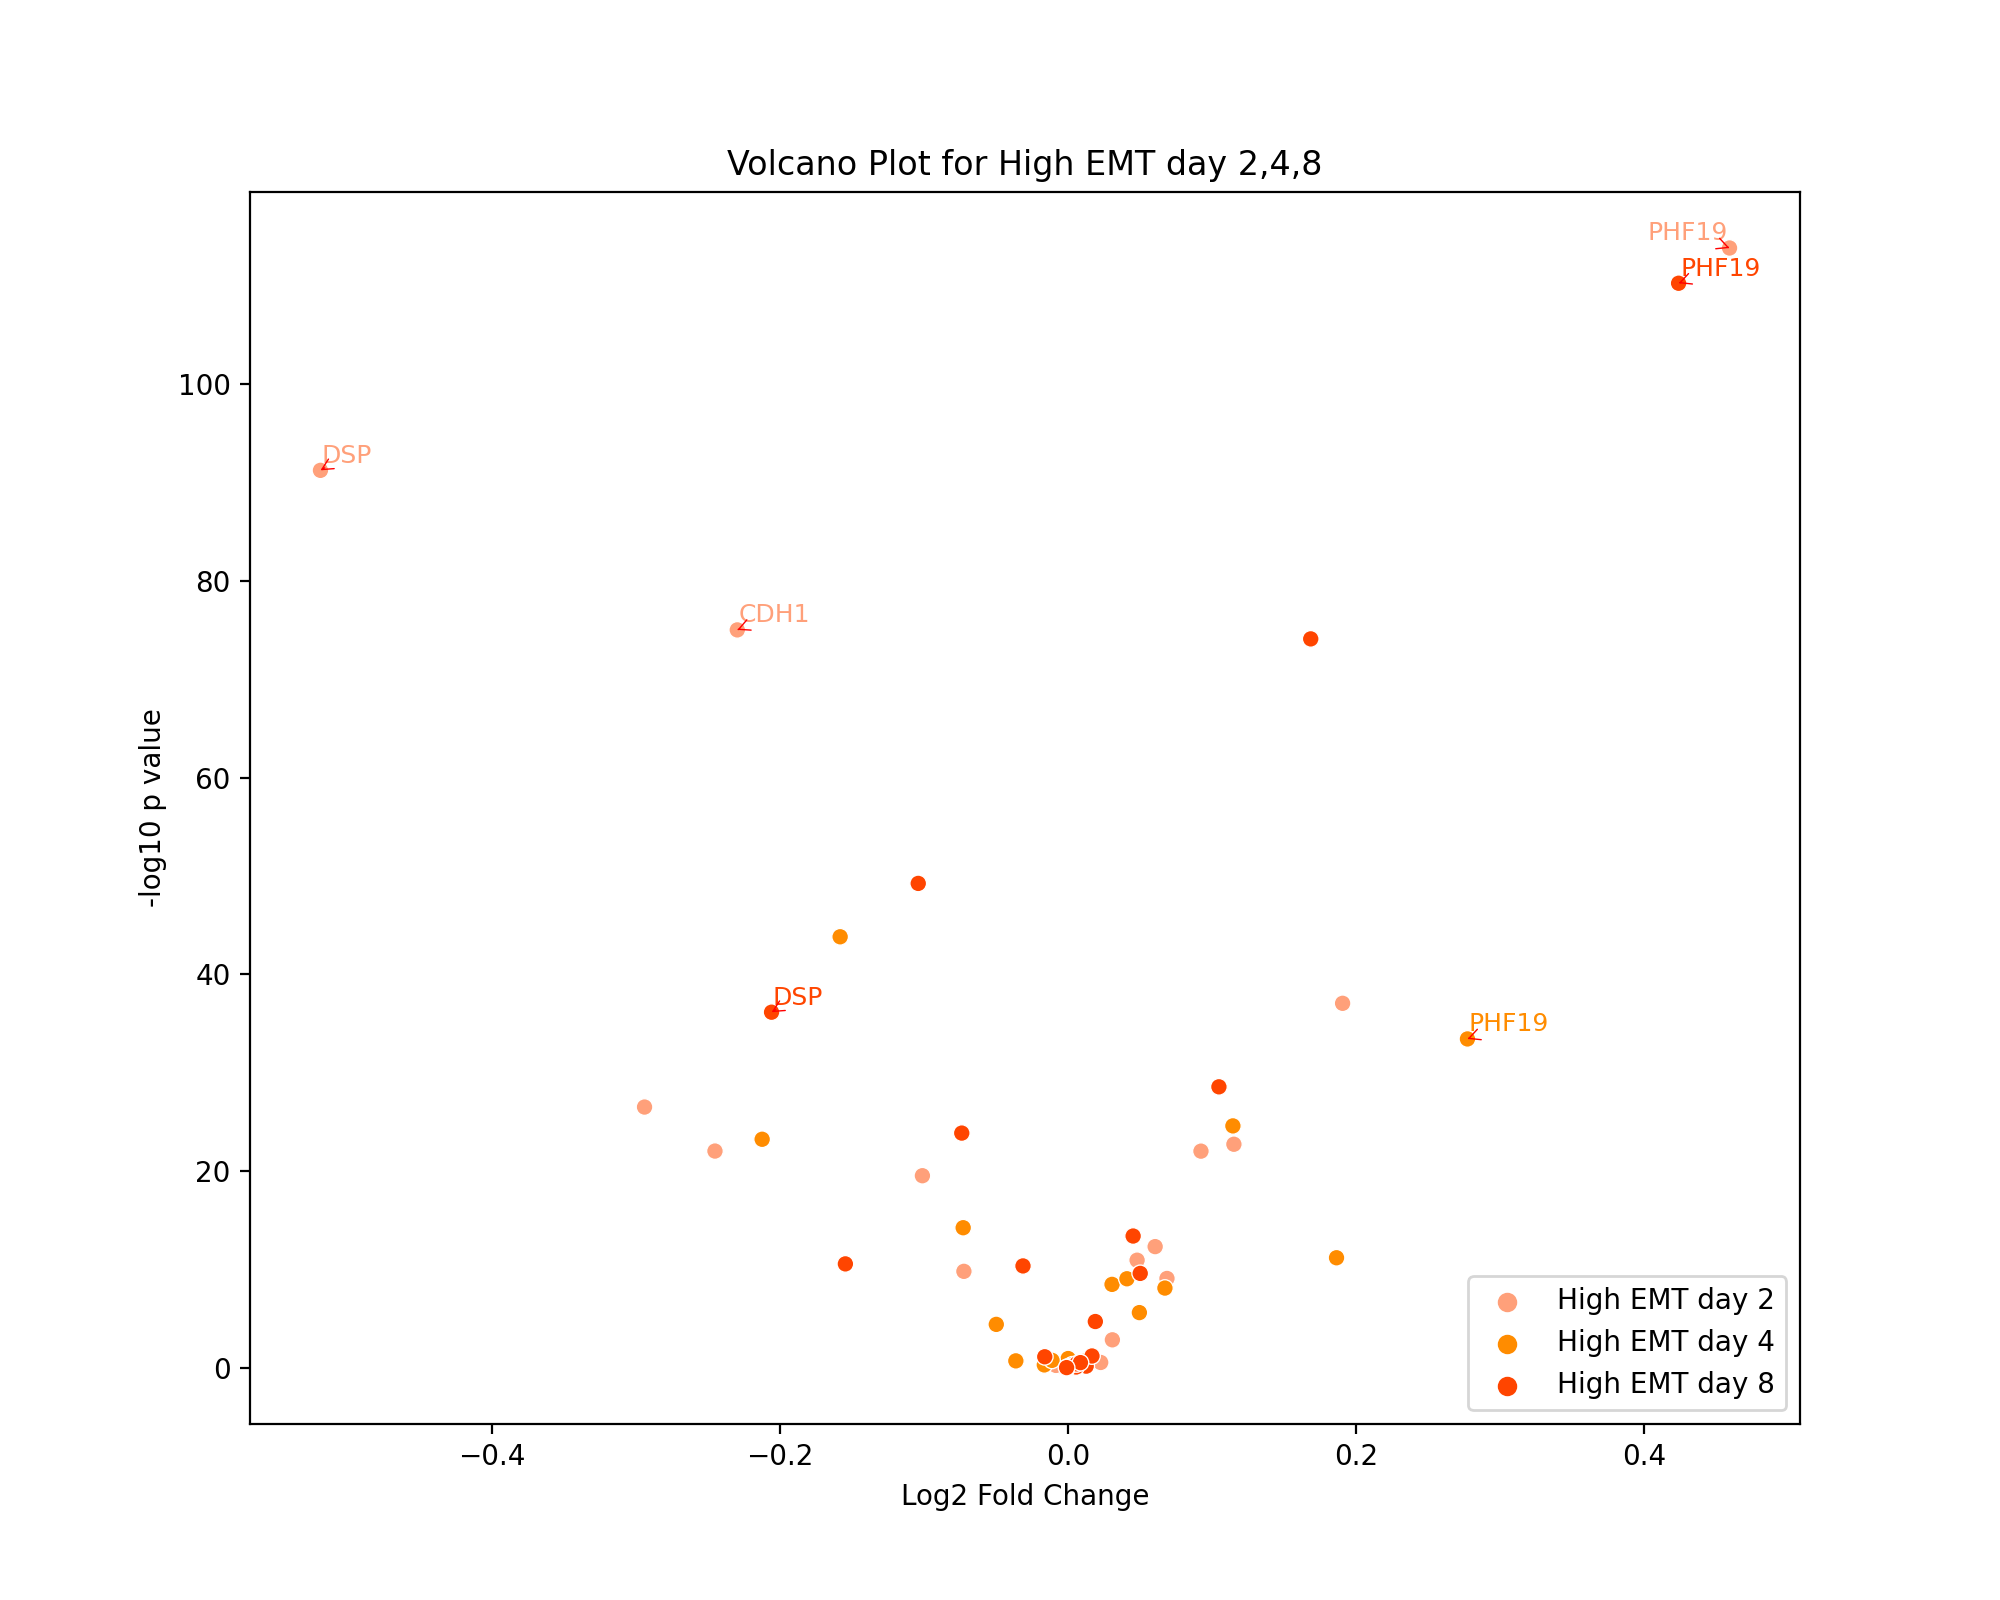

In [387]:
def create_volcano_plot_H(data, title, log2_fold_change_threshold, neg_log10_fdr_threshold):
    plt.figure(figsize=(10, 8))
    
    custom_palette = {
        'High EMT day 2': '#FFA07A',
        'High EMT day 4': '#FF8C00',
        'High EMT day 8': '#FF4500'
    }
    
    plot = sns.scatterplot(data=data, x='log2_fold_change', y='-log10_p_value', hue='group', palette=custom_palette)

    texts = []
    for index, row in data.iterrows():
        if (abs(row['log2_fold_change']) > log2_fold_change_threshold) and (row['-log10_p_value'] > neg_log10_fdr_threshold):
            color = custom_palette[row['group']]
            texts.append(plot.text(row['log2_fold_change'], row['-log10_p_value'], row['gene'], fontsize=9, ha='center', color=color))

    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10 p value')
    plt.title(title)
    plt.legend(loc = "lower right")
    plt.show()
    

# Load the combined data from the CSV file
data = pd.read_csv('Desktop/EMT_Optimal_Transport/all_gene_expression_data_H.csv')

log2_fold_change_threshold = .2  # Change this value according to your data
neg_log10_fdr_threshold = 30  # Change this value according to your data

create_volcano_plot_H(data, 'Volcano Plot for High EMT day 2,4,8', log2_fold_change_threshold, neg_log10_fdr_threshold)

In [1136]:
results_L[(results_L['t_fdr']<0.01)&(results_L['name1']=='Low EMT')].sort_values('fold_change', ascending=False).head(10)



fold_change     mean1     mean2  fraction_expressed1  \
DSP          1.315622  1.157841  0.883532             0.916213   
MUC1         1.248741  0.350886  0.128750             0.474560   
TMEM132A     1.200643  0.530795  0.347937             0.750633   
CTSD         1.180546  0.963956  0.797979             0.925386   
CDK6         1.177083  0.697588  0.534549             0.834611   
TUBA1A       1.171240  1.295629  1.137566             0.896256   
TFAP2A       1.164907  0.515366  0.362725             0.771310   
HRAS         1.143903  1.158034  1.023587             0.962437   
TUBB2A       1.132231  0.575561  0.451371             0.798028   
RPS25        1.118279  2.820864  2.709073             0.998236   

          fraction_expressed2    t_score        t_pval         t_fdr  \
DSP                  0.847111  15.303290  1.219334e-51  6.060088e-49   
MUC1                 0.250707  18.573231  9.141550e-74  4.570775e-71   
TMEM132A             0.626761  15.666239  6.467845e-54  3.227455e-51   
CTSD                 0.870864  11.728559  2.448671e-31  1.199849e-28   
CDK6                 0.737322  12.144626  1.908542e-33  9.370942e-31   
TUBA1A               0.850399   6.603398  4.457980e-11  2.037297e-08   
TFAP2A               0.639453  13.585683  2.920383e-41  1.442669e-38   
HRAS                 0.940372  11.089683  3.114482e-28  1.522982e-25   
TUBB2A               0.702009  10.350647  7.627449e-25  3.706940e-22   
RPS25                0.995339  12.743239  1.339342e-36  6.589561e-34   

          fraction_expressed_ratio  day1  day2    name1  name2  
DSP                       1.081563   2.0   2.0  Low EMT  Other  
MUC1                      1.892526   2.0   2.0  Low EMT  Other  
TMEM132A                  1.197607   2.0   2.0  Low EMT  Other  
CTSD                      1.062599   2.0   2.0  Low EMT  Other  
CDK6                      1.131931   2.0   2.0  Low EMT  Other  
TUBA1A                    1.053918   2.0   2.0  Low EMT  Other  
TFAP2A                    1.206172   2.0   2.0  Low EMT  Other  
HRAS                      1.023461   2.0   2.0  Low EMT  Other  
TUBB2A                    1.136758   2.0   2.0  Low EMT  Other  
RPS25                     1.002909   2.0   2.0  Low EMT  Other

In [1150]:
results_M[(results_M['t_fdr']<0.01)&(results_M['name1']=='Medium EMT')].sort_values('fold_change', ascending=False).head(40)
                                                                                                


fold_change     mean1     mean2  fraction_expressed1  \
LAMA3       1.656470  1.677019  1.172330             0.785381   
TAGLN       1.611372  1.670719  1.193633             0.883520   
LAMB3       1.547679  2.403691  1.966935             0.988693   
ITGB4       1.494501  1.347907  0.946115             0.853282   
KRT14       1.427863  2.228394  1.872215             0.859549   
LGALS1      1.350316  4.100317  3.799978             0.999673   
MYL9        1.335996  0.644223  0.354545             0.657072   
CALD1       1.333904  1.946728  1.658618             0.990145   
ITGB1       1.321648  2.077052  1.798173             0.996341   
COL17A1     1.305311  0.786563  0.520122             0.710735   
ITGA6       1.232546  1.231830  1.022748             0.899687   
GSN         1.222218  0.459601  0.258933             0.699055   
HTRA1       1.212544  0.749005  0.556284             0.832889   
PDLIM7      1.212294  1.306667  1.114153             0.968396   
PRNP        1.203754  0.962965  0.777520             0.928008   
KANK4       1.200909  0.409610  0.226531             0.622729   
COL4A1      1.192111  0.708628  0.532903             0.835483   
VIM         1.177158  3.501523  3.338421             0.998648   
KRT5        1.173269  1.686290  1.526496             0.906808   
CDH3        1.167686  0.503332  0.348308             0.625096   
RND3        1.164935  0.694276  0.541610             0.827807   
VCAN        1.164901  0.664066  0.511430             0.815904   
TPM2        1.163781  1.947412  1.795737             0.989162   
LIMA1       1.162019  0.830990  0.680831             0.831094   
IGFBP6      1.158665  1.022366  0.875098             0.911354   
JAG1        1.157058  0.703888  0.558007             0.809152   
BMP1        1.132934  0.479216  0.354405             0.757541   
PDPN        1.132656  0.692137  0.567572             0.844165   
COL4A2      1.131911  0.803841  0.679934             0.895013   
MMP2        1.126875  0.262662  0.143214             0.467259   
PHLDA3      1.118196  0.798732  0.687015             0.890791   
POSTN       1.107622  0.263543  0.161328             0.216730   
DCBLD2      1.105590  0.884286  0.783907             0.913000   
SNAI2       1.095324  0.555547  0.464496             0.779974   
CDKN1A      1.092241  0.583714  0.495483             0.754039   
CRYAB       1.092220  0.250315  0.162102             0.348990   
TPST1       1.090110  0.218662  0.132384             0.465832   
TNS4        1.086998  0.574367  0.490947             0.758386   
COL7A1      1.084194  0.295647  0.214811             0.584535   
SEMA3C      1.081501  0.379278  0.300928             0.612833   

         fraction_expressed2    t_score         t_pval          t_fdr  \
LAMA3               0.682643  16.308565   3.253286e-58   1.138650e-55   
TAGLN               0.768275  15.766955   1.252333e-54   4.358118e-52   
LAMB3               0.971909  18.995188   1.305777e-77   4.635507e-75   
ITGB4               0.718987  17.744169   2.895582e-68   1.022140e-65   
KRT14               0.785329   9.067665   1.746597e-19   5.571643e-17   
LGALS1              0.997237  25.681156  6.013857e-136  2.158975e-133   
MYL9                0.472084  16.604568   4.061644e-60   1.425637e-57   
CALD1               0.974829  19.455465   3.679889e-81   1.310041e-78   
ITGB1               0.982899  20.313778   5.318512e-88   1.904027e-85   
COL17A1             0.592835  15.841858   4.242285e-55   1.480557e-52   
ITGA6               0.888631  10.915879   2.043953e-27   6.826803e-25   
GSN                 0.494465  18.641254   7.919015e-75   2.803331e-72   
HTRA1               0.768756  13.137733   9.855605e-39   3.380473e-36   
PDLIM7              0.950647  14.162899   1.239676e-44   4.289279e-42   
PRNP                0.883802  13.439260   1.936107e-40   6.679568e-38   
KANK4               0.426642  17.150488   6.254535e-64   2.201596e-61   
COL4A1              0.765477  12.981326   6.913378e-38   2.364375e-35   
VIM                 0.985499 

In [1142]:
results_H[(results_H['t_fdr']<0.01)&(results_H['name1']=='High EMT')].sort_values('fold_change', ascending=False).head(10)


fold_change     mean1     mean2  fraction_expressed1  \
CENPF        2.155624  1.561840  0.793760             0.925449   
UBE2S        1.957086  2.263816  1.592360             0.967130   
PTTG1        1.828218  1.620150  1.016808             0.933418   
HIST1H4C     1.814766  1.533743  0.937787             0.896364   
CKS1B        1.796260  1.522558  0.936851             0.946831   
MKI67        1.754605  1.118017  0.555774             0.888906   
CKS2         1.732950  1.370902  0.821077             0.925798   
CCNB1        1.656302  1.083193  0.578605             0.855932   
CDC20        1.615789  1.002762  0.522939             0.866973   
UBE2C        1.614987  1.012242  0.532915             0.796410   

          fraction_expressed2    t_score         t_pval          t_fdr  \
CENPF                0.613977  32.772396  2.128984e-212  1.066621e-209   
UBE2S                0.934535  28.810287  1.224840e-167  6.050710e-165   
PTTG1                0.774243  28.742567  5.847811e-167  2.882971e-164   
HIST1H4C             0.781798  20.471682   2.914866e-89   1.288371e-86   
CKS1B                0.824860  32.653667  3.582602e-210  1.791301e-207   
MKI67                0.524982  31.301533  1.135807e-195  5.667675e-193   
CKS2                 0.795142  28.632093  1.721162e-166  8.468119e-164   
CCNB1                0.611871  26.350069  6.021458e-143  2.878257e-140   
CDC20                0.546927  27.507809  1.025214e-154  5.003044e-152   
UBE2C                0.517901  21.595325   1.106554e-98   5.012690e-96   

          fraction_expressed_ratio  day1  day2     name1  name2  
CENPF                     1.507219   2.0   2.0  High EMT  Other  
UBE2S                     1.034875   2.0   2.0  High EMT  Other  
PTTG1                     1.205562   2.0   2.0  High EMT  Other  
HIST1H4C                  1.146523   2.0   2.0  High EMT  Other  
CKS1B                     1.147850   2.0   2.0  High EMT  Other  
MKI67                     1.693080   2.0   2.0  High EMT  Other  
CKS2                      1.164297   2.0   2.0  High EMT  Other  
CCNB1                     1.398812   2.0   2.0  High EMT  Other  
CDC20                     1.585065   2.0   2.0  High EMT  Other  
UBE2C                     1.537661   2.0   2.0  High EMT  Other

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [170]:
day0_diff_exp = wot.tmap.diff_exp(adata_TF, fate_ds, compare='within')


/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/opt/anaconda3/e

In [125]:
day0_diff_exp[(day0_diff_exp['name1']=='Blue') & (day0_diff_exp['day1']==4) & (day0_diff_exp['fold_change']>=2) & (day0_diff_exp['t_fdr']<=0.01)].sort_values('t_score', ascending=False)


fold_change     mean1     mean2  fraction_expressed1  \
TGFBI     9.944674  3.211894  0.914856                  1.0   

       fraction_expressed2     t_score  t_pval  t_fdr  \
TGFBI             0.820081  143.291641     0.0    0.0   

       fraction_expressed_ratio  day1  day2 name1 name2  
TGFBI                  1.219366   4.0   0.0  Blue  Blue

<IPython.core.display.Javascript object>


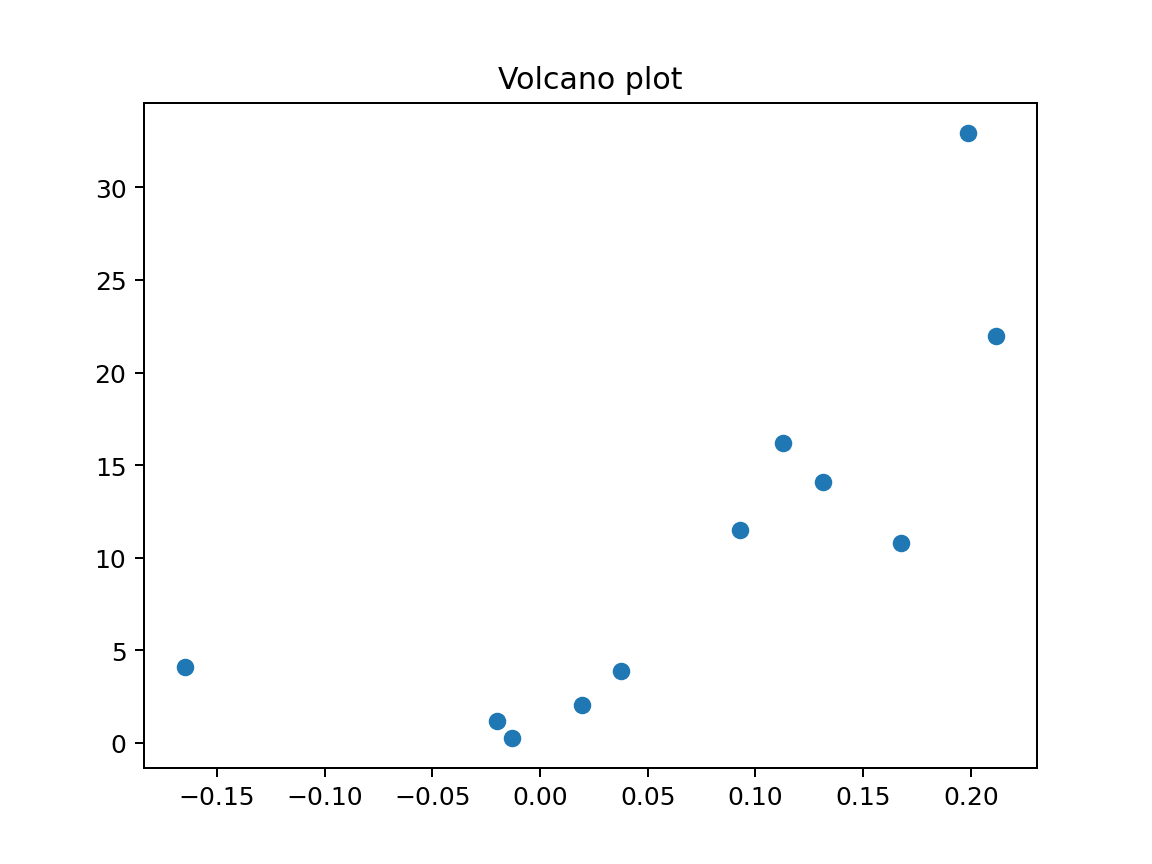

In [369]:
 

    x = np.log2(results_M['fold_change'])
    y = -np.log10(results_M['t_pval'])
    z = list(results_M.index)
    
   
    plt.scatter(x = x, y=y)
    #plt.xticks([])
    #plt.yticks([])
    
    plt.title('Volcano plot')
    plt.show()



# Gene expression profile

In [76]:
import scanpy as sc
import pandas as pd
from gseapy import ssgsea
from scipy.stats import zscore
import seaborn as sns


In [54]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')

# Converting AnnData to DataFrame
adata_df = pd.DataFrame(adata.X.T, index=adata.var.index, columns=adata.obs.index)

In [130]:
top_day0 = pd.read_csv('Desktop/EMT_Optimal_Transport/top_ancestor/results_day_0.csv')
top_day1 = pd.read_csv('Desktop/EMT_Optimal_Transport/top_ancestor/results_day_1.csv')

In [154]:
cell_marker = ['CTSC', 'CD82', 'HSP90AA1', 'VIM', 'LAMB3', 'ITGB4', 'TUBB', 'HSPD1']
#cell_marker = ['CTSC', 'VIM', 'LAMB3', 'HSP90AA1', 'TUBB', 'HSPD1', 'ITGB4']

/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_68518/1130154990.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_filtered_groups['GroupOrder'] = adata_filtered_groups['col3'].map(group_order)


<IPython.core.display.Javascript object>


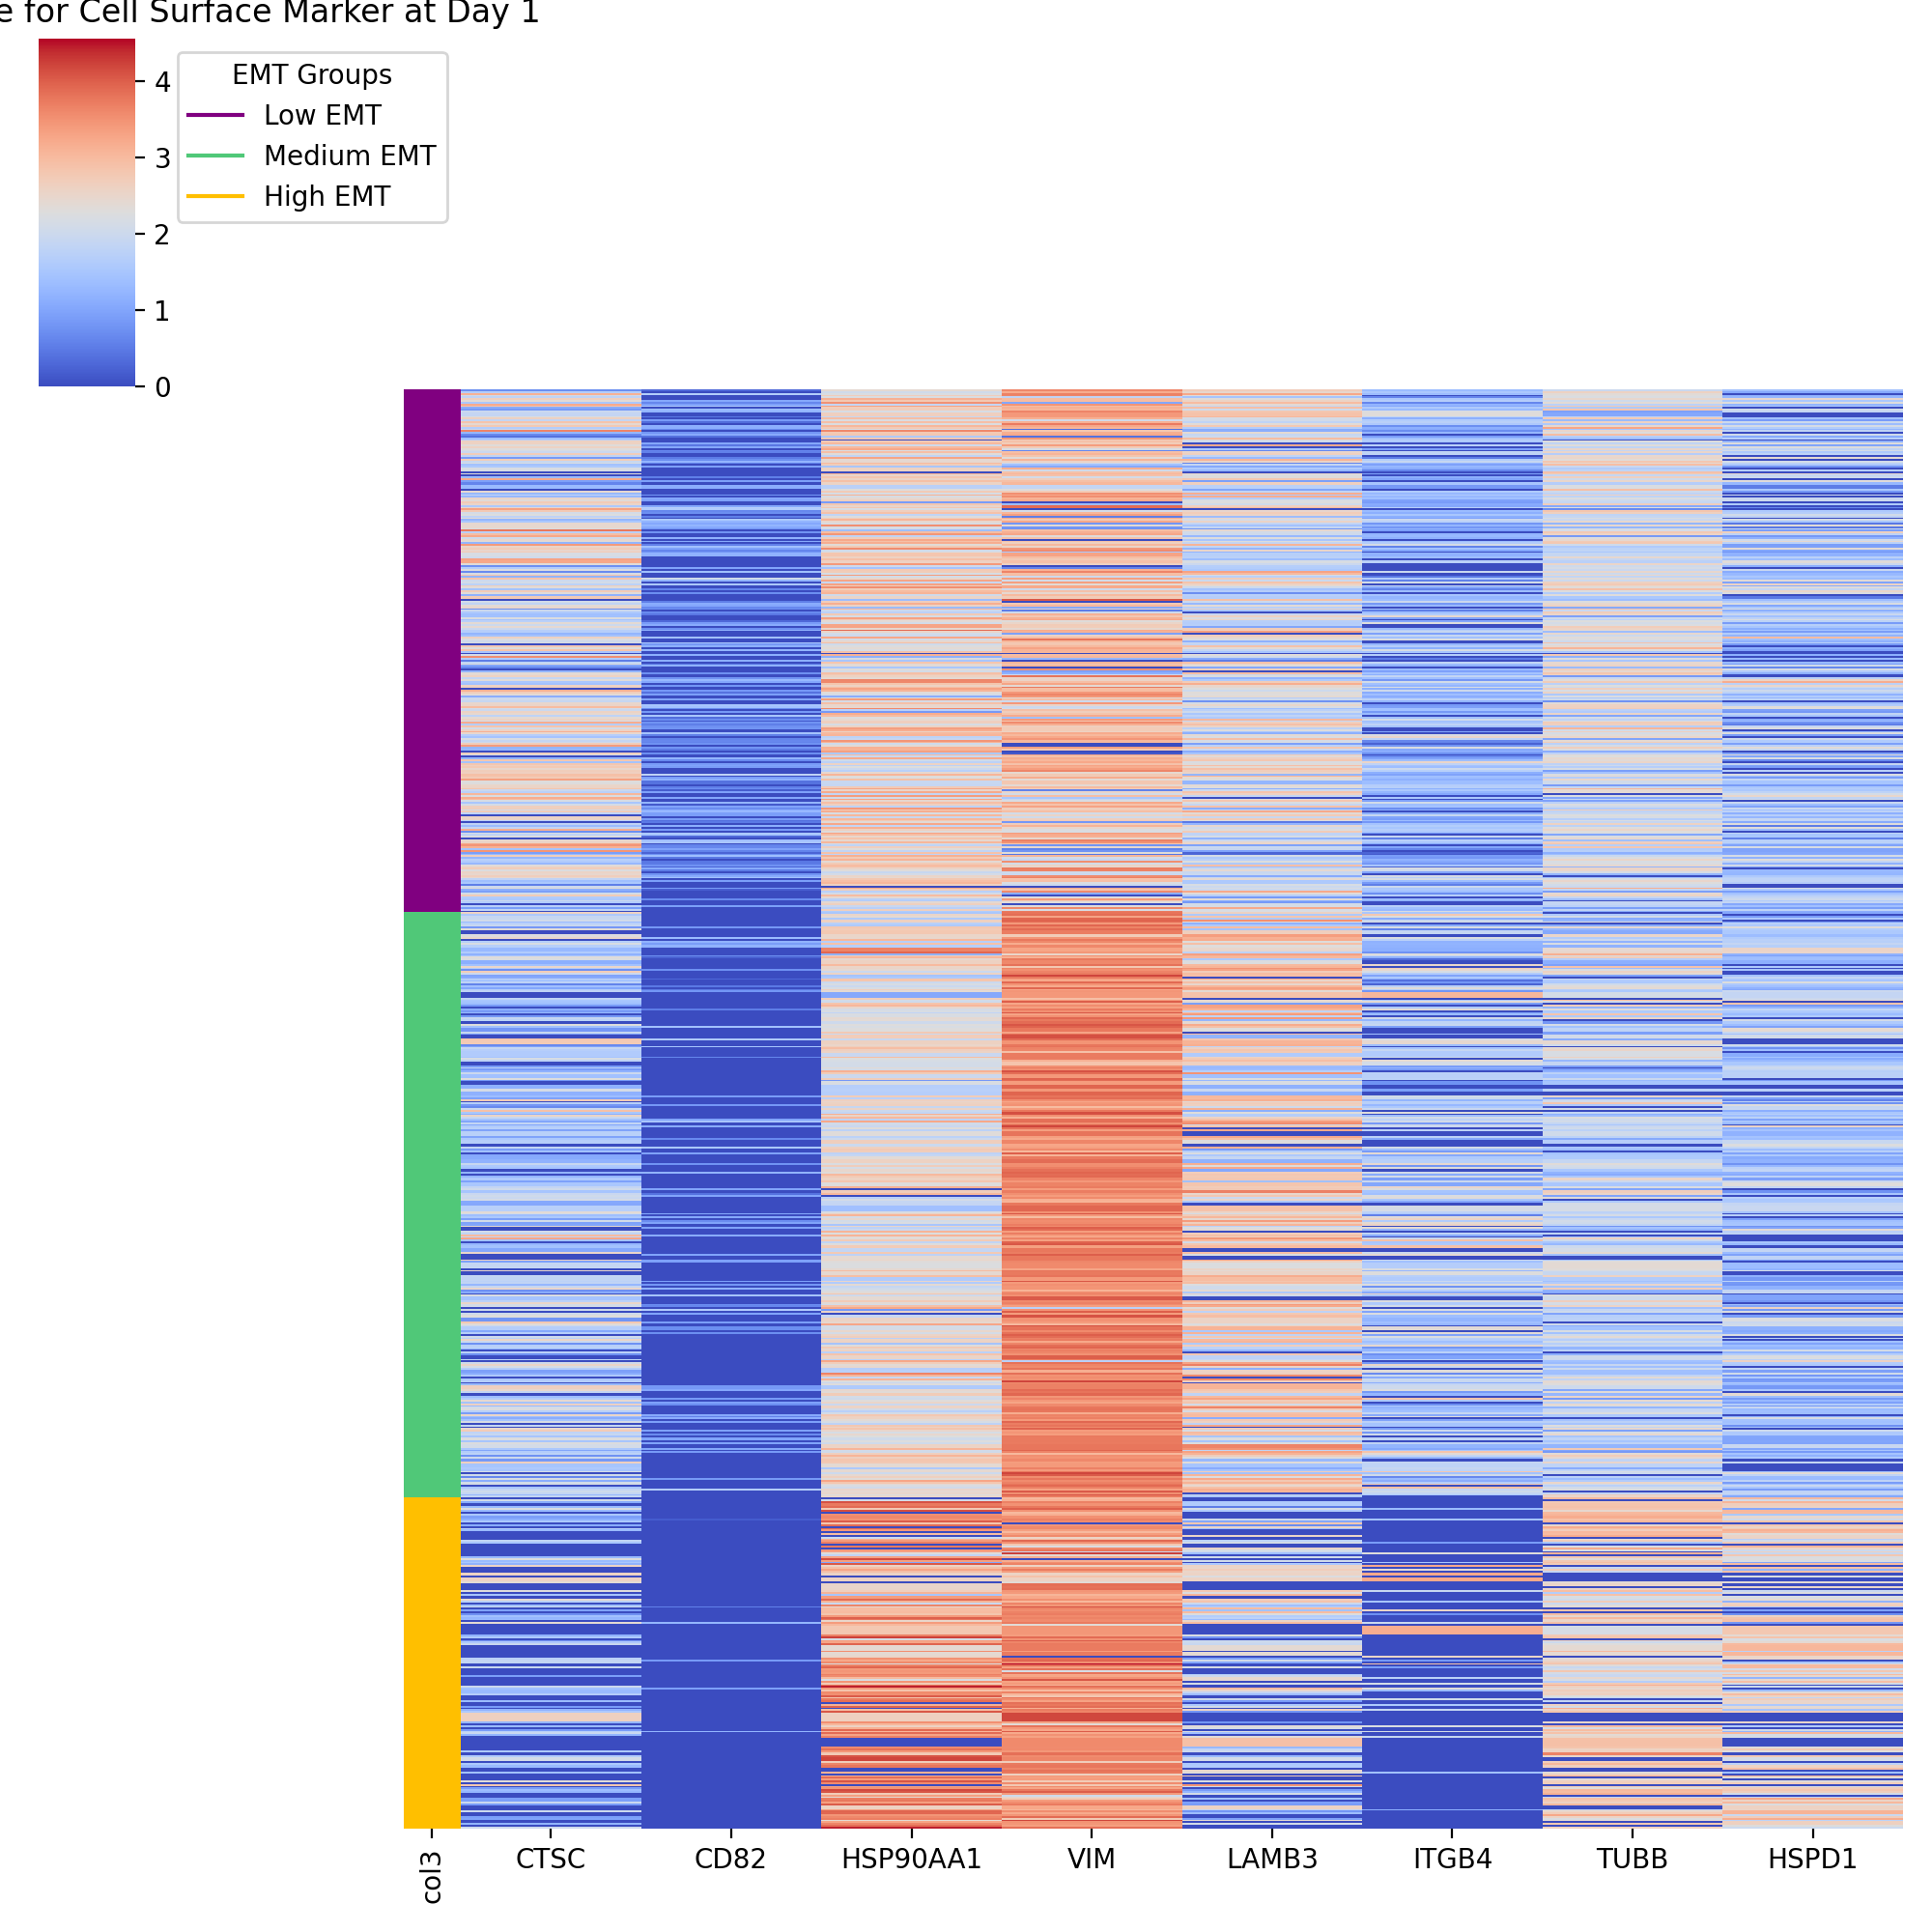

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming adata_df, top_day0, and cell_marker are already defined

# Step 1: Filter adata_df for genes in cell_marker
filtered_adata_df = adata_df[cell_marker]

# Step 2: Add group information from top_day1
group_info = top_day1.set_index('index_coord_df')['col3']
adata_df_with_group = filtered_adata_df.join(group_info)

# Filter for specific EMT groups
emt_groups = ['Low EMT', 'Medium EMT', 'High EMT']
adata_filtered_groups = adata_df_with_group[adata_df_with_group['col3'].isin(emt_groups)]

# Manually set the order of the groups
group_order = {'Low EMT': 1, 'Medium EMT': 2, 'High EMT': 3}
adata_filtered_groups['GroupOrder'] = adata_filtered_groups['col3'].map(group_order)

# Sort the DataFrame by the group order
adata_sorted = adata_filtered_groups.sort_values(by='GroupOrder')

# Create a color map for the groups
group_colors = {'Low EMT': '#800080', 'Medium EMT': '#50C878', 'High EMT': '#FFBF00'}
row_colors = adata_sorted['col3'].map(group_colors)

# Create the clustermap with adjusted color legend position
g = sns.clustermap(adata_sorted.drop(columns=['col3', 'GroupOrder']), cmap='coolwarm', col_cluster=False, row_cluster=False, yticklabels=False, row_colors=row_colors, cbar_pos=(0.02, 0.8, 0.05, 0.18))
plt.title('Gene Expression Profile for Cell Surface Marker at Day 1')
plt.xlabel('Genes')

# Create and add a custom legend for the EMT groups
for group, color in group_colors.items():
    plt.plot([], [], color=color, label=group)
plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1), title='EMT Groups')

# Save the plot as a PDF
plt.savefig('Desktop/EMT_Optimal_Transport/top_ancestor/gene_expression_heatmaps_day1.pdf', bbox_inches='tight')

#Desktop/EMT_Optimal_Transport/top_ancestor/gene_expression_heatmaps_single_gene_day1.pdf






<IPython.core.display.Javascript object>


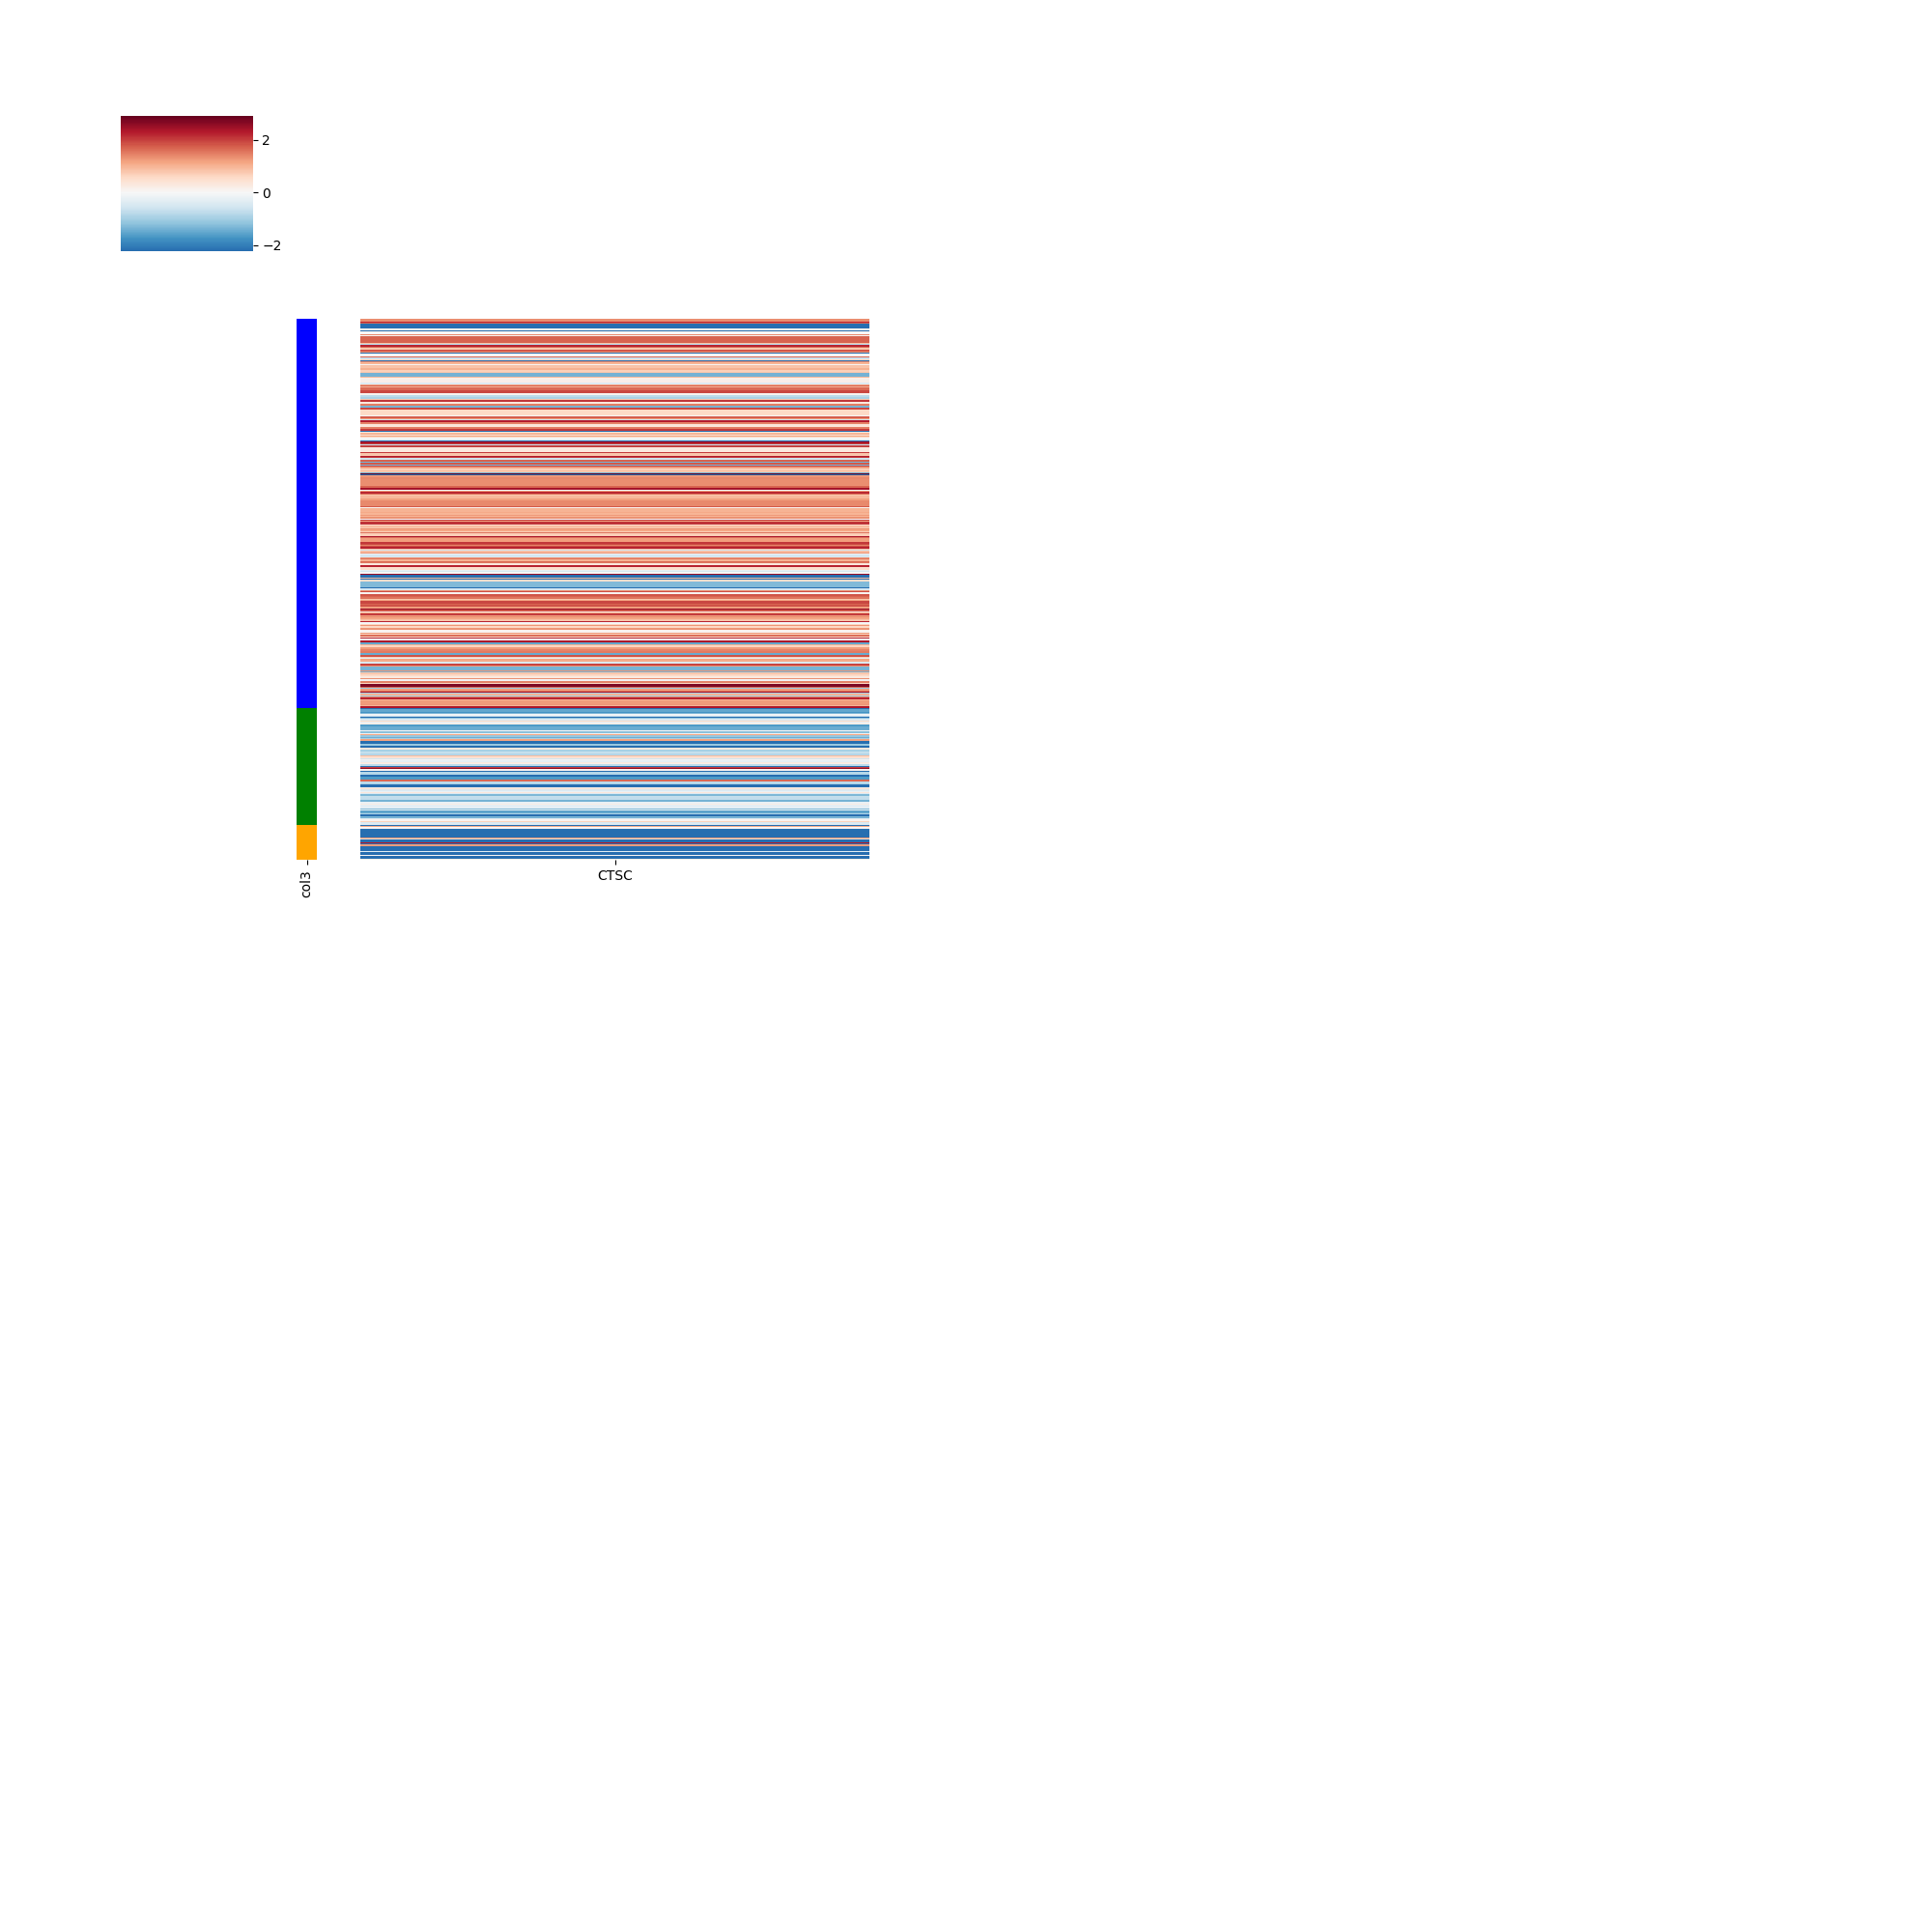

<IPython.core.display.Javascript object>


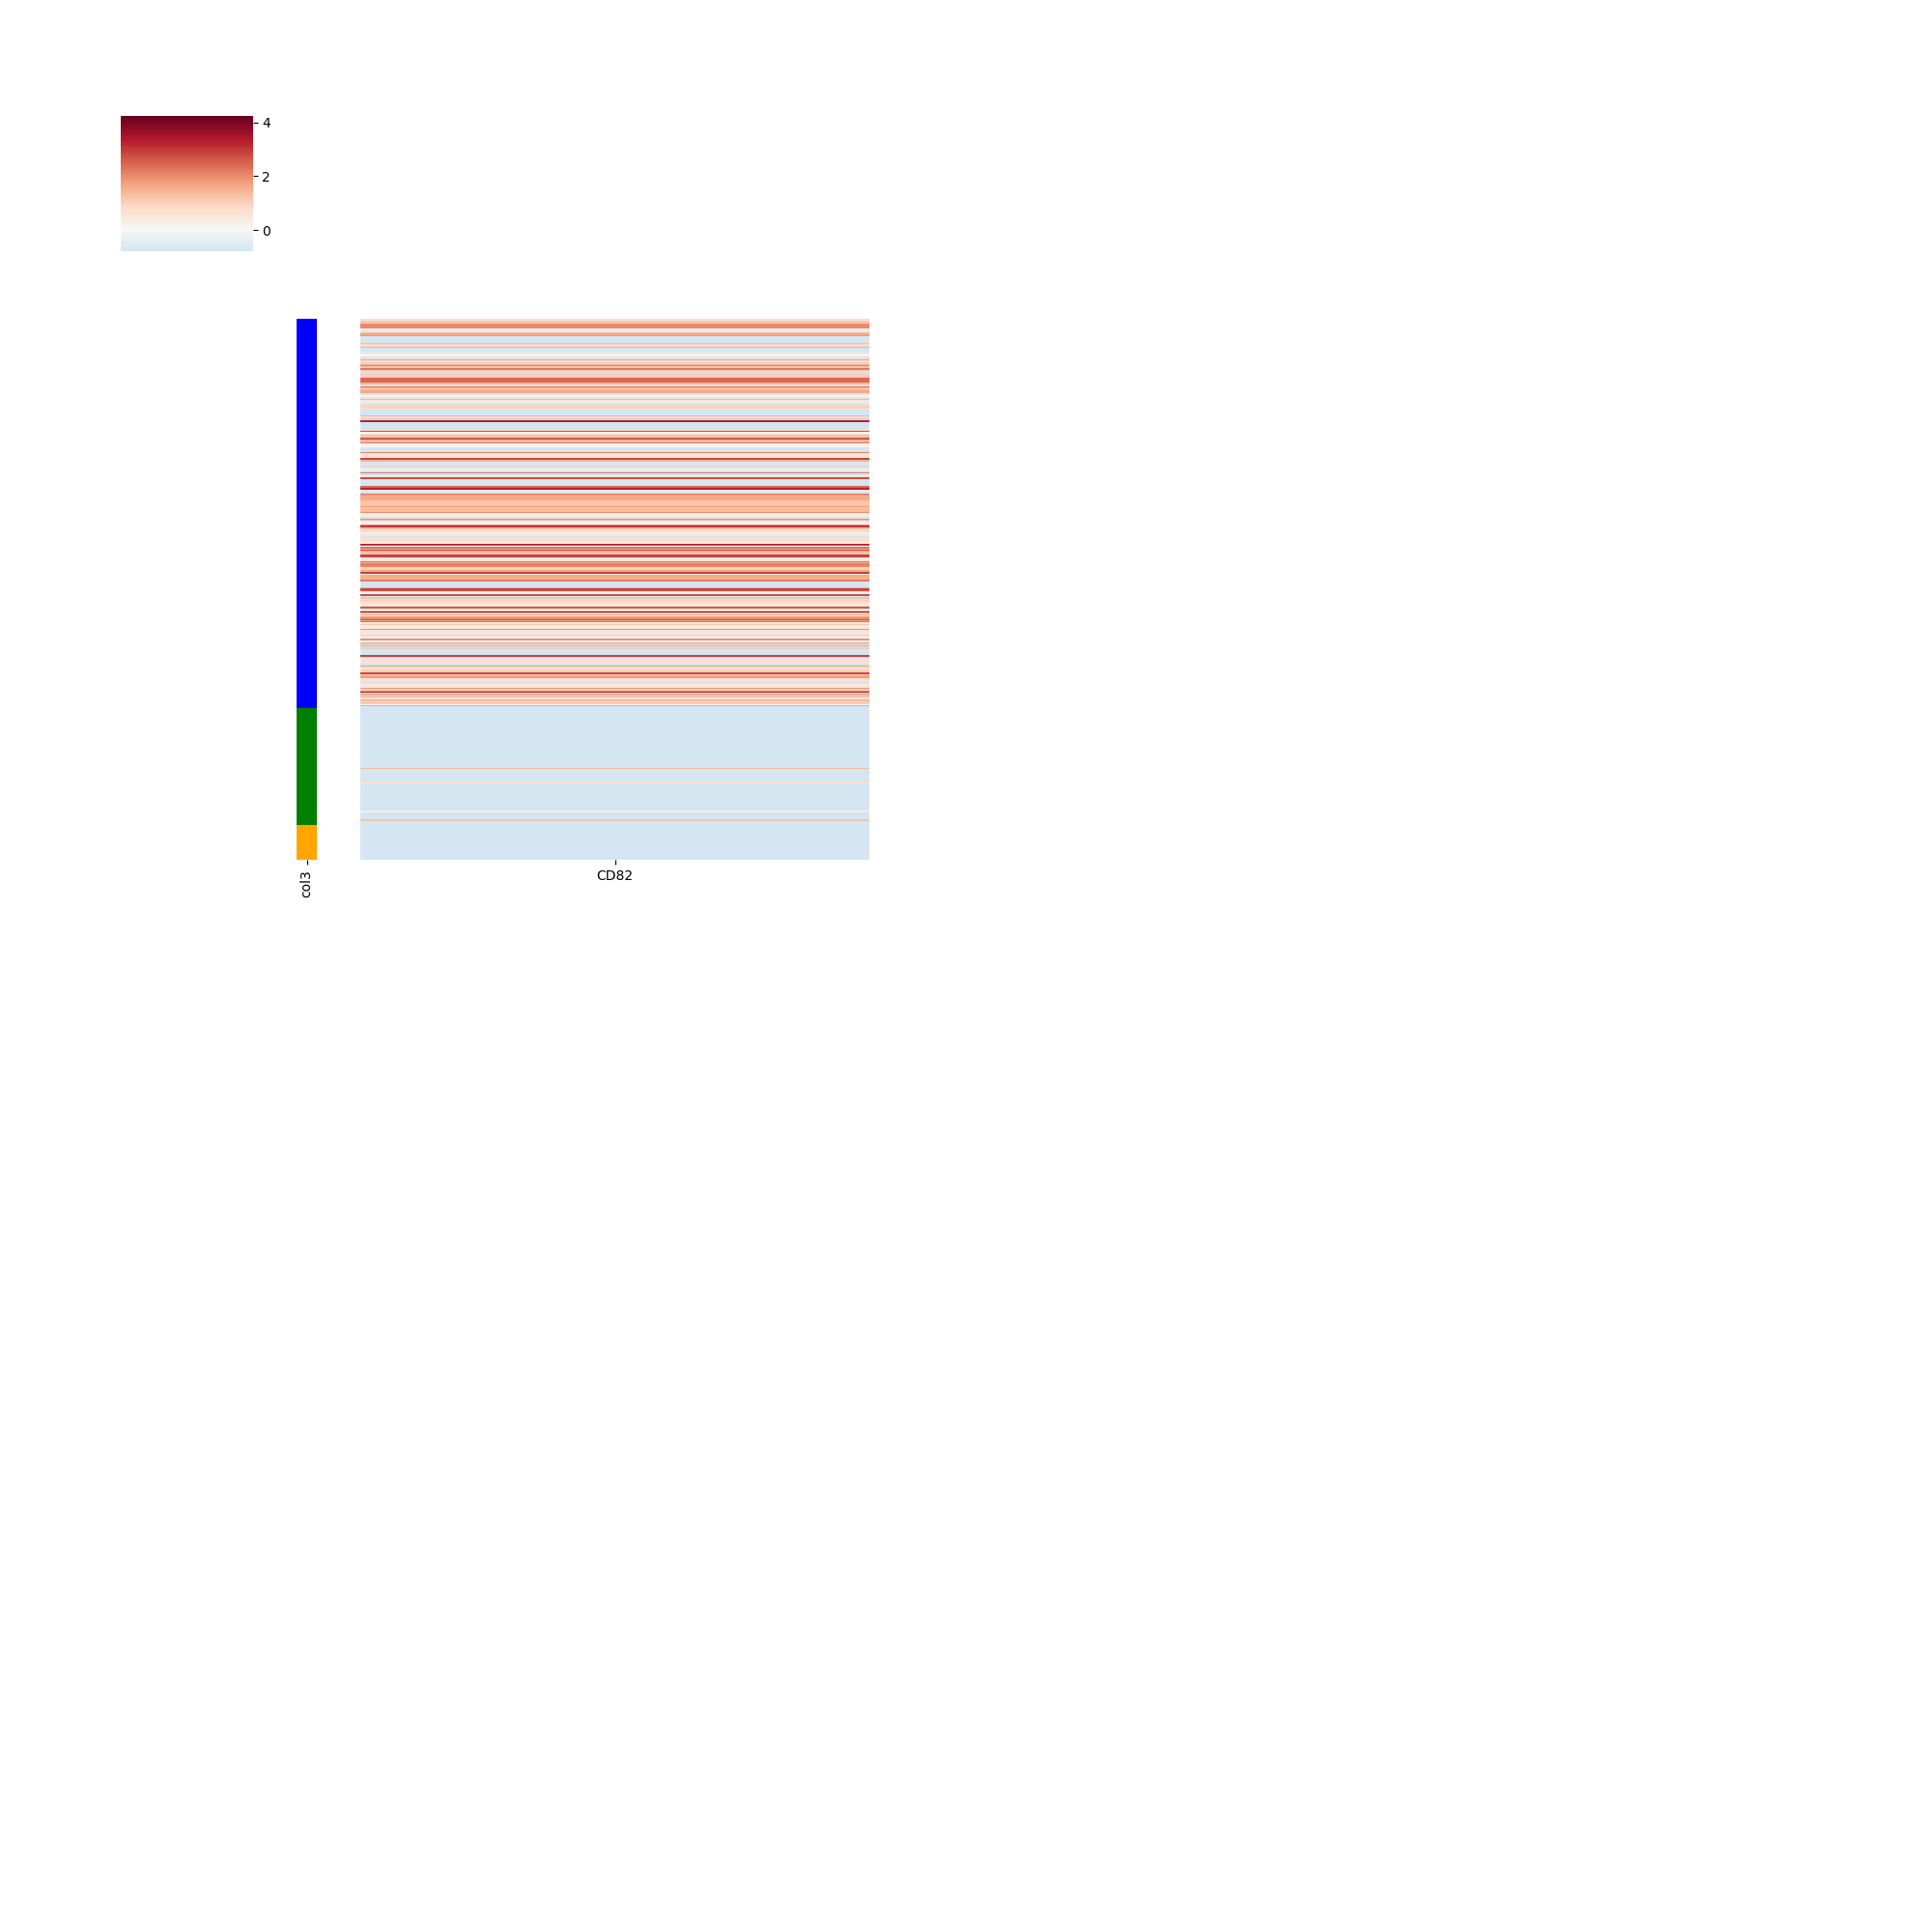

<IPython.core.display.Javascript object>


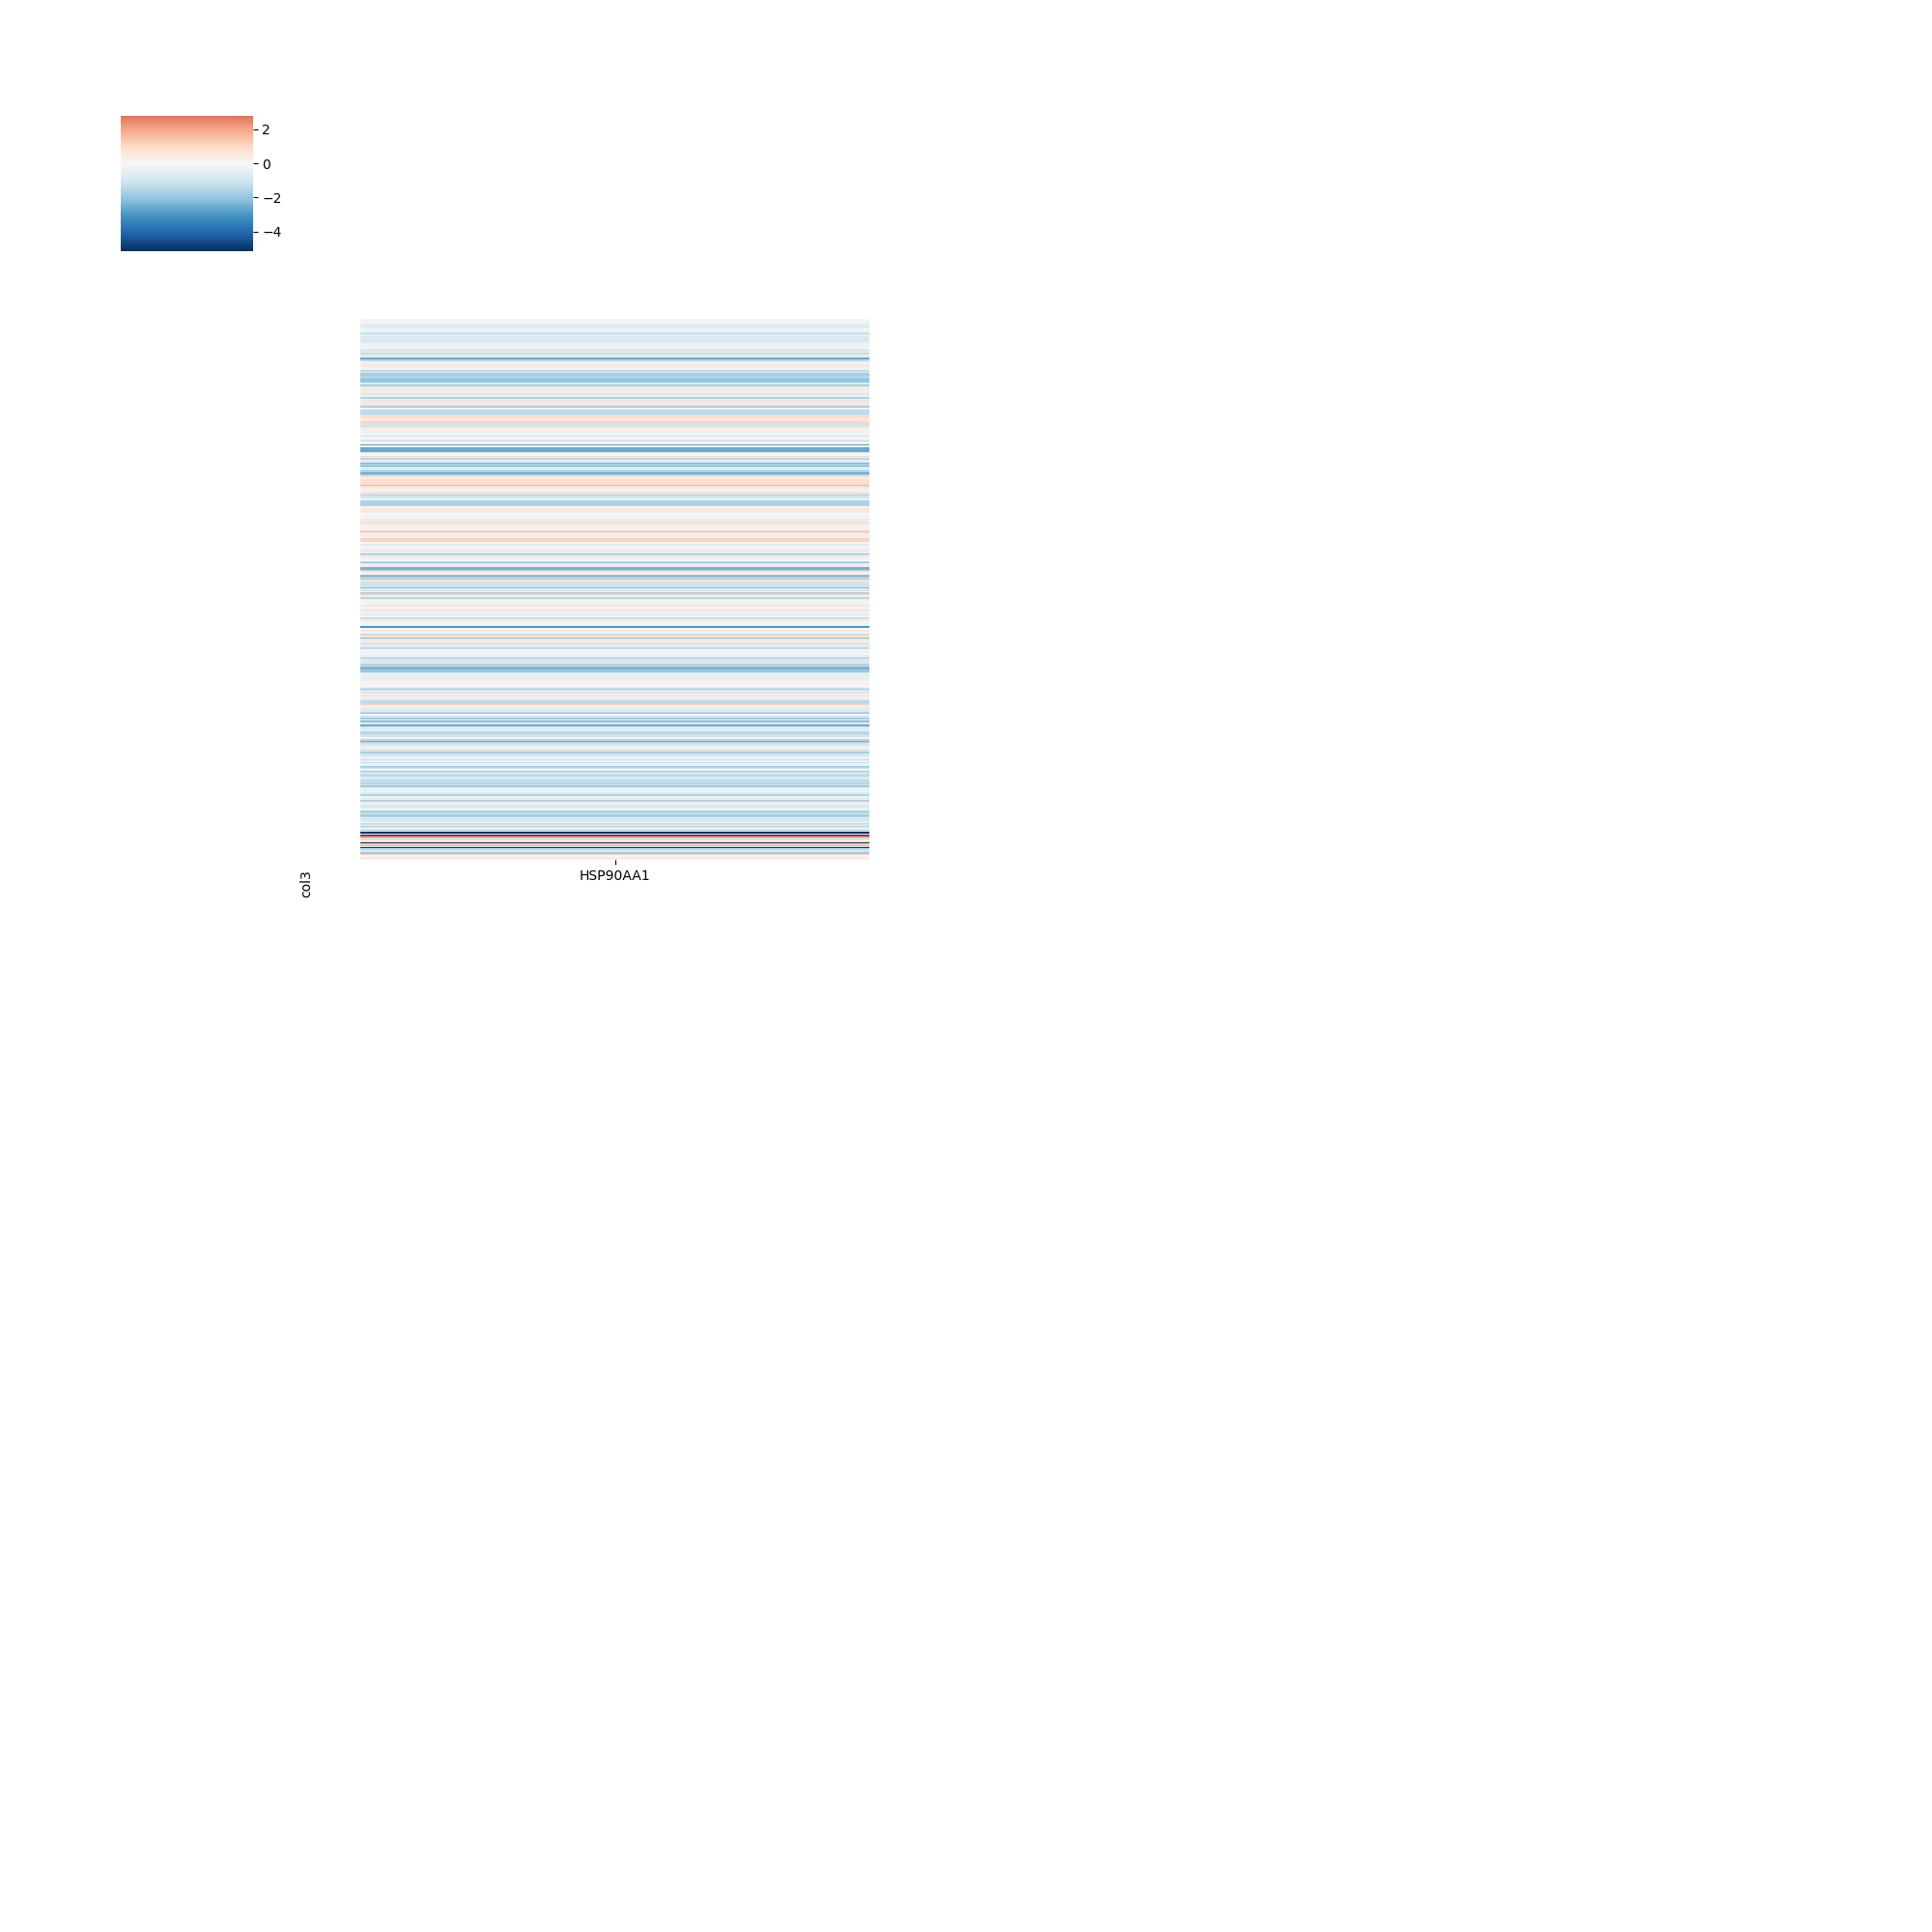

<IPython.core.display.Javascript object>


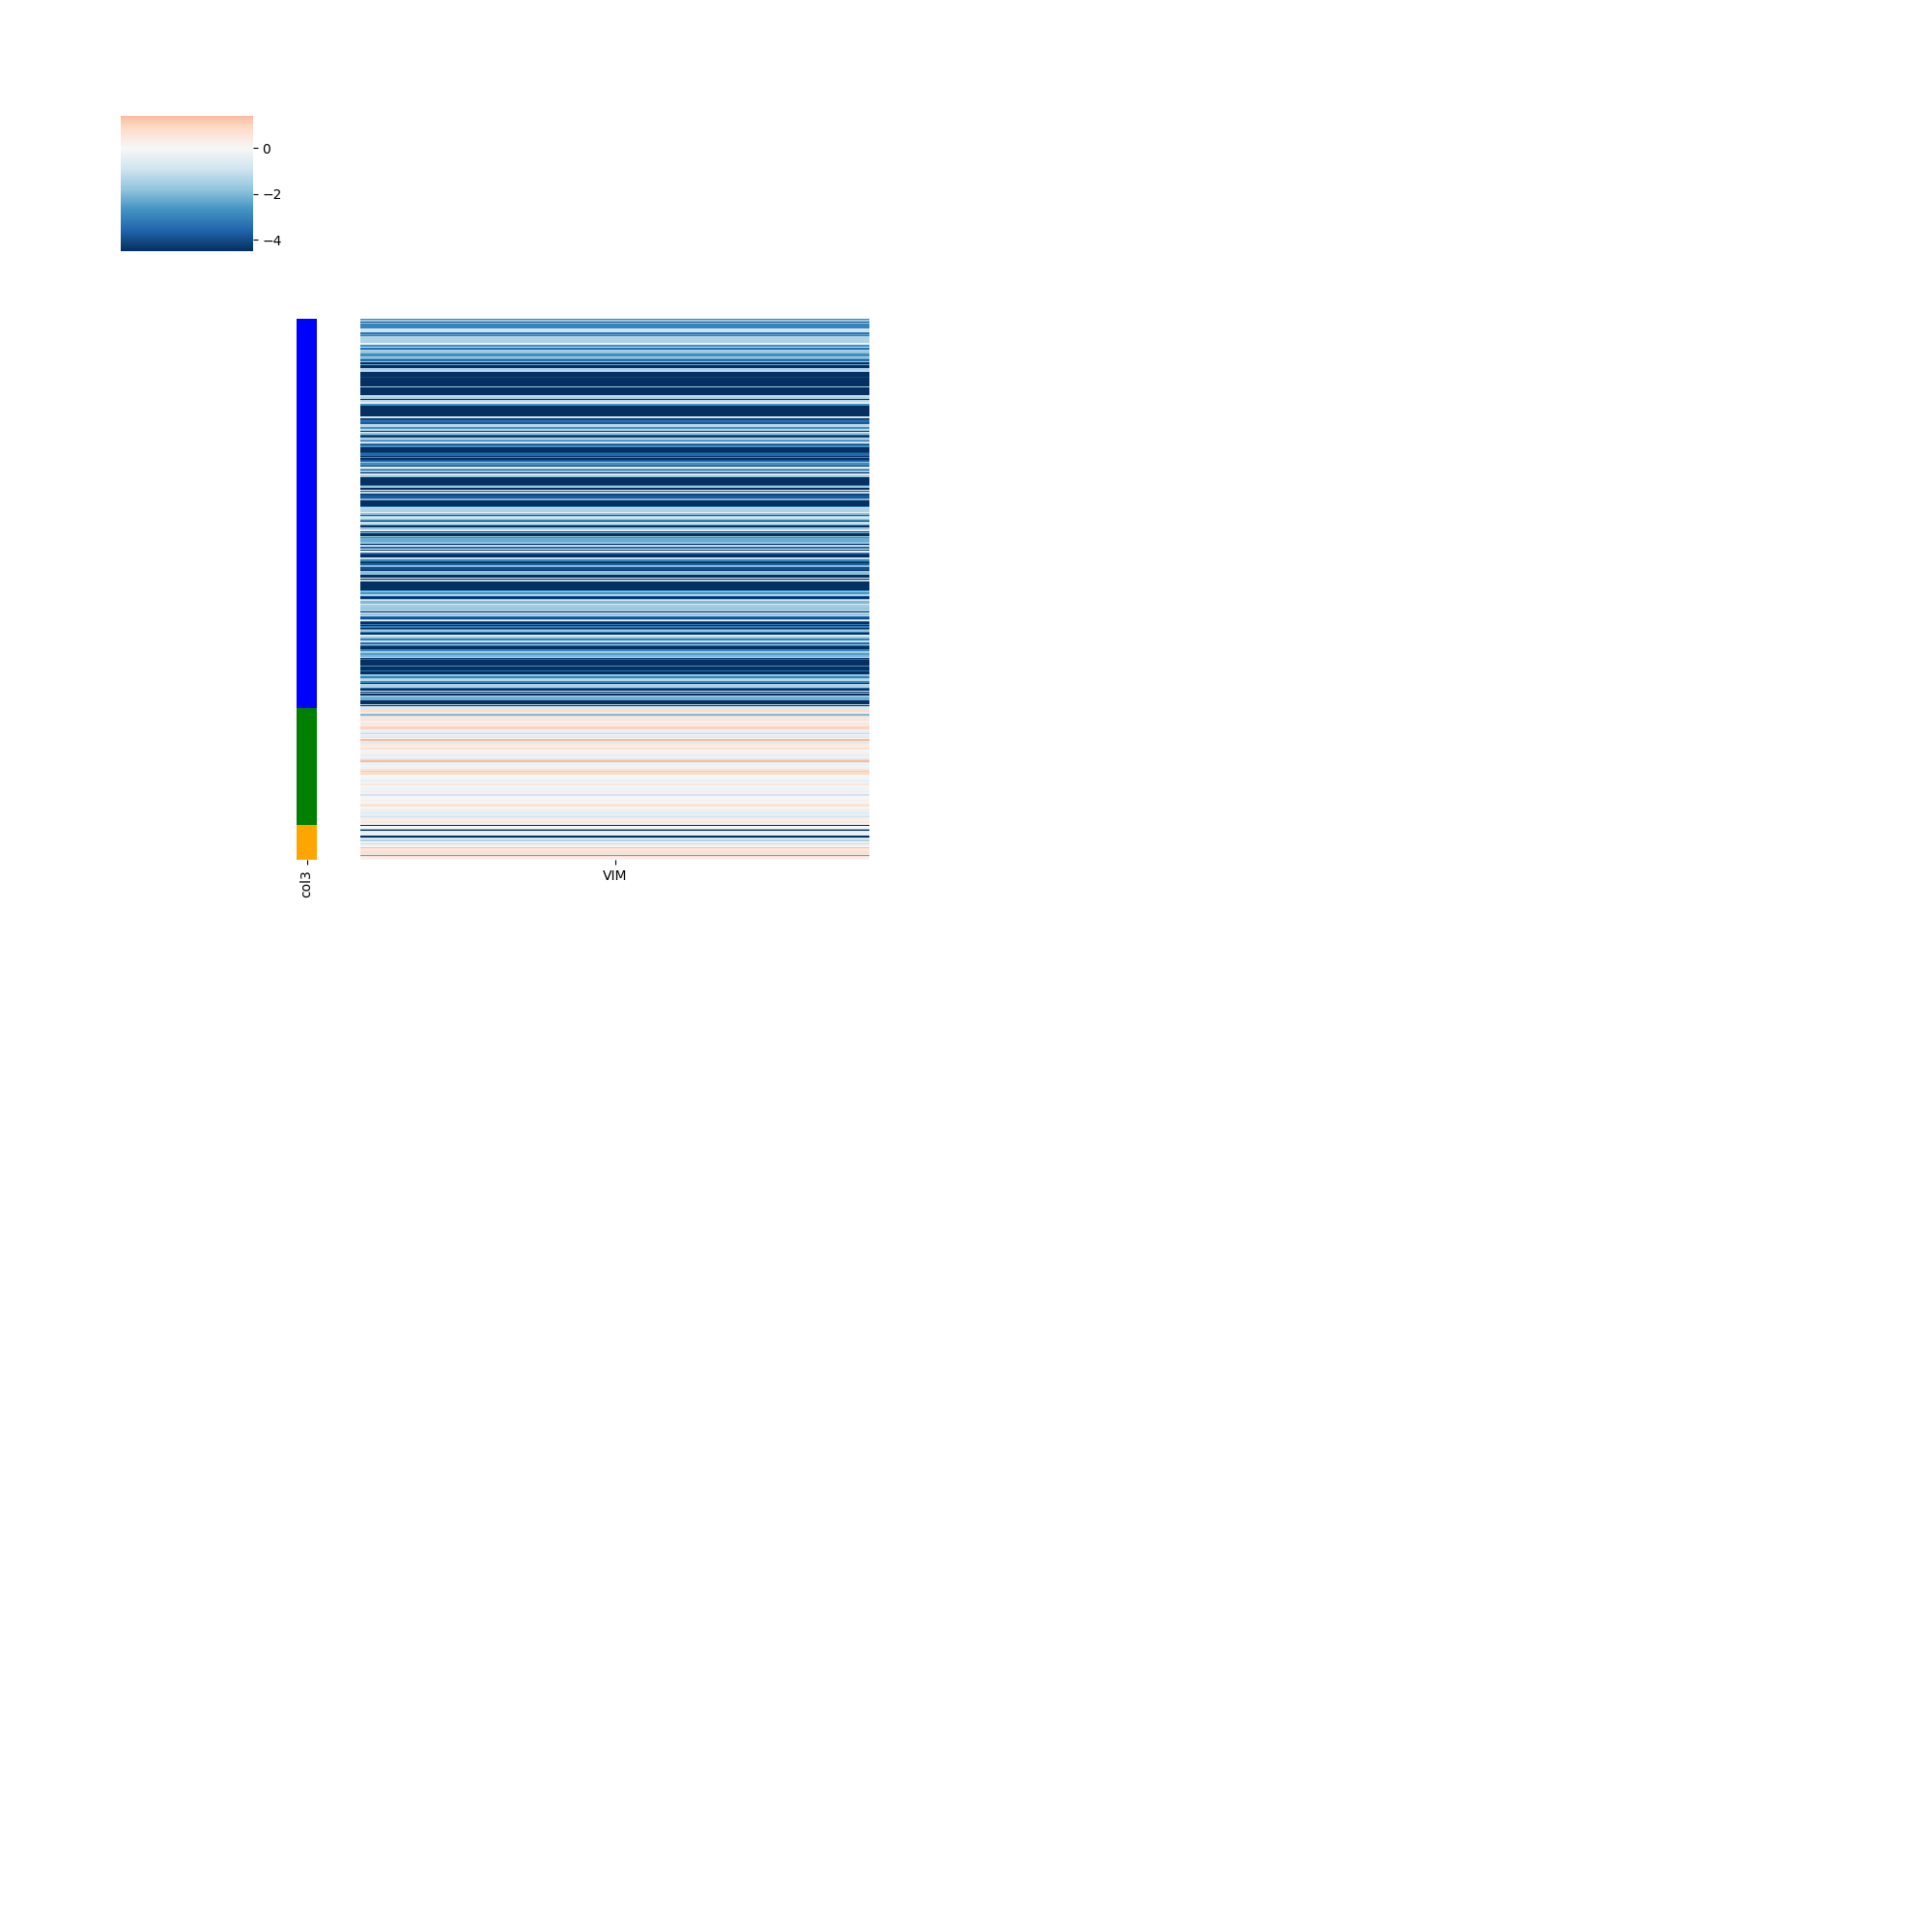

<IPython.core.display.Javascript object>


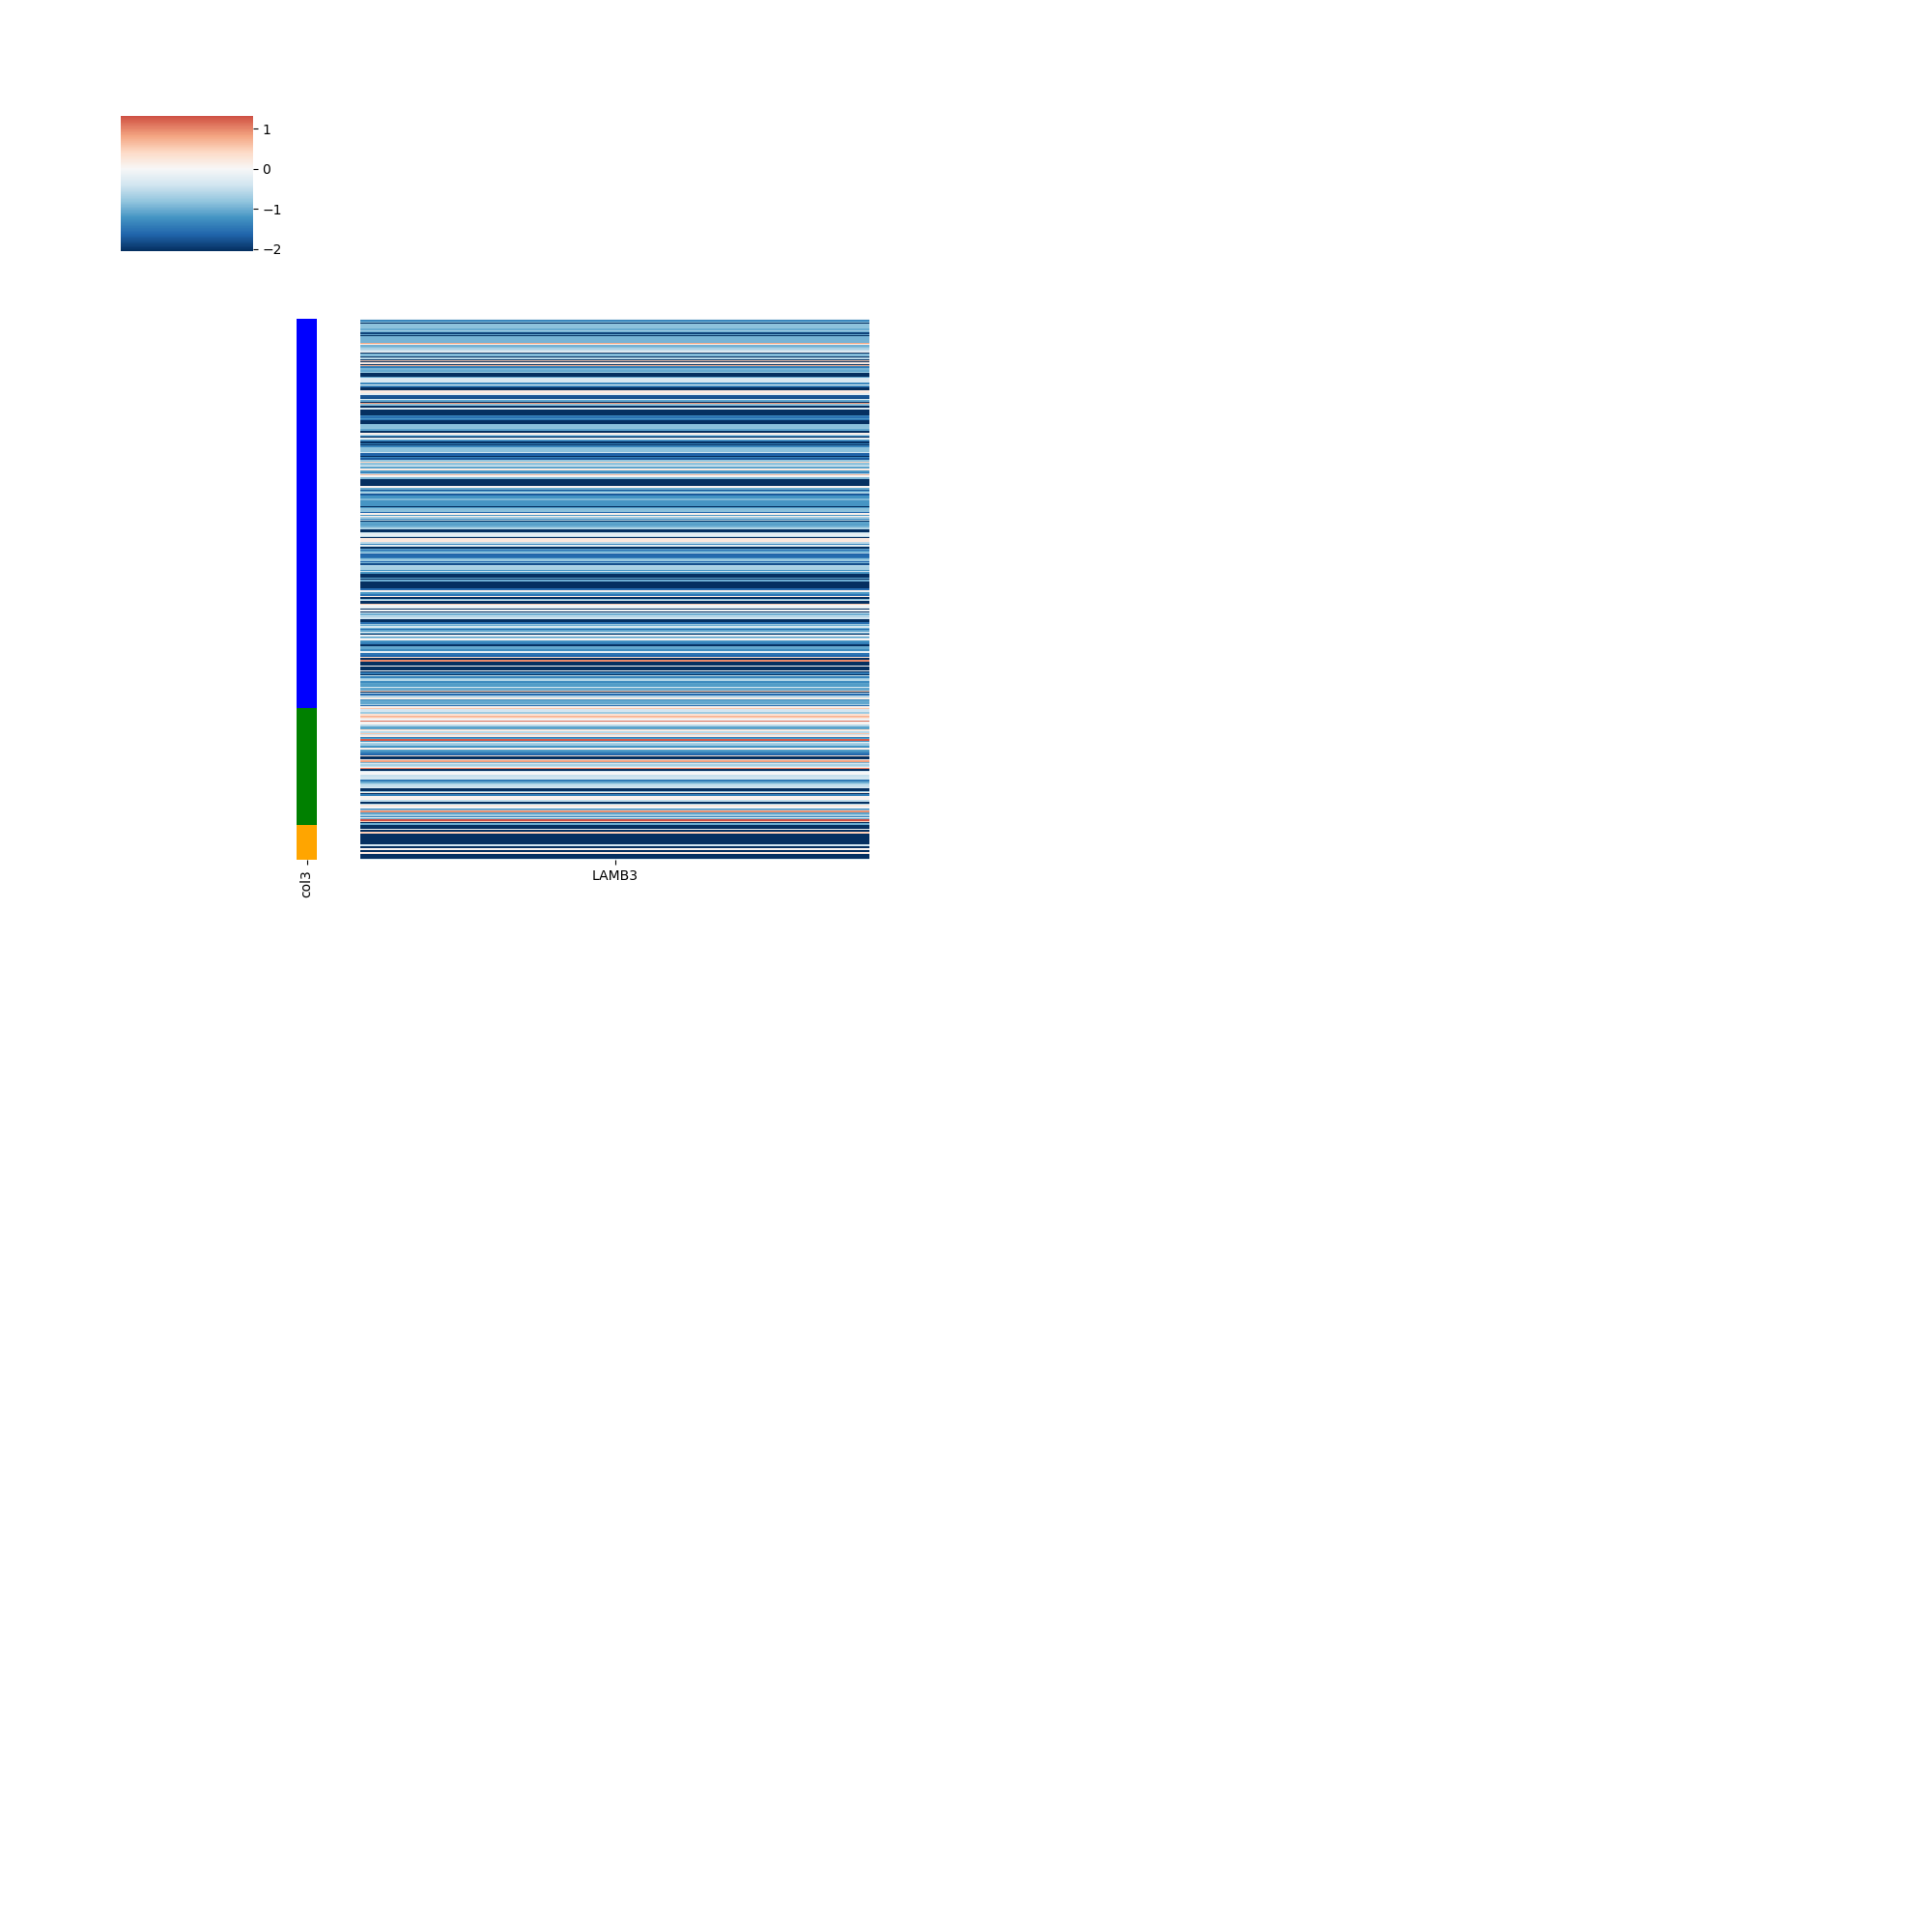

<IPython.core.display.Javascript object>


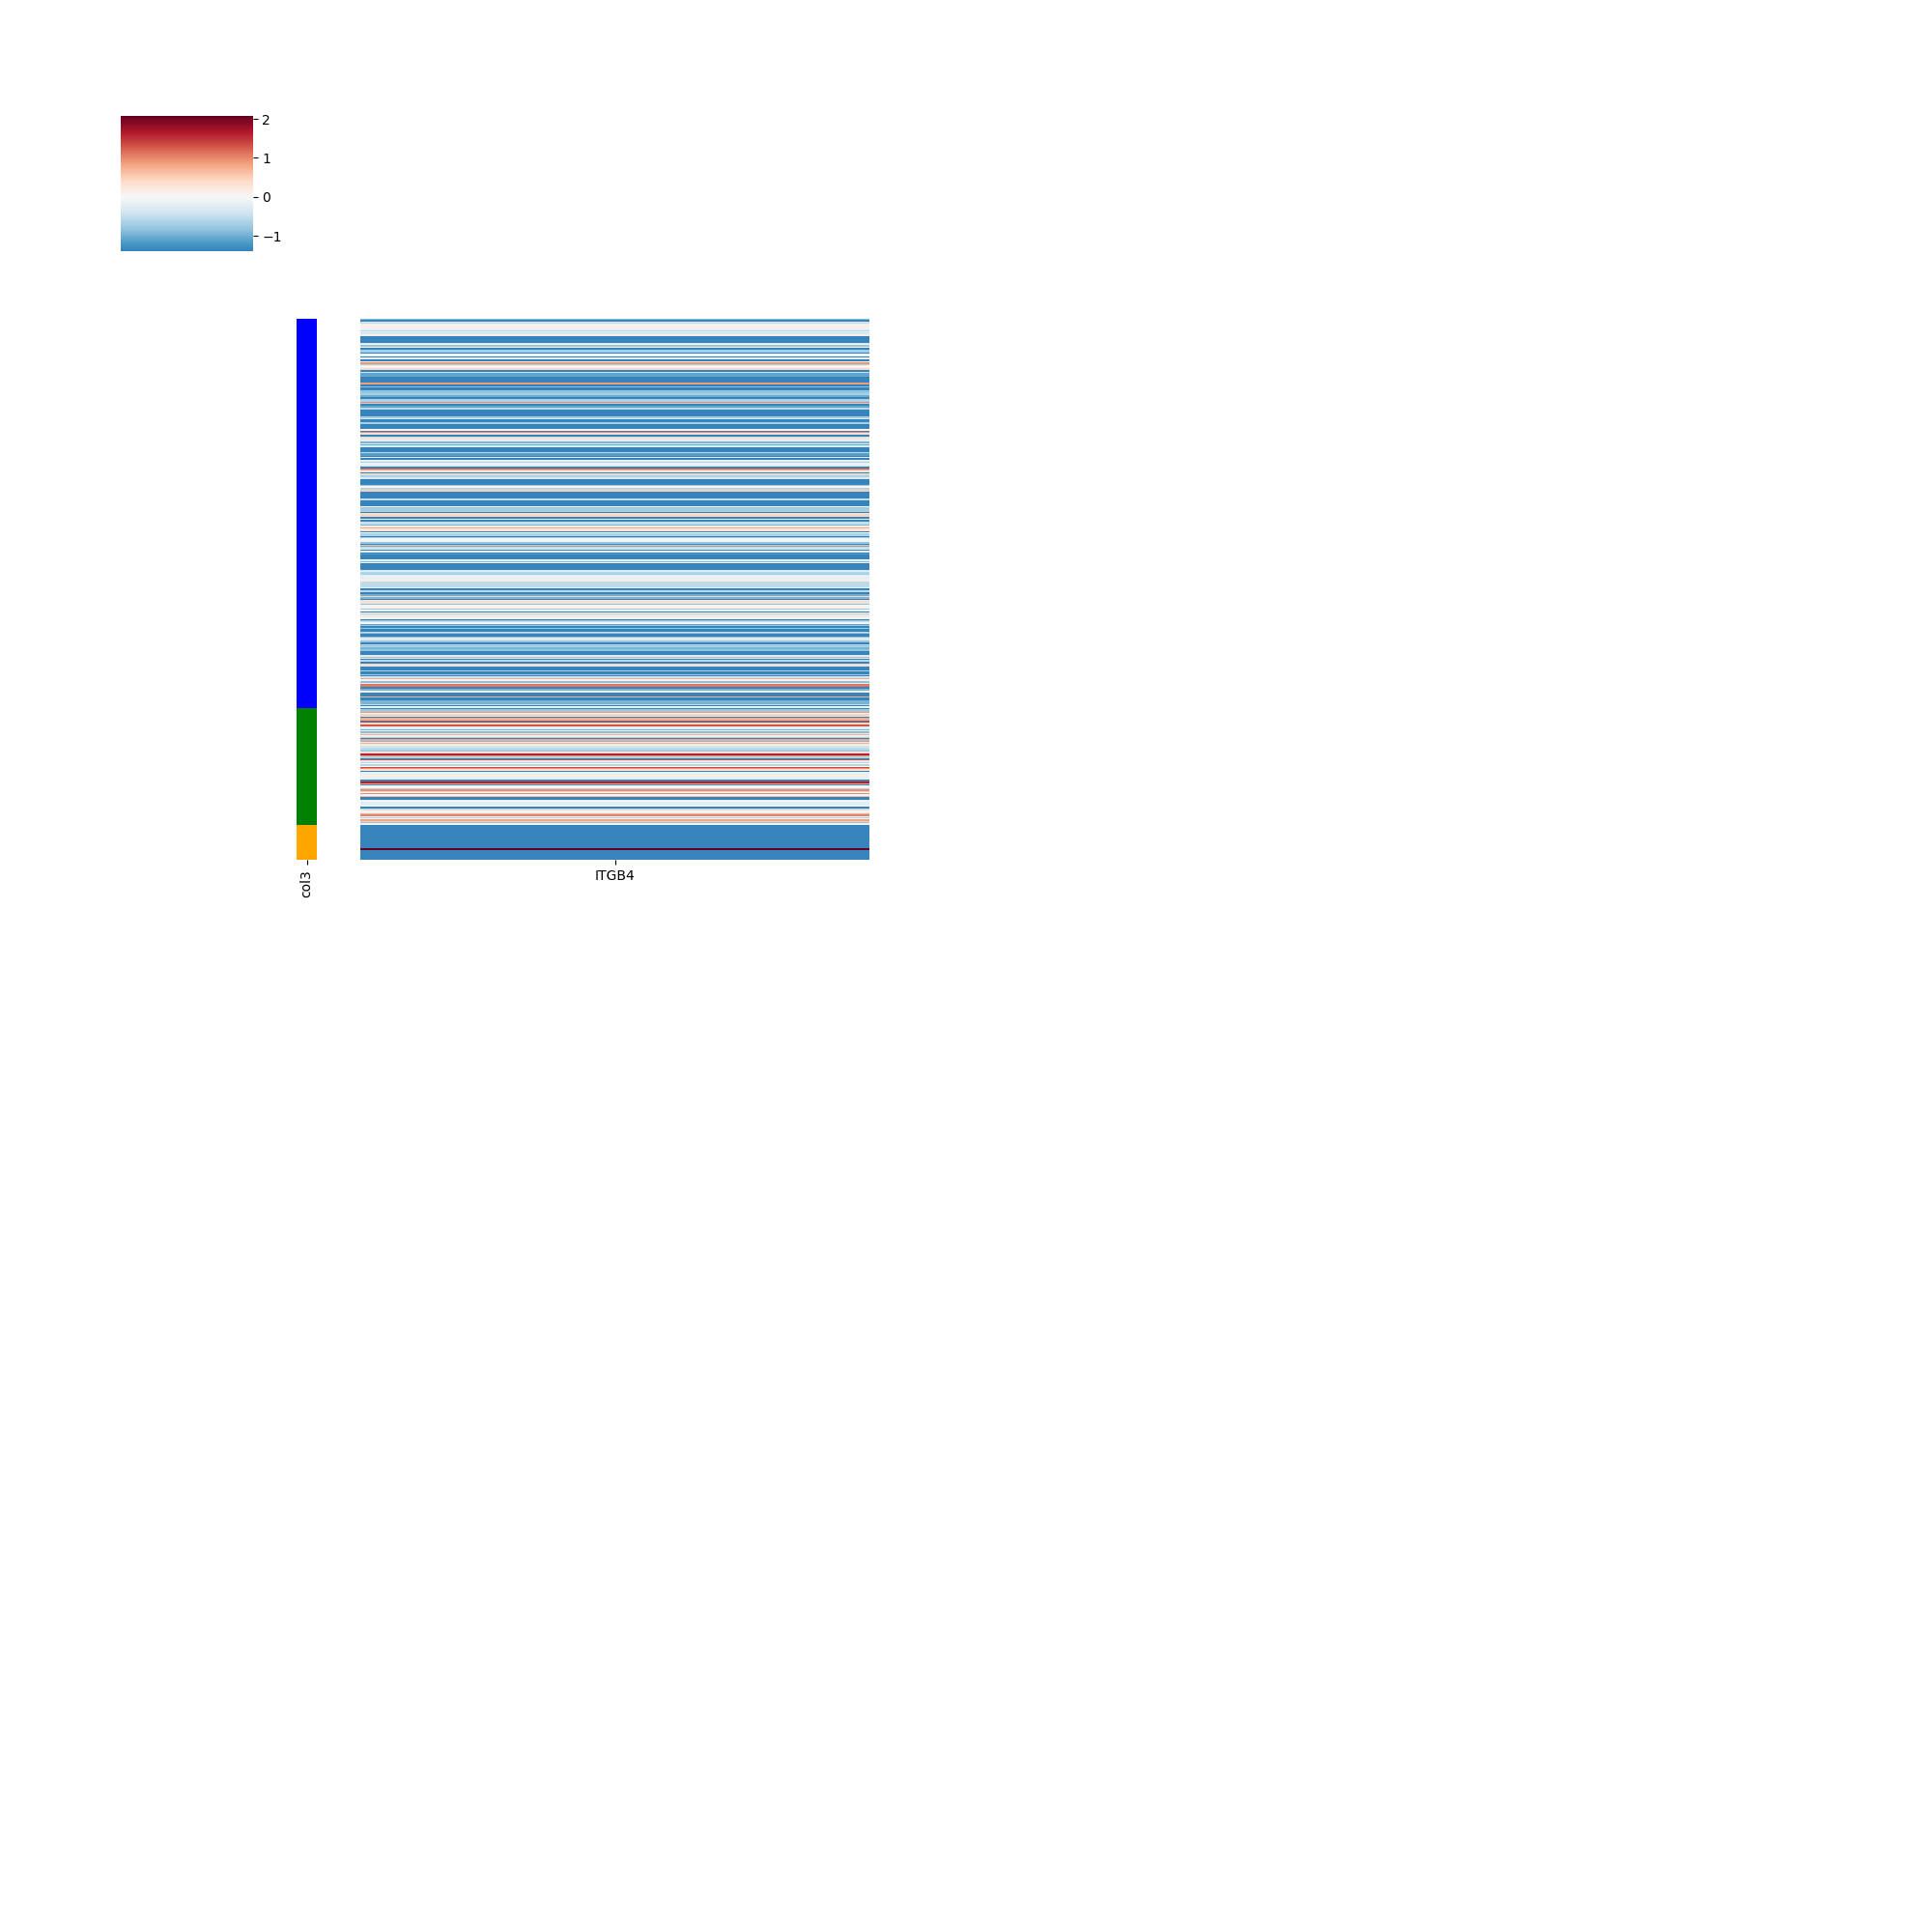

<IPython.core.display.Javascript object>


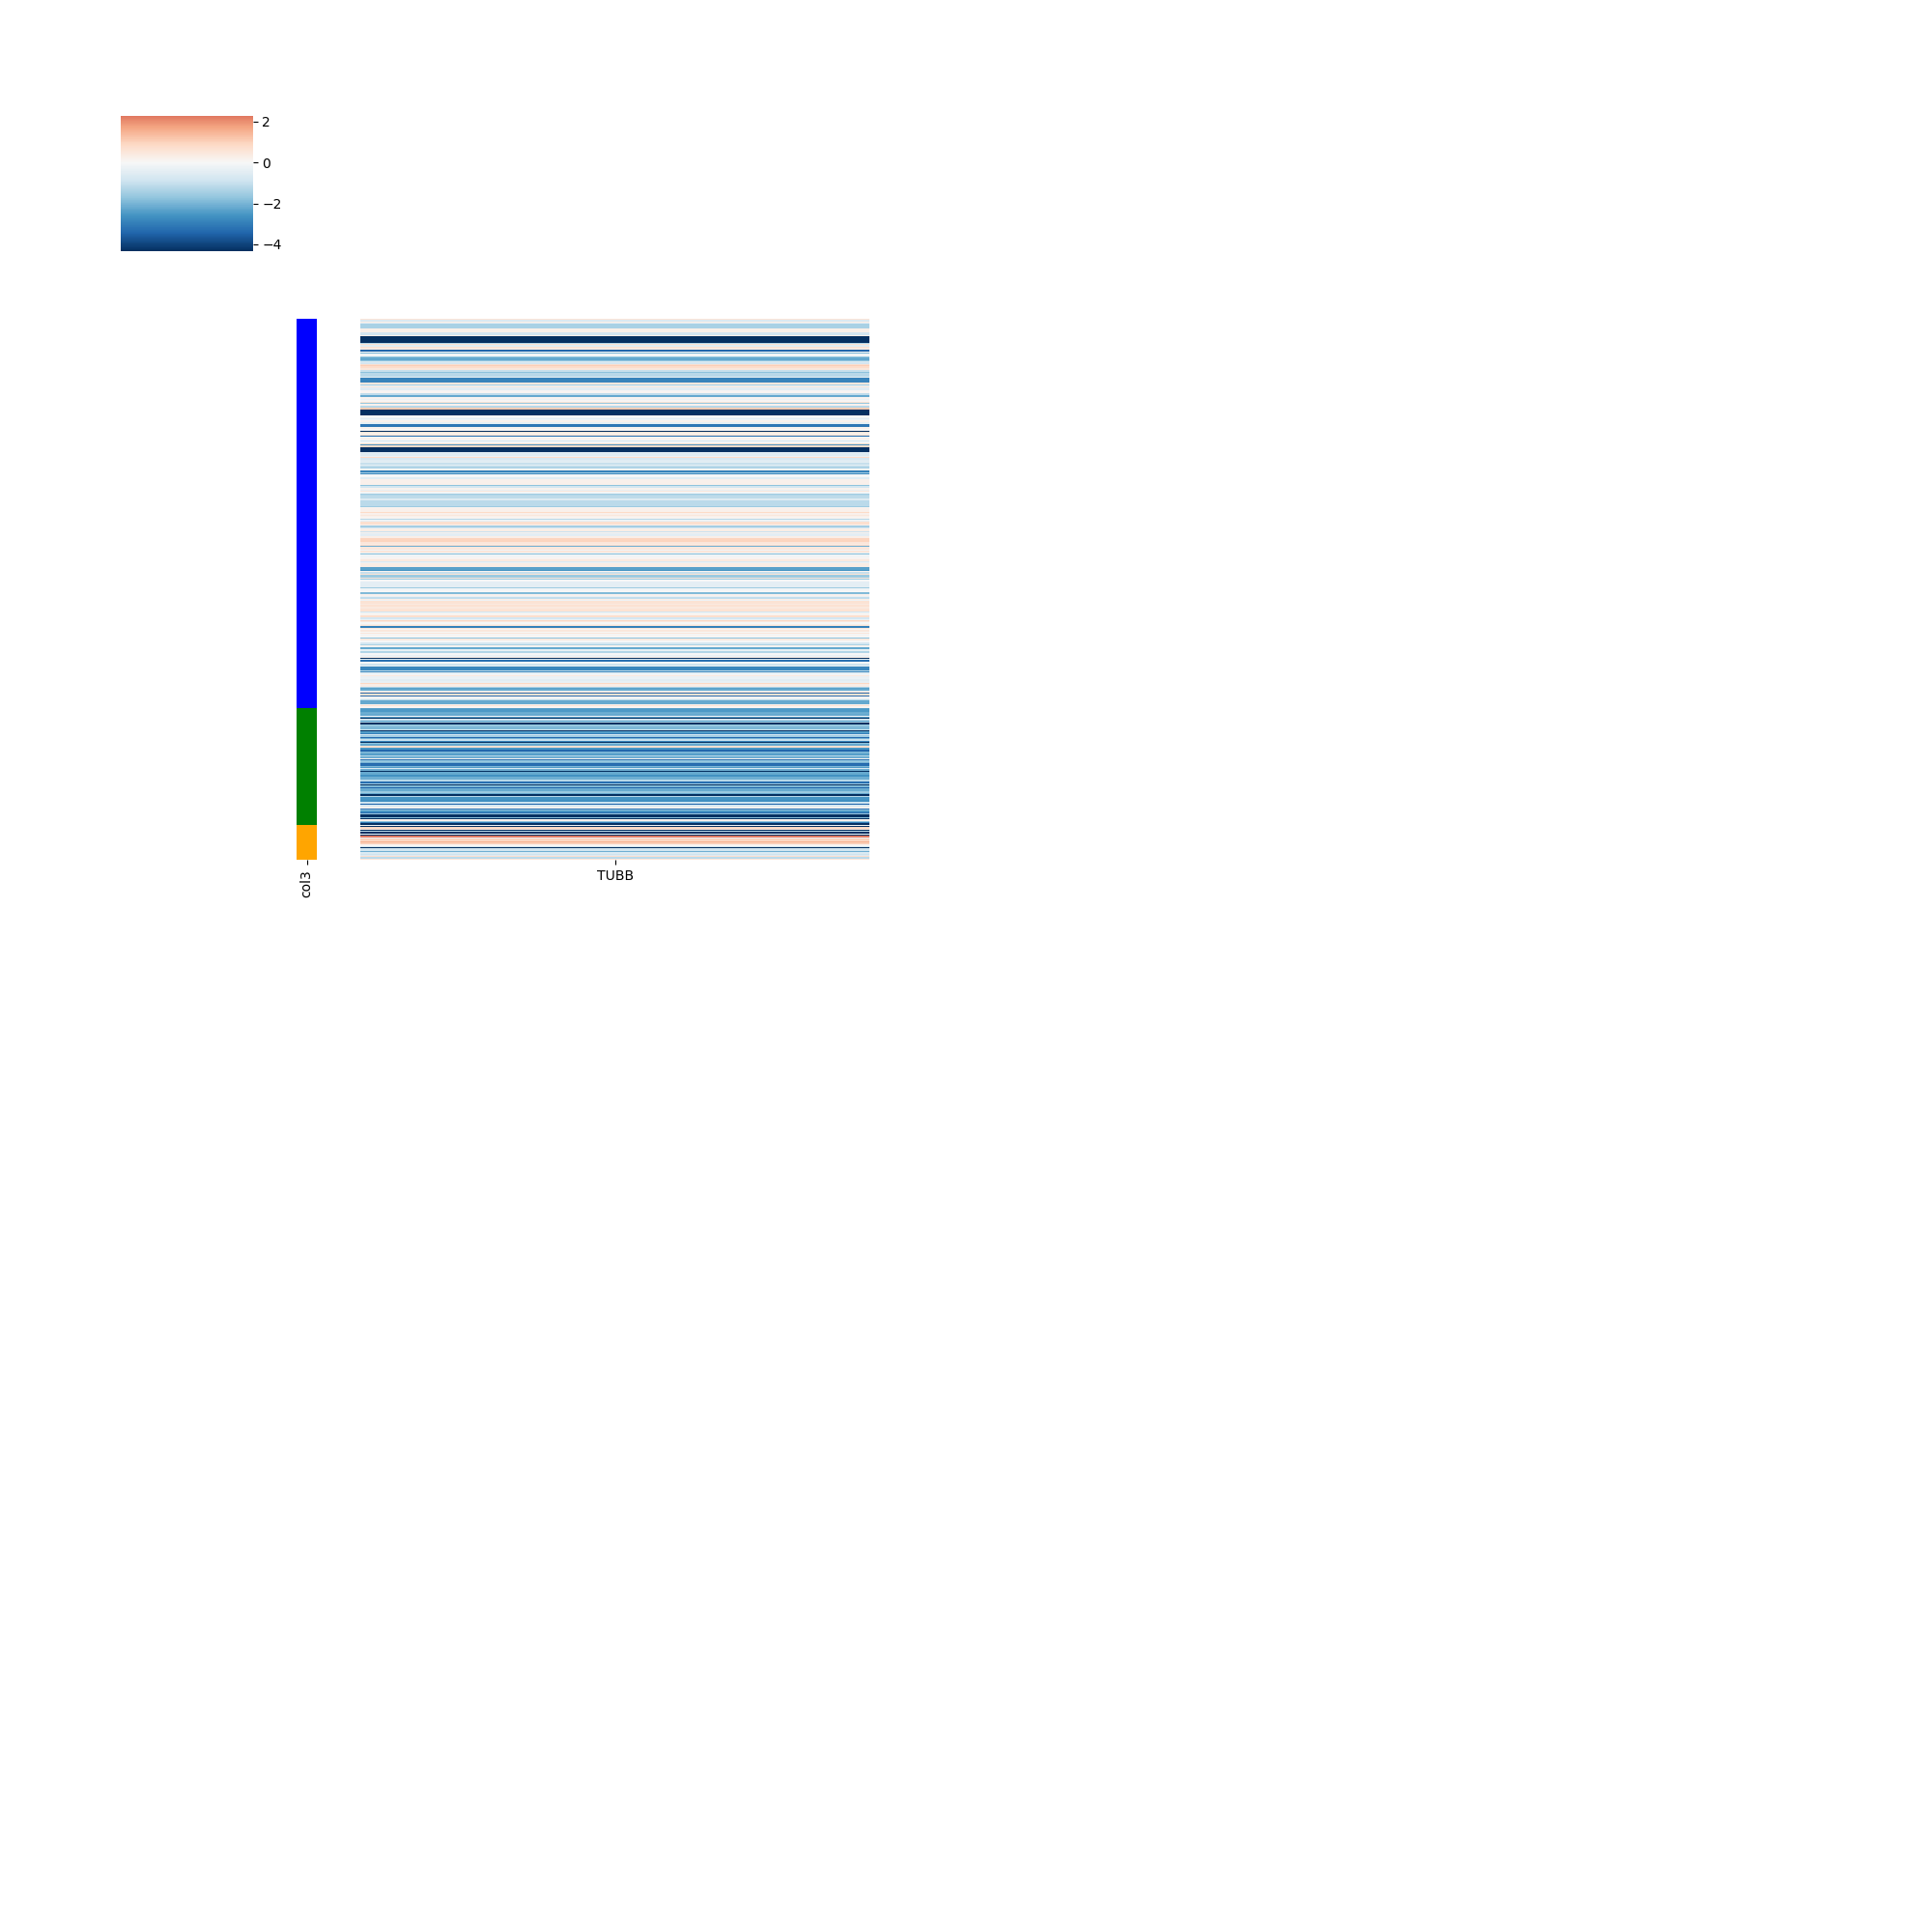

<IPython.core.display.Javascript object>


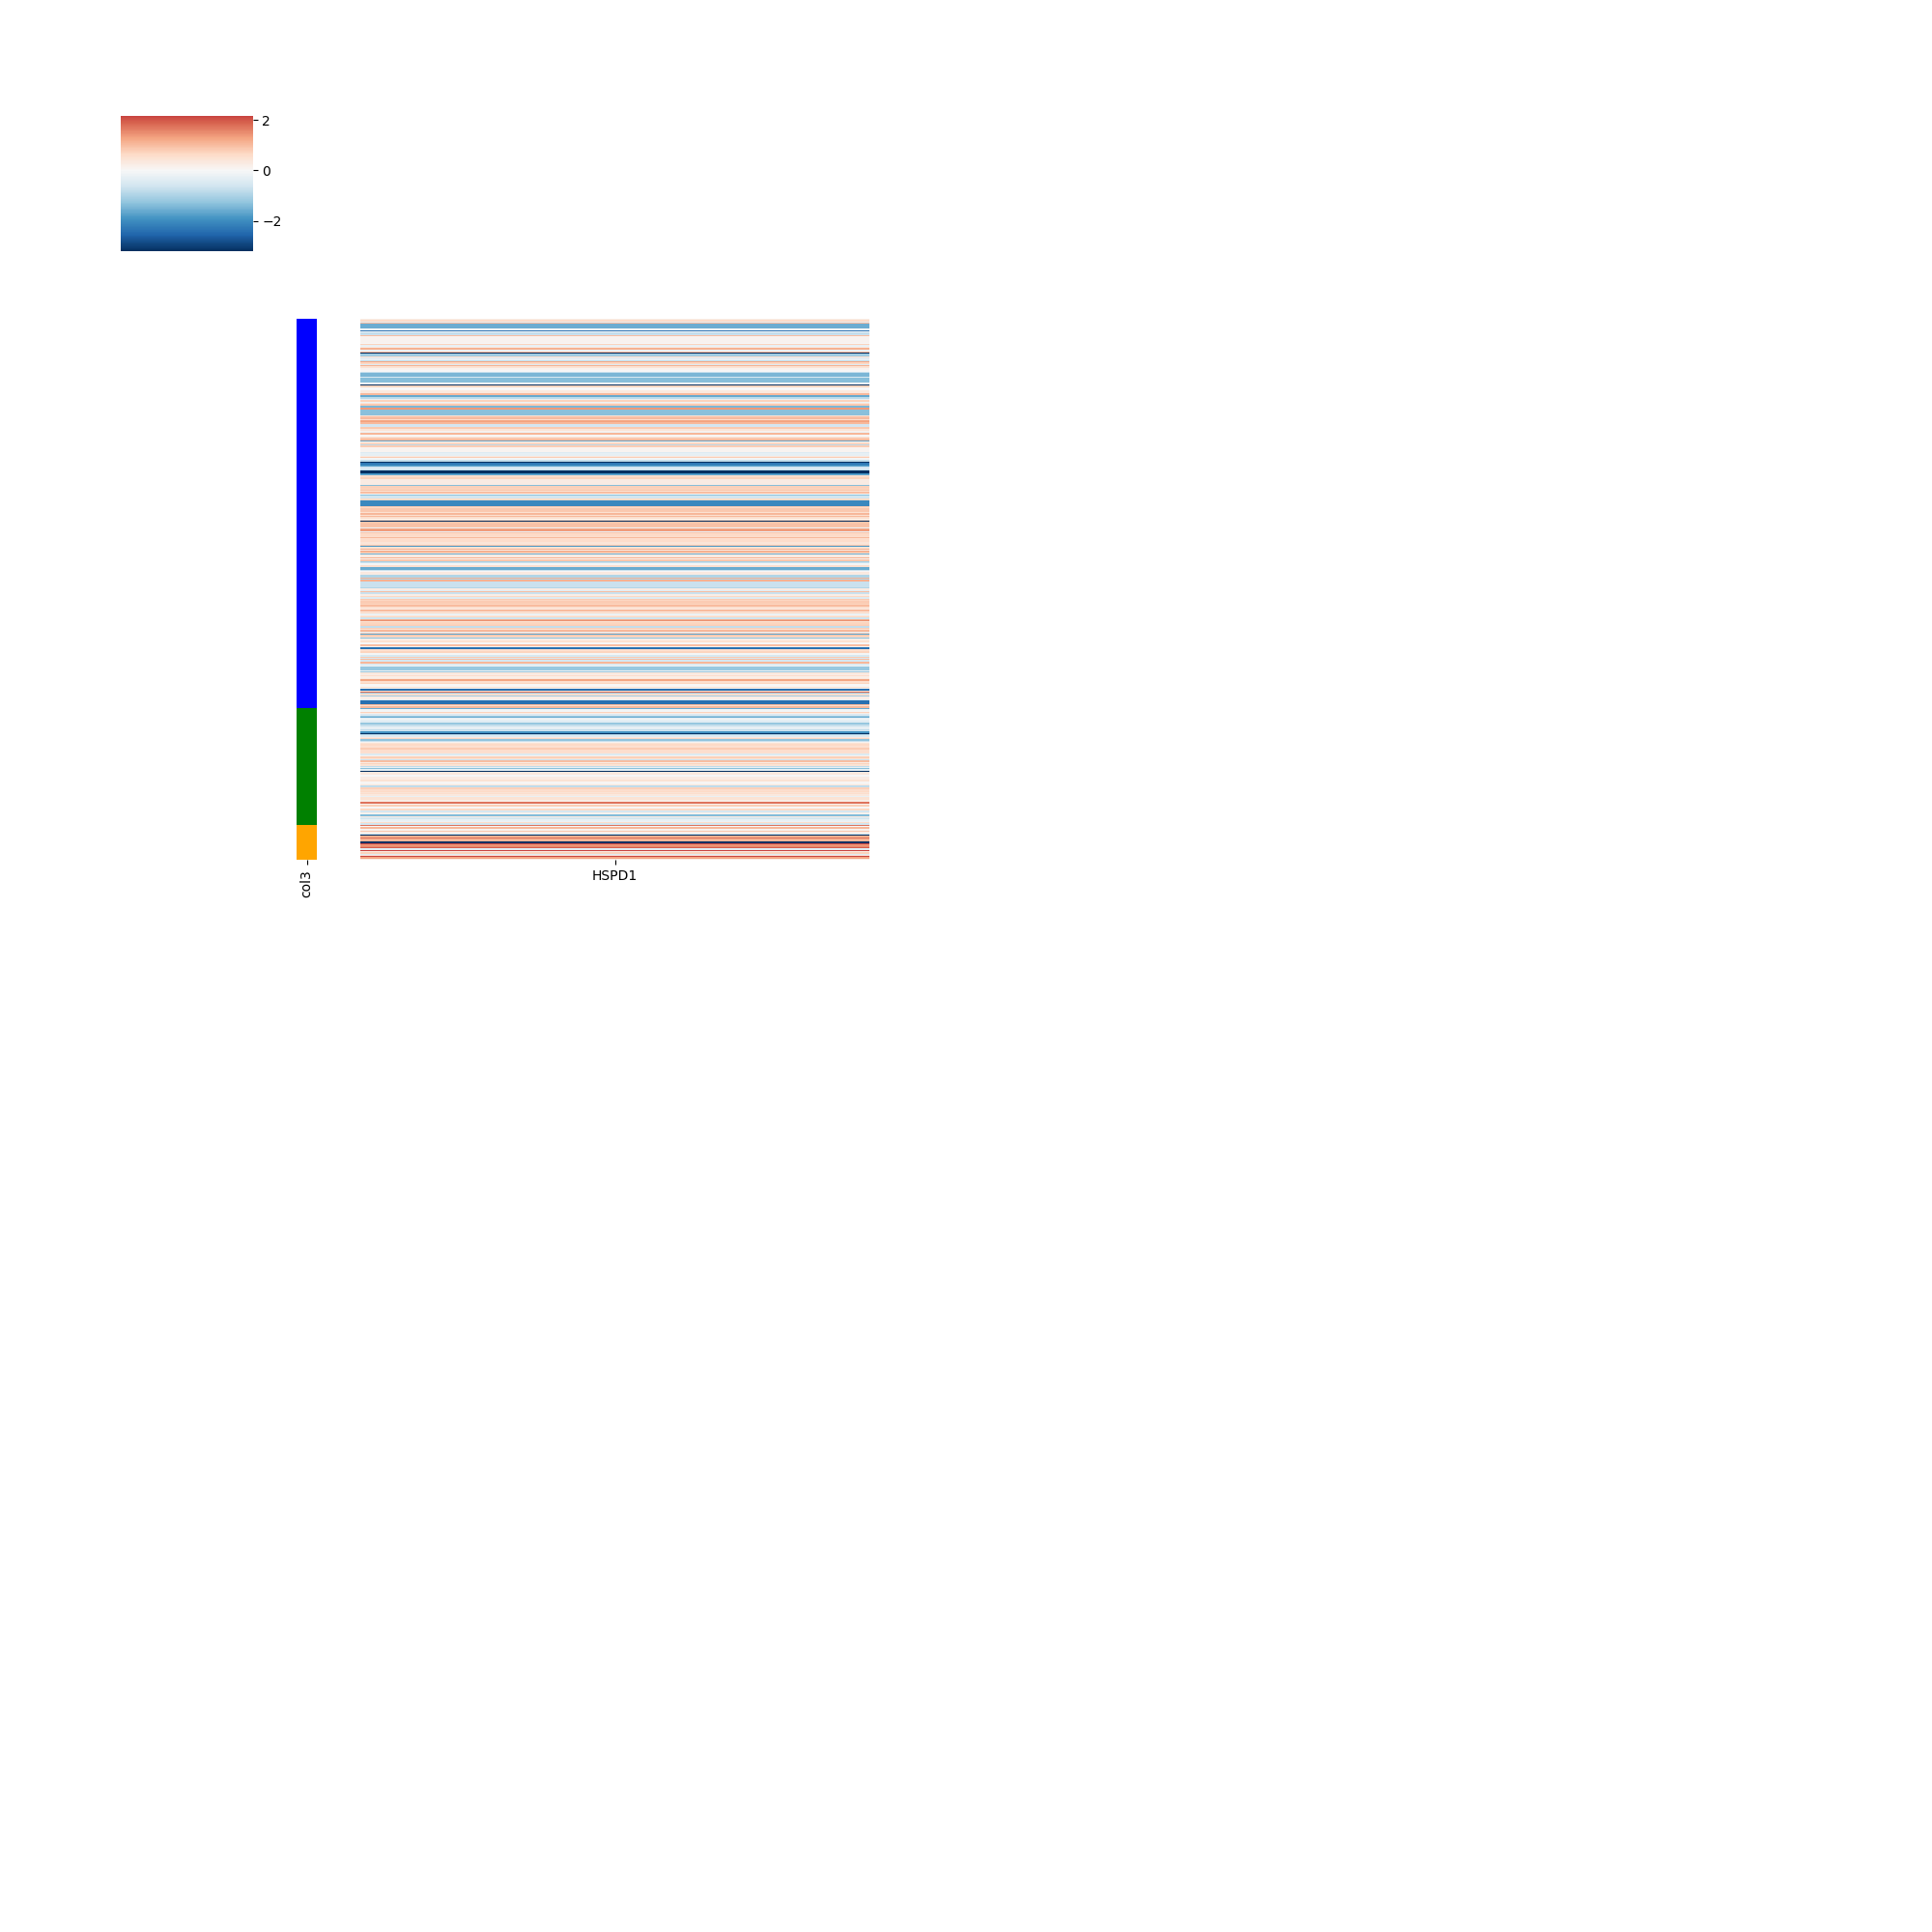

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import zscore

# Assuming adata_df, top_day0, and cell_marker are already defined

# Step 1: Filter adata_df for genes in cell_marker
filtered_adata_df = adata_df[cell_marker]

# Step 2: Add group information from top_day0
group_info = top_day0.set_index('index_coord_df')['col3']
adata_df_with_group = filtered_adata_df.join(group_info)

# Normalize each gene by z-score
adata_df_with_group[cell_marker] = adata_df_with_group[cell_marker].apply(zscore)

# Filter for specific EMT groups and set the order
emt_groups = ['Low EMT', 'Medium EMT', 'High EMT']
group_order = {'Low EMT': 1, 'Medium EMT': 2, 'High EMT': 3}
adata_df_with_group['GroupOrder'] = adata_df_with_group['col3'].map(group_order)
adata_filtered_groups = adata_df_with_group[adata_df_with_group['col3'].isin(emt_groups)]
adata_sorted = adata_filtered_groups.sort_values(by='GroupOrder')

# Create a color map for the groups
group_colors = {'Low EMT': 'blue', 'Medium EMT': 'green', 'High EMT': 'orange'}
row_colors = adata_sorted['col3'].map(group_colors)

# Initialize a PDF file
pdf_path = 'Desktop/EMT_Optimal_Transport/top_ancestor/gene_expression_heatmaps_single_gene_normalized_day0.pdf'
with PdfPages(pdf_path) as pdf:
    for gene in cell_marker:
        # Create the clustermap (heatmap) for each gene, disabling clustering
        g = sns.clustermap(adata_sorted[[gene]], cmap='RdBu_r', col_cluster=False, row_cluster=False, yticklabels=False, row_colors=row_colors, center=0)
        plt.title(f'Z-Score Normalized Expression of {gene} at Day 0')
        plt.xlabel('EMT Groups')
        plt.ylabel('Cells')
        
        # Create and add a custom legend for the EMT groups
        for group, color in group_colors.items():
            plt.plot([], [], color=color, label=group)
        plt.legend(loc='upper left', bbox_to_anchor=(2, 1), title='EMT Groups')

        # Save each heatmap to the PDF
        pdf.savefig(g.fig, bbox_inches='tight')
        plt.close(g.fig)  # Close the figure to free memory


# Validations

In [377]:
interp_summary = wot.ot.compute_validation_summary(ot_model, day_triplets=[(3, 4, 8)])

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


In [378]:
interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])

mean  std
interval_mid name               
4            F     8.715940  NaN
             I     6.844606  NaN
             L     5.465322  NaN
             R     7.404249  NaN

<IPython.core.display.Javascript object>


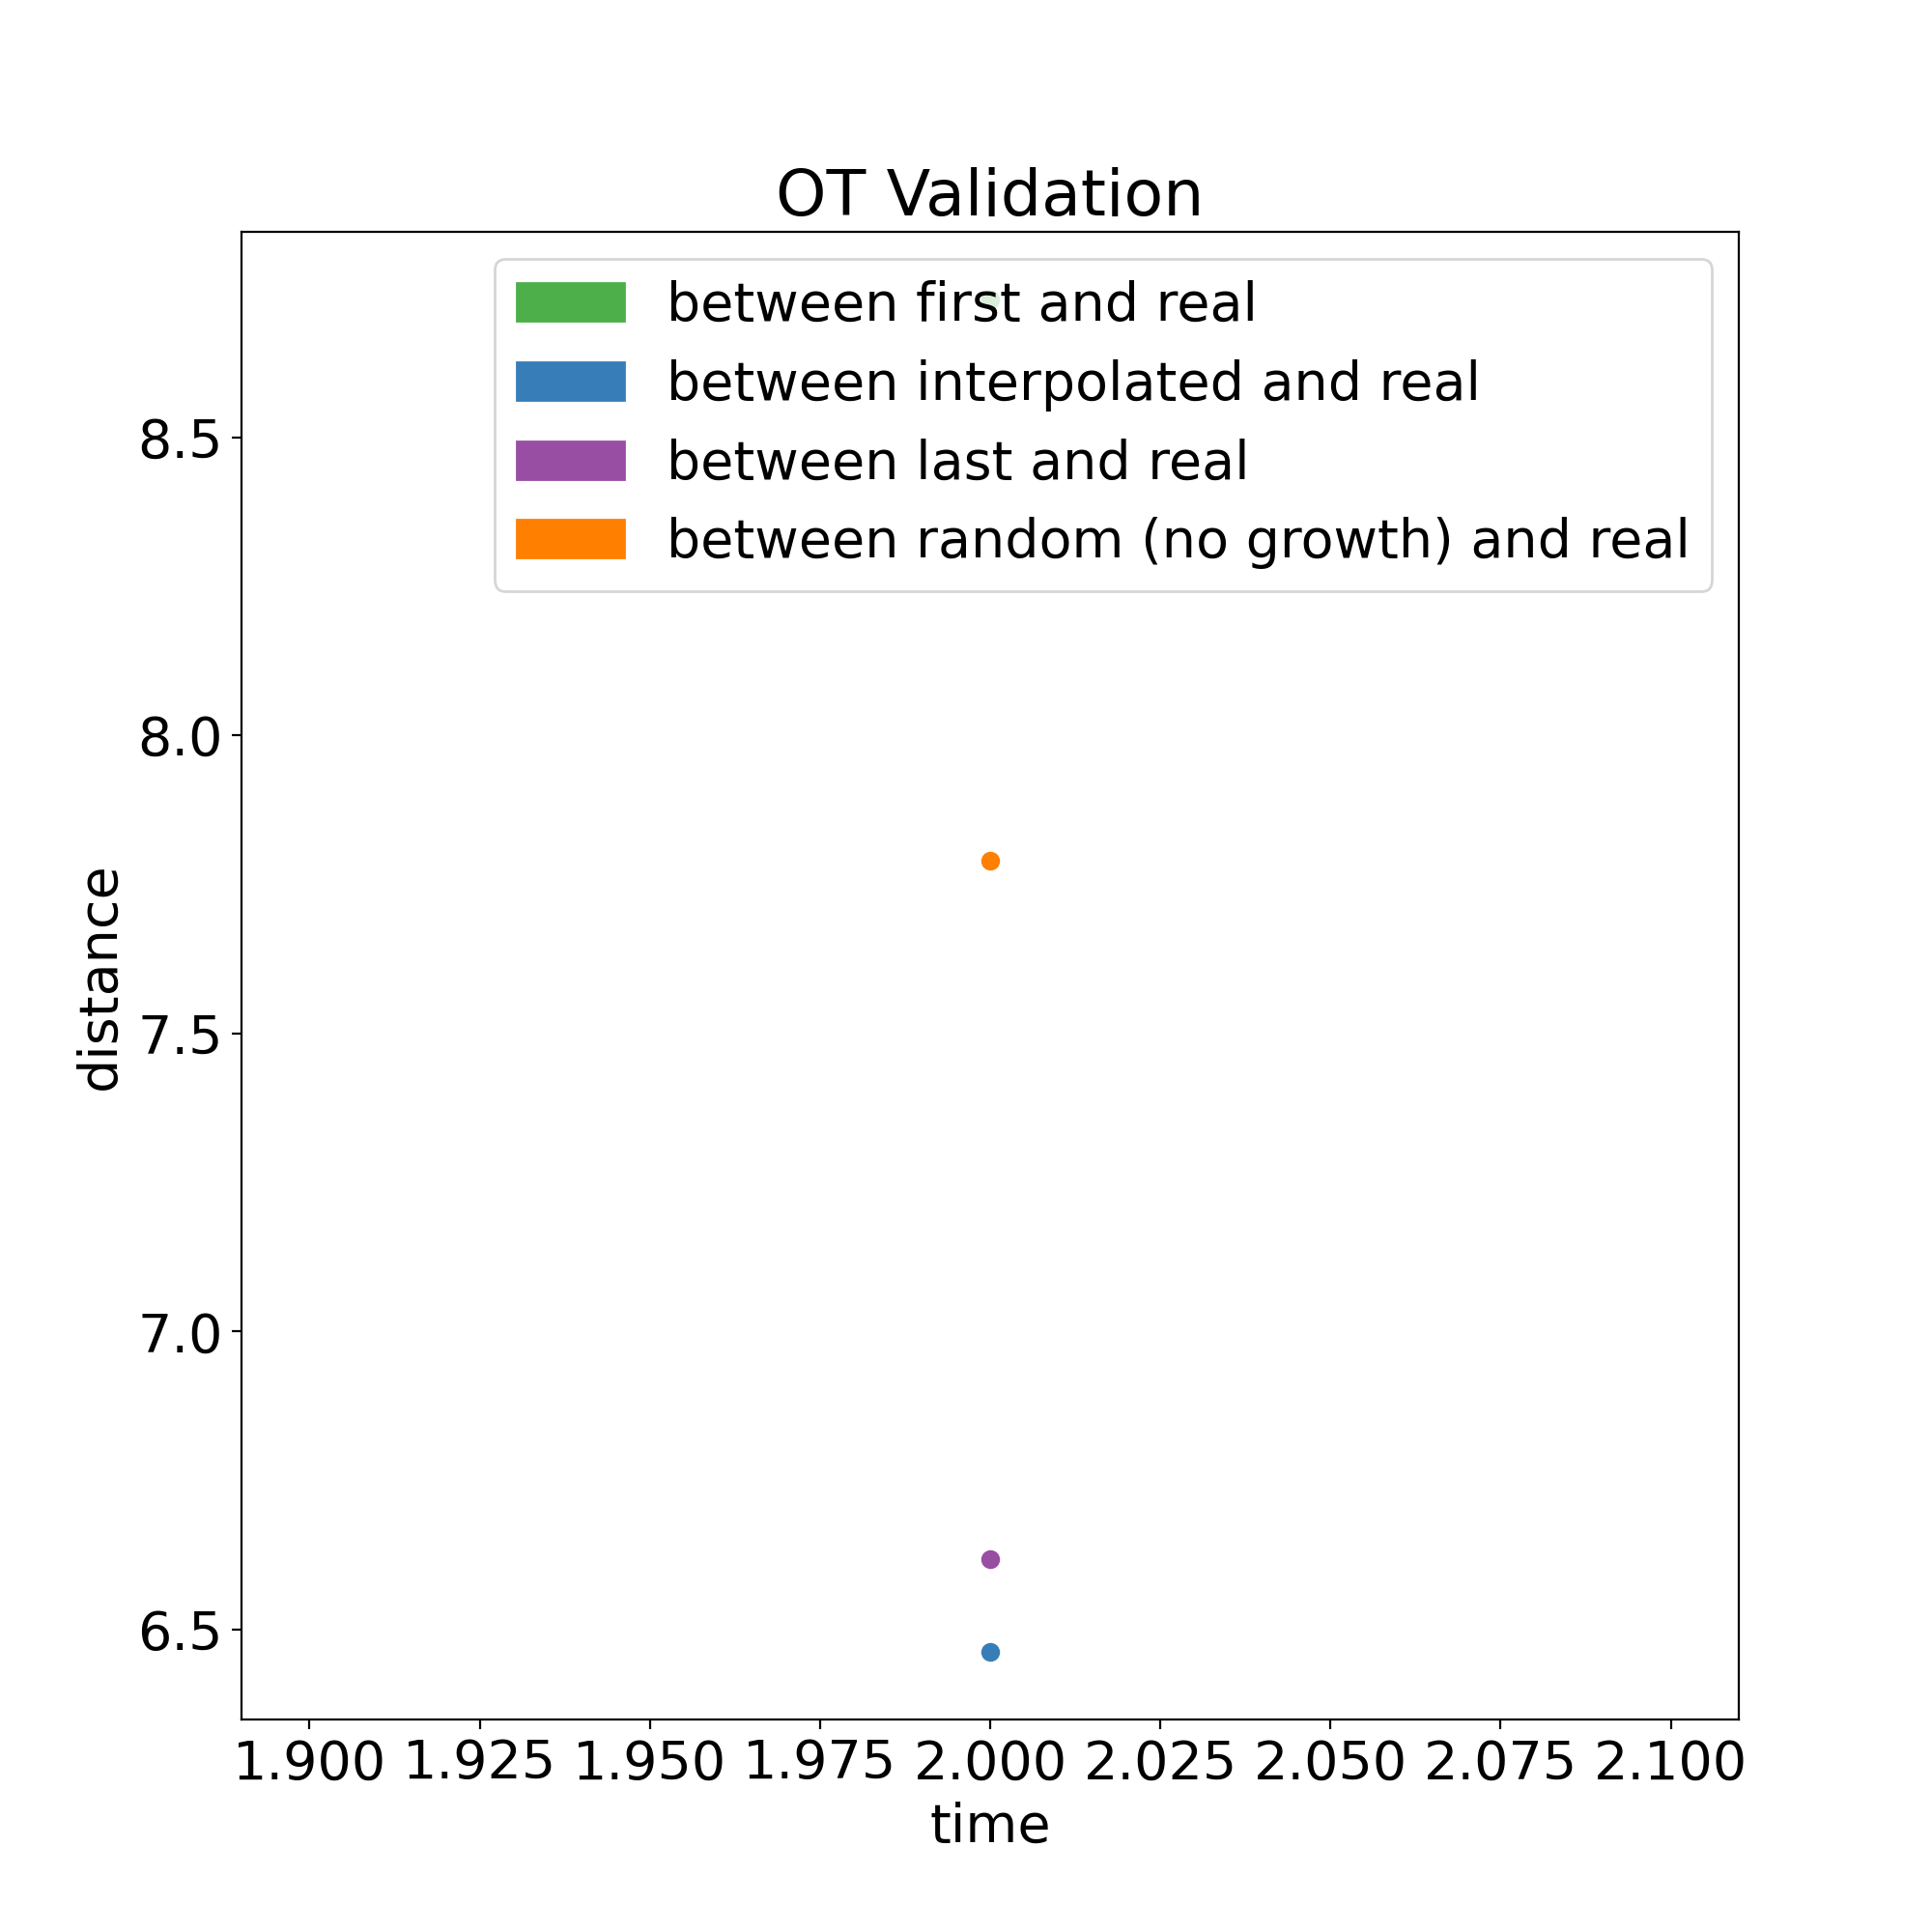

In [369]:
wot.graphics.plot_ot_validation_summary_stats(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))


In [225]:
all_triplets_summary = wot.ot.compute_validation_summary(ot_model)

# save results
all_triplets_summary.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary.txt')
all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')

/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/envs/pegasus/lib/python3.8/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version 

<IPython.core.display.Javascript object>


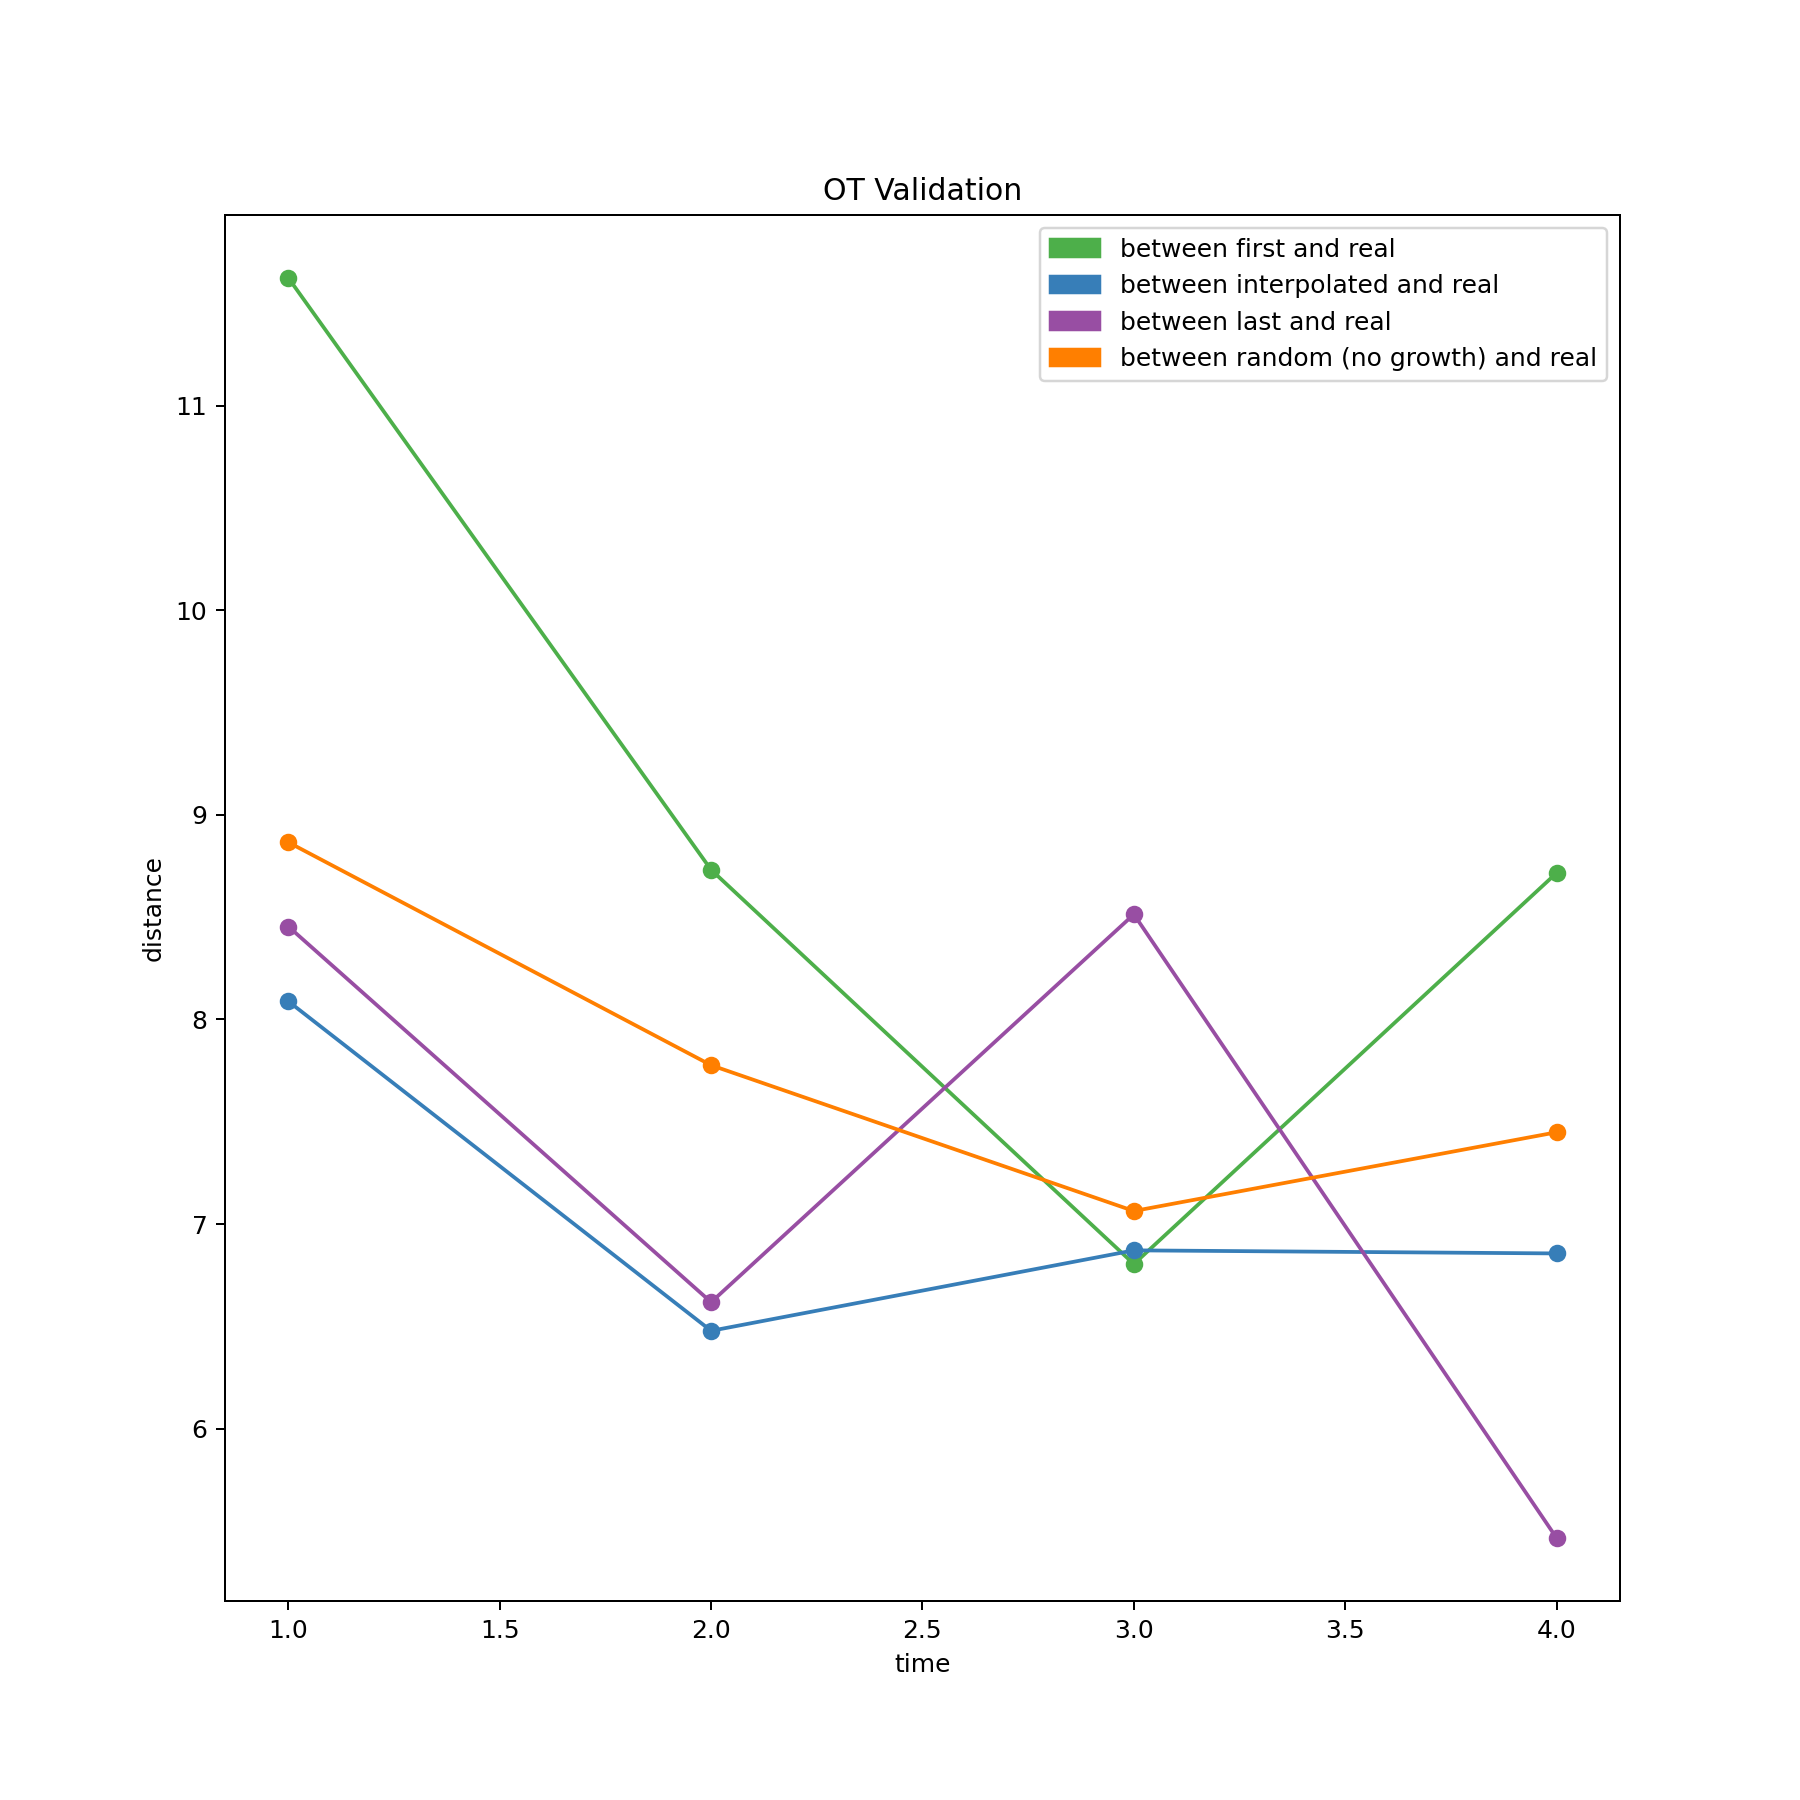

In [554]:
# read in and plot results
all_triplets_stats = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

# Change level of noises-low

In [163]:
ot_model_low_noise = wot.ot.OTModel(adata, epsilon = 0.005, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_low_noise.compute_all_transport_maps(tmap_out='tmaps_low_noise/serum')

#we can speed this up by supplying g2 and doing 1 growth iter

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [164]:
TMAP_PATH_low_noise = 'tmaps_low_noise/serum'

In [464]:
tmap_model_low_noise = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_low_noise)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations_low_noise = tmap_model_low_noise.population_from_cell_sets(cell_sets_trajectory, at_time=8)

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)


In [465]:
trajectory_ds_low_noise = tmap_model_low_noise.trajectories(populations_low_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [466]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_low_noise.obs = trajectory_ds_low_noise.obs.join(coord_df)

In [467]:
# Visualize trajectories
trajectory_dropdown_low_noise = widgets.Dropdown(
    options=trajectory_ds_low_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_low_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_low_noise.obs.copy()
    binned_df['values'] = trajectory_ds_low_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_low_nose, name=trajectory_dropdown_low_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_low_nose(name)>

In [468]:
populations_day0_low_noise = tmap_model_low_noise.population_from_cell_sets(cell_sets_day0, at_time=0)

In [469]:
trajectory_ds_day0_low_noise = tmap_model_low_noise.trajectories(populations_day0_low_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [470]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_low_noise.obs = trajectory_ds_day0_low_noise.obs.join(coord_df)

In [471]:
# Visualize trajectories
trajectory_dropdown_day0_low_noise = widgets.Dropdown(
    options=trajectory_ds_day0_low_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_low_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_low_noise.obs.copy()
    binned_df['values'] = trajectory_ds_day0_low_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_low_nose, name=trajectory_dropdown_day0_low_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_low_nose(name)>

In [481]:
all_triplets_summary_low_noise = wot.ot.compute_validation_summary(ot_model_low_noise)

# # save results
all_triplets_summary_low_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_low_noise.txt')
all_triplets_stats_low_noise = all_triplets_summary_low_noise.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_low_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_low_noise.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

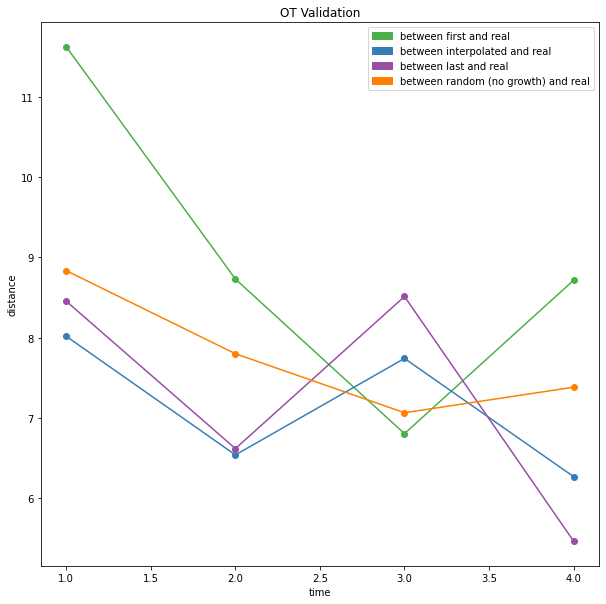

In [482]:
# read in and plot results
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_low_noise)

# Change level of noises-high

In [472]:
ot_model_high_noise = wot.ot.OTModel(adata, epsilon = 0.5, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_high_noise.compute_all_transport_maps(tmap_out='tmaps_high_noise/serum')

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [473]:
TMAP_PATH_high_noise = 'tmaps_high_noise/serum'

In [474]:
tmap_model_high_noise = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_high_noise)
populations_high_noise = tmap_model_high_noise.population_from_cell_sets(cell_sets_trajectory, at_time=8)
trajectory_ds_high_noise = tmap_model_high_noise.trajectories(populations_high_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [475]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_high_noise.obs = trajectory_ds_high_noise.obs.join(coord_df)

In [476]:
# Visualize trajectories
trajectory_dropdown_high_noise = widgets.Dropdown(
    options=trajectory_ds_high_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_high_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_high_noise.obs.copy()
    binned_df['values'] = trajectory_ds_high_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_high_nose, name=trajectory_dropdown_high_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_high_nose(name)>

In [477]:
populations_day0_high_noise = tmap_model_high_noise.population_from_cell_sets(cell_sets_day0, at_time=0)

In [478]:
trajectory_ds_day0_high_noise = tmap_model_high_noise.trajectories(populations_day0_high_noise)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [479]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_high_noise.obs = trajectory_ds_day0_high_noise.obs.join(coord_df)

In [480]:
# Visualize trajectories
trajectory_dropdown_day0_high_noise = widgets.Dropdown(
    options=trajectory_ds_day0_high_noise.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_high_nose(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_high_noise.obs.copy()
    binned_df['values'] = trajectory_ds_day0_high_noise[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_high_nose, name=trajectory_dropdown_day0_high_noise)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_high_nose(name)>

In [483]:
all_triplets_summary_high_noise = wot.ot.compute_validation_summary(ot_model_high_noise)

# # save results
all_triplets_summary_high_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_high_noise.txt')
all_triplets_stats_high_noise = all_triplets_summary_high_noise.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_high_noise.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_high_noise.txt')


/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

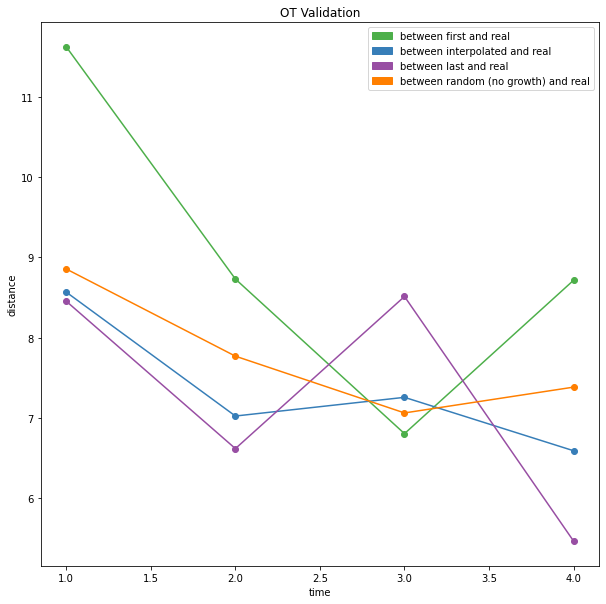

In [484]:
# read in and plot results
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_high_noise)

# Including growth rates

In [188]:
CELL_GROWTH_PATH = 'Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt'

In [189]:
# load data
adata_growth = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH, CELL_GROWTH_PATH])
adata_growth.shape

/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:402: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=df.values, obs=pd.DataFrame(index=df.index), var=pd.DataFrame(index=df.columns))


(12588, 15000)

In [386]:
# create OTModel
ot_model_growth = wot.ot.OTModel(adata_growth,epsilon = 0.05, lambda1 = 1,lambda2 = 50) 

In [387]:
# Compute a single transport map from day 3 to 4
tmap_annotated = ot_model_growth.compute_transport_map(3,4)

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


In [388]:
# row annotations include cell growth rates
tmap_annotated.obs


g0        g1
id                                            
MCF10A_t3_AAACCCAAGTGTAGTA  1.137427  0.727008
MCF10A_t3_AAACCCACATATCTCT  0.639050  0.801061
MCF10A_t3_AAACCCAGTGTCATGT  0.859223  0.980593
MCF10A_t3_AAACGAAAGCGGTAAC  1.093797  1.465780
MCF10A_t3_AAACGAAGTCCAAGAG  0.978088  1.465695
...                              ...       ...
MCF10A_t3_TTTGGTTTCGAGCTGC  0.778573  1.152165
MCF10A_t3_TTTGGTTTCTTCGTGC  1.164630  1.253786
MCF10A_t3_TTTGTTGAGCGTACAG  1.284616  1.394963
MCF10A_t3_TTTGTTGAGGATACAT  1.172443  0.808223
MCF10A_t3_TTTGTTGCAATCCAGT  0.303796  0.404298

[2132 rows x 2 columns]

In [389]:
# columns annotated by cell barcodes
tmap_annotated.var

Empty DataFrame
Columns: []
Index: [MCF10A_t4_AAACCTGGTTGTCTTT, MCF10A_t4_AAACGGGCATACGCTA, MCF10A_t4_AAAGATGTCCGAAGAG, MCF10A_t4_AAAGCAACATCCGCGA, MCF10A_t4_AAAGCAAGTTAGGGTG, MCF10A_t4_AAAGTAGCAAGTTAAG, MCF10A_t4_AAAGTAGGTAGGGACT, MCF10A_t4_AAAGTAGTCATCGGAT, MCF10A_t4_AAATGCCCAGCGATCC, MCF10A_t4_AAATGCCCATGGATGG, MCF10A_t4_AAATGCCGTGGCCCTA, MCF10A_t4_AACACGTTCTACGAGT, MCF10A_t4_AACCATGTCAGCATGT, MCF10A_t4_AACCATGTCCTTTCTC, MCF10A_t4_AACCGCGAGCTTCGCG, MCF10A_t4_AACCGCGAGGTGACCA, MCF10A_t4_AACGTTGCAACTGGCC, MCF10A_t4_AACGTTGCACCACCAG, MCF10A_t4_AACTCCCAGCGTTGCC, MCF10A_t4_AACTCCCAGTCCCACG, MCF10A_t4_AACTCCCTCGAACTGT, MCF10A_t4_AACTCTTGTCGGCTCA, MCF10A_t4_AACTCTTGTGCACTTA, MCF10A_t4_AACTCTTGTGGTACAG, MCF10A_t4_AACTCTTTCACGGTTA, MCF10A_t4_AACTTTCTCAAGGTAA, MCF10A_t4_AAGACCTTCTTGCCGT, MCF10A_t4_AAGCCGCCACATCCGG, MCF10A_t4_AAGCCGCGTCATACTG, MCF10A_t4_AAGCCGCTCATCATTC, MCF10A_t4_AAGGAGCAGATCCCGC, MCF10A_t4_AAGGAGCAGTGGAGAA, MCF10A_t4_AAGGAGCCATCTATGG, MCF10A_t4_AAGGAGCGTTGCCTCT, MCF10A_t4_AAGGAGCTCATGCATG, MCF10A_t4_AAGGCAGAGGCGCTCT, MCF10A_t4_AAGGCAGCACCACGTG, MCF10A_t4_AAGGCAGCATTCGACA, MCF10A_t4_AAGGCAGGTACCATCA, MCF10A_t4_AAGGCAGTCGAGCCCA, MCF10A_t4_AAGGTTCAGTGAAGTT, MCF10A_t4_AAGTCTGCACGCTTTC, MCF10A_t4_AAGTCTGCATCCCACT, MCF10A_t4_AAGTCTGTCTACGAGT, MCF10A_t4_AAGTCTGTCTCCGGTT, MCF10A_t4_ACACCAACAGGTTTCA, MCF10A_t4_ACACCAATCGGCGCAT, MCF10A_t4_ACACCAATCGGTTAAC, MCF10A_t4_ACACCCTCAAGGTTCT, MCF10A_t4_ACACCCTCATTCCTCG, MCF10A_t4_ACACCCTGTAACGTTC, MCF10A_t4_ACACCCTGTCCAAGTT, MCF10A_t4_ACACTGAAGCTCCTTC, MCF10A_t4_ACACTGACAGCTATTG, MCF10A_t4_ACACTGAGTACTTAGC, MCF10A_t4_ACACTGATCAGAGGTG, MCF10A_t4_ACAGCCGCAACTTGAC, MCF10A_t4_ACATACGAGATCGATA, MCF10A_t4_ACATACGTCACGACTA, MCF10A_t4_ACATCAGGTACTTAGC, MCF10A_t4_ACATCAGGTGGTCCGT, MCF10A_t4_ACATGGTAGGCTAGCA, MCF10A_t4_ACATGGTGTGACTACT, MCF10A_t4_ACCAGTAAGCAGCGTA, MCF10A_t4_ACCAGTACATGTCCTC, MCF10A_t4_ACCAGTACATTCCTCG, MCF10A_t4_ACCCACTAGTGTACGG, MCF10A_t4_ACCCACTGTCTAACGT, MCF10A_t4_ACCCACTGTGACTACT, MCF10A_t4_ACCGTAAAGGTGATAT, MCF10A_t4_ACCGTAACAAGACACG, MCF10A_t4_ACCGTAACAGCCTGTG, MCF10A_t4_ACCTTTAAGATGTGGC, MCF10A_t4_ACCTTTAGTTACAGAA, MCF10A_t4_ACCTTTATCTTGACGA, MCF10A_t4_ACGAGCCCAAGTAGTA, MCF10A_t4_ACGAGCCGTGTGTGCC, MCF10A_t4_ACGAGCCTCAGGTTCA, MCF10A_t4_ACGAGCCTCTCCGGTT, MCF10A_t4_ACGAGGAAGCAACGGT, MCF10A_t4_ACGAGGAAGGACAGAA, MCF10A_t4_ACGAGGAAGTTTGCGT, MCF10A_t4_ACGAGGATCACTCTTA, MCF10A_t4_ACGATACCAGTAAGAT, MCF10A_t4_ACGATGTAGATGCCTT, MCF10A_t4_ACGATGTGTGCTTCTC, MCF10A_t4_ACGATGTGTGTTGAGG, MCF10A_t4_ACGATGTTCACCGTAA, MCF10A_t4_ACGCAGCCACATTAGC, MCF10A_t4_ACGCAGCGTCCGTTAA, MCF10A_t4_ACGCAGCGTCGTGGCT, MCF10A_t4_ACGCCGACATCCTTGC, MCF10A_t4_ACGCCGATCTGGCGTG, MCF10A_t4_ACGGAGAGTCACCCAG, MCF10A_t4_ACGGAGAGTTGAGTTC, MCF10A_t4_ACGGAGATCCAAATGC, MCF10A_t4_ACGGCCATCTCTGAGA, MCF10A_t4_ACGGGCTAGAAGGACA, MCF10A_t4_ACGGGCTTCAACGAAA, MCF10A_t4_ACGGGTCAGGAATCGC, ...]

[1147 rows x 0 columns]

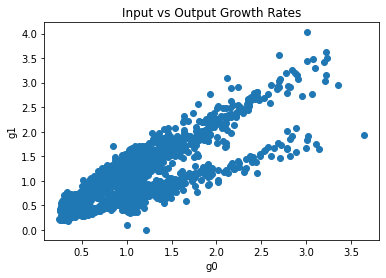

In [390]:
# Visualize how growth rates change with growth iterations
plt.scatter(tmap_annotated.obs['g0'],tmap_annotated.obs['g1'])
plt.xlabel("g0")
plt.ylabel("g1")
plt.title("Input vs Output Growth Rates")
plt.show()


In [391]:
ot_model_strict_growth = wot.ot.OTModel(adata_growth, epsilon = 0.05, lambda1 = 3,lambda2 = 50) 
tmap_anno_strict = ot_model_strict_growth.compute_transport_map(3,4)

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))


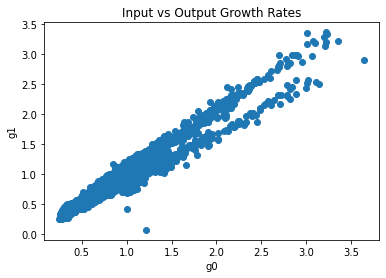

In [392]:
plt.scatter(tmap_anno_strict.obs['g0'],tmap_anno_strict.obs['g1'])
plt.xlabel("g0")
plt.ylabel("g1")
plt.title("Input vs Output Growth Rates")
plt.show()

# Compute all transport maps in batch mode - growth rate


In [443]:
ot_model_growth = wot.ot.OTModel(adata_growth, epsilon = 0.05, lambda1 = 1, lambda2 = 50, growth_iters = 3) 
ot_model_growth.compute_all_transport_maps(tmap_out='tmaps_gs_2/serum')

/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly t

In [444]:
TMAP_PATH_GS = 'tmaps_gs_2/serum'

In [445]:
tmap_model_gs = wot.tmap.TransportMapModel.from_directory(TMAP_PATH_GS)
cell_sets_trajectory = wot.io.read_sets(CELL_SETS_PATH, as_dict=True)
populations_gs = tmap_model_gs.population_from_cell_sets(cell_sets_trajectory, at_time=8)
trajectory_ds_gs = tmap_model_gs.trajectories(populations_gs)


/opt/anaconda3/lib/python3.9/site-packages/wot/io/io.py:304: FutureWarning: X.dtype being converted to np.float32 from int8. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=x, obs=obs, var=var)
/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [446]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_gs.obs = trajectory_ds_gs.obs.join(coord_df)

In [447]:
# Visualize trajectories
trajectory_dropdown_gs = widgets.Dropdown(
    options=trajectory_ds_gs.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_gs(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_gs.obs.copy()
    binned_df['values'] = trajectory_ds_gs[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_gs, name=trajectory_dropdown_gs)

interactive(children=(Dropdown(description='Trajectory:', options=('Blue', 'Cyan', 'Red'), value='Blue'), Outp…

<function __main__.update_trajectory_vis_gs(name)>

In [452]:
populations_day0_gs = tmap_model_gs.population_from_cell_sets(cell_sets_day0, at_time=0)

In [453]:
trajectory_ds_day0_gs = tmap_model_gs.trajectories(populations_day0_gs)


/opt/anaconda3/lib/python3.9/site-packages/wot/tmap/transport_map_model.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(X=np.concatenate(trajectories), obs=self.meta.copy(),


In [454]:
# Load embedding coordinates
coord_df = pd.read_csv(FLE_COORDS_PATH, sep='\t', index_col=0)
nbins = 500
xrange = coord_df['x'].min(), coord_df['x'].max()
yrange = coord_df['y'].min(), coord_df['y'].max()
coord_df['x'] = np.floor(
    np.interp(coord_df['x'], [xrange[0], xrange[1]], [0, nbins - 1])).astype(int)
coord_df['y'] = np.floor(
    np.interp(coord_df['y'], [yrange[0], yrange[1]], [0, nbins - 1])).astype(int)
trajectory_ds_day0_gs.obs = trajectory_ds_day0_gs.obs.join(coord_df)

In [455]:
# Visualize trajectories
trajectory_dropdown_day0_gs = widgets.Dropdown(
    options=trajectory_ds_day0_gs.var.index,
    description='Trajectory:'
)

def update_trajectory_vis_day0_gs(name):
    figure = plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.tight_layout()
    plt.title(name)
    plt.scatter(coord_df['x'], coord_df['y'], c='#f0f0f0',
                   s=4, marker=',', edgecolors='none', alpha=0.8)
    binned_df = trajectory_ds_day0_gs.obs.copy()
    binned_df['values'] = trajectory_ds_day0_gs[:, name].X
    binned_df = binned_df.groupby(['x', 'y'], as_index=False).sum()
    plt.scatter(binned_df['x'], binned_df['y'], c=binned_df['values'],
                   s=6, marker=',', edgecolors='none', vmax=binned_df['values'].quantile(0.975))
    plt.colorbar().ax.set_title('Trajectory')

widgets.interact(update_trajectory_vis_day0_gs, name=trajectory_dropdown_day0_gs)

interactive(children=(Dropdown(description='Trajectory:', options=('A', 'B', 'D', 'C'), value='A'), Output()),…

<function __main__.update_trajectory_vis_day0_gs(name)>

# Validation with growth rate

In [416]:
ot_model_val_gs = wot.ot.OTModel(adata_gs, growth_rate_field='g2',growth_iters = 1) 


In [417]:
all_triplets_summary_gs = wot.ot.compute_validation_summary(ot_model_val_gs)

# # save results
all_triplets_summary_gs.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_gs.txt')
all_triplets_stats_gs = all_triplets_summary_gs.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_gs.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

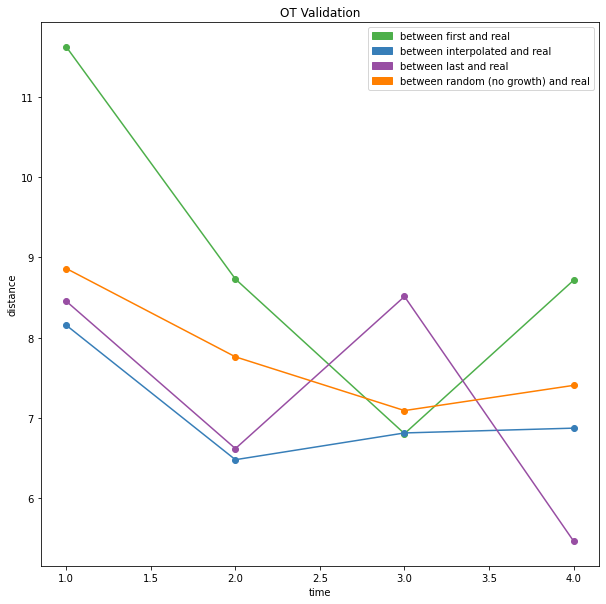

In [418]:
# read in and plot results
all_triplets_stats_gs = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_gs)

In [419]:
ot_model_val_gs_3 = wot.ot.OTModel(adata_gs, growth_rate_field='g2',growth_iters = 3) 


In [420]:
all_triplets_summary_gs_3 = wot.ot.compute_validation_summary(ot_model_val_gs_3)

# # save results
all_triplets_summary_gs_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_gs_3.txt')
all_triplets_stats_gs_3 = all_triplets_summary_gs_3.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_gs_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs_3.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

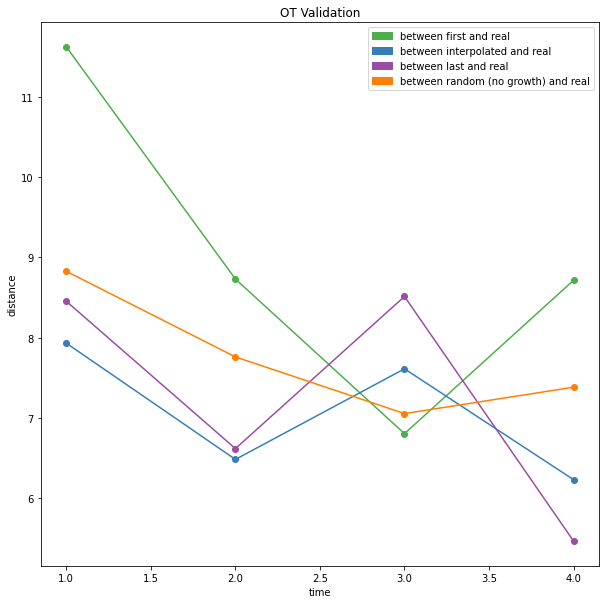

In [421]:
# read in and plot results
all_triplets_stats_gs_3 = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_gs_3.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_gs_3)

# Validation without growth rate

In [230]:
ot_model_val = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 1) 


In [231]:
all_triplets_summary = wot.ot.compute_validation_summary(ot_model_val)

# # save results
all_triplets_summary.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary.txt')
all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

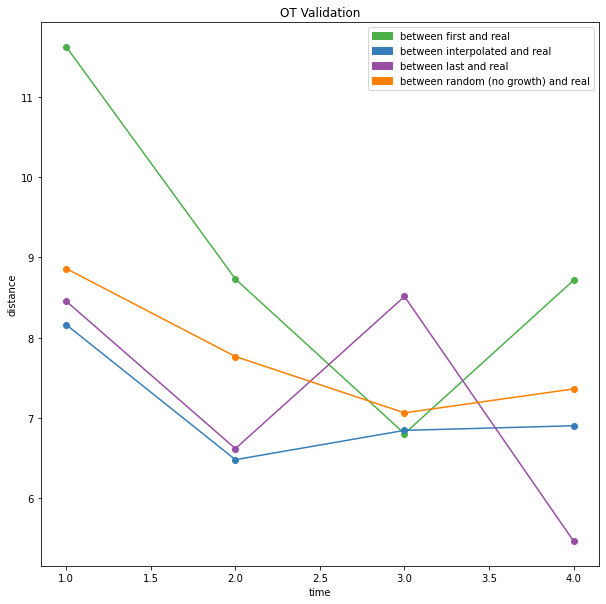

In [237]:
# read in and plot results
all_triplets_stats = pd.read_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(tmap, obs, pd.DataFrame(index=p1.obs.index))
/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/anaconda3/lib/python3.9/site-packages/wot/ot/ot_model.py:312: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. P

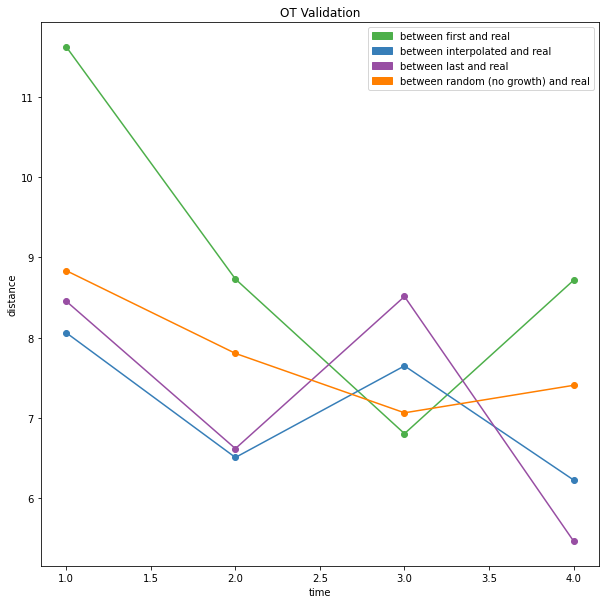

In [434]:
ot_model_val_3 = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 3) 

all_triplets_summary_3 = wot.ot.compute_validation_summary(ot_model_val_3)

# # save results
all_triplets_summary_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_3.txt')
all_triplets_stats_3 = all_triplets_summary_3.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
all_triplets_stats_3.to_csv('Desktop/EMT_Optimal_Transport/serum_validation_summary_stats_3.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats_3)

# GRN regression

In [3]:
import scanpy as sc
import pandas as pd

#from gseapy import ssgsea
from scipy.stats import zscore
import re

In [4]:
import anndata


In [5]:

# Define input files and parameters
adata = sc.read_csv('Desktop/EMT_Optimal_Transport/transposed_data_df.tsv', delimiter='\t')

# Converting AnnData to DataFrame
adata_df = pd.DataFrame(adata.X.T, index=adata.var.index, columns=adata.obs.index)

In [15]:
tmap_01 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_0_1.h5ad')
tmap_12 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_1_2.h5ad')
tmap_23 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_2_3.h5ad')
tmap_34 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_3_4.h5ad')
tmap_48 = anndata.read_h5ad('Desktop/EMT_Optimal_Transport/tmaps/serum_4_8.h5ad')

# Finding gene nodes

In [6]:
adata_df

PI3    S100A9    SPRR1B    S100A8    SPRR2D  \
MCF10A_t4_AAACCTGGTTGTCTTT -0.010945  0.299267 -0.017060  0.007269 -0.009067   
MCF10A_t4_AAACGGGCATACGCTA -0.012150  0.735916 -0.004985  0.169847 -0.045016   
MCF10A_t4_AAAGATGTCCGAAGAG  0.012378  0.184780 -0.033598 -0.006576  0.177710   
MCF10A_t4_AAAGCAACATCCGCGA  0.022110  0.162266 -0.029986 -0.065534 -0.042484   
MCF10A_t4_AAAGCAAGTTAGGGTG  0.233160  0.853782  0.178892  0.603546  0.153865   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG  0.000000  1.068647  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGGATACAT  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT  0.000000  0.000000  0.000000  0.000000  0.000000   

                               KLK10     KRT16  C15orf48     S100P      SAA1  \
MCF10A_t4_AAACCTGGTTGTCTTT -0.055016  0.121449  0.199889  0.105608  0.934373   
MCF10A_t4_AAACGGGCATACGCTA  0.120211  0.084601  0.068536 -0.031029  0.510623   
MCF10A_t4_AAAGATGTCCGAAGAG -0.027986  0.206669  0.077720 -0.019156  0.566724   
MCF10A_t4_AAAGCAACATCCGCGA  0.067524  0.123228  0.329940 -0.008158  0.140080   
MCF10A_t4_AAAGCAAGTTAGGGTG  0.161415  0.062948  0.894546 -0.016677  2.709917   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC  0.000000  0.425928  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG  0.000000  0.000000  0.000000  0.000000  1.697452   
MCF10A_t3_TTTGTTGAGGATACAT  0.000000  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT  0.000000  0.000000  0.000000  0.000000  0.447297   

                            ...    NOS1AP  SARDH     CPEB3  OBP2A  \
MCF10A_t4_AAACCTGGTTGTCTTT  ...  0.142971    0.0  0.159729    0.0   
MCF10A_t4_AAACGGGCATACGCTA  ...  0.000000    0.0 -0.000372    0.0   
MCF10A_t4_AAAGATGTCCGAAGAG  ...  0.008394    0.0 -0.010261    0.0   
MCF10A_t4_AAAGCAACATCCGCGA  ... -0.008800    0.0  0.002204    0.0   
MCF10A_t4_AAAGCAAGTTAGGGTG  ... -0.002143    0.0  0.006733    0.0   
...                         ...       ...    ...       ...    ...   
MCF10A_t3_TTTGGTTTCGAGCTGC  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGGTTTCTTCGTGC  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGAGCGTACAG  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGAGGATACAT  ...  0.000000    0.0  0.000000    0.0   
MCF10A_t3_TTTGTTGCAATCCAGT  ...  0.000000    0.0  0.000000    0.0   

                            RP11-80H5.9     TUBG1      FGF8     SBNO2  \
MCF10A_t4_AAACCTGGTTGTCTTT          0.0  0.194783  0.000072  0.316715   
MCF10A_t4_AAACGGGCATACGCTA          0.0  0.577341  0.000000  0.150873   
MCF10A_t4_AAAGATGTCCGAAGAG          0.0  0.674064  0.000000  0.089645   
MCF10A_t4_AAAGCAACATCCGCGA          0.0  0.386146  0.000000  0.260123   
MCF10A_t4_AAAGCAAGTTAGGGTG          0.0  0.808545  0.000000  0.283114   
...                                 ...       ...       ...       ...   
MCF10A_t3_TTTGGTTTCGAGCTGC          0.0  0.996620  0.000000  0.000000   
MCF10A_t3_TTTGGTTTCTTCGTGC          0.0  0.723687  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGCGTACAG          0.0  0.492954  0.000000  0.000000   
MCF10A_t3_TTTGTTGAGGATACAT          0.0  1.556272  0.000000  0.000000   
MCF10A_t3_TTTGTTGCAATCCAGT          0.0  0.447297  0.000000  0.000000   

                                NRG2  RP13-631K18.2  
MCF10A_t4_AAACCTGGTTGTCTTT  0.018289            0.0  
MCF10A_t4_AAACGGGCATACGCTA  0.000000            0.0  
MCF10A_t4_AAAGATGTCCGAAGAG  0.000000            0.0  
MCF10A_t4_AAAGCAACATCCGCGA -0.002043            0.0  
MCF10A_t4_AAAGCAAGTTAGGGTG -0.000177            0.0  
...                              ...            ...  
MCF10A_t3_TTTGGTTTCGAGCTGC 

DEG for undetermined 

In [17]:
TFS_PATH = 'Desktop/EMT_Optimal_Transport/TG_stemness/TFs_Nat_cell.txt'

In [34]:
# Load the list of genes to be analyzed
with open(TFS_PATH, 'r') as file:
    genes_to_use = file.read().splitlines()
adata_df_filtered = adata_df.loc[:, adata_df.columns.intersection(genes_to_use)]
adata_df_filtered.index

Index(['MCF10A_t4_AAACCTGGTTGTCTTT', 'MCF10A_t4_AAACGGGCATACGCTA',
       'MCF10A_t4_AAAGATGTCCGAAGAG', 'MCF10A_t4_AAAGCAACATCCGCGA',
       'MCF10A_t4_AAAGCAAGTTAGGGTG', 'MCF10A_t4_AAAGTAGCAAGTTAAG',
       'MCF10A_t4_AAAGTAGGTAGGGACT', 'MCF10A_t4_AAAGTAGTCATCGGAT',
       'MCF10A_t4_AAATGCCCAGCGATCC', 'MCF10A_t4_AAATGCCCATGGATGG',
       ...
       'MCF10A_t3_TTTCGATAGAGTCAGC', 'MCF10A_t3_TTTCGATAGCGTTCCG',
       'MCF10A_t3_TTTCGATCAAAGGATT', 'MCF10A_t3_TTTGATCCATAACAGA',
       'MCF10A_t3_TTTGGAGGTCCTTTGC', 'MCF10A_t3_TTTGGTTTCGAGCTGC',
       'MCF10A_t3_TTTGGTTTCTTCGTGC', 'MCF10A_t3_TTTGTTGAGCGTACAG',
       'MCF10A_t3_TTTGTTGAGGATACAT', 'MCF10A_t3_TTTGTTGCAATCCAGT'],
      dtype='object', length=12588)

In [44]:
annotations = pd.read_csv('Desktop/EMT_Optimal_Transport/top_ancestor/results_day_1.csv', index_col="index_coord_df")
annotations.index

Index(['MCF10A_t1_AAACCCACAGTTGTCA', 'MCF10A_t1_AAACCCAGTCCTCAGG',
       'MCF10A_t2_TGGAGAGAGTGGAATT', 'MCF10A_t1_AAACCCAGTGATTCAC',
       'MCF10A_t1_AAACGAAAGATGAAGG', 'MCF10A_t1_AAACGAACAAACACCT',
       'MCF10A_t1_AAACGAAGTTAGTTCG', 'MCF10A_t1_CATCCCAAGGAGCTGT',
       'MCF10A_t1_AAACGAAGTTAGTTCG', 'MCF10A_t1_CATCCCAAGGAGCTGT',
       ...
       'MCF10A_t1_TTTGATCGTAGTGTGG', 'MCF10A_t3_CCTTTGGAGAAACCCG',
       'MCF10A_t1_TTTGATCGTCAACCAT', 'MCF10A_t2_GGAATCTAGACATGCG',
       'MCF10A_t0_ATTCATCGTAATTAGG', 'MCF10A_t1_TTTGGAGAGCGATGGT',
       'MCF10A_t3_GGGCTCAGTTTACCTT', 'MCF10A_t1_TTTGGAGAGGGTGAAA',
       'MCF10A_t1_TTTGGAGGTATGATCC', 'MCF10A_t1_TTTGGTTAGAAGTATC'],
      dtype='object', name='index_coord_df', length=3236)

In [40]:
adata_df_filtered.index

Index(['MCF10A_t4_AAACCTGGTTGTCTTT', 'MCF10A_t4_AAACGGGCATACGCTA',
       'MCF10A_t4_AAAGATGTCCGAAGAG', 'MCF10A_t4_AAAGCAACATCCGCGA',
       'MCF10A_t4_AAAGCAAGTTAGGGTG', 'MCF10A_t4_AAAGTAGCAAGTTAAG',
       'MCF10A_t4_AAAGTAGGTAGGGACT', 'MCF10A_t4_AAAGTAGTCATCGGAT',
       'MCF10A_t4_AAATGCCCAGCGATCC', 'MCF10A_t4_AAATGCCCATGGATGG',
       ...
       'MCF10A_t3_TTTCGATAGAGTCAGC', 'MCF10A_t3_TTTCGATAGCGTTCCG',
       'MCF10A_t3_TTTCGATCAAAGGATT', 'MCF10A_t3_TTTGATCCATAACAGA',
       'MCF10A_t3_TTTGGAGGTCCTTTGC', 'MCF10A_t3_TTTGGTTTCGAGCTGC',
       'MCF10A_t3_TTTGGTTTCTTCGTGC', 'MCF10A_t3_TTTGTTGAGCGTACAG',
       'MCF10A_t3_TTTGTTGAGGATACAT', 'MCF10A_t3_TTTGTTGCAATCCAGT'],
      dtype='object', length=12588)

In [41]:
common_cells = adata_df_filtered.index.intersection(annotations.index)
common_cells

Index(['MCF10A_t4_ACACCAATCGGCGCAT', 'MCF10A_t4_ACGCAGCGTCCGTTAA',
       'MCF10A_t4_CCAGCGATCAAACAAG', 'MCF10A_t4_CGGAGTCAGAACTCGG',
       'MCF10A_t4_GCATGATCACTAGTAC', 'MCF10A_t4_GGACATTGTAAACCTC',
       'MCF10A_t4_GGGATGAGTCCGACGT', 'MCF10A_t4_TGACTAGAGAAGGACA',
       'MCF10A_t8_AGCTCTCCACAACTGT', 'MCF10A_t8_AGTGAGGTCTTCATGT',
       ...
       'MCF10A_t3_TGACGCGTCATGACAC', 'MCF10A_t3_TGCTTCGCAAGCCTGC',
       'MCF10A_t3_TGTGATGAGGGCAATC', 'MCF10A_t3_TGTGGCGCAGATGCGA',
       'MCF10A_t3_TTCATTGGTAGGAGGG', 'MCF10A_t3_TTCCAATCATTGGCAT',
       'MCF10A_t3_TTCTAACCAAGAGTAT', 'MCF10A_t3_TTCTTGATCAGGAAGC',
       'MCF10A_t3_TTTACCAAGTGGGAAA', 'MCF10A_t3_TTTGATCCATAACAGA'],
      dtype='object', length=2520)

In [42]:
day_0_data = adata_df_filtered.loc[adata_df_filtered.index.intersection(annotations.index)]
day_0_data

POSTN     TGFBI     EPCAM      KRT8      CDH1  \
MCF10A_t4_ACACCAATCGGCGCAT -0.142201  4.124084  0.121978  1.750346  0.085196   
MCF10A_t4_ACGCAGCGTCCGTTAA -0.079913  3.586673  0.473186  0.807219  0.217168   
MCF10A_t4_CCAGCGATCAAACAAG -0.041761  2.943215  0.094193  1.523809  0.108975   
MCF10A_t4_CGGAGTCAGAACTCGG -0.088900  3.881418  0.053349  1.474577  0.086321   
MCF10A_t4_GCATGATCACTAGTAC  0.024579  2.378005  0.016846  1.312557  0.093884   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTCCAATCATTGGCAT  0.000000  3.336054  0.000000  1.903144  0.000000   
MCF10A_t3_TTCTAACCAAGAGTAT  0.000000  2.926914  0.000000  0.000000  0.000000   
MCF10A_t3_TTCTTGATCAGGAAGC  0.000000  3.791230  0.000000  1.225585  1.759980   
MCF10A_t3_TTTACCAAGTGGGAAA  0.000000  4.542009  0.000000  2.167903  0.000000   
MCF10A_t3_TTTGATCCATAACAGA  0.000000  3.179877  0.000000  0.406099  0.000000   

                                 DSP     PHF19      CDH2     SNAI1      EZH2  \
MCF10A_t4_ACACCAATCGGCGCAT  1.031161  0.383011  0.572735  0.111492 -0.041466   
MCF10A_t4_ACGCAGCGTCCGTTAA  0.969062  0.669045  0.047828  0.048837  0.194427   
MCF10A_t4_CCAGCGATCAAACAAG  0.423672  0.269634  0.085011  0.026421  0.024606   
MCF10A_t4_CGGAGTCAGAACTCGG  0.484482  0.809524  0.526142  0.069379 -0.045429   
MCF10A_t4_GCATGATCACTAGTAC  0.396667  0.022847 -0.013022  0.076888  0.013640   
...                              ...       ...       ...       ...       ...   
MCF10A_t3_TTCCAATCATTGGCAT  0.886548  0.000000  0.886548  0.000000  0.000000   
MCF10A_t3_TTCTAACCAAGAGTAT  0.000000  0.778405  1.210747  0.000000  0.000000   
MCF10A_t3_TTCTTGATCAGGAAGC  1.225585  0.000000  1.759980  0.000000  0.000000   
MCF10A_t3_TTTACCAAGTGGGAAA  1.583088  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGATCCATAACAGA  0.000000  1.254122  0.000000  0.000000  0.406099   

                            PRRX1      ZEB1      ZEB2     TGFB1    TWIST1  \
MCF10A_t4_ACACCAATCGGCGCAT    0.0 -0.014760  0.005654  0.760712  0.325175   
MCF10A_t4_ACGCAGCGTCCGTTAA    0.0  0.050042  0.005316  0.269194  0.152584   
MCF10A_t4_CCAGCGATCAAACAAG    0.0 -0.004646 -0.012153  0.145087  0.122355   
MCF10A_t4_CGGAGTCAGAACTCGG    0.0  0.218463  0.422910  0.572663  0.597532   
MCF10A_t4_GCATGATCACTAGTAC    0.0  0.060481  0.059595  0.458160  0.114861   
...                           ...       ...       ...       ...       ...   
MCF10A_t3_TTCCAATCATTGGCAT    0.0  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTCTAACCAAGAGTAT    0.0  0.000000  0.000000  0.778405  0.000000   
MCF10A_t3_TTCTTGATCAGGAAGC    0.0  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTACCAAGTGGGAAA    0.0  0.000000  0.000000  0.000000  0.000000   
MCF10A_t3_TTTGATCCATAACAGA    0.0  0.406099  0.000000  0.917432  0.000000   

                              JARID2     KMT2C     SUZ12       EED     KMT2A  
MCF10A_t4_ACACCAATCGGCGCAT  0.075930  0.093741  0.483453  0.090132  0.545007  
MCF10A_t4_ACGCAGCGTCCGTTAA  0.258251  0.312696  0.474801  0.118378  0.476331  
MCF10A_t4_CCAGCGATCAAACAAG  0.108842  0.123906  0.150991  0.033623  0.178049  
MCF10A_t4_CGGAGTCAGAACTCGG  0.411096  0.063934  0.095094  0.112883  0.358567  
MCF10A_t4_GCATGATCACTAGTAC  0.340988  0.341802  0.352805  0.387170  0.478036  
...                              ...       ...       ...       ...       ...  
MCF10A_t3_TTCCAATCATTGGCAT  0.886548  0.000000  0.000000  0.000000  0.000000  
MCF10A_t3_TTCTAACCAAGAGTAT  0.000000  0.000000  1.511601  0.000000  0.000000  
MCF10A_t3_TTCTTGATCAGGAAGC  0.000000  0.000000  1.225585  0.000000  1.225585  
MCF10A_t3_TTTACCAAGTGGGAAA  0.000000  1.583088  0.000000  0.000000  0.000000  
MCF10A_t3_TTTGATCCATAACAGA  0.694099  0.000000  0.000000  0.000000  0.000000  

[2520 rows x 20 columns]

In [36]:
import pandas as pd
from scipy.stats import ttest_ind
import os

def perform_differential_expression(adata_df_filtered, annotations_file, results_folder):
    # Load the annotations
    annotations = pd.read_csv(annotations_file, index_col="index_coord_df")

    # Filter the adata_df_filtered for cells present in the annotations
    day_0_data = adata_df_filtered.loc[adata_df_filtered.index.intersection(annotations.index)]

    # Separate the cells into "Undetermined" and the rest
    undetermined_cells = day_0_data.loc[annotations[annotations['annotation_column'] == 'Undetermined'].index]
    determined_cells = day_0_data.loc[annotations[annotations['annotation_column'] != 'Undetermined'].index]

    # Perform a t-test for each gene
    results = []
    for gene in day_0_data.columns:
        undetermined_vals = undetermined_cells[gene]
        determined_vals = determined_cells[gene]
        stat, p_value = ttest_ind(undetermined_vals, determined_vals, equal_var=False, nan_policy='omit')
        results.append({'gene': gene, 'p_value': p_value})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Save the results
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)
    results_file_path = os.path.join(results_folder, 'day_0_differential_expression_results.csv')
    results_df.to_csv(results_file_path, index=False)
    print(f"Results saved to {results_file_path}")

# Specify the file paths
annotations_file = 'Desktop/EMT_Optimal_Transport/top_ancestor/results_day_0.csv'
results_folder = 'Desktop/EMT_Optimal_Transport/top_ancestor'

# Execute the function
perform_differential_expression(adata_df_filtered, annotations_file, results_folder)



KeyError: 'annotation_column'

In [33]:
import pandas as pd
from scipy.stats import ttest_ind
import os

def process_data(adata_df, gene_list_path, annotation_files, results_folder):
    # Create the results folder if it doesn't exist
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)

    # Load the list of genes to be analyzed
    with open(gene_list_path, 'r') as file:
        genes_to_use = file.read().splitlines()

    # Filter the adata_df to include only the desired genes
    adata_df_filtered = adata_df.loc[:, adata_df.columns.intersection(genes_to_use)]

    for file in annotation_files:
        print(f"Processing {file}...")
        annotations = pd.read_csv(file, index_col="index_coord_df")

        # Extract the day indicator from the file name (assuming it's formatted like 'results_day_X.csv')
        day_indicator = file.split('_')[-1].split('.')[0]  # Extracts 'X' from 'day_X.csv'

        # Filter adata_df_filtered to include only cells from the specific day
        relevant_cells = adata_df_filtered.index[adata_df_filtered.index.str.contains(f"_t{day_indicator}_")]
        adata_df_relevant = adata_df_filtered.loc[relevant_cells]

        # Find the common cells between the day-specific data and the annotations
        common_cells = adata_df_relevant.index.intersection(annotations.index)
        print(f"Number of common cells found: {len(common_cells)}")

        if len(common_cells) == 0:
            print(f"No common cells found in {file}. Skipping this file.")
            continue

        annotated_data = adata_df_relevant.loc[common_cells]

        # Separate the cells into "Undetermined" and other groups
        undetermined_mask = annotations.loc[common_cells, 'col3'] == 'Undetermined'
        undetermined_cells = annotated_data[undetermined_mask]
        other_cells = annotated_data[~undetermined_mask]

        # Perform a t-test for each gene
        p_values = []
        gene_names = annotated_data.columns
        for gene in gene_names:
            _, p_value = ttest_ind(undetermined_cells[gene], other_cells[gene], equal_var=False, nan_policy='omit')
            p_values.append(p_value)

        # Compile the results
        results = pd.DataFrame({
            'gene': gene_names,
            'p_value': p_values
        })

        # Define the path for saving the results
        results_file = os.path.join(results_folder, os.path.splitext(os.path.basename(file))[0] + '_DE_results.csv')

        # Save the results
        results.to_csv(results_file, index=False)

# Specify the path to the text file containing the list of genes
gene_list_path = TFS_PATH

# List your annotation files
annotation_files = [
    'Desktop/EMT_Optimal_Transport/top_ancestor/results_day_0.csv',
    'Desktop/EMT_Optimal_Transport/top_ancestor/results_day_1.csv',
    # Add more files as needed
]

# Specify the folder where you want to save the results
results_folder = 'Desktop/EMT_Optimal_Transport/top_ancestor'

# Call the function with the pre-loaded adata_df
process_data(adata_df, gene_list_path, annotation_files, results_folder)



Processing Desktop/EMT_Optimal_Transport/top_ancestor/results_day_0.csv...
Number of common cells found: 2734


/var/folders/8r/89vnr7ys5lq5cwbdyl6pj5th0000gp/T/ipykernel_48780/3799836261.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  undetermined_cells = annotated_data[undetermined_mask]


IndexError: indices are out-of-bounds

In [17]:
# Filter for Day 0 cells
day0_cells = tmap_01.obs_names

# Filter for Day 1 cells
day1_cells = tmap_01.var_names

# Filter for Day 0 cells
day2_cells = tmap_23.obs_names

# Filter for Day 1 cells
day3_cells = tmap_23.var_names

# Filter for Day 0 cells
day4_cells = tmap_48.obs_names

# Filter for Day 1 cells
day8_cells = tmap_48.var_names


In [31]:


# Subset the DataFrame for day 0 and day 8 cells
day0_data = adata_df.loc[day0_cells]
day8_data = adata_df.loc[day8_cells]

# Calculate mean expression for each gene across the selected cells
mean_expression_day0 = day0_data.mean(axis=0)  # Mean across day 0 cells for each gene
mean_expression_day8 = day8_data.mean(axis=0)  # Mean across day 8 cells for each gene

# Compute the difference in mean expression
expression_change = mean_expression_day8 - mean_expression_day0

# Select the top 100 genes with the largest changes
top_100_genes = expression_change.abs().nlargest(100).index.tolist()


top_100_genes

['TGFBI',
 'FN1',
 'PMEPA1',
 'LAMC2',
 'TPM1',
 'S100A9',
 'TAGLN',
 'ANGPTL4',
 'SERPINE1',
 'LAMA3',
 'LAMB3',
 'TUBA1A',
 'FGFBP1',
 'S100A14',
 'TP53I3',
 'PLAU',
 'MYL6',
 'RABAC1',
 'IGFBP7',
 'LGALS1',
 'SOX4',
 'TGM2',
 'TMSB4X',
 'FSTL3',
 'CD59',
 'IL32',
 'ID3',
 'FOS',
 'CALD1',
 'S100A8',
 'VIM',
 'YIPF5',
 'DDIT4',
 'TPM4',
 'HSPD1',
 'PDLIM7',
 'CD63',
 'PDPN',
 'KRT81',
 'CD151',
 'ITGB4',
 'KRT6A',
 'AMIGO2',
 'FXYD5',
 'TNFRSF12A',
 'KRT7',
 'TUBA4A',
 'TAGLN2',
 'LY6E',
 'ITGB1',
 'KRT14',
 'PSMD2',
 'OCIAD2',
 'GNAS',
 'FLNA',
 'MAP1B',
 'CHCHD10',
 'COL4A2',
 'COL4A1',
 'ACTN1',
 'RHOC',
 'MAL2',
 'ADIRF',
 'MYC',
 'S100A2',
 'P4HA2',
 'FLNB',
 'IER3',
 'INHBA',
 'PALLD',
 'CALU',
 'S100A11',
 'RRAS',
 'HTRA1',
 'SH3BGRL3',
 'VCAN',
 'RRBP1',
 'CEBPD',
 'CTSB',
 'NCL',
 'IVNS1ABP',
 'C12orf75',
 'CLTB',
 'NT5E',
 'SSR3',
 'MYH9',
 'HSPE1',
 'SCG5',
 'NAV1',
 'PDXK',
 'S100A10',
 'ACTB',
 'LYAR',
 'ARF4',
 'SELM',
 'HSP90AA1',
 'LIMA1',
 'ODC1',
 'SERPINE2',
 'DIXD

In [113]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming adata_df is your gene expression DataFrame with cells as rows and genes as columns

# Standardize the data directly without transposing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(adata_df)

# Perform PCA with 10 components
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Extract the loadings of the first principal component
first_component_loadings = pca.components_[0]

# Now, first_component_loadings should have a length equal to the number of genes
print("Length of first_component_loadings:", len(first_component_loadings))

# Get the indices of the top 230 contributing genes
top_genes_indices = np.argsort(np.abs(first_component_loadings))[::-1][:230]
top_genes = adata_df.columns[top_genes_indices]

# Write these genes to a text file
output_file_path = 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_230_genes.txt'
with open(output_file_path, 'w') as file:
    for gene in top_genes:
        file.write(gene + '\n')

print("Top 230 genes saved to 'top_12_genes.txt'")



Length of first_component_loadings: 15000
Top 230 genes saved to 'top_12_genes.txt'


In [89]:
len(first_component_loadings)

12588

In [52]:
import numpy as np

# Assuming first_component_loadings are your PCA loadings

# Calculate the absolute differences between successive loadings
differences = np.abs(np.diff(first_component_loadings))

# Find the index where the difference falls below a certain threshold
# This threshold is arbitrary and might need to be adjusted
threshold = 0.0001  # Example threshold
significant_drop_index = np.where(differences < threshold)[0]

if significant_drop_index.size > 0:
    first_significant_drop_index = significant_drop_index[0]
    print(f"The first significant drop in coefficients is at index: {first_significant_drop_index}")
else:
    print("No significant drop found based on the chosen threshold.")


The first significant drop in coefficients is at index: 1


<IPython.core.display.Javascript object>


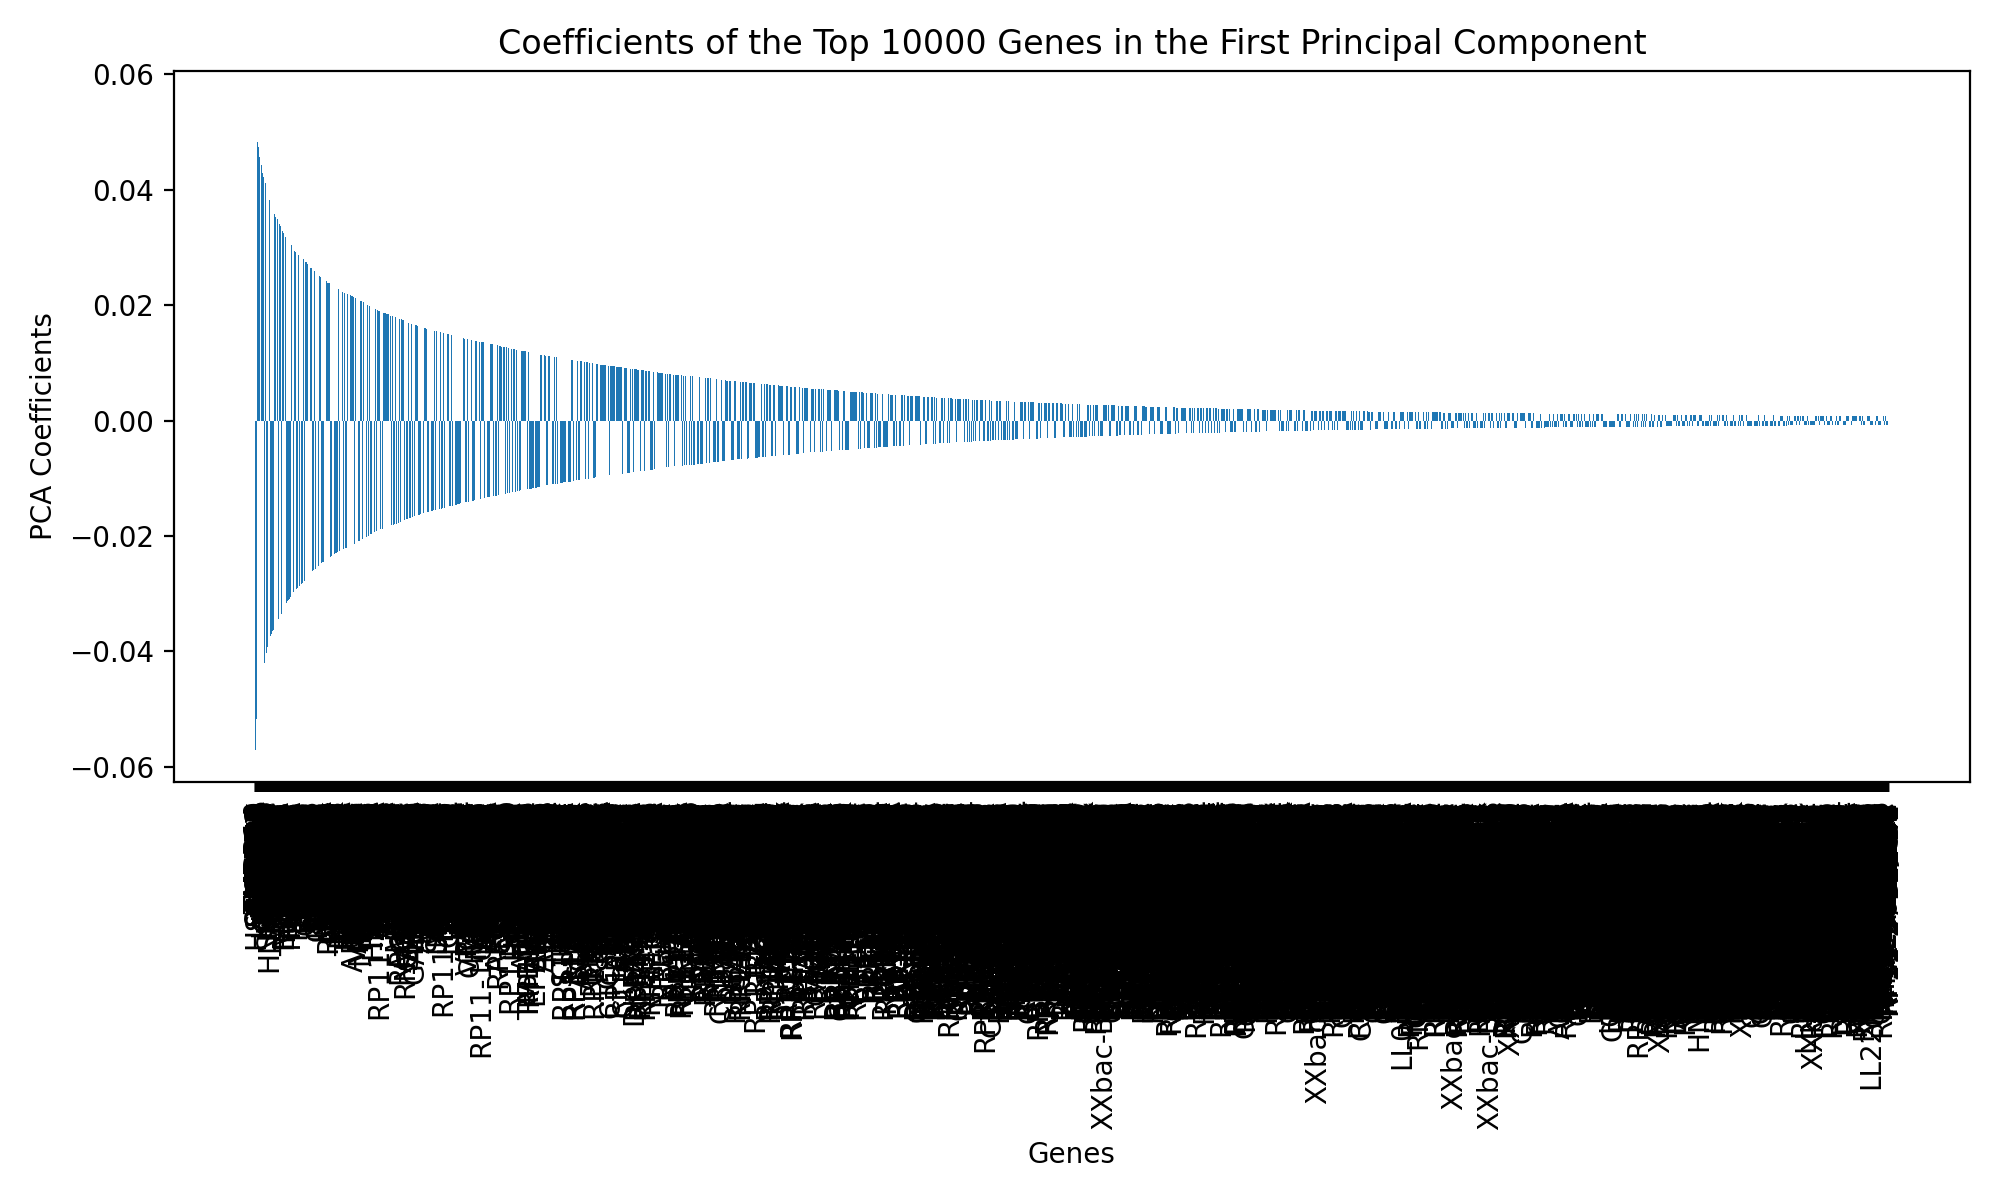

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA with 10 components (as before)
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Extract the loadings of the first principal component
first_component_loadings = pca.components_[0]

# Get the indices of the top 200 contributing genes
top_genes_indices = np.argsort(np.abs(first_component_loadings))[::-1][:10000]
top_genes = transposed_data.index[top_genes_indices]

# Get the corresponding loadings for the top 10000 genes
top_genes_loadings = first_component_loadings[top_genes_indices]

# Plot the coefficients of the top 10000 genes
plt.figure(figsize=(10, 6))
plt.bar(range(10000), top_genes_loadings, align='center')
plt.xticks(range(10000), top_genes, rotation=90)
plt.xlabel('Genes')
plt.ylabel('PCA Coefficients')
plt.title('Coefficients of the Top 10000 Genes in the First Principal Component')
plt.tight_layout()  # Adjust layout to fit all gene labels
plt.show()


In [110]:
import numpy as np

# Assuming first_component_loadings are your PCA loadings

# Filter the loadings to find those with absolute values greater than 0.02
significant_genes_indices = np.where(np.abs(first_component_loadings) > 0.02)[0]

# Count the number of genes that meet this criterion
num_significant_genes = len(significant_genes_indices)

print(f"Number of genes with PCA coefficients > 0.02: {num_significant_genes}")


Number of genes with PCA coefficients > 0.02: 690


import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming adata_df is your gene expression DataFrame with cells as rows and genes as columns

# Transpose the data so that genes are rows and cells are columns
transposed_data = adata_df

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

# Perform PCA with 10 components
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Extract the loadings of the first principal component
first_component_loadings = pca.components_[0]

# Create a Series linking genes to their PCA loadings
gene_loadings = pd.Series(first_component_loadings, index=transposed_data.columns)

# Path to the text file containing the gene set
gene_set_file_path = 'Desktop/EMT_Optimal_Transport/GRN/EMT_Hallmark_genes.txt'

# Read the gene set from the text file
with open(gene_set_file_path, 'r') as file:
    gene_set = [line.strip() for line in file]

# Filter the DataFrame to include only genes from your gene set
filtered_gene_loadings = gene_loadings[gene_loadings.index.isin(gene_set)]

# Sort the genes by their absolute loadings and select the top 12
top_12_genes = filtered_gene_loadings.abs().sort_values(ascending=False).head(12)

# Save the top 12 genes to a text file
output_file_path = 'Desktop/EMT_Optimal_Transport/GRN/top_12_genes_in_set.txt'
with open(output_file_path, 'w') as output_file:
    for gene in top_12_genes.index:
        output_file.write(gene + '\n')

print("Top 12 genes saved to 'top_12_genes_in_set.txt'")


<IPython.core.display.Javascript object>


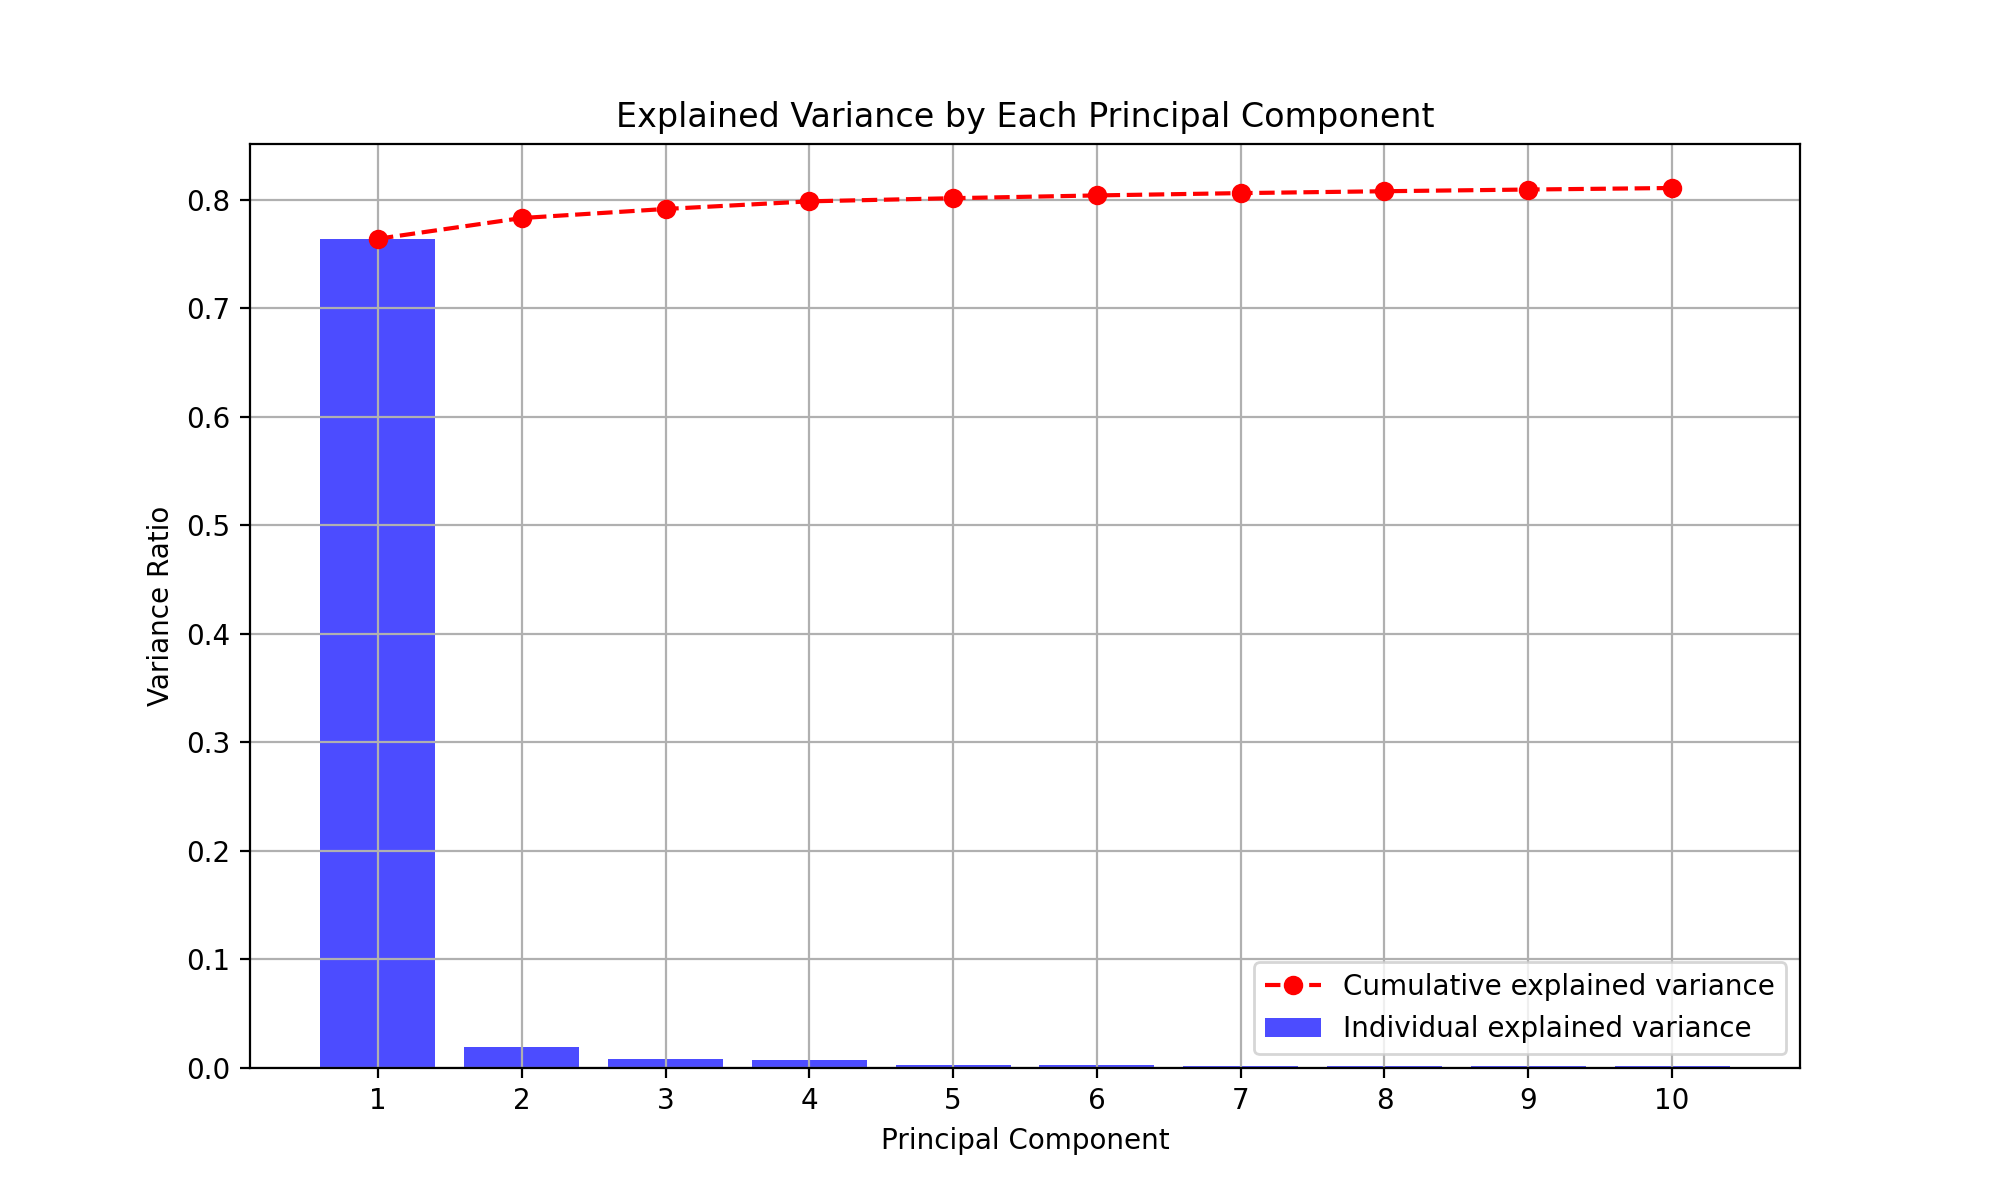

In [40]:
import matplotlib.pyplot as plt

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance_ratio, alpha=0.7, color='blue', label='Individual explained variance')
plt.plot(range(1, 11), explained_variance_ratio.cumsum(), marker='o', linestyle='--', color='red', label='Cumulative explained variance')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

plt.show()



In [43]:
# Path to the GMT file
gmt_file_path = 'Desktop/EMT_Optimal_Transport/GRN/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.2.Hs.gmt'

# Path to the output text file
txt_file_path = 'Desktop/EMT_Optimal_Transport/GRN/EMT_Hallmark_genes.txt'

# Read the GMT file and write only the genes to a text file
with open(gmt_file_path, 'r') as gmt_file, open(txt_file_path, 'w') as txt_file:
    for line in gmt_file:
        # Split the line into components
        parts = line.strip().split('\t')

        # Extract only the genes (skip the first two elements: gene set name and description)
        genes = parts[2:]

        # Write only the genes to the text file, separated by a newline
        for gene in genes:
            txt_file.write(gene + '\n')

print("Genes saved to 'top_100_genes.txt'")

Genes saved to 'top_100_genes.txt'


In [44]:


# Initialize a counter
gene_count = 0

# Read the GMT file
with open(gmt_file_path, 'r') as gmt_file:
    for line in gmt_file:
        # Split the line into components
        parts = line.strip().split('\t')

        # Extract the genes (skip the first two elements: gene set name and description)
        genes = parts[2:]

        # Add the number of genes in this line to the total count
        gene_count += len(genes)

print(f"Total number of genes: {gene_count}")


Total number of genes: 200


# Regression

In [129]:
import pandas as pd

# Define the path to the CSV file
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'

# Read the CSV file into a Pandas DataFrame, setting the first column as the index
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)

# Transpose if necessary (to ensure cells are in rows and genes are in columns)
if gene_set_scores_df.shape[0] != adata_df.shape[0]:
    gene_set_scores_df = gene_set_scores_df.T

# Now gene_set_scores_df should have cell names as index and genes as columns

In [130]:
# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day0_cells = tmap_01.obs_names
adata_df_day0 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day0_cells)]

# Filter for Day 1 cells
day1_cells = tmap_01.var_names
adata_df_day1 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day1_cells)]


In [62]:
# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day0_cells = tmap_01.obs_names
adata_df_day0 = adata_df.loc[adata_df.index.isin(day0_cells)]

# Filter for Day 1 cells
day1_cells = tmap_01.var_names
adata_df_day1 = adata_df.loc[adata_df.index.isin(day1_cells)]


In [132]:
import pandas as pd

# Assuming gene_set_scores_df is already read from the CSV
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)

# Print out all gene names
print(gene_set_scores_df.columns.tolist())


['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS', 'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS', 'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION', 'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING', 'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_XENOBIOTIC_METABOLISM', 'HALLMARK_FATT

In [101]:
import statsmodels.api as sm


In [135]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# List of genes of interest
#genes_of_interest = ['FOXC2', 'SNAI1', 'SNAI2', 'TWIST1', 'TWIST2', 'KLF8', 'ZEB1', 'ZEB2', 'TCF3', 'TGFB1', 'VIM', 'CDH1']

genes_of_interest = ['HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_NOTCH_SIGNALING',
                     'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_HYPOXIA', 
                     'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB' ]


# Initialize data structures
X_list = []
Y_dict = {gene: [] for gene in genes_of_interest}
weights_list = []

# Prepare X matrix and weights for all cell pairs
for i, day0_cell in enumerate(tmap_01.obs_names):
    for j, day1_cell in enumerate(tmap_01.var_names):
        X_list.append(adata_df_day0.loc[day0_cell, genes_of_interest])
        for gene in genes_of_interest:
            Y_dict[gene].append(adata_df_day1.loc[day1_cell, gene])
        weights_list.append(tmap_01.X[i, j])

# Convert lists to DataFrames/arrays
X_df = pd.DataFrame(X_list)
weights = np.array(weights_list)
X_df = sm.add_constant(X_df)  # Add a constant to the model
X_df.reset_index(drop=True, inplace=True)  # Reset the index of X_df

# Dictionary to store regression results
regression_results = {}

# Perform regression for each gene
for gene in genes_of_interest:
    Y_df = pd.DataFrame(Y_dict[gene], columns=[gene])
    Y_df.reset_index(drop=True, inplace=True)  # Reset the index of Y_df

    # Fit the weighted linear regression model
    model = sm.WLS(Y_df, X_df, weights=weights)
    results = model.fit()
    regression_results[gene] = results

    # Print R-squared for each gene
    print(f"R-squared for {gene}: {results.rsquared}")
    
# Initialize an empty DataFrame for the coefficients
coefficients_table = pd.DataFrame(columns=['const'] + genes_of_interest)

# Extract coefficients from each fitted model and add to the table
for gene, result in regression_results.items():
    coefficients_table.loc[gene] = result.params

# Display the coefficients table
print(coefficients_table)







R-squared for HALLMARK_PI3K_AKT_MTOR_SIGNALING: 0.13993030506577786
R-squared for HALLMARK_WNT_BETA_CATENIN_SIGNALING: 0.01693918510135839
R-squared for HALLMARK_NOTCH_SIGNALING: 0.06853595117120947
R-squared for HALLMARK_IL6_JAK_STAT3_SIGNALING: 0.13980783657460982
R-squared for HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION: 0.268369914343906
R-squared for HALLMARK_OXIDATIVE_PHOSPHORYLATION: 0.35776309006691076
R-squared for HALLMARK_GLYCOLYSIS: 0.2749729798521401
R-squared for HALLMARK_G2M_CHECKPOINT: 0.5415344071370989
R-squared for HALLMARK_HYPOXIA: 0.2895888215438235
R-squared for HALLMARK_TGF_BETA_SIGNALING: 0.11627437084395331
R-squared for HALLMARK_TNFA_SIGNALING_VIA_NFKB: 0.289099893888919
R-squared for HALLMARK_FATTY_ACID_METABOLISM: 0.23707744053629332
                                               const  \
HALLMARK_PI3K_AKT_MTOR_SIGNALING           -0.071910   
HALLMARK_WNT_BETA_CATENIN_SIGNALING        -0.075618   
HALLMARK_NOTCH_SIGNALING                   -0.077805   
HALLM

In [136]:
# Save the coefficients table to a CSV file
coefficients_table.to_csv('Desktop/EMT_Optimal_Transport/tmaps/hallmark_coefficients_matrix_01.csv')


In [99]:
# Assuming adata_df is a DataFrame with cell identifiers as row indices (genes)

# Filter for Day 0 cells
day0_cells = tmap_01.obs_names
adata_df_day0 = adata_df.loc[adata_df.index.isin(day0_cells)]

# Filter for Day 1 cells
day1_cells = tmap_01.var_names
adata_df_day1 = adata_df.loc[adata_df.index.isin(day1_cells)]

# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day2_cells = tmap_23.obs_names
adata_df_day2 = adata_df.loc[adata_df.index.isin(day2_cells)]

# Filter for Day 1 cells
day3_cells = tmap_23.var_names
adata_df_day3 = adata_df.loc[adata_df.index.isin(day3_cells)]

# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day4_cells = tmap_48.obs_names
adata_df_day4 = adata_df.loc[adata_df.index.isin(day4_cells)]

# Filter for Day 1 cells
day8_cells = tmap_48.var_names
adata_df_day8 = adata_df.loc[adata_df.index.isin(day8_cells)]

In [139]:
# Assuming adata_df is a DataFrame with cell identifiers as row indices (hallmarks)

# Filter for Day 0 cells
day0_cells = tmap_01.obs_names
adata_df_day0 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day0_cells)]

# Filter for Day 1 cells
day1_cells = tmap_01.var_names
adata_df_day1 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day1_cells)]

# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day2_cells = tmap_23.obs_names
adata_df_day2 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day2_cells)]

# Filter for Day 1 cells
day3_cells = tmap_23.var_names
adata_df_day3 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day3_cells)]

# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day4_cells = tmap_48.obs_names
adata_df_day4 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day4_cells)]

# Filter for Day 1 cells
day8_cells = tmap_48.var_names
adata_df_day8 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day8_cells)]

In [102]:
# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# List of genes of interest

genes_of_interest = ['FOXC2', 'SNAI1', 'SNAI2', 'TWIST1', 'TWIST2', 'KLF8', 'ZEB1', 'ZEB2', 'TCF3', 'TGFB1', 'VIM', 'CDH1']

#genes_of_interest = ['LAMA3', 'LAMC2', 'PMEPA1', 'FN1', 'IL32', 'TPM1', 'LGALS1', 'TGM2', 'TGFBI', 'TAGLN', 'TNC', 'CALD1']

# List of day pairs and corresponding tmap matrices
day_pairs = [(adata_df_day0, adata_df_day1, tmap_01), 
             (adata_df_day1, adata_df_day2, tmap_12),
             (adata_df_day2, adata_df_day3, tmap_23),
             (adata_df_day3, adata_df_day4, tmap_34),
             (adata_df_day4, adata_df_day8, tmap_48)
             # Add more pairs as needed
            ]

# Process each day pair
for index, day_pair in enumerate(day_pairs):
    adata_day0, adata_day1, tmap = day_pair

    # Initialize data structures
    X_list = []
    Y_dict = {gene: [] for gene in genes_of_interest}
    weights_list = []

    # Prepare X matrix and weights for all cell pairs
    for i, day0_cell in enumerate(tmap.obs_names):
        for j, day1_cell in enumerate(tmap.var_names):
            X_list.append(adata_day0.loc[day0_cell, genes_of_interest])
            for gene in genes_of_interest:
                Y_dict[gene].append(adata_day1.loc[day1_cell, gene])
            weights_list.append(tmap.X[i, j])

    # Convert lists to DataFrames/arrays
    X_df = pd.DataFrame(X_list)
    weights = np.array(weights_list)
    X_df = sm.add_constant(X_df)
    X_df.reset_index(drop=True, inplace=True)

    # Initialize an empty DataFrame for the coefficients
    coefficients_table = pd.DataFrame(columns=['const'] + genes_of_interest)

    # Perform regression for each gene
    for gene in genes_of_interest:
        Y_df = pd.DataFrame(Y_dict[gene], columns=[gene])
        Y_df.reset_index(drop=True, inplace=True)

        # Fit the weighted linear regression model
        model = sm.WLS(Y_df, X_df, weights=weights)
        results = model.fit()

        # Add coefficients to the table
        coefficients_table.loc[gene] = results.params

    # Save the coefficients table to a CSV file
    file_name = f'coefficients_matrix_daypair_{index}.csv'
    full_file_path = save_directory + file_name
    coefficients_table.to_csv(full_file_path)
    print(f"Saved coefficients matrix for day pair {index} to {full_file_path}")

Saved selected genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/selected_genes_coefficients_matrix_daypair_0.csv


KeyboardInterrupt: 

In [103]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# List of genes of interest
#genes_of_interest = ['HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_NOTCH_SIGNALING',
#                     'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_HYPOXIA', 
#                     'HALLMARK_TGF_BETA_SIGNALING', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']

genes_of_interest = ['LAMA3', 'LAMC2', 'PMEPA1', 'FN1', 'IL32', 'TPM1', 'LGALS1', 'TGM2', 'TGFBI', 'TAGLN', 'TNC', 'CALD1']
       
        
# List of day pairs and corresponding tmap matrices
day_pairs = [(adata_df_day0, adata_df_day1, tmap_01), 
             (adata_df_day1, adata_df_day2, tmap_12),
             (adata_df_day2, adata_df_day3, tmap_23),
             (adata_df_day3, adata_df_day4, tmap_34),
             (adata_df_day4, adata_df_day8, tmap_48)
             # Add more pairs as needed
            ]

# Process each day pair
for index, day_pair in enumerate(day_pairs):
    adata_day0, adata_day1, tmap = day_pair

    # Initialize data structures
    X_list = []
    Y_dict = {gene: [] for gene in genes_of_interest}
    weights_list = []

    # Prepare X matrix and weights for all cell pairs
    for i, day0_cell in enumerate(tmap.obs_names):
        for j, day1_cell in enumerate(tmap.var_names):
            X_list.append(adata_day0.loc[day0_cell, genes_of_interest])
            for gene in genes_of_interest:
                Y_dict[gene].append(adata_day1.loc[day1_cell, gene])
            weights_list.append(tmap.X[i, j])

    # Convert lists to DataFrames/arrays
    X_df = pd.DataFrame(X_list)
    weights = np.array(weights_list)
    X_df = sm.add_constant(X_df)
    X_df.reset_index(drop=True, inplace=True)

    # Initialize an empty DataFrame for the coefficients
    coefficients_table = pd.DataFrame(columns=['const'] + genes_of_interest)

    # Initialize a dictionary to store R-squared values
    r_squared_values = {}

    # Perform regression for each gene
    for gene in genes_of_interest:
        Y_df = pd.DataFrame(Y_dict[gene], columns=[gene])
        Y_df.reset_index(drop=True, inplace=True)

        # Fit the weighted linear regression model
        model = sm.WLS(Y_df, X_df, weights=weights)
        results = model.fit()

        # Add coefficients to the table
        coefficients_table.loc[gene] = results.params

        # Store the R-squared value
        r_squared_values[gene] = results.rsquared

    # Save the coefficients table to a CSV file
    file_name = f'selected_genes_coefficients_matrix_daypair_{index}.csv'
    full_file_path = save_directory + file_name
    coefficients_table.to_csv(full_file_path)
    print(f"Saved selected genes coefficients matrix for day pair {index} to {full_file_path}")

    # Print R-squared values
    print(f"R-squared values for day pair {index}:")
    for gene, r_squared in r_squared_values.items():
        print(f"{gene}: {r_squared}")


Saved selected genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/selected_genes_coefficients_matrix_daypair_0.csv
R-squared values for day pair 0:
LAMA3: 0.3751642065325328
LAMC2: 0.37967336599450696
PMEPA1: 0.20547319036538114
FN1: 0.15355032071500685
IL32: 0.23891809450935164
TPM1: 0.25367186927572893
LGALS1: 0.20354538085378215
TGM2: 0.15974842507215148
TGFBI: 0.2025500891751577
TAGLN: 0.14165442151129293
TNC: 0.06716437574859058
CALD1: 0.12035569926974998
Saved selected genes coefficients matrix for day pair 1 to Desktop/EMT_Optimal_Transport/tmaps/selected_genes_coefficients_matrix_daypair_1.csv
R-squared values for day pair 1:
LAMA3: 0.6764186195109194
LAMC2: 0.6797840578180977
PMEPA1: 0.5282651115137877
FN1: 0.4749443580099756
IL32: 0.4471878363431441
TPM1: 0.546809963853842
LGALS1: 0.4093581696303331
TGM2: 0.3650507760407411
TGFBI: 0.4301551212125039
TAGLN: 0.42628646572526574
TNC: 0.31623089239497204
CALD1: 0.3640115193809462
Saved selected genes 

In [120]:

# Read gene_set_scores_df from the CSV file
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH)

# Check if gene_set_scores_df needs to be transposed
# This check is based on the assumption that the number of cells should match
if gene_set_scores_df.shape[0] != adata_df.shape[0]:
    # Transpose gene_set_scores_df to match adata_df format (cells in rows, genes in columns)
    gene_set_scores_df = gene_set_scores_df.T

# Note: No need to align row (cell) and column (gene) names since they are different


In [121]:
gene_set_scores_df

id  HALLMARK_TNFA_SIGNALING_VIA_NFKB  \
0      MCF10A_t4_AAACCTGGTTGTCTTT                          0.146040   
1      MCF10A_t4_AAACGGGCATACGCTA                         -0.055008   
2      MCF10A_t4_AAAGATGTCCGAAGAG                          0.080539   
3      MCF10A_t4_AAAGCAACATCCGCGA                          0.105865   
4      MCF10A_t4_AAAGCAAGTTAGGGTG                          0.167519   
...                           ...                               ...   
12583  MCF10A_t3_TTTGGTTTCGAGCTGC                          0.032855   
12584  MCF10A_t3_TTTGGTTTCTTCGTGC                          0.034713   
12585  MCF10A_t3_TTTGTTGAGCGTACAG                         -0.127775   
12586  MCF10A_t3_TTTGTTGAGGATACAT                          0.068373   
12587  MCF10A_t3_TTTGTTGCAATCCAGT                          0.154383   

       HALLMARK_HYPOXIA  HALLMARK_CHOLESTEROL_HOMEOSTASIS  \
0              0.076332                          0.307187   
1              0.069715                          0.032267   
2              0.143864                          0.221031   
3              0.090327                          0.236128   
4              0.050188                          0.063568   
...                 ...                               ...   
12583          0.159549                          0.150990   
12584          0.071835                         -0.066536   
12585         -0.097305                         -0.132753   
12586          0.095743                         -0.205618   
12587          0.341831                          0.200449   

       HALLMARK_MITOTIC_SPINDLE  HALLMARK_WNT_BETA_CATENIN_SIGNALING  \
0                     -0.158443                             0.094985   
1                      0.346659                            -0.057018   
2                      0.203843                             0.106715   
3                      0.142919                             0.001909   
4                      0.174265                             0.051716   
...                         ...                                  ...   
12583                 -0.011170                            -0.126330   
12584                  0.148182                            -0.136379   
12585                  0.065608                             0.463749   
12586                  0.008005                             0.020365   
12587                  0.011205                             0.054391   

       HALLMARK_TGF_BETA_SIGNALING  HALLMARK_IL6_JAK_STAT3_SIGNALING  \
0                         0.397388                          0.108547   
1                         0.287074                         -0.063236   
2                         0.119326                          0.013015   
3                         0.032235                         -0.019079   
4                         0.063922                          0.087408   
...                            ...                               ...   
12583                     0.656261                         -0.142812   
12584                     0.112930                         -0.064806   
12585                    -0.226779                         -0.143398   
12586                    -0.090328                         -0.061819   
12587                     0.280361                         -0.015379   

       HALLMARK_DNA_REPAIR  HALLMARK_G2M_CHECKPOINT  ...  \
0                -0.154236                -0.447469  ...   
1                 0.098363                 0.428146  ...   
2                 0.229533                 0.261624  ...   
3                 0.188123                 0.193116  ...   
4                 0.224086                 0.134361  ...   
...                    ...                      ...  ...   
12583            -0.214172                -0.393303  ...   
12584             0.215019                 0.371516  ...   
12585             0.035387                 0.035483  ...   
12586            -0.065614                 0.235782  ...   
12587             0.106073                -0.143676  ..

In [127]:
# Assuming adata_df is a DataFrame with cell identifiers as row indices

# Filter for Day 0 cells
day0_cells = tmap_01.obs_names
gene_set_scores_df_0 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day0_cells)]

# Filter for Day 1 cells
day1_cells = tmap_01.var_names
gene_set_scores_df_1 = gene_set_scores_df.loc[gene_set_scores_df.index.isin(day1_cells)]


In [128]:
gene_set_scores_df_0

HALLMARK_TNFA_SIGNALING_VIA_NFKB  \
id                                                             
MCF10A_t0_AAACCCAAGCCACAAG                          0.024661   
MCF10A_t0_AAACCCACATGGTGGA                         -0.197929   
MCF10A_t0_AAACCCAGTTAAGGAT                         -0.243731   
MCF10A_t0_AAACGAAAGCTAAATG                         -0.083792   
MCF10A_t0_AAACGAACACCACTGG                         -0.464275   
...                                                      ...   
MCF10A_t0_TTTGTTGAGAAATTCG                         -0.111704   
MCF10A_t0_TTTGTTGAGATGGTAT                          0.041785   
MCF10A_t0_TTTGTTGAGTCACTAC                         -0.067742   
MCF10A_t0_TTTGTTGGTCGCAACC                         -0.155997   
MCF10A_t0_TTTGTTGTCGGTCGAC                          0.113225   

                            HALLMARK_HYPOXIA  \
id                                             
MCF10A_t0_AAACCCAAGCCACAAG         -0.018198   
MCF10A_t0_AAACCCACATGGTGGA         -0.154281   
MCF10A_t0_AAACCCAGTTAAGGAT         -0.021857   
MCF10A_t0_AAACGAAAGCTAAATG         -0.122265   
MCF10A_t0_AAACGAACACCACTGG         -0.523232   
...                                      ...   
MCF10A_t0_TTTGTTGAGAAATTCG         -0.195056   
MCF10A_t0_TTTGTTGAGATGGTAT         -0.035888   
MCF10A_t0_TTTGTTGAGTCACTAC         -0.259590   
MCF10A_t0_TTTGTTGGTCGCAACC         -0.141396   
MCF10A_t0_TTTGTTGTCGGTCGAC          0.066933   

                            HALLMARK_CHOLESTEROL_HOMEOSTASIS  \
id                                                             
MCF10A_t0_AAACCCAAGCCACAAG                          0.067320   
MCF10A_t0_AAACCCACATGGTGGA                          0.044191   
MCF10A_t0_AAACCCAGTTAAGGAT                         -0.058317   
MCF10A_t0_AAACGAAAGCTAAATG                         -0.163586   
MCF10A_t0_AAACGAACACCACTGG                         -0.488062   
...                                                      ...   
MCF10A_t0_TTTGTTGAGAAATTCG                          0.191776   
MCF10A_t0_TTTGTTGAGATGGTAT                          0.082659   
MCF10A_t0_TTTGTTGAGTCACTAC                         -0.252799   
MCF10A_t0_TTTGTTGGTCGCAACC                         -0.044637   
MCF10A_t0_TTTGTTGTCGGTCGAC                         -0.195764   

                            HALLMARK_MITOTIC_SPINDLE  \
id                                                     
MCF10A_t0_AAACCCAAGCCACAAG                  0.015274   
MCF10A_t0_AAACCCACATGGTGGA                  0.163073   
MCF10A_t0_AAACCCAGTTAAGGAT                 -0.023084   
MCF10A_t0_AAACGAAAGCTAAATG                 -0.008259   
MCF10A_t0_AAACGAACACCACTGG                 -0.618754   
...                                              ...   
MCF10A_t0_TTTGTTGAGAAATTCG                 -0.008777   
MCF10A_t0_TTTGTTGAGATGGTAT                 -0.290096   
MCF10A_t0_TTTGTTGAGTCACTAC                 -0.047252   
MCF10A_t0_TTTGTTGGTCGCAACC                 -0.103472   
MCF10A_t0_TTTGTTGTCGGTCGAC                 -0.211303   

                            HALLMARK_WNT_BETA_CATENIN_SIGNALING  \
id                                                                
MCF10A_t0_AAACCCAAGCCACAAG                             0.084018   
MCF10A_t0_AAACCCACATGGTGGA                            -0.007844   
MCF10A_t0_AAACCCAGTTAAGGAT                            -0.135870   
MCF10A_t0_AAACGAAAGCTAAATG                            -0.215229   
MCF10A_t0_AAACGAACACCACTGG                            -0.239321   
...                                                         ...   
MCF10A_t0_TTTGTTGAGAAATTCG                             0.351726   
MCF10A_t0_TTTGTTGAGATGGTAT                             0.021952   
MCF10A_t0_TTTGTTGAGTCACTAC                             0.020539   
MCF10A_t0_TTTGTTGGTCGCAACC                            -0.166255   
MCF10A_t0_TTTGTTGTCGGTCGAC                            -0.108222   

                            HALLMARK_TGF_BETA_SIGNALING  \
id                                                        
MCF10A_t0_AAACCCAA

In [124]:
gene_set_scores_df.index

RangeIndex(start=0, stop=12588, step=1)

In [125]:
import pandas as pd

# Define the path to the CSV file
GENE_SET_SCORES_PATH = 'Desktop/EMT_Optimal_Transport/gene_set_scores.csv'

# Read the CSV file into a Pandas DataFrame, setting the first column as the index
gene_set_scores_df = pd.read_csv(GENE_SET_SCORES_PATH, index_col=0)

# Transpose if necessary (to ensure cells are in rows and genes are in columns)
if gene_set_scores_df.shape[0] != adata_df.shape[0]:
    gene_set_scores_df = gene_set_scores_df.T

# Now gene_set_scores_df should have cell names as index and genes as columns


In [126]:
gene_set_scores_df

HALLMARK_TNFA_SIGNALING_VIA_NFKB  \
id                                                             
MCF10A_t4_AAACCTGGTTGTCTTT                          0.146040   
MCF10A_t4_AAACGGGCATACGCTA                         -0.055008   
MCF10A_t4_AAAGATGTCCGAAGAG                          0.080539   
MCF10A_t4_AAAGCAACATCCGCGA                          0.105865   
MCF10A_t4_AAAGCAAGTTAGGGTG                          0.167519   
...                                                      ...   
MCF10A_t3_TTTGGTTTCGAGCTGC                          0.032855   
MCF10A_t3_TTTGGTTTCTTCGTGC                          0.034713   
MCF10A_t3_TTTGTTGAGCGTACAG                         -0.127775   
MCF10A_t3_TTTGTTGAGGATACAT                          0.068373   
MCF10A_t3_TTTGTTGCAATCCAGT                          0.154383   

                            HALLMARK_HYPOXIA  \
id                                             
MCF10A_t4_AAACCTGGTTGTCTTT          0.076332   
MCF10A_t4_AAACGGGCATACGCTA          0.069715   
MCF10A_t4_AAAGATGTCCGAAGAG          0.143864   
MCF10A_t4_AAAGCAACATCCGCGA          0.090327   
MCF10A_t4_AAAGCAAGTTAGGGTG          0.050188   
...                                      ...   
MCF10A_t3_TTTGGTTTCGAGCTGC          0.159549   
MCF10A_t3_TTTGGTTTCTTCGTGC          0.071835   
MCF10A_t3_TTTGTTGAGCGTACAG         -0.097305   
MCF10A_t3_TTTGTTGAGGATACAT          0.095743   
MCF10A_t3_TTTGTTGCAATCCAGT          0.341831   

                            HALLMARK_CHOLESTEROL_HOMEOSTASIS  \
id                                                             
MCF10A_t4_AAACCTGGTTGTCTTT                          0.307187   
MCF10A_t4_AAACGGGCATACGCTA                          0.032267   
MCF10A_t4_AAAGATGTCCGAAGAG                          0.221031   
MCF10A_t4_AAAGCAACATCCGCGA                          0.236128   
MCF10A_t4_AAAGCAAGTTAGGGTG                          0.063568   
...                                                      ...   
MCF10A_t3_TTTGGTTTCGAGCTGC                          0.150990   
MCF10A_t3_TTTGGTTTCTTCGTGC                         -0.066536   
MCF10A_t3_TTTGTTGAGCGTACAG                         -0.132753   
MCF10A_t3_TTTGTTGAGGATACAT                         -0.205618   
MCF10A_t3_TTTGTTGCAATCCAGT                          0.200449   

                            HALLMARK_MITOTIC_SPINDLE  \
id                                                     
MCF10A_t4_AAACCTGGTTGTCTTT                 -0.158443   
MCF10A_t4_AAACGGGCATACGCTA                  0.346659   
MCF10A_t4_AAAGATGTCCGAAGAG                  0.203843   
MCF10A_t4_AAAGCAACATCCGCGA                  0.142919   
MCF10A_t4_AAAGCAAGTTAGGGTG                  0.174265   
...                                              ...   
MCF10A_t3_TTTGGTTTCGAGCTGC                 -0.011170   
MCF10A_t3_TTTGGTTTCTTCGTGC                  0.148182   
MCF10A_t3_TTTGTTGAGCGTACAG                  0.065608   
MCF10A_t3_TTTGTTGAGGATACAT                  0.008005   
MCF10A_t3_TTTGTTGCAATCCAGT                  0.011205   

                            HALLMARK_WNT_BETA_CATENIN_SIGNALING  \
id                                                                
MCF10A_t4_AAACCTGGTTGTCTTT                             0.094985   
MCF10A_t4_AAACGGGCATACGCTA                            -0.057018   
MCF10A_t4_AAAGATGTCCGAAGAG                             0.106715   
MCF10A_t4_AAAGCAACATCCGCGA                             0.001909   
MCF10A_t4_AAAGCAAGTTAGGGTG                             0.051716   
...                                                         ...   
MCF10A_t3_TTTGGTTTCGAGCTGC                            -0.126330   
MCF10A_t3_TTTGGTTTCTTCGTGC                            -0.136379   
MCF10A_t3_TTTGTTGAGCGTACAG                             0.463749   
MCF10A_t3_TTTGTTGAGGATACAT                             0.020365   
MCF10A_t3_TTTGTTGCAATCCAGT                             0.054391   

                            HALLMARK_TGF_BETA_SIGNALING  \
id                                                        
MCF10A_t4_AAACCTGG

# Selecting gene nodes

In [116]:
genes_of_interest = ['LAMA3', 'LAMC2', 'PMEPA1', 'FN1', 'IL32', 'TPM1', 'LGALS1', 'TGM2', 'TGFBI', 'TAGLN', 'TNC', 'CALD1']

# Specify the file path where you want to save the genes
output_file_path = 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_12_overlap_genes.txt'

# Write the genes to the file
with open(output_file_path, 'w') as file:
    for gene in genes_of_interest:
        file.write(gene + '\n')

print(f"Genes of interest saved to '{output_file_path}'")


Genes of interest saved to 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_12_overlap_genes.txt'


In [112]:
# Specify the paths to your gene set files
gene_set_file_path1 = 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_2049_genes.txt'
gene_set_file_path2 = 'Desktop/EMT_Optimal_Transport/GRN/EMT_Hallmark_genes.txt'
output_file_path = 'Desktop/EMT_Optimal_Transport/GRN/output_overlap_genes.txt'

# Read the gene sets from the text files
with open(gene_set_file_path1, 'r') as file1:
    gene_set1 = {line.strip() for line in file1}

with open(gene_set_file_path2, 'r') as file2:
    gene_set2 = {line.strip() for line in file2}

# Find the overlap between the two gene sets
overlapping_genes = gene_set1.intersection(gene_set2)

# Print the number of overlapping genes
print(f"Number of overlapping genes: {len(overlapping_genes)}")

# Save the overlapping genes to a new text file
with open(output_file_path, 'w') as output_file:
    for gene in sorted(overlapping_genes):
        output_file.write(gene + '\n')

print(f"Overlapping genes saved to '{output_file_path}'")


Number of overlapping genes: 70
Overlapping genes saved to 'Desktop/EMT_Optimal_Transport/GRN/output_overlap_genes.txt'


In [185]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Replace with the correct path to your gene set file
gene_set_file_path = 'Desktop/EMT_Optimal_Transport/GRN/output_overlap_genes.txt'

# Read the gene set from the text file
full_genes_of_interest = []
with open(gene_set_file_path, 'r') as file:
    full_genes_of_interest = [line.strip() for line in file]

# List of day pairs and corresponding tmap matrices
day_pairs = [
    (adata_df_day0, adata_df_day1, tmap_01),
    (adata_df_day1, adata_df_day2, tmap_12),
    (adata_df_day2, adata_df_day3, tmap_23),
    (adata_df_day3, adata_df_day4, tmap_34),
    (adata_df_day4, adata_df_day8, tmap_48)
    # Add more pairs as needed
]

# Prepare matrices and weights
X_matrices = {}
Y_matrices = {}
weights_arrays = {}

for index, (adata_day0, adata_day1, tmap) in enumerate(day_pairs):
    X_list = []
    Y_list = []
    weights_list = []

    for i, day0_cell in enumerate(tmap.obs_names):
        for j, day1_cell in enumerate(tmap.var_names):
            X_list.append(adata_day0.loc[day0_cell, full_genes_of_interest])
            Y_list.append(adata_day1.loc[day1_cell, full_genes_of_interest])
            weights_list.append(tmap.X[i, j])

    X_df = pd.DataFrame(X_list)
    Y_df = pd.DataFrame(Y_list)
    weights = np.array(weights_list)

    X_matrices[index] = X_df
    Y_matrices[index] = Y_df
    weights_arrays[index] = weights



In [196]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os

# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# Specify the subset of genes for regression
subset_genes_file_path = 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_12_overlap_genes.txt'
subset_genes_of_interest = []
with open(subset_genes_file_path, 'r') as file:
    subset_genes_of_interest = [line.strip() for line in file]

    
    
# Perform regression for each day pair and each gene in the subset
for index in range(len(X_matrices)):
    X_df_subset = X_matrices[index][subset_genes_of_interest]
    Y_df_subset = Y_matrices[index][subset_genes_of_interest]
    weights = weights_arrays[index]

    coefficients_table = pd.DataFrame()
    r_squared_values = {}

    for gene in subset_genes_of_interest:
        Y_df_gene = Y_df_subset[[gene]]
        Y_df_gene = Y_df_gene.reset_index(drop=True)
        
        # Resetting the index of X_df_subset for alignment
        X_df_aligned = X_df_subset.reset_index(drop=True)
        
        if len(Y_df_gene) != len(X_df_aligned):
            print(f"Length mismatch for day pair {index} and gene {gene}: Skipping")
            continue

        model = sm.WLS(Y_df_gene, X_df_aligned, weights=weights)
        results = model.fit()

        coefficients_table[gene] = results.params
        r_squared_values[gene] = results.rsquared

    # Save the coefficients table to a CSV file
    file_name = f'subset_genes_coefficients_matrix_daypair_{index}.csv'
    full_file_path = os.path.join(save_directory, file_name)
    coefficients_table.to_csv(full_file_path)
    print(f"Saved subset genes coefficients matrix for day pair {index} to {full_file_path}")

    # Print R-squared values
    print(f"R-squared values for day pair {index}:")
    for gene, r_squared in r_squared_values.items():
        print(f"{gene}: {r_squared}")



Saved subset genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/subset_genes_coefficients_matrix_daypair_0.csv
R-squared values for day pair 0:
LAMA3: 0.7263774275779724
LAMC2: 0.8625082075595856
PMEPA1: 0.8937523737549782
FN1: 0.6337111294269562
IL32: 0.5363499820232391
TPM1: 0.7944562137126923
LGALS1: 0.9776490107178688
TGM2: 0.4885278344154358
TGFBI: 0.953322421759367
TAGLN: 0.4919302463531494
TNC: 0.3192408084869385
CALD1: 0.8543480783700943
Saved subset genes coefficients matrix for day pair 1 to Desktop/EMT_Optimal_Transport/tmaps/subset_genes_coefficients_matrix_daypair_1.csv
R-squared values for day pair 1:
LAMA3: 0.869105339050293
LAMC2: 0.9329880699515343
PMEPA1: 0.9446365535259247
FN1: 0.8607503324747086
IL32: 0.7674766182899475
TPM1: 0.9029679372906685
LGALS1: 0.987949569709599
TGM2: 0.6345280706882477
TGFBI: 0.9764636773616076
TAGLN: 0.7764936834573746
TNC: 0.6488536596298218
CALD1: 0.9431389980018139
Saved subset genes coefficients matrix for 

In [195]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os

# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# Specify the subset of genes for regression
subset_genes_file_path = 'Desktop/EMT_Optimal_Transport/GRN/PCA_top_12_overlap_genes.txt'
subset_genes_of_interest = []
with open(subset_genes_file_path, 'r') as file:
    subset_genes_of_interest = [line.strip() for line in file]

# Perform regression for each day pair and each gene in the subset
for index in range(len(X_matrices)):
    X_df_subset = X_matrices[index][subset_genes_of_interest]

    # Add a constant term to the subset of X matrices
    X_df_subset = sm.add_constant(X_df_subset)

    Y_df_subset = Y_matrices[index][subset_genes_of_interest]
    weights = weights_arrays[index]

    coefficients_table = pd.DataFrame()
    r_squared_values = {}

    for gene in subset_genes_of_interest:
        Y_df_gene = Y_df_subset[[gene]]
        Y_df_gene = Y_df_gene.reset_index(drop=True)
        
        # Resetting the index of X_df_subset for alignment
        X_df_aligned = X_df_subset.reset_index(drop=True)
        
        if len(Y_df_gene) != len(X_df_aligned):
            print(f"Length mismatch for day pair {index} and gene {gene}: Skipping")
            continue

        model = sm.WLS(Y_df_gene, X_df_aligned, weights=weights)
        results = model.fit()

        coefficients_table[gene] = results.params
        r_squared_values[gene] = results.rsquared

    # Save the coefficients table to a CSV file
    file_name = f'temp_subset_genes_coefficients_matrix_daypair_{index}.csv'
    full_file_path = os.path.join(save_directory, file_name)
    coefficients_table.to_csv(full_file_path)
    print(f"Saved temp subset genes coefficients matrix for day pair {index} to {full_file_path}")

    # Print R-squared values
    print(f"R-squared values for day pair {index}:")
    for gene, r_squared in r_squared_values.items():
        print(f"{gene}: {r_squared}")


Saved temp subset genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/temp_subset_genes_coefficients_matrix_daypair_0.csv
R-squared values for day pair 0:
LAMA3: 0.3751642065325328
LAMC2: 0.37967336599450696
PMEPA1: 0.20547319036538114
FN1: 0.15355032071500685
IL32: 0.23891809450935164
TPM1: 0.25367186927572893
LGALS1: 0.20354538085378215
TGM2: 0.15974842507215148
TGFBI: 0.2025500891751577
TAGLN: 0.14165442151129293
TNC: 0.06716437574859058
CALD1: 0.12035569926974998
Saved temp subset genes coefficients matrix for day pair 1 to Desktop/EMT_Optimal_Transport/tmaps/temp_subset_genes_coefficients_matrix_daypair_1.csv
R-squared values for day pair 1:
LAMA3: 0.6764186195109194
LAMC2: 0.6797840578180977
PMEPA1: 0.5282651115137877
FN1: 0.4749443580099756
IL32: 0.4471878363431441
TPM1: 0.546809963853842
LGALS1: 0.4093581696303331
TGM2: 0.3650507760407411
TGFBI: 0.4301551212125039
TAGLN: 0.42628646572526574
TNC: 0.31623089239497204
CALD1: 0.3640115193809462
Saved tem

In [194]:
import os

# Directory where files will be saved
save_directory = 'Desktop/EMT_Optimal_Transport/GRN/Saved_Matrices/'
os.makedirs(save_directory, exist_ok=True)

# Saving the matrices and weights
for index in range(len(day_pairs)):
    # Save X matrix
    X_matrices[index].to_csv(os.path.join(save_directory, f'X_matrix_daypair_{index}.csv'), index=False)

    # Save Y matrix
    Y_matrices[index].to_csv(os.path.join(save_directory, f'Y_matrix_daypair_{index}.csv'), index=False)

    # Save weights
    pd.DataFrame(weights_arrays[index], columns=['weights']).to_csv(os.path.join(save_directory, f'weights_daypair_{index}.csv'), index=False)

    print(f"Saved matrices and weights for day pair {index}")


Saved matrices and weights for day pair 0
Saved matrices and weights for day pair 1
Saved matrices and weights for day pair 2
Saved matrices and weights for day pair 3
Saved matrices and weights for day pair 4


# Forward selection method

In [204]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Replace with the correct path to your gene set file
gene_set_file_path = 'Desktop/EMT_Optimal_Transport/GRN/output_overlap_genes.txt'

# Read the gene set from the text file
full_genes_of_interest = []
with open(gene_set_file_path, 'r') as file:
    full_genes_of_interest = [line.strip() for line in file]

# List of day pairs and corresponding tmap matrices
day_pairs = [
    (adata_df_day0, adata_df_day1, tmap_01),
    (adata_df_day1, adata_df_day2, tmap_12),
    (adata_df_day2, adata_df_day3, tmap_23),
    (adata_df_day3, adata_df_day4, tmap_34),
    (adata_df_day4, adata_df_day8, tmap_48)
    # Add more pairs as needed
]

# Initialize the R-squared DataFrame with the correct shape
num_day_pairs = len(day_pairs)
r_squared_df = pd.DataFrame(index=full_genes_of_interest, columns=range(num_day_pairs))

# Iterate over each gene and each day pair to calculate R-squared
for gene in full_genes_of_interest:
    r_squared_values = []
    for index in range(num_day_pairs):
        X_df_aligned = X_matrices[index].reset_index(drop=True)
        Y_df_gene = Y_matrices[index][[gene]].reset_index(drop=True)

        # Add a constant term to the independent variables for the regression model
        X_df_aligned_with_constant = sm.add_constant(X_df_aligned)

        if len(Y_df_gene) != len(X_df_aligned_with_constant):
            r_squared_values.append(np.nan)  # Append NaN if lengths do not match
        else:
            # Pass the independent variables with the constant term added
            model = sm.WLS(Y_df_gene, X_df_aligned_with_constant, weights=weights_arrays[index])
            results = model.fit()
            r_squared_values.append(results.rsquared)

    r_squared_df.loc[gene] = r_squared_values  # Assign the list of R-squared values to the DataFrame


# Calculate average R-squared for each gene across day pairs
average_r_squared = r_squared_df.mean(axis=1)

# Find the top 12 genes based on average R-squared
top_12_genes = average_r_squared.nlargest(12).index.tolist()


In [206]:
import os

# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# Example code for the regression using top 12 genes
for index in range(len(X_matrices)):
    X_df_subset = X_matrices[index][top_12_genes]
    Y_df_subset = Y_matrices[index][top_12_genes]
    weights = weights_arrays[index]

    coefficients_table = pd.DataFrame()
    r_squared_values = {}

    for gene in top_12_genes:
        Y_df_gene = Y_df_subset[[gene]].reset_index(drop=True)
        X_df_aligned = X_df_subset.reset_index(drop=True)

        # Add a constant term to the independent variables for the regression model
        X_df_aligned_with_constant = sm.add_constant(X_df_aligned)

        if len(Y_df_gene) != len(X_df_aligned_with_constant):
            print(f"Length mismatch for day pair {index} and gene {gene}: Skipping")
            continue

        # Pass the independent variables with the constant term added to WLS
        model = sm.WLS(Y_df_gene, X_df_aligned_with_constant, weights=weights)
        results = model.fit()

        coefficients_table[gene] = results.params
        r_squared_values[gene] = results.rsquared

    # Save the coefficients table to a CSV file
    file_name = f'forward_selection_genes_coefficients_matrix_daypair_{index}.csv'
    full_file_path = os.path.join(save_directory, file_name)
    coefficients_table.to_csv(full_file_path)
    print(f"Saved forward selection genes coefficients matrix for day pair {index} to {full_file_path}")

    # Print R-squared values
    print(f"R-squared values for day pair {index}:")
    for gene, r_squared in r_squared_values.items():
        print(f"{gene}: {r_squared}")


Saved forward selection genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/forward_selection_genes_coefficients_matrix_daypair_0.csv
R-squared values for day pair 0:
LAMA3: 0.4264884118675125
LAMC2: 0.4684662212558106
TIMP1: 0.4138456467128433
FN1: 0.15646834010076116
IL32: 0.24326935385772797
TPM1: 0.31835925037389556
PMEPA1: 0.2779915698355956
SFRP1: 0.39111717978410887
TGFBI: 0.24044506424733847
LGALS1: 0.21499390520721862
TGM2: 0.17101709003813226
TAGLN: 0.1504181269456305
Saved forward selection genes coefficients matrix for day pair 1 to Desktop/EMT_Optimal_Transport/tmaps/forward_selection_genes_coefficients_matrix_daypair_1.csv
R-squared values for day pair 1:
LAMA3: 0.702721625289234
LAMC2: 0.7094523417612584
TIMP1: 0.5615042713196516
FN1: 0.4750713268796938
IL32: 0.45904750716722087
TPM1: 0.5574438804789481
PMEPA1: 0.5407033903886151
SFRP1: 0.5606693372767303
TGFBI: 0.43597943643334847
LGALS1: 0.4177462306494143
TGM2: 0.3689205113262525
TAGLN: 0.4

# Backward selection method


In [207]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Replace with the correct path to your gene set file
gene_set_file_path = 'Desktop/EMT_Optimal_Transport/GRN/output_overlap_genes.txt'

# Read the gene set from the text file
full_genes_of_interest = []
with open(gene_set_file_path, 'r') as file:
    full_genes_of_interest = [line.strip() for line in file]

# List of day pairs and corresponding tmap matrices
day_pairs = [
    (adata_df_day0, adata_df_day1, tmap_01),
    (adata_df_day1, adata_df_day2, tmap_12),
    (adata_df_day2, adata_df_day3, tmap_23),
    (adata_df_day3, adata_df_day4, tmap_34),
    (adata_df_day4, adata_df_day8, tmap_48)
    # Add more pairs as needed
]


# Initialize the R-squared DataFrame with the correct shape
num_day_pairs = len(day_pairs)
r_squared_df = pd.DataFrame(index=full_genes_of_interest, columns=range(num_day_pairs))

# Function to calculate the average R-squared after dropping a gene
def calculate_avg_r_squared(r_squared_df, gene_to_drop):
    return r_squared_df.drop(gene_to_drop, axis=0).mean(axis=1)

# Iterate over each gene and each day pair to calculate R-squared
for gene in full_genes_of_interest:
    r_squared_values = []
    for index, (adata_df_dayX, adata_df_dayY, tmap_XY) in enumerate(day_pairs):
        # You need to define X_matrices and Y_matrices based on your adata_df_dayX/Y and tmap_XY
        X_df_aligned = X_matrices[index].reset_index(drop=True)
        Y_df_gene = Y_matrices[index][[gene]].reset_index(drop=True)

        X_df_aligned_with_constant = sm.add_constant(X_df_aligned)

        if len(Y_df_gene) != len(X_df_aligned_with_constant):
            r_squared_values.append(np.nan)  # Append NaN if lengths do not match
        else:
            model = sm.WLS(Y_df_gene, X_df_aligned_with_constant, weights=weights_arrays[index])
            results = model.fit()
            r_squared_values.append(results.rsquared)

    r_squared_df.loc[gene] = r_squared_values  # Assign the list of R-squared values to the DataFrame

# Backward selection process
while len(r_squared_df) > 12:
    average_r_squared = r_squared_df.mean(axis=1)
    gene_to_drop = average_r_squared.idxmin()
    r_squared_df.drop(gene_to_drop, inplace=True)

# Final list of top 12 genes after backward selection
top_12_genes = r_squared_df.index.tolist()

# Output the list of top 12 genes
print("Top 12 genes after backward selection:")
print(top_12_genes)


Top 12 genes after backward selection:
['FN1', 'IL32', 'LAMA3', 'LAMC2', 'LGALS1', 'PMEPA1', 'SFRP1', 'TAGLN', 'TGFBI', 'TGM2', 'TIMP1', 'TPM1']


In [208]:
# Specify the directory where you want to save the files
save_directory = 'Desktop/EMT_Optimal_Transport/tmaps/'

# Example code for the regression using top 12 genes
for index in range(len(X_matrices)):
    X_df_subset = X_matrices[index][top_12_genes]
    Y_df_subset = Y_matrices[index][top_12_genes]
    weights = weights_arrays[index]

    coefficients_table = pd.DataFrame()
    r_squared_values = {}

    for gene in top_12_genes:
        Y_df_gene = Y_df_subset[[gene]].reset_index(drop=True)
        X_df_aligned = X_df_subset.reset_index(drop=True)

        # Add a constant term to the independent variables for the regression model
        X_df_aligned_with_constant = sm.add_constant(X_df_aligned)

        if len(Y_df_gene) != len(X_df_aligned_with_constant):
            print(f"Length mismatch for day pair {index} and gene {gene}: Skipping")
            continue

        # Pass the independent variables with the constant term added to WLS
        model = sm.WLS(Y_df_gene, X_df_aligned_with_constant, weights=weights)
        results = model.fit()

        coefficients_table[gene] = results.params
        r_squared_values[gene] = results.rsquared

    # Save the coefficients table to a CSV file
    file_name = f'backward_selection_genes_coefficients_matrix_daypair_{index}.csv'
    full_file_path = os.path.join(save_directory, file_name)
    coefficients_table.to_csv(full_file_path)
    print(f"Saved backward selection genes coefficients matrix for day pair {index} to {full_file_path}")

    # Print R-squared values
    print(f"R-squared values for day pair {index}:")
    for gene, r_squared in r_squared_values.items():
        print(f"{gene}: {r_squared}")

Saved backward selection genes coefficients matrix for day pair 0 to Desktop/EMT_Optimal_Transport/tmaps/backward_selection_genes_coefficients_matrix_daypair_0.csv
R-squared values for day pair 0:
FN1: 0.15646834010076138
IL32: 0.24326935385772808
LAMA3: 0.4264884118675125
LAMC2: 0.4684662212558106
LGALS1: 0.2149939052072185
PMEPA1: 0.2779915698355955
SFRP1: 0.391117179784109
TAGLN: 0.1504181269456305
TGFBI: 0.24044506424733847
TGM2: 0.17101709003813226
TIMP1: 0.41384564671284296
TPM1: 0.31835925037389545
Saved backward selection genes coefficients matrix for day pair 1 to Desktop/EMT_Optimal_Transport/tmaps/backward_selection_genes_coefficients_matrix_daypair_1.csv
R-squared values for day pair 1:
FN1: 0.4750713268796938
IL32: 0.459047507167221
LAMA3: 0.702721625289234
LAMC2: 0.7094523417612584
LGALS1: 0.4177462306494142
PMEPA1: 0.5407033903886151
SFRP1: 0.5606693372767304
TAGLN: 0.4335570367266145
TGFBI: 0.4359794364333486
TGM2: 0.3689205113262526
TIMP1: 0.5615042713196517
TPM1: 0.55

# Selecting for prior A in dynamics

In [210]:
import pandas as pd

# Load the Excel file
excel_path = 'Desktop/EMT_Optimal_Transport/GRN/pnas.1722609115.sd01.xlsx'  # Change this to the path of your Excel file

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_path)



In [211]:
df

Label                          Label in (Steinway, 2014)  \
0              miR200                                             miR200   
1             Hypoxia                                            Hypoxia   
2           Destcompl                                         Dest_compl   
3             SOSGRB2                                           SOS/GRB2   
4              TCFLEF                                            TCF/LEF   
..                ...                                                ...   
75                NaN                                                NaN   
76  Rule types legend                                        Description   
77               zero            Set to 0 for all samples (unkown state)   
78            average  Set to the average expression of the (availabl...   
79                min  Set to The minimum expression of the (availabl...   

   Rule type   Gene 1 Gene 2 Gene 3 Gene 4 Gene 5 Gene 6 Gene 7 Gene 8  
0       zero  MIR200B    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1       zero      ---    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2        min      APC  AXIN2  GSK3B    NaN    NaN    NaN    NaN    NaN  
3        min     SOS1   GRB2    NaN    NaN    NaN    NaN    NaN    NaN  
4        min     TCF4   LEF1    NaN    NaN    NaN    NaN    NaN    NaN  
..       ...      ...    ...    ...    ...    ...    ...    ...    ...  
75       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
76       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
77       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
78       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
79       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[80 rows x 11 columns]

In [212]:
# List of genes in adata_df
genes_in_adata = adata_df.columns

In [217]:
# Assuming df has columns named "Gene 1" through "Gene 8"
gene_columns = [f"Gene {i}" for i in range(1, 9)]  # Creates a list of column names

# Compile all genes from these columns, eliminating NaN values
compiled_genes = pd.concat([df[col].dropna() for col in gene_columns]).unique()

# Counting the number of unique genes compiled from df
num_compiled_genes = len(compiled_genes)
print(f"Number of compiled genes: {num_compiled_genes}")


Number of compiled genes: 91


In [218]:
# Genes in adata_df
genes_in_adata = adata_df.columns

# Filter compiled_genes to keep only those present in adata_df
filtered_genes = [gene for gene in compiled_genes if gene in genes_in_adata]

# Counting the number of genes after filtering based on presence in adata_df
num_filtered_genes = len(filtered_genes)
print(f"Number of filtered genes (present in adata_df): {num_filtered_genes}")


Number of filtered genes (present in adata_df): 50


In [220]:
# Step 1: Read genes from "EMT_Hallmark_genes.txt"
with open("Desktop/EMT_Optimal_Transport/GRN/EMT_Hallmark_genes.txt", "r") as file:
    emt_hallmark_genes = [line.strip() for line in file.readlines()]

# Step 2: Find the overlap between emt_hallmark_genes and filtered_genes
overlapping_genes = [gene for gene in filtered_genes if gene in emt_hallmark_genes]

# Step 3: Print out and count the overlapping genes
print("Overlapping genes:", overlapping_genes)
print(f"Number of overlapping genes: {len(overlapping_genes)}")


Overlapping genes: ['FGF2', 'FOXC2', 'LOXL2', 'SNAI2', 'TGFB1', 'PDGFRB']
Number of overlapping genes: 6


In [221]:
import pandas as pd

# Load the Excel file
excel_path = 'Desktop/EMT_Optimal_Transport/GRN/pnas.1722609115.sd02.xlsx'  # Make sure the file extension is correct (.xlsx or .xls)
nodes_df = pd.read_excel(excel_path)

# Assuming the columns are named "node", "Promoters", and "Inhibitors" in the Excel file


In [224]:
# Merge df with nodes_df
# Use 'left' merge to keep all rows from df and only add matching rows from nodes_df
df = df.merge(nodes_df[['Node', 'Promoters', 'Inhibitors']], left_on='Label', right_on='Node', how='left')

# After the merge, 'df' will have two new columns: "Promoters" and "Inhibitors"
# You may also have an extra 'node' column that duplicates 'Label', which you can choose to drop
df.drop(columns='Node', inplace=True)


In [225]:
df

Label                          Label in (Steinway, 2014)  \
0              miR200                                             miR200   
1             Hypoxia                                            Hypoxia   
2           Destcompl                                         Dest_compl   
3             SOSGRB2                                           SOS/GRB2   
4              TCFLEF                                            TCF/LEF   
..                ...                                                ...   
75                NaN                                                NaN   
76  Rule types legend                                        Description   
77               zero            Set to 0 for all samples (unkown state)   
78            average  Set to the average expression of the (availabl...   
79                min  Set to The minimum expression of the (availabl...   

   Rule type   Gene 1 Gene 2 Gene 3 Gene 4 Gene 5 Gene 6 Gene 7 Gene 8  \
0       zero  MIR200B    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1       zero      ---    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        min      APC  AXIN2  GSK3B    NaN    NaN    NaN    NaN    NaN   
3        min     SOS1   GRB2    NaN    NaN    NaN    NaN    NaN    NaN   
4        min     TCF4   LEF1    NaN    NaN    NaN    NaN    NaN    NaN   
..       ...      ...    ...    ...    ...    ...    ...    ...    ...   
75       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
76       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
77       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
78       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
79       NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                     Promoters         Inhibitors  
0                                          NaN  SNAI1, ZEB1, ZEB2  
1                                          NaN                NaN  
2           cateninnuc, GSK3, AXIN2, Destcompl                NaN  
3   TGFR, FGFR, cMet, IGF1R, PDGFR, EGFR, LIFR                ERK  
4                                   cateninnuc                NaN  
..                                         ...                ...  
75                                         NaN                NaN  
76                                         NaN                NaN  
77                                         NaN                NaN  
78                                         NaN                NaN  
79                                         NaN                NaN  

[80 rows x 13 columns]

In [236]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
gene_columns = [f"Gene {i}" for i in range(1, 9)]

# Compile unique genes from Gene 1 to Gene 8, ignoring NaNs
unique_genes = pd.unique(df[gene_columns].values.ravel('K')).tolist()
unique_genes = [gene for gene in unique_genes if pd.notnull(gene)]

# Filter unique_genes based on filtered_genes (assuming filtered_genes is a list of genes you're interested in)
filtered_unique_genes = [gene for gene in unique_genes if gene in filtered_genes]

# Create a mapping from Label to genes
label_to_genes = {}
for index, row in df.iterrows():
    genes = [row[col] for col in gene_columns if pd.notnull(row[col])]
    label_to_genes[row['Label']] = genes



In [237]:
# Initialize a matrix with zeros
interaction_matrix = pd.DataFrame(0, index=filtered_unique_genes, columns=filtered_unique_genes)



In [239]:
for label, genes in label_to_genes.items():
    # Find matching rows for the label
    matching_promoters = df.loc[df['Label'] == label, 'Promoters']
    matching_inhibitors = df.loc[df['Label'] == label, 'Inhibitors']
    
    # Initialize empty lists in case there are no matches
    promoters, inhibitors = [], []
    
    # If matching rows are found, proceed to split the promoters and inhibitors
    if not matching_promoters.empty:
        promoters = str(matching_promoters.values[0]).split(', ') if pd.notnull(matching_promoters.values[0]) else []
    if not matching_inhibitors.empty:
        inhibitors = str(matching_inhibitors.values[0]).split(', ') if pd.notnull(matching_inhibitors.values[0]) else []

    # Update matrix for promoters
    for promoter in promoters:
        if promoter in label_to_genes:  # Check if promoter Label maps to any gene
            for gene in label_to_genes[promoter]:  # Get genes for promoter
                for target_gene in genes:  # For each gene associated with the current label
                    if gene in interaction_matrix.columns and target_gene in interaction_matrix.index:
                        interaction_matrix.at[target_gene, gene] = 1  # Activate
                        
    # Update matrix for inhibitors
    for inhibitor in inhibitors:
        if inhibitor in label_to_genes:  # Check if inhibitor Label maps to any gene
            for gene in label_to_genes[inhibitor]:  # Get genes for inhibitor
                for target_gene in genes:  # For each gene associated with the current label
                    if gene in interaction_matrix.columns and target_gene in interaction_matrix.index:
                        interaction_matrix.at[target_gene, gene] = -1  # Inhibit



In [240]:
interaction_matrix

TCF4  AXIN2  DLL1  DVL1  CDH1  EGF  EGFR  EGR1  FGF2  FGFR1  ...  FOS  \
TCF4       0      0     0     0     0    0     0     0     0      0  ...    0   
AXIN2      1      1     0     0     0    0     0     0     0      0  ...    0   
DLL1       0      0     0     0     0    0     0     0     0      0  ...    0   
DVL1       0      0     0     0     0    0     0     0     0      0  ...    0   
CDH1       0      0     0     0     0    0     0     0     0      0  ...    0   
EGF        0      0     0     0     0    0     0     0     0      0  ...    0   
EGFR       0      0     0     0     0    0     0     0     0      0  ...    0   
EGR1       0      0     0     0     0    0     0     0     0      0  ...    1   
FGF2       0      0     0     0     0    0     0     0     0      0  ...    0   
FGFR1      0      0     0     0     0    0     0     0     1      0  ...    0   
FOXC2      0      0     0     0     0    0     0     0     0      0  ...    0   
FZD1       0      0     0     0     0    0     0     0     0      0  ...    0   
GLI1       1      0     0     0     0    0     0     0     0      0  ...    0   
HEY1       0      0     0     0     0    0     0     0     0      0  ...    0   
HGF        0      0     0     0     0    0     0     0     0      0  ...    0   
HIF1A      0      0     0     0     0    0     0     0     0      0  ...    0   
IGF1       0      0     0     0     0    0     0     0     0      0  ...    0   
IGF1R      0      0     0     0     0    0     0     0     0      0  ...    0   
ILK        0      0     0     0     0    0     0     0     0      0  ...    0   
JAG1       1      0     0     0     0    0     0     0     0      0  ...    0   
KLF4       0      0     0     0     0    0     0     0     0      0  ...    0   
LIF        0      0     0     0     0    0     0     0     0      0  ...    0   
LOXL2      0      0     0     0     0    0     0     0     0      0  ...    0   
NOTCH1     0      0     1     0     0    0     0     0     0      0  ...    0   
PAK1       0      0     0     0     0    0     0     0     0      0  ...    0   
PDGFB      0      0     0     0     0    0     0     0     0      0  ...    0   
PDGFRA     0      0     0     0     0    0     0     0     0      0  ...    0   
PIK3CA     0      0     0     0     0    0     0     0     0      0  ...    0   
HRAS       1      0     0     0     0    0     0     0     0      0  ...    0   
PEBP4      0      0     0     0     0    0     0     0     0      0  ...    0   
SMO        0      0     0     0     0    0     0     0     0      0  ...    0   
SNAI1      0      0     0     0     0    0     0     1     0      0  ...    0   
SNAI2      0      0     0     0     0    0     0     0     0      0  ...    0   
SRC        0      0     0     0     0    0     0     0     0      1  ...    0   
STAT1      0      0     0     0     0    0     0     0     0      0  ...    0   
TGFB1      0      0     0     0     0    0     0     0     0      0  ...    0   
TGFBR1     0      0     0     0     0    0     0     0     0      0  ...    0   
TWIST1     1      0     0     0     0    0     0     0     0      0  ...    0   
ZEB1       0      0     0     0     0    0     0     0     0      0  ...    0   
ZEB2       0      0     0     0     0    0     0     0     0      0  ...    0   
FOS        0      0     0     0     0    0     0     0     0      0  ...    0   
MET        0      0     0     0     0    0     0     0     0      0  ...    0   
CTNNB1     0     -1     0     0     1    0     0     0     0      0  ...    0   
LEF1       0      0     0     0     0    0     0     0     0      0  ...    0   
MAPK3      0      0     0     0     0    0     0     0     0      0  ...    0   
GLI2       1      0     0     0     0    0     0     0     0      0  ...    0   
PDGFRB     0      0     0     0     0    0     0     0     0      0  ...    0   
SMAD3      0      0     0     0     0    0     0     0     0      0  ...    0   
TGFBR2     0      0     0     0     0  

In [241]:
import numpy as np

# Replace 0 with NaN
interaction_matrix.replace(0, np.nan, inplace=True)


In [242]:
# Save interaction_matrix to CSV
interaction_matrix.to_csv('Desktop/EMT_Optimal_Transport/GRN/interaction_matrix.csv')


In [243]:
# Save filtered_genes to .txt
with open('Desktop/EMT_Optimal_Transport/GRN/EMT_filtered_50_genes.txt', 'w') as f:
    for gene in filtered_unique_genes:  # Assuming filtered_unique_genes is your final list of genes
        f.write(gene + '\n')


## Small EMT space for WOT

In [45]:

# Path to the file containing the list of genes
gene_set_file_path = 'Desktop/EMT_Optimal_Transport/GRN/EMT_Hallmark_genes.txt'

# Path to the gene expression matrix file
gene_expression_matrix_path = 'Desktop/EMT_Optimal_Transport/GRN/Gene_Expression_Matrix-EMT_Hallmark_genes.txt'

# Read the list of genes
# Assuming each gene is on a new line
with open(gene_set_file_path, 'r') as file:
    gene_list = file.read().splitlines()

# Read the gene expression matrix
# Assuming the data is tab-separated; adjust 'sep' accordingly if different
gene_expression_matrix = pd.read_csv(gene_expression_matrix_path, sep='\t', index_col=0)

# Convert the list of genes and the columns of the gene expression matrix to sets
gene_set_from_file = set(gene_list)
gene_set_from_matrix = set(gene_expression_matrix.columns)

# Compare the two sets
if gene_set_from_file == gene_set_from_matrix:
    print("The gene lists are identical.")
else:
    # To see if there are any differences, you can find which genes are missing from each set
    missing_in_matrix = gene_set_from_file - gene_set_from_matrix
    missing_in_file = gene_set_from_matrix - gene_set_from_file
    print("The gene lists are not identical.")
    print("Genes in the file but not in the matrix:", missing_in_matrix)
    print("Genes in the matrix but not in the file:", missing_in_file)

# Display the first few entries of the gene list and the expression matrix
print("\nGene List:")
print(gene_list)
print("\nGene Expression Matrix:")
print(gene_expression_matrix.head())  # Shows the first 5 rows of the dataframe


The gene lists are not identical.
Genes in the file but not in the matrix: {'P3H1', 'CCN2', 'PPIB', 'COLGALT1', 'PRSS2', 'COPA', 'LAMA2', 'CCN1', 'VCAM1', 'NOTCH2', 'EDIL3', 'CXCL12', 'FMOD', 'OXTR', 'PLOD1', 'MAGEE1', 'CD44', 'PDLIM4', 'FBLN2', 'SFRP4', 'CXCL8', 'COL5A2', 'SGCB', 'PFN2', 'MXRA5'}
Genes in the matrix but not in the file: set()

Gene List:
['ABI3BP', 'ACTA2', 'ADAM12', 'ANPEP', 'APLP1', 'AREG', 'BASP1', 'BDNF', 'BGN', 'BMP1', 'CADM1', 'CALD1', 'CALU', 'CAP2', 'CAPG', 'CCN1', 'CCN2', 'CD44', 'CD59', 'CDH11', 'CDH2', 'CDH6', 'COL11A1', 'COL12A1', 'COL16A1', 'COL1A1', 'COL1A2', 'COL3A1', 'COL4A1', 'COL4A2', 'COL5A1', 'COL5A2', 'COL5A3', 'COL6A2', 'COL6A3', 'COL7A1', 'COL8A2', 'COLGALT1', 'COMP', 'COPA', 'CRLF1', 'CTHRC1', 'CXCL1', 'CXCL12', 'CXCL6', 'CXCL8', 'DAB2', 'DCN', 'DKK1', 'DPYSL3', 'DST', 'ECM1', 'ECM2', 'EDIL3', 'EFEMP2', 'ELN', 'EMP3', 'ENO2', 'FAP', 'FAS', 'FBLN1', 'FBLN2', 'FBLN5', 'FBN1', 'FBN2', 'FERMT2', 'FGF2', 'FLNA', 'FMOD', 'FN1', 'FOXC2', 'FSTL1', 'FST

In [46]:
# Convert the gene list and matrix column names to sets
gene_set_from_file = set(gene_list)
gene_set_from_cell_matrix = set(cell_matrix.columns)

# Find the overlap between the genes in the cell_matrix and the gene list
overlap_genes = gene_set_from_file & gene_set_from_cell_matrix

# Read the gene expression matrix
#gene_expression_matrix = pd.read_csv(gene_expression_matrix_path, sep='\t', index_col=0)

# Convert the columns of the gene expression matrix to a set
gene_set_from_expression_matrix = set(gene_expression_matrix.columns)

# Check if the overlapping genes are identical to the genes in the gene expression matrix
if overlap_genes == gene_set_from_expression_matrix:
    print("The overlapping genes are identical to the genes in the gene expression matrix.")
else:
    missing_in_expression_matrix = overlap_genes - gene_set_from_expression_matrix
    missing_in_overlap = gene_set_from_expression_matrix - overlap_genes
    print("The overlapping genes are not identical to those in the gene expression matrix.")
    print("Genes in the overlap but not in the expression matrix:", missing_in_expression_matrix)
    print("Genes in the expression matrix but not in the overlap:", missing_in_overlap)

# Optionally, print the overlap genes to verify
print("\nOverlapping Genes:")
print(overlap_genes)

The overlapping genes are identical to the genes in the gene expression matrix.

Overlapping Genes:
{'SDC4', 'CXCL6', 'LGALS1', 'PCOLCE', 'ECM1', 'PMEPA1', 'CAPG', 'VIM', 'FN1', 'FSTL3', 'MMP1', 'COL11A1', 'LRRC15', 'PMP22', 'IL15', 'PCOLCE2', 'SNTB1', 'APLP1', 'DPYSL3', 'LOXL2', 'COL16A1', 'SAT1', 'COL5A3', 'GLIPR1', 'SNAI2', 'CDH2', 'IGFBP2', 'NT5E', 'ITGB5', 'POSTN', 'PTX3', 'LAMA1', 'COL5A1', 'DKK1', 'LRP1', 'SLC6A8', 'FLNA', 'PRRX1', 'VEGFA', 'SDC1', 'MMP14', 'LAMC2', 'ITGB3', 'IGFBP4', 'GEM', 'ITGA2', 'DAB2', 'CTHRC1', 'QSOX1', 'TNFRSF11B', 'TNFAIP3', 'FBN2', 'FBLN1', 'INHBA', 'AREG', 'FUCA1', 'MEST', 'MSX1', 'COL4A2', 'SCG2', 'JUN', 'PTHLH', 'SERPINH1', 'ABI3BP', 'FERMT2', 'PLOD2', 'NTM', 'BGN', 'CADM1', 'WNT5A', 'CRLF1', 'ITGB1', 'THBS1', 'CALU', 'EFEMP2', 'FGF2', 'MATN2', 'BASP1', 'COL4A1', 'TGM2', 'CALD1', 'SPOCK1', 'MMP2', 'HTRA1', 'NID2', 'FAP', 'CAP2', 'SERPINE1', 'NNMT', 'SPP1', 'FOXC2', 'VCAN', 'WIPF1', 'DCN', 'COMP', 'TAGLN', 'PLOD3', 'TIMP1', 'TGFB1', 'IL32', 'MGP', 'P

In [51]:
VAR_DS_PATH = 'Desktop/EMT_Optimal_Transport/GRN/Gene_Expression_Matrix-EMT_Hallmark_genes.txt'
CELL_DAYS_PATH = 'Desktop/EMT_Optimal_Transport/PNAS_Cells_Days.txt'

In [52]:
CELL_GROWTH_PATH = 'Desktop/EMT_Optimal_Transport/growth_gs_init_2.txt'
adata_growth = wot.io.read_dataset(VAR_DS_PATH, obs=[CELL_DAYS_PATH, CELL_GROWTH_PATH])
adata_growth.shape

(12588, 175)

In [53]:
ot_model = wot.ot.OTModel(adata_growth, growth_rate_field='g2',growth_iters = 1) 
ot_model.compute_all_transport_maps(tmap_out='Desktop/EMT_Optimal_Transport/tmaps_EMT_set/serum')

#TMAP_PATH = 'Desktop/EMT_Optimal_Transport/tmaps_EMT_set/serum'
